# 1
# ÁßüÊàøÊï∞ÊçÆ
# 1

## ÂØºÂÖ•ÂíåÂä†ËΩΩ

In [2]:
# ==================== ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì ====================  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import re  
import warnings  
warnings.filterwarnings('ignore')  

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  
from sklearn.preprocessing import StandardScaler, LabelEncoder  
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
from sklearn.preprocessing import PolynomialFeatures  
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from scipy import stats  

# ËÆæÁΩÆÊòæÁ§∫ÈÄâÈ°π  
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 100)  
pd.set_option('display.width', 1000)  

# ËÆæÁΩÆÁªòÂõæÈ£éÊ†º  
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']  # Èªë‰Ωì„ÄÅÂæÆËΩØÈõÖÈªë
plt.rcParams['axes.unicode_minus'] = False  # Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò
plt.style.use('seaborn-v0_8-darkgrid')  
sns.set_palette("husl")  



In [3]:
# ==================== 1. Êï∞ÊçÆÂä†ËΩΩ ====================  
print("=" * 80)  
print("Ê≠•È™§ 1: Êï∞ÊçÆÂä†ËΩΩ")  
print("=" * 80)  

# Âä†ËΩΩÊï∞ÊçÆ  
file_path = r"F:\Â§ßÂ≠¶‰πãÈÅì\‰∫∫Â∑•Êô∫ËÉΩ‰∏épythonÁ®ãÂ∫èËÆæËÆ°\Midterm_pj\ruc_Class25Q2_train_rent.csv"
df = pd.read_csv(file_path)  

print(f"Êï∞ÊçÆÂΩ¢Áä∂: {df.shape}")  
print(f"\nÊï∞ÊçÆÂàóÂêç:\n{df.columns.tolist()}")  
print(f"\nÂâç5Ë°åÊï∞ÊçÆ:\n{df.head()}")  

Ê≠•È™§ 1: Êï∞ÊçÆÂä†ËΩΩ
Êï∞ÊçÆÂΩ¢Áä∂: (98899, 46)

Êï∞ÊçÆÂàóÂêç:
['ÂüéÂ∏Ç', 'Êà∑Âûã', 'Ë£Ö‰øÆ', 'Price', 'Ê•ºÂ±Ç', 'Èù¢ÁßØ', 'ÊúùÂêë', '‰∫§ÊòìÊó∂Èó¥', '‰ªòÊ¨æÊñπÂºè', 'ÁßüËµÅÊñπÂºè', 'ÁîµÊ¢Ø', 'ËΩ¶‰Ωç', 'Áî®Ê∞¥', 'Áî®Áîµ', 'ÁáÉÊ∞î', 'ÈááÊöñ', 'ÁßüÊúü', 'ÈÖçÂ•óËÆæÊñΩ', 'lon', 'lat', 'Âπ¥‰ªΩ', 'Âå∫Âéø', 'ÊùøÂùó', 'ÁéØÁ∫ø‰ΩçÁΩÆ', 'Áâ©‰∏öÁ±ªÂà´', 'Âª∫Á≠ëÂπ¥‰ª£', 'ÂºÄÂèëÂïÜ', 'ÊàøÂ±ãÊÄªÊï∞', 'Ê•ºÊ†ãÊÄªÊï∞', 'Áâ©‰∏öÂÖ¨Âè∏', 'Áªø Âåñ Áéá', 'ÂÆπ ÁßØ Áéá', 'Áâ© ‰∏ö Ë¥π', 'Âª∫Á≠ëÁªìÊûÑ', 'Áâ©‰∏öÂäûÂÖ¨ÁîµËØù', '‰∫ßÊùÉÊèèËø∞', '‰æõÊ∞¥', '‰æõÊöñ', '‰æõÁîµ', 'ÁáÉÊ∞îË¥π', '‰æõÁÉ≠Ë¥π', 'ÂÅúËΩ¶‰Ωç', 'ÂÅúËΩ¶Ë¥πÁî®', 'coord_x', 'coord_y', 'ÂÆ¢Êà∑ÂèçÈ¶à']

Ââç5Ë°åÊï∞ÊçÆ:
   ÂüéÂ∏Ç      Êà∑Âûã   Ë£Ö‰øÆ          Price      Ê•ºÂ±Ç      Èù¢ÁßØ ÊúùÂêë        ‰∫§ÊòìÊó∂Èó¥ ‰ªòÊ¨æÊñπÂºè ÁßüËµÅÊñπÂºè ÁîµÊ¢Ø    ËΩ¶‰Ωç  Áî®Ê∞¥  Áî®Áîµ ÁáÉÊ∞î    ÈááÊöñ      ÁßüÊúü                         ÈÖçÂ•óËÆæÊñΩ         lon        lat      Âπ¥‰ªΩ     Âå∫Âéø      ÊùøÂùó  ÁéØÁ∫ø‰ΩçÁΩÆ                                    Áâ©‰∏öÁ±ªÂà´


Ê≠•È™§ 2: Êé¢Á¥¢ÊÄßÊï∞ÊçÆÂàÜÊûê (EDA)

--- 2.1 Êï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØ ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98899 entries, 0 to 98898
Data columns (total 46 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ÂüéÂ∏Ç       98899 non-null  int64  
 1   Êà∑Âûã       98898 non-null  object 
 2   Ë£Ö‰øÆ       25410 non-null  object 
 3   Price    98899 non-null  float64
 4   Ê•ºÂ±Ç       98894 non-null  object 
 5   Èù¢ÁßØ       98899 non-null  object 
 6   ÊúùÂêë       98894 non-null  object 
 7   ‰∫§ÊòìÊó∂Èó¥     98899 non-null  object 
 8   ‰ªòÊ¨æÊñπÂºè     80476 non-null  object 
 9   ÁßüËµÅÊñπÂºè     98899 non-null  object 
 10  ÁîµÊ¢Ø       98895 non-null  object 
 11  ËΩ¶‰Ωç       24764 non-null  object 
 12  Áî®Ê∞¥       81159 non-null  object 
 13  Áî®Áîµ       81575 non-null  object 
 14  ÁáÉÊ∞î       94317 non-null  object 
 15  ÈááÊöñ       34412 non-null  object 
 16  ÁßüÊúü       51966 non-null  object 
 17  ÈÖçÂ•óËÆæÊñΩ     

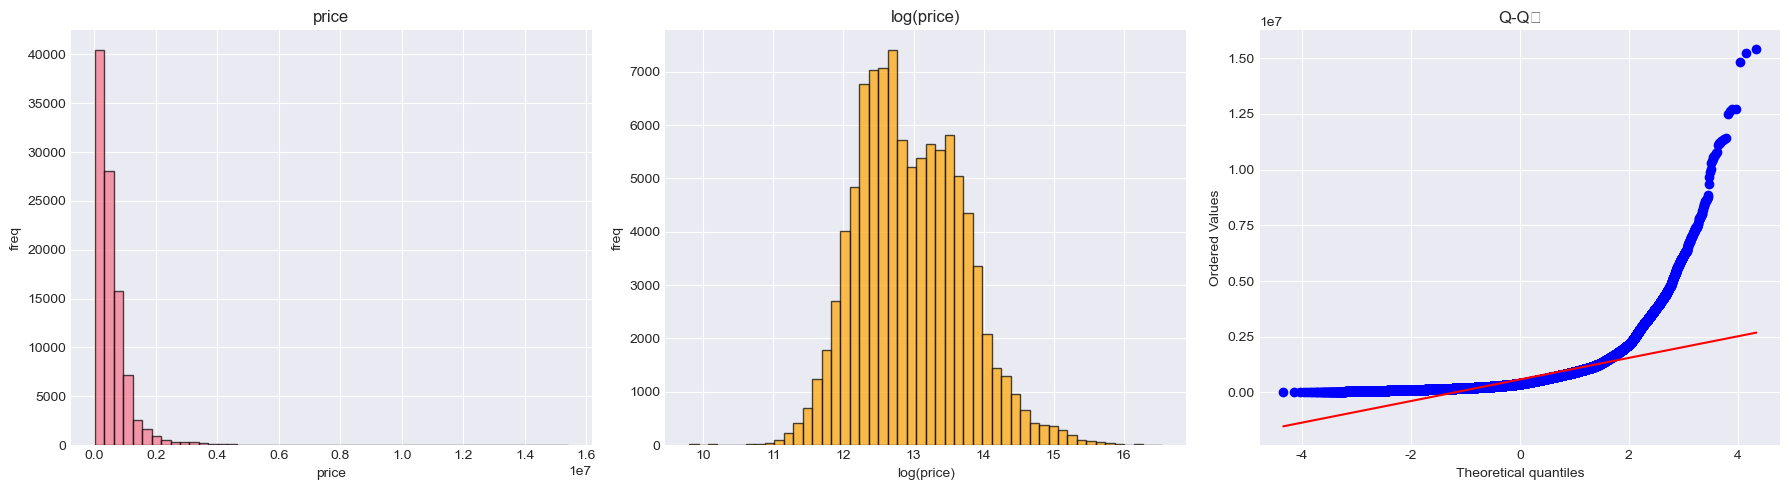

In [4]:
# ==================== 2. EDAÔºàÊé¢Á¥¢ÊÄßÊï∞ÊçÆÂàÜÊûêÔºâ====================  
print("\n" + "=" * 80)  
print("Ê≠•È™§ 2: Êé¢Á¥¢ÊÄßÊï∞ÊçÆÂàÜÊûê (EDA)")  
print("=" * 80)  

# 2.1 Âü∫Êú¨‰ø°ÊÅØ  
print("\n--- 2.1 Êï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØ ---")  
print(df.info())  

# 2.2 ÁªüËÆ°ÊèèËø∞  
print("\n--- 2.2 Êï∞ÂÄºÁâπÂæÅÁªüËÆ°ÊèèËø∞ ---")  
print(df.describe())  

# 2.3 Áº∫Â§±ÂÄºÂàÜÊûê  
print("\n--- 2.3 Áº∫Â§±ÂÄºÂàÜÊûê ---")  
missing_data = pd.DataFrame({  
    'ÁâπÂæÅ': df.columns,  
    'Áº∫Â§±Êï∞Èáè': df.isnull().sum(),  
    'Áº∫Â§±ÊØî‰æã': df.isnull().sum() / len(df) * 100  
})  
missing_data = missing_data[missing_data['Áº∫Â§±Êï∞Èáè'] > 0].sort_values('Áº∫Â§±ÊØî‰æã', ascending=False)  
print(missing_data)  

# 2.4 ÁõÆÊ†áÂèòÈáèÂàÜÊûê  
print("\n--- 2.4 ÁõÆÊ†áÂèòÈáè(Price)ÂàÜÊûê ---")  
print(f"‰ª∑Ê†ºÁªüËÆ°:\n{df['Price'].describe()}")  
print(f"\n‰ª∑Ê†ºÂÅèÂ∫¶: {df['Price'].skew():.2f}")  
print(f"‰ª∑Ê†ºÂ≥∞Â∫¶: {df['Price'].kurtosis():.2f}")  

# ÂèØËßÜÂåñ‰ª∑Ê†ºÂàÜÂ∏É  
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

# ÂéüÂßã‰ª∑Ê†ºÂàÜÂ∏É  
axes[0].hist(df['Price'], bins=50, edgecolor='black', alpha=0.7)  
axes[0].set_xlabel('price')  
axes[0].set_ylabel('freq')  
axes[0].set_title('price')  

# ÂØπÊï∞‰ª∑Ê†ºÂàÜÂ∏É  
axes[1].hist(np.log1p(df['Price']), bins=50, edgecolor='black', alpha=0.7, color='orange')  
axes[1].set_xlabel('log(price)')  
axes[1].set_ylabel('freq')  
axes[1].set_title('log(price)')  

# Q-QÂõæ  
stats.probplot(df['Price'], dist="norm", plot=axes[2])  
axes[2].set_title('Q-QÂõæ')  

plt.tight_layout()    
plt.show()  

## ÂàõÂª∫Áº∫Â§±ÂÄºÂàó

In [30]:
print("=" * 80)
print("‰∏∫Áº∫Â§±ÂÄºÂàõÂª∫0/1ÊåáÁ§∫ÂèòÈáè")
print("=" * 80)

# Ëé∑ÂèñÊâÄÊúâÊúâÁº∫Â§±ÂÄºÁöÑÂàó
missing_columns = df.columns[df.isnull().any()].tolist()

print(f"\nÂèëÁé∞ {len(missing_columns)} ‰∏™ÁâπÂæÅÂ≠òÂú®Áº∫Â§±ÂÄº")
print(f"Â∞Ü‰∏∫Ëøô‰∫õÁâπÂæÅÂàõÂª∫Áº∫Â§±ÊåáÁ§∫ÂèòÈáè...\n")

# ‰∏∫ÊØè‰∏™ÊúâÁº∫Â§±ÁöÑÂàóÂàõÂª∫Áº∫Â§±ÊåáÁ§∫ÂèòÈáè
missing_indicator_features = []

for col in missing_columns:
    # ÂàõÂª∫Áº∫Â§±ÊåáÁ§∫ÂèòÈáè
    indicator_col_name = f'{col}_is_missing'
    df[indicator_col_name] = df[col].isnull().astype(int)
    missing_indicator_features.append(indicator_col_name)
    
    # ÁªüËÆ°Áº∫Â§±ÊÉÖÂÜµ
    missing_count = df[indicator_col_name].sum()
    missing_pct = (missing_count / len(df)) * 100
    
    print(f"‚úì {col:20s} -> {indicator_col_name:30s} | Áº∫Â§±: {missing_count:6d} ({missing_pct:6.2f}%)")

print(f"\n{'='*80}")
print(f"ÊàêÂäüÂàõÂª∫ {len(missing_indicator_features)} ‰∏™Áº∫Â§±ÊåáÁ§∫ÂèòÈáè")
print(f"{'='*80}")

# È™åËØÅÂàõÂª∫ÁöÑÊåáÁ§∫ÂèòÈáè
print("\n--- È™åËØÅÁº∫Â§±ÊåáÁ§∫ÂèòÈáè ---")
print(f"ÂéüÂßãÊï∞ÊçÆÂΩ¢Áä∂: {df.shape}")
print(f"Êñ∞Â¢ûÁâπÂæÅÊï∞Èáè: {len(missing_indicator_features)}")

# ÊòæÁ§∫ÈÉ®ÂàÜÁº∫Â§±ÊåáÁ§∫ÂèòÈáèÁöÑÁªüËÆ°‰ø°ÊÅØ
print("\nÁº∫Â§±ÊåáÁ§∫ÂèòÈáèÁªüËÆ°ÔºàÂâç10‰∏™Ôºâ:")
missing_indicator_stats = pd.DataFrame({
    'ÁâπÂæÅ': missing_indicator_features[:10],
    'Áº∫Â§±Êï∞Èáè(1ÁöÑ‰∏™Êï∞)': [df[col].sum() for col in missing_indicator_features[:10]],
    'ÈùûÁº∫Â§±Êï∞Èáè(0ÁöÑ‰∏™Êï∞)': [len(df) - df[col].sum() for col in missing_indicator_features[:10]],
    'Áº∫Â§±ÊØî‰æã': [df[col].mean() * 100 for col in missing_indicator_features[:10]]
})
print(missing_indicator_stats.to_string(index=False))

‰∏∫Áº∫Â§±ÂÄºÂàõÂª∫0/1ÊåáÁ§∫ÂèòÈáè

ÂèëÁé∞ 37 ‰∏™ÁâπÂæÅÂ≠òÂú®Áº∫Â§±ÂÄº
Â∞Ü‰∏∫Ëøô‰∫õÁâπÂæÅÂàõÂª∫Áº∫Â§±ÊåáÁ§∫ÂèòÈáè...

‚úì Êà∑Âûã                   -> Êà∑Âûã_is_missing                  | Áº∫Â§±:      1 (  0.00%)
‚úì Ë£Ö‰øÆ                   -> Ë£Ö‰øÆ_is_missing                  | Áº∫Â§±:  73489 ( 74.31%)
‚úì Ê•ºÂ±Ç                   -> Ê•ºÂ±Ç_is_missing                  | Áº∫Â§±:      5 (  0.01%)
‚úì ÊúùÂêë                   -> ÊúùÂêë_is_missing                  | Áº∫Â§±:      5 (  0.01%)
‚úì ‰ªòÊ¨æÊñπÂºè                 -> ‰ªòÊ¨æÊñπÂºè_is_missing                | Áº∫Â§±:  18423 ( 18.63%)
‚úì ÁîµÊ¢Ø                   -> ÁîµÊ¢Ø_is_missing                  | Áº∫Â§±:      4 (  0.00%)
‚úì ËΩ¶‰Ωç                   -> ËΩ¶‰Ωç_is_missing                  | Áº∫Â§±:  74135 ( 74.96%)
‚úì Áî®Ê∞¥                   -> Áî®Ê∞¥_is_missing                  | Áº∫Â§±:  17740 ( 17.94%)
‚úì Áî®Áîµ                   -> Áî®Áîµ_is_missing                  | Áº∫Â§±:  17324 ( 17.52%)
‚úì ÁáÉÊ∞î                   

In [31]:
df_clean=df.copy()

## ÁâπÂæÅÊèêÂèñ

In [32]:
# ==================== ÊàøÂ±ãÊà∑ÂûãÁâπÂæÅÊèêÂèñ ====================

import re

def extract_room_info_optimized(room_str):
    """
    ÊèêÂèñÊàøÂ±ãÊà∑Âûã‰∏≠ÁöÑÊàøÈó¥Êï∞Èáè
    Â§ÑÁêÜÊ†ºÂºèÔºö
    1. "XÂÆ§XÂéÖXÂé®XÂç´" - Ê†áÂáÜÊ†ºÂºè
    2. "XÊàøÈó¥XÂç´" - ÁÆÄÂåñÊ†ºÂºè
    3. Á©∫ÂÄº/Áº∫Â§±ÂÄº
    """
    if pd.isna(room_str) or room_str == '':
        return {
            'ÂçßÂÆ§Êï∞Èáè': np.nan,
            'ÂÆ¢ÂéÖÊï∞Èáè': np.nan,
            'Âé®ÊàøÊï∞Èáè': np.nan,
            'Âç´ÁîüÈó¥Êï∞Èáè': np.nan
        }
    
    room_str = str(room_str).strip()
    
    # ÂàùÂßãÂåñÁªìÊûú
    result = {
        'ÂçßÂÆ§Êï∞Èáè': np.nan,
        'ÂÆ¢ÂéÖÊï∞Èáè': np.nan,
        'Âé®ÊàøÊï∞Èáè': np.nan,
        'Âç´ÁîüÈó¥Êï∞Èáè': np.nan
    }
    
    # ÊèêÂèñÂçßÂÆ§Êï∞Èáè (ÂÆ§)
    bedroom_match = re.search(r'(\d+)ÂÆ§', room_str)
    if bedroom_match:
        result['ÂçßÂÆ§Êï∞Èáè'] = int(bedroom_match.group(1))
    
    # Â¶ÇÊûúÊ≤°Êúâ"ÂÆ§"ÔºåÂ∞ùËØï"ÊàøÈó¥"
    if pd.isna(result['ÂçßÂÆ§Êï∞Èáè']):
        room_match = re.search(r'(\d+)ÊàøÈó¥', room_str)
        if room_match:
            result['ÂçßÂÆ§Êï∞Èáè'] = int(room_match.group(1))
    
    # ÊèêÂèñÂÆ¢ÂéÖÊï∞Èáè (ÂéÖ)
    living_match = re.search(r'(\d+)ÂéÖ', room_str)
    if living_match:
        result['ÂÆ¢ÂéÖÊï∞Èáè'] = int(living_match.group(1))
    else:
        # Â¶ÇÊûúÊ≤°ÊúâÊòéÁ°ÆÊ†áÊ≥®ÂÆ¢ÂéÖÔºåÈªòËÆ§‰∏∫0ÔºàÂ¶Ç"XÊàøÈó¥XÂç´"Ê†ºÂºèÔºâ
        if 'ÊàøÈó¥' in room_str:
            result['ÂÆ¢ÂéÖÊï∞Èáè'] = 0
    
    # ÊèêÂèñÂé®ÊàøÊï∞Èáè (Âé®)
    kitchen_match = re.search(r'(\d+)Âé®', room_str)
    if kitchen_match:
        result['Âé®ÊàøÊï∞Èáè'] = int(kitchen_match.group(1))
    else:
        # Â¶ÇÊûúÊ≤°ÊúâÊòéÁ°ÆÊ†áÊ≥®Âé®ÊàøÔºåÈªòËÆ§‰∏∫0ÔºàÂ¶Ç"XÊàøÈó¥XÂç´"Ê†ºÂºèÔºâ
        if 'ÊàøÈó¥' in room_str:
            result['Âé®ÊàøÊï∞Èáè'] = 0
    
    # ÊèêÂèñÂç´ÁîüÈó¥Êï∞Èáè (Âç´)
    bathroom_match = re.search(r'(\d+)Âç´', room_str)
    if bathroom_match:
        result['Âç´ÁîüÈó¥Êï∞Èáè'] = int(bathroom_match.group(1))
    else:
        result['Âç´ÁîüÈó¥Êï∞Èáè']=0
    
    return result

# ==================== Â∫îÁî®Âà∞Êï∞ÊçÆÈõÜ ====================

print("=" * 80)
print("ÊèêÂèñÊàøÂ±ãÊà∑ÂûãÁâπÂæÅ")
print("=" * 80)

# Â∫îÁî®ÊèêÂèñÂáΩÊï∞
room_features = df_clean['Êà∑Âûã'].apply(extract_room_info_optimized)

# Â∞ÜÂ≠óÂÖ∏ËΩ¨Êç¢‰∏∫DataFrame
room_features_df = pd.DataFrame(room_features.tolist())

# Ê∑ªÂä†Âà∞ÂéüÊï∞ÊçÆÈõÜ
df_clean['ÂçßÂÆ§Êï∞Èáè'] = room_features_df['ÂçßÂÆ§Êï∞Èáè']
df_clean['ÂÆ¢ÂéÖÊï∞Èáè'] = room_features_df['ÂÆ¢ÂéÖÊï∞Èáè']
df_clean['Âé®ÊàøÊï∞Èáè'] = room_features_df['Âé®ÊàøÊï∞Èáè']
df_clean['Âç´ÁîüÈó¥Êï∞Èáè'] = room_features_df['Âç´ÁîüÈó¥Êï∞Èáè']

# ==================== È™åËØÅÊèêÂèñÁªìÊûú ====================

print("\n--- ÊèêÂèñÁªìÊûúÈ™åËØÅ ---")
print("\nÂéüÂßãÊï∞ÊçÆ vs ÊèêÂèñÁªìÊûúÔºàÂâç20Ë°åÔºâÔºö")
validation_df = pd.DataFrame({
    'Êà∑Âûã': df_clean['Êà∑Âûã'].head(20),
    'ÂçßÂÆ§': df_clean['ÂçßÂÆ§Êï∞Èáè'].head(20),
    'ÂÆ¢ÂéÖ': df_clean['ÂÆ¢ÂéÖÊï∞Èáè'].head(20),
    'Âé®Êàø': df_clean['Âé®ÊàøÊï∞Èáè'].head(20),
    'Âç´ÁîüÈó¥': df_clean['Âç´ÁîüÈó¥Êï∞Èáè'].head(20)
})
print(validation_df.to_string(index=False))



# 1. ÂçßÂÆ§Âç´ÁîüÈó¥ÊØî‰æã
df_clean['ÂçßÂç´ÊØî'] = df_clean['ÂçßÂÆ§Êï∞Èáè'] / (df_clean['Âç´ÁîüÈó¥Êï∞Èáè'] + 1)

# 2. ÊàøÂûãÂÆåÊï¥ÊÄßÔºàÊòØÂê¶ÊâÄÊúâ‰ø°ÊÅØÈÉΩÈΩêÂÖ®Ôºâ
df_clean['ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥'] = (
    df_clean['ÂçßÂÆ§Êï∞Èáè'].notna() & 
    df_clean['ÂÆ¢ÂéÖÊï∞Èáè'].notna() & 
    df_clean['Âé®ÊàøÊï∞Èáè'].notna() & 
    df_clean['Âç´ÁîüÈó¥Êï∞Èáè'].notna()
).astype(int)

print(f"ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥ÊØî‰æã: {df_clean['ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥'].mean():.2%}")


new_room_features = [
    'ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè',
    'ÂçßÂç´ÊØî', 'ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥'
]

print(f"\nÊñ∞Â¢ûÊàøÈó¥Áõ∏ÂÖ≥ÁâπÂæÅ: {new_room_features}")

print("\n" + "=" * 80)
print("ÊàøÂ±ãÊà∑ÂûãÁâπÂæÅÊèêÂèñÂÆåÊàêÔºÅ")
print("=" * 80)

ÊèêÂèñÊàøÂ±ãÊà∑ÂûãÁâπÂæÅ

--- ÊèêÂèñÁªìÊûúÈ™åËØÅ ---

ÂéüÂßãÊï∞ÊçÆ vs ÊèêÂèñÁªìÊûúÔºàÂâç20Ë°åÔºâÔºö
    Êà∑Âûã  ÂçßÂÆ§  ÂÆ¢ÂéÖ  Âé®Êàø  Âç´ÁîüÈó¥
1ÂÆ§1ÂéÖ1Âç´ 1.0 1.0 NaN  1.0
1ÂÆ§1ÂéÖ1Âç´ 1.0 1.0 NaN  1.0
1ÂÆ§1ÂéÖ1Âç´ 1.0 1.0 NaN  1.0
3ÂÆ§1ÂéÖ2Âç´ 3.0 1.0 NaN  2.0
1ÂÆ§1ÂéÖ1Âç´ 1.0 1.0 NaN  1.0
1ÂÆ§1ÂéÖ1Âç´ 1.0 1.0 NaN  1.0
1ÂÆ§1ÂéÖ1Âç´ 1.0 1.0 NaN  1.0
1ÂÆ§1ÂéÖ1Âç´ 1.0 1.0 NaN  1.0
1ÂÆ§1ÂéÖ1Âç´ 1.0 1.0 NaN  1.0
  3ÂÆ§2ÂéÖ 3.0 2.0 NaN  0.0
1ÂÆ§1ÂéÖ1Âç´ 1.0 1.0 NaN  1.0
  4ÂÆ§2ÂéÖ 4.0 2.0 NaN  0.0
  2ÂÆ§1ÂéÖ 2.0 1.0 NaN  0.0
1ÂÆ§1ÂéÖ1Âç´ 1.0 1.0 NaN  1.0
  4ÂÆ§1ÂéÖ 4.0 1.0 NaN  0.0
1ÂÆ§0ÂéÖ1Âç´ 1.0 0.0 NaN  1.0
1ÂÆ§1ÂéÖ1Âç´ 1.0 1.0 NaN  1.0
2ÂÆ§1ÂéÖ1Âç´ 2.0 1.0 NaN  1.0
2ÂÆ§1ÂéÖ1Âç´ 2.0 1.0 NaN  1.0
1ÂÆ§1ÂéÖ1Âç´ 1.0 1.0 NaN  1.0
ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥ÊØî‰æã: 1.28%

Êñ∞Â¢ûÊàøÈó¥Áõ∏ÂÖ≥ÁâπÂæÅ: ['ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè', 'ÂçßÂç´ÊØî', 'ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥']

ÊàøÂ±ãÊà∑ÂûãÁâπÂæÅÊèêÂèñÂÆåÊàêÔºÅ


In [115]:
# ==================== Ê•ºÂ±Ç‰ø°ÊÅØËß£Êûê ====================
import pandas as pd
import numpy as np
import re

print("=" * 80)
print("Ê•ºÂ±Ç‰ø°ÊÅØËß£Êûê")
print("=" * 80)

def parse_floor_info(floor_str):
    """
    Ëß£ÊûêÊ•ºÂ±Ç‰ø°ÊÅØÔºåÊèêÂèñÊâÄÂú®Ê•ºÂ±ÇÂíåÊÄªÊ•ºÂ±Ç
    
    ÂèÇÊï∞:
        floor_str: Ê•ºÂ±ÇÂ≠óÁ¨¶‰∏≤
        
    ËøîÂõû:
        (ÂΩìÂâçÊ•ºÂ±Ç, ÊÄªÊ•ºÂ±Ç) ÂÖÉÁªÑ
    """
    if pd.isna(floor_str):
        return np.nan, np.nan
    
    floor_str = str(floor_str).strip()
    
    # 1. Â§ÑÁêÜÂú∞‰∏ãÂÆ§ÊÉÖÂÜµ
    if 'Âú∞‰∏ã' in floor_str:
        # ÊèêÂèñÊÄªÊ•ºÂ±ÇÔºàÂ¶ÇÊûúÊúâÔºâ
        total_match = re.search(r'/(\d+)Â±Ç', floor_str)
        total_floor = int(total_match.group(1)) if total_match else np.nan
        
        # ÂΩìÂâçÊ•ºÂ±ÇÁªü‰∏ÄËµãÂÄº‰∏∫-1
        return -1, total_floor
    
    # 2. ÊèêÂèñÊÄªÊ•ºÂ±ÇÊï∞
    total_match = re.search(r'/(\d+)Â±Ç', floor_str)
    if total_match:
        total_floor = int(total_match.group(1))
    
    # 3. Á°ÆÂÆöÂΩìÂâçÊ•ºÂ±Ç
    # 3.1 Â¶ÇÊûúÊúâÂÖ∑‰ΩìÊï∞Â≠óÔºàÊ†ºÂºèÔºöÊï∞Â≠ó/ÊÄªÂ±ÇÊï∞Ôºâ
    current_match = re.search(r'^(\d+)/', floor_str)
    if current_match:
        current_floor = int(current_match.group(1))
        return current_floor, total_floor
    
    # 3.2 Â¶ÇÊûúÊòØ‰Ωé/‰∏≠/È´òÊ•ºÂ±ÇÊèèËø∞
    if '‰ΩéÊ•ºÂ±Ç' in floor_str:
        if not pd.isna(total_floor):
            current_floor = total_floor * 0.2
        else:
            current_floor = np.nan
    elif '‰∏≠Ê•ºÂ±Ç' in floor_str:
        if not pd.isna(total_floor):
            current_floor = total_floor * 0.5
        else:
            current_floor = np.nan
    elif 'È´òÊ•ºÂ±Ç' in floor_str:
        if not pd.isna(total_floor):
            current_floor = total_floor * 0.8
        else:
            current_floor = np.nan
    else:
        current_floor = np.nan
    
    return current_floor, total_floor


# Â∫îÁî®Ëß£ÊûêÂáΩÊï∞
print("\nÊ≠£Âú®Ëß£ÊûêÊ•ºÂ±Ç‰ø°ÊÅØ...")

# Â∫îÁî®ÂáΩÊï∞Âπ∂ÂàõÂª∫Êñ∞Âàó
floor_info = df_clean['Ê•ºÂ±Ç'].apply(parse_floor_info)
df_clean['ÊâÄÂú®Ê•ºÂ±Ç'] = floor_info.apply(lambda x: x[0])
df_clean['ÊÄªÊ•ºÂ±Ç'] = floor_info.apply(lambda x: x[1])

print("‚úì Ê•ºÂ±Ç‰ø°ÊÅØËß£ÊûêÂÆåÊàê")

# ==================== È™åËØÅÂíåÁªüËÆ° ====================
print("\n" + "=" * 80)
print("Ëß£ÊûêÁªìÊûúÈ™åËØÅ")
print("=" * 80)

# 1. Âü∫Êú¨ÁªüËÆ°
print("\n--- ÊâÄÂú®Ê•ºÂ±ÇÁªüËÆ° ---")
print(df_clean['ÊâÄÂú®Ê•ºÂ±Ç'].describe())
print(f"\nÂú∞‰∏ãÊ•ºÂ±ÇÊï∞Èáè: {(df_clean['ÊâÄÂú®Ê•ºÂ±Ç'] == -1).sum()} ({(df_clean['ÊâÄÂú®Ê•ºÂ±Ç'] == -1).sum()/len(df_clean)*100:.2f}%)")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_clean['ÊâÄÂú®Ê•ºÂ±Ç'].isna().sum()} ({df_clean['ÊâÄÂú®Ê•ºÂ±Ç'].isna().sum()/len(df_clean)*100:.2f}%)")

print("\n--- ÊÄªÊ•ºÂ±ÇÁªüËÆ° ---")
print(df_clean['ÊÄªÊ•ºÂ±Ç'].describe())
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_clean['ÊÄªÊ•ºÂ±Ç'].isna().sum()} ({df_clean['ÊÄªÊ•ºÂ±Ç'].isna().sum()/len(df_clean)*100:.2f}%)")

# 2. Êü•ÁúãËß£ÊûêÁ§∫‰æã
print("\n" + "=" * 80)
print("Ëß£ÊûêÁ§∫‰æãÂ±ïÁ§∫")
print("=" * 80)

print("\n--- Á§∫‰æã1: Ê†áÂáÜÊ†ºÂºèÔºà‰Ωé/‰∏≠/È´òÊ•ºÂ±ÇÔºâ ---")
sample_standard = df_clean[df_clean['Ê•ºÂ±Ç'].str.contains('‰ΩéÊ•ºÂ±Ç|‰∏≠Ê•ºÂ±Ç|È´òÊ•ºÂ±Ç', na=False)][['Ê•ºÂ±Ç', 'ÊâÄÂú®Ê•ºÂ±Ç', 'ÊÄªÊ•ºÂ±Ç']].head(15)
print(sample_standard.to_string(index=False))

print("\n--- Á§∫‰æã2: Êï∞Â≠óÊ†ºÂºè ---")
sample_numeric = df_clean[df_clean['Ê•ºÂ±Ç'].str.match(r'^\d+/', na=False)][['Ê•ºÂ±Ç', 'ÊâÄÂú®Ê•ºÂ±Ç', 'ÊÄªÊ•ºÂ±Ç']].head(10)
if len(sample_numeric) > 0:
    print(sample_numeric.to_string(index=False))
else:
    print("Êú™ÊâæÂà∞Êï∞Â≠óÊ†ºÂºèÁöÑÊ•ºÂ±ÇÊï∞ÊçÆ")

print("\n--- Á§∫‰æã3: Âú∞‰∏ãÊ•ºÂ±Ç ---")
sample_underground = df_clean[df_clean['Ê•ºÂ±Ç'].str.contains('Âú∞‰∏ã', na=False)][['Ê•ºÂ±Ç', 'ÊâÄÂú®Ê•ºÂ±Ç', 'ÊÄªÊ•ºÂ±Ç']].head(10)
if len(sample_underground) > 0:
    print(sample_underground.to_string(index=False))
else:
    print("Êú™ÊâæÂà∞Âú∞‰∏ãÊ•ºÂ±ÇÊï∞ÊçÆ")



# 3. ÂàõÂª∫Ê•ºÂ±ÇÊØî‰æãÁâπÂæÅ
print("\n" + "=" * 80)
print("ÂàõÂª∫Ë°çÁîüÁâπÂæÅ")
print("=" * 80)

# Ê•ºÂ±ÇÊØî‰æãÔºàÊéíÈô§Âú∞‰∏ãÂÆ§Ôºâ
df_clean['Ê•ºÂ±ÇÊØî‰æã'] = np.where(
    (df_clean['ÊâÄÂú®Ê•ºÂ±Ç'] > 0) & (df_clean['ÊÄªÊ•ºÂ±Ç'] > 0),
    df_clean['ÊâÄÂú®Ê•ºÂ±Ç'] / df_clean['ÊÄªÊ•ºÂ±Ç'],
    np.nan
)

print("\n--- Ê•ºÂ±ÇÊØî‰æãÁªüËÆ° ---")
print(df_clean['Ê•ºÂ±ÇÊØî‰æã'].describe())




# 4. ÁîüÊàêÊ•ºÂ±ÇÁâπÂæÅÊ±áÊÄªÊä•Âëä
print("\n" + "=" * 80)
print("Ê•ºÂ±ÇÁâπÂæÅÊ±áÊÄª")
print("=" * 80)

floor_summary = {
    'ÂéüÂßãÊ•ºÂ±ÇÁâπÂæÅ': ['Ê•ºÂ±Ç'],
    'Êñ∞Â¢ûÊï∞ÂÄºÁâπÂæÅ': ['ÊâÄÂú®Ê•ºÂ±Ç', 'ÊÄªÊ•ºÂ±Ç', 'Ê•ºÂ±ÇÊØî‰æã'],
}

print("\nÂàõÂª∫ÁöÑÊ•ºÂ±ÇÁõ∏ÂÖ≥ÁâπÂæÅ:")
for key, values in floor_summary.items():
    print(f"  {key}: {', '.join(values)}")


Ê•ºÂ±Ç‰ø°ÊÅØËß£Êûê

Ê≠£Âú®Ëß£ÊûêÊ•ºÂ±Ç‰ø°ÊÅØ...
‚úì Ê•ºÂ±Ç‰ø°ÊÅØËß£ÊûêÂÆåÊàê

Ëß£ÊûêÁªìÊûúÈ™åËØÅ

--- ÊâÄÂú®Ê•ºÂ±ÇÁªüËÆ° ---
count    98894.000000
mean        10.117064
std          7.775240
min         -1.000000
25%          4.000000
50%          7.000000
75%         15.000000
max         48.000000
Name: ÊâÄÂú®Ê•ºÂ±Ç, dtype: float64

Âú∞‰∏ãÊ•ºÂ±ÇÊï∞Èáè: 259 (0.26%)
Áº∫Â§±ÂÄºÊï∞Èáè: 5 (0.01%)

--- ÊÄªÊ•ºÂ±ÇÁªüËÆ° ---
count    98887.000000
mean        19.812412
std         11.110064
min          0.000000
25%          9.000000
50%         18.000000
75%         29.000000
max         75.000000
Name: ÊÄªÊ•ºÂ±Ç, dtype: float64
Áº∫Â§±ÂÄºÊï∞Èáè: 12 (0.01%)

Ëß£ÊûêÁ§∫‰æãÂ±ïÁ§∫

--- Á§∫‰æã1: Ê†áÂáÜÊ†ºÂºèÔºà‰Ωé/‰∏≠/È´òÊ•ºÂ±ÇÔºâ ---
     Ê•ºÂ±Ç  ÊâÄÂú®Ê•ºÂ±Ç  ÊÄªÊ•ºÂ±Ç
‰∏≠Ê•ºÂ±Ç/25Â±Ç  12.5 25.0
È´òÊ•ºÂ±Ç/11Â±Ç   8.8 11.0
 ‰∏≠Ê•ºÂ±Ç/5Â±Ç   2.5  5.0
‰∏≠Ê•ºÂ±Ç/12Â±Ç   6.0 12.0
‰ΩéÊ•ºÂ±Ç/28Â±Ç   5.6 28.0
‰∏≠Ê•ºÂ±Ç/56Â±Ç  28.0 56.0
‰ΩéÊ•ºÂ±Ç/22Â±Ç   4.4 22.0
 È´òÊ•ºÂ±Ç/7Â±Ç   5.6  7.0
 ‰∏≠Ê•ºÂ±Ç/6Â±Ç 

In [34]:
print("=" * 80)  
print("Ëß£ÊûêÈù¢ÁßØÁâπÂæÅ")  
print("=" * 80)  

# Êü•ÁúãÂéüÂßãÈù¢ÁßØÊï∞ÊçÆ  
print("\n--- ÂéüÂßãÈù¢ÁßØÊï∞ÊçÆÊ†∑Êú¨ ---")  
print(f"Èù¢ÁßØÂàóÊï∞ÊçÆÁ±ªÂûã: {df_clean['Èù¢ÁßØ'].dtype}")  
print(f"Èù¢ÁßØÂàóÊÄªÊï∞: {len(df_clean['Èù¢ÁßØ'])}")  
print(f"Èù¢ÁßØÂàóÁº∫Â§±Êï∞: {df_clean['Èù¢ÁßØ'].isnull().sum()}")  
print(f"\nÂâç20Ë°åÈù¢ÁßØÊï∞ÊçÆ:")  
print(df_clean['Èù¢ÁßØ'].head(20))  

# ÂÆö‰πâÈù¢ÁßØÊèêÂèñÂáΩÊï∞  
def extract_area(area_str):  
    """  
    ‰ªéÈù¢ÁßØÂ≠óÁ¨¶‰∏≤‰∏≠ÊèêÂèñÊï∞ÂÄº  
    ‰æãÂ¶Ç: '100.00„é°' -> 100.00  
         '136„é°' -> 136.0  
         None -> NaN  
         '' -> NaN  
    """  
    # Â§ÑÁêÜÁ©∫ÂÄº  
    if pd.isna(area_str):  
        return np.nan  
    
    # ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤  
    area_str = str(area_str).strip()  
    
    # Â§ÑÁêÜÁ©∫Â≠óÁ¨¶‰∏≤  
    if area_str == '' or area_str.lower() == 'nan':  
        return np.nan  
    
    # ‰ΩøÁî®Ê≠£ÂàôË°®ËææÂºèÊèêÂèñÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞Ôºâ  
    # ÂåπÈÖçÊ®°ÂºèÔºöÂèØËÉΩÊúâË¥üÂè∑ÔºåÁÑ∂ÂêéÊòØÊï∞Â≠óÔºåÂèØËÉΩÊúâÂ∞èÊï∞ÁÇπÂíåÂ∞èÊï∞ÈÉ®ÂàÜ  
    match = re.search(r'(-?\d+\.?\d*)', area_str)  
    
    if match:  
        try:  
            area_value = float(match.group(1))  
            # È™åËØÅÂêàÁêÜÊÄßÔºàÈù¢ÁßØÂ∫îËØ•‰∏∫Ê≠£Êï∞‰∏îÂú®ÂêàÁêÜËåÉÂõ¥ÂÜÖÔºâ  
            if area_value > 0 and area_value < 10000:  # ÂÅáËÆæÊúÄÂ§ß10000Âπ≥Á±≥  
                return area_value  
            else:  
                return np.nan  
        except ValueError:  
            return np.nan  
    else:  
        return np.nan  

# Â∫îÁî®ÊèêÂèñÂáΩÊï∞  
print("\n--- ÊèêÂèñÈù¢ÁßØÊï∞ÂÄº ---")  
df_clean['Èù¢ÁßØ_Êï∞ÂÄº'] = df_clean['Èù¢ÁßØ'].apply(extract_area)  

# ÁªüËÆ°ÊèêÂèñÁªìÊûú  
print(f"\nÊèêÂèñÂÆåÊàêÔºÅ")  
print(f"ÂéüÂßãÈù¢ÁßØÂàóÁº∫Â§±Êï∞: {df_clean['Èù¢ÁßØ'].isnull().sum()}")  
print(f"ÊèêÂèñÂêéÁº∫Â§±Êï∞: {df_clean['Èù¢ÁßØ_Êï∞ÂÄº'].isnull().sum()}")  
print(f"ÊàêÂäüÊèêÂèñÊï∞ÂÄº: {df_clean['Èù¢ÁßØ_Êï∞ÂÄº'].notna().sum()} Êù°")  
print(f"ÊèêÂèñÂ§±Ë¥•/Êñ∞Â¢ûÁº∫Â§±: {df_clean['Èù¢ÁßØ_Êï∞ÂÄº'].isnull().sum() - df_clean['Èù¢ÁßØ'].isnull().sum()} Êù°")  

# ÊòæÁ§∫ÊèêÂèñÁªìÊûúÊ†∑Êú¨  
print("\n--- ÊèêÂèñÁªìÊûúÂØπÊØîÔºàÂâç20Ë°åÔºâ---")  
comparison_df = pd.DataFrame({  
    'ÂéüÂßãÈù¢ÁßØ': df_clean['Èù¢ÁßØ'].head(20),  
    'ÊèêÂèñÊï∞ÂÄº': df_clean['Èù¢ÁßØ_Êï∞ÂÄº'].head(20)  
})  
print(comparison_df.to_string())  

# ÁªüËÆ°ÊèèËø∞  
print("\n--- Èù¢ÁßØÊï∞ÂÄºÁªüËÆ°ÊèèËø∞ ---")  
print(df_clean['Èù¢ÁßØ_Êï∞ÂÄº'].describe())  


Ëß£ÊûêÈù¢ÁßØÁâπÂæÅ

--- ÂéüÂßãÈù¢ÁßØÊï∞ÊçÆÊ†∑Êú¨ ---
Èù¢ÁßØÂàóÊï∞ÊçÆÁ±ªÂûã: object
Èù¢ÁßØÂàóÊÄªÊï∞: 98899
Èù¢ÁßØÂàóÁº∫Â§±Êï∞: 0

Ââç20Ë°åÈù¢ÁßØÊï∞ÊçÆ:
0      36.42„é°
1      41.00„é°
2      37.36„é°
3      55.42„é°
4      49.30„é°
5      42.00„é°
6      42.00„é°
7      42.12„é°
8      42.12„é°
9     176.00„é°
10     41.30„é°
11    265.54„é°
12     55.50„é°
13     27.09„é°
14    236.73„é°
15     57.36„é°
16     59.97„é°
17     65.00„é°
18     57.50„é°
19     27.00„é°
Name: Èù¢ÁßØ, dtype: object

--- ÊèêÂèñÈù¢ÁßØÊï∞ÂÄº ---

ÊèêÂèñÂÆåÊàêÔºÅ
ÂéüÂßãÈù¢ÁßØÂàóÁº∫Â§±Êï∞: 0
ÊèêÂèñÂêéÁº∫Â§±Êï∞: 0
ÊàêÂäüÊèêÂèñÊï∞ÂÄº: 98899 Êù°
ÊèêÂèñÂ§±Ë¥•/Êñ∞Â¢ûÁº∫Â§±: 0 Êù°

--- ÊèêÂèñÁªìÊûúÂØπÊØîÔºàÂâç20Ë°åÔºâ---
       ÂéüÂßãÈù¢ÁßØ    ÊèêÂèñÊï∞ÂÄº
0    36.42„é°   36.42
1    41.00„é°   41.00
2    37.36„é°   37.36
3    55.42„é°   55.42
4    49.30„é°   49.30
5    42.00„é°   42.00
6    42.00„é°   42.00
7    42.12„é°   42.12
8    42.12„é°   42.12
9   176.00„é°  176.00
10   41.30„é°   41.30
11  265.54„é°  265.54
12

In [35]:
# ==================== Â§ÑÁêÜÊàøÂ±ãÊúùÂêëÔºàÂÖ´‰∏™ÊñπÂêëÔºâ====================
print("\n--- Â§ÑÁêÜÊúùÂêëÁâπÂæÅÔºàÂÖ´‰∏™ÊñπÂêëÔºâ---")

def extract_orientation_features(orientation_str):
    """
    ÊèêÂèñÊàøÂ±ãÊúùÂêëÁöÑÂÖ´‰∏™ÊñπÂêëÁâπÂæÅ
    ËøîÂõûÔºö‰∏ú„ÄÅÂçó„ÄÅË•ø„ÄÅÂåó„ÄÅ‰∏úÂçó„ÄÅ‰∏úÂåó„ÄÅË•øÂçó„ÄÅË•øÂåóÁöÑ0/1Ê†áËÆ∞
    Â¶ÇÊûúÂéüÂßãÊï∞ÊçÆ‰∏∫Á©∫ÔºåÂàôËøîÂõûnan
    """
    # Â¶ÇÊûúÊòØÁ©∫ÂÄºÔºåËøîÂõûÂÖ®nan
    if pd.isna(orientation_str):
        return {
            'Êúù‰∏ú': np.nan,
            'ÊúùÂçó': np.nan,
            'ÊúùË•ø': np.nan,
            'ÊúùÂåó': np.nan,
            'Êúù‰∏úÂçó': np.nan,
            'Êúù‰∏úÂåó': np.nan,
            'ÊúùË•øÂçó': np.nan,
            'ÊúùË•øÂåó': np.nan
        }
    
    orientation_str = str(orientation_str).strip()
    
    # Â¶ÇÊûúÂ≠óÁ¨¶‰∏≤‰∏∫Á©∫ÔºåËøîÂõûÂÖ®nan
    if orientation_str == '' or orientation_str == 'nan':
        return {
            'Êúù‰∏ú': np.nan,
            'ÊúùÂçó': np.nan,
            'ÊúùË•ø': np.nan,
            'ÊúùÂåó': np.nan,
            'Êúù‰∏úÂçó': np.nan,
            'Êúù‰∏úÂåó': np.nan,
            'ÊúùË•øÂçó': np.nan,
            'ÊúùË•øÂåó': np.nan
        }
    
    # ÂàùÂßãÂåñÂÖ´‰∏™ÊñπÂêë‰∏∫0
    result = {
        'Êúù‰∏ú': 0,
        'ÊúùÂçó': 0,
        'ÊúùË•ø': 0,
        'ÊúùÂåó': 0,
        'Êúù‰∏úÂçó': 0,
        'Êúù‰∏úÂåó': 0,
        'ÊúùË•øÂçó': 0,
        'ÊúùË•øÂåó': 0
    }
    
    # ÂÖàÊ£ÄÊü•Â§çÂêàÊñπÂêëÔºà‰∏§‰∏™Â≠óÁöÑÊñπÂêëÔºåÂ¶Ç"‰∏úÂçó"„ÄÅ"‰∏úÂåó"Á≠âÔºâ
    # Ê≥®ÊÑèÔºöË¶ÅÂÖàÊ£ÄÊü•Â§çÂêàÊñπÂêëÔºåÈÅøÂÖçË¢´Âçï‰∏™ÊñπÂêëÂåπÈÖçÂà∞
    if '‰∏úÂçó' in orientation_str:
        result['Êúù‰∏úÂçó'] = 1
    if '‰∏úÂåó' in orientation_str:
        result['Êúù‰∏úÂåó'] = 1
    if 'Ë•øÂçó' in orientation_str:
        result['ÊúùË•øÂçó'] = 1
    if 'Ë•øÂåó' in orientation_str:
        result['ÊúùË•øÂåó'] = 1
    
    # ÂÜçÊ£ÄÊü•Âçï‰∏™ÊñπÂêë
    # ‰ΩøÁî®ËæπÁïåÂåπÈÖçÔºåÈÅøÂÖç"‰∏úÂçó"‰∏≠ÁöÑ"‰∏ú"Ë¢´ÈáçÂ§çÂåπÈÖç
    # Ê£ÄÊü•ÊòØÂê¶ÊúâÁã¨Á´ãÁöÑ"‰∏ú"Ôºà‰∏çÊòØ"‰∏úÂçó"Êàñ"‰∏úÂåó"ÁöÑ‰∏ÄÈÉ®ÂàÜÔºâ
    if re.search(r'(?<!‰∏ú)‰∏ú(?![ÂçóÂåó])', orientation_str) or \
       (orientation_str.startswith('‰∏ú') and len(orientation_str) == 1):
        result['Êúù‰∏ú'] = 1
    
    if 'Âçó' in orientation_str and '‰∏úÂçó' not in orientation_str and 'Ë•øÂçó' not in orientation_str:
        # Ê£ÄÊü•ÊòØÂê¶ÊòØÁã¨Á´ãÁöÑ"Âçó"
        if re.search(r'(?<![‰∏úË•ø])Âçó', orientation_str):
            result['ÊúùÂçó'] = 1
    
    if re.search(r'(?<!Ë•ø)Ë•ø(?![ÂçóÂåó])', orientation_str) or \
       (orientation_str.startswith('Ë•ø') and len(orientation_str) == 1):
        result['ÊúùË•ø'] = 1
    
    if 'Âåó' in orientation_str and '‰∏úÂåó' not in orientation_str and 'Ë•øÂåó' not in orientation_str:
        if re.search(r'(?<![‰∏úË•ø])Âåó', orientation_str):
            result['ÊúùÂåó'] = 1
    
    return result

# Â∫îÁî®ÊèêÂèñÂáΩÊï∞
orientation_features = df_clean['ÊúùÂêë'].apply(extract_orientation_features)

# Â∞ÜÂ≠óÂÖ∏ÂàóË°®ËΩ¨Êç¢‰∏∫DataFrame
orientation_df = pd.DataFrame(orientation_features.tolist())

# Ê∑ªÂä†Âà∞ÂéüÊï∞ÊçÆÊ°Ü
for col in orientation_df.columns:
    df_clean[col] = orientation_df[col]

# ÁªüËÆ°ÂêÑÊñπÂêëÁöÑÂàÜÂ∏É
print("\nÂêÑÊúùÂêëÁöÑÂàÜÂ∏ÉÁªüËÆ°Ôºö")
for col in ['Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó']:
    valid_count = df_clean[col].notna().sum()
    has_orientation = (df_clean[col] == 1).sum()
    no_orientation = (df_clean[col] == 0).sum()
    nan_count = df_clean[col].isna().sum()
    
    print(f"\n{col}:")
    print(f"  ÊúâËØ•ÊúùÂêë: {has_orientation} ({has_orientation/valid_count*100:.2f}% of valid)")
    print(f"  Êó†ËØ•ÊúùÂêë: {no_orientation} ({no_orientation/valid_count*100:.2f}% of valid)")
    print(f"  Áº∫Â§±ÂÄº: {nan_count} ({nan_count/len(df_clean)*100:.2f}% of total)")

# ÂàõÂª∫ÊúùÂêëÊÄªÊï∞ÁâπÂæÅÔºàÂè™ÁªüËÆ°ÊúâÊïàÂÄºÔºâ
def count_orientations(row):
    """ÁªüËÆ°ÊàøÂ±ãÁöÑÊúùÂêëÊï∞Èáè"""
    orientations = ['Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó']
    
    # Â¶ÇÊûúÊâÄÊúâÊúùÂêëÈÉΩÊòØnanÔºåËøîÂõûnan
    if all(pd.isna(row[o]) for o in orientations):
        return np.nan
    
    # Âê¶ÂàôÁªüËÆ°1ÁöÑÊï∞Èáè
    return sum(row[o] == 1 for o in orientations)

df_clean['ÊúùÂêëÊÄªÊï∞'] = df_clean.apply(count_orientations, axis=1)

print(f"\nÊúùÂêëÊÄªÊï∞ÂàÜÂ∏É:")
print(df_clean['ÊúùÂêëÊÄªÊï∞'].value_counts(dropna=False).sort_index())

# ÂàõÂª∫‰∏Ä‰∫õË°çÁîüÁâπÂæÅ
# ÊòØÂê¶‰∏∫Âçï‰∏ÄÊúùÂêë
df_clean['ÊòØÂê¶Âçï‰∏ÄÊúùÂêë'] = (df_clean['ÊúùÂêëÊÄªÊï∞'] == 1).astype(float)
df_clean.loc[df_clean['ÊúùÂêëÊÄªÊï∞'].isna(), 'ÊòØÂê¶Âçï‰∏ÄÊúùÂêë'] = np.nan

# ÊòØÂê¶‰∏∫ÂçóÂåóÈÄöÈÄè
df_clean['ÊòØÂê¶ÂçóÂåóÈÄöÈÄè'] = ((df_clean['ÊúùÂçó'] == 1) & (df_clean['ÊúùÂåó'] == 1)).astype(float)
df_clean.loc[(df_clean['ÊúùÂçó'].isna()) | (df_clean['ÊúùÂåó'].isna()), 'ÊòØÂê¶ÂçóÂåóÈÄöÈÄè'] = np.nan

# ÊòØÂê¶‰∏∫‰∏úË•øÈÄöÈÄè
df_clean['ÊòØÂê¶‰∏úË•øÈÄöÈÄè'] = ((df_clean['Êúù‰∏ú'] == 1) & (df_clean['ÊúùË•ø'] == 1)).astype(float)
df_clean.loc[(df_clean['Êúù‰∏ú'].isna()) | (df_clean['ÊúùË•ø'].isna()), 'ÊòØÂê¶‰∏úË•øÈÄöÈÄè'] = np.nan

# ÊòØÂê¶ÊúâÂçóÂêëÔºàÂçóÂêëÊàøÂ±ãÈÄöÂ∏∏Êõ¥ÂèóÊ¨¢ËøéÔºâ
df_clean['ÊòØÂê¶ÊúâÂçóÂêë'] = ((df_clean['ÊúùÂçó'] == 1) | (df_clean['Êúù‰∏úÂçó'] == 1) | (df_clean['ÊúùË•øÂçó'] == 1)).astype(float)
df_clean.loc[(df_clean['ÊúùÂçó'].isna()) & (df_clean['Êúù‰∏úÂçó'].isna()) & (df_clean['ÊúùË•øÂçó'].isna()), 'ÊòØÂê¶ÊúâÂçóÂêë'] = np.nan

print(f"\nÂçóÂåóÈÄöÈÄèÊàøÂ±ãÊï∞Èáè: {(df_clean['ÊòØÂê¶ÂçóÂåóÈÄöÈÄè'] == 1).sum()}")
print(f"‰∏úË•øÈÄöÈÄèÊàøÂ±ãÊï∞Èáè: {(df_clean['ÊòØÂê¶‰∏úË•øÈÄöÈÄè'] == 1).sum()}")
print(f"ÊúâÂçóÂêëÊàøÂ±ãÊï∞Èáè: {(df_clean['ÊòØÂê¶ÊúâÂçóÂêë'] == 1).sum()}")

# ÊòæÁ§∫‰∏Ä‰∫õÊ†∑‰æã
print("\nÂâç20Ë°åÊúùÂêëÁâπÂæÅÁ§∫‰æãÔºö")
orientation_cols = ['ÊúùÂêë', 'Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó', 'ÊúùÂêëÊÄªÊï∞']
print(df_clean[orientation_cols].head(20).to_string())


--- Â§ÑÁêÜÊúùÂêëÁâπÂæÅÔºàÂÖ´‰∏™ÊñπÂêëÔºâ---

ÂêÑÊúùÂêëÁöÑÂàÜÂ∏ÉÁªüËÆ°Ôºö

Êúù‰∏ú:
  ÊúâËØ•ÊúùÂêë: 8593 (8.69% of valid)
  Êó†ËØ•ÊúùÂêë: 90301 (91.31% of valid)
  Áº∫Â§±ÂÄº: 5 (0.01% of total)

ÊúùÂçó:
  ÊúâËØ•ÊúùÂêë: 62319 (63.02% of valid)
  Êó†ËØ•ÊúùÂêë: 36575 (36.98% of valid)
  Áº∫Â§±ÂÄº: 5 (0.01% of total)

ÊúùË•ø:
  ÊúâËØ•ÊúùÂêë: 4889 (4.94% of valid)
  Êó†ËØ•ÊúùÂêë: 94005 (95.06% of valid)
  Áº∫Â§±ÂÄº: 5 (0.01% of total)

ÊúùÂåó:
  ÊúâËØ•ÊúùÂêë: 24250 (24.52% of valid)
  Êó†ËØ•ÊúùÂêë: 74644 (75.48% of valid)
  Áº∫Â§±ÂÄº: 5 (0.01% of total)

Êúù‰∏úÂçó:
  ÊúâËØ•ÊúùÂêë: 11926 (12.06% of valid)
  Êó†ËØ•ÊúùÂêë: 86968 (87.94% of valid)
  Áº∫Â§±ÂÄº: 5 (0.01% of total)

Êúù‰∏úÂåó:
  ÊúâËØ•ÊúùÂêë: 1696 (1.71% of valid)
  Êó†ËØ•ÊúùÂêë: 97198 (98.29% of valid)
  Áº∫Â§±ÂÄº: 5 (0.01% of total)

ÊúùË•øÂçó:
  ÊúâËØ•ÊúùÂêë: 4232 (4.28% of valid)
  Êó†ËØ•ÊúùÂêë: 94662 (95.72% of valid)
  Áº∫Â§±ÂÄº: 5 (0.01% of total)

ÊúùË•øÂåó:
  ÊúâËØ•ÊúùÂêë: 1675 (1.69% of valid)
  Êó†ËØ•ÊúùÂêë: 97219 (98.31

In [36]:
print("=" * 80)
print("‰ªòÊ¨æÊñπÂºè One-Hot ÁºñÁ†Å")
print("=" * 80)

# ÂÆö‰πâ‰ªòÊ¨æÊñπÂºèÁöÑÂèØËÉΩÂèñÂÄº
payment_methods = ['ÂçäÂπ¥‰ªò‰ª∑', 'Â≠£‰ªò‰ª∑', 'Âπ¥‰ªò‰ª∑', 'ÂèåÊúà‰ªò‰ª∑', 'Êúà‰ªò‰ª∑']

print(f"\nÊåáÂÆöÁöÑ‰ªòÊ¨æÊñπÂºèÁ±ªÂà´: {payment_methods}")

# Ê£ÄÊü•ÂéüÂßãÊï∞ÊçÆ
if '‰ªòÊ¨æÊñπÂºè' in df_clean.columns:
    print(f"\n--- ÂéüÂßãÊï∞ÊçÆÂàÜÊûê ---")
    print(f"‰ªòÊ¨æÊñπÂºèÂàóÁöÑÂîØ‰∏ÄÂÄºÊï∞Èáè: {df_clean['‰ªòÊ¨æÊñπÂºè'].nunique()}")
    print(f"‰ªòÊ¨æÊñπÂºèÂàóÁöÑÁº∫Â§±Êï∞Èáè: {df_clean['‰ªòÊ¨æÊñπÂºè'].isnull().sum()}")
    print(f"‰ªòÊ¨æÊñπÂºèÂàóÁöÑÁº∫Â§±ÊØî‰æã: {df_clean['‰ªòÊ¨æÊñπÂºè'].isnull().sum() / len(df_clean) * 100:.2f}%")
    
    # ÊòæÁ§∫ÊâÄÊúâÂîØ‰∏ÄÂÄºÂèäÂÖ∂Êï∞Èáè
    print(f"\n‰ªòÊ¨æÊñπÂºèÂèñÂÄºÂàÜÂ∏É:")
    value_counts = df_clean['‰ªòÊ¨æÊñπÂºè'].value_counts(dropna=False)
    print(value_counts)
    
    # Ê£ÄÊü•ÊòØÂê¶Êúâ‰∏çÂú®ÊåáÂÆöÂàóË°®‰∏≠ÁöÑÂÄº
    non_null_values = df_clean['‰ªòÊ¨æÊñπÂºè'].dropna().unique()
    unexpected_values = [v for v in non_null_values if v not in payment_methods]
    
    if unexpected_values:
        print(f"\n‚ö†Ô∏è ÂèëÁé∞ {len(unexpected_values)} ‰∏™Êú™Âú®ÊåáÂÆöÂàóË°®‰∏≠ÁöÑÂÄº:")
        for val in unexpected_values[:10]:  # Âè™ÊòæÁ§∫Ââç10‰∏™
            count = (df_clean['‰ªòÊ¨æÊñπÂºè'] == val).sum()
            print(f"  - '{val}': {count} Êù°")
    else:
        print(f"\n‚úì ÊâÄÊúâÈùûÁ©∫ÂÄºÈÉΩÂú®ÊåáÂÆöÂàóË°®‰∏≠")
    
    # ÂàõÂª∫ One-Hot ÁºñÁ†Å
    print(f"\n--- ÂàõÂª∫ One-Hot ÁºñÁ†Å ---")
    
    for method in payment_methods:
        col_name = f'‰ªòÊ¨æÊñπÂºè_{method}'
        
        # Âè™ÊúâÂΩì‰ªòÊ¨æÊñπÂºèÂÆåÂÖ®ÂåπÈÖçÊó∂ÊâçÊ†áËÆ∞‰∏∫1ÔºåÁº∫Â§±ÂÄºÂíåÂÖ∂‰ªñÂÄºÈÉΩ‰∏∫0
        df_clean[col_name] = (df_clean['‰ªòÊ¨æÊñπÂºè'] == method).astype(int)
        
        count = df_clean[col_name].sum()
        percentage = (count / len(df_clean)) * 100
        
        print(f"‚úì ÂàõÂª∫ {col_name:20s} | Êï∞Èáè: {count:6d} ({percentage:5.2f}%)")
    
    # È™åËØÅÁªìÊûú
    print(f"\n--- È™åËØÅ One-Hot ÁºñÁ†Å ---")
    
    # Ê£ÄÊü•ÊØèË°åÊúÄÂ§öÂè™Êúâ‰∏Ä‰∏™1
    onehot_cols = [f'‰ªòÊ¨æÊñπÂºè_{method}' for method in payment_methods]
    row_sums = df_clean[onehot_cols].sum(axis=1)
    
    print(f"ÊØèË°åOne-HotÂàóÁöÑÂíåÁöÑÂàÜÂ∏É:")
    print(row_sums.value_counts().sort_index())
    
    # ËÆ°ÁÆóÊúâÂ§öÂ∞ëË°åÊòØÂÖ®0ÔºàÁº∫Â§±ÂÄºÊàñÂÖ∂‰ªñÂÄºÔºâ
    all_zero_count = (row_sums == 0).sum()
    one_count = (row_sums == 1).sum()
    multi_count = (row_sums > 1).sum()
    
    print(f"\nÁªüËÆ°:")
    print(f"  - ÂÖ®0ÁöÑË°åÊï∞ÔºàÁº∫Â§±ÊàñÂÖ∂‰ªñÂÄºÔºâ: {all_zero_count:6d} ({all_zero_count/len(df_clean)*100:5.2f}%)")
    print(f"  - ÊÅ∞Â•Ω1‰∏™1ÁöÑË°åÊï∞: {one_count:6d} ({one_count/len(df_clean)*100:5.2f}%)")
    print(f"  - Â§ö‰∫é1‰∏™1ÁöÑË°åÊï∞: {multi_count:6d} ({multi_count/len(df_clean)*100:5.2f}%)")
    
    # ÊòæÁ§∫Á§∫‰æã
    print(f"\n--- Á§∫‰æãÂ±ïÁ§∫ ---")
    print(f"ÂéüÂßã‰ªòÊ¨æÊñπÂºèÂàóÂíåÂØπÂ∫îÁöÑOne-HotÁºñÁ†ÅÔºàÂâç20Ë°åÔºâ:\n")
    
    display_cols = ['‰ªòÊ¨æÊñπÂºè'] + onehot_cols
    sample_df = df_clean[display_cols].head(20).copy()
    
    # Ê∑ªÂä†Ë°åÊÄªÂíåÂàó‰ª•‰æøÊü•Áúã
    sample_df['One-HotÊÄªÂíå'] = df_clean[onehot_cols].head(20).sum(axis=1)
    
    print(sample_df.to_string(index=True))
    
    # ËØ¶ÁªÜÂàÜÊûêÔºöÂ±ïÁ§∫ÊØèÁßç‰ªòÊ¨æÊñπÂºèÁöÑÁ§∫‰æã
    print(f"\n--- ÊØèÁßç‰ªòÊ¨æÊñπÂºèÁöÑÁ§∫‰æã ---")
    for method in payment_methods:
        col_name = f'‰ªòÊ¨æÊñπÂºè_{method}'
        matching_rows = df_clean[df_clean[col_name] == 1]
        
        if len(matching_rows) > 0:
            print(f"\n{method} ÁöÑÁ§∫‰æã (ÂÖ± {len(matching_rows)} Êù°):")
            print(matching_rows[['‰ªòÊ¨æÊñπÂºè'] + onehot_cols].head(3).to_string(index=False))
    
    # Â±ïÁ§∫Áº∫Â§±ÂÄºÂíåÂÖ∂‰ªñÂÄºÁöÑÁ§∫‰æã
    all_zero_rows = df_clean[row_sums == 0]
    if len(all_zero_rows) > 0:
        print(f"\nÁº∫Â§±ÂÄºÊàñÂÖ∂‰ªñÂÄºÁöÑÁ§∫‰æã (ÂÖ± {len(all_zero_rows)} Êù°ÔºåÊòæÁ§∫Ââç5Êù°):")
        print(all_zero_rows[['‰ªòÊ¨æÊñπÂºè'] + onehot_cols].head(5).to_string(index=False))
    
    # ÁîüÊàêÊ±áÊÄªÊä•Âëä
    print(f"\n" + "=" * 80)
    print("One-Hot ÁºñÁ†ÅÊ±áÊÄªÊä•Âëä")
    print("=" * 80)
    
    summary_data = []
    for method in payment_methods:
        col_name = f'‰ªòÊ¨æÊñπÂºè_{method}'
        count = df_clean[col_name].sum()
        percentage = (count / len(df_clean)) * 100
        summary_data.append({
            '‰ªòÊ¨æÊñπÂºè': method,
            'One-HotÂàóÂêç': col_name,
            'Êï∞Èáè': count,
            'Âç†ÊØî(%)': f'{percentage:.2f}',
            'ÊòØÂê¶ÂàõÂª∫': '‚úì'
        })
    
    summary_df = pd.DataFrame(summary_data)
    print(f"\n{summary_df.to_string(index=False)}")

‰ªòÊ¨æÊñπÂºè One-Hot ÁºñÁ†Å

ÊåáÂÆöÁöÑ‰ªòÊ¨æÊñπÂºèÁ±ªÂà´: ['ÂçäÂπ¥‰ªò‰ª∑', 'Â≠£‰ªò‰ª∑', 'Âπ¥‰ªò‰ª∑', 'ÂèåÊúà‰ªò‰ª∑', 'Êúà‰ªò‰ª∑']

--- ÂéüÂßãÊï∞ÊçÆÂàÜÊûê ---
‰ªòÊ¨æÊñπÂºèÂàóÁöÑÂîØ‰∏ÄÂÄºÊï∞Èáè: 7
‰ªòÊ¨æÊñπÂºèÂàóÁöÑÁº∫Â§±Êï∞Èáè: 18423
‰ªòÊ¨æÊñπÂºèÂàóÁöÑÁº∫Â§±ÊØî‰æã: 18.63%

‰ªòÊ¨æÊñπÂºèÂèñÂÄºÂàÜÂ∏É:
‰ªòÊ¨æÊñπÂºè
Â≠£‰ªò‰ª∑                               54530
Êúà‰ªò‰ª∑                               20955
NaN                               18423
ÂçäÂπ¥‰ªò‰ª∑                               4194
Âπ¥‰ªò‰ª∑                                 748
ÂèåÊúà‰ªò‰ª∑                                 44
https://img.ljcdn.com/usercent        3
https://image1.ljcdn.com/rent-        2
Name: count, dtype: int64

‚ö†Ô∏è ÂèëÁé∞ 2 ‰∏™Êú™Âú®ÊåáÂÆöÂàóË°®‰∏≠ÁöÑÂÄº:
  - 'https://image1.ljcdn.com/rent-': 2 Êù°
  - 'https://img.ljcdn.com/usercent': 3 Êù°

--- ÂàõÂª∫ One-Hot ÁºñÁ†Å ---
‚úì ÂàõÂª∫ ‰ªòÊ¨æÊñπÂºè_ÂçäÂπ¥‰ªò‰ª∑            | Êï∞Èáè:   4194 ( 4.24%)
‚úì ÂàõÂª∫ ‰ªòÊ¨æÊñπÂºè_Â≠£‰ªò‰ª∑             | Êï∞Èáè:  54530 (55

In [37]:
# ==================== ÁßüËµÅÊñπÂºè One-Hot ÁºñÁ†Å ====================  
import pandas as pd  
import numpy as np  

print("=" * 80)  
print("ÁßüËµÅÊñπÂºè One-Hot ÁºñÁ†ÅÂ§ÑÁêÜ")  
print("=" * 80)  

# 1. È¶ñÂÖàÊü•ÁúãÁßüËµÅÊñπÂºèÁöÑÂàÜÂ∏ÉÊÉÖÂÜµ  
print("\n--- 1. ÁßüËµÅÊñπÂºèÊï∞ÊçÆÊé¢Á¥¢ ---")  

if 'ÁßüËµÅÊñπÂºè' in df_clean.columns:  
    print(f"\nÁßüËµÅÊñπÂºèÁöÑÁ±ªÂà´ÂàÜÂ∏É:")  
    rental_type_counts = df_clean['ÁßüËµÅÊñπÂºè'].value_counts(dropna=False)  
    print(rental_type_counts)  
    
    print(f"\nÁßüËµÅÊñπÂºèÁöÑÁ±ªÂà´Âç†ÊØî:")  
    rental_type_pct = df_clean['ÁßüËµÅÊñπÂºè'].value_counts(normalize=True, dropna=False) * 100  
    for category, pct in rental_type_pct.items():  
        print(f"  {category}: {pct:.2f}%")  
    
    # Ê£ÄÊü•Áº∫Â§±ÂÄº  
    missing_count = df_clean['ÁßüËµÅÊñπÂºè'].isnull().sum()  
    missing_pct = (missing_count / len(df_clean)) * 100  
    print(f"\nÁº∫Â§±ÂÄºÊÉÖÂÜµ:")  
    print(f"  Áº∫Â§±Êï∞Èáè: {missing_count}")  
    print(f"  Áº∫Â§±ÊØî‰æã: {missing_pct:.2f}%")  
    
    # ÂîØ‰∏ÄÂÄºÊï∞Èáè  
    unique_values = df_clean['ÁßüËµÅÊñπÂºè'].nunique()  
    print(f"\nÂîØ‰∏ÄÁ±ªÂà´Êï∞Èáè: {unique_values}")  
    
    # 2. Â§ÑÁêÜÁº∫Â§±ÂÄºÔºàÂ¶ÇÊûúÂ≠òÂú®Ôºâ  
    print("\n--- 2. Â§ÑÁêÜÁº∫Â§±ÂÄº ---")  
    if missing_count > 0:  
        print(f"ÂèëÁé∞ {missing_count} ‰∏™Áº∫Â§±ÂÄº")  
        # ÈÄâÈ°π1: Â°´ÂÖÖ‰∏∫ "Êú™Áü•" ÊàñÊúÄÂ∏∏ËßÅÁöÑÂÄº  
        mode_value = df_clean['ÁßüËµÅÊñπÂºè'].mode()[0] if len(df_clean['ÁßüËµÅÊñπÂºè'].mode()) > 0 else 'Êï¥Áßü'  
        print(f"Â∞ÜÁº∫Â§±ÂÄºÂ°´ÂÖÖ‰∏∫: '{mode_value}'")  
        df_clean['ÁßüËµÅÊñπÂºè'] = df_clean['ÁßüËµÅÊñπÂºè'].fillna(mode_value)  
        print("‚úì Áº∫Â§±ÂÄºÂ°´ÂÖÖÂÆåÊàê")  
    else:  
        print("‚úì Êó†Áº∫Â§±ÂÄºÔºåÊó†ÈúÄÂ§ÑÁêÜ")  
    
    # 3. One-Hot ÁºñÁ†Å  
    print("\n--- 3. One-Hot ÁºñÁ†Å ---")  
    
    # ÊñπÊ≥ï1: ‰ΩøÁî® pd.get_dummies() Âπ∂ËÆæÁΩÆ drop_first=True  
    print("\n‰ΩøÁî® pd.get_dummies() ËøõË°å One-Hot ÁºñÁ†Å...")  
    
    # ‰øùÂ≠òÂéüÂßãÂàóÂêçÁî®‰∫éÂêéÁª≠Âà†Èô§  
    original_column = 'ÁßüËµÅÊñπÂºè'  
    
    # ÂàõÂª∫ One-Hot ÁºñÁ†ÅÔºådrop_first=True ‰ºöËá™Âä®Âà†Èô§Á¨¨‰∏Ä‰∏™Á±ªÂà´  
    rental_dummies = pd.get_dummies(df_clean['ÁßüËµÅÊñπÂºè'],   
                                    prefix='ÁßüËµÅÊñπÂºè',   
                                    drop_first=True,  
                                    dtype=int)  
    
    print(f"‚úì One-Hot ÁºñÁ†ÅÂÆåÊàê")  
    print(f"  ÂéüÂßãÁâπÂæÅ: 1 Âàó ('{original_column}')")  
    print(f"  ÁºñÁ†ÅÂêéÁâπÂæÅ: {rental_dummies.shape[1]} Âàó")  
    print(f"  Êñ∞Â¢ûÁâπÂæÅÂàóÂêç: {rental_dummies.columns.tolist()}")  
    
    # ÊòæÁ§∫Ë¢´Âà†Èô§ÁöÑÂü∫ÂáÜÁ±ªÂà´Ôºàreference categoryÔºâ  
    all_categories = df_clean['ÁßüËµÅÊñπÂºè'].unique()  
    dropped_category = [cat for cat in all_categories   
                       if f'ÁßüËµÅÊñπÂºè_{cat}' not in rental_dummies.columns]  
    print(f"\n  Âü∫ÂáÜÁ±ªÂà´(Â∑≤Âà†Èô§): {dropped_category}")  
    print(f"  ‰øùÁïôÁ±ªÂà´: {[col.replace('ÁßüËµÅÊñπÂºè_', '') for col in rental_dummies.columns.tolist()]}")  
    
    # 4. Â∞Ü One-Hot ÁºñÁ†ÅÁöÑÂàóÊ∑ªÂä†Âà∞ÂéüÊï∞ÊçÆÈõÜ  
    print("\n--- 4. Ê∑ªÂä†Âà∞ÂéüÊï∞ÊçÆÈõÜ ---")  
    
    # Ëé∑ÂèñÂéüÂßãÂàóÁöÑ‰ΩçÁΩÆ  
    original_position = df_clean.columns.get_loc(original_column)  
    
    # Â∞ÜÊñ∞ÂàóÊèíÂÖ•Âà∞ÂéüÂßãÂàóÁöÑ‰ΩçÁΩÆ  
    for i, col in enumerate(rental_dummies.columns):  
        df_clean.insert(original_position + i + 1, col, rental_dummies[col])  
    
    print(f"‚úì Â∑≤Â∞Ü {len(rental_dummies.columns)} ‰∏™ One-Hot ÁºñÁ†ÅÂàóÊ∑ªÂä†Âà∞Êï∞ÊçÆÈõÜ")  
    
    # 5. Âà†Èô§ÂéüÂßãÁöÑÁßüËµÅÊñπÂºèÂàó  
    print("\n--- 5. Âà†Èô§ÂéüÂßãÂàó ---")  
    df_before = df_clean.shape[1]  
    df_clean = df_clean.drop(columns=[original_column])  
    df_after = df_clean.shape[1]  
    
    print(f"‚úì Â∑≤Âà†Èô§ÂéüÂßãÂàó '{original_column}'")  
    print(f"  Âà†Èô§ÂâçÂàóÊï∞: {df_before}")  
    print(f"  Âà†Èô§ÂêéÂàóÊï∞: {df_after}")  
    print(f"  ÂáÄÂ¢ûÂä†ÂàóÊï∞: {df_after - df_before + 1}")  
    
    # 6. È™åËØÅÁºñÁ†ÅÁªìÊûú  
    print("\n--- 6. È™åËØÅÁºñÁ†ÅÁªìÊûú ---")  
    
    print("\nÊñ∞Â¢û One-Hot ÁºñÁ†ÅÂàóÁöÑÁªüËÆ°‰ø°ÊÅØ:")  
    onehot_stats = pd.DataFrame({  
        'ÂàóÂêç': rental_dummies.columns,  
        '‰∏∫1ÁöÑÊï∞Èáè': [rental_dummies[col].sum() for col in rental_dummies.columns],  
        '‰∏∫1ÁöÑÊØî‰æã(%)': [rental_dummies[col].mean() * 100 for col in rental_dummies.columns],  
        'Êï∞ÊçÆÁ±ªÂûã': [rental_dummies[col].dtype for col in rental_dummies.columns]  
    })  
    print(onehot_stats.to_string(index=False))  
    
    # ÊòæÁ§∫Ââç10Ë°åÁ§∫‰æã  
    print("\nÂâç10Ë°åÊï∞ÊçÆÁ§∫‰æãÔºà‰ªÖÊòæÁ§∫ One-Hot ÁºñÁ†ÅÂàóÔºâ:")  
    print(df_clean[rental_dummies.columns].head(10).to_string()) 

ÁßüËµÅÊñπÂºè One-Hot ÁºñÁ†ÅÂ§ÑÁêÜ

--- 1. ÁßüËµÅÊñπÂºèÊï∞ÊçÆÊé¢Á¥¢ ---

ÁßüËµÅÊñπÂºèÁöÑÁ±ªÂà´ÂàÜÂ∏É:
ÁßüËµÅÊñπÂºè
Êï¥Áßü    93009
ÂêàÁßü     5890
Name: count, dtype: int64

ÁßüËµÅÊñπÂºèÁöÑÁ±ªÂà´Âç†ÊØî:
  Êï¥Áßü: 94.04%
  ÂêàÁßü: 5.96%

Áº∫Â§±ÂÄºÊÉÖÂÜµ:
  Áº∫Â§±Êï∞Èáè: 0
  Áº∫Â§±ÊØî‰æã: 0.00%

ÂîØ‰∏ÄÁ±ªÂà´Êï∞Èáè: 2

--- 2. Â§ÑÁêÜÁº∫Â§±ÂÄº ---
‚úì Êó†Áº∫Â§±ÂÄºÔºåÊó†ÈúÄÂ§ÑÁêÜ

--- 3. One-Hot ÁºñÁ†Å ---

‰ΩøÁî® pd.get_dummies() ËøõË°å One-Hot ÁºñÁ†Å...
‚úì One-Hot ÁºñÁ†ÅÂÆåÊàê
  ÂéüÂßãÁâπÂæÅ: 1 Âàó ('ÁßüËµÅÊñπÂºè')
  ÁºñÁ†ÅÂêéÁâπÂæÅ: 1 Âàó
  Êñ∞Â¢ûÁâπÂæÅÂàóÂêç: ['ÁßüËµÅÊñπÂºè_Êï¥Áßü']

  Âü∫ÂáÜÁ±ªÂà´(Â∑≤Âà†Èô§): ['ÂêàÁßü']
  ‰øùÁïôÁ±ªÂà´: ['Êï¥Áßü']

--- 4. Ê∑ªÂä†Âà∞ÂéüÊï∞ÊçÆÈõÜ ---
‚úì Â∑≤Â∞Ü 1 ‰∏™ One-Hot ÁºñÁ†ÅÂàóÊ∑ªÂä†Âà∞Êï∞ÊçÆÈõÜ

--- 5. Âà†Èô§ÂéüÂßãÂàó ---
‚úì Â∑≤Âà†Èô§ÂéüÂßãÂàó 'ÁßüËµÅÊñπÂºè'
  Âà†Èô§ÂâçÂàóÊï∞: 112
  Âà†Èô§ÂêéÂàóÊï∞: 111
  ÂáÄÂ¢ûÂä†ÂàóÊï∞: 0

--- 6. È™åËØÅÁºñÁ†ÅÁªìÊûú ---

Êñ∞Â¢û One-Hot ÁºñÁ†ÅÂàóÁöÑÁªüËÆ°‰ø°ÊÅØ:
     ÂàóÂêç  ‰∏∫1ÁöÑÊï∞Èáè  ‰∏∫1ÁöÑÊØî‰æã(%)  Êï∞ÊçÆÁ

In [38]:
# ==================== 3.6 Â§ÑÁêÜÈÖçÂ§áÁîµÊ¢ØÔºàÊîπËøõÁâàÔºâ====================
print("\n--- 3.6 Â§ÑÁêÜÈÖçÂ§áÁîµÊ¢Ø ---")

def extract_elevator(elevator_str):
    """
    ÊèêÂèñÁîµÊ¢Ø‰ø°ÊÅØÂπ∂ÁºñÁ†Å‰∏∫0/1
    - 'Êúâ' -> 1
    - 'Êó†' -> 0
    - NaN/Á©∫ÂÄº -> 0
    """
    if pd.isna(elevator_str):
        return 0
    
    elevator_str = str(elevator_str).strip()
    
    if elevator_str == 'Êúâ':
        return 1
    else:
        return 0

# Â∫îÁî®ÁîµÊ¢ØÁâπÂæÅÊèêÂèñ
df_clean['ÊúâÁîµÊ¢Ø'] = df_clean['ÁîµÊ¢Ø'].apply(extract_elevator)

# È™åËØÅÂ§ÑÁêÜÁªìÊûú
print(f"ÈÖçÂ§áÁîµÊ¢ØÂéüÂßãÂÄºÂàÜÂ∏É:\n{df_clean['ÁîµÊ¢Ø'].value_counts(dropna=False)}")
print(f"\nÊúâÁîµÊ¢ØÁºñÁ†ÅÂàÜÂ∏É:\n{df_clean['ÊúâÁîµÊ¢Ø'].value_counts()}")
print(f"\nÊúâÁîµÊ¢ØÊØî‰æã: {df_clean['ÊúâÁîµÊ¢Ø'].mean()*100:.2f}%")


--- 3.6 Â§ÑÁêÜÈÖçÂ§áÁîµÊ¢Ø ---
ÈÖçÂ§áÁîµÊ¢ØÂéüÂßãÂÄºÂàÜÂ∏É:
ÁîµÊ¢Ø
Êúâ      69234
Êó†      29661
NaN        4
Name: count, dtype: int64

ÊúâÁîµÊ¢ØÁºñÁ†ÅÂàÜÂ∏É:
ÊúâÁîµÊ¢Ø
1    69234
0    29665
Name: count, dtype: int64

ÊúâÁîµÊ¢ØÊØî‰æã: 70.00%


In [39]:
# ==================== ËΩ¶‰ΩçÁâπÂæÅ One-Hot ÁºñÁ†Å ====================
import pandas as pd
import numpy as np

print("=" * 80)
print("ËΩ¶‰ΩçÁâπÂæÅ One-Hot ÁºñÁ†Å")
print("=" * 80)

# 1. Êü•ÁúãËΩ¶‰ΩçÁâπÂæÅÁöÑÂü∫Êú¨‰ø°ÊÅØ
print("\n--- 1. ËΩ¶‰ΩçÁâπÂæÅÂéüÂßãÊï∞ÊçÆÂàÜÊûê ---")
print(f"Êï∞ÊçÆÁ±ªÂûã: {df_clean['ËΩ¶‰Ωç'].dtype}")
print(f"ÊÄªÊ†∑Êú¨Êï∞: {len(df_clean)}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_clean['ËΩ¶‰Ωç'].isnull().sum()} ({df_clean['ËΩ¶‰Ωç'].isnull().sum()/len(df_clean)*100:.2f}%)")
print(f"ÈùûÁº∫Â§±ÂÄºÊï∞Èáè: {df_clean['ËΩ¶‰Ωç'].notnull().sum()}")

print("\nËΩ¶‰ΩçÁâπÂæÅÂîØ‰∏ÄÂÄºÂèäÂÖ∂Êï∞Èáè:")
print(df_clean['ËΩ¶‰Ωç'].value_counts(dropna=False))

print("\nËΩ¶‰ΩçÁâπÂæÅÂâç20Ë°å:")
print(df_clean['ËΩ¶‰Ωç'].head(20))

# 2. ËøõË°å One-Hot ÁºñÁ†Å
print("\n--- 2. ÊâßË°å One-Hot ÁºñÁ†Å ---")

# ‰øùÂ≠òÂéüÂßãÁöÑÁº∫Â§±ÊÉÖÂÜµÔºàÂ∑≤ÁªèÊúâ‰∫Ü ËΩ¶‰Ωç_is_missingÔºâ
if 'ËΩ¶‰Ωç_is_missing' not in df_clean.columns:
    df_clean['ËΩ¶‰Ωç_is_missing'] = df_clean['ËΩ¶‰Ωç'].isnull().astype(int)
    print("‚úì Â∑≤ÂàõÂª∫Áº∫Â§±ÊåáÁ§∫ÂèòÈáè: ËΩ¶‰Ωç_is_missing")

# ÊñπÊ≥ï1Ôºö‰ΩøÁî® pd.get_dummiesÔºådrop_first=True
# ËøôÁßçÊñπÊ≥ï‰ºöËá™Âä®Â§ÑÁêÜÁº∫Â§±ÂÄºÔºàÁº∫Â§±ÂÄºÂú®ÊâÄÊúâÂìëÂèòÈáè‰∏≠ÈÉΩÊòØ0Ôºâ
parking_dummies = pd.get_dummies(df_clean['ËΩ¶‰Ωç'], prefix='ËΩ¶‰Ωç', drop_first=True, dummy_na=False, dtype=int)

print(f"\n‚úì One-Hot ÁºñÁ†ÅÂÆåÊàê")
print(f"  ÂéüÂßãÁâπÂæÅ: ËΩ¶‰Ωç")
print(f"  ÁîüÊàêÁöÑÂìëÂèòÈáèÂàó: {parking_dummies.columns.tolist()}")
print(f"  ÂìëÂèòÈáèÊï∞Èáè: {len(parking_dummies.columns)}")

# 3. Êü•ÁúãÁºñÁ†ÅÁªìÊûú
print("\n--- 3. ÁºñÁ†ÅÁªìÊûúÂ±ïÁ§∫ ---")

# ÊòæÁ§∫ÂìëÂèòÈáèÁöÑÁªüËÆ°‰ø°ÊÅØ
print("\nÂêÑÂìëÂèòÈáèÁöÑÁªüËÆ°:")
for col in parking_dummies.columns:
    count_1 = parking_dummies[col].sum()
    count_0 = len(parking_dummies) - count_1
    pct_1 = count_1 / len(parking_dummies) * 100
    print(f"  {col:30s}: 1ÁöÑÊï∞Èáè={count_1:6d} ({pct_1:5.2f}%), 0ÁöÑÊï∞Èáè={count_0:6d}")


ËΩ¶‰ΩçÁâπÂæÅ One-Hot ÁºñÁ†Å

--- 1. ËΩ¶‰ΩçÁâπÂæÅÂéüÂßãÊï∞ÊçÆÂàÜÊûê ---
Êï∞ÊçÆÁ±ªÂûã: object
ÊÄªÊ†∑Êú¨Êï∞: 98899
Áº∫Â§±ÂÄºÊï∞Èáè: 74135 (74.96%)
ÈùûÁº∫Â§±ÂÄºÊï∞Èáè: 24764

ËΩ¶‰ΩçÁâπÂæÅÂîØ‰∏ÄÂÄºÂèäÂÖ∂Êï∞Èáè:
ËΩ¶‰Ωç
NaN     74135
ÁßüÁî®ËΩ¶‰Ωç    20319
ÂÖçË¥π‰ΩøÁî®     4445
Name: count, dtype: int64

ËΩ¶‰ΩçÁâπÂæÅÂâç20Ë°å:
0      NaN
1      NaN
2     ÁßüÁî®ËΩ¶‰Ωç
3     ÁßüÁî®ËΩ¶‰Ωç
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11    ÂÖçË¥π‰ΩøÁî®
12    ÂÖçË¥π‰ΩøÁî®
13     NaN
14     NaN
15    ÁßüÁî®ËΩ¶‰Ωç
16    ÁßüÁî®ËΩ¶‰Ωç
17    ÁßüÁî®ËΩ¶‰Ωç
18     NaN
19    ÁßüÁî®ËΩ¶‰Ωç
Name: ËΩ¶‰Ωç, dtype: object

--- 2. ÊâßË°å One-Hot ÁºñÁ†Å ---

‚úì One-Hot ÁºñÁ†ÅÂÆåÊàê
  ÂéüÂßãÁâπÂæÅ: ËΩ¶‰Ωç
  ÁîüÊàêÁöÑÂìëÂèòÈáèÂàó: ['ËΩ¶‰Ωç_ÁßüÁî®ËΩ¶‰Ωç']
  ÂìëÂèòÈáèÊï∞Èáè: 1

--- 3. ÁºñÁ†ÅÁªìÊûúÂ±ïÁ§∫ ---

ÂêÑÂìëÂèòÈáèÁöÑÁªüËÆ°:
  ËΩ¶‰Ωç_ÁßüÁî®ËΩ¶‰Ωç                       : 1ÁöÑÊï∞Èáè= 20319 (20.55%), 0ÁöÑÊï∞Èáè= 78580


In [40]:
# ==================== One-Hot ÁºñÁ†Å ====================
import pandas as pd

# ÈúÄË¶ÅÁºñÁ†ÅÁöÑÂàó
columns_to_encode = ['Áî®Ê∞¥', 'Áî®Áîµ', 'ÁáÉÊ∞î', 'ÈááÊöñ']

print("ÂØπ‰ª•‰∏ãÂàóËøõË°å One-Hot ÁºñÁ†ÅÔºàdrop_first=TrueÔºâ:")
print(columns_to_encode)
print()

# ÊâßË°å One-Hot ÁºñÁ†Å
for col in columns_to_encode:
    if col in df_clean.columns:
        # Êü•ÁúãËØ•ÂàóÁöÑÂîØ‰∏ÄÂÄº
        unique_values = df_clean[col].value_counts(dropna=False)
        print(f"{col}: {len(unique_values)} ‰∏™Á±ªÂà´")
        print(f"  {unique_values.to_dict()}")
        
        # One-Hot ÁºñÁ†ÅÔºådrop_first=True ÈÅøÂÖçÂÖ±Á∫øÊÄßÔºåÁº∫Â§±ÂÄºÂ°´ÂÖÖ‰∏∫0
        dummies = pd.get_dummies(df_clean[col], prefix=col, drop_first=True, dummy_na=False)
        
        # Â∞ÜÁºñÁ†ÅÂêéÁöÑÂàóÊ∑ªÂä†Âà∞Êï∞ÊçÆÈõÜ
        df_clean = pd.concat([df_clean, dummies], axis=1)
        
        
        print(f"  ‚úì ÂàõÂª∫ {len(dummies.columns)} ‰∏™ÂìëÂèòÈáè: {list(dummies.columns)}")
        print()

print(f"ÁºñÁ†ÅÂÆåÊàêÔºÅÂΩìÂâçÊï∞ÊçÆÂΩ¢Áä∂: {df_clean.shape}")

# ÊòæÁ§∫Êñ∞Â¢ûÁöÑÊâÄÊúâÂìëÂèòÈáèÂàó
new_dummy_cols = [col for col in df_clean.columns if any(prefix in col for prefix in ['Áî®Ê∞¥_', 'Áî®Áîµ_', 'ÁáÉÊ∞î_', 'ÈááÊöñ_'])]
print(f"\nÊñ∞Â¢ûÂìëÂèòÈáèÂàó ({len(new_dummy_cols)} ‰∏™):")
print(new_dummy_cols)

# ÊòæÁ§∫ÂâçÂá†Ë°åÈ™åËØÅ
print(f"\nÂâç5Ë°åÊï∞ÊçÆÈ™åËØÅ:")
print(df_clean[new_dummy_cols].head())

ÂØπ‰ª•‰∏ãÂàóËøõË°å One-Hot ÁºñÁ†ÅÔºàdrop_first=TrueÔºâ:
['Áî®Ê∞¥', 'Áî®Áîµ', 'ÁáÉÊ∞î', 'ÈááÊöñ']

Áî®Ê∞¥: 3 ‰∏™Á±ªÂà´
  {'Ê∞ëÊ∞¥': 73293, nan: 17740, 'ÂïÜÊ∞¥': 7866}
  ‚úì ÂàõÂª∫ 1 ‰∏™ÂìëÂèòÈáè: ['Áî®Ê∞¥_Ê∞ëÊ∞¥']

Áî®Áîµ: 3 ‰∏™Á±ªÂà´
  {'Ê∞ëÁîµ': 73634, nan: 17324, 'ÂïÜÁîµ': 7941}
  ‚úì ÂàõÂª∫ 1 ‰∏™ÂìëÂèòÈáè: ['Áî®Áîµ_Ê∞ëÁîµ']

ÁáÉÊ∞î: 3 ‰∏™Á±ªÂà´
  {'Êúâ': 84996, 'Êó†': 9321, nan: 4582}
  ‚úì ÂàõÂª∫ 1 ‰∏™ÂìëÂèòÈáè: ['ÁáÉÊ∞î_Êúâ']

ÈááÊöñ: 3 ‰∏™Á±ªÂà´
  {nan: 64487, 'ÈõÜ‰∏≠‰æõÊöñ': 21501, 'Ëá™ÈááÊöñ': 12911}
  ‚úì ÂàõÂª∫ 1 ‰∏™ÂìëÂèòÈáè: ['ÈááÊöñ_ÈõÜ‰∏≠‰æõÊöñ']

ÁºñÁ†ÅÂÆåÊàêÔºÅÂΩìÂâçÊï∞ÊçÆÂΩ¢Áä∂: (98899, 116)

Êñ∞Â¢ûÂìëÂèòÈáèÂàó (8 ‰∏™):
['Áî®Ê∞¥_is_missing', 'Áî®Áîµ_is_missing', 'ÁáÉÊ∞î_is_missing', 'ÈááÊöñ_is_missing', 'Áî®Ê∞¥_Ê∞ëÊ∞¥', 'Áî®Áîµ_Ê∞ëÁîµ', 'ÁáÉÊ∞î_Êúâ', 'ÈááÊöñ_ÈõÜ‰∏≠‰æõÊöñ']

Ââç5Ë°åÊï∞ÊçÆÈ™åËØÅ:
   Áî®Ê∞¥_is_missing  Áî®Áîµ_is_missing  ÁáÉÊ∞î_is_missing  ÈááÊöñ_is_missing  Áî®Ê∞¥_Ê∞ëÊ∞¥  Áî®Áîµ_Ê∞ëÁîµ   ÁáÉÊ∞î_Êúâ  ÈááÊöñ_ÈõÜ‰∏≠‰æõÊöñ
0              0              0    

In [41]:
# ==================== ÈÖçÂ•óËÆæÊñΩ One-Hot ÁºñÁ†Å ====================
import pandas as pd
import numpy as np

print("=" * 60)
print("ÈÖçÂ•óËÆæÊñΩËß£Êûê‰∏éOne-HotÁºñÁ†Å")
print("=" * 60)

# 1. Ëß£ÊûêÊâÄÊúâÈÖçÂ•óËÆæÊñΩÈ°πÁõÆ
all_facilities = set()
for value in df_clean['ÈÖçÂ•óËÆæÊñΩ'].dropna():
    items = str(value).split('„ÄÅ')
    for item in items:
        item = item.strip()
        # Áªü‰∏ÄÂ§©ÁÑ∂Ê∞îÁöÑË°®Á§∫
        if 'Â§©ÁÑ∂' in item:
            item = 'Â§©ÁÑ∂Ê∞î'
        all_facilities.add(item)

print(f"\nÂèëÁé∞ {len(all_facilities)} ÁßçÈÖçÂ•óËÆæÊñΩ:")
print(sorted(all_facilities))

# 2. ÂàõÂª∫ One-Hot ÁºñÁ†Å
for facility in sorted(all_facilities):
    col_name = f'ËÆæÊñΩ_{facility}'
    
    # Ê£ÄÊü•ÊØèË°åÊòØÂê¶ÂåÖÂê´ËØ•ËÆæÊñΩ
    df_clean[col_name] = df_clean['ÈÖçÂ•óËÆæÊñΩ'].apply(
        lambda x: 1 if pd.notna(x) and (
            facility in str(x) or 
            (facility == 'Â§©ÁÑ∂Ê∞î' and 'Â§©ÁÑ∂' in str(x))
        ) else 0
    )

# 3. ÁªüËÆ°ÁªìÊûú
facility_cols = [col for col in df_clean.columns if col.startswith('ËÆæÊñΩ_')]
print(f"\n‚úì ÊàêÂäüÂàõÂª∫ {len(facility_cols)} ‰∏™ÈÖçÂ•óËÆæÊñΩÁâπÂæÅ")

# 4. ÊòæÁ§∫ÁªüËÆ°‰ø°ÊÅØ
print("\nÈÖçÂ•óËÆæÊñΩÂá∫Áé∞È¢ëÁéáÔºàÂâç10Ôºâ:")
facility_stats = pd.DataFrame({
    'ËÆæÊñΩ': [col.replace('ËÆæÊñΩ_', '') for col in facility_cols],
    'Êï∞Èáè': [df_clean[col].sum() for col in facility_cols],
    'Âç†ÊØî(%)': [df_clean[col].mean() * 100 for col in facility_cols]
}).sort_values('Êï∞Èáè', ascending=False)

print(facility_stats.head(10).to_string(index=False))

# 5. È™åËØÅÁ§∫‰æã
print("\nÂâç5Ë°åÈ™åËØÅ:")
example_cols = ['ÈÖçÂ•óËÆæÊñΩ'] + facility_cols[:5]
print(df_clean[example_cols].head().to_string())

print(f"\n‚úÖ ÈÖçÂ•óËÆæÊñΩÁºñÁ†ÅÂÆåÊàêÔºÅÊñ∞Â¢û {len(facility_cols)} ‰∏™ÁâπÂæÅ")



ÈÖçÂ•óËÆæÊñΩËß£Êûê‰∏éOne-HotÁºñÁ†Å

ÂèëÁé∞ 11 ÁßçÈÖçÂ•óËÆæÊñΩ:
['', 'ÂÜ∞ÁÆ±', 'Â§©ÁÑ∂Ê∞î', 'ÂÆΩÂ∏¶', 'Â∫ä', 'ÊöñÊ∞î', 'Ê¥óË°£Êú∫', 'ÁÉ≠Ê∞¥Âô®', 'ÁîµËßÜ', 'Á©∫Ë∞É', 'Ë°£Êüú']

‚úì ÊàêÂäüÂàõÂª∫ 11 ‰∏™ÈÖçÂ•óËÆæÊñΩÁâπÂæÅ

ÈÖçÂ•óËÆæÊñΩÂá∫Áé∞È¢ëÁéáÔºàÂâç10Ôºâ:
 ËÆæÊñΩ    Êï∞Èáè     Âç†ÊØî(%)
    68448 69.210002
  Â∫ä 62901 63.601250
 Ë°£Êüú 56845 57.477831
 Á©∫Ë∞É 55971 56.594101
Ê¥óË°£Êú∫ 54534 55.141104
ÁÉ≠Ê∞¥Âô® 54179 54.782151
 ÂÜ∞ÁÆ± 48202 48.738612
Â§©ÁÑ∂Ê∞î 41361 41.821454
 ÁîµËßÜ 36146 36.548398
 ÊöñÊ∞î 18275 18.478448

Ââç5Ë°åÈ™åËØÅ:
                          ÈÖçÂ•óËÆæÊñΩ  ËÆæÊñΩ_  ËÆæÊñΩ_ÂÜ∞ÁÆ±  ËÆæÊñΩ_Â§©ÁÑ∂Ê∞î  ËÆæÊñΩ_ÂÆΩÂ∏¶  ËÆæÊñΩ_Â∫ä
0           Ê¥óË°£Êú∫„ÄÅÁ©∫Ë∞É„ÄÅË°£Êüú„ÄÅÁÉ≠Ê∞¥Âô®„ÄÅÂ∫ä„ÄÅÂÆΩÂ∏¶    1      0       0      1     1
1        Ê¥óË°£Êú∫„ÄÅÁ©∫Ë∞É„ÄÅË°£Êüú„ÄÅÁîµËßÜ„ÄÅÁÉ≠Ê∞¥Âô®„ÄÅÂ∫ä„ÄÅÂÆΩÂ∏¶    1      0       0      1     1
2        Ê¥óË°£Êú∫„ÄÅÁ©∫Ë∞É„ÄÅË°£Êüú„ÄÅÁîµËßÜ„ÄÅÁÉ≠Ê∞¥Âô®„ÄÅÂ∫ä„ÄÅÂÆΩÂ∏¶    1      0       0      1     1
3  Ê¥óË°£Êú∫„ÄÅÁ©∫Ë∞É„ÄÅË°£Êüú„ÄÅÁîµË

In [43]:
# Âà†Èô§'ËÆæÊñΩ_ 'ÊàñÂåÖÂê´Á©∫Â≠óÁ¨¶‰∏≤ÁöÑËÆæÊñΩÂàó
cols_to_drop = [col for col in df_clean.columns if col == 'ËÆæÊñΩ_ ' or col == 'ËÆæÊñΩ_']

if cols_to_drop:
    df_clean.drop(columns=cols_to_drop, inplace=True)
    print(f"‚úì Â∑≤Âà†Èô§Á©∫Â≠óÁ¨¶‰∏≤Âàó: {cols_to_drop}")
else:
    print("‚úì Êú™ÂèëÁé∞Á©∫Â≠óÁ¨¶‰∏≤Âàó")

# È™åËØÅÂΩìÂâçËÆæÊñΩÂàó
facility_cols = [col for col in df_clean.columns if col.startswith('ËÆæÊñΩ_')]
print(f"‚úì ÂΩìÂâçÊúâÊïàÈÖçÂ•óËÆæÊñΩÁâπÂæÅÊï∞: {len(facility_cols)}")
print(f"ÁâπÂæÅÂàóË°®: {[col.replace('ËÆæÊñΩ_', '') for col in facility_cols]}")

‚úì Â∑≤Âà†Èô§Á©∫Â≠óÁ¨¶‰∏≤Âàó: ['ËÆæÊñΩ_']
‚úì ÂΩìÂâçÊúâÊïàÈÖçÂ•óËÆæÊñΩÁâπÂæÅÊï∞: 10
ÁâπÂæÅÂàóË°®: ['ÂÜ∞ÁÆ±', 'Â§©ÁÑ∂Ê∞î', 'ÂÆΩÂ∏¶', 'Â∫ä', 'ÊöñÊ∞î', 'Ê¥óË°£Êú∫', 'ÁÉ≠Ê∞¥Âô®', 'ÁîµËßÜ', 'Á©∫Ë∞É', 'Ë°£Êüú']


In [44]:
# ==================== Â§ÑÁêÜÁéØÁ∫ø‰ø°ÊÅØ====================
print("\n--- Â§ÑÁêÜÁéØÁ∫ø‰ø°ÊÅØ ---")

# ÂÆö‰πâÊØè‰∏™ÂüéÂ∏ÇÁöÑÁéØÁ∫øÈ°∫Â∫èÔºà‰ªéÂÜÖÂà∞Â§ñÔºâ
ring_order = {
    0: ['‰∫åÁéØÂÜÖ', '‰∫åËá≥‰∏âÁéØ', '‰∏âËá≥ÂõõÁéØ', 'ÂõõËá≥‰∫îÁéØ', '‰∫îËá≥ÂÖ≠ÁéØ', 'ÂÖ≠ÁéØÂ§ñ'],
    2: ['ÂÜÖÁéØÂÜÖ', 'ÂÜÖÁéØËá≥Â§ñÁéØ', 'Â§ñÁéØÂ§ñ'],
    3: ['ÂÜÖÁéØÂÜÖ', 'ÂÜÖÁéØËá≥‰∏≠ÁéØ', '‰∏≠ÁéØËá≥Â§ñÁéØ', 'Â§ñÁéØÂ§ñ'],
    4: ['ÂÜÖÁéØÂÜÖ', 'ÂÜÖÁéØËá≥‰∏≠ÁéØ', '‰∏≠ÁéØËá≥Â§ñÁéØ', 'Â§ñÁéØÂ§ñ'],
    7: ['ÂÜÖÁéØÂÜÖ', 'ÂÜÖÁéØËá≥‰∏≠ÁéØ','‰∏≠ÁéØËá≥Â§ñÁéØ']
}

# ÂàõÂª∫ÂΩí‰∏ÄÂåñÊò†Â∞Ñ
ring_normalized = {}
for city, rings in ring_order.items():
    n = len(rings)
    if n > 1:
        ring_normalized.update({(city, ring): i / (n - 1) for i, ring in enumerate(rings)})
    else:
        ring_normalized[(city, rings[0])] = 0.5  # Âè™Êúâ‰∏Ä‰∏™ÁéØÁ∫øÊó∂ËÆæ‰∏∫0.5

# Â∫îÁî®ÂΩí‰∏ÄÂåñ
df_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] = df_clean.apply(
    lambda row: ring_normalized.get((row['ÂüéÂ∏Ç'], row['ÁéØÁ∫ø‰ΩçÁΩÆ']), np.nan), axis=1
)

# Áî®ÊâÄÂú®Âå∫ÂüüÁöÑ‰∏≠‰ΩçÊï∞Â°´ÂÖÖÁº∫Â§±ÂÄº
df_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] = df_clean.groupby('Âå∫Âéø')['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].transform(
    lambda x: x.fillna(x.median())
)

# Â¶ÇÊûúÂå∫Âüü‰∏≠‰ΩçÊï∞‰πüÊòØNaNÔºåÁî®ÂüéÂ∏ÇÁöÑ‰∏≠‰ΩçÊï∞Â°´ÂÖÖ
df_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] = df_clean.groupby('ÂüéÂ∏Ç')['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].transform(
    lambda x: x.fillna(x.median())
)

# Â¶ÇÊûúËøòÊúâÁº∫Â§±ÔºåÁî®ÂÖ®Â±Ä‰∏≠‰ΩçÊï∞Â°´ÂÖÖ
df_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].fillna(df_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].median(), inplace=True)

print(f"ÁéØÁ∫øÂΩí‰∏ÄÂåñÂÆåÊàê")
print(f"ÂΩí‰∏ÄÂåñÂêéÁªüËÆ°:\n{df_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].describe()}")
print(f"\nÂêÑÂüéÂ∏ÇÁéØÁ∫øÂàÜÂ∏É:")
print(df_clean.groupby('ÂüéÂ∏Ç')['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].agg(['mean', 'median', 'min', 'max', 'count']))


--- Â§ÑÁêÜÁéØÁ∫ø‰ø°ÊÅØ ---
ÁéØÁ∫øÂΩí‰∏ÄÂåñÂÆåÊàê
ÂΩí‰∏ÄÂåñÂêéÁªüËÆ°:
count    98899.000000
mean         0.673725
std          0.347423
min          0.000000
25%          0.500000
50%          0.800000
75%          1.000000
max          1.000000
Name: ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ, dtype: float64

ÂêÑÂüéÂ∏ÇÁéØÁ∫øÂàÜÂ∏É:
        mean    median  min  max  count
ÂüéÂ∏Ç                                     
0   0.553596  0.600000  0.0  1.0  14542
1   0.800000  0.800000  0.8  0.8   7725
2   0.120906  0.000000  0.0  1.0  12059
3   1.000000  1.000000  1.0  1.0  15550
4   0.514920  0.666667  0.0  1.0  11796
5   0.800000  0.800000  0.8  0.8   4077
6   0.800000  0.800000  0.8  0.8   1020
7   0.754627  1.000000  0.0  1.0  10211
8   0.800000  0.800000  0.8  0.8   7274
9   0.800000  0.800000  0.8  0.8   1255
10  0.800000  0.800000  0.8  0.8  12979
11  0.800000  0.800000  0.8  0.8    411


In [45]:
# ==================== Áâ©‰∏öÁ±ªÂà´Ëß£Êûê‰∏éOne-HotÁºñÁ†Å ====================
import pandas as pd

print("Â§ÑÁêÜÁâ©‰∏öÁ±ªÂà´ÁâπÂæÅ...")

# 1. Ëß£ÊûêÊâÄÊúâÂîØ‰∏ÄÁöÑÁâ©‰∏öÁ±ªÂà´
all_categories = set()
for value in df_clean['Áâ©‰∏öÁ±ªÂà´'].dropna():
    categories = str(value).split('/')
    all_categories.update([cat.strip() for cat in categories])

all_categories = sorted(all_categories)
print(f"‚úì ÂèëÁé∞ {len(all_categories)} ‰∏™ÂîØ‰∏ÄÁâ©‰∏öÁ±ªÂà´: {all_categories}")

# 2. ÂàõÂª∫One-HotÁºñÁ†Å
for category in all_categories:
    col_name = f'Áâ©‰∏öÁ±ªÂà´_{category}'
    df_clean[col_name] = df_clean['Áâ©‰∏öÁ±ªÂà´'].apply(
        lambda x: 1 if pd.notna(x) and category in str(x) else 0
    )

print(f"‚úì Â∑≤ÂàõÂª∫ {len(all_categories)} ‰∏™One-HotÁâπÂæÅ")

# 3. È™åËØÅ
print("\nOne-HotÁºñÁ†ÅÁªüËÆ°ÔºàÂâç10‰∏™Á±ªÂà´Ôºâ:")
onehot_cols = [f'Áâ©‰∏öÁ±ªÂà´_{cat}' for cat in all_categories[:10]]
for col in onehot_cols:
    count = df_clean[col].sum()
    pct = count / len(df_clean) * 100
    print(f"  {col:30s}: {count:6d} ({pct:5.1f}%)")

# 4. Ê£ÄÊü•ÊØèË°åÂåÖÂê´ÁöÑÁâ©‰∏öÁ±ªÂà´Êï∞Èáè
category_cols = [f'Áâ©‰∏öÁ±ªÂà´_{cat}' for cat in all_categories]
df_clean['Áâ©‰∏öÁ±ªÂà´_ÊÄªÊï∞'] = df_clean[category_cols].sum(axis=1)

print(f"\nÊØèË°åÁâ©‰∏öÁ±ªÂà´Êï∞ÈáèÁªüËÆ°:")
print(df_clean['Áâ©‰∏öÁ±ªÂà´_ÊÄªÊï∞'].value_counts().sort_index().head(10))

print("\n‚úÖ Áâ©‰∏öÁ±ªÂà´Â§ÑÁêÜÂÆåÊàêÔºÅ")
print(f"Êñ∞Â¢ûÁâπÂæÅ: {len(all_categories)} ‰∏™One-HotÁºñÁ†ÅÂàó + 1‰∏™ÊÄªÊï∞Âàó")

Â§ÑÁêÜÁâ©‰∏öÁ±ªÂà´ÁâπÂæÅ...
‚úì ÂèëÁé∞ 26 ‰∏™ÂîØ‰∏ÄÁâ©‰∏öÁ±ªÂà´: ['‰∫∫Èò≤ËΩ¶‰Ωç', '‰ΩèÂÆÖ', '‰ΩèÂÆÖÂºèÂÖ¨ÂØì', 'ÂÖ¨ÂØì', 'ÂÖ¨ÂØìÔºà‰ΩèÂÆÖÔºâ', 'ÂÜôÂ≠óÊ•º', 'Âà´Â¢Ö', 'ÂçïË∫´ÂÖ¨ÂØìÔºà‰ΩèÂÆÖÔºâ', 'ÂïÜ‰∏ö', 'ÂïÜ‰∏öÂäûÂÖ¨Á±ª', 'ÂïÜ‰Ωè‰∏§Áî®', 'ÂïÜÂä°ÂÖ¨ÂØì', 'ÂïÜÂä°ÂûãÂÖ¨ÂØì', 'ÂõõÂêàÈô¢', 'Âú∞‰∏ã‰ªìÂÇ®', 'Â∑•‰∏öÂéÇÊàø', 'Âπ≥Êàø', 'Â∫ìÊàø', 'Â∫ïÂïÜ', 'Êñ∞ÂºèÈáåÂºÑ', 'ÊóßÂºèÈáåÂºÑ', 'ÊôÆÈÄö‰ΩèÂÆÖ', 'ËÄÅÂÖ¨ÂØì', 'Ëä±Âõ≠Ê¥ãÊàø', 'ËΩ¶Â∫ì', 'ÈÖíÂ∫óÂºèÂÖ¨ÂØì']
‚úì Â∑≤ÂàõÂª∫ 26 ‰∏™One-HotÁâπÂæÅ

One-HotÁºñÁ†ÅÁªüËÆ°ÔºàÂâç10‰∏™Á±ªÂà´Ôºâ:
  Áâ©‰∏öÁ±ªÂà´_‰∫∫Èò≤ËΩ¶‰Ωç                     :    182 (  0.2%)
  Áâ©‰∏öÁ±ªÂà´_‰ΩèÂÆÖ                       :  78025 ( 78.9%)
  Áâ©‰∏öÁ±ªÂà´_‰ΩèÂÆÖÂºèÂÖ¨ÂØì                    :    244 (  0.2%)
  Áâ©‰∏öÁ±ªÂà´_ÂÖ¨ÂØì                       :   5900 (  6.0%)
  Áâ©‰∏öÁ±ªÂà´_ÂÖ¨ÂØìÔºà‰ΩèÂÆÖÔºâ                   :    548 (  0.6%)
  Áâ©‰∏öÁ±ªÂà´_ÂÜôÂ≠óÊ•º                      :   7455 (  7.5%)
  Áâ©‰∏öÁ±ªÂà´_Âà´Â¢Ö                       :   6216 (  6.3%)
  Áâ©‰∏öÁ±ªÂà´_

In [46]:
# ==================== ÊîπËøõÁöÑÂª∫Á≠ëÂπ¥‰ª£Â§ÑÁêÜ ====================

def extract_build_year(year_str):
    """
    ÊèêÂèñÂª∫Á≠ëÂπ¥‰ª£ÔºåËøîÂõûÊï∞ÂÄº
    - Âçï‰∏™Âπ¥‰ªΩÔºöÁõ¥Êé•ËøîÂõûÔºåÂ¶Ç "2005Âπ¥" -> 2005
    - Âπ¥‰ªΩËåÉÂõ¥ÔºöËøîÂõû‰∏≠Èó¥ÂÄºÔºåÂ¶Ç "2011-2012Âπ¥" -> 2011.5
    - Êó†ÊïàÊï∞ÊçÆÔºöËøîÂõû NaN
    """
    # Â§ÑÁêÜÁ©∫ÂÄº
    if pd.isna(year_str):
        return np.nan
    
    # ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤Âπ∂ÂéªÈô§Á©∫Ê†º
    year_str = str(year_str).strip()
    
    # Ê£ÄÊü•ÊòØÂê¶‰∏∫Á©∫Â≠óÁ¨¶‰∏≤ÊàñÊó†ÊÑè‰πâÂÄº
    if year_str == '' or year_str.lower() in ['nan', 'none', 'Êó†', 'Êú™Áü•', 'ÊöÇÊó†']:
        return np.nan
    
    # ÊèêÂèñÊâÄÊúâÂõõ‰ΩçÊï∞Âπ¥‰ªΩ
    years = re.findall(r'(\d{4})', year_str)
    
    # Â¶ÇÊûúÊ≤°ÊúâÊâæÂà∞Âπ¥‰ªΩÔºåËøîÂõûNaN
    if not years:
        return np.nan
    
    # Â∞ÜÂ≠óÁ¨¶‰∏≤ËΩ¨Êç¢‰∏∫Êï¥Êï∞
    years = [int(y) for y in years]
    
    # Â¶ÇÊûúÂè™Êúâ‰∏Ä‰∏™Âπ¥‰ªΩÔºåÁõ¥Êé•ËøîÂõû
    if len(years) == 1:
        return float(years[0])
    
    # Â¶ÇÊûúÊúâÂ§ö‰∏™Âπ¥‰ªΩÔºàÂπ¥‰ªΩËåÉÂõ¥ÔºâÔºåËøîÂõûÂπ≥ÂùáÂÄºÔºà‰∏≠Èó¥ÂÄºÔºâ
    return np.mean(years)

# Â∫îÁî®Âà∞Êï∞ÊçÆ‰∏ä
print("=" * 80)
print("Â§ÑÁêÜÂª∫Á≠ëÂπ¥‰ª£ÁâπÂæÅ")
print("=" * 80)

df_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº'] = df_clean['Âª∫Á≠ëÂπ¥‰ª£'].apply(extract_build_year)

# ËÆ°ÁÆóÊàøÈæÑÔºà‰ª•2024Âπ¥‰∏∫Âü∫ÂáÜÔºâ
current_year = 2025
df_clean['ÊàøÈæÑ'] = current_year - df_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº']

# Êü•ÁúãÁªìÊûú
print("\n" + "=" * 80)
print("Âª∫Á≠ëÂπ¥‰ª£Â§ÑÁêÜÁªìÊûúÁªüËÆ°")
print("=" * 80)

print(f"\nÂª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄºÁªüËÆ°:")
print(df_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº'].describe())

print(f"\nÊàøÈæÑÁªüËÆ°:")
print(df_clean['ÊàøÈæÑ'].describe())

print(f"\nÁº∫Â§±ÂÄºÁªüËÆ°:")
print(f"Âª∫Á≠ëÂπ¥‰ª£ÂéüÂßãÁº∫Â§±: {df_clean['Âª∫Á≠ëÂπ¥‰ª£'].isna().sum()} ({df_clean['Âª∫Á≠ëÂπ¥‰ª£'].isna().sum()/len(df_clean)*100:.2f}%)")
print(f"Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄºÁº∫Â§±: {df_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº'].isna().sum()} ({df_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº'].isna().sum()/len(df_clean)*100:.2f}%)")


Â§ÑÁêÜÂª∫Á≠ëÂπ¥‰ª£ÁâπÂæÅ

Âª∫Á≠ëÂπ¥‰ª£Â§ÑÁêÜÁªìÊûúÁªüËÆ°

Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄºÁªüËÆ°:
count    72750.000000
mean      2006.125945
std          9.667595
min       1936.000000
25%       2001.000000
50%       2008.000000
75%       2013.000000
max       2022.000000
Name: Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº, dtype: float64

ÊàøÈæÑÁªüËÆ°:
count    72750.000000
mean        18.874055
std          9.667595
min          3.000000
25%         12.000000
50%         17.000000
75%         24.000000
max         89.000000
Name: ÊàøÈæÑ, dtype: float64

Áº∫Â§±ÂÄºÁªüËÆ°:
Âª∫Á≠ëÂπ¥‰ª£ÂéüÂßãÁº∫Â§±: 26149 (26.44%)
Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄºÁº∫Â§±: 26149 (26.44%)


In [47]:
import pandas as pd
import numpy as np
import re

# ==================== ‰∏ìÈó®ÈíàÂØπËøôÂá†ÂàóÁöÑËß£ÊûêÂáΩÊï∞ ====================

def parse_house_count(value):
    """
    Ëß£ÊûêÊàøÂ±ãÊÄªÊï∞
    Á§∫‰æã: '1317Êà∑' -> 1317
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)Êà∑', str(value))
    if match:
        return int(match.group(1))
    
    # Â¶ÇÊûúÊ≤°Êúâ'Êà∑'Â≠óÔºåÂ∞ùËØïÁõ¥Êé•ÊèêÂèñÊï∞Â≠ó
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_building_count(value):
    """
    Ëß£ÊûêÊ•ºÊ†ãÊÄªÊï∞
    Á§∫‰æã: '19Ê†ã' -> 19
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)Ê†ã', str(value))
    if match:
        return int(match.group(1))
    
    # Â¶ÇÊûúÊ≤°Êúâ'Ê†ã'Â≠óÔºåÂ∞ùËØïÁõ¥Êé•ÊèêÂèñÊï∞Â≠ó
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_green_rate(value):
    """
    Ëß£ÊûêÁªøÂåñÁéá
    Á§∫‰æã: '30%' -> 30.0, '40.10%' -> 40.10
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # ÁßªÈô§ÁôæÂàÜÂè∑Âπ∂ÊèêÂèñÊï∞Â≠ó
    value_str = value_str.replace('%', '')
    
    # ÊèêÂèñÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞Ôºâ
    match = re.search(r'([\d\.]+)', value_str)
    if match:
        return float(match.group(1))
    
    return np.nan


def parse_volume_rate(value):
    """
    Ëß£ÊûêÂÆπÁßØÁéá
    Á§∫‰æã: '3' -> 3.0, '1.73' -> 1.73
    """
    if pd.isna(value):
        return np.nan
    
    try:
        return float(value)
    except (ValueError, TypeError):
        # Â¶ÇÊûúËΩ¨Êç¢Â§±Ë¥•ÔºåÂ∞ùËØïÊèêÂèñÊï∞Â≠ó
        match = re.search(r'([\d\.]+)', str(value))
        if match:
            return float(match.group(1))
        return np.nan


def parse_property_fee(value):
    """
    Ëß£ÊûêÁâ©‰∏öË¥πÔºåÂ§ÑÁêÜËåÉÂõ¥ÂÄºÔºàÂèñÂπ≥ÂùáÔºâ
    Á§∫‰æã: 
    '1.3-1.65ÂÖÉ/Êúà/„é°' -> 1.475
    '0.65ÂÖÉ/Êúà/„é°' -> 0.65
    '7ÂÖÉ/Êúà/„é°' -> 7.0
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # ÊèêÂèñÊâÄÊúâÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞Ôºâ
    numbers = re.findall(r'([\d\.]+)', value_str)
    
    if not numbers:
        return np.nan
    
    # ËΩ¨Êç¢‰∏∫ÊµÆÁÇπÊï∞
    numbers = [float(n) for n in numbers]
    
    # Â¶ÇÊûúÊúâÂ§ö‰∏™Êï∞Â≠óÔºàËåÉÂõ¥ÔºâÔºåÂèñÂπ≥ÂùáÂÄº
    if len(numbers) > 1:
        return np.mean(numbers)
    else:
        return numbers[0]


# ==================== Â∫îÁî®Ëß£ÊûêÂáΩÊï∞ ====================

print("=" * 80)
print("Ëß£ÊûêÁâπÂÆöÂàó‰∏∫Êï∞ÂÄºÁ±ªÂûã")
print("=" * 80)

# Ëß£ÊûêÊàøÂ±ãÊÄªÊï∞
print("\n--- Ëß£ÊûêÊàøÂ±ãÊÄªÊï∞ ---")
df_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'] = df_clean['ÊàøÂ±ãÊÄªÊï∞'].apply(parse_house_count)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': df_clean['ÊàøÂ±ãÊÄªÊï∞'].head(20),
    'Ëß£ÊûêÂêé': df_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{df_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()} ({df_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()/len(df_clean)*100:.2f}%)")

# Ëß£ÊûêÊ•ºÊ†ãÊÄªÊï∞
print("\n" + "=" * 80)
print("--- Ëß£ÊûêÊ•ºÊ†ãÊÄªÊï∞ ---")
df_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'] = df_clean['Ê•ºÊ†ãÊÄªÊï∞'].apply(parse_building_count)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': df_clean['Ê•ºÊ†ãÊÄªÊï∞'].head(20),
    'Ëß£ÊûêÂêé': df_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{df_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()} ({df_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()/len(df_clean)*100:.2f}%)")

# Ëß£ÊûêÁªøÂåñÁéá
print("\n" + "=" * 80)
print("--- Ëß£ÊûêÁªøÂåñÁéá ---")
df_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'] = df_clean['Áªø Âåñ Áéá'].apply(parse_green_rate)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': df_clean['Áªø Âåñ Áéá'].head(20),
    'Ëß£ÊûêÂêé': df_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{df_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].isna().sum()} ({df_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].isna().sum()/len(df_clean)*100:.2f}%)")

# Ëß£ÊûêÂÆπÁßØÁéá
print("\n" + "=" * 80)
print("--- Ëß£ÊûêÂÆπÁßØÁéá ---")
df_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'] = df_clean['ÂÆπ ÁßØ Áéá'].apply(parse_volume_rate)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': df_clean['ÂÆπ ÁßØ Áéá'].head(20),
    'Ëß£ÊûêÂêé': df_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{df_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].isna().sum()} ({df_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].isna().sum()/len(df_clean)*100:.2f}%)")

# Ëß£ÊûêÁâ©‰∏öË¥π
print("\n" + "=" * 80)
print("--- Ëß£ÊûêÁâ©‰∏öË¥π ---")
df_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'] = df_clean['Áâ© ‰∏ö Ë¥π'].apply(parse_property_fee)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': df_clean['Áâ© ‰∏ö Ë¥π'].head(20),
    'Ëß£ÊûêÂêé': df_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{df_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'].isna().sum()} ({df_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'].isna().sum()/len(df_clean)*100:.2f}%)")


Ëß£ÊûêÁâπÂÆöÂàó‰∏∫Êï∞ÂÄºÁ±ªÂûã

--- Ëß£ÊûêÊàøÂ±ãÊÄªÊï∞ ---
Ââç20‰∏™Ê†∑Êú¨:
      ÂéüÂßãÂÄº     Ëß£ÊûêÂêé
0   1731Êà∑  1731.0
1   1931Êà∑  1931.0
2   1891Êà∑  1891.0
3   3026Êà∑  3026.0
4   3031Êà∑  3031.0
5   1018Êà∑  1018.0
6    546Êà∑   546.0
7   1018Êà∑  1018.0
8    546Êà∑   546.0
9    458Êà∑   458.0
10  3031Êà∑  3031.0
11  2028Êà∑  2028.0
12   498Êà∑   498.0
13  6070Êà∑  6070.0
14   290Êà∑   290.0
15   833Êà∑   833.0
16  1193Êà∑  1193.0
17  2433Êà∑  2433.0
18  1131Êà∑  1131.0
19  3026Êà∑  3026.0

ÁªüËÆ°‰ø°ÊÅØ:
count    94268.000000
mean      2051.735478
std       1921.359196
min          1.000000
25%        754.000000
50%       1445.000000
75%       2642.000000
max      12669.000000
Name: ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº, dtype: float64
Áº∫Â§±ÂÄºÊï∞Èáè: 4631 (4.68%)

--- Ëß£ÊûêÊ•ºÊ†ãÊÄªÊï∞ ---
Ââç20‰∏™Ê†∑Êú¨:
    ÂéüÂßãÂÄº   Ëß£ÊûêÂêé
0   19Ê†ã  19.0
1    9Ê†ã   9.0
2   12Ê†ã  12.0
3   10Ê†ã  10.0
4   27Ê†ã  27.0
5    1Ê†ã   1.0
6    1Ê†ã   1.0
7    1Ê†ã   1.0
8    1Ê†ã   1.0
9    3Ê†ã   3.0
10

In [48]:
# ==================== Â§öÂÄºÁâπÂæÅËß£Êûê‰∏éOne-HotÁºñÁ†Å ====================

# ÈúÄË¶ÅÂ§ÑÁêÜÁöÑÂ§öÂÄºÁâπÂæÅ
multi_value_features = ['‰∫ßÊùÉÊèèËø∞', '‰æõÊ∞¥', '‰æõÊöñ', '‰æõÁîµ']

print("Â§öÂÄºÁâπÂæÅOne-HotÁºñÁ†ÅÂ§ÑÁêÜ‰∏≠...")

for feature in multi_value_features:
    if feature not in df_clean.columns:
        continue
    
    # Êî∂ÈõÜÊâÄÊúâÂîØ‰∏ÄÂÄº
    all_values = set()
    for val in df_clean[feature].dropna():
        # Êåâ"/"ÂàÜÂâ≤Âπ∂ÂéªÈô§Á©∫Ê†º
        items = [item.strip() for item in str(val).split('/')]
        all_values.update(items)
    
    all_values = sorted(all_values)  # ÊéíÂ∫è‰øùËØÅ‰∏ÄËá¥ÊÄß
    
    print(f"\n{feature}: ÂèëÁé∞ {len(all_values)} ‰∏™ÂîØ‰∏ÄÂÄº")
    print(f"  {all_values}")
    
    # ‰∏∫ÊØè‰∏™ÂîØ‰∏ÄÂÄºÂàõÂª∫‰∫åËøõÂà∂Âàó
    for value in all_values:
        col_name = f'{feature}_{value}'
        df_clean[col_name] = df_clean[feature].apply(
            lambda x: 1 if pd.notna(x) and value in str(x) else 0
        )
    
    print(f"  ‚úì ÂàõÂª∫ {len(all_values)} ‰∏™one-hotÁâπÂæÅ")

print("\nÂ§ÑÁêÜÂÆåÊàêÔºÅ")

# ÊòæÁ§∫ÁªìÊûúÁ§∫‰æã
print("\nÁªìÊûúÁ§∫‰æãÔºàÂâç5Ë°åÔºâ:")
new_cols = [col for col in df_clean.columns if any(f in col for f in multi_value_features) and col not in multi_value_features]
print(df_clean[new_cols].head().to_string())

print(f"\nÊñ∞Â¢ûÁâπÂæÅÊï∞Èáè: {len(new_cols)}")

Â§öÂÄºÁâπÂæÅOne-HotÁºñÁ†ÅÂ§ÑÁêÜ‰∏≠...

‰∫ßÊùÉÊèèËø∞: ÂèëÁé∞ 25 ‰∏™ÂîØ‰∏ÄÂÄº
  ['‰∏ÄÁ±ªÁªèÊµéÈÄÇÁî®Êàø', '‰π°‰∫ß', '‰∫åÁ±ªÁªèÊµéÈÄÇÁî®Êàø', '‰ΩøÁî®ÊùÉ', 'ÂÖ¨ÁßüÊàø', 'ÂÖ±Êúâ‰∫ßÊùÉÊàø', 'ÂÜõ‰∫ß', 'Âä®ËøÅÂÆâÁΩÆÊàø', 'ÂîÆÂêéÂÖ¨Êàø', 'ÂïÜÂìÅÊàø', 'ÂõûËøÅÊàø', 'Â§Æ‰∫ßÊàø', 'ÂÆÖÂü∫Êàø', 'ÂÆâÂ±ÖÂûãÂïÜÂìÅÊàø', 'ÂÆöÂêëÂÆâÁΩÆÊàø', 'Â∑≤Ë¥≠ÂÖ¨Êàø', 'ÂªâÁßüÊàø', 'ÊàøÊîπÊàø', 'ÊãÜËøÅËøòÂª∫Êàø', 'Ê†°‰∫ß', 'ÁßÅ‰∫ß', 'ÁªèÊµéÈÄÇÁî®Êàø', 'Ëá™‰ΩèÂûãÂïÜÂìÅÊàø', 'Èôê‰ª∑ÂïÜÂìÅÊàø', 'ÈõÜËµÑÊàø']
  ‚úì ÂàõÂª∫ 25 ‰∏™one-hotÁâπÂæÅ

‰æõÊ∞¥: ÂèëÁé∞ 2 ‰∏™ÂîØ‰∏ÄÂÄº
  ['ÂïÜÊ∞¥', 'Ê∞ëÊ∞¥']
  ‚úì ÂàõÂª∫ 2 ‰∏™one-hotÁâπÂæÅ

‰æõÊöñ: ÂèëÁé∞ 3 ‰∏™ÂîØ‰∏ÄÂÄº
  ['Êó†‰æõÊöñ', 'Ëá™ÈááÊöñ', 'ÈõÜ‰∏≠‰æõÊöñ']
  ‚úì ÂàõÂª∫ 3 ‰∏™one-hotÁâπÂæÅ

‰æõÁîµ: ÂèëÁé∞ 2 ‰∏™ÂîØ‰∏ÄÂÄº
  ['ÂïÜÁîµ', 'Ê∞ëÁîµ']
  ‚úì ÂàõÂª∫ 2 ‰∏™one-hotÁâπÂæÅ

Â§ÑÁêÜÂÆåÊàêÔºÅ

ÁªìÊûúÁ§∫‰æãÔºàÂâç5Ë°åÔºâ:
   ‰∫ßÊùÉÊèèËø∞_is_missing  ‰æõÊ∞¥_is_missing  ‰æõÊöñ_is_missing  ‰æõÁîµ_is_missing  ÈááÊöñ_ÈõÜ‰∏≠‰æõÊöñ  ‰∫ßÊùÉÊèèËø∞_‰∏ÄÁ±ªÁªèÊµéÈÄÇÁî®Êàø  ‰∫ßÊùÉÊèèËø∞_‰π°‰∫ß  ‰∫ß

In [49]:
# ==================== Ëß£ÊûêÁáÉÊ∞îË¥πÂíå‰æõÁÉ≠Ë¥πÁâπÂæÅ ====================

def extract_utility_fee(fee_str):
    """
    ÊèêÂèñË¥πÁî®Êï∞ÂÄºÔºàÂèñËåÉÂõ¥ÁöÑÂπ≥ÂùáÂÄºÔºâ
    ‰æãÂ¶ÇÔºö'2.61ÂÖÉ/m¬≥' -> 2.61
         '2.61-2.63ÂÖÉ/m¬≥' -> 2.62
         '' Êàñ NaN -> NaN
    """
    if pd.isna(fee_str) or str(fee_str).strip() == '':
        return np.nan
    
    fee_str = str(fee_str)
    
    # ÊèêÂèñÊâÄÊúâÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞Ôºâ
    numbers = re.findall(r'(\d+\.?\d*)', fee_str)
    
    if numbers:
        # Â¶ÇÊûúÊúâÂ§ö‰∏™Êï∞Â≠óÔºàËåÉÂõ¥ÔºâÔºåÂèñÂπ≥ÂùáÂÄº
        numbers = [float(n) for n in numbers]
        return np.mean(numbers)
    else:
        return np.nan

# Â∫îÁî®Âà∞ÁáÉÊ∞îË¥πÂàó
print("=" * 80)
print("Â§ÑÁêÜÁáÉÊ∞îË¥πÁâπÂæÅ")
print("=" * 80)

df_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'] = df_clean['ÁáÉÊ∞îË¥π'].apply(extract_utility_fee)

print(f"\nÂéüÂßãÁáÉÊ∞îË¥πÊï∞ÊçÆÁ§∫‰æã:")
print(df_clean['ÁáÉÊ∞îË¥π'].head(20))

print(f"\nÂ§ÑÁêÜÂêéÁöÑÁáÉÊ∞îË¥πÊï∞ÂÄº:")
print(df_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].head(20))

print(f"\nÁáÉÊ∞îË¥πÁªüËÆ°‰ø°ÊÅØ:")
print(df_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].describe())

print(f"\nÁáÉÊ∞îË¥πÂîØ‰∏ÄÂÄº:")
print(df_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].value_counts().sort_index())

# Â∫îÁî®Âà∞‰æõÁÉ≠Ë¥πÂàó
print("\n" + "=" * 80)
print("Â§ÑÁêÜ‰æõÁÉ≠Ë¥πÁâπÂæÅ")
print("=" * 80)

df_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'] = df_clean['‰æõÁÉ≠Ë¥π'].apply(extract_utility_fee)

print(f"\nÂéüÂßã‰æõÁÉ≠Ë¥πÊï∞ÊçÆÁ§∫‰æã:")
print(df_clean['‰æõÁÉ≠Ë¥π'].head(20))

print(f"\nÂ§ÑÁêÜÂêéÁöÑ‰æõÁÉ≠Ë¥πÊï∞ÂÄº:")
print(df_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].head(20))

print(f"\n‰æõÁÉ≠Ë¥πÁªüËÆ°‰ø°ÊÅØ:")
print(df_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].describe())

print(f"\n‰æõÁÉ≠Ë¥πÂîØ‰∏ÄÂÄº:")
print(df_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].value_counts().sort_index())

# Ê£ÄÊü•Áº∫Â§±ÊÉÖÂÜµ
print("\n" + "=" * 80)
print("Áº∫Â§±ÂÄºÁªüËÆ°")
print("=" * 80)

print(f"\nÁáÉÊ∞îË¥πÁº∫Â§±Êï∞Èáè: {df_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].isna().sum()} "
      f"({df_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].isna().sum() / len(df_clean) * 100:.2f}%)")

print(f"‰æõÁÉ≠Ë¥πÁº∫Â§±Êï∞Èáè: {df_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].isna().sum()} "
      f"({df_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].isna().sum() / len(df_clean) * 100:.2f}%)")


Â§ÑÁêÜÁáÉÊ∞îË¥πÁâπÂæÅ

ÂéüÂßãÁáÉÊ∞îË¥πÊï∞ÊçÆÁ§∫‰æã:
0          2.61ÂÖÉ/m¬≥
1          2.61ÂÖÉ/m¬≥
2     2.61-2.63ÂÖÉ/m¬≥
3          2.61ÂÖÉ/m¬≥
4          2.61ÂÖÉ/m¬≥
5          2.61ÂÖÉ/m¬≥
6          2.61ÂÖÉ/m¬≥
7          2.61ÂÖÉ/m¬≥
8          2.61ÂÖÉ/m¬≥
9          2.61ÂÖÉ/m¬≥
10         2.61ÂÖÉ/m¬≥
11         2.61ÂÖÉ/m¬≥
12     2.6-2.61ÂÖÉ/m¬≥
13         2.61ÂÖÉ/m¬≥
14         2.61ÂÖÉ/m¬≥
15         2.61ÂÖÉ/m¬≥
16         2.61ÂÖÉ/m¬≥
17    2.61-2.63ÂÖÉ/m¬≥
18         2.61ÂÖÉ/m¬≥
19         2.61ÂÖÉ/m¬≥
Name: ÁáÉÊ∞îË¥π, dtype: object

Â§ÑÁêÜÂêéÁöÑÁáÉÊ∞îË¥πÊï∞ÂÄº:
0     2.610
1     2.610
2     2.620
3     2.610
4     2.610
5     2.610
6     2.610
7     2.610
8     2.610
9     2.610
10    2.610
11    2.610
12    2.605
13    2.610
14    2.610
15    2.610
16    2.610
17    2.620
18    2.610
19    2.610
Name: ÁáÉÊ∞îË¥π_Êï∞ÂÄº, dtype: float64

ÁáÉÊ∞îË¥πÁªüËÆ°‰ø°ÊÅØ:
count    73842.000000
mean         2.883715
std          0.587940
min          0.400000
25%          2.470000
50%          2

In [51]:
# ==================== Âª∫Á≠ëÁªìÊûÑÁâπÂæÅÂ§ÑÁêÜ ====================
import pandas as pd
import numpy as np

print("Â§ÑÁêÜÂª∫Á≠ëÁªìÊûÑÁâπÂæÅ...")

# 1. ÊèêÂèñÊâÄÊúâÂîØ‰∏ÄÁöÑÂª∫Á≠ëÁªìÊûÑÁ±ªÂûã
all_structures = set()
for value in df_clean['Âª∫Á≠ëÁªìÊûÑ'].dropna():
    structures = str(value).split('/')
    all_structures.update([s.strip() for s in structures])

print(f"ÂîØ‰∏ÄÂª∫Á≠ëÁªìÊûÑÁ±ªÂûã: {sorted(all_structures)}")

# 2. ÂàõÂª∫one-hotÁºñÁ†Å
for structure in sorted(all_structures):
    col_name = f'Âª∫Á≠ëÁªìÊûÑ_{structure}'
    df_clean[col_name] = df_clean['Âª∫Á≠ëÁªìÊûÑ'].apply(
        lambda x: 1 if pd.notna(x) and structure in str(x) else 0
    )

# 3. È™åËØÅÁªìÊûú
structure_cols = [f'Âª∫Á≠ëÁªìÊûÑ_{s}' for s in sorted(all_structures)]
print(f"\nÂàõÂª∫‰∫Ü {len(structure_cols)} ‰∏™one-hotÁâπÂæÅ:")
print(structure_cols)

print(f"\nÁ§∫‰æãÊï∞ÊçÆÔºàÂâç10Ë°åÔºâ:")
print(df_clean[['Âª∫Á≠ëÁªìÊûÑ'] + structure_cols].head(10))

print(f"\nÂêÑÂª∫Á≠ëÁªìÊûÑÁ±ªÂûãÂàÜÂ∏É:")
for col in structure_cols:
    count = df_clean[col].sum()
    pct = count / len(df_clean) * 100
    print(f"  {col}: {count} ({pct:.1f}%)")

print("\n‚úì Âª∫Á≠ëÁªìÊûÑone-hotÁºñÁ†ÅÂÆåÊàê")

Â§ÑÁêÜÂª∫Á≠ëÁªìÊûÑÁâπÂæÅ...
ÂîØ‰∏ÄÂª∫Á≠ëÁªìÊûÑÁ±ªÂûã: ['Â°îÊùøÁªìÂêà', 'Â°îÊ•º', 'Âπ≥Êàø', 'ÊùøÊ•º']

ÂàõÂª∫‰∫Ü 4 ‰∏™one-hotÁâπÂæÅ:
['Âª∫Á≠ëÁªìÊûÑ_Â°îÊùøÁªìÂêà', 'Âª∫Á≠ëÁªìÊûÑ_Â°îÊ•º', 'Âª∫Á≠ëÁªìÊûÑ_Âπ≥Êàø', 'Âª∫Á≠ëÁªìÊûÑ_ÊùøÊ•º']

Á§∫‰æãÊï∞ÊçÆÔºàÂâç10Ë°åÔºâ:
         Âª∫Á≠ëÁªìÊûÑ  Âª∫Á≠ëÁªìÊûÑ_Â°îÊùøÁªìÂêà  Âª∫Á≠ëÁªìÊûÑ_Â°îÊ•º  Âª∫Á≠ëÁªìÊûÑ_Âπ≥Êàø  Âª∫Á≠ëÁªìÊûÑ_ÊùøÊ•º
0       Â°îÊ•º/ÊùøÊ•º          0        1        0        1
1  Â°îÊ•º/ÊùøÊ•º/Â°îÊùøÁªìÂêà          1        1        0        1
2  Â°îÊ•º/ÊùøÊ•º/Â°îÊùøÁªìÂêà          1        1        0        1
3  Â°îÊ•º/ÊùøÊ•º/Â°îÊùøÁªìÂêà          1        1        0        1
4       Â°îÊ•º/ÊùøÊ•º          0        1        0        1
5          Â°îÊ•º          0        1        0        0
6          ÊùøÊ•º          0        0        0        1
7          Â°îÊ•º          0        1        0        0
8          ÊùøÊ•º          0        0        0        1
9     Â°îÊ•º/Â°îÊùøÁªìÂêà          1        1        0        0

ÂêÑÂª∫Á≠ëÁªìÊûÑ

In [52]:
df_clean

ÂüéÂ∏Ç      Êà∑Âûã   Ë£Ö‰øÆ          Price       Ê•ºÂ±Ç       Èù¢ÁßØ   ÊúùÂêë        ‰∫§ÊòìÊó∂Èó¥ ‰ªòÊ¨æÊñπÂºè  ÁßüËµÅÊñπÂºè_Êï¥Áßü ÁîµÊ¢Ø    ËΩ¶‰Ωç  Áî®Ê∞¥  Áî®Áîµ ÁáÉÊ∞î    ÈááÊöñ      ÁßüÊúü                          ÈÖçÂ•óËÆæÊñΩ         lon        lat      Âπ¥‰ªΩ     Âå∫Âéø      ÊùøÂùó  ÁéØÁ∫ø‰ΩçÁΩÆ                                    Áâ©‰∏öÁ±ªÂà´        Âª∫Á≠ëÂπ¥‰ª£            ÂºÄÂèëÂïÜ   ÊàøÂ±ãÊÄªÊï∞ Ê•ºÊ†ãÊÄªÊï∞            Áâ©‰∏öÂÖ¨Âè∏ Áªø Âåñ Áéá  ÂÆπ ÁßØ Áéá          Áâ© ‰∏ö Ë¥π        Âª∫Á≠ëÁªìÊûÑ        Áâ©‰∏öÂäûÂÖ¨ÁîµËØù                     ‰∫ßÊùÉÊèèËø∞     ‰æõÊ∞¥        ‰æõÊöñ     ‰æõÁîµ            ÁáÉÊ∞îË¥π       ‰æõÁÉ≠Ë¥π    ÂÅúËΩ¶‰Ωç ÂÅúËΩ¶Ë¥πÁî®     coord_x    coord_y                         ÂÆ¢Êà∑ÂèçÈ¶à  Êà∑Âûã_is_missing  Ë£Ö‰øÆ_is_missing  Ê•ºÂ±Ç_is_missing  ÊúùÂêë_is_missing  ‰ªòÊ¨æÊñπÂºè_is_missing  ÁîµÊ¢Ø_is_missing  ËΩ¶‰Ωç_is_missing  Áî®Ê∞¥_is_missing  Áî®Áîµ_is_missing  ÁáÉÊ∞î_is_missing  ÈááÊöñ_is_missing  ÁßüÊúü_is_missing  ÈÖçÂ•óËÆæÊñΩ_is_missing  Âå∫Âéø_is_missing  ÊùøÂùó_is_missing  ÁéØÁ∫ø‰ΩçÁΩÆ_is_missing  Áâ©‰∏öÁ±ªÂà´_is_missing  Âª∫Á≠ëÂπ¥‰ª£_is_missing  ÂºÄÂèëÂïÜ_is_missing  ÊàøÂ±ãÊÄªÊï∞_is_missing  Ê•ºÊ†ãÊÄªÊï∞_is_missing  Áâ©‰∏öÂÖ¨Âè∏_is_missing  Áªø Âåñ Áéá_is_missing  ÂÆπ ÁßØ Áéá_is_missing  Áâ© ‰∏ö Ë¥π_is_missing  Âª∫Á≠ëÁªìÊûÑ_is_missing  Áâ©‰∏öÂäûÂÖ¨ÁîµËØù_is_missing  ‰∫ßÊùÉÊèèËø∞_is_missing  ‰æõÊ∞¥_is_missing  ‰æõÊöñ_is_missing  ‰æõÁîµ_is_missing  \
0       0  1ÂÆ§1ÂéÖ1Âç´  Á≤æË£Ö‰øÆ  654646.481811     4/6Â±Ç   36.42„é°    Ë•ø  2024-11-28  Â≠£‰ªò‰ª∑        1  Êó†   NaN  Ê∞ëÊ∞¥  Ê∞ëÁîµ  Êúâ  ÈõÜ‰∏≠‰æõÊöñ      1Âπ¥            Ê¥óË°£Êú∫„ÄÅÁ©∫Ë∞É„ÄÅË°£Êüú„ÄÅÁÉ≠Ê∞¥Âô®„ÄÅÂ∫ä„ÄÅÂÆΩÂ∏¶  117.336830  40.930871  2022.0   81.0   145.0  ‰∏âËá≥ÂõõÁéØ                                 ÊôÆÈÄö‰ΩèÂÆÖ/Â∫ïÂïÜ  1963-2001Âπ¥  ‰∏≠ÂõΩÊàøÂú∞‰∫ßÂºÄÂèëÂåó‰∫¨ÊúâÈôêÂÖ¨Âè∏  1731Êà∑  19Ê†ã    Âåó‰∫¨‰∏≠ÊàøÁâ©‰∏öÁÆ°ÁêÜÊúâÈôêÂÖ¨Âè∏   30%    2.5  1.1-1.85ÂÖÉ/Êúà/„é°       Â°îÊ•º/ÊùøÊ•º  010-68185279  ÂïÜÂìÅÊàø/Â∑≤Ë¥≠ÂÖ¨Êàø/Â§Æ‰∫ßÊàø/‰∫åÁ±ªÁªèÊµéÈÄÇÁî®Êàø/ÁßÅ‰∫ß     Ê∞ëÊ∞¥      ÈõÜ‰∏≠‰æõÊöñ     Ê∞ëÁîµ       2.61ÂÖÉ/m¬≥  24-30ÂÖÉ/„é°  450.0  150  117.339283  40.930007               ÊΩÆÊ∞îÈáçÔºå‰ªîÁªÜ‰∏ÄÁúãÔºåÊàøÂ±ã‰øùÂÖªÂ•Ω              0              0              0              0                0              0              1              0              0              0              0              0                0              0              0                0                0                0               0                0                0                0                 0                 0                 0                0                  0                0              0              0              0   
1       0  1ÂÆ§1ÂéÖ1Âç´  Á≤æË£Ö‰øÆ  665412.057415     4/6Â±Ç   41.00„é°    Âçó  2024-10-30  Â≠£‰ªò‰ª∑        1  Êó†   NaN  Ê∞ëÊ∞¥  Ê∞ëÁîµ  Êúâ  ÈõÜ‰∏≠‰æõÊöñ     NaN         Ê¥óË°£Êú∫„ÄÅÁ©∫Ë∞É„ÄÅË°£Êüú„ÄÅÁîµËßÜ„ÄÅÁÉ≠Ê∞¥Âô®„ÄÅÂ∫ä„ÄÅÂÆΩÂ∏¶  117.450170  40.876186  2022.0    7.0   581.0  ‰∫åËá≥‰∏âÁéØ                              ÊôÆÈÄö‰ΩèÂÆÖ/ÂïÜ‰∏ö/Â∫ïÂïÜ  1988-2002Âπ¥         Âåó‰∫¨ÂüéÂª∫ÈõÜÂõ¢  1931Êà∑   9Ê†ã  Âåó‰∫¨ÁæéÂä†ÂÖ¥‰∏öÁâ©‰∏öÁÆ°ÁêÜÊúâÈôêÂÖ¨Âè∏   30%    1.2  0.6-1.15ÂÖÉ/Êúà/„é°  Â°îÊ•º/ÊùøÊ•º/Â°îÊùøÁªìÂêà           NaN          ÂïÜÂìÅÊàø/Â∑≤Ë¥≠ÂÖ¨Êàø/‰ΩøÁî®ÊùÉ/ÁßÅ‰∫ß     Ê∞ëÊ∞¥      ÈõÜ‰∏≠‰æõÊöñ     Ê∞ëÁîµ       2.61ÂÖÉ/m¬≥     30ÂÖÉ/„é°  150.0  150  117.446526  40.876743       ÊúçÂä°ÂìçÂ∫î‰∏≠Á≠âÔºåÁúãËµ∑Êù•ÔºåÁÆ°Á∫øËÄÅÂåñÔºåÊ∂àÈò≤ËÆæÊñΩÈΩêÂÖ®              0              0              0              0                0              0              1              0              0              0              0              1                0              0              0                0                0                0               0                0                0                0                 0                 0                 0                0                  1                0              0              0              0   
2       0  1ÂÆ§1ÂéÖ1Âç´  Á≤æË£Ö‰øÆ  778222.820548    1/18Â±Ç   37.36„é°    

## ‰øùÁïôÊåáÂÆöÂèòÈáè

In [55]:
# ==================== ‰øùÁïôÊåáÂÆöÂèòÈáèÂπ∂ÁªüËÆ°Áº∫Â§±ÂÄº ====================

# 1. ÂÆö‰πâÈúÄË¶Å‰øùÁïôÁöÑÂèòÈáè
selected_features = [
    # Áº∫Â§±ÊåáÁ§∫ÂèòÈáè
    'Êà∑Âûã_is_missing', 'Ë£Ö‰øÆ_is_missing', 'Ê•ºÂ±Ç_is_missing', 'ÊúùÂêë_is_missing', 
    '‰ªòÊ¨æÊñπÂºè_is_missing', 'ÁîµÊ¢Ø_is_missing', 'ËΩ¶‰Ωç_is_missing', 'Áî®Ê∞¥_is_missing', 
    'Áî®Áîµ_is_missing', 'ÁáÉÊ∞î_is_missing', 'ÈááÊöñ_is_missing', 'ÁßüÊúü_is_missing', 
    'ÈÖçÂ•óËÆæÊñΩ_is_missing', 'Âå∫Âéø_is_missing', 'ÊùøÂùó_is_missing', 'ÁéØÁ∫ø‰ΩçÁΩÆ_is_missing', 
    'Áâ©‰∏öÁ±ªÂà´_is_missing', 'Âª∫Á≠ëÂπ¥‰ª£_is_missing', 'ÂºÄÂèëÂïÜ_is_missing', 'ÊàøÂ±ãÊÄªÊï∞_is_missing', 
    'Ê•ºÊ†ãÊÄªÊï∞_is_missing', 'Áâ©‰∏öÂÖ¨Âè∏_is_missing', 'Áªø Âåñ Áéá_is_missing', 'ÂÆπ ÁßØ Áéá_is_missing', 
    'Áâ© ‰∏ö Ë¥π_is_missing', 'Âª∫Á≠ëÁªìÊûÑ_is_missing', '‰∫ßÊùÉÊèèËø∞_is_missing', '‰æõÊ∞¥_is_missing', 
    '‰æõÊöñ_is_missing', '‰æõÁîµ_is_missing', 'ÁáÉÊ∞îË¥π_is_missing', '‰æõÁÉ≠Ë¥π_is_missing', 
    'ÂÅúËΩ¶‰Ωç_is_missing', 'ÂÅúËΩ¶Ë¥πÁî®_is_missing', 'coord_x_is_missing', 'coord_y_is_missing',
    
    # ÊàøÂûãÁâπÂæÅ
    'ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè', 'ÂçßÂç´ÊØî', 'ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥',
    
    # Ê•ºÂ±ÇÁâπÂæÅ
    'ÊâÄÂú®Ê•ºÂ±Ç', 'ÊÄªÊ•ºÂ±Ç', 'Ê•ºÂ±ÇÊØî‰æã',
    
    # Èù¢ÁßØÁâπÂæÅ
    'Èù¢ÁßØ_Êï∞ÂÄº',
    
    # ÊúùÂêëÁâπÂæÅ
    'Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó', 
    'ÊúùÂêëÊÄªÊï∞', 'ÊòØÂê¶Âçï‰∏ÄÊúùÂêë', 'ÊòØÂê¶ÂçóÂåóÈÄöÈÄè', 'ÊòØÂê¶‰∏úË•øÈÄöÈÄè', 'ÊòØÂê¶ÊúâÂçóÂêë',
    
    # ‰ªòÊ¨æÊñπÂºè
    '‰ªòÊ¨æÊñπÂºè_ÂçäÂπ¥‰ªò‰ª∑', '‰ªòÊ¨æÊñπÂºè_Â≠£‰ªò‰ª∑', '‰ªòÊ¨æÊñπÂºè_Âπ¥‰ªò‰ª∑', 
    '‰ªòÊ¨æÊñπÂºè_ÂèåÊúà‰ªò‰ª∑', '‰ªòÊ¨æÊñπÂºè_Êúà‰ªò‰ª∑',
    
    # ÈÖçÂ•óËÆæÊñΩ
    'ÊúâÁîµÊ¢Ø', 'Áî®Ê∞¥_Ê∞ëÊ∞¥', 'Áî®Áîµ_Ê∞ëÁîµ', 'ÁáÉÊ∞î_Êúâ', 'ÈááÊöñ_ÈõÜ‰∏≠‰æõÊöñ',
    'ËÆæÊñΩ_ÂÜ∞ÁÆ±', 'ËÆæÊñΩ_Â§©ÁÑ∂Ê∞î', 'ËÆæÊñΩ_ÂÆΩÂ∏¶', 'ËÆæÊñΩ_Â∫ä', 'ËÆæÊñΩ_ÊöñÊ∞î', 
    'ËÆæÊñΩ_Ê¥óË°£Êú∫', 'ËÆæÊñΩ_ÁÉ≠Ê∞¥Âô®', 'ËÆæÊñΩ_ÁîµËßÜ', 'ËÆæÊñΩ_Á©∫Ë∞É', 'ËÆæÊñΩ_Ë°£Êüú',
    
    # ‰ΩçÁΩÆÁâπÂæÅ
    'ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ', 'lon', 'lat', 'Âπ¥‰ªΩ', 'Âå∫Âéø', 'ÊùøÂùó', 'ÂüéÂ∏Ç',
    
    # Áâ©‰∏öÁ±ªÂà´
    'Áâ©‰∏öÁ±ªÂà´_‰∫∫Èò≤ËΩ¶‰Ωç', 'Áâ©‰∏öÁ±ªÂà´_‰ΩèÂÆÖ', 'Áâ©‰∏öÁ±ªÂà´_‰ΩèÂÆÖÂºèÂÖ¨ÂØì', 'Áâ©‰∏öÁ±ªÂà´_ÂÖ¨ÂØì',
    'Áâ©‰∏öÁ±ªÂà´_ÂÖ¨ÂØìÔºà‰ΩèÂÆÖÔºâ', 'Áâ©‰∏öÁ±ªÂà´_ÂÜôÂ≠óÊ•º', 'Áâ©‰∏öÁ±ªÂà´_Âà´Â¢Ö', 'Áâ©‰∏öÁ±ªÂà´_ÂçïË∫´ÂÖ¨ÂØìÔºà‰ΩèÂÆÖÔºâ',
    'Áâ©‰∏öÁ±ªÂà´_ÂïÜ‰∏ö', 'Áâ©‰∏öÁ±ªÂà´_ÂïÜ‰∏öÂäûÂÖ¨Á±ª', 'Áâ©‰∏öÁ±ªÂà´_ÂïÜ‰Ωè‰∏§Áî®', 'Áâ©‰∏öÁ±ªÂà´_ÂïÜÂä°ÂÖ¨ÂØì',
    'Áâ©‰∏öÁ±ªÂà´_ÂïÜÂä°ÂûãÂÖ¨ÂØì', 'Áâ©‰∏öÁ±ªÂà´_ÂõõÂêàÈô¢', 'Áâ©‰∏öÁ±ªÂà´_Âú∞‰∏ã‰ªìÂÇ®', 'Áâ©‰∏öÁ±ªÂà´_Â∑•‰∏öÂéÇÊàø',
    'Áâ©‰∏öÁ±ªÂà´_Âπ≥Êàø', 'Áâ©‰∏öÁ±ªÂà´_Â∫ìÊàø', 'Áâ©‰∏öÁ±ªÂà´_Â∫ïÂïÜ', 'Áâ©‰∏öÁ±ªÂà´_Êñ∞ÂºèÈáåÂºÑ',
    'Áâ©‰∏öÁ±ªÂà´_ÊóßÂºèÈáåÂºÑ', 'Áâ©‰∏öÁ±ªÂà´_ÊôÆÈÄö‰ΩèÂÆÖ', 'Áâ©‰∏öÁ±ªÂà´_ËÄÅÂÖ¨ÂØì', 'Áâ©‰∏öÁ±ªÂà´_Ëä±Âõ≠Ê¥ãÊàø',
    'Áâ©‰∏öÁ±ªÂà´_ËΩ¶Â∫ì', 'Áâ©‰∏öÁ±ªÂà´_ÈÖíÂ∫óÂºèÂÖ¨ÂØì', 'Áâ©‰∏öÁ±ªÂà´_ÊÄªÊï∞',
    
    # Â∞èÂå∫Â±ûÊÄß
    'Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº', 'ÊàøÈæÑ', 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº', 'Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº', 
    'ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÂÆπÁßØÁéá_Êï∞ÂÄº', 'Áâ©‰∏öË¥π_Êï∞ÂÄº',
    
    # ‰∫ßÊùÉÊèèËø∞
    '‰∫ßÊùÉÊèèËø∞_‰∏ÄÁ±ªÁªèÊµéÈÄÇÁî®Êàø', '‰∫ßÊùÉÊèèËø∞_‰π°‰∫ß', '‰∫ßÊùÉÊèèËø∞_‰∫åÁ±ªÁªèÊµéÈÄÇÁî®Êàø', '‰∫ßÊùÉÊèèËø∞_‰ΩøÁî®ÊùÉ',
    '‰∫ßÊùÉÊèèËø∞_ÂÖ¨ÁßüÊàø', '‰∫ßÊùÉÊèèËø∞_ÂÖ±Êúâ‰∫ßÊùÉÊàø', '‰∫ßÊùÉÊèèËø∞_ÂÜõ‰∫ß', '‰∫ßÊùÉÊèèËø∞_Âä®ËøÅÂÆâÁΩÆÊàø',
    '‰∫ßÊùÉÊèèËø∞_ÂîÆÂêéÂÖ¨Êàø', '‰∫ßÊùÉÊèèËø∞_ÂïÜÂìÅÊàø', '‰∫ßÊùÉÊèèËø∞_ÂõûËøÅÊàø', '‰∫ßÊùÉÊèèËø∞_Â§Æ‰∫ßÊàø',
    '‰∫ßÊùÉÊèèËø∞_ÂÆÖÂü∫Êàø', '‰∫ßÊùÉÊèèËø∞_ÂÆâÂ±ÖÂûãÂïÜÂìÅÊàø', '‰∫ßÊùÉÊèèËø∞_ÂÆöÂêëÂÆâÁΩÆÊàø', '‰∫ßÊùÉÊèèËø∞_Â∑≤Ë¥≠ÂÖ¨Êàø',
    '‰∫ßÊùÉÊèèËø∞_ÂªâÁßüÊàø', '‰∫ßÊùÉÊèèËø∞_ÊàøÊîπÊàø', '‰∫ßÊùÉÊèèËø∞_ÊãÜËøÅËøòÂª∫Êàø', '‰∫ßÊùÉÊèèËø∞_Ê†°‰∫ß',
    '‰∫ßÊùÉÊèèËø∞_ÁßÅ‰∫ß', '‰∫ßÊùÉÊèèËø∞_ÁªèÊµéÈÄÇÁî®Êàø', '‰∫ßÊùÉÊèèËø∞_Ëá™‰ΩèÂûãÂïÜÂìÅÊàø', '‰∫ßÊùÉÊèèËø∞_Èôê‰ª∑ÂïÜÂìÅÊàø',
    '‰∫ßÊùÉÊèèËø∞_ÈõÜËµÑÊàø',
    
    # ‰æõÂ∫îËÆæÊñΩ
    '‰æõÊ∞¥_ÂïÜÊ∞¥', '‰æõÊ∞¥_Ê∞ëÊ∞¥', '‰æõÊöñ_Êó†‰æõÊöñ', '‰æõÊöñ_Ëá™ÈááÊöñ', '‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ',
    '‰æõÁîµ_ÂïÜÁîµ', '‰æõÁîµ_Ê∞ëÁîµ', 'ÁáÉÊ∞îË¥π_Êï∞ÂÄº', '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº',
    
    # Âª∫Á≠ëÁªìÊûÑ
    'Âª∫Á≠ëÁªìÊûÑ_Â°îÊùøÁªìÂêà', 'Âª∫Á≠ëÁªìÊûÑ_Â°îÊ•º', 'Âª∫Á≠ëÁªìÊûÑ_Âπ≥Êàø', 'Âª∫Á≠ëÁªìÊûÑ_ÊùøÊ•º',
    
    # ÁõÆÊ†áÂèòÈáè
    'Price'
]

# 2. Á≠õÈÄâÂ≠òÂú®ÁöÑÂàó
existing_features = [col for col in selected_features if col in df_clean.columns]
missing_features = [col for col in selected_features if col not in df_clean.columns]

if missing_features:
    print(f"‚ö†Ô∏è Ë≠¶Âëä: {len(missing_features)} ‰∏™ÁâπÂæÅ‰∏çÂ≠òÂú®‰∫éÊï∞ÊçÆÈõÜ‰∏≠")
    print(f"Áº∫Â§±ÁâπÂæÅ: {missing_features[:10]}..." if len(missing_features) > 10 else f"Áº∫Â§±ÁâπÂæÅ: {missing_features}")

# 3. ‰øùÁïôÊåáÂÆöÂàó
df_selected = df_clean[existing_features]
print(f"\n‚úì ‰øùÁïô {len(existing_features)} ‰∏™ÁâπÂæÅ")
print(f"Êï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_selected.shape}")

# 4. ÁªüËÆ°Áº∫Â§±ÂÄº
print("\n" + "="*60)
print("Áº∫Â§±ÂÄºÁªüËÆ°")
print("="*60)

missing_info = pd.DataFrame({
    'ÁâπÂæÅ': df_selected.columns,
    'Áº∫Â§±Êï∞Èáè': df_selected.isnull().sum(),
    'Áº∫Â§±ÊØî‰æã(%)': df_selected.isnull().sum() / len(df_selected) * 100
})

# Âè™ÊòæÁ§∫ÊúâÁº∫Â§±ÁöÑÁâπÂæÅ
missing_info = missing_info[missing_info['Áº∫Â§±Êï∞Èáè'] > 0].sort_values('Áº∫Â§±ÊØî‰æã(%)', ascending=False)

if len(missing_info) > 0:
    print(f"\nÂèëÁé∞ {len(missing_info)} ‰∏™ÁâπÂæÅÂ≠òÂú®Áº∫Â§±ÂÄº:\n")
    print(missing_info.to_string(index=False))
    
    # ÊåâÁº∫Â§±ÊØî‰æãÂàÜÁªÑ
    high_missing = missing_info[missing_info['Áº∫Â§±ÊØî‰æã(%)'] > 50]
    medium_missing = missing_info[(missing_info['Áº∫Â§±ÊØî‰æã(%)'] > 20) & (missing_info['Áº∫Â§±ÊØî‰æã(%)'] <= 50)]
    low_missing = missing_info[missing_info['Áº∫Â§±ÊØî‰æã(%)'] <= 20]
    
    print(f"\nÁº∫Â§±Á≠âÁ∫ßÂàÜÂ∏É:")
    print(f"  È´òÁº∫Â§±(>50%): {len(high_missing)} ‰∏™")
    print(f"  ‰∏≠Áº∫Â§±(20-50%): {len(medium_missing)} ‰∏™")
    print(f"  ‰ΩéÁº∫Â§±(‚â§20%): {len(low_missing)} ‰∏™")
else:
    print("\n‚úì ÊâÄÊúâÁâπÂæÅÊó†Áº∫Â§±ÂÄº")

print("\n" + "="*60)


‚úì ‰øùÁïô 159 ‰∏™ÁâπÂæÅ
Êï∞ÊçÆÈõÜÂΩ¢Áä∂: (98899, 159)

Áº∫Â§±ÂÄºÁªüËÆ°

ÂèëÁé∞ 32 ‰∏™ÁâπÂæÅÂ≠òÂú®Áº∫Â§±ÂÄº:

     ÁâπÂæÅ  Áº∫Â§±Êï∞Èáè   Áº∫Â§±ÊØî‰æã(%)
   Âé®ÊàøÊï∞Èáè 97632 98.718895
 ‰æõÁÉ≠Ë¥π_Êï∞ÂÄº 70064 70.843992
     ÊàøÈæÑ 26149 26.440106
Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº 26149 26.440106
 ÁáÉÊ∞îË¥π_Êï∞ÂÄº 25057 25.335949
 ÁªøÂåñÁéá_Êï∞ÂÄº 24402 24.673657
 ÂÆπÁßØÁéá_Êï∞ÂÄº 24080 24.348072
 Áâ©‰∏öË¥π_Êï∞ÂÄº 22159 22.405687
     ÊùøÂùó  5144  5.201266
     Âå∫Âéø  4677  4.729067
Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº  4631  4.682555
ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº  4631  4.682555
   ÂçßÂÆ§Êï∞Èáè  3783  3.825115
    ÂçßÂç´ÊØî  3783  3.825115
   ÂÆ¢ÂéÖÊï∞Èáè  3761  3.802870
   Ê•ºÂ±ÇÊØî‰æã   265  0.267950
    ÊÄªÊ•ºÂ±Ç    12  0.012134
    Êúù‰∏úÂåó     5  0.005056
     ÊúùË•ø     5  0.005056
   ÊâÄÂú®Ê•ºÂ±Ç     5  0.005056
     Êúù‰∏ú     5  0.005056
     ÊúùÂçó     5  0.005056
     ÊúùÂåó     5  0.005056
    ÊúùË•øÂçó     5  0.005056
    Êúù‰∏úÂçó     5  0.005056
  ÊòØÂê¶ÊúâÂçóÂêë     5  0.005056
 ÊòØÂê¶‰∏úË•øÈÄöÈÄè     5  

## Áº∫Â§±ÂÄºÂ°´ÂÖÖ

In [56]:
# ==================== Áº∫Â§±ÂÄºÂ°´ÂÖÖ ====================
import pandas as pd
import numpy as np

print("ÂºÄÂßãÁº∫Â§±ÂÄºÂ°´ÂÖÖ...")

# 1. Âà†Èô§ÊåáÂÆöÂàó
print("\n[1/7] Âà†Èô§Âé®ÊàøÊï∞ÈáèÂíå‰æõÁÉ≠Ë¥π_Êï∞ÂÄº")
drop_cols = ['Âé®ÊàøÊï∞Èáè', '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº']
df_selected = df_selected.drop(columns=drop_cols, errors='ignore')
print(f"‚úì Â∑≤Âà†Èô§: {drop_cols}")

# 2. ÂüéÂ∏ÇÂπ≥ÂùáÊï∞Â°´ÂÖÖÔºàÊàøÈæÑ„ÄÅÂª∫Á≠ëÂπ¥‰ª£„ÄÅÁáÉÊ∞îË¥π„ÄÅÁªøÂåñÁéá„ÄÅÂÆπÁßØÁéá„ÄÅÁâ©‰∏öË¥πÔºâ
print("\n[2/7] Áî®ÂüéÂ∏ÇÂπ≥ÂùáÊï∞Â°´ÂÖÖÊï∞ÂÄºÁâπÂæÅ")
city_mean_cols = ['ÊàøÈæÑ', 'Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº', 'ÁáÉÊ∞îË¥π_Êï∞ÂÄº', 'ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÂÆπÁßØÁéá_Êï∞ÂÄº', 'Áâ©‰∏öË¥π_Êï∞ÂÄº']

for col in city_mean_cols:
    if col in df_selected.columns:
        # ËÆ°ÁÆóÊØè‰∏™ÂüéÂ∏ÇÁöÑÂπ≥ÂùáÂÄº
        city_means = df_selected.groupby('ÂüéÂ∏Ç')[col].mean()
        
        # Áî®ÂüéÂ∏ÇÂπ≥ÂùáÂÄºÂ°´ÂÖÖ
        missing_mask = df_selected[col].isnull()
        df_selected.loc[missing_mask, col] = df_selected.loc[missing_mask, 'ÂüéÂ∏Ç'].map(city_means)
        
        # Ââ©‰ΩôÁº∫Â§±Áî®ÂÖ®Â±ÄÂπ≥ÂùáÂÄºÂ°´ÂÖÖ
        global_mean = df_selected[col].mean()
        df_selected[col].fillna(global_mean, inplace=True)
        
        print(f"  ‚úì {col}: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº({global_mean:.2f})")

# 3. ÂüéÂ∏Ç‰ºóÊï∞Â°´ÂÖÖÔºàÊùøÂùóÂíåÂå∫ÂéøÔºâÔºåÂüéÂ∏Ç9ÁâπÊÆäÂ§ÑÁêÜ
print("\n[3/7] Áî®ÂüéÂ∏Ç‰ºóÊï∞Â°´ÂÖÖÊùøÂùóÂíåÂå∫Âéø")

# Âå∫ÂéøÂ°´ÂÖÖ
if 'Âå∫Âéø' in df_selected.columns:
    # ÂüéÂ∏Ç9ÁâπÊÆäÂ§ÑÁêÜ
    df_selected.loc[(df_selected['ÂüéÂ∏Ç'] == 9) & df_selected['Âå∫Âéø'].isnull(), 'Âå∫Âéø'] = 900
    
    # ÂÖ∂‰ªñÂüéÂ∏ÇÁî®‰ºóÊï∞Â°´ÂÖÖ
    city_mode_district = df_selected[df_selected['ÂüéÂ∏Ç'] != 9].groupby('ÂüéÂ∏Ç')['Âå∫Âéø'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0])
    missing_mask = df_selected['Âå∫Âéø'].isnull()
    df_selected.loc[missing_mask, 'Âå∫Âéø'] = df_selected.loc[missing_mask, 'ÂüéÂ∏Ç'].map(city_mode_district)
    
    # Ââ©‰ΩôÁº∫Â§±Áî®ÂÖ®Â±Ä‰ºóÊï∞
    global_mode = df_selected['Âå∫Âéø'].mode()[0] if len(df_selected['Âå∫Âéø'].mode()) > 0 else 0
    df_selected['Âå∫Âéø'].fillna(global_mode, inplace=True)
    print(f"  ‚úì Âå∫Âéø: ÂüéÂ∏Ç9‚Üí900, ÂÖ∂‰ªñ‚ÜíÂüéÂ∏Ç‰ºóÊï∞, Ââ©‰Ωô‚ÜíÂÖ®Â±Ä‰ºóÊï∞({global_mode})")

# ÊùøÂùóÂ°´ÂÖÖ
if 'ÊùøÂùó' in df_selected.columns:
    # ÂüéÂ∏Ç9ÁâπÊÆäÂ§ÑÁêÜ
    df_selected.loc[(df_selected['ÂüéÂ∏Ç'] == 9) & df_selected['ÊùøÂùó'].isnull(), 'ÊùøÂùó'] = 990
    
    # ÂÖ∂‰ªñÂüéÂ∏ÇÁî®‰ºóÊï∞Â°´ÂÖÖ
    city_mode_area = df_selected[df_selected['ÂüéÂ∏Ç'] != 9].groupby('ÂüéÂ∏Ç')['ÊùøÂùó'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0])
    missing_mask = df_selected['ÊùøÂùó'].isnull()
    df_selected.loc[missing_mask, 'ÊùøÂùó'] = df_selected.loc[missing_mask, 'ÂüéÂ∏Ç'].map(city_mode_area)
    
    # Ââ©‰ΩôÁº∫Â§±Áî®ÂÖ®Â±Ä‰ºóÊï∞
    global_mode = df_selected['ÊùøÂùó'].mode()[0] if len(df_selected['ÊùøÂùó'].mode()) > 0 else 0
    df_selected['ÊùøÂùó'].fillna(global_mode, inplace=True)
    print(f"  ‚úì ÊùøÂùó: ÂüéÂ∏Ç9‚Üí990, ÂÖ∂‰ªñ‚ÜíÂüéÂ∏Ç‰ºóÊï∞, Ââ©‰Ωô‚ÜíÂÖ®Â±Ä‰ºóÊï∞({global_mode})")

# 4. Ê•ºÊ†ãÊÄªÊï∞„ÄÅÊàøÂ±ãÊÄªÊï∞Áî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ
print("\n[4/7] Áî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖÊ•ºÊ†ãÂíåÊàøÂ±ãÊï∞Èáè")
building_cols = ['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº', 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº']

for col in building_cols:
    if col in df_selected.columns:
        city_means = df_selected.groupby('ÂüéÂ∏Ç')[col].mean()
        missing_mask = df_selected[col].isnull()
        df_selected.loc[missing_mask, col] = df_selected.loc[missing_mask, 'ÂüéÂ∏Ç'].map(city_means)
        
        # Ââ©‰ΩôÁº∫Â§±Áî®ÂÖ®Â±ÄÂπ≥ÂùáÂÄº
        global_mean = df_selected[col].mean()
        df_selected[col].fillna(global_mean, inplace=True)
        print(f"  ‚úì {col}: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº({global_mean:.2f})")

# 5. ÂçßÂÆ§„ÄÅÂÆ¢ÂéÖ„ÄÅÂç´ÁîüÈó¥Êï∞ÈáèÂ°´ÂÖÖ0ÔºåÈáçÊñ∞ËÆ°ÁÆóÂçßÂç´ÊØî
print("\n[5/7] Â°´ÂÖÖÊàøÂûãÊï∞ÈáèÂπ∂ÈáçÊñ∞ËÆ°ÁÆóÂçßÂç´ÊØî")
room_cols = ['ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè']

for col in room_cols:
    if col in df_selected.columns:
        before_missing = df_selected[col].isnull().sum()
        df_selected[col].fillna(0, inplace=True)
        print(f"  ‚úì {col}: {before_missing} ‰∏™Áº∫Â§±ÂÄº ‚Üí 0")

# ÈáçÊñ∞ËÆ°ÁÆóÂçßÂç´ÊØî
if 'ÂçßÂÆ§Êï∞Èáè' in df_selected.columns and 'Âç´ÁîüÈó¥Êï∞Èáè' in df_selected.columns:
    df_selected['ÂçßÂç´ÊØî'] = df_selected['ÂçßÂÆ§Êï∞Èáè'] / (df_selected['Âç´ÁîüÈó¥Êï∞Èáè'] + 1)
    print(f"  ‚úì ÂçßÂç´ÊØîÂ∑≤ÈáçÊñ∞ËÆ°ÁÆó: ÂçßÂÆ§Êï∞Èáè / (Âç´ÁîüÈó¥Êï∞Èáè + 1)")

# 6. ÊúùÂêëÂèäÂÖ∂Ë°çÁîüÂèòÈáèÂ°´ÂÖÖ0
print("\n[6/7] Â°´ÂÖÖÊúùÂêëÁõ∏ÂÖ≥ÂèòÈáè‰∏∫0")
orientation_cols = ['Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó',
                    'ÊúùÂêëÊÄªÊï∞', 'ÊòØÂê¶Âçï‰∏ÄÊúùÂêë', 'ÊòØÂê¶ÂçóÂåóÈÄöÈÄè', 'ÊòØÂê¶‰∏úË•øÈÄöÈÄè', 'ÊòØÂê¶ÊúâÂçóÂêë']

orientation_filled = 0
for col in orientation_cols:
    if col in df_selected.columns:
        before_missing = df_selected[col].isnull().sum()
        df_selected[col].fillna(0, inplace=True)
        orientation_filled += before_missing

print(f"  ‚úì {len([c for c in orientation_cols if c in df_selected.columns])} ‰∏™ÊúùÂêëÁâπÂæÅ: ÂÖ± {orientation_filled} ‰∏™Áº∫Â§±ÂÄº ‚Üí 0")

# 7. Ê•ºÂ±ÇÁõ∏ÂÖ≥Áî®ÂüéÂ∏ÇÂπ≥ÂùáÂÄºÂ°´ÂÖÖ
print("\n[7/7] Áî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖÊ•ºÂ±ÇÁõ∏ÂÖ≥ÁâπÂæÅ")
floor_cols = ['ÊâÄÂú®Ê•ºÂ±Ç', 'ÊÄªÊ•ºÂ±Ç', 'Ê•ºÂ±ÇÊØî‰æã']

for col in floor_cols:
    if col in df_selected.columns:
        city_means = df_selected.groupby('ÂüéÂ∏Ç')[col].mean()
        missing_mask = df_selected[col].isnull()
        df_selected.loc[missing_mask, col] = df_selected.loc[missing_mask, 'ÂüéÂ∏Ç'].map(city_means)
        
        # Ââ©‰ΩôÁº∫Â§±Áî®ÂÖ®Â±ÄÂπ≥ÂùáÂÄº
        global_mean = df_selected[col].mean()
        df_selected[col].fillna(global_mean, inplace=True)
        print(f"  ‚úì {col}: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº({global_mean:.4f})")

# 8. ÊúÄÁªàÊ£ÄÊü•
print("\n" + "="*60)
print("Áº∫Â§±ÂÄºÂ°´ÂÖÖÂÆåÊàê")
print("="*60)

remaining_missing = df_selected.isnull().sum().sum()
if remaining_missing > 0:
    print(f"\n‚ö†Ô∏è ‰ªçÊúâ {remaining_missing} ‰∏™Áº∫Â§±ÂÄº:")
    remaining_cols = df_selected.columns[df_selected.isnull().any()].tolist()
    for col in remaining_cols:
        missing_count = df_selected[col].isnull().sum()
        print(f"  {col}: {missing_count}")
else:
    print("\n‚úì ÊâÄÊúâÁº∫Â§±ÂÄºÂ∑≤Â°´ÂÖÖÂÆåÊØïÔºÅ")

print(f"\nÊúÄÁªàÊï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_selected.shape}")
print(f"ÁâπÂæÅÊï∞Èáè: {df_selected.shape[1] - 1} (‰∏çÂê´Price)")

ÂºÄÂßãÁº∫Â§±ÂÄºÂ°´ÂÖÖ...

[1/7] Âà†Èô§Âé®ÊàøÊï∞ÈáèÂíå‰æõÁÉ≠Ë¥π_Êï∞ÂÄº
‚úì Â∑≤Âà†Èô§: ['Âé®ÊàøÊï∞Èáè', '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº']

[2/7] Áî®ÂüéÂ∏ÇÂπ≥ÂùáÊï∞Â°´ÂÖÖÊï∞ÂÄºÁâπÂæÅ
  ‚úì ÊàøÈæÑ: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº(18.69)
  ‚úì Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº(2006.31)
  ‚úì ÁáÉÊ∞îË¥π_Êï∞ÂÄº: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº(2.87)
  ‚úì ÁªøÂåñÁéá_Êï∞ÂÄº: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº(45.39)
  ‚úì ÂÆπÁßØÁéá_Êï∞ÂÄº: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº(2.88)
  ‚úì Áâ©‰∏öË¥π_Êï∞ÂÄº: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº(2.53)

[3/7] Áî®ÂüéÂ∏Ç‰ºóÊï∞Â°´ÂÖÖÊùøÂùóÂíåÂå∫Âéø
  ‚úì Âå∫Âéø: ÂüéÂ∏Ç9‚Üí900, ÂÖ∂‰ªñ‚ÜíÂüéÂ∏Ç‰ºóÊï∞, Ââ©‰Ωô‚ÜíÂÖ®Â±Ä‰ºóÊï∞(64.0)
  ‚úì ÊùøÂùó: ÂüéÂ∏Ç9‚Üí990, ÂÖ∂‰ªñ‚ÜíÂüéÂ∏Ç‰ºóÊï∞, Ââ©‰Ωô‚ÜíÂÖ®Â±Ä‰ºóÊï∞(66.0)

[4/7] Áî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖÊ•ºÊ†ãÂíåÊàøÂ±ãÊï∞Èáè
  ‚úì Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº(28.35)
  ‚úì ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº(2062.98)

[5/

## ÁâπÂæÅÁ±ªÂûãËΩ¨Êç¢

In [58]:
# ==================== Â∞ÜÊâÄÊúâÊï∞ÊçÆËΩ¨Êç¢‰∏∫Êï∞ÂÄºÁ±ªÂûã ====================
import pandas as pd
import numpy as np

print("ÂºÄÂßãËΩ¨Êç¢Êï∞ÊçÆÁ±ªÂûã...")

# 1. Ê£ÄÊü•ÂΩìÂâçÊï∞ÊçÆÁ±ªÂûã
print("\nÂΩìÂâçÈùûÊï∞ÂÄºÁ±ªÂûãÁöÑÂàó:")
non_numeric_cols = df_selected.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_cols:
    print(f"ÂèëÁé∞ {len(non_numeric_cols)} ‰∏™ÈùûÊï∞ÂÄºÂàó:")
    for col in non_numeric_cols:
        print(f"  {col}: {df_selected[col].dtype}")
else:
    print("  ÊâÄÊúâÂàóÂ∑≤ÊòØÊï∞ÂÄºÁ±ªÂûã")

# 2. ËΩ¨Êç¢ÊâÄÊúâÂàó‰∏∫Êï∞ÂÄºÁ±ªÂûã
print("\nÂºÄÂßãËΩ¨Êç¢...")

for col in df_selected.columns:
    if df_selected[col].dtype == 'bool':
        # Â∏ÉÂ∞îÂûãËΩ¨Êç¢‰∏∫0/1
        df_selected[col] = df_selected[col].astype(int)
        print(f"  ‚úì {col}: bool ‚Üí int")
    elif df_selected[col].dtype == 'object':
        # ÂØπË±°ÂûãÂ∞ùËØïËΩ¨Êç¢‰∏∫Êï∞ÂÄº
        try:
            df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce')
            print(f"  ‚úì {col}: object ‚Üí numeric")
        except:
            print(f"  ‚ö†Ô∏è {col}: ËΩ¨Êç¢Â§±Ë¥•")
    elif df_selected[col].dtype.name == 'category':
        # ÂàÜÁ±ªÂûãËΩ¨Êç¢‰∏∫Êï∞ÂÄº
        df_selected[col] = df_selected[col].cat.codes
        print(f"  ‚úì {col}: category ‚Üí int")

# 3. Á°Æ‰øùÊâÄÊúâÂàóÈÉΩÊòØÊï∞ÂÄºÁ±ªÂûã
df_selected = df_selected.select_dtypes(include=[np.number])

# 4. È™åËØÅÁªìÊûú
print("\n" + "="*60)
print("Êï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢ÂÆåÊàê")
print("="*60)

print(f"\nÊúÄÁªàÊï∞ÊçÆÈõÜ‰ø°ÊÅØ:")
print(f"  ÂΩ¢Áä∂: {df_selected.shape}")
print(f"  Êï∞ÂÄºÂàóÊï∞: {len(df_selected.columns)}")

# Ê£ÄÊü•ÊòØÂê¶ËøòÊúâÈùûÊï∞ÂÄºÂàó
non_numeric_remaining = df_selected.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_remaining:
    print(f"\n‚ö†Ô∏è ‰ªçÊúâ {len(non_numeric_remaining)} ‰∏™ÈùûÊï∞ÂÄºÂàó:")
    print(non_numeric_remaining)
else:
    print("\n‚úì ÊâÄÊúâÂàóÂùá‰∏∫Êï∞ÂÄºÁ±ªÂûã")

# ÊòæÁ§∫Êï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É
print(f"\nÊï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É:")
print(df_selected.dtypes.value_counts())

# Ê£ÄÊü•ÊòØÂê¶ÊúâÊó†Á©∑ÂÄº
inf_count = np.isinf(df_selected.select_dtypes(include=[np.number])).sum().sum()
if inf_count > 0:
    print(f"\n‚ö†Ô∏è ÂèëÁé∞ {inf_count} ‰∏™Êó†Á©∑ÂÄºÔºåÊ≠£Âú®Â§ÑÁêÜ...")
    df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
    # Áî®ÂàóÂùáÂÄºÂ°´ÂÖÖ
    for col in df_selected.columns:
        if df_selected[col].isnull().any():
            df_selected[col].fillna(df_selected[col].mean(), inplace=True)
    print("‚úì Êó†Á©∑ÂÄºÂ∑≤ÊõøÊç¢‰∏∫ÂàóÂùáÂÄº")

# ÊúÄÁªàÁº∫Â§±ÂÄºÊ£ÄÊü•
final_missing = df_selected.isnull().sum().sum()
print(f"\nÊúÄÁªàÁº∫Â§±ÂÄºÊï∞Èáè: {final_missing}")

print("\n‚úì Êï∞ÊçÆÈõÜÂ∑≤ÂÆåÂÖ®Êï∞ÂÄºÂåñÔºåÂèØÁî®‰∫éÂª∫Ê®°")

ÂºÄÂßãËΩ¨Êç¢Êï∞ÊçÆÁ±ªÂûã...

ÂΩìÂâçÈùûÊï∞ÂÄºÁ±ªÂûãÁöÑÂàó:
ÂèëÁé∞ 4 ‰∏™ÈùûÊï∞ÂÄºÂàó:
  Áî®Ê∞¥_Ê∞ëÊ∞¥: bool
  Áî®Áîµ_Ê∞ëÁîµ: bool
  ÁáÉÊ∞î_Êúâ: bool
  ÈááÊöñ_ÈõÜ‰∏≠‰æõÊöñ: bool

ÂºÄÂßãËΩ¨Êç¢...
  ‚úì Áî®Ê∞¥_Ê∞ëÊ∞¥: bool ‚Üí int
  ‚úì Áî®Áîµ_Ê∞ëÁîµ: bool ‚Üí int
  ‚úì ÁáÉÊ∞î_Êúâ: bool ‚Üí int
  ‚úì ÈááÊöñ_ÈõÜ‰∏≠‰æõÊöñ: bool ‚Üí int

Êï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢ÂÆåÊàê

ÊúÄÁªàÊï∞ÊçÆÈõÜ‰ø°ÊÅØ:
  ÂΩ¢Áä∂: (98899, 157)
  Êï∞ÂÄºÂàóÊï∞: 157

‚úì ÊâÄÊúâÂàóÂùá‰∏∫Êï∞ÂÄºÁ±ªÂûã

Êï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É:
int64      75
int32      46
float64    36
Name: count, dtype: int64

ÊúÄÁªàÁº∫Â§±ÂÄºÊï∞Èáè: 0

‚úì Êï∞ÊçÆÈõÜÂ∑≤ÂÆåÂÖ®Êï∞ÂÄºÂåñÔºåÂèØÁî®‰∫éÂª∫Ê®°


## ÁâπÂæÅÂ∑•Á®ã

In [59]:
# ==================== ÁâπÂæÅÂ∑•Á®ãÔºöÈùûÁ∫øÊÄßÈ°πÂíå‰∫§‰∫íÈ°π ====================
import numpy as np
import pandas as pd

print("="*60)
print("ÁâπÂæÅÂ∑•Á®ãÔºöÁîüÊàêÈùûÁ∫øÊÄßÈ°πÂíå‰∫§‰∫íÈ°π")
print("="*60)

# ============ Á¨¨‰∏ÄÈÉ®ÂàÜÔºöÈùûÁ∫øÊÄßÈ°π ============
print("\n[1/2] ÁîüÊàêÈùûÁ∫øÊÄßÈ°π...")

# 1. Èù¢ÁßØÁõ∏ÂÖ≥ÈùûÁ∫øÊÄßÈ°π
if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_selected.columns:
    df_selected['Èù¢ÁßØ_Âπ≥Êñπ'] = df_selected['Èù¢ÁßØ_Êï∞ÂÄº'] ** 2
    df_selected['Èù¢ÁßØ_Á´ãÊñπ'] = df_selected['Èù¢ÁßØ_Êï∞ÂÄº'] ** 3
    df_selected['Èù¢ÁßØ_ÂØπÊï∞'] = np.log1p(df_selected['Èù¢ÁßØ_Êï∞ÂÄº'])
    df_selected['Èù¢ÁßØ_ÂºÄÊñπ'] = np.sqrt(df_selected['Èù¢ÁßØ_Êï∞ÂÄº'])
    print("  ‚úì Èù¢ÁßØ: Âπ≥Êñπ„ÄÅÁ´ãÊñπ„ÄÅÂØπÊï∞„ÄÅÂºÄÊñπ")

# 2. Ê•ºÂ±ÇÁõ∏ÂÖ≥ÈùûÁ∫øÊÄßÈ°π
if 'Ê•ºÂ±ÇÊØî‰æã' in df_selected.columns:
    df_selected['Ê•ºÂ±ÇÊØî‰æã_Âπ≥Êñπ'] = df_selected['Ê•ºÂ±ÇÊØî‰æã'] ** 2
    df_selected['Ê•ºÂ±ÇÊØî‰æã_Á´ãÊñπ'] = df_selected['Ê•ºÂ±ÇÊØî‰æã'] ** 3
    print("  ‚úì Ê•ºÂ±ÇÊØî‰æã: Âπ≥Êñπ„ÄÅÁ´ãÊñπ")

if 'ÊâÄÂú®Ê•ºÂ±Ç' in df_selected.columns:
    df_selected['ÊâÄÂú®Ê•ºÂ±Ç_Âπ≥Êñπ'] = df_selected['ÊâÄÂú®Ê•ºÂ±Ç'] ** 2
    df_selected['ÊâÄÂú®Ê•ºÂ±Ç_ÂØπÊï∞'] = np.log1p(df_selected['ÊâÄÂú®Ê•ºÂ±Ç'])

if 'ÊÄªÊ•ºÂ±Ç' in df_selected.columns:
    df_selected['ÊÄªÊ•ºÂ±Ç_Âπ≥Êñπ'] = df_selected['ÊÄªÊ•ºÂ±Ç'] ** 2
    df_selected['ÊÄªÊ•ºÂ±Ç_ÂØπÊï∞'] = np.log1p(df_selected['ÊÄªÊ•ºÂ±Ç'])
    print("  ‚úì ÊâÄÂú®Ê•ºÂ±Ç„ÄÅÊÄªÊ•ºÂ±Ç: Âπ≥Êñπ„ÄÅÂØπÊï∞")

# 3. ÊàøÈæÑÁõ∏ÂÖ≥ÈùûÁ∫øÊÄßÈ°π
if 'ÊàøÈæÑ' in df_selected.columns:
    df_selected['ÊàøÈæÑ_Âπ≥Êñπ'] = df_selected['ÊàøÈæÑ'] ** 2
    df_selected['ÊàøÈæÑ_Á´ãÊñπ'] = df_selected['ÊàøÈæÑ'] ** 3
    df_selected['ÊàøÈæÑ_ÂØπÊï∞'] = np.log1p(df_selected['ÊàøÈæÑ'])
    df_selected['ÊàøÈæÑ_ÂÄíÊï∞'] = 1 / (df_selected['ÊàøÈæÑ'] + 1)
    print("  ‚úì ÊàøÈæÑ: Âπ≥Êñπ„ÄÅÁ´ãÊñπ„ÄÅÂØπÊï∞„ÄÅÂÄíÊï∞")

# 4. Â∞èÂå∫ËßÑÊ®°Áõ∏ÂÖ≥ÈùûÁ∫øÊÄßÈ°π
if 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº' in df_selected.columns:
    df_selected['ÊàøÂ±ãÊÄªÊï∞_ÂØπÊï∞'] = np.log1p(df_selected['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'])
    df_selected['ÊàøÂ±ãÊÄªÊï∞_Âπ≥Êñπ'] = df_selected['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'] ** 2

if 'Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº' in df_selected.columns:
    df_selected['Ê•ºÊ†ãÊÄªÊï∞_ÂØπÊï∞'] = np.log1p(df_selected['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'])
    print("  ‚úì ÊàøÂ±ãÊÄªÊï∞„ÄÅÊ•ºÊ†ãÊÄªÊï∞: ÂØπÊï∞„ÄÅÂπ≥Êñπ")

# 5. ÁéØÁ∫øÁõ∏ÂÖ≥ÈùûÁ∫øÊÄßÈ°π
if 'ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ' in df_selected.columns:
    df_selected['ÁéØÁ∫ø_Âπ≥Êñπ'] = df_selected['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] ** 2
    df_selected['ÁéØÁ∫ø_Á´ãÊñπ'] = df_selected['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] ** 3
    print("  ‚úì ÁéØÁ∫ø: Âπ≥Êñπ„ÄÅÁ´ãÊñπ")

# 6. ÁªøÂåñÁéá„ÄÅÂÆπÁßØÁéáÈùûÁ∫øÊÄßÈ°π
if 'ÁªøÂåñÁéá_Êï∞ÂÄº' in df_selected.columns:
    df_selected['ÁªøÂåñÁéá_Âπ≥Êñπ'] = df_selected['ÁªøÂåñÁéá_Êï∞ÂÄº'] ** 2
    df_selected['ÁªøÂåñÁéá_ÂØπÊï∞'] = np.log1p(df_selected['ÁªøÂåñÁéá_Êï∞ÂÄº'])

if 'ÂÆπÁßØÁéá_Êï∞ÂÄº' in df_selected.columns:
    df_selected['ÂÆπÁßØÁéá_Âπ≥Êñπ'] = df_selected['ÂÆπÁßØÁéá_Êï∞ÂÄº'] ** 2
    df_selected['ÂÆπÁßØÁéá_ÂØπÊï∞'] = np.log1p(df_selected['ÂÆπÁßØÁéá_Êï∞ÂÄº'])
    print("  ‚úì ÁªøÂåñÁéá„ÄÅÂÆπÁßØÁéá: Âπ≥Êñπ„ÄÅÂØπÊï∞")

# 7. Áâ©‰∏öË¥πÈùûÁ∫øÊÄßÈ°π
if 'Áâ©‰∏öË¥π_Êï∞ÂÄº' in df_selected.columns:
    df_selected['Áâ©‰∏öË¥π_Âπ≥Êñπ'] = df_selected['Áâ©‰∏öË¥π_Êï∞ÂÄº'] ** 2
    df_selected['Áâ©‰∏öË¥π_ÂØπÊï∞'] = np.log1p(df_selected['Áâ©‰∏öË¥π_Êï∞ÂÄº'])
    print("  ‚úì Áâ©‰∏öË¥π: Âπ≥Êñπ„ÄÅÂØπÊï∞")

# 8. ÂùêÊ†áÁõ∏ÂÖ≥ÈùûÁ∫øÊÄßÈ°π
if 'lon' in df_selected.columns and 'lat' in df_selected.columns:
    df_selected['lon_Âπ≥Êñπ'] = df_selected['lon'] ** 2
    df_selected['lat_Âπ≥Êñπ'] = df_selected['lat'] ** 2
    print("  ‚úì ÁªèÁ∫¨Â∫¶: Âπ≥Êñπ")

# ============ Á¨¨‰∫åÈÉ®ÂàÜÔºö‰∫§‰∫íÈ°π ============
print("\n[2/2] ÁîüÊàê‰∫§‰∫íÈ°π...")

# 1. Èù¢ÁßØ √ó ÊàøÂûã‰∫§‰∫í
if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_selected.columns:
    if 'ÂçßÂÆ§Êï∞Èáè' in df_selected.columns:
        df_selected['Èù¢ÁßØ√óÂçßÂÆ§'] = df_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_selected['ÂçßÂÆ§Êï∞Èáè']
        df_selected['ÊØèÂçßÂÆ§Èù¢ÁßØ'] = df_selected['Èù¢ÁßØ_Êï∞ÂÄº'] / (df_selected['ÂçßÂÆ§Êï∞Èáè'] + 1)
    
    if 'ÂÆ¢ÂéÖÊï∞Èáè' in df_selected.columns:
        df_selected['Èù¢ÁßØ√óÂÆ¢ÂéÖ'] = df_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_selected['ÂÆ¢ÂéÖÊï∞Èáè']
    
    if 'Âç´ÁîüÈó¥Êï∞Èáè' in df_selected.columns:
        df_selected['Èù¢ÁßØ√óÂç´ÁîüÈó¥'] = df_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_selected['Âç´ÁîüÈó¥Êï∞Èáè']
        df_selected['ÊØèÂç´Èù¢ÁßØ'] = df_selected['Èù¢ÁßØ_Êï∞ÂÄº'] / (df_selected['Âç´ÁîüÈó¥Êï∞Èáè'] + 1)
    
    print("  ‚úì Èù¢ÁßØ √ó ÊàøÂûã: Èù¢ÁßØ√óÂçßÂÆ§/ÂÆ¢ÂéÖ/Âç´ÁîüÈó¥, ÊØèÂçßÂÆ§Èù¢ÁßØ, ÊØèÂç´Èù¢ÁßØ")

# 2. Èù¢ÁßØ √ó Ê•ºÂ±Ç‰∫§‰∫í
if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_selected.columns and 'Ê•ºÂ±ÇÊØî‰æã' in df_selected.columns:
    df_selected['Èù¢ÁßØ√óÊ•ºÂ±ÇÊØî‰æã'] = df_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_selected['Ê•ºÂ±ÇÊØî‰æã']
    
if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_selected.columns and 'ÊÄªÊ•ºÂ±Ç' in df_selected.columns:
    df_selected['Èù¢ÁßØ√óÊÄªÊ•ºÂ±Ç'] = df_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_selected['ÊÄªÊ•ºÂ±Ç']
    print("  ‚úì Èù¢ÁßØ √ó Ê•ºÂ±Ç: Èù¢ÁßØ√óÊ•ºÂ±ÇÊØî‰æã, Èù¢ÁßØ√óÊÄªÊ•ºÂ±Ç")

# 3. Èù¢ÁßØ √ó ÊàøÈæÑ‰∫§‰∫í
if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_selected.columns and 'ÊàøÈæÑ' in df_selected.columns:
    df_selected['Èù¢ÁßØ√óÊàøÈæÑ'] = df_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_selected['ÊàøÈæÑ']
    df_selected['Èù¢ÁßØ√∑ÊàøÈæÑ'] = df_selected['Èù¢ÁßØ_Êï∞ÂÄº'] / (df_selected['ÊàøÈæÑ'] + 1)
    print("  ‚úì Èù¢ÁßØ √ó ÊàøÈæÑ: Èù¢ÁßØ√óÊàøÈæÑ, Èù¢ÁßØ√∑ÊàøÈæÑ")

# 4. Èù¢ÁßØ √ó ÊúùÂêë‰∫§‰∫í
if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_selected.columns:
    if 'ÊòØÂê¶ÊúâÂçóÂêë' in df_selected.columns:
        df_selected['Èù¢ÁßØ√óÊúâÂçóÂêë'] = df_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_selected['ÊòØÂê¶ÊúâÂçóÂêë']
    
    if 'ÊúùÂêëÊÄªÊï∞' in df_selected.columns:
        df_selected['Èù¢ÁßØ√óÊúùÂêëÊÄªÊï∞'] = df_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_selected['ÊúùÂêëÊÄªÊï∞']
    print("  ‚úì Èù¢ÁßØ √ó ÊúùÂêë: Èù¢ÁßØ√óÊúâÂçóÂêë, Èù¢ÁßØ√óÊúùÂêëÊÄªÊï∞")

# 5. Èù¢ÁßØ √ó ÁéØÁ∫ø‰∫§‰∫í
if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_selected.columns and 'ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ' in df_selected.columns:
    df_selected['Èù¢ÁßØ√óÁéØÁ∫ø'] = df_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_selected['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ']
    df_selected['Èù¢ÁßØ√∑ÁéØÁ∫ø'] = df_selected['Èù¢ÁßØ_Êï∞ÂÄº'] / (df_selected['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] + 0.1)
    print("  ‚úì Èù¢ÁßØ √ó ÁéØÁ∫ø: Èù¢ÁßØ√óÁéØÁ∫ø, Èù¢ÁßØ√∑ÁéØÁ∫ø")

# 6. ÊàøÂûã √ó Ê•ºÂ±Ç‰∫§‰∫í
if 'ÂçßÂÆ§Êï∞Èáè' in df_selected.columns and 'Ê•ºÂ±ÇÊØî‰æã' in df_selected.columns:
    df_selected['ÂçßÂÆ§√óÊ•ºÂ±ÇÊØî‰æã'] = df_selected['ÂçßÂÆ§Êï∞Èáè'] * df_selected['Ê•ºÂ±ÇÊØî‰æã']

if 'ÂçßÂÆ§Êï∞Èáè' in df_selected.columns and 'ÊÄªÊ•ºÂ±Ç' in df_selected.columns:
    df_selected['ÂçßÂÆ§√óÊÄªÊ•ºÂ±Ç'] = df_selected['ÂçßÂÆ§Êï∞Èáè'] * df_selected['ÊÄªÊ•ºÂ±Ç']
    print("  ‚úì ÊàøÂûã √ó Ê•ºÂ±Ç: ÂçßÂÆ§√óÊ•ºÂ±ÇÊØî‰æã, ÂçßÂÆ§√óÊÄªÊ•ºÂ±Ç")

# 7. ÊàøÂûã √ó ÊàøÈæÑ‰∫§‰∫í
if 'ÂçßÂÆ§Êï∞Èáè' in df_selected.columns and 'ÊàøÈæÑ' in df_selected.columns:
    df_selected['ÂçßÂÆ§√óÊàøÈæÑ'] = df_selected['ÂçßÂÆ§Êï∞Èáè'] * df_selected['ÊàøÈæÑ']
    print("  ‚úì ÊàøÂûã √ó ÊàøÈæÑ: ÂçßÂÆ§√óÊàøÈæÑ")

# 8. Ê•ºÂ±Ç √ó ÊàøÈæÑ‰∫§‰∫í
if 'Ê•ºÂ±ÇÊØî‰æã' in df_selected.columns and 'ÊàøÈæÑ' in df_selected.columns:
    df_selected['Ê•ºÂ±ÇÊØî‰æã√óÊàøÈæÑ'] = df_selected['Ê•ºÂ±ÇÊØî‰æã'] * df_selected['ÊàøÈæÑ']

if 'ÊÄªÊ•ºÂ±Ç' in df_selected.columns and 'ÊàøÈæÑ' in df_selected.columns:
    df_selected['ÊÄªÊ•ºÂ±Ç√óÊàøÈæÑ'] = df_selected['ÊÄªÊ•ºÂ±Ç'] * df_selected['ÊàøÈæÑ']
    print("  ‚úì Ê•ºÂ±Ç √ó ÊàøÈæÑ: Ê•ºÂ±ÇÊØî‰æã√óÊàøÈæÑ, ÊÄªÊ•ºÂ±Ç√óÊàøÈæÑ")

# 9. Ê•ºÂ±Ç √ó ÁéØÁ∫ø‰∫§‰∫í
if 'Ê•ºÂ±ÇÊØî‰æã' in df_selected.columns and 'ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ' in df_selected.columns:
    df_selected['Ê•ºÂ±ÇÊØî‰æã√óÁéØÁ∫ø'] = df_selected['Ê•ºÂ±ÇÊØî‰æã'] * df_selected['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ']
    print("  ‚úì Ê•ºÂ±Ç √ó ÁéØÁ∫ø: Ê•ºÂ±ÇÊØî‰æã√óÁéØÁ∫ø")

# 10. ÊàøÈæÑ √ó ÁéØÁ∫ø‰∫§‰∫í
if 'ÊàøÈæÑ' in df_selected.columns and 'ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ' in df_selected.columns:
    df_selected['ÊàøÈæÑ√óÁéØÁ∫ø'] = df_selected['ÊàøÈæÑ'] * df_selected['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ']
    print("  ‚úì ÊàøÈæÑ √ó ÁéØÁ∫ø: ÊàøÈæÑ√óÁéØÁ∫ø")

# 11. ÁªøÂåñÁéá √ó ÂÆπÁßØÁéá‰∫§‰∫í
if 'ÁªøÂåñÁéá_Êï∞ÂÄº' in df_selected.columns and 'ÂÆπÁßØÁéá_Êï∞ÂÄº' in df_selected.columns:
    df_selected['ÁªøÂåñÁéá√óÂÆπÁßØÁéá'] = df_selected['ÁªøÂåñÁéá_Êï∞ÂÄº'] * df_selected['ÂÆπÁßØÁéá_Êï∞ÂÄº']
    df_selected['ÁªøÂåñÁéá√∑ÂÆπÁßØÁéá'] = df_selected['ÁªøÂåñÁéá_Êï∞ÂÄº'] / (df_selected['ÂÆπÁßØÁéá_Êï∞ÂÄº'] + 0.1)
    print("  ‚úì ÁªøÂåñÁéá √ó ÂÆπÁßØÁéá: ÁªøÂåñÁéá√óÂÆπÁßØÁéá, ÁªøÂåñÁéá√∑ÂÆπÁßØÁéá")

# 12. Áâ©‰∏öË¥πÁõ∏ÂÖ≥‰∫§‰∫í
if 'Áâ©‰∏öË¥π_Êï∞ÂÄº' in df_selected.columns and 'Èù¢ÁßØ_Êï∞ÂÄº' in df_selected.columns:
    df_selected['Áâ©‰∏öË¥π√óÈù¢ÁßØ'] = df_selected['Áâ©‰∏öË¥π_Êï∞ÂÄº'] * df_selected['Èù¢ÁßØ_Êï∞ÂÄº']

if 'Áâ©‰∏öË¥π_Êï∞ÂÄº' in df_selected.columns and 'ÊàøÈæÑ' in df_selected.columns:
    df_selected['Áâ©‰∏öË¥π√óÊàøÈæÑ'] = df_selected['Áâ©‰∏öË¥π_Êï∞ÂÄº'] * df_selected['ÊàøÈæÑ']
    print("  ‚úì Áâ©‰∏öË¥π‰∫§‰∫í: Áâ©‰∏öË¥π√óÈù¢ÁßØ, Áâ©‰∏öË¥π√óÊàøÈæÑ")

# 13. Â∞èÂå∫ËßÑÊ®°‰∫§‰∫í
if 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº' in df_selected.columns and 'Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº' in df_selected.columns:
    df_selected['ÊØèÊ†ãÊàøÂ±ãÊï∞'] = df_selected['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'] / (df_selected['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'] + 1)
    df_selected['ÊàøÂ±ã√óÊ•ºÊ†ã'] = df_selected['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'] * df_selected['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº']
    print("  ‚úì Â∞èÂå∫ËßÑÊ®°: ÊØèÊ†ãÊàøÂ±ãÊï∞, ÊàøÂ±ã√óÊ•ºÊ†ã")

# 14. ÊúùÂêëÁõ∏ÂÖ≥‰∫§‰∫í
if 'ÊòØÂê¶ÊúâÂçóÂêë' in df_selected.columns and 'ÊàøÈæÑ' in df_selected.columns:
    df_selected['ÊúâÂçóÂêë√óÊàøÈæÑ'] = df_selected['ÊòØÂê¶ÊúâÂçóÂêë'] * df_selected['ÊàøÈæÑ']

if 'ÊúùÂêëÊÄªÊï∞' in df_selected.columns and 'ÂçßÂÆ§Êï∞Èáè' in df_selected.columns:
    df_selected['ÊúùÂêëÊÄªÊï∞√óÂçßÂÆ§'] = df_selected['ÊúùÂêëÊÄªÊï∞'] * df_selected['ÂçßÂÆ§Êï∞Èáè']
    print("  ‚úì ÊúùÂêë‰∫§‰∫í: ÊúâÂçóÂêë√óÊàøÈæÑ, ÊúùÂêëÊÄªÊï∞√óÂçßÂÆ§")

# 15. ÈÖçÂ•óËÆæÊñΩÁõ∏ÂÖ≥‰∫§‰∫íÔºàÈáçË¶ÅËÆæÊñΩÂä†ÊùÉÔºâ
facility_cols = ['ËÆæÊñΩ_ÂÜ∞ÁÆ±', 'ËÆæÊñΩ_Ê¥óË°£Êú∫', 'ËÆæÊñΩ_ÁÉ≠Ê∞¥Âô®', 'ËÆæÊñΩ_ÁîµËßÜ', 'ËÆæÊñΩ_Á©∫Ë∞É', 'ËÆæÊñΩ_Ë°£Êüú']
existing_facilities = [col for col in facility_cols if col in df_selected.columns]
if len(existing_facilities) > 0:
    df_selected['ÈÖçÂ•óËÆæÊñΩÊÄªÂàÜ'] = df_selected[existing_facilities].sum(axis=1)
    
    if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_selected.columns:
        df_selected['ÈÖçÂ•ó√óÈù¢ÁßØ'] = df_selected['ÈÖçÂ•óËÆæÊñΩÊÄªÂàÜ'] * df_selected['Èù¢ÁßØ_Êï∞ÂÄº']
    
    if 'ÊàøÈæÑ' in df_selected.columns:
        df_selected['ÈÖçÂ•ó√óÊàøÈæÑ'] = df_selected['ÈÖçÂ•óËÆæÊñΩÊÄªÂàÜ'] * df_selected['ÊàøÈæÑ']
    print("  ‚úì ÈÖçÂ•óËÆæÊñΩ: ÈÖçÂ•óËÆæÊñΩÊÄªÂàÜ, ÈÖçÂ•ó√óÈù¢ÁßØ, ÈÖçÂ•ó√óÊàøÈæÑ")

# 16. ÂùêÊ†á‰∫§‰∫íÔºàË∑ùÁ¶ªÁõ∏ÂÖ≥Ôºâ
if 'lon' in df_selected.columns and 'lat' in df_selected.columns:
    df_selected['lon√ólat'] = df_selected['lon'] * df_selected['lat']
    # ËÆ°ÁÆóÂà∞ÂüéÂ∏Ç‰∏≠ÂøÉÁöÑË∑ùÁ¶ªÔºàÂÅáËÆæÂêÑÂüéÂ∏Ç‰∏≠ÂøÉÂùêÊ†áÔºâ
    city_centers = df_selected.groupby('ÂüéÂ∏Ç')[['lon', 'lat']].median()
    df_selected['Ë∑ù‰∏≠ÂøÉË∑ùÁ¶ª'] = df_selected.apply(
        lambda row: np.sqrt((row['lon'] - city_centers.loc[row['ÂüéÂ∏Ç'], 'lon'])**2 + 
                           (row['lat'] - city_centers.loc[row['ÂüéÂ∏Ç'], 'lat'])**2) 
        if row['ÂüéÂ∏Ç'] in city_centers.index else 0, axis=1
    )
    df_selected['Ë∑ù‰∏≠ÂøÉË∑ùÁ¶ª_Âπ≥Êñπ'] = df_selected['Ë∑ù‰∏≠ÂøÉË∑ùÁ¶ª'] ** 2
    print("  ‚úì ÂùêÊ†á‰∫§‰∫í: lon√ólat, Ë∑ù‰∏≠ÂøÉË∑ùÁ¶ª, Ë∑ù‰∏≠ÂøÉË∑ùÁ¶ª_Âπ≥Êñπ")

# 17. Âπ¥‰ªΩÁõ∏ÂÖ≥‰∫§‰∫í
if 'Âπ¥‰ªΩ' in df_selected.columns:
    if 'ÊàøÈæÑ' in df_selected.columns:
        df_selected['Âπ¥‰ªΩ√óÊàøÈæÑ'] = df_selected['Âπ¥‰ªΩ'] * df_selected['ÊàøÈæÑ']
    
    if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_selected.columns:
        df_selected['Âπ¥‰ªΩ√óÈù¢ÁßØ'] = df_selected['Âπ¥‰ªΩ'] * df_selected['Èù¢ÁßØ_Êï∞ÂÄº']
    print("  ‚úì Âπ¥‰ªΩ‰∫§‰∫í: Âπ¥‰ªΩ√óÊàøÈæÑ, Âπ¥‰ªΩ√óÈù¢ÁßØ")

# 18. ÊàøÂûãÁªÑÂêàÁâπÂæÅ
if all(col in df_selected.columns for col in ['ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè']):
    df_selected['ÊÄªÊàøÈó¥Êï∞'] = df_selected['ÂçßÂÆ§Êï∞Èáè'] + df_selected['ÂÆ¢ÂéÖÊï∞Èáè'] + df_selected['Âç´ÁîüÈó¥Êï∞Èáè']
    df_selected['ÂçßÂÆ§Âç†ÊØî'] = df_selected['ÂçßÂÆ§Êï∞Èáè'] / (df_selected['ÊÄªÊàøÈó¥Êï∞'] + 1)
    df_selected['ÂÆ¢ÂéÖÂç†ÊØî'] = df_selected['ÂÆ¢ÂéÖÊï∞Èáè'] / (df_selected['ÊÄªÊàøÈó¥Êï∞'] + 1)
    df_selected['Âç´ÁîüÈó¥Âç†ÊØî'] = df_selected['Âç´ÁîüÈó¥Êï∞Èáè'] / (df_selected['ÊÄªÊàøÈó¥Êï∞'] + 1)
    print("  ‚úì ÊàøÂûãÁªÑÂêà: ÊÄªÊàøÈó¥Êï∞, ÂçßÂÆ§Âç†ÊØî, ÂÆ¢ÂéÖÂç†ÊØî, Âç´ÁîüÈó¥Âç†ÊØî")

# 19. ÁîµÊ¢Ø‰∏éÊ•ºÂ±Ç‰∫§‰∫í
if 'ÊúâÁîµÊ¢Ø' in df_selected.columns and 'Ê•ºÂ±ÇÊØî‰æã' in df_selected.columns:
    df_selected['ÊúâÁîµÊ¢Ø√óÊ•ºÂ±ÇÊØî‰æã'] = df_selected['ÊúâÁîµÊ¢Ø'] * df_selected['Ê•ºÂ±ÇÊØî‰æã']

if 'ÊúâÁîµÊ¢Ø' in df_selected.columns and 'ÊâÄÂú®Ê•ºÂ±Ç' in df_selected.columns:
    df_selected['ÊúâÁîµÊ¢Ø√óÊâÄÂú®Ê•ºÂ±Ç'] = df_selected['ÊúâÁîµÊ¢Ø'] * df_selected['ÊâÄÂú®Ê•ºÂ±Ç']
    print("  ‚úì ÁîµÊ¢Ø‰∫§‰∫í: ÊúâÁîµÊ¢Ø√óÊ•ºÂ±ÇÊØî‰æã, ÊúâÁîµÊ¢Ø√óÊâÄÂú®Ê•ºÂ±Ç")

# 20. ‰ªòÊ¨æÊñπÂºèÁõ∏ÂÖ≥‰∫§‰∫í
payment_cols = ['‰ªòÊ¨æÊñπÂºè_Êúà‰ªò‰ª∑', '‰ªòÊ¨æÊñπÂºè_Â≠£‰ªò‰ª∑', '‰ªòÊ¨æÊñπÂºè_ÂçäÂπ¥‰ªò‰ª∑', '‰ªòÊ¨æÊñπÂºè_Âπ¥‰ªò‰ª∑']
existing_payments = [col for col in payment_cols if col in df_selected.columns]
if len(existing_payments) > 0 and 'Èù¢ÁßØ_Êï∞ÂÄº' in df_selected.columns:
    for pay_col in existing_payments:
        df_selected[f'{pay_col}√óÈù¢ÁßØ'] = df_selected[pay_col] * df_selected['Èù¢ÁßØ_Êï∞ÂÄº']
    print(f"  ‚úì ‰ªòÊ¨æÊñπÂºè‰∫§‰∫í: {len(existing_payments)}‰∏™‰ªòÊ¨æÊñπÂºè√óÈù¢ÁßØ")

# ============ Ê±áÊÄªÁªüËÆ° ============
print("\n" + "="*60)
print("ÁâπÂæÅÂ∑•Á®ãÂÆåÊàê")
print("="*60)

original_features = 156  # ÂéüÂßãÁâπÂæÅÊï∞Ôºà‰∏çÂê´PriceÔºâ
new_features = df_selected.shape[1] - 1 - original_features
total_features = df_selected.shape[1] - 1

print(f"\nÂéüÂßãÁâπÂæÅÊï∞: {original_features}")
print(f"Êñ∞Â¢ûÁâπÂæÅÊï∞: {new_features}")
print(f"ÊÄªÁâπÂæÅÊï∞: {total_features}")
print(f"Êï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_selected.shape}")

# Ê£ÄÊü•ÊòØÂê¶ÊúâÊó†Á©∑ÂÄº
inf_cols = df_selected.columns[np.isinf(df_selected).any()].tolist()
if inf_cols:
    print(f"\n‚ö†Ô∏è ÂèëÁé∞Êó†Á©∑ÂÄºÔºåËøõË°åÂ§ÑÁêÜ: {len(inf_cols)} ‰∏™ÁâπÂæÅ")
    df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_selected.fillna(0, inplace=True)
    print("  ‚úì Êó†Á©∑ÂÄºÂ∑≤ÊõøÊç¢‰∏∫0")

print("\n‚úì ÊâÄÊúâÈùûÁ∫øÊÄßÈ°πÂíå‰∫§‰∫íÈ°πÂ∑≤ÁîüÊàêÔºÅ")

ÁâπÂæÅÂ∑•Á®ãÔºöÁîüÊàêÈùûÁ∫øÊÄßÈ°πÂíå‰∫§‰∫íÈ°π

[1/2] ÁîüÊàêÈùûÁ∫øÊÄßÈ°π...
  ‚úì Èù¢ÁßØ: Âπ≥Êñπ„ÄÅÁ´ãÊñπ„ÄÅÂØπÊï∞„ÄÅÂºÄÊñπ
  ‚úì Ê•ºÂ±ÇÊØî‰æã: Âπ≥Êñπ„ÄÅÁ´ãÊñπ
  ‚úì ÊâÄÂú®Ê•ºÂ±Ç„ÄÅÊÄªÊ•ºÂ±Ç: Âπ≥Êñπ„ÄÅÂØπÊï∞
  ‚úì ÊàøÈæÑ: Âπ≥Êñπ„ÄÅÁ´ãÊñπ„ÄÅÂØπÊï∞„ÄÅÂÄíÊï∞
  ‚úì ÊàøÂ±ãÊÄªÊï∞„ÄÅÊ•ºÊ†ãÊÄªÊï∞: ÂØπÊï∞„ÄÅÂπ≥Êñπ
  ‚úì ÁéØÁ∫ø: Âπ≥Êñπ„ÄÅÁ´ãÊñπ
  ‚úì ÁªøÂåñÁéá„ÄÅÂÆπÁßØÁéá: Âπ≥Êñπ„ÄÅÂØπÊï∞
  ‚úì Áâ©‰∏öË¥π: Âπ≥Êñπ„ÄÅÂØπÊï∞
  ‚úì ÁªèÁ∫¨Â∫¶: Âπ≥Êñπ

[2/2] ÁîüÊàê‰∫§‰∫íÈ°π...
  ‚úì Èù¢ÁßØ √ó ÊàøÂûã: Èù¢ÁßØ√óÂçßÂÆ§/ÂÆ¢ÂéÖ/Âç´ÁîüÈó¥, ÊØèÂçßÂÆ§Èù¢ÁßØ, ÊØèÂç´Èù¢ÁßØ
  ‚úì Èù¢ÁßØ √ó Ê•ºÂ±Ç: Èù¢ÁßØ√óÊ•ºÂ±ÇÊØî‰æã, Èù¢ÁßØ√óÊÄªÊ•ºÂ±Ç
  ‚úì Èù¢ÁßØ √ó ÊàøÈæÑ: Èù¢ÁßØ√óÊàøÈæÑ, Èù¢ÁßØ√∑ÊàøÈæÑ
  ‚úì Èù¢ÁßØ √ó ÊúùÂêë: Èù¢ÁßØ√óÊúâÂçóÂêë, Èù¢ÁßØ√óÊúùÂêëÊÄªÊï∞
  ‚úì Èù¢ÁßØ √ó ÁéØÁ∫ø: Èù¢ÁßØ√óÁéØÁ∫ø, Èù¢ÁßØ√∑ÁéØÁ∫ø
  ‚úì ÊàøÂûã √ó Ê•ºÂ±Ç: ÂçßÂÆ§√óÊ•ºÂ±ÇÊØî‰æã, ÂçßÂÆ§√óÊÄªÊ•ºÂ±Ç
  ‚úì ÊàøÂûã √ó ÊàøÈæÑ: ÂçßÂÆ§√óÊàøÈæÑ
  ‚úì Ê•ºÂ±Ç √ó ÊàøÈæÑ: Ê•ºÂ±ÇÊØî‰æã√óÊàøÈæÑ, ÊÄªÊ•ºÂ±Ç√óÊàøÈæÑ
  ‚úì Ê•ºÂ±Ç √ó ÁéØÁ∫ø: Ê•ºÂ±ÇÊØî‰æã√óÁéØÁ∫ø

## ÂáÜÂ§áËÆ≠ÁªÉÊ®°Âûã

In [75]:
# ==================== ÁßüÊàø‰ª∑Ê†ºÈ¢ÑÊµãÂª∫Ê®°ÊµÅÁ®ã ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("ÁßüÊàø‰ª∑Ê†ºÈ¢ÑÊµãÂª∫Ê®°ÊµÅÁ®ã")
print("="*80)

# ==================== 1. Êï∞ÊçÆÂ§á‰ªΩ ====================
print("\n[1/8] Êï∞ÊçÆÂ§á‰ªΩ...")
df_modeling = df_selected.copy()
print(f"‚úì Â§á‰ªΩÂÆåÊàêÔºåÊï∞ÊçÆÂΩ¢Áä∂: {df_modeling.shape}")


# Ê£ÄÊü•Êï∞ÊçÆË¥®Èáè  
print("\nÊ£ÄÊü•Êï∞ÊçÆË¥®Èáè...")  
print(f"  NaNÊï∞Èáè: {df_modeling.isnull().sum().sum()}")  
print(f"  InfÊï∞Èáè: {np.isinf(df_modeling.select_dtypes(include=[np.number])).sum().sum()}")  

# Â§ÑÁêÜNaNÂíåInf  
if df_modeling.isnull().sum().sum() > 0:  
    print("  Ë≠¶Âëä: ÂèëÁé∞NaNÔºåÂ°´ÂÖÖ‰∏∫0")  
    df_modeling.fillna(0, inplace=True)  

if np.isinf(df_modeling.select_dtypes(include=[np.number])).sum().sum() > 0:  
    print("  Ë≠¶Âëä: ÂèëÁé∞InfÔºåÊõøÊç¢‰∏∫0")  
    df_modeling.replace([np.inf, -np.inf], 0, inplace=True)  

# ==================== 2. Âà†Èô§Êï∞ÊçÆÊ≥ÑÈú≤ÁâπÂæÅ ====================
print("\n[2/8] Ê£ÄÊü•Âπ∂Âà†Èô§Êï∞ÊçÆÊ≥ÑÈú≤ÁâπÂæÅ...")

# ÂÆö‰πâÂèØËÉΩÁöÑÊï∞ÊçÆÊ≥ÑÈú≤ÁâπÂæÅÔºàÂåÖÂê´‰ª∑Ê†º„ÄÅÂùá‰ª∑Á≠â‰ø°ÊÅØÁöÑÁâπÂæÅÔºâ
leakage_keywords = ['‰ª∑Ê†º', 'Âùá‰ª∑', 'Âπ≥Âùá‰ª∑', 'ÊÄª‰ª∑', 'price', 'Price', 'PRICE']
leakage_features = []

for col in df_modeling.columns:
    if col != 'Price':  # ‰øùÁïôÁõÆÊ†áÂèòÈáè
        for keyword in leakage_keywords:
            if keyword in col:
                leakage_features.append(col)
                break

if leakage_features:
    print(f"  ÂèëÁé∞ÊΩúÂú®Êï∞ÊçÆÊ≥ÑÈú≤ÁâπÂæÅ: {leakage_features}")
    df_modeling = df_modeling.drop(columns=leakage_features)
    print(f"  ‚úì Â∑≤Âà†Èô§ {len(leakage_features)} ‰∏™ÁâπÂæÅ")
else:
    print("  ‚úì Êú™ÂèëÁé∞Êï∞ÊçÆÊ≥ÑÈú≤ÁâπÂæÅ")

# ==================== 3. ÂàíÂàÜËÆ≠ÁªÉÊµãËØïÈõÜ ====================
print("\n[3/8] ÂàíÂàÜËÆ≠ÁªÉÊµãËØïÈõÜÔºà80/20Ôºâ...")

X = df_modeling.drop(columns=['Price'])
y = df_modeling['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=111
)

print(f"  ËÆ≠ÁªÉÈõÜ: {X_train.shape}, ÊµãËØïÈõÜ: {X_test.shape}")
print(f"  ËÆ≠ÁªÉÈõÜPriceÁªüËÆ°: mean={y_train.mean():.2f}, std={y_train.std():.2f}")
print(f"  ÊµãËØïÈõÜPriceÁªüËÆ°: mean={y_test.mean():.2f}, std={y_test.std():.2f}")

ÁßüÊàø‰ª∑Ê†ºÈ¢ÑÊµãÂª∫Ê®°ÊµÅÁ®ã

[1/8] Êï∞ÊçÆÂ§á‰ªΩ...
‚úì Â§á‰ªΩÂÆåÊàêÔºåÊï∞ÊçÆÂΩ¢Áä∂: (98899, 230)

Ê£ÄÊü•Êï∞ÊçÆË¥®Èáè...
  NaNÊï∞Èáè: 0
  InfÊï∞Èáè: 0

[2/8] Ê£ÄÊü•Âπ∂Âà†Èô§Êï∞ÊçÆÊ≥ÑÈú≤ÁâπÂæÅ...
  ‚úì Êú™ÂèëÁé∞Êï∞ÊçÆÊ≥ÑÈú≤ÁâπÂæÅ

[3/8] ÂàíÂàÜËÆ≠ÁªÉÊµãËØïÈõÜÔºà80/20Ôºâ...
  ËÆ≠ÁªÉÈõÜ: (79119, 229), ÊµãËØïÈõÜ: (19780, 229)
  ËÆ≠ÁªÉÈõÜPriceÁªüËÆ°: mean=583164.03, std=625019.92
  ÊµãËØïÈõÜPriceÁªüËÆ°: mean=581888.79, std=608981.20


## ÁâπÂæÅÈÄâÊã©

In [77]:


# ==================== 4. ÁâπÂæÅÈÄâÊã© ====================
print("\n[4/8] ÁâπÂæÅÈÄâÊã©...")

# 4.1 Áõ∏ÂÖ≥ÊÄßÂàÜÊûê
print("\n  [4.1] Áõ∏ÂÖ≥ÊÄßÂàÜÊûê...")
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print(f"    Top 20 Áõ∏ÂÖ≥ÁâπÂæÅ:")
print(correlations.head(20))

# Âà†Èô§‰ΩéÁõ∏ÂÖ≥ÊÄßÁâπÂæÅÔºàÁªùÂØπÁõ∏ÂÖ≥Á≥ªÊï∞<0.001Ôºâ
low_corr_threshold = 0.001
low_corr_features = correlations[correlations < low_corr_threshold].index.tolist()
print(f"\n    ‰ΩéÁõ∏ÂÖ≥ÊÄßÁâπÂæÅ(<{low_corr_threshold}): {len(low_corr_features)} ‰∏™")

# 4.2 ÊñπÂ∑ÆÂàÜÊûêÔºàÂà†Èô§Èõ∂ÊñπÂ∑ÆÁâπÂæÅÔºâ
print("\n  [4.2] ÊñπÂ∑ÆÂàÜÊûê...")
zero_var_features = X_train.columns[X_train.var() == 0].tolist()
print(f"    Èõ∂ÊñπÂ∑ÆÁâπÂæÅ: {len(zero_var_features)} ‰∏™")

# 4.3 VIFÂàÜÊûêÔºàÂ§öÈáçÂÖ±Á∫øÊÄßÔºâ- ÈááÊ†∑ËøõË°åÔºàÂõ†‰∏∫ËÆ°ÁÆóÈáèÂ§ßÔºâ
print("\n  [4.3] VIFÂàÜÊûêÔºàÈááÊ†∑30000Êù°Ôºâ...")
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Âè™Âú®È´òÁõ∏ÂÖ≥ÁâπÂæÅ‰∏äÂÅöVIFÔºàÂáèÂ∞ëËÆ°ÁÆóÈáèÔºâ
high_corr_features = correlations[correlations >= 0.01].index.tolist()[:150]  # ÈÄâtop 100
print(f"    Âú® {len(high_corr_features)} ‰∏™È´òÁõ∏ÂÖ≥ÁâπÂæÅ‰∏äËøõË°åVIFÂàÜÊûê...")

# ÈááÊ†∑ÂáèÂ∞ëËÆ°ÁÆóÈáè
sample_size = min(30000, len(X_train))
X_train_sample = X_train[high_corr_features].sample(n=sample_size, random_state=111)

high_vif_features = []
vif_threshold = 10  # VIFÈòàÂÄºËÆæ‰∏∫20ÔºàËæÉÂÆΩÊùæÔºâ

try:
    vif_data = pd.DataFrame()
    vif_data["ÁâπÂæÅ"] = X_train_sample.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train_sample.values, i) 
                       for i in range(X_train_sample.shape[1])]
    vif_data = vif_data.sort_values('VIF', ascending=False)
    
    high_vif_features = vif_data[vif_data['VIF'] > vif_threshold]['ÁâπÂæÅ'].tolist()
    print(f"    È´òVIFÁâπÂæÅ(>{vif_threshold}): {len(high_vif_features)} ‰∏™")
    if len(high_vif_features) > 0:
        print(f"    Á§∫‰æã: {high_vif_features[:5]}")
except Exception as e:
    print(f"    VIFËÆ°ÁÆóÂá∫Èîô: {e}ÔºåË∑≥ËøáVIFÁ≠õÈÄâ")
    high_vif_features = []

# 4.4 ÁªÑÂêàÁâπÂæÅÁ≠õÈÄâÁªìÊûú
features_to_drop = list(set(low_corr_features + zero_var_features + high_vif_features))
print(f"\n  [4.4] ÁâπÂæÅÁ≠õÈÄâÊ±áÊÄª:")
print(f"    ÂæÖÂà†Èô§ÁâπÂæÅ: {len(features_to_drop)} ‰∏™")




[4/8] ÁâπÂæÅÈÄâÊã©...

  [4.1] Áõ∏ÂÖ≥ÊÄßÂàÜÊûê...
    Top 20 Áõ∏ÂÖ≥ÁâπÂæÅ:
Èù¢ÁßØ_Âπ≥Êñπ              0.538140
Âπ¥‰ªΩ√óÈù¢ÁßØ              0.492589
Èù¢ÁßØ_Êï∞ÂÄº              0.492580
Èù¢ÁßØ_Á´ãÊñπ              0.489831
Èù¢ÁßØ√óÊàøÈæÑ              0.476339
Áâ©‰∏öË¥π√óÈù¢ÁßØ             0.462603
Èù¢ÁßØ√óÂçßÂÆ§              0.451690
Èù¢ÁßØ_ÂºÄÊñπ              0.435280
Èù¢ÁßØ√óÊúùÂêëÊÄªÊï∞            0.430178
ÊØèÂçßÂÆ§Èù¢ÁßØ              0.416298
Èù¢ÁßØ√óÂÆ¢ÂéÖ              0.398184
‰ªòÊ¨æÊñπÂºè_Â≠£‰ªò‰ª∑√óÈù¢ÁßØ        0.390308
ÁéØÁ∫ø‰ΩçÁΩÆ_is_missing    0.379403
Èù¢ÁßØ√óÊúâÂçóÂêë             0.377188
Èù¢ÁßØ_ÂØπÊï∞              0.368447
ÊØèÂç´Èù¢ÁßØ               0.365929
ÈÖçÂ•ó√óÈù¢ÁßØ              0.315004
Èù¢ÁßØ√∑ÊàøÈæÑ              0.314093
Èù¢ÁßØ√óÊ•ºÂ±ÇÊØî‰æã            0.310002
Èù¢ÁßØ√∑ÁéØÁ∫ø              0.309111
dtype: float64

    ‰ΩéÁõ∏ÂÖ≥ÊÄßÁâπÂæÅ(<0.001): 2 ‰∏™

  [4.2] ÊñπÂ∑ÆÂàÜÊûê...
    Èõ∂ÊñπÂ∑ÆÁâπÂæÅ: 0 ‰∏™

  [4.3] VIFÂàÜÊûêÔºàÈááÊ†∑30000Êù°Ôºâ...
    Âú® 150 ‰∏™È´òÁõ

In [78]:
X_train_selected = X_train.drop(columns=features_to_drop, errors='ignore')
X_test_selected = X_test.drop(columns=features_to_drop, errors='ignore')

print(f"    Á≠õÈÄâÂêéÁâπÂæÅÊï∞: {X_train_selected.shape[1]}")

    Á≠õÈÄâÂêéÁâπÂæÅÊï∞: 145


## ÂºÇÂ∏∏ÂÄºÂ§ÑÁêÜ


[5/8] ÂºÇÂ∏∏ÂÄºÊ£ÄÊµãÂíåÂ§ÑÁêÜ...

  [5.1] ÂØπlog(Price)ËøõË°åZ-scoreÂºÇÂ∏∏ÂÄºÊ£ÄÊµã...
    log(Price)ÁªüËÆ°:
      ÂùáÂÄº: 12.9589
      Ê†áÂáÜÂ∑Æ: 0.7596
      Z-scoreËåÉÂõ¥: [0.00, 4.73]
    ÂºÇÂ∏∏ÂÄºÊï∞Èáè: 427 (0.54%)
    ÂºÇÂ∏∏ÂÄºPriceËåÉÂõ¥: [17,938, 15,404,193]

  [5.2] ÁßªÈô§ÂºÇÂ∏∏ÂÄº...
    ÁßªÈô§Ê†∑Êú¨Êï∞: 427 (0.54%)
    Ê∏ÖÊ¥óÂêéËÆ≠ÁªÉÈõÜ: (78692, 145)
    Ê∏ÖÊ¥óÂêéPriceÁªüËÆ°: mean=558960.35, std=496617.97


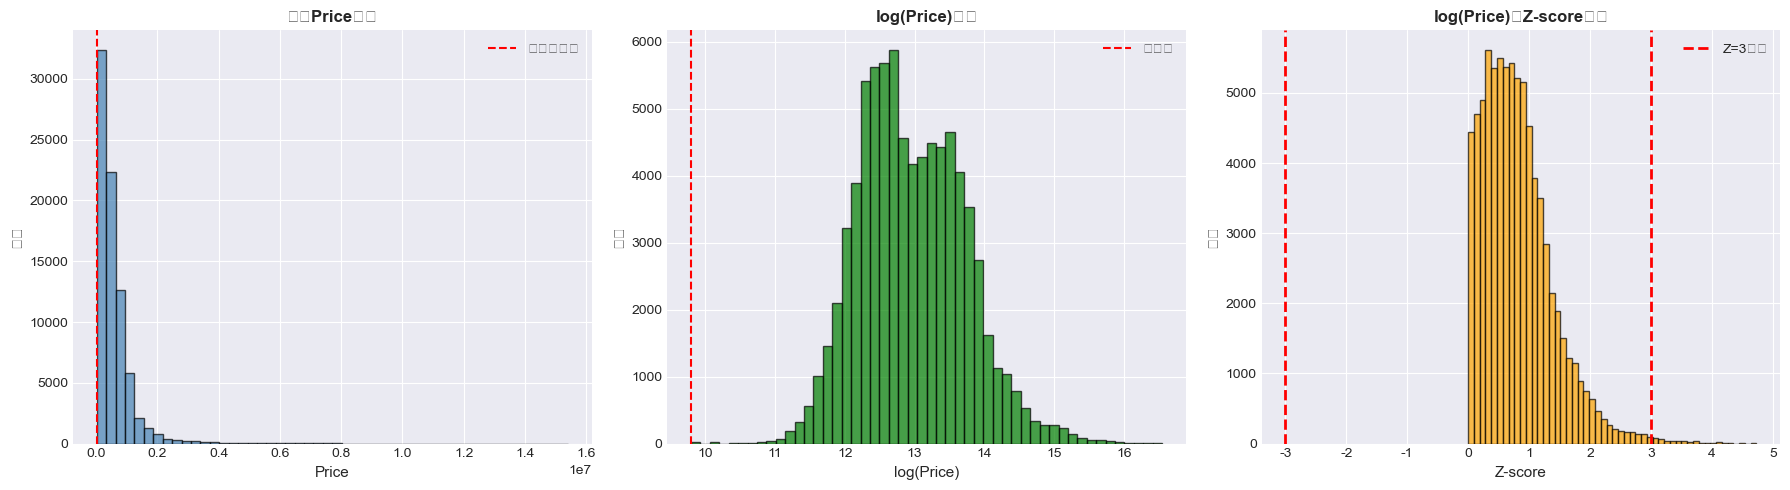

In [79]:


# ==================== 5. ÂºÇÂ∏∏ÂÄºÊ£ÄÊµãÂíåÂ§ÑÁêÜÔºà‰ΩøÁî®log(Price)ÁöÑZ-scoreÔºâ====================
print("\n[5/8] ÂºÇÂ∏∏ÂÄºÊ£ÄÊµãÂíåÂ§ÑÁêÜ...")

print("\n  [5.1] ÂØπlog(Price)ËøõË°åZ-scoreÂºÇÂ∏∏ÂÄºÊ£ÄÊµã...")

# ÂØπPriceÂèñÂØπÊï∞
log_price_train = np.log(y_train)

# ËÆ°ÁÆóZ-score
z_scores = np.abs(stats.zscore(log_price_train))

# ËØÜÂà´ÂºÇÂ∏∏ÂÄºÔºà|z-score| > 3Ôºâ
outlier_mask = z_scores > 3
outliers_count = outlier_mask.sum()

print(f"    log(Price)ÁªüËÆ°:")
print(f"      ÂùáÂÄº: {log_price_train.mean():.4f}")
print(f"      Ê†áÂáÜÂ∑Æ: {log_price_train.std():.4f}")
print(f"      Z-scoreËåÉÂõ¥: [{z_scores.min():.2f}, {z_scores.max():.2f}]")
print(f"    ÂºÇÂ∏∏ÂÄºÊï∞Èáè: {outliers_count} ({outliers_count/len(y_train)*100:.2f}%)")

# ÊòæÁ§∫ÂºÇÂ∏∏ÂÄºÁöÑPriceËåÉÂõ¥
if outliers_count > 0:
    outlier_prices = y_train[outlier_mask]
    print(f"    ÂºÇÂ∏∏ÂÄºPriceËåÉÂõ¥: [{outlier_prices.min():,.0f}, {outlier_prices.max():,.0f}]")

# ÁßªÈô§ÂºÇÂ∏∏ÂÄº
print("\n  [5.2] ÁßªÈô§ÂºÇÂ∏∏ÂÄº...")
normal_mask = ~outlier_mask
X_train_clean = X_train_selected[normal_mask]
y_train_clean = y_train[normal_mask]

removed_count = len(y_train) - len(y_train_clean)
print(f"    ÁßªÈô§Ê†∑Êú¨Êï∞: {removed_count} ({removed_count/len(y_train)*100:.2f}%)")
print(f"    Ê∏ÖÊ¥óÂêéËÆ≠ÁªÉÈõÜ: {X_train_clean.shape}")
print(f"    Ê∏ÖÊ¥óÂêéPriceÁªüËÆ°: mean={y_train_clean.mean():.2f}, std={y_train_clean.std():.2f}")

# ÂèØËßÜÂåñÂºÇÂ∏∏ÂÄºÊ£ÄÊµãÁªìÊûú
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ÂéüÂßãPriceÂàÜÂ∏É
axes[0].hist(y_train, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(y_train[outlier_mask].min() if outliers_count > 0 else 0, 
                color='r', linestyle='--', label='ÂºÇÂ∏∏ÂÄºÈòàÂÄº')
axes[0].set_xlabel('Price', fontsize=11)
axes[0].set_ylabel('È¢ëÊï∞', fontsize=11)
axes[0].set_title('ÂéüÂßãPriceÂàÜÂ∏É', fontsize=12, fontweight='bold')
axes[0].legend()

# log(Price)ÂàÜÂ∏ÉÂíåZ-score
axes[1].hist(log_price_train, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].axvline(log_price_train[outlier_mask].min() if outliers_count > 0 else 0,
                color='r', linestyle='--', label='ÂºÇÂ∏∏ÂÄº')
axes[1].set_xlabel('log(Price)', fontsize=11)
axes[1].set_ylabel('È¢ëÊï∞', fontsize=11)
axes[1].set_title('log(Price)ÂàÜÂ∏É', fontsize=12, fontweight='bold')
axes[1].legend()

# Z-scoreÂàÜÂ∏É
axes[2].hist(z_scores, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[2].axvline(3, color='r', linestyle='--', linewidth=2, label='Z=3ÈòàÂÄº')
axes[2].axvline(-3, color='r', linestyle='--', linewidth=2)
axes[2].set_xlabel('Z-score', fontsize=11)
axes[2].set_ylabel('È¢ëÊï∞', fontsize=11)
axes[2].set_title('log(Price)ÁöÑZ-scoreÂàÜÂ∏É', fontsize=12, fontweight='bold')
axes[2].legend()

plt.tight_layout()
plt.show()


## ËÆ≠ÁªÉÊ®°Âûã

In [80]:
# ==================== 6. ÁâπÂæÅÊ†áÂáÜÂåñ ====================
print("\n[6/8] ÁâπÂæÅÊ†áÂáÜÂåñ...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test_selected)

print(f"  ‚úì Ê†áÂáÜÂåñÂÆåÊàê")
print(f"    ËÆ≠ÁªÉÈõÜÂΩ¢Áä∂: {X_train_scaled.shape}")
print(f"    ÊµãËØïÈõÜÂΩ¢Áä∂: {X_test_scaled.shape}")

# ==================== 7. Ê®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞ ====================
print("\n[7/8] Ê®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞...")

# ËØÑ‰º∞ÂáΩÊï∞
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """ËØÑ‰º∞Ê®°ÂûãÊÄßËÉΩ"""
    print(f"\n  {'='*60}")
    print(f"  {model_name}")
    print(f"  {'='*60}")
    
    # ËÆ≠ÁªÉÊ®°Âûã
    model.fit(X_train, y_train)
    
    # È¢ÑÊµã
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Ê†∑Êú¨ÂÜÖMAE
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Ê†∑Êú¨Â§ñMAE
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    
    # 6Êäò‰∫§ÂèâÈ™åËØÅ
    cv_mae_scores = -cross_val_score(
        model, X_train, y_train, 
        cv=6, scoring='neg_mean_absolute_error', n_jobs=-1
    )
    cv_mae = cv_mae_scores.mean()
    cv_mae_std = cv_mae_scores.std()
    
    # RMAE (Relative MAE)
    train_rmae = train_mae / y_train.mean()
    test_rmae = test_mae / y_test.mean()
    cv_rmae = cv_mae / y_train.mean()
    
    print(f"  Ê†∑Êú¨ÂÜÖ (In-sample):")
    print(f"    MAE:  {train_mae:,.2f}")
    print(f"    RMSE: {train_rmse:,.2f}")
    print(f"    RMAE: {train_rmae:.4f}")
    print(f"    R¬≤:   {train_r2:.4f}")
    
    print(f"\n  Ê†∑Êú¨Â§ñ (Out-of-sample):")
    print(f"    MAE:  {test_mae:,.2f}")
    print(f"    RMSE: {test_rmse:,.2f}")
    print(f"    RMAE: {test_rmae:.4f}")
    print(f"    R¬≤:   {test_r2:.4f}")
    
    print(f"\n  6Êäò‰∫§ÂèâÈ™åËØÅ (Cross-validation):")
    print(f"    MAE:  {cv_mae:,.2f} (¬±{cv_mae_std:,.2f})")
    print(f"    RMAE: {cv_rmae:.4f}")
    
    return {
        'model': model,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'cv_mae': cv_mae,
        'train_rmae': train_rmae,
        'test_rmae': test_rmae,
        'cv_rmae': cv_rmae,
        'train_r2': train_r2,
        'test_r2': test_r2
    }



[6/8] ÁâπÂæÅÊ†áÂáÜÂåñ...
  ‚úì Ê†áÂáÜÂåñÂÆåÊàê
    ËÆ≠ÁªÉÈõÜÂΩ¢Áä∂: (78692, 145)
    ÊµãËØïÈõÜÂΩ¢Áä∂: (19780, 145)

[7/8] Ê®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞...


In [82]:
# 7.1 OLSÊ®°Âûã
print("\n  [7.1] OLS (ÊôÆÈÄöÊúÄÂ∞è‰∫å‰πòÊ≥ï)...")
ols_model = LinearRegression()
ols_results = evaluate_model(
    ols_model, X_train_scaled, X_test_scaled, 
    y_train_clean, y_test, "OLS"
)



  [7.1] OLS (ÊôÆÈÄöÊúÄÂ∞è‰∫å‰πòÊ≥ï)...

  OLS
  Ê†∑Êú¨ÂÜÖ (In-sample):
    MAE:  192,025.92
    RMSE: 295,396.21
    RMAE: 0.3435
    R¬≤:   0.6462

  Ê†∑Êú¨Â§ñ (Out-of-sample):
    MAE:  207,268.86
    RMSE: 371,124.39
    RMAE: 0.3562
    R¬≤:   0.6286

  6Êäò‰∫§ÂèâÈ™åËØÅ (Cross-validation):
    MAE:  193,844.39 (¬±2,940.02)
    RMAE: 0.3468


In [86]:

# 7.2 LassoÊ®°ÂûãÔºàÂõ∫ÂÆöÂèÇÊï∞Ôºâ
print("\n  [7.2] LassoÂõûÂΩí...")
lasso_model = Lasso(alpha=10, random_state=111, max_iter=10000)
lasso_results = evaluate_model(
    lasso_model, X_train_scaled, X_test_scaled, 
    y_train_clean, y_test, "Lasso"
)



  [7.2] LassoÂõûÂΩí...

  Lasso
  Ê†∑Êú¨ÂÜÖ (In-sample):
    MAE:  192,049.24
    RMSE: 295,403.55
    RMAE: 0.3436
    R¬≤:   0.6462

  Ê†∑Êú¨Â§ñ (Out-of-sample):
    MAE:  207,280.57
    RMSE: 371,172.02
    RMAE: 0.3562
    R¬≤:   0.6285

  6Êäò‰∫§ÂèâÈ™åËØÅ (Cross-validation):
    MAE:  192,600.09 (¬±1,150.58)
    RMAE: 0.3446


In [98]:
# 7.3 RidgeÊ®°ÂûãÔºàÂõ∫ÂÆöÂèÇÊï∞Ôºâ
print("\n  [7.3] RidgeÂõûÂΩí...")
ridge_model = Ridge(alpha=10, random_state=111, max_iter=10000)
ridge_results = evaluate_model(
    ridge_model, X_train_scaled, X_test_scaled, 
    y_train_clean, y_test, "Ridge"
)

# 7.4 Elastic NetÊ®°ÂûãÔºàÂõ∫ÂÆöÂèÇÊï∞Ôºâ
print("\n  [7.4] Elastic NetÂõûÂΩí...")
elastic_model = ElasticNet(alpha=10, l1_ratio=0.9, random_state=111, max_iter=10000)
elastic_results = evaluate_model(
    elastic_model, X_train_scaled, X_test_scaled, 
    y_train_clean, y_test, "Elastic Net"
)


  [7.3] RidgeÂõûÂΩí...

  Ridge
  Ê†∑Êú¨ÂÜÖ (In-sample):
    MAE:  192,146.89
    RMSE: 295,423.27
    RMAE: 0.3438
    R¬≤:   0.6461

  Ê†∑Êú¨Â§ñ (Out-of-sample):
    MAE:  207,370.60
    RMSE: 371,223.94
    RMAE: 0.3564
    R¬≤:   0.6284

  6Êäò‰∫§ÂèâÈ™åËØÅ (Cross-validation):
    MAE:  192,708.84 (¬±1,137.18)
    RMAE: 0.3448

  [7.4] Elastic NetÂõûÂΩí...

  Elastic Net
  Ê†∑Êú¨ÂÜÖ (In-sample):
    MAE:  211,419.63
    RMSE: 345,748.99
    RMAE: 0.3782
    R¬≤:   0.5153

  Ê†∑Êú¨Â§ñ (Out-of-sample):
    MAE:  229,342.11
    RMSE: 448,317.90
    RMAE: 0.3941
    R¬≤:   0.4580

  6Êäò‰∫§ÂèâÈ™åËØÅ (Cross-validation):
    MAE:  211,593.93 (¬±1,527.89)
    RMAE: 0.3785


In [101]:


# ==================== Âú®Ê®°ÂûãËÆ≠ÁªÉÈÉ®ÂàÜÊ∑ªÂä† Log-OLS Ê®°Âûã ====================

# Âú®Áé∞ÊúâÁöÑ evaluate_model ÂáΩÊï∞‰πãÂêéÔºåÊ∑ªÂä†‰∏Ä‰∏™Êñ∞ÁöÑËØÑ‰º∞ÂáΩÊï∞Áî®‰∫élogÂèòÊç¢Ê®°Âûã

def evaluate_log_model(model, X_train, X_test, y_train, y_test, model_name):
    """ËØÑ‰º∞‰ΩøÁî®logÂèòÊç¢ÁöÑÊ®°ÂûãÊÄßËÉΩ"""
    print(f"\n  {'='*60}")
    print(f"  {model_name}")
    print(f"  {'='*60}")
    
    # ÂØπÁõÆÊ†áÂèòÈáèÂèñlog
    y_train_log = np.log(y_train)
    y_test_log = np.log(y_test)
    
    # ËÆ≠ÁªÉÊ®°ÂûãÔºà‰ΩøÁî®logÂêéÁöÑyÔºâ
    model.fit(X_train, y_train_log)
    
    # È¢ÑÊµãÔºàÂæóÂà∞log(price)Ôºâ
    y_train_pred_log = model.predict(X_train)
    y_test_pred_log = model.predict(X_test)
    
    # Â∞ÜÈ¢ÑÊµãÁªìÊûúËΩ¨Êç¢ÂõûÂéüÂßãÂ∞∫Â∫¶
    y_train_pred = np.exp(y_train_pred_log)
    y_test_pred = np.exp(y_test_pred_log)
    
    # Ê†∑Êú¨ÂÜÖMAEÔºàÂéüÂßãÂ∞∫Â∫¶Ôºâ
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Ê†∑Êú¨Â§ñMAEÔºàÂéüÂßãÂ∞∫Â∫¶Ôºâ
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    
    # 6Êäò‰∫§ÂèâÈ™åËØÅ
    from sklearn.model_selection import cross_val_predict
    # ÂØπlog(y)ËøõË°å‰∫§ÂèâÈ™åËØÅÈ¢ÑÊµã
    y_train_log_cv_pred = cross_val_predict(
        model, X_train, y_train_log, cv=6, n_jobs=-1
    )
    # ËΩ¨Êç¢ÂõûÂéüÂßãÂ∞∫Â∫¶
    y_train_cv_pred = np.exp(y_train_log_cv_pred)
    cv_mae = mean_absolute_error(y_train, y_train_cv_pred)
    
    # ËÆ°ÁÆó‰∫§ÂèâÈ™åËØÅÁöÑÊ†áÂáÜÂ∑ÆÔºàÈÄöËøábootstrapÊñπÂºè‰º∞ËÆ°Ôºâ
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=6, shuffle=True, random_state=111)
    cv_mae_scores = []
    
    for train_idx, val_idx in kf.split(X_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr_log, y_val = y_train_log.iloc[train_idx], y_train.iloc[val_idx]
        
        model_temp = LinearRegression()
        model_temp.fit(X_tr, y_tr_log)
        y_val_pred_log = model_temp.predict(X_val)
        y_val_pred = np.exp(y_val_pred_log)
        
        mae = mean_absolute_error(y_val, y_val_pred)
        cv_mae_scores.append(mae)
    
    cv_mae_std = np.std(cv_mae_scores)
    
    # RMAE (Relative MAE)
    train_rmae = train_mae / y_train.mean()
    test_rmae = test_mae / y_test.mean()
    cv_rmae = cv_mae / y_train.mean()
    
    print(f"  Ê†∑Êú¨ÂÜÖ (In-sample):")
    print(f"    MAE:  {train_mae:,.2f}")
    print(f"    RMSE: {train_rmse:,.2f}")
    print(f"    RMAE: {train_rmae:.4f}")
    print(f"    R¬≤:   {train_r2:.4f}")
    
    print(f"\n  Ê†∑Êú¨Â§ñ (Out-of-sample):")
    print(f"    MAE:  {test_mae:,.2f}")
    print(f"    RMSE: {test_rmse:,.2f}")
    print(f"    RMAE: {test_rmae:.4f}")
    print(f"    R¬≤:   {test_r2:.4f}")
    
    print(f"\n  6Êäò‰∫§ÂèâÈ™åËØÅ (Cross-validation):")
    print(f"    MAE:  {cv_mae:,.2f} (¬±{cv_mae_std:,.2f})")
    print(f"    RMAE: {cv_rmae:.4f}")
    
    return {
        'model': model,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'cv_mae': cv_mae,
        'cv_mae_std': cv_mae_std,
        'train_rmae': train_rmae,
        'test_rmae': test_rmae,
        'cv_rmae': cv_rmae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'is_log_model': True  # Ê†áËÆ∞ËøôÊòØlogÊ®°Âûã
    }


# 7.1.1 Log-OLSÊ®°ÂûãÔºàÊñ∞Â¢ûÔºâ
print("\n  [7.1.1] Log-OLS (ÂØπÊï∞ÂèòÊç¢ÂêéÁöÑOLS)...")
log_ols_model = LinearRegression()
log_ols_results = evaluate_log_model(
    log_ols_model, X_train_scaled, X_test_scaled, 
    y_train_clean, y_test, "Log-OLS"
)


  [7.1.1] Log-OLS (ÂØπÊï∞ÂèòÊç¢ÂêéÁöÑOLS)...

  Log-OLS
  Ê†∑Êú¨ÂÜÖ (In-sample):
    MAE:  170,645.52
    RMSE: 382,733.49
    RMAE: 0.3053
    R¬≤:   0.4060

  Ê†∑Êú¨Â§ñ (Out-of-sample):
    MAE:  186,588.49
    RMSE: 660,948.93
    RMAE: 0.3207
    R¬≤:   -0.1780

  6Êäò‰∫§ÂèâÈ™åËØÅ (Cross-validation):
    MAE:  171,285.34 (¬±4,146.93)
    RMAE: 0.3064


In [103]:

# 7.6 ÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãÔºàÊñ∞Â¢ûÔºâ
print("\n  [7.6] Random Forest (ÈöèÊú∫Ê£ÆÊûó)...")
rf_model = RandomForestRegressor(
    n_estimators=150,        # Ê†ëÁöÑÊï∞Èáè
    max_depth=40,            # Ê†ëÁöÑÊúÄÂ§ßÊ∑±Â∫¶
    min_samples_split=5,     # ÂàÜË£ÇËäÇÁÇπÁöÑÊúÄÂ∞èÊ†∑Êú¨Êï∞
    min_samples_leaf=2,      # Âè∂ËäÇÁÇπÁöÑÊúÄÂ∞èÊ†∑Êú¨Êï∞
    max_features='sqrt',     # ÊØèÊ¨°ÂàÜË£ÇËÄÉËôëÁöÑÁâπÂæÅÊï∞
    random_state=111,
    n_jobs=-1,               # ‰ΩøÁî®ÊâÄÊúâCPUÊ†∏ÂøÉ
    verbose=0
)
rf_results = evaluate_model(
    rf_model, X_train_scaled, X_test_scaled, 
    y_train_clean, y_test, "Random Forest"
)

# ==================== 8. ÁªìÊûúÊ±áÊÄªÔºàÊõ¥Êñ∞Ôºâ ====================
print("\n[8/8] ÁªìÊûúÊ±áÊÄª...")

# Á°ÆÂÆöÊúÄ‰Ω≥Ê®°Âûã
all_results = {
    'OLS': ols_results,
    'Log-OLS': log_ols_results,
    'Lasso': lasso_results,
    'Ridge': ridge_results,
    'Elastic Net': elastic_results,
    'Random Forest': rf_results  # Êñ∞Â¢û
}

best_model_name = min(all_results.keys(), key=lambda k: all_results[k]['test_mae'])
best_model_results = all_results[best_model_name]

print(f"\n  ÊúÄ‰Ω≥Ê®°Âûã: {best_model_name}")
print(f"  ÊµãËØïÈõÜMAE: {best_model_results['test_mae']:,.2f}")

# ÁîüÊàêÊåáÊ†áË°®Ê†ºÔºàMAEÔºâ
print("\n" + "="*90)
print("Ê®°ÂûãÊÄßËÉΩÂØπÊØîË°®ÔºàMAEÔºâ")
print("="*90)

metrics_table = pd.DataFrame({
    'Metrics': ['OLS', 'Log-OLS', 'Lasso', 'Ridge', 'Elastic Net', 'Random Forest', f'Best Model ({best_model_name})'],
    'In-sample': [
        f"{ols_results['train_mae']:,.0f}",
        f"{log_ols_results['train_mae']:,.0f}",
        f"{lasso_results['train_mae']:,.0f}",
        f"{ridge_results['train_mae']:,.0f}",
        f"{elastic_results['train_mae']:,.0f}",
        f"{rf_results['train_mae']:,.0f}",
        f"{best_model_results['train_mae']:,.0f}"
    ],
    'Out-of-sample': [
        f"{ols_results['test_mae']:,.0f}",
        f"{log_ols_results['test_mae']:,.0f}",
        f"{lasso_results['test_mae']:,.0f}",
        f"{ridge_results['test_mae']:,.0f}",
        f"{elastic_results['test_mae']:,.0f}",
        f"{rf_results['test_mae']:,.0f}",
        f"{best_model_results['test_mae']:,.0f}"
    ],
    'Cross-validation': [
        f"{ols_results['cv_mae']:,.0f}",
        f"{log_ols_results['cv_mae']:,.0f}",
        f"{lasso_results['cv_mae']:,.0f}",
        f"{ridge_results['cv_mae']:,.0f}",
        f"{elastic_results['cv_mae']:,.0f}",
        f"{rf_results['cv_mae']:,.0f}",
        f"{best_model_results['cv_mae']:,.0f}"
    ],
    'Kaggle Score': ['--', '--', '--', '--', '--', '--', '--']
})

print(metrics_table.to_string(index=False))

# ÁîüÊàêRMAEË°®Ê†º
print("\n" + "="*90)
print("Ê®°ÂûãÊÄßËÉΩÂØπÊØîË°®ÔºàRMAEÔºâ")
print("="*90)

rmae_table = pd.DataFrame({
    'Metrics': ['OLS', 'Log-OLS', 'Lasso', 'Ridge', 'Elastic Net', 'Random Forest', f'Best Model ({best_model_name})'],
    'In-sample': [
        f"{ols_results['train_rmae']:.4f}",
        f"{log_ols_results['train_rmae']:.4f}",
        f"{lasso_results['train_rmae']:.4f}",
        f"{ridge_results['train_rmae']:.4f}",
        f"{elastic_results['train_rmae']:.4f}",
        f"{rf_results['train_rmae']:.4f}",
        f"{best_model_results['train_rmae']:.4f}"
    ],
    'Out-of-sample': [
        f"{ols_results['test_rmae']:.4f}",
        f"{log_ols_results['test_rmae']:.4f}",
        f"{lasso_results['test_rmae']:.4f}",
        f"{ridge_results['test_rmae']:.4f}",
        f"{elastic_results['test_rmae']:.4f}",
        f"{rf_results['test_rmae']:.4f}",
        f"{best_model_results['test_rmae']:.4f}"
    ],
    'Cross-validation': [
        f"{ols_results['cv_rmae']:.4f}",
        f"{log_ols_results['cv_rmae']:.4f}",
        f"{lasso_results['cv_rmae']:.4f}",
        f"{ridge_results['cv_rmae']:.4f}",
        f"{elastic_results['cv_rmae']:.4f}",
        f"{rf_results['cv_rmae']:.4f}",
        f"{best_model_results['cv_rmae']:.4f}"
    ]
})

print(rmae_table.to_string(index=False))



  [7.6] Random Forest (ÈöèÊú∫Ê£ÆÊûó)...

  Random Forest
  Ê†∑Êú¨ÂÜÖ (In-sample):
    MAE:  47,298.21
    RMSE: 91,982.04
    RMAE: 0.0846
    R¬≤:   0.9657

  Ê†∑Êú¨Â§ñ (Out-of-sample):
    MAE:  86,230.96
    RMSE: 259,277.16
    RMAE: 0.1482
    R¬≤:   0.8187

  6Êäò‰∫§ÂèâÈ™åËØÅ (Cross-validation):
    MAE:  nan (¬±nan)
    RMAE: nan

[8/8] ÁªìÊûúÊ±áÊÄª...

  ÊúÄ‰Ω≥Ê®°Âûã: Random Forest
  ÊµãËØïÈõÜMAE: 86,230.96

Ê®°ÂûãÊÄßËÉΩÂØπÊØîË°®ÔºàMAEÔºâ
                   Metrics In-sample Out-of-sample Cross-validation Kaggle Score
                       OLS   192,026       207,269          193,844           --
                   Log-OLS   170,646       186,588          171,285           --
                     Lasso   192,049       207,281          192,600           --
                     Ridge   192,147       207,371          192,709           --
               Elastic Net   211,420       229,342          211,594           --
             Random Forest    47,298        86,231            

## ÂºÄÂßãËØªÂèñÂíåÈ¢ÑÊµãÊµãËØïÈõÜ

In [104]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestRegressor

In [106]:

print("="*80)  
print("ÊµãËØïÈõÜÈ¢ÑÊµãÊµÅÁ®ã")  
print("="*80)  

# ==================== Ê≠•È™§ 1: ‰øùÂ≠òËÆ≠ÁªÉÂ•ΩÁöÑÊ®°Âûã ====================  
print("\nÊ≠•È™§ 1: ‰øùÂ≠òËÆ≠ÁªÉÂ•ΩÁöÑÊ®°Âûã")  
print("-"*80)  

# ‰øùÂ≠òÊ®°ÂûãÂíåÂøÖË¶ÅÁöÑËÆ≠ÁªÉ‰ø°ÊÅØ  
models_dict = {  
    'ols': ols_model,  
    'lasso': lasso_model,  
    'log_ols': log_ols_model,  
    'rf': rf_model,  
    'feature_columns': X_train_scaled.shape[1],  # ÁâπÂæÅÊï∞Èáè  
    'scaler': scaler,  
    'feature_names': X_train_clean.columns.tolist()  # ÁâπÂæÅÂêçÁß∞  
}  

# ‰øùÂ≠òÂà∞Êñá‰ª∂  
with open('trained_models.pkl', 'wb') as f:  
    pickle.dump(models_dict, f)  

print("‚úì Ê®°Âûã‰øùÂ≠òÊàêÂäüÔºÅ")  
print(f"  - OLSÊ®°Âûã")  
print(f"  - LassoÊ®°Âûã")  
print(f"  - Log-OLSÊ®°Âûã")  
print(f"  - ÈöèÊú∫Ê£ÆÊûóÊ®°Âûã")  
print(f"  - ÁâπÂæÅÊï∞Èáè: {models_dict['feature_columns']}")  
print(f"  - StandardScaler")  

ÊµãËØïÈõÜÈ¢ÑÊµãÊµÅÁ®ã

Ê≠•È™§ 1: ‰øùÂ≠òËÆ≠ÁªÉÂ•ΩÁöÑÊ®°Âûã
--------------------------------------------------------------------------------
‚úì Ê®°Âûã‰øùÂ≠òÊàêÂäüÔºÅ
  - OLSÊ®°Âûã
  - LassoÊ®°Âûã
  - Log-OLSÊ®°Âûã
  - ÈöèÊú∫Ê£ÆÊûóÊ®°Âûã
  - ÁâπÂæÅÊï∞Èáè: 145
  - StandardScaler


In [128]:
# ==================== ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì ====================  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import re  
import warnings  
warnings.filterwarnings('ignore')  

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  
from sklearn.preprocessing import StandardScaler, LabelEncoder  
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
from sklearn.preprocessing import PolynomialFeatures  
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from scipy import stats  
import pickle

# ËÆæÁΩÆÊòæÁ§∫ÈÄâÈ°π  
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 100)  
pd.set_option('display.width', 1000)  

# ËÆæÁΩÆÁªòÂõæÈ£éÊ†º  
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-darkgrid')  
sns.set_palette("husl")  

## ÊµãËØïÈõÜ-Áº∫Â§±ÂÄºÁâπÂæÅÂàõÂª∫ÂíåÁâπÂæÅÊèêÂèñ

In [117]:
import pandas as pd
import numpy as np

# ==================== ËØªÂèñÊµãËØïÈõÜ ====================
print("=" * 80)
print("ËØªÂèñÊµãËØïÈõÜ")
print("=" * 80)

# ËØªÂèñÊµãËØïÈõÜ
test_file_path = r"F:\Â§ßÂ≠¶‰πãÈÅì\‰∫∫Â∑•Êô∫ËÉΩ‰∏épythonÁ®ãÂ∫èËÆæËÆ°\Midterm_pj\ruc_Class25Q2_test_rent.csv"
df_test = pd.read_csv(test_file_path)

print(f"\nÊµãËØïÈõÜÊï∞ÊçÆÂΩ¢Áä∂: {df_test.shape}")
print(f"\nÊµãËØïÈõÜÂàóÂêç:\n{df_test.columns.tolist()}")
print(f"\nÊµãËØïÈõÜÂâç5Ë°åÊï∞ÊçÆ:\n{df_test.head()}")

# Â§á‰ªΩÊµãËØïÈõÜ
df_test_clean = df_test.copy()







################################
# ==================== ÂàõÂª∫Áº∫Â§±ÊåáÁ§∫ÂèòÈáèÔºà‰∏éËÆ≠ÁªÉÈõÜ‰øùÊåÅ‰∏ÄËá¥Ôºâ====================
print("\n" + "=" * 80)
print("‰∏∫ÊµãËØïÈõÜÂàõÂª∫‰∏éËÆ≠ÁªÉÈõÜÁõ∏ÂêåÁöÑ37‰∏™Áº∫Â§±ÊåáÁ§∫ÂèòÈáè")
print("=" * 80)

# ÂÆö‰πâËÆ≠ÁªÉÈõÜ‰∏≠ÂàõÂª∫ÁöÑ37‰∏™Áº∫Â§±ÊåáÁ§∫ÂèòÈáèÂØπÂ∫îÁöÑÂéüÂßãÁâπÂæÅ
missing_indicator_features_map = {
    'Êà∑Âûã': 'Êà∑Âûã_is_missing',
    'Ë£Ö‰øÆ': 'Ë£Ö‰øÆ_is_missing',
    'Ê•ºÂ±Ç': 'Ê•ºÂ±Ç_is_missing',
    'ÊúùÂêë': 'ÊúùÂêë_is_missing',
    '‰ªòÊ¨æÊñπÂºè': '‰ªòÊ¨æÊñπÂºè_is_missing',
    'ÁîµÊ¢Ø': 'ÁîµÊ¢Ø_is_missing',
    'ËΩ¶‰Ωç': 'ËΩ¶‰Ωç_is_missing',
    'Áî®Ê∞¥': 'Áî®Ê∞¥_is_missing',
    'Áî®Áîµ': 'Áî®Áîµ_is_missing',
    'ÁáÉÊ∞î': 'ÁáÉÊ∞î_is_missing',
    'ÈááÊöñ': 'ÈááÊöñ_is_missing',
    'ÁßüÊúü': 'ÁßüÊúü_is_missing',
    'ÈÖçÂ•óËÆæÊñΩ': 'ÈÖçÂ•óËÆæÊñΩ_is_missing',
    'Âå∫Âéø': 'Âå∫Âéø_is_missing',
    'ÊùøÂùó': 'ÊùøÂùó_is_missing',
    'ÁéØÁ∫ø‰ΩçÁΩÆ': 'ÁéØÁ∫ø‰ΩçÁΩÆ_is_missing',
    'Áâ©‰∏öÁ±ªÂà´': 'Áâ©‰∏öÁ±ªÂà´_is_missing',
    'Âª∫Á≠ëÂπ¥‰ª£': 'Âª∫Á≠ëÂπ¥‰ª£_is_missing',
    'ÂºÄÂèëÂïÜ': 'ÂºÄÂèëÂïÜ_is_missing',
    'ÊàøÂ±ãÊÄªÊï∞': 'ÊàøÂ±ãÊÄªÊï∞_is_missing',
    'Ê•ºÊ†ãÊÄªÊï∞': 'Ê•ºÊ†ãÊÄªÊï∞_is_missing',
    'Áâ©‰∏öÂÖ¨Âè∏': 'Áâ©‰∏öÂÖ¨Âè∏_is_missing',
    'Áªø Âåñ Áéá': 'Áªø Âåñ Áéá_is_missing',
    'ÂÆπ ÁßØ Áéá': 'ÂÆπ ÁßØ Áéá_is_missing',
    'Áâ© ‰∏ö Ë¥π': 'Áâ© ‰∏ö Ë¥π_is_missing',
    'Âª∫Á≠ëÁªìÊûÑ': 'Âª∫Á≠ëÁªìÊûÑ_is_missing',
    'Áâ©‰∏öÂäûÂÖ¨ÁîµËØù': 'Áâ©‰∏öÂäûÂÖ¨ÁîµËØù_is_missing',
    '‰∫ßÊùÉÊèèËø∞': '‰∫ßÊùÉÊèèËø∞_is_missing',
    '‰æõÊ∞¥': '‰æõÊ∞¥_is_missing',
    '‰æõÊöñ': '‰æõÊöñ_is_missing',
    '‰æõÁîµ': '‰æõÁîµ_is_missing',
    'ÁáÉÊ∞îË¥π': 'ÁáÉÊ∞îË¥π_is_missing',
    '‰æõÁÉ≠Ë¥π': '‰æõÁÉ≠Ë¥π_is_missing',
    'ÂÅúËΩ¶‰Ωç': 'ÂÅúËΩ¶‰Ωç_is_missing',
    'ÂÅúËΩ¶Ë¥πÁî®': 'ÂÅúËΩ¶Ë¥πÁî®_is_missing',
    'coord_x': 'coord_x_is_missing',
    'coord_y': 'coord_y_is_missing'
}

# ‰∏∫ÊØè‰∏™ÁâπÂæÅÂàõÂª∫Áº∫Â§±ÊåáÁ§∫ÂèòÈáèÔºàÊó†ËÆ∫ÊòØÂê¶ÂÆûÈôÖÁº∫Â§±Ôºâ
print(f"\nÂ∞ÜÂàõÂª∫ {len(missing_indicator_features_map)} ‰∏™Áº∫Â§±ÊåáÁ§∫ÂèòÈáè...\n")

created_count = 0
for original_col, indicator_col in missing_indicator_features_map.items():
    if original_col in df_test_clean.columns:
        # ÂàõÂª∫Áº∫Â§±ÊåáÁ§∫ÂèòÈáè
        df_test_clean[indicator_col] = df_test_clean[original_col].isnull().astype(int)
        
        # ÁªüËÆ°Áº∫Â§±ÊÉÖÂÜµ
        missing_count = df_test_clean[indicator_col].sum()
        missing_pct = (missing_count / len(df_test_clean)) * 100
        
        print(f"‚úì {original_col:20s} -> {indicator_col:30s} | Áº∫Â§±: {missing_count:6d} ({missing_pct:6.2f}%)")
        created_count += 1
    else:
        print(f"‚ö†Ô∏è {original_col:20s} -> ÁâπÂæÅ‰∏çÂ≠òÂú®ÔºåË∑≥Ëøá")

print(f"\n{'='*80}")
print(f"ÊàêÂäüÂàõÂª∫ {created_count} ‰∏™Áº∫Â§±ÊåáÁ§∫ÂèòÈáè")
print(f"{'='*80}")

# È™åËØÅ
print("\n--- È™åËØÅÁº∫Â§±ÊåáÁ§∫ÂèòÈáè ---")
print(f"ÊµãËØïÈõÜÊï∞ÊçÆÂΩ¢Áä∂: {df_test_clean.shape}")
indicator_cols = [col for col in df_test_clean.columns if col.endswith('_is_missing')]
print(f"Áº∫Â§±ÊåáÁ§∫ÂèòÈáèÊï∞Èáè: {len(indicator_cols)}")
print(f"\nÂâç10‰∏™Áº∫Â§±ÊåáÁ§∫ÂèòÈáèÁªüËÆ°:")
indicator_stats = pd.DataFrame({
    'ÁâπÂæÅ': indicator_cols[:10],
    'Áº∫Â§±Êï∞Èáè(1ÁöÑ‰∏™Êï∞)': [df_test_clean[col].sum() for col in indicator_cols[:10]],
    'ÈùûÁº∫Â§±Êï∞Èáè(0ÁöÑ‰∏™Êï∞)': [len(df_test_clean) - df_test_clean[col].sum() for col in indicator_cols[:10]],
    'Áº∫Â§±ÊØî‰æã': [df_test_clean[col].mean() * 100 for col in indicator_cols[:10]]
})
print(indicator_stats.to_string(index=False))

print("\n‚úì ÊµãËØïÈõÜÁº∫Â§±ÊåáÁ§∫ÂèòÈáèÂàõÂª∫ÂÆåÊàêÔºÅ")




###############################################
# ==================== ÊàøÂ±ãÊà∑ÂûãÁâπÂæÅÊèêÂèñÔºàÊµãËØïÈõÜÔºâ====================

import re

def extract_room_info_optimized(room_str):
    """
    ÊèêÂèñÊàøÂ±ãÊà∑Âûã‰∏≠ÁöÑÊàøÈó¥Êï∞Èáè
    Â§ÑÁêÜÊ†ºÂºèÔºö
    1. "XÂÆ§XÂéÖXÂé®XÂç´" - Ê†áÂáÜÊ†ºÂºè
    2. "XÊàøÈó¥XÂç´" - ÁÆÄÂåñÊ†ºÂºè
    3. Á©∫ÂÄº/Áº∫Â§±ÂÄº
    """
    if pd.isna(room_str) or room_str == '':
        return {
            'ÂçßÂÆ§Êï∞Èáè': np.nan,
            'ÂÆ¢ÂéÖÊï∞Èáè': np.nan,
            'Âé®ÊàøÊï∞Èáè': np.nan,
            'Âç´ÁîüÈó¥Êï∞Èáè': np.nan
        }
    
    room_str = str(room_str).strip()
    
    # ÂàùÂßãÂåñÁªìÊûú
    result = {
        'ÂçßÂÆ§Êï∞Èáè': np.nan,
        'ÂÆ¢ÂéÖÊï∞Èáè': np.nan,
        'Âé®ÊàøÊï∞Èáè': np.nan,
        'Âç´ÁîüÈó¥Êï∞Èáè': np.nan
    }
    
    # ÊèêÂèñÂçßÂÆ§Êï∞Èáè (ÂÆ§)
    bedroom_match = re.search(r'(\d+)ÂÆ§', room_str)
    if bedroom_match:
        result['ÂçßÂÆ§Êï∞Èáè'] = int(bedroom_match.group(1))
    
    # Â¶ÇÊûúÊ≤°Êúâ"ÂÆ§"ÔºåÂ∞ùËØï"ÊàøÈó¥"
    if pd.isna(result['ÂçßÂÆ§Êï∞Èáè']):
        room_match = re.search(r'(\d+)ÊàøÈó¥', room_str)
        if room_match:
            result['ÂçßÂÆ§Êï∞Èáè'] = int(room_match.group(1))
    
    # ÊèêÂèñÂÆ¢ÂéÖÊï∞Èáè (ÂéÖ)
    living_match = re.search(r'(\d+)ÂéÖ', room_str)
    if living_match:
        result['ÂÆ¢ÂéÖÊï∞Èáè'] = int(living_match.group(1))
    else:
        # Â¶ÇÊûúÊ≤°ÊúâÊòéÁ°ÆÊ†áÊ≥®ÂÆ¢ÂéÖÔºåÈªòËÆ§‰∏∫0ÔºàÂ¶Ç"XÊàøÈó¥XÂç´"Ê†ºÂºèÔºâ
        if 'ÊàøÈó¥' in room_str:
            result['ÂÆ¢ÂéÖÊï∞Èáè'] = 0
    
    # ÊèêÂèñÂé®ÊàøÊï∞Èáè (Âé®)
    kitchen_match = re.search(r'(\d+)Âé®', room_str)
    if kitchen_match:
        result['Âé®ÊàøÊï∞Èáè'] = int(kitchen_match.group(1))
    else:
        # Â¶ÇÊûúÊ≤°ÊúâÊòéÁ°ÆÊ†áÊ≥®Âé®ÊàøÔºåÈªòËÆ§‰∏∫0ÔºàÂ¶Ç"XÊàøÈó¥XÂç´"Ê†ºÂºèÔºâ
        if 'ÊàøÈó¥' in room_str:
            result['Âé®ÊàøÊï∞Èáè'] = 0
    
    # ÊèêÂèñÂç´ÁîüÈó¥Êï∞Èáè (Âç´)
    bathroom_match = re.search(r'(\d+)Âç´', room_str)
    if bathroom_match:
        result['Âç´ÁîüÈó¥Êï∞Èáè'] = int(bathroom_match.group(1))
    else:
        result['Âç´ÁîüÈó¥Êï∞Èáè'] = 0
    
    return result

# ==================== Â∫îÁî®Âà∞ÊµãËØïÈõÜ ====================

print("=" * 80)
print("ÊèêÂèñÊàøÂ±ãÊà∑ÂûãÁâπÂæÅÔºàÊµãËØïÈõÜÔºâ")
print("=" * 80)

# Â∫îÁî®ÊèêÂèñÂáΩÊï∞
room_features = df_test_clean['Êà∑Âûã'].apply(extract_room_info_optimized)

# Â∞ÜÂ≠óÂÖ∏ËΩ¨Êç¢‰∏∫DataFrame
room_features_df = pd.DataFrame(room_features.tolist())

# Ê∑ªÂä†Âà∞ÊµãËØïÈõÜ
df_test_clean['ÂçßÂÆ§Êï∞Èáè'] = room_features_df['ÂçßÂÆ§Êï∞Èáè']
df_test_clean['ÂÆ¢ÂéÖÊï∞Èáè'] = room_features_df['ÂÆ¢ÂéÖÊï∞Èáè']
df_test_clean['Âé®ÊàøÊï∞Èáè'] = room_features_df['Âé®ÊàøÊï∞Èáè']
df_test_clean['Âç´ÁîüÈó¥Êï∞Èáè'] = room_features_df['Âç´ÁîüÈó¥Êï∞Èáè']

# ==================== È™åËØÅÊèêÂèñÁªìÊûú ====================

print("\n--- ÊèêÂèñÁªìÊûúÈ™åËØÅ ---")
print("\nÂéüÂßãÊï∞ÊçÆ vs ÊèêÂèñÁªìÊûúÔºàÂâç20Ë°åÔºâÔºö")
validation_df = pd.DataFrame({
    'Êà∑Âûã': df_test_clean['Êà∑Âûã'].head(20),
    'ÂçßÂÆ§': df_test_clean['ÂçßÂÆ§Êï∞Èáè'].head(20),
    'ÂÆ¢ÂéÖ': df_test_clean['ÂÆ¢ÂéÖÊï∞Èáè'].head(20),
    'Âé®Êàø': df_test_clean['Âé®ÊàøÊï∞Èáè'].head(20),
    'Âç´ÁîüÈó¥': df_test_clean['Âç´ÁîüÈó¥Êï∞Èáè'].head(20)
})
print(validation_df.to_string(index=False))

# ==================== ÂàõÂª∫Ë°çÁîüÁâπÂæÅ ====================

# 1. ÂçßÂÆ§Âç´ÁîüÈó¥ÊØî‰æã
df_test_clean['ÂçßÂç´ÊØî'] = df_test_clean['ÂçßÂÆ§Êï∞Èáè'] / (df_test_clean['Âç´ÁîüÈó¥Êï∞Èáè'] + 1)

# 2. ÊàøÂûãÂÆåÊï¥ÊÄßÔºàÊòØÂê¶ÊâÄÊúâ‰ø°ÊÅØÈÉΩÈΩêÂÖ®Ôºâ
df_test_clean['ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥'] = (
    df_test_clean['ÂçßÂÆ§Êï∞Èáè'].notna() & 
    df_test_clean['ÂÆ¢ÂéÖÊï∞Èáè'].notna() & 
    df_test_clean['Âé®ÊàøÊï∞Èáè'].notna() & 
    df_test_clean['Âç´ÁîüÈó¥Êï∞Èáè'].notna()
).astype(int)

print(f"\nÊàøÂûã‰ø°ÊÅØÂÆåÊï¥ÊØî‰æã: {df_test_clean['ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥'].mean():.2%}")

new_room_features = [
    'ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè',
    'ÂçßÂç´ÊØî', 'ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥'
]

print(f"\nÊñ∞Â¢ûÊàøÈó¥Áõ∏ÂÖ≥ÁâπÂæÅ: {new_room_features}")

print("\n" + "=" * 80)
print("ÊàøÂ±ãÊà∑ÂûãÁâπÂæÅÊèêÂèñÂÆåÊàêÔºÅ")
print("=" * 80)





#####################
print("=" * 80)
print("Ê•ºÂ±Ç‰ø°ÊÅØËß£ÊûêÔºàÊµãËØïÈõÜÔºâ")
print("=" * 80)

def parse_floor_info(floor_str):
    """
    Ëß£ÊûêÊ•ºÂ±Ç‰ø°ÊÅØÔºåÊèêÂèñÊâÄÂú®Ê•ºÂ±ÇÂíåÊÄªÊ•ºÂ±Ç
    
    ÂèÇÊï∞:
        floor_str: Ê•ºÂ±ÇÂ≠óÁ¨¶‰∏≤
        
    ËøîÂõû:
        (ÂΩìÂâçÊ•ºÂ±Ç, ÊÄªÊ•ºÂ±Ç) ÂÖÉÁªÑ
    """
    if pd.isna(floor_str):
        return np.nan, np.nan
    
    floor_str = str(floor_str).strip()
    
    # 1. Â§ÑÁêÜÂú∞‰∏ãÂÆ§ÊÉÖÂÜµ
    if 'Âú∞‰∏ã' in floor_str:
        # ÊèêÂèñÊÄªÊ•ºÂ±ÇÔºàÂ¶ÇÊûúÊúâÔºâ
        total_match = re.search(r'/(\d+)Â±Ç', floor_str)
        total_floor = int(total_match.group(1)) if total_match else np.nan
        
        # ÂΩìÂâçÊ•ºÂ±ÇÁªü‰∏ÄËµãÂÄº‰∏∫-1
        return -1, total_floor
    
    # 2. ÊèêÂèñÊÄªÊ•ºÂ±ÇÊï∞
    total_match = re.search(r'/(\d+)Â±Ç', floor_str)
    if total_match:
        total_floor = int(total_match.group(1))
    else:
        total_floor = np.nan
    
    # 3. Á°ÆÂÆöÂΩìÂâçÊ•ºÂ±Ç
    # 3.1 Â¶ÇÊûúÊúâÂÖ∑‰ΩìÊï∞Â≠óÔºàÊ†ºÂºèÔºöÊï∞Â≠ó/ÊÄªÂ±ÇÊï∞Ôºâ
    current_match = re.search(r'^(\d+)/', floor_str)
    if current_match:
        current_floor = int(current_match.group(1))
        return current_floor, total_floor
    
    # 3.2 Â¶ÇÊûúÊòØ‰Ωé/‰∏≠/È´òÊ•ºÂ±ÇÊèèËø∞
    if '‰ΩéÊ•ºÂ±Ç' in floor_str:
        if not pd.isna(total_floor):
            current_floor = total_floor * 0.2
        else:
            current_floor = np.nan
    elif '‰∏≠Ê•ºÂ±Ç' in floor_str:
        if not pd.isna(total_floor):
            current_floor = total_floor * 0.5
        else:
            current_floor = np.nan
    elif 'È´òÊ•ºÂ±Ç' in floor_str:
        if not pd.isna(total_floor):
            current_floor = total_floor * 0.8
        else:
            current_floor = np.nan
    else:
        current_floor = np.nan
    
    return current_floor, total_floor


# Â∫îÁî®Ëß£ÊûêÂáΩÊï∞
print("\nÊ≠£Âú®Ëß£ÊûêÊ•ºÂ±Ç‰ø°ÊÅØ...")

# Â∫îÁî®ÂáΩÊï∞Âπ∂ÂàõÂª∫Êñ∞Âàó
floor_info = df_test_clean['Ê•ºÂ±Ç'].apply(parse_floor_info)
df_test_clean['ÊâÄÂú®Ê•ºÂ±Ç'] = floor_info.apply(lambda x: x[0])
df_test_clean['ÊÄªÊ•ºÂ±Ç'] = floor_info.apply(lambda x: x[1])

print("‚úì Ê•ºÂ±Ç‰ø°ÊÅØËß£ÊûêÂÆåÊàê")

# ==================== È™åËØÅÂíåÁªüËÆ° ====================
print("\n" + "=" * 80)
print("Ëß£ÊûêÁªìÊûúÈ™åËØÅ")
print("=" * 80)

# 1. Âü∫Êú¨ÁªüËÆ°
print("\n--- ÊâÄÂú®Ê•ºÂ±ÇÁªüËÆ° ---")
print(df_test_clean['ÊâÄÂú®Ê•ºÂ±Ç'].describe())
print(f"\nÂú∞‰∏ãÊ•ºÂ±ÇÊï∞Èáè: {(df_test_clean['ÊâÄÂú®Ê•ºÂ±Ç'] == -1).sum()} ({(df_test_clean['ÊâÄÂú®Ê•ºÂ±Ç'] == -1).sum()/len(df_test_clean)*100:.2f}%)")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_test_clean['ÊâÄÂú®Ê•ºÂ±Ç'].isna().sum()} ({df_test_clean['ÊâÄÂú®Ê•ºÂ±Ç'].isna().sum()/len(df_test_clean)*100:.2f}%)")

print("\n--- ÊÄªÊ•ºÂ±ÇÁªüËÆ° ---")
print(df_test_clean['ÊÄªÊ•ºÂ±Ç'].describe())
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_test_clean['ÊÄªÊ•ºÂ±Ç'].isna().sum()} ({df_test_clean['ÊÄªÊ•ºÂ±Ç'].isna().sum()/len(df_test_clean)*100:.2f}%)")

# 2. Êü•ÁúãËß£ÊûêÁ§∫‰æã
print("\n" + "=" * 80)
print("Ëß£ÊûêÁ§∫‰æãÂ±ïÁ§∫")
print("=" * 80)

print("\n--- Á§∫‰æã1: Ê†áÂáÜÊ†ºÂºèÔºà‰Ωé/‰∏≠/È´òÊ•ºÂ±ÇÔºâ ---")
sample_standard = df_test_clean[df_test_clean['Ê•ºÂ±Ç'].str.contains('‰ΩéÊ•ºÂ±Ç|‰∏≠Ê•ºÂ±Ç|È´òÊ•ºÂ±Ç', na=False)][['Ê•ºÂ±Ç', 'ÊâÄÂú®Ê•ºÂ±Ç', 'ÊÄªÊ•ºÂ±Ç']].head(15)
print(sample_standard.to_string(index=False))

print("\n--- Á§∫‰æã2: Êï∞Â≠óÊ†ºÂºè ---")
sample_numeric = df_test_clean[df_test_clean['Ê•ºÂ±Ç'].str.match(r'^\d+/', na=False)][['Ê•ºÂ±Ç', 'ÊâÄÂú®Ê•ºÂ±Ç', 'ÊÄªÊ•ºÂ±Ç']].head(10)
if len(sample_numeric) > 0:
    print(sample_numeric.to_string(index=False))
else:
    print("Êú™ÊâæÂà∞Êï∞Â≠óÊ†ºÂºèÁöÑÊ•ºÂ±ÇÊï∞ÊçÆ")

print("\n--- Á§∫‰æã3: Âú∞‰∏ãÊ•ºÂ±Ç ---")
sample_underground = df_test_clean[df_test_clean['Ê•ºÂ±Ç'].str.contains('Âú∞‰∏ã', na=False)][['Ê•ºÂ±Ç', 'ÊâÄÂú®Ê•ºÂ±Ç', 'ÊÄªÊ•ºÂ±Ç']].head(10)
if len(sample_underground) > 0:
    print(sample_underground.to_string(index=False))
else:
    print("Êú™ÊâæÂà∞Âú∞‰∏ãÊ•ºÂ±ÇÊï∞ÊçÆ")

# 3. ÂàõÂª∫Ê•ºÂ±ÇÊØî‰æãÁâπÂæÅ
print("\n" + "=" * 80)
print("ÂàõÂª∫Ë°çÁîüÁâπÂæÅ")
print("=" * 80)

# Ê•ºÂ±ÇÊØî‰æãÔºàÊéíÈô§Âú∞‰∏ãÂÆ§Ôºâ
df_test_clean['Ê•ºÂ±ÇÊØî‰æã'] = np.where(
    (df_test_clean['ÊâÄÂú®Ê•ºÂ±Ç'] > 0) & (df_test_clean['ÊÄªÊ•ºÂ±Ç'] > 0),
    df_test_clean['ÊâÄÂú®Ê•ºÂ±Ç'] / df_test_clean['ÊÄªÊ•ºÂ±Ç'],
    np.nan
)

print("\n--- Ê•ºÂ±ÇÊØî‰æãÁªüËÆ° ---")
print(df_test_clean['Ê•ºÂ±ÇÊØî‰æã'].describe())

# 4. ÁîüÊàêÊ•ºÂ±ÇÁâπÂæÅÊ±áÊÄªÊä•Âëä
print("\n" + "=" * 80)
print("Ê•ºÂ±ÇÁâπÂæÅÊ±áÊÄª")
print("=" * 80)

floor_summary = {
    'ÂéüÂßãÊ•ºÂ±ÇÁâπÂæÅ': ['Ê•ºÂ±Ç'],
    'Êñ∞Â¢ûÊï∞ÂÄºÁâπÂæÅ': ['ÊâÄÂú®Ê•ºÂ±Ç', 'ÊÄªÊ•ºÂ±Ç', 'Ê•ºÂ±ÇÊØî‰æã'],
}

print("\nÂàõÂª∫ÁöÑÊ•ºÂ±ÇÁõ∏ÂÖ≥ÁâπÂæÅ:")
for key, values in floor_summary.items():
    print(f"  {key}: {', '.join(values)}")

print("\n" + "=" * 80)
print("ÊµãËØïÈõÜÊ•ºÂ±Ç‰ø°ÊÅØËß£ÊûêÂÆåÊàêÔºÅ")
print("=" * 80)


###################################################################
# ==================== Ëß£ÊûêÈù¢ÁßØÁâπÂæÅÔºàÊµãËØïÈõÜÔºâ====================
print("=" * 80)  
print("Ëß£ÊûêÈù¢ÁßØÁâπÂæÅÔºàÊµãËØïÈõÜÔºâ")  
print("=" * 80)  

# Êü•ÁúãÂéüÂßãÈù¢ÁßØÊï∞ÊçÆ  
print("\n--- ÂéüÂßãÈù¢ÁßØÊï∞ÊçÆÊ†∑Êú¨ ---")  
print(f"Èù¢ÁßØÂàóÊï∞ÊçÆÁ±ªÂûã: {df_test_clean['Èù¢ÁßØ'].dtype}")  
print(f"Èù¢ÁßØÂàóÊÄªÊï∞: {len(df_test_clean['Èù¢ÁßØ'])}")  
print(f"Èù¢ÁßØÂàóÁº∫Â§±Êï∞: {df_test_clean['Èù¢ÁßØ'].isnull().sum()}")  
print(f"\nÂâç20Ë°åÈù¢ÁßØÊï∞ÊçÆ:")  
print(df_test_clean['Èù¢ÁßØ'].head(20))  

# ÂÆö‰πâÈù¢ÁßØÊèêÂèñÂáΩÊï∞  
def extract_area(area_str):  
    """  
    ‰ªéÈù¢ÁßØÂ≠óÁ¨¶‰∏≤‰∏≠ÊèêÂèñÊï∞ÂÄº  
    ‰æãÂ¶Ç: '100.00„é°' -> 100.00  
         '136„é°' -> 136.0  
         None -> NaN  
         '' -> NaN  
    """  
    # Â§ÑÁêÜÁ©∫ÂÄº  
    if pd.isna(area_str):  
        return np.nan  
    
    # ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤  
    area_str = str(area_str).strip()  
    
    # Â§ÑÁêÜÁ©∫Â≠óÁ¨¶‰∏≤  
    if area_str == '' or area_str.lower() == 'nan':  
        return np.nan  
    
    # ‰ΩøÁî®Ê≠£ÂàôË°®ËææÂºèÊèêÂèñÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞Ôºâ  
    # ÂåπÈÖçÊ®°ÂºèÔºöÂèØËÉΩÊúâË¥üÂè∑ÔºåÁÑ∂ÂêéÊòØÊï∞Â≠óÔºåÂèØËÉΩÊúâÂ∞èÊï∞ÁÇπÂíåÂ∞èÊï∞ÈÉ®ÂàÜ  
    match = re.search(r'(-?\d+\.?\d*)', area_str)  
    
    if match:  
        try:  
            area_value = float(match.group(1))  
            # È™åËØÅÂêàÁêÜÊÄßÔºàÈù¢ÁßØÂ∫îËØ•‰∏∫Ê≠£Êï∞‰∏îÂú®ÂêàÁêÜËåÉÂõ¥ÂÜÖÔºâ  
            if area_value > 0 and area_value < 10000:  # ÂÅáËÆæÊúÄÂ§ß10000Âπ≥Á±≥  
                return area_value  
            else:  
                return np.nan  
        except ValueError:  
            return np.nan  
    else:  
        return np.nan  

# Â∫îÁî®ÊèêÂèñÂáΩÊï∞  
print("\n--- ÊèêÂèñÈù¢ÁßØÊï∞ÂÄº ---")  
df_test_clean['Èù¢ÁßØ_Êï∞ÂÄº'] = df_test_clean['Èù¢ÁßØ'].apply(extract_area)  

# ÁªüËÆ°ÊèêÂèñÁªìÊûú  
print(f"\nÊèêÂèñÂÆåÊàêÔºÅ")  
print(f"ÂéüÂßãÈù¢ÁßØÂàóÁº∫Â§±Êï∞: {df_test_clean['Èù¢ÁßØ'].isnull().sum()}")  
print(f"ÊèêÂèñÂêéÁº∫Â§±Êï∞: {df_test_clean['Èù¢ÁßØ_Êï∞ÂÄº'].isnull().sum()}")  
print(f"ÊàêÂäüÊèêÂèñÊï∞ÂÄº: {df_test_clean['Èù¢ÁßØ_Êï∞ÂÄº'].notna().sum()} Êù°")  
print(f"ÊèêÂèñÂ§±Ë¥•/Êñ∞Â¢ûÁº∫Â§±: {df_test_clean['Èù¢ÁßØ_Êï∞ÂÄº'].isnull().sum() - df_test_clean['Èù¢ÁßØ'].isnull().sum()} Êù°")  

# ÊòæÁ§∫ÊèêÂèñÁªìÊûúÊ†∑Êú¨  
print("\n--- ÊèêÂèñÁªìÊûúÂØπÊØîÔºàÂâç20Ë°åÔºâ---")  
comparison_df = pd.DataFrame({  
    'ÂéüÂßãÈù¢ÁßØ': df_test_clean['Èù¢ÁßØ'].head(20),  
    'ÊèêÂèñÊï∞ÂÄº': df_test_clean['Èù¢ÁßØ_Êï∞ÂÄº'].head(20)  
})  
print(comparison_df.to_string())  

# ÁªüËÆ°ÊèèËø∞  
print("\n--- Èù¢ÁßØÊï∞ÂÄºÁªüËÆ°ÊèèËø∞ ---")  
print(df_test_clean['Èù¢ÁßØ_Êï∞ÂÄº'].describe())  

# ==================== Â§ÑÁêÜÊàøÂ±ãÊúùÂêëÔºàÂÖ´‰∏™ÊñπÂêëÔºâÔºàÊµãËØïÈõÜÔºâ====================
print("\n" + "=" * 80)
print("Â§ÑÁêÜÊúùÂêëÁâπÂæÅÔºàÂÖ´‰∏™ÊñπÂêëÔºâÔºàÊµãËØïÈõÜÔºâ")
print("=" * 80)

def extract_orientation_features(orientation_str):
    """
    ÊèêÂèñÊàøÂ±ãÊúùÂêëÁöÑÂÖ´‰∏™ÊñπÂêëÁâπÂæÅ
    ËøîÂõûÔºö‰∏ú„ÄÅÂçó„ÄÅË•ø„ÄÅÂåó„ÄÅ‰∏úÂçó„ÄÅ‰∏úÂåó„ÄÅË•øÂçó„ÄÅË•øÂåóÁöÑ0/1Ê†áËÆ∞
    Â¶ÇÊûúÂéüÂßãÊï∞ÊçÆ‰∏∫Á©∫ÔºåÂàôËøîÂõûnan
    """
    # Â¶ÇÊûúÊòØÁ©∫ÂÄºÔºåËøîÂõûÂÖ®nan
    if pd.isna(orientation_str):
        return {
            'Êúù‰∏ú': np.nan,
            'ÊúùÂçó': np.nan,
            'ÊúùË•ø': np.nan,
            'ÊúùÂåó': np.nan,
            'Êúù‰∏úÂçó': np.nan,
            'Êúù‰∏úÂåó': np.nan,
            'ÊúùË•øÂçó': np.nan,
            'ÊúùË•øÂåó': np.nan
        }
    
    orientation_str = str(orientation_str).strip()
    
    # Â¶ÇÊûúÂ≠óÁ¨¶‰∏≤‰∏∫Á©∫ÔºåËøîÂõûÂÖ®nan
    if orientation_str == '' or orientation_str == 'nan':
        return {
            'Êúù‰∏ú': np.nan,
            'ÊúùÂçó': np.nan,
            'ÊúùË•ø': np.nan,
            'ÊúùÂåó': np.nan,
            'Êúù‰∏úÂçó': np.nan,
            'Êúù‰∏úÂåó': np.nan,
            'ÊúùË•øÂçó': np.nan,
            'ÊúùË•øÂåó': np.nan
        }
    
    # ÂàùÂßãÂåñÂÖ´‰∏™ÊñπÂêë‰∏∫0
    result = {
        'Êúù‰∏ú': 0,
        'ÊúùÂçó': 0,
        'ÊúùË•ø': 0,
        'ÊúùÂåó': 0,
        'Êúù‰∏úÂçó': 0,
        'Êúù‰∏úÂåó': 0,
        'ÊúùË•øÂçó': 0,
        'ÊúùË•øÂåó': 0
    }
    
    # ÂÖàÊ£ÄÊü•Â§çÂêàÊñπÂêëÔºà‰∏§‰∏™Â≠óÁöÑÊñπÂêëÔºåÂ¶Ç"‰∏úÂçó"„ÄÅ"‰∏úÂåó"Á≠âÔºâ
    # Ê≥®ÊÑèÔºöË¶ÅÂÖàÊ£ÄÊü•Â§çÂêàÊñπÂêëÔºåÈÅøÂÖçË¢´Âçï‰∏™ÊñπÂêëÂåπÈÖçÂà∞
    if '‰∏úÂçó' in orientation_str:
        result['Êúù‰∏úÂçó'] = 1
    if '‰∏úÂåó' in orientation_str:
        result['Êúù‰∏úÂåó'] = 1
    if 'Ë•øÂçó' in orientation_str:
        result['ÊúùË•øÂçó'] = 1
    if 'Ë•øÂåó' in orientation_str:
        result['ÊúùË•øÂåó'] = 1
    
    # ÂÜçÊ£ÄÊü•Âçï‰∏™ÊñπÂêë
    # ‰ΩøÁî®ËæπÁïåÂåπÈÖçÔºåÈÅøÂÖç"‰∏úÂçó"‰∏≠ÁöÑ"‰∏ú"Ë¢´ÈáçÂ§çÂåπÈÖç
    # Ê£ÄÊü•ÊòØÂê¶ÊúâÁã¨Á´ãÁöÑ"‰∏ú"Ôºà‰∏çÊòØ"‰∏úÂçó"Êàñ"‰∏úÂåó"ÁöÑ‰∏ÄÈÉ®ÂàÜÔºâ
    if re.search(r'(?<!‰∏ú)‰∏ú(?![ÂçóÂåó])', orientation_str) or \
       (orientation_str.startswith('‰∏ú') and len(orientation_str) == 1):
        result['Êúù‰∏ú'] = 1
    
    if 'Âçó' in orientation_str and '‰∏úÂçó' not in orientation_str and 'Ë•øÂçó' not in orientation_str:
        # Ê£ÄÊü•ÊòØÂê¶ÊòØÁã¨Á´ãÁöÑ"Âçó"
        if re.search(r'(?<![‰∏úË•ø])Âçó', orientation_str):
            result['ÊúùÂçó'] = 1
    
    if re.search(r'(?<!Ë•ø)Ë•ø(?![ÂçóÂåó])', orientation_str) or \
       (orientation_str.startswith('Ë•ø') and len(orientation_str) == 1):
        result['ÊúùË•ø'] = 1
    
    if 'Âåó' in orientation_str and '‰∏úÂåó' not in orientation_str and 'Ë•øÂåó' not in orientation_str:
        if re.search(r'(?<![‰∏úË•ø])Âåó', orientation_str):
            result['ÊúùÂåó'] = 1
    
    return result

# Â∫îÁî®ÊèêÂèñÂáΩÊï∞
orientation_features = df_test_clean['ÊúùÂêë'].apply(extract_orientation_features)

# Â∞ÜÂ≠óÂÖ∏ÂàóË°®ËΩ¨Êç¢‰∏∫DataFrame
orientation_df = pd.DataFrame(orientation_features.tolist())

# Ê∑ªÂä†Âà∞ÂéüÊï∞ÊçÆÊ°Ü
for col in orientation_df.columns:
    df_test_clean[col] = orientation_df[col]

# ÁªüËÆ°ÂêÑÊñπÂêëÁöÑÂàÜÂ∏É
print("\nÂêÑÊúùÂêëÁöÑÂàÜÂ∏ÉÁªüËÆ°Ôºö")
for col in ['Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó']:
    valid_count = df_test_clean[col].notna().sum()
    has_orientation = (df_test_clean[col] == 1).sum()
    no_orientation = (df_test_clean[col] == 0).sum()
    nan_count = df_test_clean[col].isna().sum()
    
    print(f"\n{col}:")
    print(f"  ÊúâËØ•ÊúùÂêë: {has_orientation} ({has_orientation/valid_count*100:.2f}% of valid)")
    print(f"  Êó†ËØ•ÊúùÂêë: {no_orientation} ({no_orientation/valid_count*100:.2f}% of valid)")
    print(f"  Áº∫Â§±ÂÄº: {nan_count} ({nan_count/len(df_test_clean)*100:.2f}% of total)")

# ÂàõÂª∫ÊúùÂêëÊÄªÊï∞ÁâπÂæÅÔºàÂè™ÁªüËÆ°ÊúâÊïàÂÄºÔºâ
def count_orientations(row):
    """ÁªüËÆ°ÊàøÂ±ãÁöÑÊúùÂêëÊï∞Èáè"""
    orientations = ['Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó']
    
    # Â¶ÇÊûúÊâÄÊúâÊúùÂêëÈÉΩÊòØnanÔºåËøîÂõûnan
    if all(pd.isna(row[o]) for o in orientations):
        return np.nan
    
    # Âê¶ÂàôÁªüËÆ°1ÁöÑÊï∞Èáè
    return sum(row[o] == 1 for o in orientations)

df_test_clean['ÊúùÂêëÊÄªÊï∞'] = df_test_clean.apply(count_orientations, axis=1)

print(f"\nÊúùÂêëÊÄªÊï∞ÂàÜÂ∏É:")
print(df_test_clean['ÊúùÂêëÊÄªÊï∞'].value_counts(dropna=False).sort_index())

# ÂàõÂª∫‰∏Ä‰∫õË°çÁîüÁâπÂæÅ
# ÊòØÂê¶‰∏∫Âçï‰∏ÄÊúùÂêë
df_test_clean['ÊòØÂê¶Âçï‰∏ÄÊúùÂêë'] = (df_test_clean['ÊúùÂêëÊÄªÊï∞'] == 1).astype(float)
df_test_clean.loc[df_test_clean['ÊúùÂêëÊÄªÊï∞'].isna(), 'ÊòØÂê¶Âçï‰∏ÄÊúùÂêë'] = np.nan

# ÊòØÂê¶‰∏∫ÂçóÂåóÈÄöÈÄè
df_test_clean['ÊòØÂê¶ÂçóÂåóÈÄöÈÄè'] = ((df_test_clean['ÊúùÂçó'] == 1) & (df_test_clean['ÊúùÂåó'] == 1)).astype(float)
df_test_clean.loc[(df_test_clean['ÊúùÂçó'].isna()) | (df_test_clean['ÊúùÂåó'].isna()), 'ÊòØÂê¶ÂçóÂåóÈÄöÈÄè'] = np.nan

# ÊòØÂê¶‰∏∫‰∏úË•øÈÄöÈÄè
df_test_clean['ÊòØÂê¶‰∏úË•øÈÄöÈÄè'] = ((df_test_clean['Êúù‰∏ú'] == 1) & (df_test_clean['ÊúùË•ø'] == 1)).astype(float)
df_test_clean.loc[(df_test_clean['Êúù‰∏ú'].isna()) | (df_test_clean['ÊúùË•ø'].isna()), 'ÊòØÂê¶‰∏úË•øÈÄöÈÄè'] = np.nan

# ÊòØÂê¶ÊúâÂçóÂêëÔºàÂçóÂêëÊàøÂ±ãÈÄöÂ∏∏Êõ¥ÂèóÊ¨¢ËøéÔºâ
df_test_clean['ÊòØÂê¶ÊúâÂçóÂêë'] = ((df_test_clean['ÊúùÂçó'] == 1) | (df_test_clean['Êúù‰∏úÂçó'] == 1) | (df_test_clean['ÊúùË•øÂçó'] == 1)).astype(float)
df_test_clean.loc[(df_test_clean['ÊúùÂçó'].isna()) & (df_test_clean['Êúù‰∏úÂçó'].isna()) & (df_test_clean['ÊúùË•øÂçó'].isna()), 'ÊòØÂê¶ÊúâÂçóÂêë'] = np.nan

print(f"\nÂçóÂåóÈÄöÈÄèÊàøÂ±ãÊï∞Èáè: {(df_test_clean['ÊòØÂê¶ÂçóÂåóÈÄöÈÄè'] == 1).sum()}")
print(f"‰∏úË•øÈÄöÈÄèÊàøÂ±ãÊï∞Èáè: {(df_test_clean['ÊòØÂê¶‰∏úË•øÈÄöÈÄè'] == 1).sum()}")
print(f"ÊúâÂçóÂêëÊàøÂ±ãÊï∞Èáè: {(df_test_clean['ÊòØÂê¶ÊúâÂçóÂêë'] == 1).sum()}")

# ÊòæÁ§∫‰∏Ä‰∫õÊ†∑‰æã
print("\nÂâç20Ë°åÊúùÂêëÁâπÂæÅÁ§∫‰æãÔºö")
orientation_cols = ['ÊúùÂêë', 'Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó', 'ÊúùÂêëÊÄªÊï∞']
print(df_test_clean[orientation_cols].head(20).to_string())

# ==================== ‰ªòÊ¨æÊñπÂºè One-Hot ÁºñÁ†ÅÔºàÊµãËØïÈõÜÔºâ====================
print("\n" + "=" * 80)
print("‰ªòÊ¨æÊñπÂºè One-Hot ÁºñÁ†ÅÔºàÊµãËØïÈõÜÔºâ")
print("=" * 80)

# ÂÆö‰πâ‰ªòÊ¨æÊñπÂºèÁöÑÂèØËÉΩÂèñÂÄº
payment_methods = ['ÂçäÂπ¥‰ªò‰ª∑', 'Â≠£‰ªò‰ª∑', 'Âπ¥‰ªò‰ª∑', 'ÂèåÊúà‰ªò‰ª∑', 'Êúà‰ªò‰ª∑']

print(f"\nÊåáÂÆöÁöÑ‰ªòÊ¨æÊñπÂºèÁ±ªÂà´: {payment_methods}")

# Ê£ÄÊü•ÂéüÂßãÊï∞ÊçÆ
if '‰ªòÊ¨æÊñπÂºè' in df_test_clean.columns:
    print(f"\n--- ÂéüÂßãÊï∞ÊçÆÂàÜÊûê ---")
    print(f"‰ªòÊ¨æÊñπÂºèÂàóÁöÑÂîØ‰∏ÄÂÄºÊï∞Èáè: {df_test_clean['‰ªòÊ¨æÊñπÂºè'].nunique()}")
    print(f"‰ªòÊ¨æÊñπÂºèÂàóÁöÑÁº∫Â§±Êï∞Èáè: {df_test_clean['‰ªòÊ¨æÊñπÂºè'].isnull().sum()}")
    print(f"‰ªòÊ¨æÊñπÂºèÂàóÁöÑÁº∫Â§±ÊØî‰æã: {df_test_clean['‰ªòÊ¨æÊñπÂºè'].isnull().sum() / len(df_test_clean) * 100:.2f}%")
    
    # ÊòæÁ§∫ÊâÄÊúâÂîØ‰∏ÄÂÄºÂèäÂÖ∂Êï∞Èáè
    print(f"\n‰ªòÊ¨æÊñπÂºèÂèñÂÄºÂàÜÂ∏É:")
    value_counts = df_test_clean['‰ªòÊ¨æÊñπÂºè'].value_counts(dropna=False)
    print(value_counts)
    
    # Ê£ÄÊü•ÊòØÂê¶Êúâ‰∏çÂú®ÊåáÂÆöÂàóË°®‰∏≠ÁöÑÂÄº
    non_null_values = df_test_clean['‰ªòÊ¨æÊñπÂºè'].dropna().unique()
    unexpected_values = [v for v in non_null_values if v not in payment_methods]
    
    if unexpected_values:
        print(f"\n‚ö†Ô∏è ÂèëÁé∞ {len(unexpected_values)} ‰∏™Êú™Âú®ÊåáÂÆöÂàóË°®‰∏≠ÁöÑÂÄº:")
        for val in unexpected_values[:10]:  # Âè™ÊòæÁ§∫Ââç10‰∏™
            count = (df_test_clean['‰ªòÊ¨æÊñπÂºè'] == val).sum()
            print(f"  - '{val}': {count} Êù°")
    else:
        print(f"\n‚úì ÊâÄÊúâÈùûÁ©∫ÂÄºÈÉΩÂú®ÊåáÂÆöÂàóË°®‰∏≠")
    
    # ÂàõÂª∫ One-Hot ÁºñÁ†Å
    print(f"\n--- ÂàõÂª∫ One-Hot ÁºñÁ†Å ---")
    
    for method in payment_methods:
        col_name = f'‰ªòÊ¨æÊñπÂºè_{method}'
        
        # Âè™ÊúâÂΩì‰ªòÊ¨æÊñπÂºèÂÆåÂÖ®ÂåπÈÖçÊó∂ÊâçÊ†áËÆ∞‰∏∫1ÔºåÁº∫Â§±ÂÄºÂíåÂÖ∂‰ªñÂÄºÈÉΩ‰∏∫0
        df_test_clean[col_name] = (df_test_clean['‰ªòÊ¨æÊñπÂºè'] == method).astype(int)
        
        count = df_test_clean[col_name].sum()
        percentage = (count / len(df_test_clean)) * 100
        
        print(f"‚úì ÂàõÂª∫ {col_name:20s} | Êï∞Èáè: {count:6d} ({percentage:5.2f}%)")
    
    # È™åËØÅÁªìÊûú
    print(f"\n--- È™åËØÅ One-Hot ÁºñÁ†Å ---")
    
    # Ê£ÄÊü•ÊØèË°åÊúÄÂ§öÂè™Êúâ‰∏Ä‰∏™1
    onehot_cols = [f'‰ªòÊ¨æÊñπÂºè_{method}' for method in payment_methods]
    row_sums = df_test_clean[onehot_cols].sum(axis=1)
    
    print(f"ÊØèË°åOne-HotÂàóÁöÑÂíåÁöÑÂàÜÂ∏É:")
    print(row_sums.value_counts().sort_index())
    
    # ËÆ°ÁÆóÊúâÂ§öÂ∞ëË°åÊòØÂÖ®0ÔºàÁº∫Â§±ÂÄºÊàñÂÖ∂‰ªñÂÄºÔºâ
    all_zero_count = (row_sums == 0).sum()
    one_count = (row_sums == 1).sum()
    multi_count = (row_sums > 1).sum()
    
    print(f"\nÁªüËÆ°:")
    print(f"  - ÂÖ®0ÁöÑË°åÊï∞ÔºàÁº∫Â§±ÊàñÂÖ∂‰ªñÂÄºÔºâ: {all_zero_count:6d} ({all_zero_count/len(df_test_clean)*100:5.2f}%)")
    print(f"  - ÊÅ∞Â•Ω1‰∏™1ÁöÑË°åÊï∞: {one_count:6d} ({one_count/len(df_test_clean)*100:5.2f}%)")
    print(f"  - Â§ö‰∫é1‰∏™1ÁöÑË°åÊï∞: {multi_count:6d} ({multi_count/len(df_test_clean)*100:5.2f}%)")
    
    # ÊòæÁ§∫Á§∫‰æã
    print(f"\n--- Á§∫‰æãÂ±ïÁ§∫ ---")
    print(f"ÂéüÂßã‰ªòÊ¨æÊñπÂºèÂàóÂíåÂØπÂ∫îÁöÑOne-HotÁºñÁ†ÅÔºàÂâç20Ë°åÔºâ:\n")
    
    display_cols = ['‰ªòÊ¨æÊñπÂºè'] + onehot_cols
    sample_df = df_test_clean[display_cols].head(20).copy()
    
    # Ê∑ªÂä†Ë°åÊÄªÂíåÂàó‰ª•‰æøÊü•Áúã
    sample_df['One-HotÊÄªÂíå'] = df_test_clean[onehot_cols].head(20).sum(axis=1)
    
    print(sample_df.to_string(index=True))
    
    # ËØ¶ÁªÜÂàÜÊûêÔºöÂ±ïÁ§∫ÊØèÁßç‰ªòÊ¨æÊñπÂºèÁöÑÁ§∫‰æã
    print(f"\n--- ÊØèÁßç‰ªòÊ¨æÊñπÂºèÁöÑÁ§∫‰æã ---")
    for method in payment_methods:
        col_name = f'‰ªòÊ¨æÊñπÂºè_{method}'
        matching_rows = df_test_clean[df_test_clean[col_name] == 1]
        
        if len(matching_rows) > 0:
            print(f"\n{method} ÁöÑÁ§∫‰æã (ÂÖ± {len(matching_rows)} Êù°):")
            print(matching_rows[['‰ªòÊ¨æÊñπÂºè'] + onehot_cols].head(3).to_string(index=False))
    
    # Â±ïÁ§∫Áº∫Â§±ÂÄºÂíåÂÖ∂‰ªñÂÄºÁöÑÁ§∫‰æã
    all_zero_rows = df_test_clean[row_sums == 0]
    if len(all_zero_rows) > 0:
        print(f"\nÁº∫Â§±ÂÄºÊàñÂÖ∂‰ªñÂÄºÁöÑÁ§∫‰æã (ÂÖ± {len(all_zero_rows)} Êù°ÔºåÊòæÁ§∫Ââç5Êù°):")
        print(all_zero_rows[['‰ªòÊ¨æÊñπÂºè'] + onehot_cols].head(5).to_string(index=False))
    
    # ÁîüÊàêÊ±áÊÄªÊä•Âëä
    print(f"\n" + "=" * 80)
    print("One-Hot ÁºñÁ†ÅÊ±áÊÄªÊä•Âëä")
    print("=" * 80)
    
    summary_data = []
    for method in payment_methods:
        col_name = f'‰ªòÊ¨æÊñπÂºè_{method}'
        count = df_test_clean[col_name].sum()
        percentage = (count / len(df_test_clean)) * 100
        summary_data.append({
            '‰ªòÊ¨æÊñπÂºè': method,
            'One-HotÂàóÂêç': col_name,
            'Êï∞Èáè': count,
            'Âç†ÊØî(%)': f'{percentage:.2f}',
            'ÊòØÂê¶ÂàõÂª∫': '‚úì'
        })
    
    summary_df = pd.DataFrame(summary_data)
    print(f"\n{summary_df.to_string(index=False)}")

print("\n" + "=" * 80)
print("ÊµãËØïÈõÜÈù¢ÁßØ„ÄÅÊúùÂêë„ÄÅ‰ªòÊ¨æÊñπÂºèÁâπÂæÅÂ§ÑÁêÜÂÆåÊàêÔºÅ")
print("=" * 80)




###########################################
# ==================== ÁßüËµÅÊñπÂºè One-Hot ÁºñÁ†ÅÔºàÊµãËØïÈõÜÔºâ====================  
import pandas as pd  
import numpy as np  

print("=" * 80)  
print("ÁßüËµÅÊñπÂºè One-Hot ÁºñÁ†ÅÂ§ÑÁêÜÔºàÊµãËØïÈõÜÔºâ")  
print("=" * 80)  

# 1. È¶ñÂÖàÊü•ÁúãÁßüËµÅÊñπÂºèÁöÑÂàÜÂ∏ÉÊÉÖÂÜµ  
print("\n--- 1. ÁßüËµÅÊñπÂºèÊï∞ÊçÆÊé¢Á¥¢ ---")  

if 'ÁßüËµÅÊñπÂºè' in df_test_clean.columns:  
    print(f"\nÁßüËµÅÊñπÂºèÁöÑÁ±ªÂà´ÂàÜÂ∏É:")  
    rental_type_counts = df_test_clean['ÁßüËµÅÊñπÂºè'].value_counts(dropna=False)  
    print(rental_type_counts)  
    
    print(f"\nÁßüËµÅÊñπÂºèÁöÑÁ±ªÂà´Âç†ÊØî:")  
    rental_type_pct = df_test_clean['ÁßüËµÅÊñπÂºè'].value_counts(normalize=True, dropna=False) * 100  
    for category, pct in rental_type_pct.items():  
        print(f"  {category}: {pct:.2f}%")  
    
    # Ê£ÄÊü•Áº∫Â§±ÂÄº  
    missing_count = df_test_clean['ÁßüËµÅÊñπÂºè'].isnull().sum()  
    missing_pct = (missing_count / len(df_test_clean)) * 100  
    print(f"\nÁº∫Â§±ÂÄºÊÉÖÂÜµ:")  
    print(f"  Áº∫Â§±Êï∞Èáè: {missing_count}")  
    print(f"  Áº∫Â§±ÊØî‰æã: {missing_pct:.2f}%")  
    
    # ÂîØ‰∏ÄÂÄºÊï∞Èáè  
    unique_values = df_test_clean['ÁßüËµÅÊñπÂºè'].nunique()  
    print(f"\nÂîØ‰∏ÄÁ±ªÂà´Êï∞Èáè: {unique_values}")  
    
    # 2. Â§ÑÁêÜÁº∫Â§±ÂÄºÔºàÂ¶ÇÊûúÂ≠òÂú®Ôºâ  
    print("\n--- 2. Â§ÑÁêÜÁº∫Â§±ÂÄº ---")  
    if missing_count > 0:  
        print(f"ÂèëÁé∞ {missing_count} ‰∏™Áº∫Â§±ÂÄº")  
        # ÈÄâÈ°π1: Â°´ÂÖÖ‰∏∫ "Êú™Áü•" ÊàñÊúÄÂ∏∏ËßÅÁöÑÂÄº  
        mode_value = df_test_clean['ÁßüËµÅÊñπÂºè'].mode()[0] if len(df_test_clean['ÁßüËµÅÊñπÂºè'].mode()) > 0 else 'Êï¥Áßü'  
        print(f"Â∞ÜÁº∫Â§±ÂÄºÂ°´ÂÖÖ‰∏∫: '{mode_value}'")  
        df_test_clean['ÁßüËµÅÊñπÂºè'] = df_test_clean['ÁßüËµÅÊñπÂºè'].fillna(mode_value)  
        print("‚úì Áº∫Â§±ÂÄºÂ°´ÂÖÖÂÆåÊàê")  
    else:  
        print("‚úì Êó†Áº∫Â§±ÂÄºÔºåÊó†ÈúÄÂ§ÑÁêÜ")  
    
    # 3. One-Hot ÁºñÁ†Å  
    print("\n--- 3. One-Hot ÁºñÁ†Å ---")  
    
    # ÊñπÊ≥ï1: ‰ΩøÁî® pd.get_dummies() Âπ∂ËÆæÁΩÆ drop_first=True  
    print("\n‰ΩøÁî® pd.get_dummies() ËøõË°å One-Hot ÁºñÁ†Å...")  
    
    # ‰øùÂ≠òÂéüÂßãÂàóÂêçÁî®‰∫éÂêéÁª≠Âà†Èô§  
    original_column = 'ÁßüËµÅÊñπÂºè'  
    
    # ÂàõÂª∫ One-Hot ÁºñÁ†ÅÔºådrop_first=True ‰ºöËá™Âä®Âà†Èô§Á¨¨‰∏Ä‰∏™Á±ªÂà´  
    rental_dummies = pd.get_dummies(df_test_clean['ÁßüËµÅÊñπÂºè'],   
                                    prefix='ÁßüËµÅÊñπÂºè',   
                                    drop_first=True,  
                                    dtype=int)  
    
    print(f"‚úì One-Hot ÁºñÁ†ÅÂÆåÊàê")  
    print(f"  ÂéüÂßãÁâπÂæÅ: 1 Âàó ('{original_column}')")  
    print(f"  ÁºñÁ†ÅÂêéÁâπÂæÅ: {rental_dummies.shape[1]} Âàó")  
    print(f"  Êñ∞Â¢ûÁâπÂæÅÂàóÂêç: {rental_dummies.columns.tolist()}")  
    
    # ÊòæÁ§∫Ë¢´Âà†Èô§ÁöÑÂü∫ÂáÜÁ±ªÂà´Ôºàreference categoryÔºâ  
    all_categories = df_test_clean['ÁßüËµÅÊñπÂºè'].unique()  
    dropped_category = [cat for cat in all_categories   
                       if f'ÁßüËµÅÊñπÂºè_{cat}' not in rental_dummies.columns]  
    print(f"\n  Âü∫ÂáÜÁ±ªÂà´(Â∑≤Âà†Èô§): {dropped_category}")  
    print(f"  ‰øùÁïôÁ±ªÂà´: {[col.replace('ÁßüËµÅÊñπÂºè_', '') for col in rental_dummies.columns.tolist()]}")  
    
    # 4. Â∞Ü One-Hot ÁºñÁ†ÅÁöÑÂàóÊ∑ªÂä†Âà∞ÂéüÊï∞ÊçÆÈõÜ  
    print("\n--- 4. Ê∑ªÂä†Âà∞ÂéüÊï∞ÊçÆÈõÜ ---")  
    
    # Ëé∑ÂèñÂéüÂßãÂàóÁöÑ‰ΩçÁΩÆ  
    original_position = df_test_clean.columns.get_loc(original_column)  
    
    # Â∞ÜÊñ∞ÂàóÊèíÂÖ•Âà∞ÂéüÂßãÂàóÁöÑ‰ΩçÁΩÆ  
    for i, col in enumerate(rental_dummies.columns):  
        df_test_clean.insert(original_position + i + 1, col, rental_dummies[col])  
    
    print(f"‚úì Â∑≤Â∞Ü {len(rental_dummies.columns)} ‰∏™ One-Hot ÁºñÁ†ÅÂàóÊ∑ªÂä†Âà∞Êï∞ÊçÆÈõÜ")  
    
    # 5. Âà†Èô§ÂéüÂßãÁöÑÁßüËµÅÊñπÂºèÂàó  
    print("\n--- 5. Âà†Èô§ÂéüÂßãÂàó ---")  
    df_before = df_test_clean.shape[1]  
    df_test_clean = df_test_clean.drop(columns=[original_column])  
    df_after = df_test_clean.shape[1]  
    
    print(f"‚úì Â∑≤Âà†Èô§ÂéüÂßãÂàó '{original_column}'")  
    print(f"  Âà†Èô§ÂâçÂàóÊï∞: {df_before}")  
    print(f"  Âà†Èô§ÂêéÂàóÊï∞: {df_after}")  
    print(f"  ÂáÄÂ¢ûÂä†ÂàóÊï∞: {df_after - df_before + 1}")  
    
    # 6. È™åËØÅÁºñÁ†ÅÁªìÊûú  
    print("\n--- 6. È™åËØÅÁºñÁ†ÅÁªìÊûú ---")  
    
    print("\nÊñ∞Â¢û One-Hot ÁºñÁ†ÅÂàóÁöÑÁªüËÆ°‰ø°ÊÅØ:")  
    onehot_stats = pd.DataFrame({  
        'ÂàóÂêç': rental_dummies.columns,  
        '‰∏∫1ÁöÑÊï∞Èáè': [rental_dummies[col].sum() for col in rental_dummies.columns],  
        '‰∏∫1ÁöÑÊØî‰æã(%)': [rental_dummies[col].mean() * 100 for col in rental_dummies.columns],  
        'Êï∞ÊçÆÁ±ªÂûã': [rental_dummies[col].dtype for col in rental_dummies.columns]  
    })  
    print(onehot_stats.to_string(index=False))  
    
    # ÊòæÁ§∫Ââç10Ë°åÁ§∫‰æã  
    print("\nÂâç10Ë°åÊï∞ÊçÆÁ§∫‰æãÔºà‰ªÖÊòæÁ§∫ One-Hot ÁºñÁ†ÅÂàóÔºâ:")  
    print(df_test_clean[rental_dummies.columns].head(10).to_string())

# ==================== Â§ÑÁêÜÈÖçÂ§áÁîµÊ¢ØÔºàÊµãËØïÈõÜÔºâ====================
print("\n" + "=" * 80)
print("Â§ÑÁêÜÈÖçÂ§áÁîµÊ¢ØÔºàÊµãËØïÈõÜÔºâ")
print("=" * 80)

def extract_elevator(elevator_str):
    """
    ÊèêÂèñÁîµÊ¢Ø‰ø°ÊÅØÂπ∂ÁºñÁ†Å‰∏∫0/1
    - 'Êúâ' -> 1
    - 'Êó†' -> 0
    - NaN/Á©∫ÂÄº -> 0
    """
    if pd.isna(elevator_str):
        return 0
    
    elevator_str = str(elevator_str).strip()
    
    if elevator_str == 'Êúâ':
        return 1
    else:
        return 0

# Â∫îÁî®ÁîµÊ¢ØÁâπÂæÅÊèêÂèñ
df_test_clean['ÊúâÁîµÊ¢Ø'] = df_test_clean['ÁîµÊ¢Ø'].apply(extract_elevator)

# È™åËØÅÂ§ÑÁêÜÁªìÊûú
print(f"ÈÖçÂ§áÁîµÊ¢ØÂéüÂßãÂÄºÂàÜÂ∏É:\n{df_test_clean['ÁîµÊ¢Ø'].value_counts(dropna=False)}")
print(f"\nÊúâÁîµÊ¢ØÁºñÁ†ÅÂàÜÂ∏É:\n{df_test_clean['ÊúâÁîµÊ¢Ø'].value_counts()}")
print(f"\nÊúâÁîµÊ¢ØÊØî‰æã: {df_test_clean['ÊúâÁîµÊ¢Ø'].mean()*100:.2f}%")

print("\n" + "=" * 80)
print("ÊµãËØïÈõÜÁßüËµÅÊñπÂºèÂíåÁîµÊ¢ØÁâπÂæÅÂ§ÑÁêÜÂÆåÊàêÔºÅ")
print("=" * 80)



##############################################3
# ==================== ËΩ¶‰ΩçÁâπÂæÅ One-Hot ÁºñÁ†ÅÔºàÊµãËØïÈõÜÔºâ====================
import pandas as pd
import numpy as np

print("=" * 80)
print("ËΩ¶‰ΩçÁâπÂæÅ One-Hot ÁºñÁ†ÅÔºàÊµãËØïÈõÜÔºâ")
print("=" * 80)

# 1. Êü•ÁúãËΩ¶‰ΩçÁâπÂæÅÁöÑÂü∫Êú¨‰ø°ÊÅØ
print("\n--- 1. ËΩ¶‰ΩçÁâπÂæÅÂéüÂßãÊï∞ÊçÆÂàÜÊûê ---")
print(f"Êï∞ÊçÆÁ±ªÂûã: {df_test_clean['ËΩ¶‰Ωç'].dtype}")
print(f"ÊÄªÊ†∑Êú¨Êï∞: {len(df_test_clean)}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_test_clean['ËΩ¶‰Ωç'].isnull().sum()} ({df_test_clean['ËΩ¶‰Ωç'].isnull().sum()/len(df_test_clean)*100:.2f}%)")
print(f"ÈùûÁº∫Â§±ÂÄºÊï∞Èáè: {df_test_clean['ËΩ¶‰Ωç'].notnull().sum()}")

print("\nËΩ¶‰ΩçÁâπÂæÅÂîØ‰∏ÄÂÄºÂèäÂÖ∂Êï∞Èáè:")
print(df_test_clean['ËΩ¶‰Ωç'].value_counts(dropna=False))

print("\nËΩ¶‰ΩçÁâπÂæÅÂâç20Ë°å:")
print(df_test_clean['ËΩ¶‰Ωç'].head(20))

# 2. ËøõË°å One-Hot ÁºñÁ†Å
print("\n--- 2. ÊâßË°å One-Hot ÁºñÁ†Å ---")

# ‰øùÂ≠òÂéüÂßãÁöÑÁº∫Â§±ÊÉÖÂÜµÔºàÂ∑≤ÁªèÊúâ‰∫Ü ËΩ¶‰Ωç_is_missingÔºâ
if 'ËΩ¶‰Ωç_is_missing' not in df_test_clean.columns:
    df_test_clean['ËΩ¶‰Ωç_is_missing'] = df_test_clean['ËΩ¶‰Ωç'].isnull().astype(int)
    print("‚úì Â∑≤ÂàõÂª∫Áº∫Â§±ÊåáÁ§∫ÂèòÈáè: ËΩ¶‰Ωç_is_missing")

# ÊñπÊ≥ï1Ôºö‰ΩøÁî® pd.get_dummiesÔºådrop_first=True
# ËøôÁßçÊñπÊ≥ï‰ºöËá™Âä®Â§ÑÁêÜÁº∫Â§±ÂÄºÔºàÁº∫Â§±ÂÄºÂú®ÊâÄÊúâÂìëÂèòÈáè‰∏≠ÈÉΩÊòØ0Ôºâ
parking_dummies = pd.get_dummies(df_test_clean['ËΩ¶‰Ωç'], prefix='ËΩ¶‰Ωç', drop_first=True, dummy_na=False, dtype=int)

print(f"\n‚úì One-Hot ÁºñÁ†ÅÂÆåÊàê")
print(f"  ÂéüÂßãÁâπÂæÅ: ËΩ¶‰Ωç")
print(f"  ÁîüÊàêÁöÑÂìëÂèòÈáèÂàó: {parking_dummies.columns.tolist()}")
print(f"  ÂìëÂèòÈáèÊï∞Èáè: {len(parking_dummies.columns)}")

# 3. Êü•ÁúãÁºñÁ†ÅÁªìÊûú
print("\n--- 3. ÁºñÁ†ÅÁªìÊûúÂ±ïÁ§∫ ---")

# ÊòæÁ§∫ÂìëÂèòÈáèÁöÑÁªüËÆ°‰ø°ÊÅØ
print("\nÂêÑÂìëÂèòÈáèÁöÑÁªüËÆ°:")
for col in parking_dummies.columns:
    count_1 = parking_dummies[col].sum()
    count_0 = len(parking_dummies) - count_1
    pct_1 = count_1 / len(parking_dummies) * 100
    print(f"  {col:30s}: 1ÁöÑÊï∞Èáè={count_1:6d} ({pct_1:5.2f}%), 0ÁöÑÊï∞Èáè={count_0:6d}")

# 4. Â∞ÜÂìëÂèòÈáèÊ∑ªÂä†Âà∞Êï∞ÊçÆÈõÜ
df_test_clean = pd.concat([df_test_clean, parking_dummies], axis=1)
print(f"\n‚úì Â∑≤Â∞ÜËΩ¶‰ΩçÂìëÂèòÈáèÊ∑ªÂä†Âà∞ÊµãËØïÈõÜ")
print(f"  ÂΩìÂâçÊï∞ÊçÆÂΩ¢Áä∂: {df_test_clean.shape}")

# ==================== Áî®Ê∞¥„ÄÅÁî®Áîµ„ÄÅÁáÉÊ∞î„ÄÅÈááÊöñ One-Hot ÁºñÁ†ÅÔºàÊµãËØïÈõÜÔºâ====================
print("\n" + "=" * 80)
print("Áî®Ê∞¥„ÄÅÁî®Áîµ„ÄÅÁáÉÊ∞î„ÄÅÈááÊöñ One-Hot ÁºñÁ†ÅÔºàÊµãËØïÈõÜÔºâ")
print("=" * 80)

# ÈúÄË¶ÅÁºñÁ†ÅÁöÑÂàó
columns_to_encode = ['Áî®Ê∞¥', 'Áî®Áîµ', 'ÁáÉÊ∞î', 'ÈááÊöñ']

print("\nÂØπ‰ª•‰∏ãÂàóËøõË°å One-Hot ÁºñÁ†ÅÔºàdrop_first=TrueÔºâ:")
print(columns_to_encode)
print()

# ÊâßË°å One-Hot ÁºñÁ†Å
for col in columns_to_encode:
    if col in df_test_clean.columns:
        # Êü•ÁúãËØ•ÂàóÁöÑÂîØ‰∏ÄÂÄº
        unique_values = df_test_clean[col].value_counts(dropna=False)
        print(f"{col}: {len(unique_values)} ‰∏™Á±ªÂà´")
        print(f"  {unique_values.to_dict()}")
        
        # One-Hot ÁºñÁ†ÅÔºådrop_first=True ÈÅøÂÖçÂÖ±Á∫øÊÄßÔºåÁº∫Â§±ÂÄºÂ°´ÂÖÖ‰∏∫0
        dummies = pd.get_dummies(df_test_clean[col], prefix=col, drop_first=True, dummy_na=False)
        
        # Â∞ÜÁºñÁ†ÅÂêéÁöÑÂàóÊ∑ªÂä†Âà∞Êï∞ÊçÆÈõÜ
        df_test_clean = pd.concat([df_test_clean, dummies], axis=1)
        
        print(f"  ‚úì ÂàõÂª∫ {len(dummies.columns)} ‰∏™ÂìëÂèòÈáè: {list(dummies.columns)}")
        print()

print(f"ÁºñÁ†ÅÂÆåÊàêÔºÅÂΩìÂâçÊï∞ÊçÆÂΩ¢Áä∂: {df_test_clean.shape}")

# ÊòæÁ§∫Êñ∞Â¢ûÁöÑÊâÄÊúâÂìëÂèòÈáèÂàó
new_dummy_cols = [col for col in df_test_clean.columns if any(prefix in col for prefix in ['Áî®Ê∞¥_', 'Áî®Áîµ_', 'ÁáÉÊ∞î_', 'ÈááÊöñ_'])]
print(f"\nÊñ∞Â¢ûÂìëÂèòÈáèÂàó ({len(new_dummy_cols)} ‰∏™):")
print(new_dummy_cols)

# ÊòæÁ§∫ÂâçÂá†Ë°åÈ™åËØÅ
print(f"\nÂâç5Ë°åÊï∞ÊçÆÈ™åËØÅ:")
print(df_test_clean[new_dummy_cols].head())

# ==================== ÈÖçÂ•óËÆæÊñΩ One-Hot ÁºñÁ†ÅÔºàÊµãËØïÈõÜÔºâ====================
print("\n" + "=" * 80)
print("ÈÖçÂ•óËÆæÊñΩËß£Êûê‰∏éOne-HotÁºñÁ†ÅÔºàÊµãËØïÈõÜÔºâ")
print("=" * 80)

# 1. Ëß£ÊûêÊâÄÊúâÈÖçÂ•óËÆæÊñΩÈ°πÁõÆ
all_facilities = set()
for value in df_test_clean['ÈÖçÂ•óËÆæÊñΩ'].dropna():
    items = str(value).split('„ÄÅ')
    for item in items:
        item = item.strip()
        # Áªü‰∏ÄÂ§©ÁÑ∂Ê∞îÁöÑË°®Á§∫
        if 'Â§©ÁÑ∂' in item:
            item = 'Â§©ÁÑ∂Ê∞î'
        all_facilities.add(item)

print(f"\nÂèëÁé∞ {len(all_facilities)} ÁßçÈÖçÂ•óËÆæÊñΩ:")
print(sorted(all_facilities))

# 2. ÂàõÂª∫ One-Hot ÁºñÁ†Å
for facility in sorted(all_facilities):
    col_name = f'ËÆæÊñΩ_{facility}'
    
    # Ê£ÄÊü•ÊØèË°åÊòØÂê¶ÂåÖÂê´ËØ•ËÆæÊñΩ
    df_test_clean[col_name] = df_test_clean['ÈÖçÂ•óËÆæÊñΩ'].apply(
        lambda x: 1 if pd.notna(x) and (
            facility in str(x) or 
            (facility == 'Â§©ÁÑ∂Ê∞î' and 'Â§©ÁÑ∂' in str(x))
        ) else 0
    )

# 3. ÁªüËÆ°ÁªìÊûú
facility_cols = [col for col in df_test_clean.columns if col.startswith('ËÆæÊñΩ_')]
print(f"\n‚úì ÊàêÂäüÂàõÂª∫ {len(facility_cols)} ‰∏™ÈÖçÂ•óËÆæÊñΩÁâπÂæÅ")

# 4. ÊòæÁ§∫ÁªüËÆ°‰ø°ÊÅØ
print("\nÈÖçÂ•óËÆæÊñΩÂá∫Áé∞È¢ëÁéáÔºàÂâç10Ôºâ:")
facility_stats = pd.DataFrame({
    'ËÆæÊñΩ': [col.replace('ËÆæÊñΩ_', '') for col in facility_cols],
    'Êï∞Èáè': [df_test_clean[col].sum() for col in facility_cols],
    'Âç†ÊØî(%)': [df_test_clean[col].mean() * 100 for col in facility_cols]
}).sort_values('Êï∞Èáè', ascending=False)

print(facility_stats.head(10).to_string(index=False))

# 5. È™åËØÅÁ§∫‰æã
print("\nÂâç5Ë°åÈ™åËØÅ:")
example_cols = ['ÈÖçÂ•óËÆæÊñΩ'] + facility_cols[:5]
print(df_test_clean[example_cols].head().to_string())

print(f"\n‚úÖ ÈÖçÂ•óËÆæÊñΩÁºñÁ†ÅÂÆåÊàêÔºÅÊñ∞Â¢û {len(facility_cols)} ‰∏™ÁâπÂæÅ")

# 6. Âà†Èô§Á©∫Â≠óÁ¨¶‰∏≤ÁöÑËÆæÊñΩÂàó
print("\n--- Ê∏ÖÁêÜÁ©∫Â≠óÁ¨¶‰∏≤Âàó ---")
cols_to_drop = [col for col in df_test_clean.columns if col == 'ËÆæÊñΩ_ ' or col == 'ËÆæÊñΩ_']

if cols_to_drop:
    df_test_clean.drop(columns=cols_to_drop, inplace=True)
    print(f"‚úì Â∑≤Âà†Èô§Á©∫Â≠óÁ¨¶‰∏≤Âàó: {cols_to_drop}")
else:
    print("‚úì Êú™ÂèëÁé∞Á©∫Â≠óÁ¨¶‰∏≤Âàó")

# È™åËØÅÂΩìÂâçËÆæÊñΩÂàó
facility_cols = [col for col in df_test_clean.columns if col.startswith('ËÆæÊñΩ_')]
print(f"‚úì ÂΩìÂâçÊúâÊïàÈÖçÂ•óËÆæÊñΩÁâπÂæÅÊï∞: {len(facility_cols)}")
print(f"ÁâπÂæÅÂàóË°®: {[col.replace('ËÆæÊñΩ_', '') for col in facility_cols]}")

print("\n" + "=" * 80)
print("ÊµãËØïÈõÜËΩ¶‰Ωç„ÄÅÁî®Ê∞¥Áî®ÁîµÁáÉÊ∞îÈááÊöñ„ÄÅÈÖçÂ•óËÆæÊñΩÁâπÂæÅÂ§ÑÁêÜÂÆåÊàêÔºÅ")
print("=" * 80)





###################################################################
# ==================== Â§ÑÁêÜÁéØÁ∫ø‰ø°ÊÅØÔºàÊµãËØïÈõÜÔºâ====================
print("=" * 80)
print("Â§ÑÁêÜÁéØÁ∫ø‰ø°ÊÅØÔºàÊµãËØïÈõÜÔºâ")
print("=" * 80)

# ÂÆö‰πâÊØè‰∏™ÂüéÂ∏ÇÁöÑÁéØÁ∫øÈ°∫Â∫èÔºà‰ªéÂÜÖÂà∞Â§ñÔºâ
ring_order = {
    0: ['‰∫åÁéØÂÜÖ', '‰∫åËá≥‰∏âÁéØ', '‰∏âËá≥ÂõõÁéØ', 'ÂõõËá≥‰∫îÁéØ', '‰∫îËá≥ÂÖ≠ÁéØ', 'ÂÖ≠ÁéØÂ§ñ'],
    2: ['ÂÜÖÁéØÂÜÖ', 'ÂÜÖÁéØËá≥Â§ñÁéØ', 'Â§ñÁéØÂ§ñ'],
    3: ['ÂÜÖÁéØÂÜÖ', 'ÂÜÖÁéØËá≥‰∏≠ÁéØ', '‰∏≠ÁéØËá≥Â§ñÁéØ', 'Â§ñÁéØÂ§ñ'],
    4: ['ÂÜÖÁéØÂÜÖ', 'ÂÜÖÁéØËá≥‰∏≠ÁéØ', '‰∏≠ÁéØËá≥Â§ñÁéØ', 'Â§ñÁéØÂ§ñ'],
    7: ['ÂÜÖÁéØÂÜÖ', 'ÂÜÖÁéØËá≥‰∏≠ÁéØ','‰∏≠ÁéØËá≥Â§ñÁéØ']
}

# ÂàõÂª∫ÂΩí‰∏ÄÂåñÊò†Â∞Ñ
ring_normalized = {}
for city, rings in ring_order.items():
    n = len(rings)
    if n > 1:
        ring_normalized.update({(city, ring): i / (n - 1) for i, ring in enumerate(rings)})
    else:
        ring_normalized[(city, rings[0])] = 0.5  # Âè™Êúâ‰∏Ä‰∏™ÁéØÁ∫øÊó∂ËÆæ‰∏∫0.5

# Â∫îÁî®ÂΩí‰∏ÄÂåñ
df_test_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] = df_test_clean.apply(
    lambda row: ring_normalized.get((row['ÂüéÂ∏Ç'], row['ÁéØÁ∫ø‰ΩçÁΩÆ']), np.nan), axis=1
)

# Áî®ÊâÄÂú®Âå∫ÂüüÁöÑ‰∏≠‰ΩçÊï∞Â°´ÂÖÖÁº∫Â§±ÂÄº
df_test_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] = df_test_clean.groupby('Âå∫Âéø')['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].transform(
    lambda x: x.fillna(x.median())
)

# Â¶ÇÊûúÂå∫Âüü‰∏≠‰ΩçÊï∞‰πüÊòØNaNÔºåÁî®ÂüéÂ∏ÇÁöÑ‰∏≠‰ΩçÊï∞Â°´ÂÖÖ
df_test_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] = df_test_clean.groupby('ÂüéÂ∏Ç')['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].transform(
    lambda x: x.fillna(x.median())
)

# Â¶ÇÊûúËøòÊúâÁº∫Â§±ÔºåÁî®ÂÖ®Â±Ä‰∏≠‰ΩçÊï∞Â°´ÂÖÖ
df_test_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].fillna(df_test_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].median(), inplace=True)

print(f"‚úì ÁéØÁ∫øÂΩí‰∏ÄÂåñÂÆåÊàê")
print(f"\nÂΩí‰∏ÄÂåñÂêéÁªüËÆ°:")
print(df_test_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].describe())
print(f"\nÂêÑÂüéÂ∏ÇÁéØÁ∫øÂàÜÂ∏É:")
print(df_test_clean.groupby('ÂüéÂ∏Ç')['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].agg(['mean', 'median', 'min', 'max', 'count']))

# ==================== Áâ©‰∏öÁ±ªÂà´Ëß£Êûê‰∏éOne-HotÁºñÁ†ÅÔºàÊµãËØïÈõÜÔºâ====================
print("\n" + "=" * 80)
print("Áâ©‰∏öÁ±ªÂà´Ëß£Êûê‰∏éOne-HotÁºñÁ†ÅÔºàÊµãËØïÈõÜÔºâ")
print("=" * 80)

# 1. Ëß£ÊûêÊâÄÊúâÂîØ‰∏ÄÁöÑÁâ©‰∏öÁ±ªÂà´
all_categories = set()
for value in df_test_clean['Áâ©‰∏öÁ±ªÂà´'].dropna():
    categories = str(value).split('/')
    all_categories.update([cat.strip() for cat in categories])

all_categories = sorted(all_categories)
print(f"‚úì ÂèëÁé∞ {len(all_categories)} ‰∏™ÂîØ‰∏ÄÁâ©‰∏öÁ±ªÂà´: {all_categories}")

# 2. ÂàõÂª∫One-HotÁºñÁ†Å
for category in all_categories:
    col_name = f'Áâ©‰∏öÁ±ªÂà´_{category}'
    df_test_clean[col_name] = df_test_clean['Áâ©‰∏öÁ±ªÂà´'].apply(
        lambda x: 1 if pd.notna(x) and category in str(x) else 0
    )

print(f"‚úì Â∑≤ÂàõÂª∫ {len(all_categories)} ‰∏™One-HotÁâπÂæÅ")

# 3. È™åËØÅ
print("\nOne-HotÁºñÁ†ÅÁªüËÆ°ÔºàÂâç10‰∏™Á±ªÂà´Ôºâ:")
onehot_cols = [f'Áâ©‰∏öÁ±ªÂà´_{cat}' for cat in all_categories[:10]]
for col in onehot_cols:
    count = df_test_clean[col].sum()
    pct = count / len(df_test_clean) * 100
    print(f"  {col:30s}: {count:6d} ({pct:5.1f}%)")

# 4. Ê£ÄÊü•ÊØèË°åÂåÖÂê´ÁöÑÁâ©‰∏öÁ±ªÂà´Êï∞Èáè
category_cols = [f'Áâ©‰∏öÁ±ªÂà´_{cat}' for cat in all_categories]
df_test_clean['Áâ©‰∏öÁ±ªÂà´_ÊÄªÊï∞'] = df_test_clean[category_cols].sum(axis=1)

print(f"\nÊØèË°åÁâ©‰∏öÁ±ªÂà´Êï∞ÈáèÁªüËÆ°:")
print(df_test_clean['Áâ©‰∏öÁ±ªÂà´_ÊÄªÊï∞'].value_counts().sort_index().head(10))

print("\n‚úÖ Áâ©‰∏öÁ±ªÂà´Â§ÑÁêÜÂÆåÊàêÔºÅ")
print(f"Êñ∞Â¢ûÁâπÂæÅ: {len(all_categories)} ‰∏™One-HotÁºñÁ†ÅÂàó + 1‰∏™ÊÄªÊï∞Âàó")

# ==================== Âª∫Á≠ëÂπ¥‰ª£Â§ÑÁêÜÔºàÊµãËØïÈõÜÔºâ====================
print("\n" + "=" * 80)
print("Â§ÑÁêÜÂª∫Á≠ëÂπ¥‰ª£ÁâπÂæÅÔºàÊµãËØïÈõÜÔºâ")
print("=" * 80)

def extract_build_year(year_str):
    """
    ÊèêÂèñÂª∫Á≠ëÂπ¥‰ª£ÔºåËøîÂõûÊï∞ÂÄº
    - Âçï‰∏™Âπ¥‰ªΩÔºöÁõ¥Êé•ËøîÂõûÔºåÂ¶Ç "2005Âπ¥" -> 2005
    - Âπ¥‰ªΩËåÉÂõ¥ÔºöËøîÂõû‰∏≠Èó¥ÂÄºÔºåÂ¶Ç "2011-2012Âπ¥" -> 2011.5
    - Êó†ÊïàÊï∞ÊçÆÔºöËøîÂõû NaN
    """
    # Â§ÑÁêÜÁ©∫ÂÄº
    if pd.isna(year_str):
        return np.nan
    
    # ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤Âπ∂ÂéªÈô§Á©∫Ê†º
    year_str = str(year_str).strip()
    
    # Ê£ÄÊü•ÊòØÂê¶‰∏∫Á©∫Â≠óÁ¨¶‰∏≤ÊàñÊó†ÊÑè‰πâÂÄº
    if year_str == '' or year_str.lower() in ['nan', 'none', 'Êó†', 'Êú™Áü•', 'ÊöÇÊó†']:
        return np.nan
    
    # ÊèêÂèñÊâÄÊúâÂõõ‰ΩçÊï∞Âπ¥‰ªΩ
    years = re.findall(r'(\d{4})', year_str)
    
    # Â¶ÇÊûúÊ≤°ÊúâÊâæÂà∞Âπ¥‰ªΩÔºåËøîÂõûNaN
    if not years:
        return np.nan
    
    # Â∞ÜÂ≠óÁ¨¶‰∏≤ËΩ¨Êç¢‰∏∫Êï¥Êï∞
    years = [int(y) for y in years]
    
    # Â¶ÇÊûúÂè™Êúâ‰∏Ä‰∏™Âπ¥‰ªΩÔºåÁõ¥Êé•ËøîÂõû
    if len(years) == 1:
        return float(years[0])
    
    # Â¶ÇÊûúÊúâÂ§ö‰∏™Âπ¥‰ªΩÔºàÂπ¥‰ªΩËåÉÂõ¥ÔºâÔºåËøîÂõûÂπ≥ÂùáÂÄºÔºà‰∏≠Èó¥ÂÄºÔºâ
    return np.mean(years)

# Â∫îÁî®Âà∞Êï∞ÊçÆ‰∏ä
df_test_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº'] = df_test_clean['Âª∫Á≠ëÂπ¥‰ª£'].apply(extract_build_year)

# ËÆ°ÁÆóÊàøÈæÑÔºà‰ª•2025Âπ¥‰∏∫Âü∫ÂáÜÔºâ
current_year = 2025
df_test_clean['ÊàøÈæÑ'] = current_year - df_test_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº']

# Êü•ÁúãÁªìÊûú
print("\nÂª∫Á≠ëÂπ¥‰ª£Â§ÑÁêÜÁªìÊûúÁªüËÆ°")
print("=" * 80)

print(f"\nÂª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄºÁªüËÆ°:")
print(df_test_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº'].describe())

print(f"\nÊàøÈæÑÁªüËÆ°:")
print(df_test_clean['ÊàøÈæÑ'].describe())

print(f"\nÁº∫Â§±ÂÄºÁªüËÆ°:")
print(f"Âª∫Á≠ëÂπ¥‰ª£ÂéüÂßãÁº∫Â§±: {df_test_clean['Âª∫Á≠ëÂπ¥‰ª£'].isna().sum()} ({df_test_clean['Âª∫Á≠ëÂπ¥‰ª£'].isna().sum()/len(df_test_clean)*100:.2f}%)")
print(f"Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄºÁº∫Â§±: {df_test_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº'].isna().sum()} ({df_test_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº'].isna().sum()/len(df_test_clean)*100:.2f}%)")

# ==================== Êï∞ÂÄºÁâπÂæÅËß£ÊûêÔºàÊµãËØïÈõÜÔºâ====================
print("\n" + "=" * 80)
print("Êï∞ÂÄºÁâπÂæÅËß£ÊûêÔºöÊàøÂ±ãÊÄªÊï∞„ÄÅÊ•ºÊ†ãÊÄªÊï∞„ÄÅÁªøÂåñÁéá„ÄÅÂÆπÁßØÁéáÁ≠âÔºàÊµãËØïÈõÜÔºâ")
print("=" * 80)

def parse_house_count(value):
    """
    Ëß£ÊûêÊàøÂ±ãÊÄªÊï∞
    Á§∫‰æã: '1317Êà∑' -> 1317
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)Êà∑', str(value))
    if match:
        return int(match.group(1))
    
    # Â¶ÇÊûúÊ≤°Êúâ'Êà∑'Â≠óÔºåÂ∞ùËØïÁõ¥Êé•ÊèêÂèñÊï∞Â≠ó
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_building_count(value):
    """
    Ëß£ÊûêÊ•ºÊ†ãÊÄªÊï∞
    Á§∫‰æã: '19Ê†ã' -> 19
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)Ê†ã', str(value))
    if match:
        return int(match.group(1))
    
    # Â¶ÇÊûúÊ≤°Êúâ'Ê†ã'Â≠óÔºåÂ∞ùËØïÁõ¥Êé•ÊèêÂèñÊï∞Â≠ó
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_green_rate(value):
    """
    Ëß£ÊûêÁªøÂåñÁéá
    Á§∫‰æã: '30%' -> 30.0, '40.10%' -> 40.10
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # ÁßªÈô§ÁôæÂàÜÂè∑Âπ∂ÊèêÂèñÊï∞Â≠ó
    value_str = value_str.replace('%', '')
    
    # ÊèêÂèñÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞Ôºâ
    match = re.search(r'([\d\.]+)', value_str)
    if match:
        return float(match.group(1))
    
    return np.nan


def parse_volume_rate(value):
    """
    Ëß£ÊûêÂÆπÁßØÁéá
    Á§∫‰æã: '2.5' -> 2.5, '3.00' -> 3.0
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # ÊèêÂèñÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞Ôºâ
    match = re.search(r'([\d\.]+)', value_str)
    if match:
        return float(match.group(1))
    
    return np.nan


# Â∫îÁî®Ëß£ÊûêÂáΩÊï∞
print("\n--- Ëß£ÊûêÊàøÂ±ãÊÄªÊï∞ ---")
df_test_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'] = df_test_clean['ÊàøÂ±ãÊÄªÊï∞'].apply(parse_house_count)
print(f"ÂéüÂßãÁº∫Â§±: {df_test_clean['ÊàøÂ±ãÊÄªÊï∞'].isna().sum()}")
print(f"Ëß£ÊûêÂêéÁº∫Â§±: {df_test_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()}")
print(f"ÁªüËÆ°:\n{df_test_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].describe()}")

print("\n--- Ëß£ÊûêÊ•ºÊ†ãÊÄªÊï∞ ---")
df_test_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'] = df_test_clean['Ê•ºÊ†ãÊÄªÊï∞'].apply(parse_building_count)
print(f"ÂéüÂßãÁº∫Â§±: {df_test_clean['Ê•ºÊ†ãÊÄªÊï∞'].isna().sum()}")
print(f"Ëß£ÊûêÂêéÁº∫Â§±: {df_test_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()}")
print(f"ÁªüËÆ°:\n{df_test_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].describe()}")

print("\n--- Ëß£ÊûêÁªøÂåñÁéá ---")
df_test_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'] = df_test_clean['Áªø Âåñ Áéá'].apply(parse_green_rate)
print(f"ÂéüÂßãÁº∫Â§±: {df_test_clean['Áªø Âåñ Áéá'].isna().sum()}")
print(f"Ëß£ÊûêÂêéÁº∫Â§±: {df_test_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].isna().sum()}")
print(f"ÁªüËÆ°:\n{df_test_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].describe()}")

print("\n--- Ëß£ÊûêÂÆπÁßØÁéá ---")
df_test_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'] = df_test_clean['ÂÆπ ÁßØ Áéá'].apply(parse_volume_rate)
print(f"ÂéüÂßãÁº∫Â§±: {df_test_clean['ÂÆπ ÁßØ Áéá'].isna().sum()}")
print(f"Ëß£ÊûêÂêéÁº∫Â§±: {df_test_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].isna().sum()}")
print(f"ÁªüËÆ°:\n{df_test_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].describe()}")

print("\n" + "=" * 80)
print("ÊµãËØïÈõÜÁéØÁ∫ø„ÄÅÁâ©‰∏öÁ±ªÂà´„ÄÅÂª∫Á≠ëÂπ¥‰ª£„ÄÅÊï∞ÂÄºÁâπÂæÅËß£ÊûêÂÆåÊàêÔºÅ")
print("=" * 80)




####################################################
import pandas as pd
import numpy as np
import re

# ==================== ‰∏ìÈó®ÈíàÂØπËøôÂá†ÂàóÁöÑËß£ÊûêÂáΩÊï∞ÔºàÊµãËØïÈõÜÔºâ====================

def parse_house_count(value):
    """
    Ëß£ÊûêÊàøÂ±ãÊÄªÊï∞
    Á§∫‰æã: '1317Êà∑' -> 1317
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)Êà∑', str(value))
    if match:
        return int(match.group(1))
    
    # Â¶ÇÊûúÊ≤°Êúâ'Êà∑'Â≠óÔºåÂ∞ùËØïÁõ¥Êé•ÊèêÂèñÊï∞Â≠ó
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_building_count(value):
    """
    Ëß£ÊûêÊ•ºÊ†ãÊÄªÊï∞
    Á§∫‰æã: '19Ê†ã' -> 19
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)Ê†ã', str(value))
    if match:
        return int(match.group(1))
    
    # Â¶ÇÊûúÊ≤°Êúâ'Ê†ã'Â≠óÔºåÂ∞ùËØïÁõ¥Êé•ÊèêÂèñÊï∞Â≠ó
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_green_rate(value):
    """
    Ëß£ÊûêÁªøÂåñÁéá
    Á§∫‰æã: '30%' -> 30.0, '40.10%' -> 40.10
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # ÁßªÈô§ÁôæÂàÜÂè∑Âπ∂ÊèêÂèñÊï∞Â≠ó
    value_str = value_str.replace('%', '')
    
    # ÊèêÂèñÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞Ôºâ
    match = re.search(r'([\d\.]+)', value_str)
    if match:
        return float(match.group(1))
    
    return np.nan


def parse_volume_rate(value):
    """
    Ëß£ÊûêÂÆπÁßØÁéá
    Á§∫‰æã: '3' -> 3.0, '1.73' -> 1.73
    """
    if pd.isna(value):
        return np.nan
    
    try:
        return float(value)
    except (ValueError, TypeError):
        # Â¶ÇÊûúËΩ¨Êç¢Â§±Ë¥•ÔºåÂ∞ùËØïÊèêÂèñÊï∞Â≠ó
        match = re.search(r'([\d\.]+)', str(value))
        if match:
            return float(match.group(1))
        return np.nan


def parse_property_fee(value):
    """
    Ëß£ÊûêÁâ©‰∏öË¥πÔºåÂ§ÑÁêÜËåÉÂõ¥ÂÄºÔºàÂèñÂπ≥ÂùáÔºâ
    Á§∫‰æã: 
    '1.3-1.65ÂÖÉ/Êúà/„é°' -> 1.475
    '0.65ÂÖÉ/Êúà/„é°' -> 0.65
    '7ÂÖÉ/Êúà/„é°' -> 7.0
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # ÊèêÂèñÊâÄÊúâÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞Ôºâ
    numbers = re.findall(r'([\d\.]+)', value_str)
    
    if not numbers:
        return np.nan
    
    # ËΩ¨Êç¢‰∏∫ÊµÆÁÇπÊï∞
    numbers = [float(n) for n in numbers]
    
    # Â¶ÇÊûúÊúâÂ§ö‰∏™Êï∞Â≠óÔºàËåÉÂõ¥ÔºâÔºåÂèñÂπ≥ÂùáÂÄº
    if len(numbers) > 1:
        return np.mean(numbers)
    else:
        return numbers[0]


# ==================== Â∫îÁî®Ëß£ÊûêÂáΩÊï∞ÔºàÊµãËØïÈõÜÔºâ====================

print("=" * 80)
print("Ëß£ÊûêÁâπÂÆöÂàó‰∏∫Êï∞ÂÄºÁ±ªÂûãÔºàÊµãËØïÈõÜÔºâ")
print("=" * 80)

# Ëß£ÊûêÊàøÂ±ãÊÄªÊï∞
print("\n--- Ëß£ÊûêÊàøÂ±ãÊÄªÊï∞ ---")
df_test_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'] = df_test_clean['ÊàøÂ±ãÊÄªÊï∞'].apply(parse_house_count)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': df_test_clean['ÊàøÂ±ãÊÄªÊï∞'].head(20),
    'Ëß£ÊûêÂêé': df_test_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{df_test_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_test_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()} ({df_test_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()/len(df_test_clean)*100:.2f}%)")

# Ëß£ÊûêÊ•ºÊ†ãÊÄªÊï∞
print("\n" + "=" * 80)
print("--- Ëß£ÊûêÊ•ºÊ†ãÊÄªÊï∞ ---")
df_test_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'] = df_test_clean['Ê•ºÊ†ãÊÄªÊï∞'].apply(parse_building_count)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': df_test_clean['Ê•ºÊ†ãÊÄªÊï∞'].head(20),
    'Ëß£ÊûêÂêé': df_test_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{df_test_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_test_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()} ({df_test_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()/len(df_test_clean)*100:.2f}%)")

# Ëß£ÊûêÁªøÂåñÁéá
print("\n" + "=" * 80)
print("--- Ëß£ÊûêÁªøÂåñÁéá ---")
df_test_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'] = df_test_clean['Áªø Âåñ Áéá'].apply(parse_green_rate)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': df_test_clean['Áªø Âåñ Áéá'].head(20),
    'Ëß£ÊûêÂêé': df_test_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{df_test_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_test_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].isna().sum()} ({df_test_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].isna().sum()/len(df_test_clean)*100:.2f}%)")

# Ëß£ÊûêÂÆπÁßØÁéá
print("\n" + "=" * 80)
print("--- Ëß£ÊûêÂÆπÁßØÁéá ---")
df_test_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'] = df_test_clean['ÂÆπ ÁßØ Áéá'].apply(parse_volume_rate)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': df_test_clean['ÂÆπ ÁßØ Áéá'].head(20),
    'Ëß£ÊûêÂêé': df_test_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{df_test_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_test_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].isna().sum()} ({df_test_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].isna().sum()/len(df_test_clean)*100:.2f}%)")

# Ëß£ÊûêÁâ©‰∏öË¥π
print("\n" + "=" * 80)
print("--- Ëß£ÊûêÁâ©‰∏öË¥π ---")
df_test_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'] = df_test_clean['Áâ© ‰∏ö Ë¥π'].apply(parse_property_fee)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': df_test_clean['Áâ© ‰∏ö Ë¥π'].head(20),
    'Ëß£ÊûêÂêé': df_test_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{df_test_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_test_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'].isna().sum()} ({df_test_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'].isna().sum()/len(df_test_clean)*100:.2f}%)")

# ==================== Â§öÂÄºÁâπÂæÅËß£Êûê‰∏éOne-HotÁºñÁ†ÅÔºàÊµãËØïÈõÜÔºâ====================

print("\n" + "=" * 80)
print("Â§öÂÄºÁâπÂæÅOne-HotÁºñÁ†ÅÂ§ÑÁêÜÔºàÊµãËØïÈõÜÔºâ")
print("=" * 80)

# ÈúÄË¶ÅÂ§ÑÁêÜÁöÑÂ§öÂÄºÁâπÂæÅ
multi_value_features = ['‰∫ßÊùÉÊèèËø∞', '‰æõÊ∞¥', '‰æõÊöñ', '‰æõÁîµ']

for feature in multi_value_features:
    if feature not in df_test_clean.columns:
        continue
    
    # Êî∂ÈõÜÊâÄÊúâÂîØ‰∏ÄÂÄº
    all_values = set()
    for val in df_test_clean[feature].dropna():
        # Êåâ"/"ÂàÜÂâ≤Âπ∂ÂéªÈô§Á©∫Ê†º
        items = [item.strip() for item in str(val).split('/')]
        all_values.update(items)
    
    all_values = sorted(all_values)  # ÊéíÂ∫è‰øùËØÅ‰∏ÄËá¥ÊÄß
    
    print(f"\n{feature}: ÂèëÁé∞ {len(all_values)} ‰∏™ÂîØ‰∏ÄÂÄº")
    print(f"  {all_values}")
    
    # ‰∏∫ÊØè‰∏™ÂîØ‰∏ÄÂÄºÂàõÂª∫‰∫åËøõÂà∂Âàó
    for value in all_values:
        col_name = f'{feature}_{value}'
        df_test_clean[col_name] = df_test_clean[feature].apply(
            lambda x: 1 if pd.notna(x) and value in str(x) else 0
        )
    
    print(f"  ‚úì ÂàõÂª∫ {len(all_values)} ‰∏™one-hotÁâπÂæÅ")

print("\n‚úÖ Â§öÂÄºÁâπÂæÅÂ§ÑÁêÜÂÆåÊàêÔºÅ")

# ÊòæÁ§∫ÁªìÊûúÁ§∫‰æã
print("\nÁªìÊûúÁ§∫‰æãÔºàÂâç5Ë°åÔºâ:")
new_cols = [col for col in df_test_clean.columns if any(f in col for f in multi_value_features) and col not in multi_value_features]
print(df_test_clean[new_cols].head().to_string())

print(f"\nÊñ∞Â¢ûÁâπÂæÅÊï∞Èáè: {len(new_cols)}")

# ==================== Ëß£ÊûêÁáÉÊ∞îË¥πÂíå‰æõÁÉ≠Ë¥πÁâπÂæÅÔºàÊµãËØïÈõÜÔºâ====================

print("\n" + "=" * 80)
print("Ëß£ÊûêÁáÉÊ∞îË¥πÂíå‰æõÁÉ≠Ë¥πÁâπÂæÅÔºàÊµãËØïÈõÜÔºâ")
print("=" * 80)

def extract_utility_fee(fee_str):
    """
    ÊèêÂèñË¥πÁî®Êï∞ÂÄºÔºàÂèñËåÉÂõ¥ÁöÑÂπ≥ÂùáÂÄºÔºâ
    ‰æãÂ¶ÇÔºö'2.61ÂÖÉ/m¬≥' -> 2.61
         '2.61-2.63ÂÖÉ/m¬≥' -> 2.62
         '' Êàñ NaN -> NaN
    """
    if pd.isna(fee_str) or str(fee_str).strip() == '':
        return np.nan
    
    fee_str = str(fee_str)
    
    # ÊèêÂèñÊâÄÊúâÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞Ôºâ
    numbers = re.findall(r'(\d+\.?\d*)', fee_str)
    
    if numbers:
        # Â¶ÇÊûúÊúâÂ§ö‰∏™Êï∞Â≠óÔºàËåÉÂõ¥ÔºâÔºåÂèñÂπ≥ÂùáÂÄº
        numbers = [float(n) for n in numbers]
        return np.mean(numbers)
    else:
        return np.nan

# Â∫îÁî®Âà∞ÁáÉÊ∞îË¥πÂàó
print("\n--- Â§ÑÁêÜÁáÉÊ∞îË¥πÁâπÂæÅ ---")

df_test_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'] = df_test_clean['ÁáÉÊ∞îË¥π'].apply(extract_utility_fee)

print(f"\nÂéüÂßãÁáÉÊ∞îË¥πÊï∞ÊçÆÁ§∫‰æã:")
print(df_test_clean['ÁáÉÊ∞îË¥π'].head(20))

print(f"\nÂ§ÑÁêÜÂêéÁöÑÁáÉÊ∞îË¥πÊï∞ÂÄº:")
print(df_test_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].head(20))

print(f"\nÁáÉÊ∞îË¥πÁªüËÆ°‰ø°ÊÅØ:")
print(df_test_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].describe())

print(f"\nÁáÉÊ∞îË¥πÂîØ‰∏ÄÂÄº:")
print(df_test_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].value_counts().sort_index())

# Â∫îÁî®Âà∞‰æõÁÉ≠Ë¥πÂàó
print("\n--- Â§ÑÁêÜ‰æõÁÉ≠Ë¥πÁâπÂæÅ ---")

df_test_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'] = df_test_clean['‰æõÁÉ≠Ë¥π'].apply(extract_utility_fee)

print(f"\nÂéüÂßã‰æõÁÉ≠Ë¥πÊï∞ÊçÆÁ§∫‰æã:")
print(df_test_clean['‰æõÁÉ≠Ë¥π'].head(20))

print(f"\nÂ§ÑÁêÜÂêéÁöÑ‰æõÁÉ≠Ë¥πÊï∞ÂÄº:")
print(df_test_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].head(20))

print(f"\n‰æõÁÉ≠Ë¥πÁªüËÆ°‰ø°ÊÅØ:")
print(df_test_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].describe())

print(f"\n‰æõÁÉ≠Ë¥πÂîØ‰∏ÄÂÄº:")
print(df_test_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].value_counts().sort_index())

# Ê£ÄÊü•Áº∫Â§±ÊÉÖÂÜµ
print("\n" + "=" * 80)
print("Áº∫Â§±ÂÄºÁªüËÆ°")
print("=" * 80)

print(f"\nÁáÉÊ∞îË¥πÁº∫Â§±Êï∞Èáè: {df_test_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].isna().sum()} "
      f"({df_test_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].isna().sum() / len(df_test_clean) * 100:.2f}%)")

print(f"‰æõÁÉ≠Ë¥πÁº∫Â§±Êï∞Èáè: {df_test_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].isna().sum()} "
      f"({df_test_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].isna().sum() / len(df_test_clean) * 100:.2f}%)")

print("\n" + "=" * 80)
print("ÊµãËØïÈõÜÊàøÂ±ãÊÄªÊï∞„ÄÅÊ•ºÊ†ãÊÄªÊï∞„ÄÅÁªøÂåñÁéá„ÄÅÂÆπÁßØÁéá„ÄÅÁâ©‰∏öË¥π„ÄÅ")
print("Â§öÂÄºÁâπÂæÅ„ÄÅÁáÉÊ∞îË¥π„ÄÅ‰æõÁÉ≠Ë¥πËß£ÊûêÂÆåÊàêÔºÅ")
print("=" * 80)



#####################################
# ==================== Âª∫Á≠ëÁªìÊûÑÁâπÂæÅÂ§ÑÁêÜÔºàÊµãËØïÈõÜÔºâ====================
import pandas as pd
import numpy as np

print("=" * 80)
print("Â§ÑÁêÜÂª∫Á≠ëÁªìÊûÑÁâπÂæÅÔºàÊµãËØïÈõÜÔºâ")
print("=" * 80)

# 1. ÊèêÂèñÊâÄÊúâÂîØ‰∏ÄÁöÑÂª∫Á≠ëÁªìÊûÑÁ±ªÂûã
all_structures = set()
for value in df_test_clean['Âª∫Á≠ëÁªìÊûÑ'].dropna():
    structures = str(value).split('/')
    all_structures.update([s.strip() for s in structures])

print(f"\nÂîØ‰∏ÄÂª∫Á≠ëÁªìÊûÑÁ±ªÂûã: {sorted(all_structures)}")
print(f"Á±ªÂûãÊï∞Èáè: {len(all_structures)}")

# 2. ÂàõÂª∫one-hotÁºñÁ†Å
for structure in sorted(all_structures):
    col_name = f'Âª∫Á≠ëÁªìÊûÑ_{structure}'
    df_test_clean[col_name] = df_test_clean['Âª∫Á≠ëÁªìÊûÑ'].apply(
        lambda x: 1 if pd.notna(x) and structure in str(x) else 0
    )

# 3. È™åËØÅÁªìÊûú
structure_cols = [f'Âª∫Á≠ëÁªìÊûÑ_{s}' for s in sorted(all_structures)]
print(f"\n‚úì ÂàõÂª∫‰∫Ü {len(structure_cols)} ‰∏™one-hotÁâπÂæÅ:")
print(structure_cols)

print(f"\nÁ§∫‰æãÊï∞ÊçÆÔºàÂâç10Ë°åÔºâ:")
print(df_test_clean[['Âª∫Á≠ëÁªìÊûÑ'] + structure_cols].head(10))

print(f"\nÂêÑÂª∫Á≠ëÁªìÊûÑÁ±ªÂûãÂàÜÂ∏É:")
for col in structure_cols:
    count = df_test_clean[col].sum()
    pct = count / len(df_test_clean) * 100
    print(f"  {col:30s}: {count:6d} ({pct:5.1f}%)")

# 4. ÁªüËÆ°ÊØèË°åÁöÑÂª∫Á≠ëÁªìÊûÑÊï∞Èáè
df_test_clean['Âª∫Á≠ëÁªìÊûÑ_ÊÄªÊï∞'] = df_test_clean[structure_cols].sum(axis=1)

print(f"\nÊØèË°åÂª∫Á≠ëÁªìÊûÑÊï∞ÈáèÂàÜÂ∏É:")
print(df_test_clean['Âª∫Á≠ëÁªìÊûÑ_ÊÄªÊï∞'].value_counts().sort_index())

# 5. Ê£ÄÊü•Áº∫Â§±ÊÉÖÂÜµ
missing_count = df_test_clean['Âª∫Á≠ëÁªìÊûÑ'].isna().sum()
missing_pct = missing_count / len(df_test_clean) * 100
print(f"\nÂéüÂßãÂª∫Á≠ëÁªìÊûÑÁº∫Â§±:")
print(f"  Áº∫Â§±Êï∞Èáè: {missing_count} ({missing_pct:.2f}%)")

# Ê£ÄÊü•Áº∫Â§±ÂÄºÂú®One-HotÁºñÁ†Å‰∏≠ÁöÑË°®Áé∞ÔºàÁº∫Â§±ÂÄºÂ∫îËØ•Âú®ÊâÄÊúâÂàó‰∏≠ÈÉΩÊòØ0Ôºâ
zero_structures = (df_test_clean['Âª∫Á≠ëÁªìÊûÑ_ÊÄªÊï∞'] == 0).sum()
print(f"\nÊâÄÊúâÂª∫Á≠ëÁªìÊûÑÂàóÈÉΩ‰∏∫0ÁöÑË°åÊï∞: {zero_structures}")

print("\n" + "=" * 80)
print("‚úÖ ÊµãËØïÈõÜÂª∫Á≠ëÁªìÊûÑone-hotÁºñÁ†ÅÂÆåÊàê")
print("=" * 80)

ËØªÂèñÊµãËØïÈõÜ

ÊµãËØïÈõÜÊï∞ÊçÆÂΩ¢Áä∂: (9773, 46)

ÊµãËØïÈõÜÂàóÂêç:
['ID', 'ÂüéÂ∏Ç', 'Êà∑Âûã', 'Ë£Ö‰øÆ', 'Ê•ºÂ±Ç', 'Èù¢ÁßØ', 'ÊúùÂêë', '‰∫§ÊòìÊó∂Èó¥', '‰ªòÊ¨æÊñπÂºè', 'ÁßüËµÅÊñπÂºè', 'ÁîµÊ¢Ø', 'ËΩ¶‰Ωç', 'Áî®Ê∞¥', 'Áî®Áîµ', 'ÁáÉÊ∞î', 'ÈááÊöñ', 'ÁßüÊúü', 'ÈÖçÂ•óËÆæÊñΩ', 'lon', 'lat', 'Âπ¥‰ªΩ', 'Âå∫Âéø', 'ÊùøÂùó', 'ÁéØÁ∫ø‰ΩçÁΩÆ', 'Áâ©‰∏öÁ±ªÂà´', 'Âª∫Á≠ëÂπ¥‰ª£', 'ÂºÄÂèëÂïÜ', 'ÊàøÂ±ãÊÄªÊï∞', 'Ê•ºÊ†ãÊÄªÊï∞', 'Áâ©‰∏öÂÖ¨Âè∏', 'Áªø Âåñ Áéá', 'ÂÆπ ÁßØ Áéá', 'Áâ© ‰∏ö Ë¥π', 'Âª∫Á≠ëÁªìÊûÑ', 'Áâ©‰∏öÂäûÂÖ¨ÁîµËØù', '‰∫ßÊùÉÊèèËø∞', '‰æõÊ∞¥', '‰æõÊöñ', '‰æõÁîµ', 'ÁáÉÊ∞îË¥π', '‰æõÁÉ≠Ë¥π', 'ÂÅúËΩ¶‰Ωç', 'ÂÅúËΩ¶Ë¥πÁî®', 'coord_x', 'coord_y', 'ÂÆ¢Êà∑ÂèçÈ¶à']

ÊµãËØïÈõÜÂâç5Ë°åÊï∞ÊçÆ:
        ID  ÂüéÂ∏Ç      Êà∑Âûã   Ë£Ö‰øÆ       Ê•ºÂ±Ç       Èù¢ÁßØ   ÊúùÂêë        ‰∫§ÊòìÊó∂Èó¥ ‰ªòÊ¨æÊñπÂºè ÁßüËµÅÊñπÂºè ÁîµÊ¢Ø    ËΩ¶‰Ωç   Áî®Ê∞¥   Áî®Áîµ ÁáÉÊ∞î    ÈááÊöñ    ÁßüÊúü                            ÈÖçÂ•óËÆæÊñΩ         lon        lat      Âπ¥‰ªΩ     Âå∫Âéø     ÊùøÂùó  ÁéØÁ∫ø‰ΩçÁΩÆ                 Áâ©‰∏öÁ±ªÂà´        

In [118]:
df_test_clean

ID  ÂüéÂ∏Ç      Êà∑Âûã   Ë£Ö‰øÆ       Ê•ºÂ±Ç       Èù¢ÁßØ   ÊúùÂêë        ‰∫§ÊòìÊó∂Èó¥ ‰ªòÊ¨æÊñπÂºè  ÁßüËµÅÊñπÂºè_Êï¥Áßü ÁîµÊ¢Ø    ËΩ¶‰Ωç   Áî®Ê∞¥   Áî®Áîµ ÁáÉÊ∞î    ÈááÊöñ      ÁßüÊúü                            ÈÖçÂ•óËÆæÊñΩ         lon        lat      Âπ¥‰ªΩ     Âå∫Âéø     ÊùøÂùó  ÁéØÁ∫ø‰ΩçÁΩÆ                 Áâ©‰∏öÁ±ªÂà´        Âª∫Á≠ëÂπ¥‰ª£             ÂºÄÂèëÂïÜ   ÊàøÂ±ãÊÄªÊï∞ Ê•ºÊ†ãÊÄªÊï∞            Áâ©‰∏öÂÖ¨Âè∏ Áªø Âåñ Áéá  ÂÆπ ÁßØ Áéá          Áâ© ‰∏ö Ë¥π        Âª∫Á≠ëÁªìÊûÑ        Áâ©‰∏öÂäûÂÖ¨ÁîµËØù        ‰∫ßÊùÉÊèèËø∞     ‰æõÊ∞¥        ‰æõÊöñ     ‰æõÁîµ       ÁáÉÊ∞îË¥π       ‰æõÁÉ≠Ë¥π     ÂÅúËΩ¶‰Ωç  ÂÅúËΩ¶Ë¥πÁî®     coord_x    coord_y                       ÂÆ¢Êà∑ÂèçÈ¶à  Êà∑Âûã_is_missing  Ë£Ö‰øÆ_is_missing  Ê•ºÂ±Ç_is_missing  ÊúùÂêë_is_missing  ‰ªòÊ¨æÊñπÂºè_is_missing  ÁîµÊ¢Ø_is_missing  ËΩ¶‰Ωç_is_missing  Áî®Ê∞¥_is_missing  Áî®Áîµ_is_missing  ÁáÉÊ∞î_is_missing  ÈááÊöñ_is_missing  ÁßüÊúü_is_missing  ÈÖçÂ•óËÆæÊñΩ_is_missing  Âå∫Âéø_is_missing  ÊùøÂùó_is_missing  ÁéØÁ∫ø‰ΩçÁΩÆ_is_missing  Áâ©‰∏öÁ±ªÂà´_is_missing  Âª∫Á≠ëÂπ¥‰ª£_is_missing  ÂºÄÂèëÂïÜ_is_missing  ÊàøÂ±ãÊÄªÊï∞_is_missing  Ê•ºÊ†ãÊÄªÊï∞_is_missing  Áâ©‰∏öÂÖ¨Âè∏_is_missing  Áªø Âåñ Áéá_is_missing  ÂÆπ ÁßØ Áéá_is_missing  Áâ© ‰∏ö Ë¥π_is_missing  Âª∫Á≠ëÁªìÊûÑ_is_missing  Áâ©‰∏öÂäûÂÖ¨ÁîµËØù_is_missing  ‰∫ßÊùÉÊèèËø∞_is_missing  ‰æõÊ∞¥_is_missing  ‰æõÊöñ_is_missing  ‰æõÁîµ_is_missing  ÁáÉÊ∞îË¥π_is_missing  ‰æõÁÉ≠Ë¥π_is_missing  ÂÅúËΩ¶‰Ωç_is_missing  \
0     2000000   1  2ÂÆ§2ÂéÖ1Âç´  Á≤æË£Ö‰øÆ  ‰ΩéÊ•ºÂ±Ç/18Â±Ç   86.94„é°  Âçó Âåó  2025-08-01  NaN        1  Êúâ   NaN   Ê∞ëÊ∞¥   Ê∞ëÁîµ  Êúâ   Ëá™ÈááÊöñ     NaN  Ê¥óË°£Êú∫„ÄÅÁ©∫Ë∞É„ÄÅË°£Êüú„ÄÅÁîµËßÜ„ÄÅÂÜ∞ÁÆ±„ÄÅÁÉ≠Ê∞¥Âô®„ÄÅÂ∫ä„ÄÅÊöñÊ∞î„ÄÅÂÆΩÂ∏¶„ÄÅÂ§©ÁÑ∂  117.345687  40.447235  2023.0   24.0  303.0   NaN                 ÊôÆÈÄö‰ΩèÂÆÖ  2011-2019Âπ¥  Âõ∫ÂÆâÂéøÂÖ¥Ê∫êÊàøÂú∞‰∫ßÂºÄÂèëÊúâÈôêÂÖ¨Âè∏   992Êà∑  12Ê†ã  Âõ∫ÂÆâÂéøÂÖ¥‰∏öÊ∫êÁâ©‰∏öÊúçÂä°ÊúâÈôêÂÖ¨Âè∏   40%    2.5  1.5-1.99ÂÖÉ/Êúà/„é°        Â°îÊùøÁªìÂêà           NaN         ÂïÜÂìÅÊàø     Ê∞ëÊ∞¥       Ëá™ÈááÊöñ     Ê∞ëÁîµ  2.15ÂÖÉ/m¬≥       NaN  1600.0   100  117.345687  40.447235           ÁîµË¥πÊåâË°®ËÆ°ÈáèÔºåÊ≤ªÂÆâÂ†™ÂøßÔºåÊãéÂåÖÂÖ•‰Ωè              0              0              0              0                1              0              1              0              0              0              0              1                0              0              0                1                0                0               0                0                0                0                 0                 0                 0                0                  1                0              0              0              0               0               1               0   
1     2000001  10  2ÂÆ§1ÂéÖ1Âç´  Á≤æË£Ö‰øÆ   ‰ΩéÊ•ºÂ±Ç/8Â±Ç   72.60„é°    Âçó  2025-05-23  Êúà‰ªò‰ª∑        1  Êúâ   NaN   Ê∞ëÊ∞¥   Ê∞ëÁîµ  Êúâ   NaN     NaN              Ê¥óË°£Êú∫„ÄÅÁ©∫Ë∞É„ÄÅË°£Êüú„ÄÅÂÜ∞ÁÆ±„ÄÅÁÉ≠Ê∞¥Âô®„ÄÅÂ∫ä  114.279469  24.158183  2022.0  105.0  985.0   NaN                 ÊôÆÈÄö‰ΩèÂÆÖ  1985-2008Âπ¥            Êó†ÂºÄÂèëÂïÜ   806Êà∑  15Ê†ã             NaN   25%    3.0            NaN       Â°îÊ•º/ÊùøÊ•º             Êó†     ÂïÜÂìÅÊàø/ÊàøÊîπÊàø     Ê∞ëÊ∞¥       NaN     Ê∞ëÁîµ  3.45ÂÖÉ/m¬≥       NaN   200.0   800  114.279469  24.158183       ÁÆÄÂçïÊù•ËØ¥Ôºå‰∫§ÈÄöÊñπ‰æøÔºå‰ΩìÊÑü‰∏äËøòÂ•ΩÔºåÈÇªÂ±ÖÂíåÂñÑ              0              0              0              0                0              0              1              0              0              0              1              1                0              0              0                1                0                0               0                0                0                1                 0                 0                 1                0                  0                0              0              1              0               0               1               0   
2     2000002   3  2ÂÆ§2ÂéÖ1Âç´  Á≤æË£Ö‰øÆ  ‰∏≠Ê•ºÂ±Ç/20Â±Ç   98.00„é°    Âçó  2025-02-18  NaN        1  Êúâ  ÁßüÁî®ËΩ¶‰Ωç  NaN  NaN  Êúâ   NaN    1Âπ¥

## ÊµãËØïÈõÜ-‰øùÁïôÁâπÂæÅ„ÄÅÂ°´ÂÖÖÁº∫Â§±ÂÄº„ÄÅÁâπÂæÅÂ∑•Á®ã

In [119]:
# ==================== ‰øùÁïôÊåáÂÆöÂèòÈáèÂπ∂ÁªüËÆ°Áº∫Â§±ÂÄºÔºàÊµãËØïÈõÜÔºâ====================

print("=" * 80)
print("ÊµãËØïÈõÜÁâπÂæÅÈÄâÊã©‰∏éÁº∫Â§±ÂÄºÁªüËÆ°")
print("=" * 80)

# 1. ÂÆö‰πâÈúÄË¶Å‰øùÁïôÁöÑÂèòÈáèÔºà‰∏éËÆ≠ÁªÉÈõÜ‰∏ÄËá¥Ôºå‰ΩÜ‰∏çÂåÖÊã¨PriceÔºâ
selected_features = [
    # IDÂàóÔºàÊµãËØïÈõÜÁâπÊúâÔºâ
    'ID',
    
    # Áº∫Â§±ÊåáÁ§∫ÂèòÈáè
    'Êà∑Âûã_is_missing', 'Ë£Ö‰øÆ_is_missing', 'Ê•ºÂ±Ç_is_missing', 'ÊúùÂêë_is_missing', 
    '‰ªòÊ¨æÊñπÂºè_is_missing', 'ÁîµÊ¢Ø_is_missing', 'ËΩ¶‰Ωç_is_missing', 'Áî®Ê∞¥_is_missing', 
    'Áî®Áîµ_is_missing', 'ÁáÉÊ∞î_is_missing', 'ÈááÊöñ_is_missing', 'ÁßüÊúü_is_missing', 
    'ÈÖçÂ•óËÆæÊñΩ_is_missing', 'Âå∫Âéø_is_missing', 'ÊùøÂùó_is_missing', 'ÁéØÁ∫ø‰ΩçÁΩÆ_is_missing', 
    'Áâ©‰∏öÁ±ªÂà´_is_missing', 'Âª∫Á≠ëÂπ¥‰ª£_is_missing', 'ÂºÄÂèëÂïÜ_is_missing', 'ÊàøÂ±ãÊÄªÊï∞_is_missing', 
    'Ê•ºÊ†ãÊÄªÊï∞_is_missing', 'Áâ©‰∏öÂÖ¨Âè∏_is_missing', 'Áªø Âåñ Áéá_is_missing', 'ÂÆπ ÁßØ Áéá_is_missing', 
    'Áâ© ‰∏ö Ë¥π_is_missing', 'Âª∫Á≠ëÁªìÊûÑ_is_missing', '‰∫ßÊùÉÊèèËø∞_is_missing', '‰æõÊ∞¥_is_missing', 
    '‰æõÊöñ_is_missing', '‰æõÁîµ_is_missing', 'ÁáÉÊ∞îË¥π_is_missing', '‰æõÁÉ≠Ë¥π_is_missing', 
    'ÂÅúËΩ¶‰Ωç_is_missing', 'ÂÅúËΩ¶Ë¥πÁî®_is_missing', 'coord_x_is_missing', 'coord_y_is_missing',
    
    # ÊàøÂûãÁâπÂæÅ
    'ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè', 'ÂçßÂç´ÊØî', 'ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥',
    
    # Ê•ºÂ±ÇÁâπÂæÅ
    'ÊâÄÂú®Ê•ºÂ±Ç', 'ÊÄªÊ•ºÂ±Ç', 'Ê•ºÂ±ÇÊØî‰æã',
    
    # Èù¢ÁßØÁâπÂæÅ
    'Èù¢ÁßØ_Êï∞ÂÄº',
    
    # ÊúùÂêëÁâπÂæÅ
    'Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó', 
    'ÊúùÂêëÊÄªÊï∞', 'ÊòØÂê¶Âçï‰∏ÄÊúùÂêë', 'ÊòØÂê¶ÂçóÂåóÈÄöÈÄè', 'ÊòØÂê¶‰∏úË•øÈÄöÈÄè', 'ÊòØÂê¶ÊúâÂçóÂêë',
    
    # ‰ªòÊ¨æÊñπÂºè
    '‰ªòÊ¨æÊñπÂºè_ÂçäÂπ¥‰ªò‰ª∑', '‰ªòÊ¨æÊñπÂºè_Â≠£‰ªò‰ª∑', '‰ªòÊ¨æÊñπÂºè_Âπ¥‰ªò‰ª∑', 
    '‰ªòÊ¨æÊñπÂºè_ÂèåÊúà‰ªò‰ª∑', '‰ªòÊ¨æÊñπÂºè_Êúà‰ªò‰ª∑',
    
    # ÈÖçÂ•óËÆæÊñΩ
    'ÊúâÁîµÊ¢Ø', 'Áî®Ê∞¥_Ê∞ëÊ∞¥', 'Áî®Áîµ_Ê∞ëÁîµ', 'ÁáÉÊ∞î_Êúâ', 'ÈááÊöñ_ÈõÜ‰∏≠‰æõÊöñ',
    'ËÆæÊñΩ_ÂÜ∞ÁÆ±', 'ËÆæÊñΩ_Â§©ÁÑ∂Ê∞î', 'ËÆæÊñΩ_ÂÆΩÂ∏¶', 'ËÆæÊñΩ_Â∫ä', 'ËÆæÊñΩ_ÊöñÊ∞î', 
    'ËÆæÊñΩ_Ê¥óË°£Êú∫', 'ËÆæÊñΩ_ÁÉ≠Ê∞¥Âô®', 'ËÆæÊñΩ_ÁîµËßÜ', 'ËÆæÊñΩ_Á©∫Ë∞É', 'ËÆæÊñΩ_Ë°£Êüú',
    
    # ‰ΩçÁΩÆÁâπÂæÅ
    'ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ', 'lon', 'lat', 'Âπ¥‰ªΩ', 'Âå∫Âéø', 'ÊùøÂùó', 'ÂüéÂ∏Ç',
    
    # Áâ©‰∏öÁ±ªÂà´
    'Áâ©‰∏öÁ±ªÂà´_‰∫∫Èò≤ËΩ¶‰Ωç', 'Áâ©‰∏öÁ±ªÂà´_‰ΩèÂÆÖ', 'Áâ©‰∏öÁ±ªÂà´_‰ΩèÂÆÖÂºèÂÖ¨ÂØì', 'Áâ©‰∏öÁ±ªÂà´_ÂÖ¨ÂØì',
    'Áâ©‰∏öÁ±ªÂà´_ÂÖ¨ÂØìÔºà‰ΩèÂÆÖÔºâ', 'Áâ©‰∏öÁ±ªÂà´_ÂÜôÂ≠óÊ•º', 'Áâ©‰∏öÁ±ªÂà´_Âà´Â¢Ö', 'Áâ©‰∏öÁ±ªÂà´_ÂçïË∫´ÂÖ¨ÂØìÔºà‰ΩèÂÆÖÔºâ',
    'Áâ©‰∏öÁ±ªÂà´_ÂïÜ‰∏ö', 'Áâ©‰∏öÁ±ªÂà´_ÂïÜ‰∏öÂäûÂÖ¨Á±ª', 'Áâ©‰∏öÁ±ªÂà´_ÂïÜ‰Ωè‰∏§Áî®', 'Áâ©‰∏öÁ±ªÂà´_ÂïÜÂä°ÂÖ¨ÂØì',
    'Áâ©‰∏öÁ±ªÂà´_ÂïÜÂä°ÂûãÂÖ¨ÂØì', 'Áâ©‰∏öÁ±ªÂà´_ÂõõÂêàÈô¢', 'Áâ©‰∏öÁ±ªÂà´_Âú∞‰∏ã‰ªìÂÇ®', 'Áâ©‰∏öÁ±ªÂà´_Â∑•‰∏öÂéÇÊàø',
    'Áâ©‰∏öÁ±ªÂà´_Âπ≥Êàø', 'Áâ©‰∏öÁ±ªÂà´_Â∫ìÊàø', 'Áâ©‰∏öÁ±ªÂà´_Â∫ïÂïÜ', 'Áâ©‰∏öÁ±ªÂà´_Êñ∞ÂºèÈáåÂºÑ',
    'Áâ©‰∏öÁ±ªÂà´_ÊóßÂºèÈáåÂºÑ', 'Áâ©‰∏öÁ±ªÂà´_ÊôÆÈÄö‰ΩèÂÆÖ', 'Áâ©‰∏öÁ±ªÂà´_ËÄÅÂÖ¨ÂØì', 'Áâ©‰∏öÁ±ªÂà´_Ëä±Âõ≠Ê¥ãÊàø',
    'Áâ©‰∏öÁ±ªÂà´_ËΩ¶Â∫ì', 'Áâ©‰∏öÁ±ªÂà´_ÈÖíÂ∫óÂºèÂÖ¨ÂØì', 'Áâ©‰∏öÁ±ªÂà´_ÊÄªÊï∞',
    
    # Â∞èÂå∫Â±ûÊÄß
    'Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº', 'ÊàøÈæÑ', 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº', 'Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº', 
    'ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÂÆπÁßØÁéá_Êï∞ÂÄº', 'Áâ©‰∏öË¥π_Êï∞ÂÄº',
    
    # ‰∫ßÊùÉÊèèËø∞
    '‰∫ßÊùÉÊèèËø∞_‰∏ÄÁ±ªÁªèÊµéÈÄÇÁî®Êàø', '‰∫ßÊùÉÊèèËø∞_‰π°‰∫ß', '‰∫ßÊùÉÊèèËø∞_‰∫åÁ±ªÁªèÊµéÈÄÇÁî®Êàø', '‰∫ßÊùÉÊèèËø∞_‰ΩøÁî®ÊùÉ',
    '‰∫ßÊùÉÊèèËø∞_ÂÖ¨ÁßüÊàø', '‰∫ßÊùÉÊèèËø∞_ÂÖ±Êúâ‰∫ßÊùÉÊàø', '‰∫ßÊùÉÊèèËø∞_ÂÜõ‰∫ß', '‰∫ßÊùÉÊèèËø∞_Âä®ËøÅÂÆâÁΩÆÊàø',
    '‰∫ßÊùÉÊèèËø∞_ÂîÆÂêéÂÖ¨Êàø', '‰∫ßÊùÉÊèèËø∞_ÂïÜÂìÅÊàø', '‰∫ßÊùÉÊèèËø∞_ÂõûËøÅÊàø', '‰∫ßÊùÉÊèèËø∞_Â§Æ‰∫ßÊàø',
    '‰∫ßÊùÉÊèèËø∞_ÂÆÖÂü∫Êàø', '‰∫ßÊùÉÊèèËø∞_ÂÆâÂ±ÖÂûãÂïÜÂìÅÊàø', '‰∫ßÊùÉÊèèËø∞_ÂÆöÂêëÂÆâÁΩÆÊàø', '‰∫ßÊùÉÊèèËø∞_Â∑≤Ë¥≠ÂÖ¨Êàø',
    '‰∫ßÊùÉÊèèËø∞_ÂªâÁßüÊàø', '‰∫ßÊùÉÊèèËø∞_ÊàøÊîπÊàø', '‰∫ßÊùÉÊèèËø∞_ÊãÜËøÅËøòÂª∫Êàø', '‰∫ßÊùÉÊèèËø∞_Ê†°‰∫ß',
    '‰∫ßÊùÉÊèèËø∞_ÁßÅ‰∫ß', '‰∫ßÊùÉÊèèËø∞_ÁªèÊµéÈÄÇÁî®Êàø', '‰∫ßÊùÉÊèèËø∞_Ëá™‰ΩèÂûãÂïÜÂìÅÊàø', '‰∫ßÊùÉÊèèËø∞_Èôê‰ª∑ÂïÜÂìÅÊàø',
    '‰∫ßÊùÉÊèèËø∞_ÈõÜËµÑÊàø',
    
    # ‰æõÂ∫îËÆæÊñΩ
    '‰æõÊ∞¥_ÂïÜÊ∞¥', '‰æõÊ∞¥_Ê∞ëÊ∞¥', '‰æõÊöñ_Êó†‰æõÊöñ', '‰æõÊöñ_Ëá™ÈááÊöñ', '‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ',
    '‰æõÁîµ_ÂïÜÁîµ', '‰æõÁîµ_Ê∞ëÁîµ', 'ÁáÉÊ∞îË¥π_Êï∞ÂÄº', '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº',
    
    # Âª∫Á≠ëÁªìÊûÑ
    'Âª∫Á≠ëÁªìÊûÑ_Â°îÊùøÁªìÂêà', 'Âª∫Á≠ëÁªìÊûÑ_Â°îÊ•º', 'Âª∫Á≠ëÁªìÊûÑ_Âπ≥Êàø', 'Âª∫Á≠ëÁªìÊûÑ_ÊùøÊ•º',
]

# 2. Á≠õÈÄâÂ≠òÂú®ÁöÑÂàó
existing_features = [col for col in selected_features if col in df_test_clean.columns]
missing_features = [col for col in selected_features if col not in df_test_clean.columns]

print(f"\n--- ÁâπÂæÅÈÄâÊã©ÁªìÊûú ---")
print(f"ÊúüÊúõ‰øùÁïôÁâπÂæÅÊï∞: {len(selected_features)}")
print(f"ÂÆûÈôÖÂ≠òÂú®ÁâπÂæÅÊï∞: {len(existing_features)}")
print(f"Áº∫Â§±ÁâπÂæÅÊï∞: {len(missing_features)}")

if missing_features:
    print(f"\n‚ö†Ô∏è Ë≠¶Âëä: {len(missing_features)} ‰∏™ÁâπÂæÅ‰∏çÂ≠òÂú®‰∫éÊµãËØïÈõÜ‰∏≠")
    if len(missing_features) <= 20:
        print(f"Áº∫Â§±ÁâπÂæÅÂàóË°®:")
        for feat in missing_features:
            print(f"  - {feat}")
    else:
        print(f"Áº∫Â§±ÁâπÂæÅÂâç20‰∏™:")
        for feat in missing_features[:20]:
            print(f"  - {feat}")
        print(f"  ... ËøòÊúâ {len(missing_features) - 20} ‰∏™")

# 3. ‰øùÁïôÊåáÂÆöÂàó
df_test_selected = df_test_clean[existing_features]
print(f"\n‚úì ‰øùÁïô {len(existing_features)} ‰∏™ÁâπÂæÅ")
print(f"Êï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_test_selected.shape}")

# 4. ÁªüËÆ°Áº∫Â§±ÂÄº
print("\n" + "="*80)
print("Áº∫Â§±ÂÄºÁªüËÆ°")
print("="*80)

missing_info = pd.DataFrame({
    'ÁâπÂæÅ': df_test_selected.columns,
    'Êï∞ÊçÆÁ±ªÂûã': df_test_selected.dtypes.astype(str),
    'Áº∫Â§±Êï∞Èáè': df_test_selected.isnull().sum(),
    'Áº∫Â§±ÊØî‰æã(%)': df_test_selected.isnull().sum() / len(df_test_selected) * 100
})

# Âè™ÊòæÁ§∫ÊúâÁº∫Â§±ÁöÑÁâπÂæÅ
missing_features_df = missing_info[missing_info['Áº∫Â§±Êï∞Èáè'] > 0].sort_values('Áº∫Â§±ÊØî‰æã(%)', ascending=False)

if len(missing_features_df) > 0:
    print(f"\nÂèëÁé∞ {len(missing_features_df)} ‰∏™ÁâπÂæÅÂ≠òÂú®Áº∫Â§±ÂÄº:\n")
    print(missing_features_df.to_string(index=False))
    
    # ÊåâÁº∫Â§±ÊØî‰æãÂàÜÁªÑ
    high_missing = missing_features_df[missing_features_df['Áº∫Â§±ÊØî‰æã(%)'] > 50]
    medium_missing = missing_features_df[(missing_features_df['Áº∫Â§±ÊØî‰æã(%)'] > 20) & (missing_features_df['Áº∫Â§±ÊØî‰æã(%)'] <= 50)]
    low_missing = missing_features_df[missing_features_df['Áº∫Â§±ÊØî‰æã(%)'] <= 20]
    
    print(f"\nÁº∫Â§±Á≠âÁ∫ßÂàÜÂ∏É:")
    print(f"  È´òÁº∫Â§±(>50%): {len(high_missing)} ‰∏™")
    if len(high_missing) > 0:
        print(f"    ÁâπÂæÅ: {high_missing['ÁâπÂæÅ'].tolist()[:5]}")
    print(f"  ‰∏≠Áº∫Â§±(20-50%): {len(medium_missing)} ‰∏™")
    if len(medium_missing) > 0:
        print(f"    ÁâπÂæÅ: {medium_missing['ÁâπÂæÅ'].tolist()[:5]}")
    print(f"  ‰ΩéÁº∫Â§±(‚â§20%): {len(low_missing)} ‰∏™")
    if len(low_missing) > 0:
        print(f"    ÁâπÂæÅ: {low_missing['ÁâπÂæÅ'].tolist()[:10]}")
else:
    print("\n‚úì ÊâÄÊúâÁâπÂæÅÊó†Áº∫Â§±ÂÄº")

# 5. Êï∞ÊçÆÁ±ªÂûãÁªüËÆ°
print("\n" + "="*80)
print("Êï∞ÊçÆÁ±ªÂûãÁªüËÆ°")
print("="*80)

dtype_counts = df_test_selected.dtypes.value_counts()
print(f"\nÊï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É:")
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} ‰∏™ÁâπÂæÅ")

# 6. Âü∫Êú¨ÁªüËÆ°‰ø°ÊÅØ
print("\n" + "="*80)
print("Êï∞ÂÄºÂûãÁâπÂæÅÁªüËÆ°ÊëòË¶Å")
print("="*80)

numeric_cols = df_test_selected.select_dtypes(include=[np.number]).columns
print(f"\nÊï∞ÂÄºÂûãÁâπÂæÅÊï∞Èáè: {len(numeric_cols)}")
print(f"\nÂâç10‰∏™Êï∞ÂÄºÂûãÁâπÂæÅÁöÑÁªüËÆ°:")
print(df_test_selected[numeric_cols[:10]].describe().T)

# 7. ÂàÜÁ±ªÂûãÁâπÂæÅÁªüËÆ°
print("\n" + "="*80)
print("ÂàÜÁ±ªÂûãÁâπÂæÅÁªüËÆ°ÊëòË¶Å")
print("="*80)

categorical_cols = df_test_selected.select_dtypes(include=['object']).columns
print(f"\nÂàÜÁ±ªÂûãÁâπÂæÅÊï∞Èáè: {len(categorical_cols)}")
if len(categorical_cols) > 0:
    print(f"ÂàÜÁ±ªÂûãÁâπÂæÅÂàóË°®: {list(categorical_cols)}")
    
    for col in categorical_cols[:5]:  # Âè™ÊòæÁ§∫Ââç5‰∏™
        unique_count = df_test_selected[col].nunique()
        print(f"\n{col}:")
        print(f"  ÂîØ‰∏ÄÂÄºÊï∞Èáè: {unique_count}")
        print(f"  Ââç5‰∏™ÂÄº: {df_test_selected[col].value_counts().head().to_dict()}")

print("\n" + "="*80)
print("‚úÖ ÊµãËØïÈõÜÁâπÂæÅÈÄâÊã©‰∏éÁªüËÆ°ÂÆåÊàêÔºÅ")
print("="*80)
print(f"\nÊúÄÁªàÊµãËØïÈõÜÂΩ¢Áä∂: {df_test_selected.shape}")
print(f"ÁâπÂæÅÊï∞ÔºàÂåÖÂê´IDÔºâ: {df_test_selected.shape[1]}")
print(f"Ê†∑Êú¨Êï∞: {df_test_selected.shape[0]}")

ÊµãËØïÈõÜÁâπÂæÅÈÄâÊã©‰∏éÁº∫Â§±ÂÄºÁªüËÆ°

--- ÁâπÂæÅÈÄâÊã©ÁªìÊûú ---
ÊúüÊúõ‰øùÁïôÁâπÂæÅÊï∞: 159
ÂÆûÈôÖÂ≠òÂú®ÁâπÂæÅÊï∞: 159
Áº∫Â§±ÁâπÂæÅÊï∞: 0

‚úì ‰øùÁïô 159 ‰∏™ÁâπÂæÅ
Êï∞ÊçÆÈõÜÂΩ¢Áä∂: (9773, 159)

Áº∫Â§±ÂÄºÁªüËÆ°

ÂèëÁé∞ 15 ‰∏™ÁâπÂæÅÂ≠òÂú®Áº∫Â§±ÂÄº:

     ÁâπÂæÅ    Êï∞ÊçÆÁ±ªÂûã  Áº∫Â§±Êï∞Èáè   Áº∫Â§±ÊØî‰æã(%)
   Âé®ÊàøÊï∞Èáè float64  9644 98.680037
 ‰æõÁÉ≠Ë¥π_Êï∞ÂÄº float64  7054 72.178451
Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº float64  3381 34.595314
     ÊàøÈæÑ float64  3381 34.595314
 ÁáÉÊ∞îË¥π_Êï∞ÂÄº float64  3142 32.149800
 ÁªøÂåñÁéá_Êï∞ÂÄº float64  3019 30.891231
 ÂÆπÁßØÁéá_Êï∞ÂÄº float64  2988 30.574030
 Áâ©‰∏öË¥π_Êï∞ÂÄº float64  2804 28.691292
     ÊùøÂùó float64   936  9.577407
     Âå∫Âéø float64   925  9.464852
ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº float64   923  9.444388
Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº float64   923  9.444388
   Ê•ºÂ±ÇÊØî‰æã float64    40  0.409291
   ÂçßÂÆ§Êï∞Èáè float64    12  0.122787
    ÂçßÂç´ÊØî float64    12  0.122787

Áº∫Â§±Á≠âÁ∫ßÂàÜÂ∏É:
  È´òÁº∫Â§±(>50%): 2 ‰∏™
    ÁâπÂæÅ: ['Âé®ÊàøÊï∞Èáè', '‰æõÁÉ

In [121]:
# ==================== Áº∫Â§±ÂÄºÂ°´ÂÖÖÔºàÊµãËØïÈõÜÔºâ====================
import pandas as pd
import numpy as np

print("=" * 80)
print("ÊµãËØïÈõÜÁº∫Â§±ÂÄºÂ°´ÂÖÖ")
print("=" * 80)

# 0. ‰øùÂ≠òIDÂàó
test_ids = df_test_selected['ID'].copy()
print(f"\n‚úì Â∑≤‰øùÂ≠ò {len(test_ids)} ‰∏™ÊµãËØïÈõÜID")

# 1. Âà†Èô§ÊåáÂÆöÂàó
print("\n[1/7] Âà†Èô§Âé®ÊàøÊï∞ÈáèÂíå‰æõÁÉ≠Ë¥π_Êï∞ÂÄº")
drop_cols = ['Âé®ÊàøÊï∞Èáè', '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº']
df_test_selected = df_test_selected.drop(columns=drop_cols, errors='ignore')
print(f"‚úì Â∑≤Âà†Èô§: {drop_cols}")

# 2. ÂüéÂ∏ÇÂπ≥ÂùáÊï∞Â°´ÂÖÖÔºàÊàøÈæÑ„ÄÅÂª∫Á≠ëÂπ¥‰ª£„ÄÅÁáÉÊ∞îË¥π„ÄÅÁªøÂåñÁéá„ÄÅÂÆπÁßØÁéá„ÄÅÁâ©‰∏öË¥πÔºâ
print("\n[2/7] Áî®ÂüéÂ∏ÇÂπ≥ÂùáÊï∞Â°´ÂÖÖÊï∞ÂÄºÁâπÂæÅ")
city_mean_cols = ['ÊàøÈæÑ', 'Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº', 'ÁáÉÊ∞îË¥π_Êï∞ÂÄº', 'ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÂÆπÁßØÁéá_Êï∞ÂÄº', 'Áâ©‰∏öË¥π_Êï∞ÂÄº']

for col in city_mean_cols:
    if col in df_test_selected.columns:
        # ËÆ°ÁÆóÊØè‰∏™ÂüéÂ∏ÇÁöÑÂπ≥ÂùáÂÄº
        city_means = df_test_selected.groupby('ÂüéÂ∏Ç')[col].mean()
        
        # Áî®ÂüéÂ∏ÇÂπ≥ÂùáÂÄºÂ°´ÂÖÖ
        missing_mask = df_test_selected[col].isnull()
        df_test_selected.loc[missing_mask, col] = df_test_selected.loc[missing_mask, 'ÂüéÂ∏Ç'].map(city_means)
        
        # Ââ©‰ΩôÁº∫Â§±Áî®ÂÖ®Â±ÄÂπ≥ÂùáÂÄºÂ°´ÂÖÖ
        global_mean = df_test_selected[col].mean()
        df_test_selected[col].fillna(global_mean, inplace=True)
        
        print(f"  ‚úì {col}: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº({global_mean:.2f})")

# 3. ÂüéÂ∏Ç‰ºóÊï∞Â°´ÂÖÖÔºàÊùøÂùóÂíåÂå∫ÂéøÔºâÔºåÂüéÂ∏Ç9ÁâπÊÆäÂ§ÑÁêÜ
print("\n[3/7] Áî®ÂüéÂ∏Ç‰ºóÊï∞Â°´ÂÖÖÊùøÂùóÂíåÂå∫Âéø")

# Âå∫ÂéøÂ°´ÂÖÖ
if 'Âå∫Âéø' in df_test_selected.columns:
    # ÂüéÂ∏Ç9ÁâπÊÆäÂ§ÑÁêÜ
    df_test_selected.loc[(df_test_selected['ÂüéÂ∏Ç'] == 9) & df_test_selected['Âå∫Âéø'].isnull(), 'Âå∫Âéø'] = 900
    
    # ÂÖ∂‰ªñÂüéÂ∏ÇÁî®‰ºóÊï∞Â°´ÂÖÖ
    city_mode_district = df_test_selected[df_test_selected['ÂüéÂ∏Ç'] != 9].groupby('ÂüéÂ∏Ç')['Âå∫Âéø'].agg(
        lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0] if len(x) > 0 else np.nan
    )
    missing_mask = df_test_selected['Âå∫Âéø'].isnull()
    df_test_selected.loc[missing_mask, 'Âå∫Âéø'] = df_test_selected.loc[missing_mask, 'ÂüéÂ∏Ç'].map(city_mode_district)
    
    # Ââ©‰ΩôÁº∫Â§±Áî®ÂÖ®Â±Ä‰ºóÊï∞
    global_mode = df_test_selected['Âå∫Âéø'].mode()[0] if len(df_test_selected['Âå∫Âéø'].mode()) > 0 else 0
    df_test_selected['Âå∫Âéø'].fillna(global_mode, inplace=True)
    print(f"  ‚úì Âå∫Âéø: ÂüéÂ∏Ç9‚Üí900, ÂÖ∂‰ªñ‚ÜíÂüéÂ∏Ç‰ºóÊï∞, Ââ©‰Ωô‚ÜíÂÖ®Â±Ä‰ºóÊï∞({global_mode})")

# ÊùøÂùóÂ°´ÂÖÖ
if 'ÊùøÂùó' in df_test_selected.columns:
    # ÂüéÂ∏Ç9ÁâπÊÆäÂ§ÑÁêÜ
    df_test_selected.loc[(df_test_selected['ÂüéÂ∏Ç'] == 9) & df_test_selected['ÊùøÂùó'].isnull(), 'ÊùøÂùó'] = 990
    
    # ÂÖ∂‰ªñÂüéÂ∏ÇÁî®‰ºóÊï∞Â°´ÂÖÖ
    city_mode_area = df_test_selected[df_test_selected['ÂüéÂ∏Ç'] != 9].groupby('ÂüéÂ∏Ç')['ÊùøÂùó'].agg(
        lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0] if len(x) > 0 else np.nan
    )
    missing_mask = df_test_selected['ÊùøÂùó'].isnull()
    df_test_selected.loc[missing_mask, 'ÊùøÂùó'] = df_test_selected.loc[missing_mask, 'ÂüéÂ∏Ç'].map(city_mode_area)
    
    # Ââ©‰ΩôÁº∫Â§±Áî®ÂÖ®Â±Ä‰ºóÊï∞
    global_mode = df_test_selected['ÊùøÂùó'].mode()[0] if len(df_test_selected['ÊùøÂùó'].mode()) > 0 else 0
    df_test_selected['ÊùøÂùó'].fillna(global_mode, inplace=True)
    print(f"  ‚úì ÊùøÂùó: ÂüéÂ∏Ç9‚Üí990, ÂÖ∂‰ªñ‚ÜíÂüéÂ∏Ç‰ºóÊï∞, Ââ©‰Ωô‚ÜíÂÖ®Â±Ä‰ºóÊï∞({global_mode})")

# 4. Ê•ºÊ†ãÊÄªÊï∞„ÄÅÊàøÂ±ãÊÄªÊï∞Áî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ
print("\n[4/7] Áî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖÊ•ºÊ†ãÂíåÊàøÂ±ãÊï∞Èáè")
building_cols = ['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº', 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº']

for col in building_cols:
    if col in df_test_selected.columns:
        city_means = df_test_selected.groupby('ÂüéÂ∏Ç')[col].mean()
        missing_mask = df_test_selected[col].isnull()
        df_test_selected.loc[missing_mask, col] = df_test_selected.loc[missing_mask, 'ÂüéÂ∏Ç'].map(city_means)
        
        # Ââ©‰ΩôÁº∫Â§±Áî®ÂÖ®Â±ÄÂπ≥ÂùáÂÄº
        global_mean = df_test_selected[col].mean()
        df_test_selected[col].fillna(global_mean, inplace=True)
        print(f"  ‚úì {col}: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº({global_mean:.2f})")

# 5. ÂçßÂÆ§„ÄÅÂÆ¢ÂéÖ„ÄÅÂç´ÁîüÈó¥Êï∞ÈáèÂ°´ÂÖÖ0ÔºåÈáçÊñ∞ËÆ°ÁÆóÂçßÂç´ÊØî
print("\n[5/7] Â°´ÂÖÖÊàøÂûãÊï∞ÈáèÂπ∂ÈáçÊñ∞ËÆ°ÁÆóÂçßÂç´ÊØî")
room_cols = ['ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè']

for col in room_cols:
    if col in df_test_selected.columns:
        before_missing = df_test_selected[col].isnull().sum()
        df_test_selected[col].fillna(0, inplace=True)
        print(f"  ‚úì {col}: {before_missing} ‰∏™Áº∫Â§±ÂÄº ‚Üí 0")

# ÈáçÊñ∞ËÆ°ÁÆóÂçßÂç´ÊØî
if 'ÂçßÂÆ§Êï∞Èáè' in df_test_selected.columns and 'Âç´ÁîüÈó¥Êï∞Èáè' in df_test_selected.columns:
    df_test_selected['ÂçßÂç´ÊØî'] = df_test_selected['ÂçßÂÆ§Êï∞Èáè'] / (df_test_selected['Âç´ÁîüÈó¥Êï∞Èáè'] + 1)
    print(f"  ‚úì ÂçßÂç´ÊØîÂ∑≤ÈáçÊñ∞ËÆ°ÁÆó: ÂçßÂÆ§Êï∞Èáè / (Âç´ÁîüÈó¥Êï∞Èáè + 1)")

# 6. ÊúùÂêëÂèäÂÖ∂Ë°çÁîüÂèòÈáèÂ°´ÂÖÖ0
print("\n[6/7] Â°´ÂÖÖÊúùÂêëÁõ∏ÂÖ≥ÂèòÈáè‰∏∫0")
orientation_cols = ['Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó',
                    'ÊúùÂêëÊÄªÊï∞', 'ÊòØÂê¶Âçï‰∏ÄÊúùÂêë', 'ÊòØÂê¶ÂçóÂåóÈÄöÈÄè', 'ÊòØÂê¶‰∏úË•øÈÄöÈÄè', 'ÊòØÂê¶ÊúâÂçóÂêë']

orientation_filled = 0
for col in orientation_cols:
    if col in df_test_selected.columns:
        before_missing = df_test_selected[col].isnull().sum()
        df_test_selected[col].fillna(0, inplace=True)
        orientation_filled += before_missing

print(f"  ‚úì {len([c for c in orientation_cols if c in df_test_selected.columns])} ‰∏™ÊúùÂêëÁâπÂæÅ: ÂÖ± {orientation_filled} ‰∏™Áº∫Â§±ÂÄº ‚Üí 0")

# 7. Ê•ºÂ±ÇÁõ∏ÂÖ≥Áî®ÂüéÂ∏ÇÂπ≥ÂùáÂÄºÂ°´ÂÖÖ
print("\n[7/7] Áî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖÊ•ºÂ±ÇÁõ∏ÂÖ≥ÁâπÂæÅ")
floor_cols = ['ÊâÄÂú®Ê•ºÂ±Ç', 'ÊÄªÊ•ºÂ±Ç', 'Ê•ºÂ±ÇÊØî‰æã']

for col in floor_cols:
    if col in df_test_selected.columns:
        city_means = df_test_selected.groupby('ÂüéÂ∏Ç')[col].mean()
        missing_mask = df_test_selected[col].isnull()
        df_test_selected.loc[missing_mask, col] = df_test_selected.loc[missing_mask, 'ÂüéÂ∏Ç'].map(city_means)
        
        # Ââ©‰ΩôÁº∫Â§±Áî®ÂÖ®Â±ÄÂπ≥ÂùáÂÄº
        global_mean = df_test_selected[col].mean()
        df_test_selected[col].fillna(global_mean, inplace=True)
        print(f"  ‚úì {col}: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº({global_mean:.4f})")

# 8. ÊúÄÁªàÊ£ÄÊü•
print("\n" + "="*80)
print("Áº∫Â§±ÂÄºÂ°´ÂÖÖÂÆåÊàê")
print("="*80)

remaining_missing = df_test_selected.isnull().sum().sum()
if remaining_missing > 0:
    print(f"\n‚ö†Ô∏è ‰ªçÊúâ {remaining_missing} ‰∏™Áº∫Â§±ÂÄº:")
    remaining_cols = df_test_selected.columns[df_test_selected.isnull().any()].tolist()
    missing_detail = pd.DataFrame({
        'ÁâπÂæÅ': remaining_cols,
        'Áº∫Â§±Êï∞Èáè': [df_test_selected[col].isnull().sum() for col in remaining_cols],
        'Áº∫Â§±ÊØî‰æã(%)': [df_test_selected[col].isnull().sum() / len(df_test_selected) * 100 for col in remaining_cols]
    }).sort_values('Áº∫Â§±Êï∞Èáè', ascending=False)
    print(missing_detail.to_string(index=False))
else:
    print("\n‚úì ÊâÄÊúâÁº∫Â§±ÂÄºÂ∑≤Â°´ÂÖÖÂÆåÊØïÔºÅ")

print(f"\nÊúÄÁªàÊï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_test_selected.shape}")
print(f"Ê†∑Êú¨Êï∞: {df_test_selected.shape[0]}")
print(f"ÁâπÂæÅÊï∞: {df_test_selected.shape[1]} (Âê´IDÂàó)")

# 9. È™åËØÅIDÂàóÂÆåÊï¥ÊÄß
print("\n" + "="*80)
print("IDÂàóÈ™åËØÅ")
print("="*80)
print(f"IDÂàóÊòØÂê¶Â≠òÂú®: {'ID' in df_test_selected.columns}")
print(f"IDÁº∫Â§±Êï∞: {df_test_selected['ID'].isnull().sum()}")
print(f"IDÂîØ‰∏ÄÂÄºÊï∞: {df_test_selected['ID'].nunique()}")
print(f"IDËåÉÂõ¥: [{df_test_selected['ID'].min()}, {df_test_selected['ID'].max()}]")

# 10. Êï∞ÊçÆÁ±ªÂûãÊ£ÄÊü•
print("\n" + "="*80)
print("Êï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É")
print("="*80)
dtype_counts = df_test_selected.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} ‰∏™ÁâπÂæÅ")

# 11. Êï∞ÂÄºÂûãÁâπÂæÅÁªüËÆ°
print("\n" + "="*80)
print("Êï∞ÂÄºÂûãÁâπÂæÅÁªüËÆ°ÔºàÂâç10‰∏™Ôºâ")
print("="*80)
numeric_cols = df_test_selected.select_dtypes(include=[np.number]).columns.tolist()
if 'ID' in numeric_cols:
    numeric_cols.remove('ID')  # ÊéíÈô§IDÂàóÁöÑÁªüËÆ°
print(f"Êï∞ÂÄºÂûãÁâπÂæÅÊÄªÊï∞: {len(numeric_cols)}")
if len(numeric_cols) > 0:
    print("\nÂâç10‰∏™Êï∞ÂÄºÂûãÁâπÂæÅÁöÑÂü∫Êú¨ÁªüËÆ°:")
    print(df_test_selected[numeric_cols[:10]].describe().T)

print("\n" + "="*80)
print("‚úÖ ÊµãËØïÈõÜÁº∫Â§±ÂÄºÂ°´ÂÖÖÂÆåÊàêÔºÅ")
print("="*80)

ÊµãËØïÈõÜÁº∫Â§±ÂÄºÂ°´ÂÖÖ

‚úì Â∑≤‰øùÂ≠ò 9773 ‰∏™ÊµãËØïÈõÜID

[1/7] Âà†Èô§Âé®ÊàøÊï∞ÈáèÂíå‰æõÁÉ≠Ë¥π_Êï∞ÂÄº
‚úì Â∑≤Âà†Èô§: ['Âé®ÊàøÊï∞Èáè', '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº']

[2/7] Áî®ÂüéÂ∏ÇÂπ≥ÂùáÊï∞Â°´ÂÖÖÊï∞ÂÄºÁâπÂæÅ
  ‚úì ÊàøÈæÑ: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº(19.35)
  ‚úì Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº(2005.65)
  ‚úì ÁáÉÊ∞îË¥π_Êï∞ÂÄº: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº(2.93)
  ‚úì ÁªøÂåñÁéá_Êï∞ÂÄº: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº(41.44)
  ‚úì ÂÆπÁßØÁéá_Êï∞ÂÄº: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº(2.95)
  ‚úì Áâ©‰∏öË¥π_Êï∞ÂÄº: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº(2.70)

[3/7] Áî®ÂüéÂ∏Ç‰ºóÊï∞Â°´ÂÖÖÊùøÂùóÂíåÂå∫Âéø
  ‚úì Âå∫Âéø: ÂüéÂ∏Ç9‚Üí900, ÂÖ∂‰ªñ‚ÜíÂüéÂ∏Ç‰ºóÊï∞, Ââ©‰Ωô‚ÜíÂÖ®Â±Ä‰ºóÊï∞(64.0)
  ‚úì ÊùøÂùó: ÂüéÂ∏Ç9‚Üí990, ÂÖ∂‰ªñ‚ÜíÂüéÂ∏Ç‰ºóÊï∞, Ââ©‰Ωô‚ÜíÂÖ®Â±Ä‰ºóÊï∞(990.0)

[4/7] Áî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖÊ•ºÊ†ãÂíåÊàøÂ±ãÊï∞Èáè
  ‚úì Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂùáÂÄº ‚Üí ÂÖ®Â±ÄÂùáÂÄº(28.29)
  ‚úì ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº: Áº∫Â§± ‚Üí ÂüéÂ∏ÇÂ

In [122]:
# ==================== Â∞ÜÊâÄÊúâÊï∞ÊçÆËΩ¨Êç¢‰∏∫Êï∞ÂÄºÁ±ªÂûãÔºàÊµãËØïÈõÜÔºâ====================
import pandas as pd
import numpy as np

print("=" * 80)
print("ÊµãËØïÈõÜÊï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢")
print("=" * 80)

# 0. ‰øùÂ≠òIDÂàóÔºàÈáçË¶ÅÔºÅÔºâ
test_ids = df_test_selected['ID'].copy()
print(f"\n‚úì Â∑≤‰øùÂ≠òÊµãËØïÈõÜIDÂàó ({len(test_ids)} ‰∏™Ê†∑Êú¨)")

# 1. Ê£ÄÊü•ÂΩìÂâçÊï∞ÊçÆÁ±ªÂûã
print("\n[1/5] Ê£ÄÊü•ÂΩìÂâçÊï∞ÊçÆÁ±ªÂûã")
print("\nÂΩìÂâçÈùûÊï∞ÂÄºÁ±ªÂûãÁöÑÂàó:")
non_numeric_cols = df_test_selected.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_cols:
    print(f"ÂèëÁé∞ {len(non_numeric_cols)} ‰∏™ÈùûÊï∞ÂÄºÂàó:")
    for col in non_numeric_cols:
        unique_count = df_test_selected[col].nunique()
        print(f"  {col}: {df_test_selected[col].dtype} (ÂîØ‰∏ÄÂÄº: {unique_count})")
else:
    print("  ÊâÄÊúâÂàóÂ∑≤ÊòØÊï∞ÂÄºÁ±ªÂûã")

# 2. ËΩ¨Êç¢ÊâÄÊúâÂàó‰∏∫Êï∞ÂÄºÁ±ªÂûã
print("\n[2/5] ÂºÄÂßãËΩ¨Êç¢Êï∞ÊçÆÁ±ªÂûã...")

conversion_log = {'bool_to_int': [], 'object_to_numeric': [], 'category_to_int': [], 'failed': []}

for col in df_test_selected.columns:
    if col == 'ID':
        # ‰øùÊåÅIDÂàó‰∏çÂèò
        continue
        
    if df_test_selected[col].dtype == 'bool':
        # Â∏ÉÂ∞îÂûãËΩ¨Êç¢‰∏∫0/1
        df_test_selected[col] = df_test_selected[col].astype(int)
        conversion_log['bool_to_int'].append(col)
        print(f"  ‚úì {col}: bool ‚Üí int")
        
    elif df_test_selected[col].dtype == 'object':
        # ÂØπË±°ÂûãÂ∞ùËØïËΩ¨Êç¢‰∏∫Êï∞ÂÄº
        try:
            df_test_selected[col] = pd.to_numeric(df_test_selected[col], errors='coerce')
            conversion_log['object_to_numeric'].append(col)
            print(f"  ‚úì {col}: object ‚Üí numeric")
        except Exception as e:
            conversion_log['failed'].append(col)
            print(f"  ‚ö†Ô∏è {col}: ËΩ¨Êç¢Â§±Ë¥• ({str(e)[:50]})")
            
    elif df_test_selected[col].dtype.name == 'category':
        # ÂàÜÁ±ªÂûãËΩ¨Êç¢‰∏∫Êï∞ÂÄº
        df_test_selected[col] = df_test_selected[col].cat.codes
        conversion_log['category_to_int'].append(col)
        print(f"  ‚úì {col}: category ‚Üí int")

# 3. Á°Æ‰øùÊâÄÊúâÂàóÈÉΩÊòØÊï∞ÂÄºÁ±ªÂûãÔºàÈô§‰∫ÜIDÔºâ
print("\n[3/5] Á≠õÈÄâÊï∞ÂÄºÁ±ªÂûãÂàó")
id_col = df_test_selected[['ID']].copy()
numeric_cols = df_test_selected.select_dtypes(include=[np.number]).columns.tolist()
df_test_selected = df_test_selected[numeric_cols]

# Â¶ÇÊûúID‰∏çÂú®Êï∞ÂÄºÂàó‰∏≠ÔºåÈúÄË¶ÅÈáçÊñ∞Ê∑ªÂä†
if 'ID' not in df_test_selected.columns:
    df_test_selected = pd.concat([id_col, df_test_selected], axis=1)
    print(f"  ‚úì IDÂàóÂ∑≤ÈáçÊñ∞Ê∑ªÂä†")

# 4. È™åËØÅÁªìÊûú
print("\n" + "="*80)
print("[4/5] Êï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢ÁªìÊûúÈ™åËØÅ")
print("="*80)

print(f"\nËΩ¨Êç¢ÁªüËÆ°:")
print(f"  bool ‚Üí int: {len(conversion_log['bool_to_int'])} ‰∏™")
print(f"  object ‚Üí numeric: {len(conversion_log['object_to_numeric'])} ‰∏™")
print(f"  category ‚Üí int: {len(conversion_log['category_to_int'])} ‰∏™")
print(f"  ËΩ¨Êç¢Â§±Ë¥•: {len(conversion_log['failed'])} ‰∏™")

if conversion_log['failed']:
    print(f"\nËΩ¨Êç¢Â§±Ë¥•ÁöÑÂàó: {conversion_log['failed']}")

print(f"\nÊúÄÁªàÊï∞ÊçÆÈõÜ‰ø°ÊÅØ:")
print(f"  ÂΩ¢Áä∂: {df_test_selected.shape}")
print(f"  Êï∞ÂÄºÂàóÊï∞: {len(df_test_selected.columns)}")
print(f"  Ê†∑Êú¨Êï∞: {df_test_selected.shape[0]}")

# Ê£ÄÊü•ÊòØÂê¶ËøòÊúâÈùûÊï∞ÂÄºÂàó
non_numeric_remaining = df_test_selected.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_remaining:
    print(f"\n‚ö†Ô∏è ‰ªçÊúâ {len(non_numeric_remaining)} ‰∏™ÈùûÊï∞ÂÄºÂàó:")
    for col in non_numeric_remaining:
        print(f"  - {col}: {df_test_selected[col].dtype}")
else:
    print("\n‚úì ÊâÄÊúâÂàóÂùá‰∏∫Êï∞ÂÄºÁ±ªÂûã")

# ÊòæÁ§∫Êï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É
print(f"\nÊï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É:")
dtype_dist = df_test_selected.dtypes.value_counts()
for dtype, count in dtype_dist.items():
    print(f"  {dtype}: {count} ‰∏™ÁâπÂæÅ")

# 5. Ê£ÄÊü•Âπ∂Â§ÑÁêÜÊó†Á©∑ÂÄºÂíåÁº∫Â§±ÂÄº
print("\n" + "="*80)
print("[5/5] Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•")
print("="*80)

# Ê£ÄÊü•Êó†Á©∑ÂÄº
numeric_only = df_test_selected.select_dtypes(include=[np.number])
inf_count = np.isinf(numeric_only).sum().sum()

if inf_count > 0:
    print(f"\n‚ö†Ô∏è ÂèëÁé∞ {inf_count} ‰∏™Êó†Á©∑ÂÄºÔºåÊ≠£Âú®Â§ÑÁêÜ...")
    
    # ÊâæÂá∫ÂåÖÂê´Êó†Á©∑ÂÄºÁöÑÂàó
    inf_cols = numeric_only.columns[np.isinf(numeric_only).any()].tolist()
    print(f"ÂåÖÂê´Êó†Á©∑ÂÄºÁöÑÂàó: {inf_cols}")
    
    # ÊõøÊç¢Êó†Á©∑ÂÄº‰∏∫NaN
    df_test_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Áî®ÂàóÂùáÂÄºÂ°´ÂÖÖÔºàÊéíÈô§IDÂàóÔºâ
    for col in df_test_selected.columns:
        if col == 'ID':
            continue
        if df_test_selected[col].isnull().any():
            col_mean = df_test_selected[col].mean()
            df_test_selected[col].fillna(col_mean, inplace=True)
            print(f"  ‚úì {col}: Êó†Á©∑ÂÄº ‚Üí {col_mean:.4f} (ÂàóÂùáÂÄº)")
    
    print("‚úì Êó†Á©∑ÂÄºÂ∑≤ÊõøÊç¢‰∏∫ÂàóÂùáÂÄº")
else:
    print("\n‚úì Êú™ÂèëÁé∞Êó†Á©∑ÂÄº")

# ÊúÄÁªàÁº∫Â§±ÂÄºÊ£ÄÊü•ÔºàÊéíÈô§IDÂàóÔºâ
final_missing = df_test_selected.drop(columns=['ID']).isnull().sum().sum()
print(f"\nÊúÄÁªàÁº∫Â§±ÂÄºÊï∞ÈáèÔºà‰∏çÂê´IDÔºâ: {final_missing}")

if final_missing > 0:
    print("\n‚ö†Ô∏è ‰ªçÂ≠òÂú®Áº∫Â§±ÂÄºÁöÑÂàó:")
    missing_cols = df_test_selected.drop(columns=['ID']).columns[df_test_selected.drop(columns=['ID']).isnull().any()].tolist()
    for col in missing_cols:
        missing_count = df_test_selected[col].isnull().sum()
        missing_pct = missing_count / len(df_test_selected) * 100
        print(f"  {col}: {missing_count} ({missing_pct:.2f}%)")
else:
    print("‚úì ÊâÄÊúâÁâπÂæÅÊó†Áº∫Â§±ÂÄº")

# IDÂàóÂÆåÊï¥ÊÄßÊ£ÄÊü•
id_missing = df_test_selected['ID'].isnull().sum()
print(f"\nIDÂàóÁº∫Â§±: {id_missing}")
if id_missing > 0:
    print("‚ö†Ô∏è Ë≠¶Âëä: IDÂàóÂ≠òÂú®Áº∫Â§±ÂÄºÔºÅ")
else:
    print("‚úì IDÂàóÂÆåÊï¥")

print("\n" + "="*80)
print("‚úÖ ÊµãËØïÈõÜÊï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢ÂÆåÊàêÔºÅ")
print("="*80)
print(f"\nÊúÄÁªàÊï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_test_selected.shape}")
print(f"  Ê†∑Êú¨Êï∞: {df_test_selected.shape[0]}")
print(f"  ÁâπÂæÅÊï∞ÔºàÂê´IDÔºâ: {df_test_selected.shape[1]}")
print(f"  Êï∞ÂÄºÁâπÂæÅÊï∞Ôºà‰∏çÂê´IDÔºâ: {df_test_selected.shape[1] - 1}")

# ÊòæÁ§∫ÂâçÂá†Ë°åÊï∞ÊçÆÈ¢ÑËßà
print("\nÊï∞ÊçÆÈ¢ÑËßàÔºàÂâç5Ë°åÔºåÂâç10ÂàóÔºâ:")
print(df_test_selected.iloc[:5, :10])

print("\n‚úì ÊµãËØïÈõÜÂ∑≤ÂÆåÂÖ®Êï∞ÂÄºÂåñÔºåÂèØÁî®‰∫éÈ¢ÑÊµã")

ÊµãËØïÈõÜÊï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢

‚úì Â∑≤‰øùÂ≠òÊµãËØïÈõÜIDÂàó (9773 ‰∏™Ê†∑Êú¨)

[1/5] Ê£ÄÊü•ÂΩìÂâçÊï∞ÊçÆÁ±ªÂûã

ÂΩìÂâçÈùûÊï∞ÂÄºÁ±ªÂûãÁöÑÂàó:
ÂèëÁé∞ 4 ‰∏™ÈùûÊï∞ÂÄºÂàó:
  Áî®Ê∞¥_Ê∞ëÊ∞¥: bool (ÂîØ‰∏ÄÂÄº: 2)
  Áî®Áîµ_Ê∞ëÁîµ: bool (ÂîØ‰∏ÄÂÄº: 2)
  ÁáÉÊ∞î_Êúâ: bool (ÂîØ‰∏ÄÂÄº: 2)
  ÈááÊöñ_ÈõÜ‰∏≠‰æõÊöñ: bool (ÂîØ‰∏ÄÂÄº: 2)

[2/5] ÂºÄÂßãËΩ¨Êç¢Êï∞ÊçÆÁ±ªÂûã...
  ‚úì Áî®Ê∞¥_Ê∞ëÊ∞¥: bool ‚Üí int
  ‚úì Áî®Áîµ_Ê∞ëÁîµ: bool ‚Üí int
  ‚úì ÁáÉÊ∞î_Êúâ: bool ‚Üí int
  ‚úì ÈááÊöñ_ÈõÜ‰∏≠‰æõÊöñ: bool ‚Üí int

[3/5] Á≠õÈÄâÊï∞ÂÄºÁ±ªÂûãÂàó

[4/5] Êï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢ÁªìÊûúÈ™åËØÅ

ËΩ¨Êç¢ÁªüËÆ°:
  bool ‚Üí int: 4 ‰∏™
  object ‚Üí numeric: 0 ‰∏™
  category ‚Üí int: 0 ‰∏™
  ËΩ¨Êç¢Â§±Ë¥•: 0 ‰∏™

ÊúÄÁªàÊï∞ÊçÆÈõÜ‰ø°ÊÅØ:
  ÂΩ¢Áä∂: (9773, 157)
  Êï∞ÂÄºÂàóÊï∞: 157
  Ê†∑Êú¨Êï∞: 9773

‚úì ÊâÄÊúâÂàóÂùá‰∏∫Êï∞ÂÄºÁ±ªÂûã

Êï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É:
  int64: 88 ‰∏™ÁâπÂæÅ
  int32: 46 ‰∏™ÁâπÂæÅ
  float64: 23 ‰∏™ÁâπÂæÅ

[5/5] Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•

‚úì Êú™ÂèëÁé∞Êó†Á©∑ÂÄº

ÊúÄÁªàÁº∫Â§±ÂÄºÊï∞ÈáèÔºà‰∏çÂê´IDÔºâ: 0
‚úì ÊâÄÊúâÁâπÂæÅÊó†Áº∫Â§±ÂÄº

IDÂàóÁº

In [123]:
# ==================== ÁâπÂæÅÂ∑•Á®ãÔºöÈùûÁ∫øÊÄßÈ°πÂíå‰∫§‰∫íÈ°πÔºàÊµãËØïÈõÜÔºâ====================
import numpy as np
import pandas as pd

print("="*80)
print("ÊµãËØïÈõÜÁâπÂæÅÂ∑•Á®ãÔºöÁîüÊàêÈùûÁ∫øÊÄßÈ°πÂíå‰∫§‰∫íÈ°π")
print("="*80)

# ËÆ∞ÂΩïÂéüÂßãÁâπÂæÅÊï∞Ôºà‰∏çÂê´IDÔºâ
original_features = df_test_selected.shape[1] - 1  # ÂáèÂéªIDÂàó

# ============ Á¨¨‰∏ÄÈÉ®ÂàÜÔºöÈùûÁ∫øÊÄßÈ°π ============
print("\n[1/2] ÁîüÊàêÈùûÁ∫øÊÄßÈ°π...")

# 1. Èù¢ÁßØÁõ∏ÂÖ≥ÈùûÁ∫øÊÄßÈ°π
if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_test_selected.columns:
    df_test_selected['Èù¢ÁßØ_Âπ≥Êñπ'] = df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº'] ** 2
    df_test_selected['Èù¢ÁßØ_Á´ãÊñπ'] = df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº'] ** 3
    df_test_selected['Èù¢ÁßØ_ÂØπÊï∞'] = np.log1p(df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº'])
    df_test_selected['Èù¢ÁßØ_ÂºÄÊñπ'] = np.sqrt(df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº'])
    print("  ‚úì Èù¢ÁßØ: Âπ≥Êñπ„ÄÅÁ´ãÊñπ„ÄÅÂØπÊï∞„ÄÅÂºÄÊñπ")

# 2. Ê•ºÂ±ÇÁõ∏ÂÖ≥ÈùûÁ∫øÊÄßÈ°π
if 'Ê•ºÂ±ÇÊØî‰æã' in df_test_selected.columns:
    df_test_selected['Ê•ºÂ±ÇÊØî‰æã_Âπ≥Êñπ'] = df_test_selected['Ê•ºÂ±ÇÊØî‰æã'] ** 2
    df_test_selected['Ê•ºÂ±ÇÊØî‰æã_Á´ãÊñπ'] = df_test_selected['Ê•ºÂ±ÇÊØî‰æã'] ** 3
    print("  ‚úì Ê•ºÂ±ÇÊØî‰æã: Âπ≥Êñπ„ÄÅÁ´ãÊñπ")

if 'ÊâÄÂú®Ê•ºÂ±Ç' in df_test_selected.columns:
    df_test_selected['ÊâÄÂú®Ê•ºÂ±Ç_Âπ≥Êñπ'] = df_test_selected['ÊâÄÂú®Ê•ºÂ±Ç'] ** 2
    df_test_selected['ÊâÄÂú®Ê•ºÂ±Ç_ÂØπÊï∞'] = np.log1p(df_test_selected['ÊâÄÂú®Ê•ºÂ±Ç'])

if 'ÊÄªÊ•ºÂ±Ç' in df_test_selected.columns:
    df_test_selected['ÊÄªÊ•ºÂ±Ç_Âπ≥Êñπ'] = df_test_selected['ÊÄªÊ•ºÂ±Ç'] ** 2
    df_test_selected['ÊÄªÊ•ºÂ±Ç_ÂØπÊï∞'] = np.log1p(df_test_selected['ÊÄªÊ•ºÂ±Ç'])
    print("  ‚úì ÊâÄÂú®Ê•ºÂ±Ç„ÄÅÊÄªÊ•ºÂ±Ç: Âπ≥Êñπ„ÄÅÂØπÊï∞")

# 3. ÊàøÈæÑÁõ∏ÂÖ≥ÈùûÁ∫øÊÄßÈ°π
if 'ÊàøÈæÑ' in df_test_selected.columns:
    df_test_selected['ÊàøÈæÑ_Âπ≥Êñπ'] = df_test_selected['ÊàøÈæÑ'] ** 2
    df_test_selected['ÊàøÈæÑ_Á´ãÊñπ'] = df_test_selected['ÊàøÈæÑ'] ** 3
    df_test_selected['ÊàøÈæÑ_ÂØπÊï∞'] = np.log1p(df_test_selected['ÊàøÈæÑ'])
    df_test_selected['ÊàøÈæÑ_ÂÄíÊï∞'] = 1 / (df_test_selected['ÊàøÈæÑ'] + 1)
    print("  ‚úì ÊàøÈæÑ: Âπ≥Êñπ„ÄÅÁ´ãÊñπ„ÄÅÂØπÊï∞„ÄÅÂÄíÊï∞")

# 4. Â∞èÂå∫ËßÑÊ®°Áõ∏ÂÖ≥ÈùûÁ∫øÊÄßÈ°π
if 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº' in df_test_selected.columns:
    df_test_selected['ÊàøÂ±ãÊÄªÊï∞_ÂØπÊï∞'] = np.log1p(df_test_selected['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'])
    df_test_selected['ÊàøÂ±ãÊÄªÊï∞_Âπ≥Êñπ'] = df_test_selected['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'] ** 2

if 'Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº' in df_test_selected.columns:
    df_test_selected['Ê•ºÊ†ãÊÄªÊï∞_ÂØπÊï∞'] = np.log1p(df_test_selected['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'])
    print("  ‚úì ÊàøÂ±ãÊÄªÊï∞„ÄÅÊ•ºÊ†ãÊÄªÊï∞: ÂØπÊï∞„ÄÅÂπ≥Êñπ")

# 5. ÁéØÁ∫øÁõ∏ÂÖ≥ÈùûÁ∫øÊÄßÈ°π
if 'ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ' in df_test_selected.columns:
    df_test_selected['ÁéØÁ∫ø_Âπ≥Êñπ'] = df_test_selected['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] ** 2
    df_test_selected['ÁéØÁ∫ø_Á´ãÊñπ'] = df_test_selected['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] ** 3
    print("  ‚úì ÁéØÁ∫ø: Âπ≥Êñπ„ÄÅÁ´ãÊñπ")

# 6. ÁªøÂåñÁéá„ÄÅÂÆπÁßØÁéáÈùûÁ∫øÊÄßÈ°π
if 'ÁªøÂåñÁéá_Êï∞ÂÄº' in df_test_selected.columns:
    df_test_selected['ÁªøÂåñÁéá_Âπ≥Êñπ'] = df_test_selected['ÁªøÂåñÁéá_Êï∞ÂÄº'] ** 2
    df_test_selected['ÁªøÂåñÁéá_ÂØπÊï∞'] = np.log1p(df_test_selected['ÁªøÂåñÁéá_Êï∞ÂÄº'])

if 'ÂÆπÁßØÁéá_Êï∞ÂÄº' in df_test_selected.columns:
    df_test_selected['ÂÆπÁßØÁéá_Âπ≥Êñπ'] = df_test_selected['ÂÆπÁßØÁéá_Êï∞ÂÄº'] ** 2
    df_test_selected['ÂÆπÁßØÁéá_ÂØπÊï∞'] = np.log1p(df_test_selected['ÂÆπÁßØÁéá_Êï∞ÂÄº'])
    print("  ‚úì ÁªøÂåñÁéá„ÄÅÂÆπÁßØÁéá: Âπ≥Êñπ„ÄÅÂØπÊï∞")

# 7. Áâ©‰∏öË¥πÈùûÁ∫øÊÄßÈ°π
if 'Áâ©‰∏öË¥π_Êï∞ÂÄº' in df_test_selected.columns:
    df_test_selected['Áâ©‰∏öË¥π_Âπ≥Êñπ'] = df_test_selected['Áâ©‰∏öË¥π_Êï∞ÂÄº'] ** 2
    df_test_selected['Áâ©‰∏öË¥π_ÂØπÊï∞'] = np.log1p(df_test_selected['Áâ©‰∏öË¥π_Êï∞ÂÄº'])
    print("  ‚úì Áâ©‰∏öË¥π: Âπ≥Êñπ„ÄÅÂØπÊï∞")

# 8. ÂùêÊ†áÁõ∏ÂÖ≥ÈùûÁ∫øÊÄßÈ°π
if 'lon' in df_test_selected.columns and 'lat' in df_test_selected.columns:
    df_test_selected['lon_Âπ≥Êñπ'] = df_test_selected['lon'] ** 2
    df_test_selected['lat_Âπ≥Êñπ'] = df_test_selected['lat'] ** 2
    print("  ‚úì ÁªèÁ∫¨Â∫¶: Âπ≥Êñπ")

# ============ Á¨¨‰∫åÈÉ®ÂàÜÔºö‰∫§‰∫íÈ°π ============
print("\n[2/2] ÁîüÊàê‰∫§‰∫íÈ°π...")

# 1. Èù¢ÁßØ √ó ÊàøÂûã‰∫§‰∫í
if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_test_selected.columns:
    if 'ÂçßÂÆ§Êï∞Èáè' in df_test_selected.columns:
        df_test_selected['Èù¢ÁßØ√óÂçßÂÆ§'] = df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_test_selected['ÂçßÂÆ§Êï∞Èáè']
        df_test_selected['ÊØèÂçßÂÆ§Èù¢ÁßØ'] = df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº'] / (df_test_selected['ÂçßÂÆ§Êï∞Èáè'] + 1)
    
    if 'ÂÆ¢ÂéÖÊï∞Èáè' in df_test_selected.columns:
        df_test_selected['Èù¢ÁßØ√óÂÆ¢ÂéÖ'] = df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_test_selected['ÂÆ¢ÂéÖÊï∞Èáè']
    
    if 'Âç´ÁîüÈó¥Êï∞Èáè' in df_test_selected.columns:
        df_test_selected['Èù¢ÁßØ√óÂç´ÁîüÈó¥'] = df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_test_selected['Âç´ÁîüÈó¥Êï∞Èáè']
        df_test_selected['ÊØèÂç´Èù¢ÁßØ'] = df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº'] / (df_test_selected['Âç´ÁîüÈó¥Êï∞Èáè'] + 1)
    
    print("  ‚úì Èù¢ÁßØ √ó ÊàøÂûã: Èù¢ÁßØ√óÂçßÂÆ§/ÂÆ¢ÂéÖ/Âç´ÁîüÈó¥, ÊØèÂçßÂÆ§Èù¢ÁßØ, ÊØèÂç´Èù¢ÁßØ")

# 2. Èù¢ÁßØ √ó Ê•ºÂ±Ç‰∫§‰∫í
if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_test_selected.columns and 'Ê•ºÂ±ÇÊØî‰æã' in df_test_selected.columns:
    df_test_selected['Èù¢ÁßØ√óÊ•ºÂ±ÇÊØî‰æã'] = df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_test_selected['Ê•ºÂ±ÇÊØî‰æã']
    
if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_test_selected.columns and 'ÊÄªÊ•ºÂ±Ç' in df_test_selected.columns:
    df_test_selected['Èù¢ÁßØ√óÊÄªÊ•ºÂ±Ç'] = df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_test_selected['ÊÄªÊ•ºÂ±Ç']
    print("  ‚úì Èù¢ÁßØ √ó Ê•ºÂ±Ç: Èù¢ÁßØ√óÊ•ºÂ±ÇÊØî‰æã, Èù¢ÁßØ√óÊÄªÊ•ºÂ±Ç")

# 3. Èù¢ÁßØ √ó ÊàøÈæÑ‰∫§‰∫í
if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_test_selected.columns and 'ÊàøÈæÑ' in df_test_selected.columns:
    df_test_selected['Èù¢ÁßØ√óÊàøÈæÑ'] = df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_test_selected['ÊàøÈæÑ']
    df_test_selected['Èù¢ÁßØ√∑ÊàøÈæÑ'] = df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº'] / (df_test_selected['ÊàøÈæÑ'] + 1)
    print("  ‚úì Èù¢ÁßØ √ó ÊàøÈæÑ: Èù¢ÁßØ√óÊàøÈæÑ, Èù¢ÁßØ√∑ÊàøÈæÑ")

# 4. Èù¢ÁßØ √ó ÊúùÂêë‰∫§‰∫í
if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_test_selected.columns:
    if 'ÊòØÂê¶ÊúâÂçóÂêë' in df_test_selected.columns:
        df_test_selected['Èù¢ÁßØ√óÊúâÂçóÂêë'] = df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_test_selected['ÊòØÂê¶ÊúâÂçóÂêë']
    
    if 'ÊúùÂêëÊÄªÊï∞' in df_test_selected.columns:
        df_test_selected['Èù¢ÁßØ√óÊúùÂêëÊÄªÊï∞'] = df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_test_selected['ÊúùÂêëÊÄªÊï∞']
    print("  ‚úì Èù¢ÁßØ √ó ÊúùÂêë: Èù¢ÁßØ√óÊúâÂçóÂêë, Èù¢ÁßØ√óÊúùÂêëÊÄªÊï∞")

# 5. Èù¢ÁßØ √ó ÁéØÁ∫ø‰∫§‰∫í
if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_test_selected.columns and 'ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ' in df_test_selected.columns:
    df_test_selected['Èù¢ÁßØ√óÁéØÁ∫ø'] = df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº'] * df_test_selected['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ']
    df_test_selected['Èù¢ÁßØ√∑ÁéØÁ∫ø'] = df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº'] / (df_test_selected['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] + 0.1)
    print("  ‚úì Èù¢ÁßØ √ó ÁéØÁ∫ø: Èù¢ÁßØ√óÁéØÁ∫ø, Èù¢ÁßØ√∑ÁéØÁ∫ø")

# 6. ÊàøÂûã √ó Ê•ºÂ±Ç‰∫§‰∫í
if 'ÂçßÂÆ§Êï∞Èáè' in df_test_selected.columns and 'Ê•ºÂ±ÇÊØî‰æã' in df_test_selected.columns:
    df_test_selected['ÂçßÂÆ§√óÊ•ºÂ±ÇÊØî‰æã'] = df_test_selected['ÂçßÂÆ§Êï∞Èáè'] * df_test_selected['Ê•ºÂ±ÇÊØî‰æã']

if 'ÂçßÂÆ§Êï∞Èáè' in df_test_selected.columns and 'ÊÄªÊ•ºÂ±Ç' in df_test_selected.columns:
    df_test_selected['ÂçßÂÆ§√óÊÄªÊ•ºÂ±Ç'] = df_test_selected['ÂçßÂÆ§Êï∞Èáè'] * df_test_selected['ÊÄªÊ•ºÂ±Ç']
    print("  ‚úì ÊàøÂûã √ó Ê•ºÂ±Ç: ÂçßÂÆ§√óÊ•ºÂ±ÇÊØî‰æã, ÂçßÂÆ§√óÊÄªÊ•ºÂ±Ç")

# 7. ÊàøÂûã √ó ÊàøÈæÑ‰∫§‰∫í
if 'ÂçßÂÆ§Êï∞Èáè' in df_test_selected.columns and 'ÊàøÈæÑ' in df_test_selected.columns:
    df_test_selected['ÂçßÂÆ§√óÊàøÈæÑ'] = df_test_selected['ÂçßÂÆ§Êï∞Èáè'] * df_test_selected['ÊàøÈæÑ']
    print("  ‚úì ÊàøÂûã √ó ÊàøÈæÑ: ÂçßÂÆ§√óÊàøÈæÑ")

# 8. Ê•ºÂ±Ç √ó ÊàøÈæÑ‰∫§‰∫í
if 'Ê•ºÂ±ÇÊØî‰æã' in df_test_selected.columns and 'ÊàøÈæÑ' in df_test_selected.columns:
    df_test_selected['Ê•ºÂ±ÇÊØî‰æã√óÊàøÈæÑ'] = df_test_selected['Ê•ºÂ±ÇÊØî‰æã'] * df_test_selected['ÊàøÈæÑ']

if 'ÊÄªÊ•ºÂ±Ç' in df_test_selected.columns and 'ÊàøÈæÑ' in df_test_selected.columns:
    df_test_selected['ÊÄªÊ•ºÂ±Ç√óÊàøÈæÑ'] = df_test_selected['ÊÄªÊ•ºÂ±Ç'] * df_test_selected['ÊàøÈæÑ']
    print("  ‚úì Ê•ºÂ±Ç √ó ÊàøÈæÑ: Ê•ºÂ±ÇÊØî‰æã√óÊàøÈæÑ, ÊÄªÊ•ºÂ±Ç√óÊàøÈæÑ")

# 9. Ê•ºÂ±Ç √ó ÁéØÁ∫ø‰∫§‰∫í
if 'Ê•ºÂ±ÇÊØî‰æã' in df_test_selected.columns and 'ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ' in df_test_selected.columns:
    df_test_selected['Ê•ºÂ±ÇÊØî‰æã√óÁéØÁ∫ø'] = df_test_selected['Ê•ºÂ±ÇÊØî‰æã'] * df_test_selected['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ']
    print("  ‚úì Ê•ºÂ±Ç √ó ÁéØÁ∫ø: Ê•ºÂ±ÇÊØî‰æã√óÁéØÁ∫ø")

# 10. ÊàøÈæÑ √ó ÁéØÁ∫ø‰∫§‰∫í
if 'ÊàøÈæÑ' in df_test_selected.columns and 'ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ' in df_test_selected.columns:
    df_test_selected['ÊàøÈæÑ√óÁéØÁ∫ø'] = df_test_selected['ÊàøÈæÑ'] * df_test_selected['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ']
    print("  ‚úì ÊàøÈæÑ √ó ÁéØÁ∫ø: ÊàøÈæÑ√óÁéØÁ∫ø")

# 11. ÁªøÂåñÁéá √ó ÂÆπÁßØÁéá‰∫§‰∫í
if 'ÁªøÂåñÁéá_Êï∞ÂÄº' in df_test_selected.columns and 'ÂÆπÁßØÁéá_Êï∞ÂÄº' in df_test_selected.columns:
    df_test_selected['ÁªøÂåñÁéá√óÂÆπÁßØÁéá'] = df_test_selected['ÁªøÂåñÁéá_Êï∞ÂÄº'] * df_test_selected['ÂÆπÁßØÁéá_Êï∞ÂÄº']
    df_test_selected['ÁªøÂåñÁéá√∑ÂÆπÁßØÁéá'] = df_test_selected['ÁªøÂåñÁéá_Êï∞ÂÄº'] / (df_test_selected['ÂÆπÁßØÁéá_Êï∞ÂÄº'] + 0.1)
    print("  ‚úì ÁªøÂåñÁéá √ó ÂÆπÁßØÁéá: ÁªøÂåñÁéá√óÂÆπÁßØÁéá, ÁªøÂåñÁéá√∑ÂÆπÁßØÁéá")

# 12. Áâ©‰∏öË¥πÁõ∏ÂÖ≥‰∫§‰∫í
if 'Áâ©‰∏öË¥π_Êï∞ÂÄº' in df_test_selected.columns and 'Èù¢ÁßØ_Êï∞ÂÄº' in df_test_selected.columns:
    df_test_selected['Áâ©‰∏öË¥π√óÈù¢ÁßØ'] = df_test_selected['Áâ©‰∏öË¥π_Êï∞ÂÄº'] * df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº']

if 'Áâ©‰∏öË¥π_Êï∞ÂÄº' in df_test_selected.columns and 'ÊàøÈæÑ' in df_test_selected.columns:
    df_test_selected['Áâ©‰∏öË¥π√óÊàøÈæÑ'] = df_test_selected['Áâ©‰∏öË¥π_Êï∞ÂÄº'] * df_test_selected['ÊàøÈæÑ']
    print("  ‚úì Áâ©‰∏öË¥π‰∫§‰∫í: Áâ©‰∏öË¥π√óÈù¢ÁßØ, Áâ©‰∏öË¥π√óÊàøÈæÑ")

# 13. Â∞èÂå∫ËßÑÊ®°‰∫§‰∫í
if 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº' in df_test_selected.columns and 'Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº' in df_test_selected.columns:
    df_test_selected['ÊØèÊ†ãÊàøÂ±ãÊï∞'] = df_test_selected['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'] / (df_test_selected['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'] + 1)
    df_test_selected['ÊàøÂ±ã√óÊ•ºÊ†ã'] = df_test_selected['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'] * df_test_selected['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº']
    print("  ‚úì Â∞èÂå∫ËßÑÊ®°: ÊØèÊ†ãÊàøÂ±ãÊï∞, ÊàøÂ±ã√óÊ•ºÊ†ã")

# 14. ÊúùÂêëÁõ∏ÂÖ≥‰∫§‰∫í
if 'ÊòØÂê¶ÊúâÂçóÂêë' in df_test_selected.columns and 'ÊàøÈæÑ' in df_test_selected.columns:
    df_test_selected['ÊúâÂçóÂêë√óÊàøÈæÑ'] = df_test_selected['ÊòØÂê¶ÊúâÂçóÂêë'] * df_test_selected['ÊàøÈæÑ']

if 'ÊúùÂêëÊÄªÊï∞' in df_test_selected.columns and 'ÂçßÂÆ§Êï∞Èáè' in df_test_selected.columns:
    df_test_selected['ÊúùÂêëÊÄªÊï∞√óÂçßÂÆ§'] = df_test_selected['ÊúùÂêëÊÄªÊï∞'] * df_test_selected['ÂçßÂÆ§Êï∞Èáè']
    print("  ‚úì ÊúùÂêë‰∫§‰∫í: ÊúâÂçóÂêë√óÊàøÈæÑ, ÊúùÂêëÊÄªÊï∞√óÂçßÂÆ§")

# 15. ÈÖçÂ•óËÆæÊñΩÁõ∏ÂÖ≥‰∫§‰∫íÔºàÈáçË¶ÅËÆæÊñΩÂä†ÊùÉÔºâ
facility_cols = ['ËÆæÊñΩ_ÂÜ∞ÁÆ±', 'ËÆæÊñΩ_Ê¥óË°£Êú∫', 'ËÆæÊñΩ_ÁÉ≠Ê∞¥Âô®', 'ËÆæÊñΩ_ÁîµËßÜ', 'ËÆæÊñΩ_Á©∫Ë∞É', 'ËÆæÊñΩ_Ë°£Êüú']
existing_facilities = [col for col in facility_cols if col in df_test_selected.columns]
if len(existing_facilities) > 0:
    df_test_selected['ÈÖçÂ•óËÆæÊñΩÊÄªÂàÜ'] = df_test_selected[existing_facilities].sum(axis=1)
    
    if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_test_selected.columns:
        df_test_selected['ÈÖçÂ•ó√óÈù¢ÁßØ'] = df_test_selected['ÈÖçÂ•óËÆæÊñΩÊÄªÂàÜ'] * df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº']
    
    if 'ÊàøÈæÑ' in df_test_selected.columns:
        df_test_selected['ÈÖçÂ•ó√óÊàøÈæÑ'] = df_test_selected['ÈÖçÂ•óËÆæÊñΩÊÄªÂàÜ'] * df_test_selected['ÊàøÈæÑ']
    print("  ‚úì ÈÖçÂ•óËÆæÊñΩ: ÈÖçÂ•óËÆæÊñΩÊÄªÂàÜ, ÈÖçÂ•ó√óÈù¢ÁßØ, ÈÖçÂ•ó√óÊàøÈæÑ")

# 16. ÂùêÊ†á‰∫§‰∫íÔºàË∑ùÁ¶ªÁõ∏ÂÖ≥Ôºâ
if 'lon' in df_test_selected.columns and 'lat' in df_test_selected.columns:
    df_test_selected['lon√ólat'] = df_test_selected['lon'] * df_test_selected['lat']
    # ËÆ°ÁÆóÂà∞ÂüéÂ∏Ç‰∏≠ÂøÉÁöÑË∑ùÁ¶ªÔºàÂÅáËÆæÂêÑÂüéÂ∏Ç‰∏≠ÂøÉÂùêÊ†áÔºâ
    city_centers = df_test_selected.groupby('ÂüéÂ∏Ç')[['lon', 'lat']].median()
    df_test_selected['Ë∑ù‰∏≠ÂøÉË∑ùÁ¶ª'] = df_test_selected.apply(
        lambda row: np.sqrt((row['lon'] - city_centers.loc[row['ÂüéÂ∏Ç'], 'lon'])**2 + 
                           (row['lat'] - city_centers.loc[row['ÂüéÂ∏Ç'], 'lat'])**2) 
        if row['ÂüéÂ∏Ç'] in city_centers.index else 0, axis=1
    )
    df_test_selected['Ë∑ù‰∏≠ÂøÉË∑ùÁ¶ª_Âπ≥Êñπ'] = df_test_selected['Ë∑ù‰∏≠ÂøÉË∑ùÁ¶ª'] ** 2
    print("  ‚úì ÂùêÊ†á‰∫§‰∫í: lon√ólat, Ë∑ù‰∏≠ÂøÉË∑ùÁ¶ª, Ë∑ù‰∏≠ÂøÉË∑ùÁ¶ª_Âπ≥Êñπ")

# 17. Âπ¥‰ªΩÁõ∏ÂÖ≥‰∫§‰∫í
if 'Âπ¥‰ªΩ' in df_test_selected.columns:
    if 'ÊàøÈæÑ' in df_test_selected.columns:
        df_test_selected['Âπ¥‰ªΩ√óÊàøÈæÑ'] = df_test_selected['Âπ¥‰ªΩ'] * df_test_selected['ÊàøÈæÑ']
    
    if 'Èù¢ÁßØ_Êï∞ÂÄº' in df_test_selected.columns:
        df_test_selected['Âπ¥‰ªΩ√óÈù¢ÁßØ'] = df_test_selected['Âπ¥‰ªΩ'] * df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº']
    print("  ‚úì Âπ¥‰ªΩ‰∫§‰∫í: Âπ¥‰ªΩ√óÊàøÈæÑ, Âπ¥‰ªΩ√óÈù¢ÁßØ")

# 18. ÊàøÂûãÁªÑÂêàÁâπÂæÅ
if all(col in df_test_selected.columns for col in ['ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè']):
    df_test_selected['ÊÄªÊàøÈó¥Êï∞'] = df_test_selected['ÂçßÂÆ§Êï∞Èáè'] + df_test_selected['ÂÆ¢ÂéÖÊï∞Èáè'] + df_test_selected['Âç´ÁîüÈó¥Êï∞Èáè']
    df_test_selected['ÂçßÂÆ§Âç†ÊØî'] = df_test_selected['ÂçßÂÆ§Êï∞Èáè'] / (df_test_selected['ÊÄªÊàøÈó¥Êï∞'] + 1)
    df_test_selected['ÂÆ¢ÂéÖÂç†ÊØî'] = df_test_selected['ÂÆ¢ÂéÖÊï∞Èáè'] / (df_test_selected['ÊÄªÊàøÈó¥Êï∞'] + 1)
    df_test_selected['Âç´ÁîüÈó¥Âç†ÊØî'] = df_test_selected['Âç´ÁîüÈó¥Êï∞Èáè'] / (df_test_selected['ÊÄªÊàøÈó¥Êï∞'] + 1)
    print("  ‚úì ÊàøÂûãÁªÑÂêà: ÊÄªÊàøÈó¥Êï∞, ÂçßÂÆ§Âç†ÊØî, ÂÆ¢ÂéÖÂç†ÊØî, Âç´ÁîüÈó¥Âç†ÊØî")

# 19. ÁîµÊ¢Ø‰∏éÊ•ºÂ±Ç‰∫§‰∫í
if 'ÊúâÁîµÊ¢Ø' in df_test_selected.columns and 'Ê•ºÂ±ÇÊØî‰æã' in df_test_selected.columns:
    df_test_selected['ÊúâÁîµÊ¢Ø√óÊ•ºÂ±ÇÊØî‰æã'] = df_test_selected['ÊúâÁîµÊ¢Ø'] * df_test_selected['Ê•ºÂ±ÇÊØî‰æã']

if 'ÊúâÁîµÊ¢Ø' in df_test_selected.columns and 'ÊâÄÂú®Ê•ºÂ±Ç' in df_test_selected.columns:
    df_test_selected['ÊúâÁîµÊ¢Ø√óÊâÄÂú®Ê•ºÂ±Ç'] = df_test_selected['ÊúâÁîµÊ¢Ø'] * df_test_selected['ÊâÄÂú®Ê•ºÂ±Ç']
    print("  ‚úì ÁîµÊ¢Ø‰∫§‰∫í: ÊúâÁîµÊ¢Ø√óÊ•ºÂ±ÇÊØî‰æã, ÊúâÁîµÊ¢Ø√óÊâÄÂú®Ê•ºÂ±Ç")

# 20. ‰ªòÊ¨æÊñπÂºèÁõ∏ÂÖ≥‰∫§‰∫í
payment_cols = ['‰ªòÊ¨æÊñπÂºè_Êúà‰ªò‰ª∑', '‰ªòÊ¨æÊñπÂºè_Â≠£‰ªò‰ª∑', '‰ªòÊ¨æÊñπÂºè_ÂçäÂπ¥‰ªò‰ª∑', '‰ªòÊ¨æÊñπÂºè_Âπ¥‰ªò‰ª∑']
existing_payments = [col for col in payment_cols if col in df_test_selected.columns]
if len(existing_payments) > 0 and 'Èù¢ÁßØ_Êï∞ÂÄº' in df_test_selected.columns:
    for pay_col in existing_payments:
        df_test_selected[f'{pay_col}√óÈù¢ÁßØ'] = df_test_selected[pay_col] * df_test_selected['Èù¢ÁßØ_Êï∞ÂÄº']
    print(f"  ‚úì ‰ªòÊ¨æÊñπÂºè‰∫§‰∫í: {len(existing_payments)}‰∏™‰ªòÊ¨æÊñπÂºè√óÈù¢ÁßØ")

# ============ Ê±áÊÄªÁªüËÆ° ============
print("\n" + "="*80)
print("ÁâπÂæÅÂ∑•Á®ãÂÆåÊàê")
print("="*80)

new_features = df_test_selected.shape[1] - 1 - original_features  # ÂáèÂéªIDÂàó
total_features = df_test_selected.shape[1] - 1  # ‰∏çÂê´IDÁöÑÁâπÂæÅÊï∞

print(f"\nÂéüÂßãÁâπÂæÅÊï∞Ôºà‰∏çÂê´IDÔºâ: {original_features}")
print(f"Êñ∞Â¢ûÁâπÂæÅÊï∞: {new_features}")
print(f"ÊÄªÁâπÂæÅÊï∞Ôºà‰∏çÂê´IDÔºâ: {total_features}")
print(f"Êï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_test_selected.shape}")

# Ê£ÄÊü•ÊòØÂê¶ÊúâÊó†Á©∑ÂÄº
inf_count = np.isinf(df_test_selected.select_dtypes(include=[np.number])).sum().sum()
if inf_count > 0:
    inf_cols = df_test_selected.columns[np.isinf(df_test_selected).any()].tolist()
    print(f"\n‚ö†Ô∏è ÂèëÁé∞Êó†Á©∑ÂÄºÔºåËøõË°åÂ§ÑÁêÜ: {len(inf_cols)} ‰∏™ÁâπÂæÅ")
    print(f"ÂåÖÂê´Êó†Á©∑ÂÄºÁöÑÂàó: {inf_cols[:10]}..." if len(inf_cols) > 10 else f"ÂåÖÂê´Êó†Á©∑ÂÄºÁöÑÂàó: {inf_cols}")
    
    df_test_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Áî®ÂàóÂùáÂÄºÂ°´ÂÖÖÔºàÊéíÈô§IDÂàóÔºâ
    for col in df_test_selected.columns:
        if col == 'ID':
            continue
        if df_test_selected[col].isnull().any():
            col_mean = df_test_selected[col].mean()
            df_test_selected[col].fillna(col_mean, inplace=True)
    
    print("  ‚úì Êó†Á©∑ÂÄºÂ∑≤ÊõøÊç¢‰∏∫ÂàóÂùáÂÄº")
else:
    print("\n‚úì Êú™ÂèëÁé∞Êó†Á©∑ÂÄº")

# ÊúÄÁªàÁº∫Â§±ÂÄºÊ£ÄÊü•
final_missing = df_test_selected.drop(columns=['ID']).isnull().sum().sum()
print(f"\nÊúÄÁªàÁº∫Â§±ÂÄºÊï∞ÈáèÔºà‰∏çÂê´IDÔºâ: {final_missing}")

if final_missing > 0:
    print("\n‚ö†Ô∏è ‰ªçÂ≠òÂú®Áº∫Â§±ÂÄºÁöÑÂàó:")
    missing_cols = df_test_selected.columns[df_test_selected.isnull().any()].tolist()
    for col in missing_cols:
        if col == 'ID':
            continue
        missing_count = df_test_selected[col].isnull().sum()
        print(f"  {col}: {missing_count}")

# IDÂàóÈ™åËØÅ
print("\n" + "="*80)
print("IDÂàóÈ™åËØÅ")
print("="*80)
print(f"IDÂàóÂ≠òÂú®: {'ID' in df_test_selected.columns}")
print(f"IDÁº∫Â§±Êï∞: {df_test_selected['ID'].isnull().sum()}")
print(f"IDÂîØ‰∏ÄÂÄºÊï∞: {df_test_selected['ID'].nunique()}")

print("\n" + "="*80)
print("‚úÖ ÊµãËØïÈõÜÊâÄÊúâÈùûÁ∫øÊÄßÈ°πÂíå‰∫§‰∫íÈ°πÂ∑≤ÁîüÊàêÔºÅ")
print("="*80)

ÊµãËØïÈõÜÁâπÂæÅÂ∑•Á®ãÔºöÁîüÊàêÈùûÁ∫øÊÄßÈ°πÂíå‰∫§‰∫íÈ°π

[1/2] ÁîüÊàêÈùûÁ∫øÊÄßÈ°π...
  ‚úì Èù¢ÁßØ: Âπ≥Êñπ„ÄÅÁ´ãÊñπ„ÄÅÂØπÊï∞„ÄÅÂºÄÊñπ
  ‚úì Ê•ºÂ±ÇÊØî‰æã: Âπ≥Êñπ„ÄÅÁ´ãÊñπ
  ‚úì ÊâÄÂú®Ê•ºÂ±Ç„ÄÅÊÄªÊ•ºÂ±Ç: Âπ≥Êñπ„ÄÅÂØπÊï∞
  ‚úì ÊàøÈæÑ: Âπ≥Êñπ„ÄÅÁ´ãÊñπ„ÄÅÂØπÊï∞„ÄÅÂÄíÊï∞
  ‚úì ÊàøÂ±ãÊÄªÊï∞„ÄÅÊ•ºÊ†ãÊÄªÊï∞: ÂØπÊï∞„ÄÅÂπ≥Êñπ
  ‚úì ÁéØÁ∫ø: Âπ≥Êñπ„ÄÅÁ´ãÊñπ
  ‚úì ÁªøÂåñÁéá„ÄÅÂÆπÁßØÁéá: Âπ≥Êñπ„ÄÅÂØπÊï∞
  ‚úì Áâ©‰∏öË¥π: Âπ≥Êñπ„ÄÅÂØπÊï∞
  ‚úì ÁªèÁ∫¨Â∫¶: Âπ≥Êñπ

[2/2] ÁîüÊàê‰∫§‰∫íÈ°π...
  ‚úì Èù¢ÁßØ √ó ÊàøÂûã: Èù¢ÁßØ√óÂçßÂÆ§/ÂÆ¢ÂéÖ/Âç´ÁîüÈó¥, ÊØèÂçßÂÆ§Èù¢ÁßØ, ÊØèÂç´Èù¢ÁßØ
  ‚úì Èù¢ÁßØ √ó Ê•ºÂ±Ç: Èù¢ÁßØ√óÊ•ºÂ±ÇÊØî‰æã, Èù¢ÁßØ√óÊÄªÊ•ºÂ±Ç
  ‚úì Èù¢ÁßØ √ó ÊàøÈæÑ: Èù¢ÁßØ√óÊàøÈæÑ, Èù¢ÁßØ√∑ÊàøÈæÑ
  ‚úì Èù¢ÁßØ √ó ÊúùÂêë: Èù¢ÁßØ√óÊúâÂçóÂêë, Èù¢ÁßØ√óÊúùÂêëÊÄªÊï∞
  ‚úì Èù¢ÁßØ √ó ÁéØÁ∫ø: Èù¢ÁßØ√óÁéØÁ∫ø, Èù¢ÁßØ√∑ÁéØÁ∫ø
  ‚úì ÊàøÂûã √ó Ê•ºÂ±Ç: ÂçßÂÆ§√óÊ•ºÂ±ÇÊØî‰æã, ÂçßÂÆ§√óÊÄªÊ•ºÂ±Ç
  ‚úì ÊàøÂûã √ó ÊàøÈæÑ: ÂçßÂÆ§√óÊàøÈæÑ
  ‚úì Ê•ºÂ±Ç √ó ÊàøÈæÑ: Ê•ºÂ±ÇÊØî‰æã√óÊàøÈæÑ, ÊÄªÊ•ºÂ±Ç√óÊàøÈæÑ
  ‚úì Ê•ºÂ±Ç √ó ÁéØÁ∫ø: Ê•ºÂ±ÇÊØî‰æ

In [125]:
# ==================== ÊµãËØïÈõÜÁâπÂæÅÁ≠õÈÄâ ====================
import pandas as pd
import numpy as np

print("="*80)
print("ÊµãËØïÈõÜÁâπÂæÅÁ≠õÈÄâÔºà‰∏éËÆ≠ÁªÉÈõÜÂØπÈΩêÔºâ")
print("="*80)

# 1. Â§á‰ªΩÊµãËØïÈõÜ
df_test_backup = df_test_selected.copy()
print(f"\n‚úì ÊµãËØïÈõÜÂ∑≤Â§á‰ªΩ")
print(f"  Â§á‰ªΩÂΩ¢Áä∂: {df_test_backup.shape}")

# 2. ÂÆö‰πâËÆ≠ÁªÉÈõÜÁ≠õÈÄâÂêéÁöÑÁâπÂæÅÂàóË°®ÔºàÈúÄË¶ÅÂä†‰∏äIDÂàóÔºâ
selected_features = [
    'ID',  # ÊµãËØïÈõÜÈúÄË¶Å‰øùÁïôIDÂàó
    # Áº∫Â§±ÊåáÁ§∫ÂèòÈáè
    'Êà∑Âûã_is_missing', 'Ë£Ö‰øÆ_is_missing', 'Ê•ºÂ±Ç_is_missing', 'ÊúùÂêë_is_missing',
    'ÁîµÊ¢Ø_is_missing', 'ËΩ¶‰Ωç_is_missing', 'ÁáÉÊ∞î_is_missing', 'ÈááÊöñ_is_missing',
    'ÁßüÊúü_is_missing', 'ÈÖçÂ•óËÆæÊñΩ_is_missing', 'ÁéØÁ∫ø‰ΩçÁΩÆ_is_missing', 'Âª∫Á≠ëÂπ¥‰ª£_is_missing',
    'ÂºÄÂèëÂïÜ_is_missing', 'Áâ©‰∏öÂÖ¨Âè∏_is_missing', 'ÁáÉÊ∞îË¥π_is_missing', '‰æõÁÉ≠Ë¥π_is_missing',
    'ÂÅúËΩ¶‰Ωç_is_missing', 'ÂÅúËΩ¶Ë¥πÁî®_is_missing',
    
    # ÊàøÂûãÁâπÂæÅ
    'ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥',
    
    # Ê•ºÂ±ÇÁâπÂæÅ
    'ÊâÄÂú®Ê•ºÂ±Ç', 'ÊÄªÊ•ºÂ±Ç', 'Ê•ºÂ±ÇÊØî‰æã',
    
    # ÊúùÂêëÁâπÂæÅ
    'Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó',
    'ÊòØÂê¶ÂçóÂåóÈÄöÈÄè', 'ÊòØÂê¶‰∏úË•øÈÄöÈÄè', 'ÊòØÂê¶ÊúâÂçóÂêë',
    
    # ‰ªòÊ¨æÊñπÂºè
    '‰ªòÊ¨æÊñπÂºè_ÂçäÂπ¥‰ªò‰ª∑', '‰ªòÊ¨æÊñπÂºè_Âπ¥‰ªò‰ª∑', '‰ªòÊ¨æÊñπÂºè_ÂèåÊúà‰ªò‰ª∑',
    
    # ÈÖçÂ•óËÆæÊñΩ
    'ÊúâÁîµÊ¢Ø', 'ÁáÉÊ∞î_Êúâ', 'ÈááÊöñ_ÈõÜ‰∏≠‰æõÊöñ',
    'ËÆæÊñΩ_ÂÜ∞ÁÆ±', 'ËÆæÊñΩ_Â§©ÁÑ∂Ê∞î', 'ËÆæÊñΩ_ÂÆΩÂ∏¶', 'ËÆæÊñΩ_Â∫ä', 'ËÆæÊñΩ_ÊöñÊ∞î',
    'ËÆæÊñΩ_Ê¥óË°£Êú∫', 'ËÆæÊñΩ_ÁÉ≠Ê∞¥Âô®', 'ËÆæÊñΩ_ÁîµËßÜ', 'ËÆæÊñΩ_Á©∫Ë∞É', 'ËÆæÊñΩ_Ë°£Êüú',
    
    # ‰ΩçÁΩÆÁâπÂæÅ
    'Âπ¥‰ªΩ', 'Âå∫Âéø', 'ÊùøÂùó', 'ÂüéÂ∏Ç',
    
    # Áâ©‰∏öÁ±ªÂà´
    'Áâ©‰∏öÁ±ªÂà´_‰∫∫Èò≤ËΩ¶‰Ωç', 'Áâ©‰∏öÁ±ªÂà´_‰ΩèÂÆÖÂºèÂÖ¨ÂØì', 'Áâ©‰∏öÁ±ªÂà´_ÂÖ¨ÂØì', 'Áâ©‰∏öÁ±ªÂà´_ÂÖ¨ÂØìÔºà‰ΩèÂÆÖÔºâ',
    'Áâ©‰∏öÁ±ªÂà´_ÂÜôÂ≠óÊ•º', 'Áâ©‰∏öÁ±ªÂà´_Âà´Â¢Ö', 'Áâ©‰∏öÁ±ªÂà´_ÂçïË∫´ÂÖ¨ÂØìÔºà‰ΩèÂÆÖÔºâ', 'Áâ©‰∏öÁ±ªÂà´_ÂïÜ‰∏ö',
    'Áâ©‰∏öÁ±ªÂà´_ÂïÜ‰∏öÂäûÂÖ¨Á±ª', 'Áâ©‰∏öÁ±ªÂà´_ÂïÜ‰Ωè‰∏§Áî®', 'Áâ©‰∏öÁ±ªÂà´_ÂïÜÂä°ÂÖ¨ÂØì', 'Áâ©‰∏öÁ±ªÂà´_ÂïÜÂä°ÂûãÂÖ¨ÂØì',
    'Áâ©‰∏öÁ±ªÂà´_ÂõõÂêàÈô¢', 'Áâ©‰∏öÁ±ªÂà´_Âú∞‰∏ã‰ªìÂÇ®', 'Áâ©‰∏öÁ±ªÂà´_Â∑•‰∏öÂéÇÊàø', 'Áâ©‰∏öÁ±ªÂà´_Âπ≥Êàø',
    'Áâ©‰∏öÁ±ªÂà´_Â∫ìÊàø', 'Áâ©‰∏öÁ±ªÂà´_Â∫ïÂïÜ', 'Áâ©‰∏öÁ±ªÂà´_Êñ∞ÂºèÈáåÂºÑ', 'Áâ©‰∏öÁ±ªÂà´_ÊóßÂºèÈáåÂºÑ',
    'Áâ©‰∏öÁ±ªÂà´_ËÄÅÂÖ¨ÂØì', 'Áâ©‰∏öÁ±ªÂà´_Ëä±Âõ≠Ê¥ãÊàø', 'Áâ©‰∏öÁ±ªÂà´_ËΩ¶Â∫ì', 'Áâ©‰∏öÁ±ªÂà´_ÈÖíÂ∫óÂºèÂÖ¨ÂØì',
    
    # Â∞èÂå∫Â±ûÊÄß
    'Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº', 'ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÂÆπÁßØÁéá_Êï∞ÂÄº',
    
    # ‰∫ßÊùÉÊèèËø∞
    '‰∫ßÊùÉÊèèËø∞_‰∏ÄÁ±ªÁªèÊµéÈÄÇÁî®Êàø', '‰∫ßÊùÉÊèèËø∞_‰π°‰∫ß', '‰∫ßÊùÉÊèèËø∞_‰∫åÁ±ªÁªèÊµéÈÄÇÁî®Êàø', '‰∫ßÊùÉÊèèËø∞_‰ΩøÁî®ÊùÉ',
    '‰∫ßÊùÉÊèèËø∞_ÂÖ¨ÁßüÊàø', '‰∫ßÊùÉÊèèËø∞_ÂÖ±Êúâ‰∫ßÊùÉÊàø', '‰∫ßÊùÉÊèèËø∞_ÂÜõ‰∫ß', '‰∫ßÊùÉÊèèËø∞_Âä®ËøÅÂÆâÁΩÆÊàø',
    '‰∫ßÊùÉÊèèËø∞_ÂîÆÂêéÂÖ¨Êàø', '‰∫ßÊùÉÊèèËø∞_ÂõûËøÅÊàø', '‰∫ßÊùÉÊèèËø∞_Â§Æ‰∫ßÊàø', '‰∫ßÊùÉÊèèËø∞_ÂÆÖÂü∫Êàø',
    '‰∫ßÊùÉÊèèËø∞_ÂÆâÂ±ÖÂûãÂïÜÂìÅÊàø', '‰∫ßÊùÉÊèèËø∞_ÂÆöÂêëÂÆâÁΩÆÊàø', '‰∫ßÊùÉÊèèËø∞_Â∑≤Ë¥≠ÂÖ¨Êàø', '‰∫ßÊùÉÊèèËø∞_ÊàøÊîπÊàø',
    '‰∫ßÊùÉÊèèËø∞_ÊãÜËøÅËøòÂª∫Êàø', '‰∫ßÊùÉÊèèËø∞_Ê†°‰∫ß', '‰∫ßÊùÉÊèèËø∞_ÁßÅ‰∫ß', '‰∫ßÊùÉÊèèËø∞_ÁªèÊµéÈÄÇÁî®Êàø',
    '‰∫ßÊùÉÊèèËø∞_Ëá™‰ΩèÂûãÂïÜÂìÅÊàø', '‰∫ßÊùÉÊèèËø∞_Èôê‰ª∑ÂïÜÂìÅÊàø', '‰∫ßÊùÉÊèèËø∞_ÈõÜËµÑÊàø',
    
    # ‰æõÂ∫îËÆæÊñΩ
    '‰æõÊ∞¥_ÂïÜÊ∞¥', '‰æõÊöñ_Êó†‰æõÊöñ', '‰æõÊöñ_Ëá™ÈááÊöñ', '‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ', '‰æõÁîµ_ÂïÜÁîµ', 'ÁáÉÊ∞îË¥π_Êï∞ÂÄº',
    
    # Âª∫Á≠ëÁªìÊûÑ
    'Âª∫Á≠ëÁªìÊûÑ_Â°îÊùøÁªìÂêà', 'Âª∫Á≠ëÁªìÊûÑ_Â°îÊ•º', 'Âª∫Á≠ëÁªìÊûÑ_Âπ≥Êàø', 'Âª∫Á≠ëÁªìÊûÑ_ÊùøÊ•º',
    
    # ÈùûÁ∫øÊÄßÈ°π
    'Ê•ºÂ±ÇÊØî‰æã_Âπ≥Êñπ', 'Ê•ºÂ±ÇÊØî‰æã_Á´ãÊñπ', 'ÊâÄÂú®Ê•ºÂ±Ç_Âπ≥Êñπ', 'ÊâÄÂú®Ê•ºÂ±Ç_ÂØπÊï∞', 'ÊÄªÊ•ºÂ±Ç_ÂØπÊï∞',
    'ÊàøÂ±ãÊÄªÊï∞_ÂØπÊï∞', 'Ê•ºÊ†ãÊÄªÊï∞_ÂØπÊï∞', 'ÁªøÂåñÁéá_Âπ≥Êñπ', 'ÁªøÂåñÁéá_ÂØπÊï∞', 'ÂÆπÁßØÁéá_Âπ≥Êñπ',
    'ÂÆπÁßØÁéá_ÂØπÊï∞', 'Áâ©‰∏öË¥π_Âπ≥Êñπ', 'Áâ©‰∏öË¥π_ÂØπÊï∞',
    
    # ‰∫§‰∫íÈ°π
    'Èù¢ÁßØ√óÊúâÂçóÂêë', 'Ê•ºÂ±ÇÊØî‰æã√óÊàøÈæÑ', 'ÊÄªÊ•ºÂ±Ç√óÊàøÈæÑ', 'Ê•ºÂ±ÇÊØî‰æã√óÁéØÁ∫ø',
    'ÁªøÂåñÁéá√óÂÆπÁßØÁéá', 'ÁªøÂåñÁéá√∑ÂÆπÁßØÁéá', 'Áâ©‰∏öË¥π√óÈù¢ÁßØ', 'ÊØèÊ†ãÊàøÂ±ãÊï∞', 'ÊàøÂ±ã√óÊ•ºÊ†ã',
    'ÊúâÂçóÂêë√óÊàøÈæÑ', 'ÈÖçÂ•ó√óÈù¢ÁßØ', 'ÈÖçÂ•ó√óÊàøÈæÑ', 'Ë∑ù‰∏≠ÂøÉË∑ùÁ¶ª_Âπ≥Êñπ', 'Âç´ÁîüÈó¥Âç†ÊØî',
    'ÊúâÁîµÊ¢Ø√óÊ•ºÂ±ÇÊØî‰æã', 'ÊúâÁîµÊ¢Ø√óÊâÄÂú®Ê•ºÂ±Ç', '‰ªòÊ¨æÊñπÂºè_Êúà‰ªò‰ª∑√óÈù¢ÁßØ', '‰ªòÊ¨æÊñπÂºè_ÂçäÂπ¥‰ªò‰ª∑√óÈù¢ÁßØ',
    '‰ªòÊ¨æÊñπÂºè_Âπ¥‰ªò‰ª∑√óÈù¢ÁßØ'
]

print(f"\nÊúüÊúõÁ≠õÈÄâÁâπÂæÅÊï∞: {len(selected_features)} (Âê´IDÂàó)")
print(f"ÊúüÊúõÊ®°ÂûãÁâπÂæÅÊï∞: {len(selected_features) - 1} (‰∏çÂê´ID)")

# 3. Ê£ÄÊü•ÁâπÂæÅÂ≠òÂú®ÊÄß
existing_features = []
missing_features = []

for feat in selected_features:
    if feat in df_test_selected.columns:
        existing_features.append(feat)
    else:
        missing_features.append(feat)

print(f"\n--- ÁâπÂæÅÊ£ÄÊü•ÁªìÊûú ---")
print(f"Â≠òÂú®ÁöÑÁâπÂæÅÊï∞: {len(existing_features)}")
print(f"Áº∫Â§±ÁöÑÁâπÂæÅÊï∞: {len(missing_features)}")

if missing_features:
    print(f"\n‚ö†Ô∏è Ë≠¶ÂëäÔºö{len(missing_features)} ‰∏™ÁâπÂæÅÂú®ÊµãËØïÈõÜ‰∏≠‰∏çÂ≠òÂú®ÔºÅ")
    print("\nÁº∫Â§±ÁâπÂæÅÂàóË°®Ôºö")
    for i, feat in enumerate(missing_features, 1):
        print(f"  {i}. {feat}")
    
    # Êèê‰æõËß£ÂÜ≥ÊñπÊ°à
    print("\nüí° Âª∫ËÆÆÔºö")
    print("  1. Ê£ÄÊü•ÁâπÂæÅÂ∑•Á®ãÊ≠•È™§ÊòØÂê¶ÂÆåÂÖ®‰∏ÄËá¥")
    print("  2. ÂØπ‰∫éÁº∫Â§±ÁöÑÁâπÂæÅÔºåÂèØ‰ª•ÈÄâÊã©Ôºö")
    print("     - Âú®ÊµãËØïÈõÜ‰∏≠ÂàõÂª∫Ëøô‰∫õÁâπÂæÅÔºàÂ°´ÂÖÖ‰∏∫0Ôºâ")
    print("     - ‰ªéËÆ≠ÁªÉÈõÜÁâπÂæÅÂàóË°®‰∏≠Âà†Èô§Ëøô‰∫õÁâπÂæÅ")

# 4. Á≠õÈÄâÁâπÂæÅ
df_test_filtered = df_test_selected[existing_features].copy()

print(f"\n--- Á≠õÈÄâÁªìÊûú ---")
print(f"Á≠õÈÄâÂâç: {df_test_selected.shape}")
print(f"Á≠õÈÄâÂêé: {df_test_filtered.shape}")
print(f"Âà†Èô§ÁâπÂæÅÊï∞: {df_test_selected.shape[1] - df_test_filtered.shape[1]}")

# 5. Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•
print("\n" + "="*80)
print("Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•")
print("="*80)

# Áº∫Â§±ÂÄºÊ£ÄÊü•
missing_count = df_test_filtered.drop(columns=['ID']).isnull().sum().sum()
print(f"\nÁº∫Â§±ÂÄºÊï∞ÈáèÔºà‰∏çÂê´IDÔºâ: {missing_count}")

if missing_count > 0:
    print("\nÂ≠òÂú®Áº∫Â§±ÂÄºÁöÑÁâπÂæÅÔºö")
    missing_info = df_test_filtered.drop(columns=['ID']).isnull().sum()
    missing_info = missing_info[missing_info > 0].sort_values(ascending=False)
    for col, count in missing_info.items():
        pct = count / len(df_test_filtered) * 100
        print(f"  {col}: {count} ({pct:.2f}%)")

# Êó†Á©∑ÂÄºÊ£ÄÊü•
inf_count = np.isinf(df_test_filtered.select_dtypes(include=[np.number])).sum().sum()
print(f"\nÊó†Á©∑ÂÄºÊï∞Èáè: {inf_count}")

if inf_count > 0:
    print("  ‚ö†Ô∏è Â≠òÂú®Êó†Á©∑ÂÄºÔºåÈúÄË¶ÅÂ§ÑÁêÜÔºÅ")

# IDÂàóÊ£ÄÊü•
print(f"\nIDÂàóÊ£ÄÊü•:")
print(f"  IDÁº∫Â§±Êï∞: {df_test_filtered['ID'].isnull().sum()}")
print(f"  IDÂîØ‰∏ÄÂÄºÊï∞: {df_test_filtered['ID'].nunique()}")
print(f"  IDÈáçÂ§çÊï∞: {df_test_filtered['ID'].duplicated().sum()}")

# 6. Êï∞ÊçÆÁ±ªÂûãÁªüËÆ°
print("\n" + "="*80)
print("Êï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É")
print("="*80)

dtype_dist = df_test_filtered.dtypes.value_counts()
for dtype, count in dtype_dist.items():
    print(f"  {dtype}: {count} ‰∏™ÁâπÂæÅ")

# 7. ÁâπÂæÅÂàÜÁ±ªÁªüËÆ°
print("\n" + "="*80)
print("ÁâπÂæÅÂàÜÁ±ªÁªüËÆ°")
print("="*80)

feature_categories = {
    'Áº∫Â§±ÊåáÁ§∫': [f for f in existing_features if '_is_missing' in f],
    'ÂéüÂßãÁâπÂæÅ': [f for f in existing_features if not any(x in f for x in ['_is_missing', '_Âπ≥Êñπ', '_Á´ãÊñπ', '_ÂØπÊï∞', '√ó', '√∑', '_ÂºÄÊñπ', '_ÂÄíÊï∞'])],
    'ÈùûÁ∫øÊÄßÈ°π': [f for f in existing_features if any(x in f for x in ['_Âπ≥Êñπ', '_Á´ãÊñπ', '_ÂØπÊï∞', '_ÂºÄÊñπ', '_ÂÄíÊï∞'])],
    '‰∫§‰∫íÈ°π': [f for f in existing_features if any(x in f for x in ['√ó', '√∑'])]
}

for cat, feats in feature_categories.items():
    # ÊéíÈô§ID
    if 'ID' in feats:
        feats.remove('ID')
    print(f"\n{cat}: {len(feats)} ‰∏™")
    if len(feats) <= 10:
        print(f"  ÁâπÂæÅ: {feats}")

# 8. ‰∏éËÆ≠ÁªÉÈõÜÂØπÊØî
print("\n" + "="*80)
print("‰∏éËÆ≠ÁªÉÈõÜÁâπÂæÅÂØπÈΩêÊ£ÄÊü•")
print("="*80)

train_expected_features = len(selected_features) - 1  # ËÆ≠ÁªÉÈõÜÊ≤°ÊúâIDÔºåÊúâPrice
test_actual_features = len(existing_features) - 1  # ÊµãËØïÈõÜÊúâIDÔºåÊ≤°ÊúâPrice

print(f"\nËÆ≠ÁªÉÈõÜÊúüÊúõÁâπÂæÅÊï∞: {train_expected_features}")
print(f"ÊµãËØïÈõÜÂÆûÈôÖÁâπÂæÅÊï∞: {test_actual_features}")
print(f"ÁâπÂæÅÊï∞Â∑ÆÂºÇ: {abs(train_expected_features - test_actual_features)}")

if train_expected_features == test_actual_features:
    print("‚úì ÁâπÂæÅÊï∞ÂÆåÂÖ®ÂØπÈΩêÔºÅ")
else:
    print("‚ö†Ô∏è ÁâπÂæÅÊï∞‰∏ç‰∏ÄËá¥ÔºåÈúÄË¶ÅÊ£ÄÊü•ÔºÅ")

# 9. Êï∞ÊçÆÈ¢ÑËßà
print("\n" + "="*80)
print("Êï∞ÊçÆÈ¢ÑËßà")
print("="*80)

print(f"\nÂâç5Ë°åÊï∞ÊçÆÔºàÂâç10ÂàóÔºâÔºö")
print(df_test_filtered.iloc[:5, :10])

print(f"\nÊï∞ÂÄºÂûãÁâπÂæÅÁªüËÆ°ÊëòË¶ÅÔºàÂâç10‰∏™Ôºå‰∏çÂê´IDÔºâÔºö")
numeric_cols = [col for col in df_test_filtered.select_dtypes(include=[np.number]).columns if col != 'ID']
if len(numeric_cols) > 0:
    print(df_test_filtered[numeric_cols[:10]].describe().T)

# 10. ÊúÄÁªàÊ±áÊÄª
print("\n" + "="*80)
print("‚úÖ ÊµãËØïÈõÜÁâπÂæÅÁ≠õÈÄâÂÆåÊàêÔºÅ")
print("="*80)

print(f"\nÊúÄÁªàÊµãËØïÈõÜ‰ø°ÊÅØÔºö")
print(f"  ÂΩ¢Áä∂: {df_test_filtered.shape}")
print(f"  Ê†∑Êú¨Êï∞: {df_test_filtered.shape[0]}")
print(f"  ÊÄªÂàóÊï∞: {df_test_filtered.shape[1]}")
print(f"  ÁâπÂæÅÊï∞Ôºà‰∏çÂê´IDÔºâ: {df_test_filtered.shape[1] - 1}")
print(f"  IDÂàó: {'‚úì' if 'ID' in df_test_filtered.columns else '‚úó'}")
print(f"  Áº∫Â§±ÂÄº: {missing_count}")
print(f"  Êó†Á©∑ÂÄº: {inf_count}")

# ‰øùÂ≠òÂ§á‰ªΩ‰ø°ÊÅØ
print(f"\nÂ§á‰ªΩ‰ø°ÊÅØÔºö")
print(f"  df_test_backup: {df_test_backup.shape} (ÂéüÂßãÂÆåÊï¥ÊµãËØïÈõÜ)")
print(f"  df_test_filtered: {df_test_filtered.shape} (Á≠õÈÄâÂêéÊµãËØïÈõÜ)")

print("\nüí° Âª∫ËÆÆÔºö")
print("  1. ‰øùÂ≠òÁ≠õÈÄâÂêéÁöÑÊµãËØïÈõÜ: df_test_filtered.to_csv('test_final.csv', index=False)")
print("  2. Â¶ÇÊúâÁº∫Â§±ÁâπÂæÅÔºåÈúÄË¶ÅÂú®Âª∫Ê®°ÂâçÂØπÈΩê")
print("  3. Á°Æ‰øùIDÂàóÂÆåÊï¥‰∏îÊó†ÈáçÂ§ç")

ÊµãËØïÈõÜÁâπÂæÅÁ≠õÈÄâÔºà‰∏éËÆ≠ÁªÉÈõÜÂØπÈΩêÔºâ

‚úì ÊµãËØïÈõÜÂ∑≤Â§á‰ªΩ
  Â§á‰ªΩÂΩ¢Áä∂: (9773, 230)

ÊúüÊúõÁ≠õÈÄâÁâπÂæÅÊï∞: 146 (Âê´IDÂàó)
ÊúüÊúõÊ®°ÂûãÁâπÂæÅÊï∞: 145 (‰∏çÂê´ID)

--- ÁâπÂæÅÊ£ÄÊü•ÁªìÊûú ---
Â≠òÂú®ÁöÑÁâπÂæÅÊï∞: 146
Áº∫Â§±ÁöÑÁâπÂæÅÊï∞: 0

--- Á≠õÈÄâÁªìÊûú ---
Á≠õÈÄâÂâç: (9773, 230)
Á≠õÈÄâÂêé: (9773, 146)
Âà†Èô§ÁâπÂæÅÊï∞: 84

Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•

Áº∫Â§±ÂÄºÊï∞ÈáèÔºà‰∏çÂê´IDÔºâ: 0

Êó†Á©∑ÂÄºÊï∞Èáè: 0

IDÂàóÊ£ÄÊü•:
  IDÁº∫Â§±Êï∞: 0
  IDÂîØ‰∏ÄÂÄºÊï∞: 9773
  IDÈáçÂ§çÊï∞: 0

Êï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É
  int64: 78 ‰∏™ÁâπÂæÅ
  float64: 44 ‰∏™ÁâπÂæÅ
  int32: 24 ‰∏™ÁâπÂæÅ

ÁâπÂæÅÂàÜÁ±ªÁªüËÆ°

Áº∫Â§±ÊåáÁ§∫: 18 ‰∏™

ÂéüÂßãÁâπÂæÅ: 97 ‰∏™

ÈùûÁ∫øÊÄßÈ°π: 14 ‰∏™

‰∫§‰∫íÈ°π: 16 ‰∏™

‰∏éËÆ≠ÁªÉÈõÜÁâπÂæÅÂØπÈΩêÊ£ÄÊü•

ËÆ≠ÁªÉÈõÜÊúüÊúõÁâπÂæÅÊï∞: 145
ÊµãËØïÈõÜÂÆûÈôÖÁâπÂæÅÊï∞: 145
ÁâπÂæÅÊï∞Â∑ÆÂºÇ: 0
‚úì ÁâπÂæÅÊï∞ÂÆåÂÖ®ÂØπÈΩêÔºÅ

Êï∞ÊçÆÈ¢ÑËßà

Ââç5Ë°åÊï∞ÊçÆÔºàÂâç10ÂàóÔºâÔºö
        ID  Êà∑Âûã_is_missing  Ë£Ö‰øÆ_is_missing  Ê•ºÂ±Ç_is_missing  ÊúùÂêë_is_missing  ÁîµÊ¢Ø_is_missing  ËΩ¶‰Ωç_is_missing  ÁáÉÊ∞î_is_mi

## È¢ÑÊµã

In [127]:
# ==================== ÊµãËØïÈõÜÈ¢ÑÊµãÊµÅÁ®ã ====================
import pandas as pd
import numpy as np
import pickle
import os

print("="*80)
print("ÊµãËØïÈõÜÈ¢ÑÊµãÊµÅÁ®ã")
print("="*80)

# ==================== Ê≠•È™§ 1: Âä†ËΩΩËÆ≠ÁªÉÂ•ΩÁöÑÊ®°Âûã ====================
print("\nÊ≠•È™§ 1: Âä†ËΩΩËÆ≠ÁªÉÂ•ΩÁöÑÊ®°Âûã")
print("-"*80)

model_path = r"F:\Â§ßÂ≠¶‰πãÈÅì\‰∫∫Â∑•Êô∫ËÉΩ‰∏épythonÁ®ãÂ∫èËÆæËÆ°\trained_models.pkl"

try:
    with open(model_path, 'rb') as f:
        models_dict = pickle.load(f)
    
    print("‚úì Ê®°ÂûãÂä†ËΩΩÊàêÂäüÔºÅ")
    print(f"  - ÂåÖÂê´Ê®°Âûã: {[k for k in models_dict.keys() if k not in ['feature_columns', 'scaler', 'feature_names']]}")
    print(f"  - ÁâπÂæÅÊï∞Èáè: {models_dict['feature_columns']}")
    print(f"  - ÁâπÂæÅÂêçÁß∞Êï∞Èáè: {len(models_dict['feature_names'])}")
    
    # ÊèêÂèñÊ®°Âûã
    ols_model = models_dict['ols']
    lasso_model = models_dict['lasso']
    log_ols_model = models_dict['log_ols']
    rf_model = models_dict['rf']
    scaler = models_dict['scaler']
    train_feature_names = models_dict['feature_names']
    
    print(f"\nËÆ≠ÁªÉÈõÜÁâπÂæÅÂàóË°®ÔºàÂâç10‰∏™Ôºâ:")
    for i, feat in enumerate(train_feature_names[:10], 1):
        print(f"  {i}. {feat}")
    if len(train_feature_names) > 10:
        print(f"  ... ËøòÊúâ {len(train_feature_names) - 10} ‰∏™ÁâπÂæÅ")
    
except FileNotFoundError:
    print(f"‚ùå ÈîôËØØÔºöÊâæ‰∏çÂà∞Ê®°ÂûãÊñá‰ª∂: {model_path}")
    print("ËØ∑Ê£ÄÊü•Êñá‰ª∂Ë∑ØÂæÑÊòØÂê¶Ê≠£Á°Æ")
    raise
except Exception as e:
    print(f"‚ùå ÈîôËØØÔºöÂä†ËΩΩÊ®°ÂûãÂ§±Ë¥•: {str(e)}")
    raise

# ==================== Ê≠•È™§ 2: ÂáÜÂ§áÊµãËØïÈõÜÊï∞ÊçÆ ====================
print("\n" + "="*80)
print("Ê≠•È™§ 2: ÂáÜÂ§áÊµãËØïÈõÜÊï∞ÊçÆ")
print("="*80)

# ‰øùÂ≠òIDÂàó
test_ids = df_test_filtered['ID'].copy()
print(f"\n‚úì ‰øùÂ≠òÊµãËØïÈõÜID: {len(test_ids)} ‰∏™Ê†∑Êú¨")
print(f"  IDËåÉÂõ¥: [{test_ids.min()}, {test_ids.max()}]")

# ÂáÜÂ§áÁâπÂæÅÊï∞ÊçÆÔºà‰∏çÂê´IDÔºâ
X_test = df_test_filtered.drop(columns=['ID']).copy()
print(f"\nÊµãËØïÈõÜÂéüÂßãÁâπÂæÅ:")
print(f"  ÂΩ¢Áä∂: {X_test.shape}")
print(f"  ÁâπÂæÅÊï∞: {X_test.shape[1]}")

# Ê£ÄÊü•ÁâπÂæÅÂØπÈΩê
print("\nÁâπÂæÅÂØπÈΩêÊ£ÄÊü•:")
test_features = set(X_test.columns)
train_features = set(train_feature_names)

missing_in_test = train_features - test_features
missing_in_train = test_features - train_features

if missing_in_test:
    print(f"\n‚ö†Ô∏è Ë≠¶Âëä: {len(missing_in_test)} ‰∏™ËÆ≠ÁªÉÈõÜÁâπÂæÅÂú®ÊµãËØïÈõÜ‰∏≠Áº∫Â§±!")
    print("Áº∫Â§±ÁâπÂæÅÔºàÂâç10‰∏™Ôºâ:")
    for i, feat in enumerate(list(missing_in_test)[:10], 1):
        print(f"  {i}. {feat}")
    
    # ‰∏∫Áº∫Â§±ÁâπÂæÅÂàõÂª∫Èõ∂ÂÄºÂàó
    print("\nÊ≠£Âú®‰∏∫Áº∫Â§±ÁâπÂæÅÂàõÂª∫Èõ∂ÂÄºÂàó...")
    for feat in missing_in_test:
        X_test[feat] = 0
    print(f"‚úì Â∑≤Ê∑ªÂä† {len(missing_in_test)} ‰∏™ÁâπÂæÅÔºàÂ°´ÂÖÖ‰∏∫0Ôºâ")

if missing_in_train:
    print(f"\n‚ö†Ô∏è Ë≠¶Âëä: {len(missing_in_train)} ‰∏™ÊµãËØïÈõÜÁâπÂæÅ‰∏çÂú®ËÆ≠ÁªÉÈõÜ‰∏≠!")
    print("Â§ö‰ΩôÁâπÂæÅÔºàÂâç10‰∏™Ôºâ:")
    for i, feat in enumerate(list(missing_in_train)[:10], 1):
        print(f"  {i}. {feat}")
    
    # Âà†Èô§Â§ö‰ΩôÁâπÂæÅ
    print("\nÊ≠£Âú®Âà†Èô§Â§ö‰ΩôÁâπÂæÅ...")
    X_test = X_test.drop(columns=list(missing_in_train))
    print(f"‚úì Â∑≤Âà†Èô§ {len(missing_in_train)} ‰∏™ÁâπÂæÅ")

# ÊåâËÆ≠ÁªÉÈõÜÁâπÂæÅÈ°∫Â∫èÈáçÊñ∞ÊéíÂàó
X_test = X_test[train_feature_names]
print(f"\n‚úì ÁâπÂæÅÂ∑≤ÂØπÈΩê")
print(f"  ÂØπÈΩêÂêéÂΩ¢Áä∂: {X_test.shape}")
print(f"  ÁâπÂæÅÈ°∫Â∫è‰∏éËÆ≠ÁªÉÈõÜ‰∏ÄËá¥: {list(X_test.columns) == train_feature_names}")

# Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•
print("\nÊï∞ÊçÆË¥®ÈáèÊ£ÄÊü•:")
missing_count = X_test.isnull().sum().sum()
inf_count = np.isinf(X_test).sum().sum()
print(f"  Áº∫Â§±ÂÄº: {missing_count}")
print(f"  Êó†Á©∑ÂÄº: {inf_count}")

if missing_count > 0:
    print("\n  Â§ÑÁêÜÁº∫Â§±ÂÄº...")
    X_test = X_test.fillna(0)
    print("  ‚úì Áº∫Â§±ÂÄºÂ∑≤Â°´ÂÖÖ‰∏∫0")

if inf_count > 0:
    print("\n  Â§ÑÁêÜÊó†Á©∑ÂÄº...")
    X_test = X_test.replace([np.inf, -np.inf], 0)
    print("  ‚úì Êó†Á©∑ÂÄºÂ∑≤ÊõøÊç¢‰∏∫0")

# Ê†áÂáÜÂåñ
print("\nÊ†áÂáÜÂåñÊµãËØïÈõÜÊï∞ÊçÆ:")
X_test_scaled = scaler.transform(X_test)
print(f"  ‚úì Ê†áÂáÜÂåñÂÆåÊàê")
print(f"  ÂΩ¢Áä∂: {X_test_scaled.shape}")

# ==================== Ê≠•È™§ 3: Ê®°ÂûãÈ¢ÑÊµã ====================
print("\n" + "="*80)
print("Ê≠•È™§ 3: ‰ΩøÁî®ÂêÑÊ®°ÂûãËøõË°åÈ¢ÑÊµã")
print("="*80)

predictions = {}

# 3.1 OLSÊ®°ÂûãÈ¢ÑÊµã
print("\n[1/4] OLSÊ®°ÂûãÈ¢ÑÊµã")
print("-"*80)
try:
    y_pred_ols = ols_model.predict(X_test_scaled)
    predictions['ols'] = y_pred_ols
    
    print(f"‚úì OLSÈ¢ÑÊµãÂÆåÊàê")
    print(f"  È¢ÑÊµãÊï∞Èáè: {len(y_pred_ols)}")
    print(f"  È¢ÑÊµãËåÉÂõ¥: [{y_pred_ols.min():.2f}, {y_pred_ols.max():.2f}]")
    print(f"  È¢ÑÊµãÂùáÂÄº: {y_pred_ols.mean():.2f}")
    print(f"  È¢ÑÊµã‰∏≠‰ΩçÊï∞: {np.median(y_pred_ols):.2f}")
except Exception as e:
    print(f"‚ùå OLSÈ¢ÑÊµãÂ§±Ë¥•: {str(e)}")
    predictions['ols'] = None

# 3.2 LassoÊ®°ÂûãÈ¢ÑÊµã
print("\n[2/4] LassoÊ®°ÂûãÈ¢ÑÊµã")
print("-"*80)
try:
    y_pred_lasso = lasso_model.predict(X_test_scaled)
    predictions['lasso'] = y_pred_lasso
    
    print(f"‚úì LassoÈ¢ÑÊµãÂÆåÊàê")
    print(f"  È¢ÑÊµãÊï∞Èáè: {len(y_pred_lasso)}")
    print(f"  È¢ÑÊµãËåÉÂõ¥: [{y_pred_lasso.min():.2f}, {y_pred_lasso.max():.2f}]")
    print(f"  È¢ÑÊµãÂùáÂÄº: {y_pred_lasso.mean():.2f}")
    print(f"  È¢ÑÊµã‰∏≠‰ΩçÊï∞: {np.median(y_pred_lasso):.2f}")
except Exception as e:
    print(f"‚ùå LassoÈ¢ÑÊµãÂ§±Ë¥•: {str(e)}")
    predictions['lasso'] = None

# 3.3 Log-OLSÊ®°ÂûãÈ¢ÑÊµã
print("\n[3/4] Log-OLSÊ®°ÂûãÈ¢ÑÊµã")
print("-"*80)
try:
    y_pred_log_ols = log_ols_model.predict(X_test_scaled)
    # ÂØπÊï∞Ê®°ÂûãÈúÄË¶ÅÂèçÂèòÊç¢
    y_pred_log_ols_exp = np.expm1(y_pred_log_ols)  # ÂèçÂØπÊï∞ÂèòÊç¢
    predictions['log_ols'] = y_pred_log_ols_exp
    
    print(f"‚úì Log-OLSÈ¢ÑÊµãÂÆåÊàê")
    print(f"  È¢ÑÊµãÊï∞Èáè: {len(y_pred_log_ols_exp)}")
    print(f"  ÂØπÊï∞È¢ÑÊµãËåÉÂõ¥: [{y_pred_log_ols.min():.2f}, {y_pred_log_ols.max():.2f}]")
    print(f"  ÂéüÂßãÂ∞∫Â∫¶ËåÉÂõ¥: [{y_pred_log_ols_exp.min():.2f}, {y_pred_log_ols_exp.max():.2f}]")
    print(f"  ÂéüÂßãÂ∞∫Â∫¶ÂùáÂÄº: {y_pred_log_ols_exp.mean():.2f}")
    print(f"  ÂéüÂßãÂ∞∫Â∫¶‰∏≠‰ΩçÊï∞: {np.median(y_pred_log_ols_exp):.2f}")
except Exception as e:
    print(f"‚ùå Log-OLSÈ¢ÑÊµãÂ§±Ë¥•: {str(e)}")
    predictions['log_ols'] = None

# 3.4 ÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãÈ¢ÑÊµã
print("\n[4/4] ÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãÈ¢ÑÊµã")
print("-"*80)
try:
    y_pred_rf = rf_model.predict(X_test_scaled)
    predictions['rf'] = y_pred_rf
    
    print(f"‚úì ÈöèÊú∫Ê£ÆÊûóÈ¢ÑÊµãÂÆåÊàê")
    print(f"  È¢ÑÊµãÊï∞Èáè: {len(y_pred_rf)}")
    print(f"  È¢ÑÊµãËåÉÂõ¥: [{y_pred_rf.min():.2f}, {y_pred_rf.max():.2f}]")
    print(f"  È¢ÑÊµãÂùáÂÄº: {y_pred_rf.mean():.2f}")
    print(f"  È¢ÑÊµã‰∏≠‰ΩçÊï∞: {np.median(y_pred_rf):.2f}")
except Exception as e:
    print(f"‚ùå ÈöèÊú∫Ê£ÆÊûóÈ¢ÑÊµãÂ§±Ë¥•: {str(e)}")
    predictions['rf'] = None

# ==================== Ê≠•È™§ 4: ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûú ====================
print("\n" + "="*80)
print("Ê≠•È™§ 4: ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûú")
print("="*80)

# Á°Æ‰øùËæìÂá∫ÁõÆÂΩïÂ≠òÂú®
output_dir = r"F:\Â§ßÂ≠¶‰πãÈÅì\‰∫∫Â∑•Êô∫ËÉΩ‰∏épythonÁ®ãÂ∫èËÆæËÆ°"
os.makedirs(output_dir, exist_ok=True)

saved_files = []

# ‰øùÂ≠òÊØè‰∏™Ê®°ÂûãÁöÑÈ¢ÑÊµãÁªìÊûú
model_names = {
    'ols': 'OLSÁ∫øÊÄßÂõûÂΩí',
    'lasso': 'LassoÂõûÂΩí',
    'log_ols': 'ÂØπÊï∞OLSÂõûÂΩí',
    'rf': 'ÈöèÊú∫Ê£ÆÊûó'
}

for model_key, model_name in model_names.items():
    if predictions[model_key] is not None:
        # ÂàõÂª∫ÁªìÊûúDataFrame
        result_df = pd.DataFrame({
            'ID': test_ids,
            'Price': predictions[model_key]
        })
        
        # Á°Æ‰øùPrice‰∏∫Ê≠£Êï∞
        result_df['Price'] = result_df['Price'].clip(lower=0)
        
        # ‰øùÂ≠òÂà∞CSV
        output_path = os.path.join(output_dir, f'rent_predictions_{model_key}.csv')
        result_df.to_csv(output_path, index=False)
        saved_files.append(output_path)
        
        print(f"\n‚úì {model_name}È¢ÑÊµãÁªìÊûúÂ∑≤‰øùÂ≠ò")
        print(f"  Êñá‰ª∂Ë∑ØÂæÑ: {output_path}")
        print(f"  Ê†∑Êú¨Êï∞: {len(result_df)}")
        print(f"  PriceÁªüËÆ°:")
        print(f"    ÊúÄÂ∞èÂÄº: {result_df['Price'].min():.2f}")
        print(f"    ÊúÄÂ§ßÂÄº: {result_df['Price'].max():.2f}")
        print(f"    ÂùáÂÄº: {result_df['Price'].mean():.2f}")
        print(f"    ‰∏≠‰ΩçÊï∞: {result_df['Price'].median():.2f}")
        print(f"    Ê†áÂáÜÂ∑Æ: {result_df['Price'].std():.2f}")
        
        # ÊòæÁ§∫Ââç5Ë°å
        print(f"\n  Ââç5Ë°åÈ¢ÑÊµãÁªìÊûú:")
        print(result_df.head().to_string(index=False))

ÊµãËØïÈõÜÈ¢ÑÊµãÊµÅÁ®ã

Ê≠•È™§ 1: Âä†ËΩΩËÆ≠ÁªÉÂ•ΩÁöÑÊ®°Âûã
--------------------------------------------------------------------------------
‚úì Ê®°ÂûãÂä†ËΩΩÊàêÂäüÔºÅ
  - ÂåÖÂê´Ê®°Âûã: ['ols', 'lasso', 'log_ols', 'rf']
  - ÁâπÂæÅÊï∞Èáè: 145
  - ÁâπÂæÅÂêçÁß∞Êï∞Èáè: 145

ËÆ≠ÁªÉÈõÜÁâπÂæÅÂàóË°®ÔºàÂâç10‰∏™Ôºâ:
  1. Êà∑Âûã_is_missing
  2. Ë£Ö‰øÆ_is_missing
  3. Ê•ºÂ±Ç_is_missing
  4. ÊúùÂêë_is_missing
  5. ÁîµÊ¢Ø_is_missing
  6. ËΩ¶‰Ωç_is_missing
  7. ÁáÉÊ∞î_is_missing
  8. ÈááÊöñ_is_missing
  9. ÁßüÊúü_is_missing
  10. ÈÖçÂ•óËÆæÊñΩ_is_missing
  ... ËøòÊúâ 135 ‰∏™ÁâπÂæÅ

Ê≠•È™§ 2: ÂáÜÂ§áÊµãËØïÈõÜÊï∞ÊçÆ

‚úì ‰øùÂ≠òÊµãËØïÈõÜID: 9773 ‰∏™Ê†∑Êú¨
  IDËåÉÂõ¥: [2000000, 2009772]

ÊµãËØïÈõÜÂéüÂßãÁâπÂæÅ:
  ÂΩ¢Áä∂: (9773, 145)
  ÁâπÂæÅÊï∞: 145

ÁâπÂæÅÂØπÈΩêÊ£ÄÊü•:

‚úì ÁâπÂæÅÂ∑≤ÂØπÈΩê
  ÂØπÈΩêÂêéÂΩ¢Áä∂: (9773, 145)
  ÁâπÂæÅÈ°∫Â∫è‰∏éËÆ≠ÁªÉÈõÜ‰∏ÄËá¥: True

Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•:
  Áº∫Â§±ÂÄº: 0
  Êó†Á©∑ÂÄº: 0

Ê†áÂáÜÂåñÊµãËØïÈõÜÊï∞ÊçÆ:
  ‚úì Ê†áÂáÜÂåñÂÆåÊàê
  ÂΩ¢Áä∂: (9773, 145)

Ê≠•È™§ 3: ‰ΩøÁî®ÂêÑÊ®°ÂûãËøõË°

# 2
# 2ÂîÆÊàøÊï∞ÊçÆ
# 2

## ÂØºÂÖ•ÂíåÂä†ËΩΩ

In [111]:
# ==================== ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì ====================  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import re  
import warnings  
warnings.filterwarnings('ignore')  

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  
from sklearn.preprocessing import StandardScaler, LabelEncoder  
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
from sklearn.preprocessing import PolynomialFeatures  
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from scipy import stats  

# ËÆæÁΩÆÊòæÁ§∫ÈÄâÈ°π  
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 100)  
pd.set_option('display.width', 1000)  

# ËÆæÁΩÆÁªòÂõæÈ£éÊ†º  
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']  # Èªë‰Ωì„ÄÅÂæÆËΩØÈõÖÈªë
plt.rcParams['axes.unicode_minus'] = False  # Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò
plt.style.use('seaborn-v0_8-darkgrid')  
sns.set_palette("husl")  



In [112]:
# ==================== 1. Êï∞ÊçÆÂä†ËΩΩ ====================  
print("=" * 80)  
print("Ê≠•È™§ 1: Êï∞ÊçÆÂä†ËΩΩ")  
print("=" * 80)  

# Âä†ËΩΩÊï∞ÊçÆ  
file_path = r"F:\Â§ßÂ≠¶‰πãÈÅì\‰∫∫Â∑•Êô∫ËÉΩ‰∏épythonÁ®ãÂ∫èËÆæËÆ°\Midterm_pj\ruc_Class25Q2_train_price.csv"  
df = pd.read_csv(file_path)  

print(f"Êï∞ÊçÆÂΩ¢Áä∂: {df.shape}")  
print(f"\nÊï∞ÊçÆÂàóÂêç:\n{df.columns.tolist()}")  
print(f"\nÂâç5Ë°åÊï∞ÊçÆ:\n{df.head()}")  

Ê≠•È™§ 1: Êï∞ÊçÆÂä†ËΩΩ
Êï∞ÊçÆÂΩ¢Áä∂: (103871, 55)

Êï∞ÊçÆÂàóÂêç:
['ÂüéÂ∏Ç', 'Âå∫Âüü', 'ÊùøÂùó', 'ÁéØÁ∫ø', 'Price', 'ÊàøÂ±ãÊà∑Âûã', 'ÊâÄÂú®Ê•ºÂ±Ç', 'Âª∫Á≠ëÈù¢ÁßØ', 'Â•óÂÜÖÈù¢ÁßØ', 'ÊàøÂ±ãÊúùÂêë', 'Âª∫Á≠ëÁªìÊûÑ', 'Ë£Ö‰øÆÊÉÖÂÜµ', 'Ê¢ØÊà∑ÊØî‰æã', 'ÈÖçÂ§áÁîµÊ¢Ø', 'Âà´Â¢ÖÁ±ªÂûã', '‰∫§ÊòìÊó∂Èó¥', '‰∫§ÊòìÊùÉÂ±û', '‰∏äÊ¨°‰∫§Êòì', 'ÊàøÂ±ãÁî®ÈÄî', 'ÊàøÂ±ãÂπ¥Èôê', '‰∫ßÊùÉÊâÄÂ±û', 'ÊäµÊäº‰ø°ÊÅØ', 'ÊàøÂ±ã‰ºòÂäø', 'Ê†∏ÂøÉÂçñÁÇπ', 'Êà∑Âûã‰ªãÁªç', 'Âë®ËæπÈÖçÂ•ó', '‰∫§ÈÄöÂá∫Ë°å', 'lon', 'lat', 'Âπ¥‰ªΩ', 'Âå∫Âéø', 'ÊùøÂùó_comm', 'ÁéØÁ∫ø‰ΩçÁΩÆ', 'Áâ©‰∏öÁ±ªÂà´', 'Âª∫Á≠ëÂπ¥‰ª£', 'ÂºÄÂèëÂïÜ', 'ÊàøÂ±ãÊÄªÊï∞', 'Ê•ºÊ†ãÊÄªÊï∞', 'Áâ©‰∏öÂÖ¨Âè∏', 'Áªø Âåñ Áéá', 'ÂÆπ ÁßØ Áéá', 'Áâ© ‰∏ö Ë¥π', 'Âª∫Á≠ëÁªìÊûÑ_comm', 'Áâ©‰∏öÂäûÂÖ¨ÁîµËØù', '‰∫ßÊùÉÊèèËø∞', '‰æõÊ∞¥', '‰æõÊöñ', '‰æõÁîµ', 'ÁáÉÊ∞îË¥π', '‰æõÁÉ≠Ë¥π', 'ÂÅúËΩ¶‰Ωç', 'ÂÅúËΩ¶Ë¥πÁî®', 'coord_x', 'coord_y', 'ÂÆ¢Êà∑ÂèçÈ¶à']

Ââç5Ë°åÊï∞ÊçÆ:
   ÂüéÂ∏Ç     Âå∫Âüü      ÊùøÂùó    ÁéØÁ∫ø         Price      ÊàøÂ±ãÊà∑Âûã        ÊâÄÂú®Ê•ºÂ±Ç     Âª∫Á≠ëÈù¢ÁßØ     Â•óÂÜÖÈù¢ÁßØ    


Ê≠•È™§ 2: Êé¢Á¥¢ÊÄßÊï∞ÊçÆÂàÜÊûê (EDA)

--- 2.1 Êï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØ ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103871 entries, 0 to 103870
Data columns (total 55 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ÂüéÂ∏Ç         103871 non-null  int64  
 1   Âå∫Âüü         103871 non-null  float64
 2   ÊùøÂùó         103871 non-null  float64
 3   ÁéØÁ∫ø         40419 non-null   object 
 4   Price      103871 non-null  float64
 5   ÊàøÂ±ãÊà∑Âûã       103291 non-null  object 
 6   ÊâÄÂú®Ê•ºÂ±Ç       103871 non-null  object 
 7   Âª∫Á≠ëÈù¢ÁßØ       103871 non-null  object 
 8   Â•óÂÜÖÈù¢ÁßØ       35984 non-null   object 
 9   ÊàøÂ±ãÊúùÂêë       103870 non-null  object 
 10  Âª∫Á≠ëÁªìÊûÑ       103291 non-null  object 
 11  Ë£Ö‰øÆÊÉÖÂÜµ       103291 non-null  object 
 12  Ê¢ØÊà∑ÊØî‰æã       101252 non-null  object 
 13  ÈÖçÂ§áÁîµÊ¢Ø       91520 non-null   object 
 14  Âà´Â¢ÖÁ±ªÂûã       1443 non-null    object 
 15  ‰∫§ÊòìÊó∂Èó¥       1

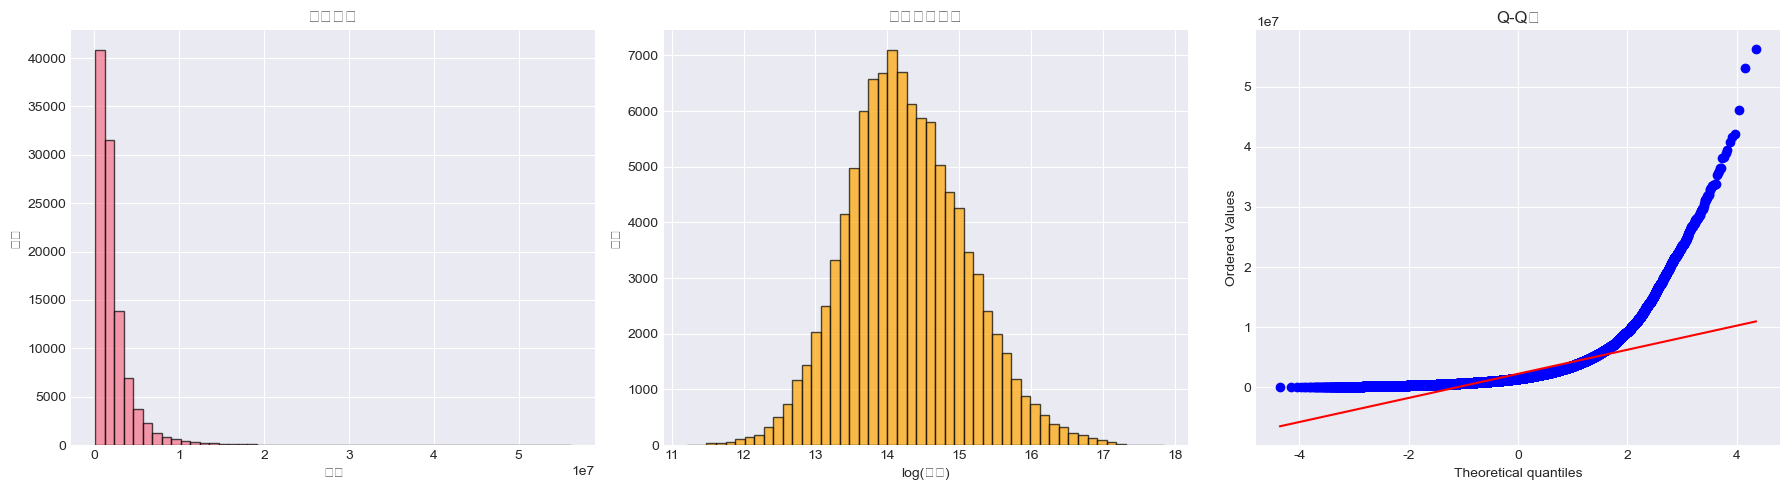

In [113]:
# ==================== 2. EDAÔºàÊé¢Á¥¢ÊÄßÊï∞ÊçÆÂàÜÊûêÔºâ====================  
print("\n" + "=" * 80)  
print("Ê≠•È™§ 2: Êé¢Á¥¢ÊÄßÊï∞ÊçÆÂàÜÊûê (EDA)")  
print("=" * 80)  

# 2.1 Âü∫Êú¨‰ø°ÊÅØ  
print("\n--- 2.1 Êï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØ ---")  
print(df.info())  

# 2.2 ÁªüËÆ°ÊèèËø∞  
print("\n--- 2.2 Êï∞ÂÄºÁâπÂæÅÁªüËÆ°ÊèèËø∞ ---")  
print(df.describe())  

# 2.3 Áº∫Â§±ÂÄºÂàÜÊûê  
print("\n--- 2.3 Áº∫Â§±ÂÄºÂàÜÊûê ---")  
missing_data = pd.DataFrame({  
    'ÁâπÂæÅ': df.columns,  
    'Áº∫Â§±Êï∞Èáè': df.isnull().sum(),  
    'Áº∫Â§±ÊØî‰æã': df.isnull().sum() / len(df) * 100  
})  
missing_data = missing_data[missing_data['Áº∫Â§±Êï∞Èáè'] > 0].sort_values('Áº∫Â§±ÊØî‰æã', ascending=False)  
print(missing_data)  

# 2.4 ÁõÆÊ†áÂèòÈáèÂàÜÊûê  
print("\n--- 2.4 ÁõÆÊ†áÂèòÈáè(Price)ÂàÜÊûê ---")  
print(f"‰ª∑Ê†ºÁªüËÆ°:\n{df['Price'].describe()}")  
print(f"\n‰ª∑Ê†ºÂÅèÂ∫¶: {df['Price'].skew():.2f}")  
print(f"‰ª∑Ê†ºÂ≥∞Â∫¶: {df['Price'].kurtosis():.2f}")  

# ÂèØËßÜÂåñ‰ª∑Ê†ºÂàÜÂ∏É  
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

# ÂéüÂßã‰ª∑Ê†ºÂàÜÂ∏É  
axes[0].hist(df['Price'], bins=50, edgecolor='black', alpha=0.7)  
axes[0].set_xlabel('‰ª∑Ê†º')  
axes[0].set_ylabel('È¢ëÊï∞')  
axes[0].set_title('‰ª∑Ê†ºÂàÜÂ∏É')  

# ÂØπÊï∞‰ª∑Ê†ºÂàÜÂ∏É  
axes[1].hist(np.log1p(df['Price']), bins=50, edgecolor='black', alpha=0.7, color='orange')  
axes[1].set_xlabel('log(‰ª∑Ê†º)')  
axes[1].set_ylabel('È¢ëÊï∞')  
axes[1].set_title('ÂØπÊï∞‰ª∑Ê†ºÂàÜÂ∏É')  

# Q-QÂõæ  
stats.probplot(df['Price'], dist="norm", plot=axes[2])  
axes[2].set_title('Q-QÂõæ')  

plt.tight_layout()  
plt.savefig('price_distribution.png', dpi=300, bbox_inches='tight')  
print("‰ª∑Ê†ºÂàÜÂ∏ÉÂõæÂ∑≤‰øùÂ≠ò‰∏∫ 'price_distribution.png'")  
plt.show()  

## Êï∞ÊçÆÊ∏ÖÊ¥óÂíåÈ¢ÑÂ§ÑÁêÜ

In [114]:
df_clean = df.copy()

In [115]:
# ==================== ÂàõÂª∫Áº∫Â§±ÂÄºÊåáÁ§∫ÂèòÈáè ====================
print("\n" + "=" * 80)
print("Ê≠•È™§ 3.0: ÂàõÂª∫Áº∫Â§±ÂÄºÊåáÁ§∫ÂèòÈáè")
print("=" * 80)

# 3.0.1 È¶ñÂÖàÊ£ÄÊµãÊâÄÊúâÊúâÁº∫Â§±ÂÄºÁöÑÁâπÂæÅ
print("\n--- 3.0.1 Ê£ÄÊµãÁº∫Â§±ÂÄº ---")
missing_info = pd.DataFrame({
    'ÁâπÂæÅÂêç': df_clean.columns,
    'Áº∫Â§±Êï∞Èáè': df_clean.isnull().sum(),
    'Áº∫Â§±ÊØî‰æã': df_clean.isnull().sum() / len(df_clean) * 100
})
missing_info = missing_info[missing_info['Áº∫Â§±Êï∞Èáè'] > 0].sort_values('Áº∫Â§±ÊØî‰æã', ascending=False)

print(f"\nÂèëÁé∞ {len(missing_info)} ‰∏™ÁâπÂæÅÊúâÁº∫Â§±ÂÄº:")
print(missing_info.to_string(index=False))

# 3.0.2 ‰∏∫ÊØè‰∏™ÊúâÁº∫Â§±ÂÄºÁöÑÁâπÂæÅÂàõÂª∫ÊåáÁ§∫ÂèòÈáè
print("\n--- 3.0.2 ÂàõÂª∫Áº∫Â§±ÊåáÁ§∫ÂèòÈáè ---")

# ÈÄê‰∏™ÂàõÂª∫Áº∫Â§±ÊåáÁ§∫ÂèòÈáè
for feature in missing_info['ÁâπÂæÅÂêç']:
    # ÂàõÂª∫Áº∫Â§±ÊåáÁ§∫ÂèòÈáèÂêç
    indicator_name = f'{feature}_Áº∫Â§±'
    
    # ÂàõÂª∫0/1ÂèòÈáèÔºö1Ë°®Á§∫Áº∫Â§±Ôºå0Ë°®Á§∫ÈùûÁº∫Â§±
    df_clean[indicator_name] = df_clean[feature].isnull().astype(int)
    
    # ÁªüËÆ°‰ø°ÊÅØ
    missing_count = df_clean[indicator_name].sum()
    missing_pct = missing_count / len(df_clean) * 100
    
    print(f"‚úì Â∑≤ÂàõÂª∫ '{indicator_name}': Áº∫Â§±Ê†∑Êú¨Êï∞ = {missing_count} ({missing_pct:.2f}%)")

# 3.0.3 È™åËØÅÂàõÂª∫ÁöÑÊåáÁ§∫ÂèòÈáè
print("\n--- 3.0.3 È™åËØÅÁº∫Â§±ÊåáÁ§∫ÂèòÈáè ---")

# ÁªüËÆ°ÊâÄÊúâÁº∫Â§±ÊåáÁ§∫ÂèòÈáè
missing_indicator_cols = [col for col in df_clean.columns if col.endswith('_Áº∫Â§±')]
print(f"\nÊÄªÂÖ±ÂàõÂª∫‰∫Ü {len(missing_indicator_cols)} ‰∏™Áº∫Â§±ÊåáÁ§∫ÂèòÈáè")

# ÊòæÁ§∫Ââç10‰∏™Áº∫Â§±ÊåáÁ§∫ÂèòÈáèÁöÑÁªüËÆ°
print("\nÂâç10‰∏™Áº∫Â§±ÊåáÁ§∫ÂèòÈáèÁöÑÁªüËÆ°:")
for col in missing_indicator_cols[:10]:
    original_col = col.replace('_Áº∫Â§±', '')
    missing_count = df_clean[col].sum()
    print(f"{col:40s}: {missing_count:6d} ‰∏™Áº∫Â§± ({missing_count/len(df_clean)*100:5.2f}%)")

# 3.0.4 Êü•ÁúãÊüê‰∫õÂÖ∑‰ΩìÁâπÂæÅÁöÑÁº∫Â§±ÊåáÁ§∫ÂèòÈáèÁ§∫‰æã
print("\n--- 3.0.4 Áº∫Â§±ÊåáÁ§∫ÂèòÈáèÁ§∫‰æã ---")

# ÈÄâÊã©Âá†‰∏™ÂÖ≥ÈîÆÁâπÂæÅÂ±ïÁ§∫
example_features = ['Â•óÂÜÖÈù¢ÁßØ', 'ÊàøÂ±ãÊà∑Âûã', 'Âà´Â¢ÖÁ±ªÂûã', '‰∏äÊ¨°‰∫§Êòì', 'ÊäµÊäº‰ø°ÊÅØ']
example_features = [f for f in example_features if f in df_clean.columns]

if example_features:
    print("\nÂÖ≥ÈîÆÁâπÂæÅÁöÑÁº∫Â§±ÊÉÖÂÜµÁ§∫‰æãÔºàÂâç10Ë°åÔºâ:")
    for feat in example_features[:3]:  # Âè™Â±ïÁ§∫Ââç3‰∏™
        if f'{feat}_Áº∫Â§±' in df_clean.columns:
            print(f"\nÁâπÂæÅ: {feat}")
            print(df_clean[[feat, f'{feat}_Áº∫Â§±']].head(10).to_string())


Ê≠•È™§ 3.0: ÂàõÂª∫Áº∫Â§±ÂÄºÊåáÁ§∫ÂèòÈáè

--- 3.0.1 Ê£ÄÊµãÁº∫Â§±ÂÄº ---

ÂèëÁé∞ 42 ‰∏™ÁâπÂæÅÊúâÁº∫Â§±ÂÄº:
      ÁâπÂæÅÂêç   Áº∫Â§±Êï∞Èáè       Áº∫Â§±ÊØî‰æã
     ÊäµÊäº‰ø°ÊÅØ 103871 100.000000
     Âà´Â¢ÖÁ±ªÂûã 102428  98.610777
     ÁéØÁ∫ø‰ΩçÁΩÆ  75774  72.950102
     Êà∑Âûã‰ªãÁªç  75100  72.301220
       ‰æõÊöñ  72926  70.208239
      ‰æõÁÉ≠Ë¥π  72488  69.786562
   Áâ©‰∏öÂäûÂÖ¨ÁîµËØù  68935  66.365973
     Â•óÂÜÖÈù¢ÁßØ  67887  65.357029
       ÁéØÁ∫ø  63452  61.087310
     ÊàøÂ±ãÂπ¥Èôê  44510  42.851229
     ‰∫§ÈÄöÂá∫Ë°å  43264  41.651664
     Âë®ËæπÈÖçÂ•ó  43138  41.530360
     Áâ©‰∏öÂÖ¨Âè∏  37908  36.495268
      ÂºÄÂèëÂïÜ  36141  34.794120
     ÂÅúËΩ¶Ë¥πÁî®  35553  34.228033
     Âª∫Á≠ëÂπ¥‰ª£  35101  33.792878
      ÂÅúËΩ¶‰Ωç  34568  33.279741
    ÂÆπ ÁßØ Áéá  33154  31.918437
    Áªø Âåñ Áéá  32883  31.657537
      ÁáÉÊ∞îË¥π  32701  31.482319
    Áâ© ‰∏ö Ë¥π  31158  29.996823
       ‰æõÊ∞¥  30298  29.168873
       ‰æõÁîµ  30292  29.163097
Âª∫Á≠ëÁªìÊûÑ_comm  29119  28.033811
     ‰

In [116]:
# ==================== Â§ÑÁêÜÁéØÁ∫ø‰ø°ÊÅØ====================
print("\n--- Â§ÑÁêÜÁéØÁ∫ø‰ø°ÊÅØ ---")



# ÂÆö‰πâÊØè‰∏™ÂüéÂ∏ÇÁöÑÁéØÁ∫øÈ°∫Â∫èÔºà‰ªéÂÜÖÂà∞Â§ñÔºâ
ring_order = {
    0: ['‰∫åÁéØÂÜÖ', '‰∫åËá≥‰∏âÁéØ', '‰∏âËá≥ÂõõÁéØ', 'ÂõõËá≥‰∫îÁéØ', '‰∫îËá≥ÂÖ≠ÁéØ', 'ÂÖ≠ÁéØÂ§ñ'],
    2: ['ÂÜÖÁéØÂÜÖ', 'ÂÜÖÁéØËá≥Â§ñÁéØ', 'Â§ñÁéØÂ§ñ'],
    3: ['ÂÜÖÁéØÂÜÖ', 'ÂÜÖÁéØËá≥‰∏≠ÁéØ', '‰∏≠ÁéØËá≥Â§ñÁéØ', 'Â§ñÁéØÂ§ñ'],
    4: ['ÂÜÖÁéØÂÜÖ', 'ÂÜÖÁéØËá≥‰∏≠ÁéØ', '‰∏≠ÁéØËá≥Â§ñÁéØ', 'Â§ñÁéØÂ§ñ'],
    7: ['ÂÜÖÁéØÂÜÖ', '‰∏≠ÁéØËá≥Â§ñÁéØ']
}

# ÂàõÂª∫ÂΩí‰∏ÄÂåñÊò†Â∞Ñ
ring_normalized = {}
for city, rings in ring_order.items():
    n = len(rings)
    if n > 1:
        ring_normalized.update({(city, ring): i / (n - 1) for i, ring in enumerate(rings)})
    else:
        ring_normalized[(city, rings[0])] = 0.5  # Âè™Êúâ‰∏Ä‰∏™ÁéØÁ∫øÊó∂ËÆæ‰∏∫0.5

# Â∫îÁî®ÂΩí‰∏ÄÂåñ
df_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] = df_clean.apply(
    lambda row: ring_normalized.get((row['ÂüéÂ∏Ç'], row['ÁéØÁ∫ø']), np.nan), axis=1
)

# Áî®ÊâÄÂú®Âå∫ÂüüÁöÑ‰∏≠‰ΩçÊï∞Â°´ÂÖÖÁº∫Â§±ÂÄº
df_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] = df_clean.groupby('Âå∫Âüü')['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].transform(
    lambda x: x.fillna(x.median())
)

# Â¶ÇÊûúÂå∫Âüü‰∏≠‰ΩçÊï∞‰πüÊòØNaNÔºåÁî®ÂüéÂ∏ÇÁöÑ‰∏≠‰ΩçÊï∞Â°´ÂÖÖ
df_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] = df_clean.groupby('ÂüéÂ∏Ç')['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].transform(
    lambda x: x.fillna(x.median())
)

# Â¶ÇÊûúËøòÊúâÁº∫Â§±ÔºåÁî®ÂÖ®Â±Ä‰∏≠‰ΩçÊï∞Â°´ÂÖÖ
df_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].fillna(df_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].median(), inplace=True)

print(f"ÁéØÁ∫øÂΩí‰∏ÄÂåñÂÆåÊàê")
print(f"ÂΩí‰∏ÄÂåñÂêéÁªüËÆ°:\n{df_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].describe()}")
print(f"\nÂêÑÂüéÂ∏ÇÁéØÁ∫øÂàÜÂ∏É:")
print(df_clean.groupby('ÂüéÂ∏Ç')['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].agg(['mean', 'median', 'min', 'max', 'count']))




#############################################################################################




--- Â§ÑÁêÜÁéØÁ∫ø‰ø°ÊÅØ ---
ÁéØÁ∫øÂΩí‰∏ÄÂåñÂÆåÊàê
ÂΩí‰∏ÄÂåñÂêéÁªüËÆ°:
count    103871.000000
mean          0.440063
std           0.317317
min           0.000000
25%           0.333333
50%           0.400000
75%           0.600000
max           1.000000
Name: ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ, dtype: float64

ÂêÑÂüéÂ∏ÇÁéØÁ∫øÂàÜÂ∏É:
        mean    median       min       max  count
ÂüéÂ∏Ç                                               
0   0.603796  0.600000  0.000000  1.000000  16491
1   0.400000  0.400000  0.400000  0.400000   6437
2   0.189710  0.000000  0.000000  1.000000  24996
3   0.634190  0.666667  0.000000  1.000000  21472
4   0.574834  0.666667  0.000000  1.000000   4363
5   0.333333  0.333333  0.333333  0.333333   3582
6   0.400000  0.400000  0.400000  0.400000   2281
7   0.826014  1.000000  0.000000  1.000000   1184
8   0.400000  0.400000  0.400000  0.400000   5931
9   0.400000  0.400000  0.400000  0.400000   1323
10  0.400000  0.400000  0.400000  0.400000  15057
11  0.400000  0.400000  0.400

In [117]:
# ==================== ÊàøÂ±ãÊà∑ÂûãÁâπÂæÅÊèêÂèñ ====================

import re

def extract_room_info_optimized(room_str):
    """
    ÊèêÂèñÊàøÂ±ãÊà∑Âûã‰∏≠ÁöÑÊàøÈó¥Êï∞Èáè
    Â§ÑÁêÜÊ†ºÂºèÔºö
    1. "XÂÆ§XÂéÖXÂé®XÂç´" - Ê†áÂáÜÊ†ºÂºè
    2. "XÊàøÈó¥XÂç´" - ÁÆÄÂåñÊ†ºÂºè
    3. Á©∫ÂÄº/Áº∫Â§±ÂÄº
    """
    if pd.isna(room_str) or room_str == '':
        return {
            'ÂçßÂÆ§Êï∞Èáè': np.nan,
            'ÂÆ¢ÂéÖÊï∞Èáè': np.nan,
            'Âé®ÊàøÊï∞Èáè': np.nan,
            'Âç´ÁîüÈó¥Êï∞Èáè': np.nan
        }
    
    room_str = str(room_str).strip()
    
    # ÂàùÂßãÂåñÁªìÊûú
    result = {
        'ÂçßÂÆ§Êï∞Èáè': np.nan,
        'ÂÆ¢ÂéÖÊï∞Èáè': np.nan,
        'Âé®ÊàøÊï∞Èáè': np.nan,
        'Âç´ÁîüÈó¥Êï∞Èáè': np.nan
    }
    
    # ÊèêÂèñÂçßÂÆ§Êï∞Èáè (ÂÆ§)
    bedroom_match = re.search(r'(\d+)ÂÆ§', room_str)
    if bedroom_match:
        result['ÂçßÂÆ§Êï∞Èáè'] = int(bedroom_match.group(1))
    
    # Â¶ÇÊûúÊ≤°Êúâ"ÂÆ§"ÔºåÂ∞ùËØï"ÊàøÈó¥"
    if pd.isna(result['ÂçßÂÆ§Êï∞Èáè']):
        room_match = re.search(r'(\d+)ÊàøÈó¥', room_str)
        if room_match:
            result['ÂçßÂÆ§Êï∞Èáè'] = int(room_match.group(1))
    
    # ÊèêÂèñÂÆ¢ÂéÖÊï∞Èáè (ÂéÖ)
    living_match = re.search(r'(\d+)ÂéÖ', room_str)
    if living_match:
        result['ÂÆ¢ÂéÖÊï∞Èáè'] = int(living_match.group(1))
    else:
        # Â¶ÇÊûúÊ≤°ÊúâÊòéÁ°ÆÊ†áÊ≥®ÂÆ¢ÂéÖÔºåÈªòËÆ§‰∏∫0ÔºàÂ¶Ç"XÊàøÈó¥XÂç´"Ê†ºÂºèÔºâ
        if 'ÊàøÈó¥' in room_str:
            result['ÂÆ¢ÂéÖÊï∞Èáè'] = 0
    
    # ÊèêÂèñÂé®ÊàøÊï∞Èáè (Âé®)
    kitchen_match = re.search(r'(\d+)Âé®', room_str)
    if kitchen_match:
        result['Âé®ÊàøÊï∞Èáè'] = int(kitchen_match.group(1))
    else:
        # Â¶ÇÊûúÊ≤°ÊúâÊòéÁ°ÆÊ†áÊ≥®Âé®ÊàøÔºåÈªòËÆ§‰∏∫0ÔºàÂ¶Ç"XÊàøÈó¥XÂç´"Ê†ºÂºèÔºâ
        if 'ÊàøÈó¥' in room_str:
            result['Âé®ÊàøÊï∞Èáè'] = 0
    
    # ÊèêÂèñÂç´ÁîüÈó¥Êï∞Èáè (Âç´)
    bathroom_match = re.search(r'(\d+)Âç´', room_str)
    if bathroom_match:
        result['Âç´ÁîüÈó¥Êï∞Èáè'] = int(bathroom_match.group(1))
    
    return result

# ==================== Â∫îÁî®Âà∞Êï∞ÊçÆÈõÜ ====================

print("=" * 80)
print("ÊèêÂèñÊàøÂ±ãÊà∑ÂûãÁâπÂæÅ")
print("=" * 80)

# Â∫îÁî®ÊèêÂèñÂáΩÊï∞
room_features = df_clean['ÊàøÂ±ãÊà∑Âûã'].apply(extract_room_info_optimized)

# Â∞ÜÂ≠óÂÖ∏ËΩ¨Êç¢‰∏∫DataFrame
room_features_df = pd.DataFrame(room_features.tolist())

# Ê∑ªÂä†Âà∞ÂéüÊï∞ÊçÆÈõÜ
df_clean['ÂçßÂÆ§Êï∞Èáè'] = room_features_df['ÂçßÂÆ§Êï∞Èáè']
df_clean['ÂÆ¢ÂéÖÊï∞Èáè'] = room_features_df['ÂÆ¢ÂéÖÊï∞Èáè']
df_clean['Âé®ÊàøÊï∞Èáè'] = room_features_df['Âé®ÊàøÊï∞Èáè']
df_clean['Âç´ÁîüÈó¥Êï∞Èáè'] = room_features_df['Âç´ÁîüÈó¥Êï∞Èáè']

# ==================== È™åËØÅÊèêÂèñÁªìÊûú ====================

print("\n--- ÊèêÂèñÁªìÊûúÈ™åËØÅ ---")
print("\nÂéüÂßãÊï∞ÊçÆ vs ÊèêÂèñÁªìÊûúÔºàÂâç20Ë°åÔºâÔºö")
validation_df = pd.DataFrame({
    'ÊàøÂ±ãÊà∑Âûã': df_clean['ÊàøÂ±ãÊà∑Âûã'].head(20),
    'ÂçßÂÆ§': df_clean['ÂçßÂÆ§Êï∞Èáè'].head(20),
    'ÂÆ¢ÂéÖ': df_clean['ÂÆ¢ÂéÖÊï∞Èáè'].head(20),
    'Âé®Êàø': df_clean['Âé®ÊàøÊï∞Èáè'].head(20),
    'Âç´ÁîüÈó¥': df_clean['Âç´ÁîüÈó¥Êï∞Èáè'].head(20)
})
print(validation_df.to_string(index=False))



# 1. ÂçßÂÆ§Âç´ÁîüÈó¥ÊØî‰æã
df_clean['ÂçßÂç´ÊØî'] = df_clean['ÂçßÂÆ§Êï∞Èáè'] / (df_clean['Âç´ÁîüÈó¥Êï∞Èáè'] + 1)

# 2. ÊàøÂûãÂÆåÊï¥ÊÄßÔºàÊòØÂê¶ÊâÄÊúâ‰ø°ÊÅØÈÉΩÈΩêÂÖ®Ôºâ
df_clean['ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥'] = (
    df_clean['ÂçßÂÆ§Êï∞Èáè'].notna() & 
    df_clean['ÂÆ¢ÂéÖÊï∞Èáè'].notna() & 
    df_clean['Âé®ÊàøÊï∞Èáè'].notna() & 
    df_clean['Âç´ÁîüÈó¥Êï∞Èáè'].notna()
).astype(int)

print(f"ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥ÊØî‰æã: {df_clean['ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥'].mean():.2%}")


new_room_features = [
    'ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè',
    'ÂçßÂç´ÊØî', 'ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥'
]

print(f"\nÊñ∞Â¢ûÊàøÈó¥Áõ∏ÂÖ≥ÁâπÂæÅ: {new_room_features}")

print("\n" + "=" * 80)
print("ÊàøÂ±ãÊà∑ÂûãÁâπÂæÅÊèêÂèñÂÆåÊàêÔºÅ")
print("=" * 80)

ÊèêÂèñÊàøÂ±ãÊà∑ÂûãÁâπÂæÅ

--- ÊèêÂèñÁªìÊûúÈ™åËØÅ ---

ÂéüÂßãÊï∞ÊçÆ vs ÊèêÂèñÁªìÊûúÔºàÂâç20Ë°åÔºâÔºö
    ÊàøÂ±ãÊà∑Âûã  ÂçßÂÆ§  ÂÆ¢ÂéÖ  Âé®Êàø  Âç´ÁîüÈó¥
2ÂÆ§1ÂéÖ1Âé®1Âç´ 2.0 1.0 1.0  1.0
3ÂÆ§1ÂéÖ1Âé®1Âç´ 3.0 1.0 1.0  1.0
3ÂÆ§2ÂéÖ1Âé®2Âç´ 3.0 2.0 1.0  2.0
6ÂÆ§3ÂéÖ1Âé®3Âç´ 6.0 3.0 1.0  3.0
   1ÊàøÈó¥1Âç´ 1.0 0.0 0.0  1.0
5ÂÆ§2ÂéÖ1Âé®4Âç´ 5.0 2.0 1.0  4.0
3ÂÆ§2ÂéÖ1Âé®2Âç´ 3.0 2.0 1.0  2.0
     NaN NaN NaN NaN  NaN
3ÂÆ§1ÂéÖ1Âé®2Âç´ 3.0 1.0 1.0  2.0
5ÂÆ§3ÂéÖ1Âé®4Âç´ 5.0 3.0 1.0  4.0
3ÂÆ§2ÂéÖ1Âé®3Âç´ 3.0 2.0 1.0  3.0
2ÂÆ§1ÂéÖ1Âé®1Âç´ 2.0 1.0 1.0  1.0
3ÂÆ§2ÂéÖ1Âé®3Âç´ 3.0 2.0 1.0  3.0
1ÂÆ§1ÂéÖ1Âé®1Âç´ 1.0 1.0 1.0  1.0
3ÂÆ§2ÂéÖ1Âé®2Âç´ 3.0 2.0 1.0  2.0
2ÂÆ§1ÂéÖ1Âé®1Âç´ 2.0 1.0 1.0  1.0
   2ÊàøÈó¥1Âç´ 2.0 0.0 0.0  1.0
2ÂÆ§1ÂéÖ1Âé®1Âç´ 2.0 1.0 1.0  1.0
2ÂÆ§1ÂéÖ1Âé®1Âç´ 2.0 1.0 1.0  1.0
4ÂÆ§3ÂéÖ1Âé®2Âç´ 4.0 3.0 1.0  2.0
ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥ÊØî‰æã: 99.44%

Êñ∞Â¢ûÊàøÈó¥Áõ∏ÂÖ≥ÁâπÂæÅ: ['ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè', 'ÂçßÂç´ÊØî', 'ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥']

ÊàøÂ±ãÊà∑ÂûãÁâπÂ

In [118]:
# ==================== Â§ÑÁêÜÊ•ºÂ±ÇÁâπÂæÅ====================
print("\n---Â§ÑÁêÜÊ•ºÂ±ÇÁâπÂæÅ---")

def extract_floor_info_improved(floor_str):
    """
    ÊèêÂèñÊ•ºÂ±Ç‰ø°ÊÅØ
    ËøîÂõû: (ÂΩìÂâçÊ•ºÂ±Ç0-1Êï∞ÂÄº, ÊÄªÊ•ºÂ±ÇÊï∞, Ê•ºÂ±Ç‰ΩçÁΩÆÊñáÊú¨)
    
    ÂΩìÂâçÊ•ºÂ±ÇÊò†Â∞ÑËßÑÂàô:
    - Âú∞‰∏ãÂÆ§: 0
    - Â∫ïÂ±Ç: 0.1
    - ‰ΩéÊ•ºÂ±Ç: 0.3
    - ‰∏≠Ê•ºÂ±Ç: 0.5
    - È´òÊ•ºÂ±Ç: 0.8
    - È°∂Â±Ç: 1
    - ÂÖ∂‰ªñ/Á©∫ÁôΩ: nan
    """
    if pd.isna(floor_str) or str(floor_str).strip() == '':
        return np.nan, np.nan, np.nan
    
    floor_str = str(floor_str).strip()
    
    # ÊèêÂèñÊÄªÊ•ºÂ±ÇÊï∞Ôºà‰ªéÊã¨Âè∑‰∏≠ÊèêÂèñÔºâ
    total_match = re.search(r'ÂÖ±(\d+)Â±Ç', floor_str)
    total_floor = int(total_match.group(1)) if total_match else np.nan
    
    # ÂÆö‰πâÊ•ºÂ±Ç‰ΩçÁΩÆÂà∞Êï∞ÂÄºÁöÑÊò†Â∞Ñ
    floor_mapping = {
        'Âú∞‰∏ãÂÆ§': 0.0,
        'Â∫ïÂ±Ç': 0.1,
        '‰ΩéÊ•ºÂ±Ç': 0.3,
        '‰∏≠Ê•ºÂ±Ç': 0.5,
        'È´òÊ•ºÂ±Ç': 0.8,
        'È°∂Â±Ç': 1.0
    }
    
    # ËØÜÂà´ÂΩìÂâçÊ•ºÂ±ÇÁ±ªÂûã
    current_floor_value = np.nan
    floor_position = 'Êú™Áü•'
    
    for position, value in floor_mapping.items():
        if position in floor_str:
            current_floor_value = value
            floor_position = position
            break
    
    return current_floor_value, total_floor, floor_position

# Â∫îÁî®ÂáΩÊï∞
print("Â§ÑÁêÜÊ•ºÂ±Ç‰ø°ÊÅØ...")
floor_info = df_clean['ÊâÄÂú®Ê•ºÂ±Ç'].apply(lambda x: extract_floor_info_improved(x))

df_clean['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1'] = floor_info.apply(lambda x: x[0])
df_clean['ÊÄªÊ•ºÂ±ÇÊï∞'] = floor_info.apply(lambda x: x[1])
df_clean['Ê•ºÂ±Ç‰ΩçÁΩÆ'] = floor_info.apply(lambda x: x[2])

# Êü•ÁúãÂ§ÑÁêÜÁªìÊûú
print("\nÊ•ºÂ±Ç‰ΩçÁΩÆÂàÜÂ∏É:")
print(df_clean['Ê•ºÂ±Ç‰ΩçÁΩÆ'].value_counts())

print("\nÂΩìÂâçÊ•ºÂ±Ç(0-1Êï∞ÂÄº)ÁöÑÁªüËÆ°:")
print(df_clean['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1'].describe())

print("\nÂΩìÂâçÊ•ºÂ±Ç(0-1Êï∞ÂÄº)ÁöÑÂèñÂÄºÂàÜÂ∏É:")
print(df_clean['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1'].value_counts().sort_index())

print("\nÊÄªÊ•ºÂ±ÇÊï∞ÁªüËÆ°:")
print(df_clean['ÊÄªÊ•ºÂ±ÇÊï∞'].describe())

# Â±ïÁ§∫‰∏Ä‰∫õÁ§∫‰æã
print("\nÂ§ÑÁêÜÁ§∫‰æãÔºàÂâç20Ë°åÔºâ:")
sample_df = pd.DataFrame({
    'ÂéüÂßãÊâÄÂú®Ê•ºÂ±Ç': df_clean['ÊâÄÂú®Ê•ºÂ±Ç'].head(20),
    'ÂΩìÂâçÊ•ºÂ±Ç(0-1)': df_clean['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1'].head(20),
    'ÊÄªÊ•ºÂ±ÇÊï∞': df_clean['ÊÄªÊ•ºÂ±ÇÊï∞'].head(20),
    'Ê•ºÂ±Ç‰ΩçÁΩÆ': df_clean['Ê•ºÂ±Ç‰ΩçÁΩÆ'].head(20)
})
print(sample_df.to_string(index=True))


---Â§ÑÁêÜÊ•ºÂ±ÇÁâπÂæÅ---
Â§ÑÁêÜÊ•ºÂ±Ç‰ø°ÊÅØ...

Ê•ºÂ±Ç‰ΩçÁΩÆÂàÜÂ∏É:
Ê•ºÂ±Ç‰ΩçÁΩÆ
‰∏≠Ê•ºÂ±Ç    36251
È´òÊ•ºÂ±Ç    32132
‰ΩéÊ•ºÂ±Ç    30668
È°∂Â±Ç      2264
Â∫ïÂ±Ç      1854
Âú∞‰∏ãÂÆ§      702
Name: count, dtype: int64

ÂΩìÂâçÊ•ºÂ±Ç(0-1Êï∞ÂÄº)ÁöÑÁªüËÆ°:
count    103871.000000
mean          0.534133
std           0.220184
min           0.000000
25%           0.300000
50%           0.500000
75%           0.800000
max           1.000000
Name: ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1, dtype: float64

ÂΩìÂâçÊ•ºÂ±Ç(0-1Êï∞ÂÄº)ÁöÑÂèñÂÄºÂàÜÂ∏É:
ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1
0.0      702
0.1     1854
0.3    30668
0.5    36251
0.8    32132
1.0     2264
Name: count, dtype: int64

ÊÄªÊ•ºÂ±ÇÊï∞ÁªüËÆ°:
count    103871.000000
mean         18.272184
std          10.983698
min           0.000000
25%           7.000000
50%          18.000000
75%          28.000000
max          70.000000
Name: ÊÄªÊ•ºÂ±ÇÊï∞, dtype: float64

Â§ÑÁêÜÁ§∫‰æãÔºàÂâç20Ë°åÔºâ:
        ÂéüÂßãÊâÄÂú®Ê•ºÂ±Ç  ÂΩìÂâçÊ•ºÂ±Ç(0-1)  ÊÄªÊ•ºÂ±ÇÊï∞ Ê•ºÂ±Ç‰ΩçÁΩÆ
0    ‰∏≠Ê•ºÂ±Ç (

In [119]:
# ==================== Â§ÑÁêÜÂª∫Á≠ëÈù¢ÁßØÂíåÂ•óÂÜÖÈù¢ÁßØ ====================

def extract_area_value(area_str):
    """
    ÊèêÂèñÈù¢ÁßØÊï∞ÂÄº
    ÂèÇÊï∞Ôºö
        area_str: Èù¢ÁßØÂ≠óÁ¨¶‰∏≤ÔºåÂ¶Ç "52.3„é°", "127.44„é°", "" Á≠â
    ËøîÂõûÔºö
        float: ÊèêÂèñÁöÑÊï∞ÂÄºÔºåÂ¶ÇÊûúÊó†Êï∞ÊçÆÂàôËøîÂõû np.nan
    """
    # Â§ÑÁêÜÁ©∫ÂÄº„ÄÅÁ©∫Â≠óÁ¨¶‰∏≤„ÄÅÁ∫ØÁ©∫Ê†ºÁöÑÊÉÖÂÜµ
    if pd.isna(area_str) or str(area_str).strip() == '':
        return np.nan
    
    # ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤Âπ∂ÂéªÈô§È¶ñÂ∞æÁ©∫Ê†º
    area_str = str(area_str).strip()
    
    # Â¶ÇÊûúÂ≠óÁ¨¶‰∏≤‰∏∫Á©∫ÔºåËøîÂõûnan
    if not area_str:
        return np.nan
    
    # ‰ΩøÁî®Ê≠£ÂàôË°®ËææÂºèÊèêÂèñÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞ÁÇπÔºâ
    # ÂåπÈÖçÊ®°ÂºèÔºöÂèØËÉΩÁöÑË¥üÂè∑ + Êï∞Â≠ó + ÂèØËÉΩÁöÑÂ∞èÊï∞ÁÇπÂíåÂ∞èÊï∞ÈÉ®ÂàÜ
    match = re.search(r'(\d+\.?\d*)', area_str)
    
    if match:
        try:
            return float(match.group(1))
        except ValueError:
            return np.nan
    else:
        return np.nan

# Â∫îÁî®Âà∞Âª∫Á≠ëÈù¢ÁßØÂàó
print("Â§ÑÁêÜÂª∫Á≠ëÈù¢ÁßØ...")
df_clean['Âª∫Á≠ëÈù¢ÁßØ_clean'] = df_clean['Âª∫Á≠ëÈù¢ÁßØ'].apply(extract_area_value)

# Â∫îÁî®Âà∞Â•óÂÜÖÈù¢ÁßØÂàó
print("Â§ÑÁêÜÂ•óÂÜÖÈù¢ÁßØ...")
df_clean['Â•óÂÜÖÈù¢ÁßØ_clean'] = df_clean['Â•óÂÜÖÈù¢ÁßØ'].apply(extract_area_value)

# Êü•ÁúãÂ§ÑÁêÜÁªìÊûú
print("\nÂ§ÑÁêÜÂêéÁöÑÂâç20Ë°åÊï∞ÊçÆÂØπÊØîÔºö")
comparison_df = pd.DataFrame({
    'ÂéüÂßãÂª∫Á≠ëÈù¢ÁßØ': df_clean['Âª∫Á≠ëÈù¢ÁßØ'].head(20),
    'Â§ÑÁêÜÂêéÂª∫Á≠ëÈù¢ÁßØ': df_clean['Âª∫Á≠ëÈù¢ÁßØ_clean'].head(20),
    'ÂéüÂßãÂ•óÂÜÖÈù¢ÁßØ': df_clean['Â•óÂÜÖÈù¢ÁßØ'].head(20),
    'Â§ÑÁêÜÂêéÂ•óÂÜÖÈù¢ÁßØ': df_clean['Â•óÂÜÖÈù¢ÁßØ_clean'].head(20)
})
print(comparison_df.to_string())

# ÁªüËÆ°‰ø°ÊÅØ
print("\n" + "="*60)
print("Âª∫Á≠ëÈù¢ÁßØÁªüËÆ°‰ø°ÊÅØÔºö")
print(f"  - ÊÄªÊ†∑Êú¨Êï∞: {len(df_clean)}")
print(f"  - ÊúâÊïàÂÄºÊï∞Èáè: {df_clean['Âª∫Á≠ëÈù¢ÁßØ_clean'].notna().sum()}")
print(f"  - Áº∫Â§±ÂÄºÊï∞Èáè: {df_clean['Âª∫Á≠ëÈù¢ÁßØ_clean'].isna().sum()}")
print(f"  - Áº∫Â§±Áéá: {df_clean['Âª∫Á≠ëÈù¢ÁßØ_clean'].isna().sum() / len(df_clean) * 100:.2f}%")
print(f"\nÊï∞ÂÄºÁªüËÆ°Ôºö")
print(df_clean['Âª∫Á≠ëÈù¢ÁßØ_clean'].describe())

print("\n" + "="*60)
print("Â•óÂÜÖÈù¢ÁßØÁªüËÆ°‰ø°ÊÅØÔºö")
print(f"  - ÊÄªÊ†∑Êú¨Êï∞: {len(df_clean)}")
print(f"  - ÊúâÊïàÂÄºÊï∞Èáè: {df_clean['Â•óÂÜÖÈù¢ÁßØ_clean'].notna().sum()}")
print(f"  - Áº∫Â§±ÂÄºÊï∞Èáè: {df_clean['Â•óÂÜÖÈù¢ÁßØ_clean'].isna().sum()}")
print(f"  - Áº∫Â§±Áéá: {df_clean['Â•óÂÜÖÈù¢ÁßØ_clean'].isna().sum() / len(df_clean) * 100:.2f}%")
print(f"\nÊï∞ÂÄºÁªüËÆ°Ôºö")
print(df_clean['Â•óÂÜÖÈù¢ÁßØ_clean'].describe())

# ËÆ°ÁÆóÂæóÊàøÁéáÔºàÂ•óÂÜÖÈù¢ÁßØ/Âª∫Á≠ëÈù¢ÁßØÔºâ
print("\n" + "="*60)
print("ËÆ°ÁÆóÂæóÊàøÁéá...")
df_clean['ÂæóÊàøÁéá'] = df_clean['Â•óÂÜÖÈù¢ÁßØ_clean'] / df_clean['Âª∫Á≠ëÈù¢ÁßØ_clean']

Â§ÑÁêÜÂª∫Á≠ëÈù¢ÁßØ...
Â§ÑÁêÜÂ•óÂÜÖÈù¢ÁßØ...

Â§ÑÁêÜÂêéÁöÑÂâç20Ë°åÊï∞ÊçÆÂØπÊØîÔºö
     ÂéüÂßãÂª∫Á≠ëÈù¢ÁßØ  Â§ÑÁêÜÂêéÂª∫Á≠ëÈù¢ÁßØ   ÂéüÂßãÂ•óÂÜÖÈù¢ÁßØ  Â§ÑÁêÜÂêéÂ•óÂÜÖÈù¢ÁßØ
0     52.3„é°    52.30      NaN      NaN
1   127.44„é°   127.44   123.7„é°   123.70
2   118.02„é°   118.02  101.95„é°   101.95
3   293.23„é°   293.23  293.23„é°   293.23
4    39.85„é°    39.85   29.94„é°    29.94
5   259.72„é°   259.72      NaN      NaN
6    134.1„é°   134.10  108.16„é°   108.16
7    12.74„é°    12.74      NaN      NaN
8   192.12„é°   192.12      NaN      NaN
9   288.96„é°   288.96  273.48„é°   273.48
10  250.35„é°   250.35  212.88„é°   212.88
11    90.6„é°    90.60   81.03„é°    81.03
12  221.56„é°   221.56  181.04„é°   181.04
13   49.97„é°    49.97   33.22„é°    33.22
14  147.19„é°   147.19      NaN      NaN
15   70.95„é°    70.95      NaN      NaN
16   46.06„é°    46.06    33.6„é°    33.60
17    82.4„é°    82.40      NaN      NaN
18   84.26„é°    84.26   73.44„é°    73.44
19  295.01„é°   295.01   

In [120]:
# ==================== 3.4 Â§ÑÁêÜÊàøÂ±ãÊúùÂêëÔºàÂÖ´‰∏™ÊñπÂêëÔºâ====================
print("\n--- 3.4 Â§ÑÁêÜÊúùÂêëÁâπÂæÅÔºàÂÖ´‰∏™ÊñπÂêëÔºâ---")

def extract_orientation_features(orientation_str):
    """
    ÊèêÂèñÊàøÂ±ãÊúùÂêëÁöÑÂÖ´‰∏™ÊñπÂêëÁâπÂæÅ
    ËøîÂõûÔºö‰∏ú„ÄÅÂçó„ÄÅË•ø„ÄÅÂåó„ÄÅ‰∏úÂçó„ÄÅ‰∏úÂåó„ÄÅË•øÂçó„ÄÅË•øÂåóÁöÑ0/1Ê†áËÆ∞
    Â¶ÇÊûúÂéüÂßãÊï∞ÊçÆ‰∏∫Á©∫ÔºåÂàôËøîÂõûnan
    """
    # Â¶ÇÊûúÊòØÁ©∫ÂÄºÔºåËøîÂõûÂÖ®nan
    if pd.isna(orientation_str):
        return {
            'Êúù‰∏ú': np.nan,
            'ÊúùÂçó': np.nan,
            'ÊúùË•ø': np.nan,
            'ÊúùÂåó': np.nan,
            'Êúù‰∏úÂçó': np.nan,
            'Êúù‰∏úÂåó': np.nan,
            'ÊúùË•øÂçó': np.nan,
            'ÊúùË•øÂåó': np.nan
        }
    
    orientation_str = str(orientation_str).strip()
    
    # Â¶ÇÊûúÂ≠óÁ¨¶‰∏≤‰∏∫Á©∫ÔºåËøîÂõûÂÖ®nan
    if orientation_str == '' or orientation_str == 'nan':
        return {
            'Êúù‰∏ú': np.nan,
            'ÊúùÂçó': np.nan,
            'ÊúùË•ø': np.nan,
            'ÊúùÂåó': np.nan,
            'Êúù‰∏úÂçó': np.nan,
            'Êúù‰∏úÂåó': np.nan,
            'ÊúùË•øÂçó': np.nan,
            'ÊúùË•øÂåó': np.nan
        }
    
    # ÂàùÂßãÂåñÂÖ´‰∏™ÊñπÂêë‰∏∫0
    result = {
        'Êúù‰∏ú': 0,
        'ÊúùÂçó': 0,
        'ÊúùË•ø': 0,
        'ÊúùÂåó': 0,
        'Êúù‰∏úÂçó': 0,
        'Êúù‰∏úÂåó': 0,
        'ÊúùË•øÂçó': 0,
        'ÊúùË•øÂåó': 0
    }
    
    # ÂÖàÊ£ÄÊü•Â§çÂêàÊñπÂêëÔºà‰∏§‰∏™Â≠óÁöÑÊñπÂêëÔºåÂ¶Ç"‰∏úÂçó"„ÄÅ"‰∏úÂåó"Á≠âÔºâ
    # Ê≥®ÊÑèÔºöË¶ÅÂÖàÊ£ÄÊü•Â§çÂêàÊñπÂêëÔºåÈÅøÂÖçË¢´Âçï‰∏™ÊñπÂêëÂåπÈÖçÂà∞
    if '‰∏úÂçó' in orientation_str:
        result['Êúù‰∏úÂçó'] = 1
    if '‰∏úÂåó' in orientation_str:
        result['Êúù‰∏úÂåó'] = 1
    if 'Ë•øÂçó' in orientation_str:
        result['ÊúùË•øÂçó'] = 1
    if 'Ë•øÂåó' in orientation_str:
        result['ÊúùË•øÂåó'] = 1
    
    # ÂÜçÊ£ÄÊü•Âçï‰∏™ÊñπÂêë
    # ‰ΩøÁî®ËæπÁïåÂåπÈÖçÔºåÈÅøÂÖç"‰∏úÂçó"‰∏≠ÁöÑ"‰∏ú"Ë¢´ÈáçÂ§çÂåπÈÖç
    # Ê£ÄÊü•ÊòØÂê¶ÊúâÁã¨Á´ãÁöÑ"‰∏ú"Ôºà‰∏çÊòØ"‰∏úÂçó"Êàñ"‰∏úÂåó"ÁöÑ‰∏ÄÈÉ®ÂàÜÔºâ
    if re.search(r'(?<!‰∏ú)‰∏ú(?![ÂçóÂåó])', orientation_str) or \
       (orientation_str.startswith('‰∏ú') and len(orientation_str) == 1):
        result['Êúù‰∏ú'] = 1
    
    if 'Âçó' in orientation_str and '‰∏úÂçó' not in orientation_str and 'Ë•øÂçó' not in orientation_str:
        # Ê£ÄÊü•ÊòØÂê¶ÊòØÁã¨Á´ãÁöÑ"Âçó"
        if re.search(r'(?<![‰∏úË•ø])Âçó', orientation_str):
            result['ÊúùÂçó'] = 1
    
    if re.search(r'(?<!Ë•ø)Ë•ø(?![ÂçóÂåó])', orientation_str) or \
       (orientation_str.startswith('Ë•ø') and len(orientation_str) == 1):
        result['ÊúùË•ø'] = 1
    
    if 'Âåó' in orientation_str and '‰∏úÂåó' not in orientation_str and 'Ë•øÂåó' not in orientation_str:
        if re.search(r'(?<![‰∏úË•ø])Âåó', orientation_str):
            result['ÊúùÂåó'] = 1
    
    return result

# Â∫îÁî®ÊèêÂèñÂáΩÊï∞
orientation_features = df_clean['ÊàøÂ±ãÊúùÂêë'].apply(extract_orientation_features)

# Â∞ÜÂ≠óÂÖ∏ÂàóË°®ËΩ¨Êç¢‰∏∫DataFrame
orientation_df = pd.DataFrame(orientation_features.tolist())

# Ê∑ªÂä†Âà∞ÂéüÊï∞ÊçÆÊ°Ü
for col in orientation_df.columns:
    df_clean[col] = orientation_df[col]

# ÁªüËÆ°ÂêÑÊñπÂêëÁöÑÂàÜÂ∏É
print("\nÂêÑÊúùÂêëÁöÑÂàÜÂ∏ÉÁªüËÆ°Ôºö")
for col in ['Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó']:
    valid_count = df_clean[col].notna().sum()
    has_orientation = (df_clean[col] == 1).sum()
    no_orientation = (df_clean[col] == 0).sum()
    nan_count = df_clean[col].isna().sum()
    
    print(f"\n{col}:")
    print(f"  ÊúâËØ•ÊúùÂêë: {has_orientation} ({has_orientation/valid_count*100:.2f}% of valid)")
    print(f"  Êó†ËØ•ÊúùÂêë: {no_orientation} ({no_orientation/valid_count*100:.2f}% of valid)")
    print(f"  Áº∫Â§±ÂÄº: {nan_count} ({nan_count/len(df_clean)*100:.2f}% of total)")

# ÂàõÂª∫ÊúùÂêëÊÄªÊï∞ÁâπÂæÅÔºàÂè™ÁªüËÆ°ÊúâÊïàÂÄºÔºâ
def count_orientations(row):
    """ÁªüËÆ°ÊàøÂ±ãÁöÑÊúùÂêëÊï∞Èáè"""
    orientations = ['Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó']
    
    # Â¶ÇÊûúÊâÄÊúâÊúùÂêëÈÉΩÊòØnanÔºåËøîÂõûnan
    if all(pd.isna(row[o]) for o in orientations):
        return np.nan
    
    # Âê¶ÂàôÁªüËÆ°1ÁöÑÊï∞Èáè
    return sum(row[o] == 1 for o in orientations)

df_clean['ÊúùÂêëÊÄªÊï∞'] = df_clean.apply(count_orientations, axis=1)

print(f"\nÊúùÂêëÊÄªÊï∞ÂàÜÂ∏É:")
print(df_clean['ÊúùÂêëÊÄªÊï∞'].value_counts(dropna=False).sort_index())

# ÂàõÂª∫‰∏Ä‰∫õË°çÁîüÁâπÂæÅ
# ÊòØÂê¶‰∏∫Âçï‰∏ÄÊúùÂêë
df_clean['ÊòØÂê¶Âçï‰∏ÄÊúùÂêë'] = (df_clean['ÊúùÂêëÊÄªÊï∞'] == 1).astype(float)
df_clean.loc[df_clean['ÊúùÂêëÊÄªÊï∞'].isna(), 'ÊòØÂê¶Âçï‰∏ÄÊúùÂêë'] = np.nan

# ÊòØÂê¶‰∏∫ÂçóÂåóÈÄöÈÄè
df_clean['ÊòØÂê¶ÂçóÂåóÈÄöÈÄè'] = ((df_clean['ÊúùÂçó'] == 1) & (df_clean['ÊúùÂåó'] == 1)).astype(float)
df_clean.loc[(df_clean['ÊúùÂçó'].isna()) | (df_clean['ÊúùÂåó'].isna()), 'ÊòØÂê¶ÂçóÂåóÈÄöÈÄè'] = np.nan

# ÊòØÂê¶‰∏∫‰∏úË•øÈÄöÈÄè
df_clean['ÊòØÂê¶‰∏úË•øÈÄöÈÄè'] = ((df_clean['Êúù‰∏ú'] == 1) & (df_clean['ÊúùË•ø'] == 1)).astype(float)
df_clean.loc[(df_clean['Êúù‰∏ú'].isna()) | (df_clean['ÊúùË•ø'].isna()), 'ÊòØÂê¶‰∏úË•øÈÄöÈÄè'] = np.nan

# ÊòØÂê¶ÊúâÂçóÂêëÔºàÂçóÂêëÊàøÂ±ãÈÄöÂ∏∏Êõ¥ÂèóÊ¨¢ËøéÔºâ
df_clean['ÊòØÂê¶ÊúâÂçóÂêë'] = ((df_clean['ÊúùÂçó'] == 1) | (df_clean['Êúù‰∏úÂçó'] == 1) | (df_clean['ÊúùË•øÂçó'] == 1)).astype(float)
df_clean.loc[(df_clean['ÊúùÂçó'].isna()) & (df_clean['Êúù‰∏úÂçó'].isna()) & (df_clean['ÊúùË•øÂçó'].isna()), 'ÊòØÂê¶ÊúâÂçóÂêë'] = np.nan

print(f"\nÂçóÂåóÈÄöÈÄèÊàøÂ±ãÊï∞Èáè: {(df_clean['ÊòØÂê¶ÂçóÂåóÈÄöÈÄè'] == 1).sum()}")
print(f"‰∏úË•øÈÄöÈÄèÊàøÂ±ãÊï∞Èáè: {(df_clean['ÊòØÂê¶‰∏úË•øÈÄöÈÄè'] == 1).sum()}")
print(f"ÊúâÂçóÂêëÊàøÂ±ãÊï∞Èáè: {(df_clean['ÊòØÂê¶ÊúâÂçóÂêë'] == 1).sum()}")

# ÊòæÁ§∫‰∏Ä‰∫õÊ†∑‰æã
print("\nÂâç20Ë°åÊúùÂêëÁâπÂæÅÁ§∫‰æãÔºö")
orientation_cols = ['ÊàøÂ±ãÊúùÂêë', 'Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó', 'ÊúùÂêëÊÄªÊï∞']
print(df_clean[orientation_cols].head(20).to_string())


--- 3.4 Â§ÑÁêÜÊúùÂêëÁâπÂæÅÔºàÂÖ´‰∏™ÊñπÂêëÔºâ---

ÂêÑÊúùÂêëÁöÑÂàÜÂ∏ÉÁªüËÆ°Ôºö

Êúù‰∏ú:
  ÊúâËØ•ÊúùÂêë: 8426 (8.11% of valid)
  Êó†ËØ•ÊúùÂêë: 95444 (91.89% of valid)
  Áº∫Â§±ÂÄº: 1 (0.00% of total)

ÊúùÂçó:
  ÊúâËØ•ÊúùÂêë: 66752 (64.26% of valid)
  Êó†ËØ•ÊúùÂêë: 37118 (35.74% of valid)
  Áº∫Â§±ÂÄº: 1 (0.00% of total)

ÊúùË•ø:
  ÊúâËØ•ÊúùÂêë: 4805 (4.63% of valid)
  Êó†ËØ•ÊúùÂêë: 99065 (95.37% of valid)
  Áº∫Â§±ÂÄº: 1 (0.00% of total)

ÊúùÂåó:
  ÊúâËØ•ÊúùÂêë: 31371 (30.20% of valid)
  Êó†ËØ•ÊúùÂêë: 72499 (69.80% of valid)
  Áº∫Â§±ÂÄº: 1 (0.00% of total)

Êúù‰∏úÂçó:
  ÊúâËØ•ÊúùÂêë: 14100 (13.57% of valid)
  Êó†ËØ•ÊúùÂêë: 89770 (86.43% of valid)
  Áº∫Â§±ÂÄº: 1 (0.00% of total)

Êúù‰∏úÂåó:
  ÊúâËØ•ÊúùÂêë: 2274 (2.19% of valid)
  Êó†ËØ•ÊúùÂêë: 101596 (97.81% of valid)
  Áº∫Â§±ÂÄº: 1 (0.00% of total)

ÊúùË•øÂçó:
  ÊúâËØ•ÊúùÂêë: 4709 (4.53% of valid)
  Êó†ËØ•ÊúùÂêë: 99161 (95.47% of valid)
  Áº∫Â§±ÂÄº: 1 (0.00% of total)

ÊúùË•øÂåó:
  ÊúâËØ•ÊúùÂêë: 2195 (2.11% of valid)
  Êó†ËØ•ÊúùÂêë: 101675 

In [121]:
# ==================== One-HotÁºñÁ†ÅÂ§ÑÁêÜÔºà‰øùÁïôNaNÔºâ====================
print("\n" + "=" * 80)
print("One-HotÁºñÁ†ÅÂ§ÑÁêÜÔºöË£Ö‰øÆÊÉÖÂÜµÂíåÂª∫Á≠ëÁªìÊûÑ")
print("=" * 80)

def create_onehot_with_nan(df, column_name, prefix=None):
    """
    ÂàõÂª∫one-hotÁºñÁ†ÅÔºå‰øùÁïôNaNÂÄº
    
    Parameters:
    -----------
    df : DataFrame
        ËæìÂÖ•Êï∞ÊçÆÊ°Ü
    column_name : str
        Ë¶ÅÁºñÁ†ÅÁöÑÂàóÂêç
    prefix : str, optional
        one-hotÂàóÁöÑÂâçÁºÄÔºåÈªòËÆ§‰ΩøÁî®ÂàóÂêç
    
    Returns:
    --------
    DataFrame : ÂåÖÂê´one-hotÁºñÁ†ÅÂàóÁöÑÊï∞ÊçÆÊ°Ü
    """
    if prefix is None:
        prefix = column_name
    
    # ËÆ∞ÂΩïÂéüÂßãNaN‰ΩçÁΩÆ
    nan_mask = df[column_name].isna()
    
    # ÂØπÈùûNaNÂÄºËøõË°åone-hotÁºñÁ†Å
    onehot_df = pd.get_dummies(df[column_name], prefix=prefix, dummy_na=False)
    
    # Â∞ÜÂéüÊú¨ÊòØNaNÁöÑË°åÔºåÂÖ∂ÊâÄÊúâone-hotÂàóÈÉΩËÆæ‰∏∫NaN
    if nan_mask.sum() > 0:
        onehot_df.loc[nan_mask, :] = np.nan
    
    return onehot_df

# 1. Â§ÑÁêÜ"Âª∫Á≠ëÁªìÊûÑ"Âàó
print("\n--- 1. Â§ÑÁêÜÂª∫Á≠ëÁªìÊûÑ ---")
print(f"Âª∫Á≠ëÁªìÊûÑÂîØ‰∏ÄÂÄº:\n{df_clean['Âª∫Á≠ëÁªìÊûÑ'].value_counts()}")
print(f"Âª∫Á≠ëÁªìÊûÑÁº∫Â§±Êï∞Èáè: {df_clean['Âª∫Á≠ëÁªìÊûÑ'].isna().sum()}")

# ÂàõÂª∫one-hotÁºñÁ†Å
structure_onehot = create_onehot_with_nan(df_clean, 'Âª∫Á≠ëÁªìÊûÑ', prefix='Âª∫Á≠ëÁªìÊûÑ')

print(f"\nÁîüÊàêÁöÑÂª∫Á≠ëÁªìÊûÑone-hotÂàó:")
print(structure_onehot.columns.tolist())
print(f"\nÂª∫Á≠ëÁªìÊûÑone-hotÁºñÁ†ÅÁ§∫‰æãÔºàÂâç10Ë°åÔºâ:")
print(structure_onehot.head(10))

# Â∞Üone-hotÂàóÊ∑ªÂä†Âà∞Êï∞ÊçÆÊ°Ü
for col in structure_onehot.columns:
    df_clean[col] = structure_onehot[col]

# 2. Â§ÑÁêÜ"Ë£Ö‰øÆÊÉÖÂÜµ"Âàó
print("\n--- 2. Â§ÑÁêÜË£Ö‰øÆÊÉÖÂÜµ ---")
print(f"Ë£Ö‰øÆÊÉÖÂÜµÂîØ‰∏ÄÂÄº:\n{df_clean['Ë£Ö‰øÆÊÉÖÂÜµ'].value_counts()}")
print(f"Ë£Ö‰øÆÊÉÖÂÜµÁº∫Â§±Êï∞Èáè: {df_clean['Ë£Ö‰øÆÊÉÖÂÜµ'].isna().sum()}")

# ÂàõÂª∫one-hotÁºñÁ†Å
decoration_onehot = create_onehot_with_nan(df_clean, 'Ë£Ö‰øÆÊÉÖÂÜµ', prefix='Ë£Ö‰øÆÊÉÖÂÜµ')

print(f"\nÁîüÊàêÁöÑË£Ö‰øÆÊÉÖÂÜµone-hotÂàó:")
print(decoration_onehot.columns.tolist())
print(f"\nË£Ö‰øÆÊÉÖÂÜµone-hotÁºñÁ†ÅÁ§∫‰æãÔºàÂâç10Ë°åÔºâ:")
print(decoration_onehot.head(10))

# Â∞Üone-hotÂàóÊ∑ªÂä†Âà∞Êï∞ÊçÆÊ°Ü
for col in decoration_onehot.columns:
    df_clean[col] = decoration_onehot[col]

# 3. È™åËØÅÁºñÁ†ÅÁªìÊûú
print("\n--- 3. È™åËØÅÁºñÁ†ÅÁªìÊûú ---")

# Ê£ÄÊü•ÂâçÂá†Ë°å
print("\nÂéüÂßãÂàóÂíåÂØπÂ∫îÁöÑone-hotÁºñÁ†ÅÔºàÂâç10Ë°åÔºâ:")
check_cols = ['Âª∫Á≠ëÁªìÊûÑ', 'Ë£Ö‰øÆÊÉÖÂÜµ'] + structure_onehot.columns.tolist() + decoration_onehot.columns.tolist()
print(df_clean[check_cols].head(10))

# È™åËØÅNaNÊòØÂê¶Ê≠£Á°Æ‰øùÁïô
print("\nÈ™åËØÅNaN‰øùÁïôÊÉÖÂÜµ:")

# ÊâæÂà∞Âª∫Á≠ëÁªìÊûÑ‰∏∫NaNÁöÑË°å
structure_nan_indices = df_clean[df_clean['Âª∫Á≠ëÁªìÊûÑ'].isna()].index
if len(structure_nan_indices) > 0:
    print(f"\nÂª∫Á≠ëÁªìÊûÑ‰∏∫NaNÁöÑË°åÊï∞: {len(structure_nan_indices)}")
    print(f"Á§∫‰æãË°åÁ¥¢Âºï: {structure_nan_indices[:5].tolist()}")
    print(f"\nËøô‰∫õË°åÁöÑÂª∫Á≠ëÁªìÊûÑone-hotÁºñÁ†Å:")
    print(df_clean.loc[structure_nan_indices[:5], structure_onehot.columns])
else:
    print("Âª∫Á≠ëÁªìÊûÑÊó†NaNÂÄº")

# ÊâæÂà∞Ë£Ö‰øÆÊÉÖÂÜµ‰∏∫NaNÁöÑË°å
decoration_nan_indices = df_clean[df_clean['Ë£Ö‰øÆÊÉÖÂÜµ'].isna()].index
if len(decoration_nan_indices) > 0:
    print(f"\nË£Ö‰øÆÊÉÖÂÜµ‰∏∫NaNÁöÑË°åÊï∞: {len(decoration_nan_indices)}")
    print(f"Á§∫‰æãË°åÁ¥¢Âºï: {decoration_nan_indices[:5].tolist()}")
    print(f"\nËøô‰∫õË°åÁöÑË£Ö‰øÆÊÉÖÂÜµone-hotÁºñÁ†Å:")
    print(df_clean.loc[decoration_nan_indices[:5], decoration_onehot.columns])
else:
    print("Ë£Ö‰øÆÊÉÖÂÜµÊó†NaNÂÄº")

# È™åËØÅone-hotÁºñÁ†ÅÁöÑÊ≠£Á°ÆÊÄßÔºàÊØèË°åÂ∫îËØ•Âè™Êúâ‰∏Ä‰∏™1ÔºåÊàñÂÖ®ÊòØNaNÔºâ
print("\n--- 4. È™åËØÅone-hotÁºñÁ†ÅÊ≠£Á°ÆÊÄß ---")

# È™åËØÅÂª∫Á≠ëÁªìÊûÑ
structure_sum = df_clean[structure_onehot.columns].sum(axis=1)
print(f"\nÂª∫Á≠ëÁªìÊûÑone-hotÊØèË°åÊ±ÇÂíåÁªüËÆ°:")
print(structure_sum.value_counts().sort_index())
print("(Â∫îËØ•Âè™Êúâ1.0ÂíåNaN)")

# È™åËØÅË£Ö‰øÆÊÉÖÂÜµ
decoration_sum = df_clean[decoration_onehot.columns].sum(axis=1)
print(f"\nË£Ö‰øÆÊÉÖÂÜµone-hotÊØèË°åÊ±ÇÂíåÁªüËÆ°:")
print(decoration_sum.value_counts().sort_index())
print("(Â∫îËØ•Âè™Êúâ1.0ÂíåNaN)")

# 5. Êõ¥Êñ∞ÁâπÂæÅÂàóË°®
print("\n--- 5. Êõ¥Êñ∞Ê®°ÂûãÁâπÂæÅÂàóË°® ---")

# ÁßªÈô§ÂéüÂßãÂàÜÁ±ªÂàóÁöÑÁºñÁ†ÅÁâàÊú¨ÔºàÂ¶ÇÊûú‰πãÂâçÂàõÂª∫ËøáÔºâ
if 'Âª∫Á≠ëÁªìÊûÑ_ÁºñÁ†Å' in df_clean.columns:
    df_clean = df_clean.drop(columns=['Âª∫Á≠ëÁªìÊûÑ_ÁºñÁ†Å'])
if 'Ë£Ö‰øÆÊÉÖÂÜµ_ÁºñÁ†Å' in df_clean.columns:
    df_clean = df_clean.drop(columns=['Ë£Ö‰øÆÊÉÖÂÜµ_ÁºñÁ†Å'])

# Â∞ÜÊñ∞ÁöÑone-hotÁâπÂæÅÊ∑ªÂä†Âà∞ÁâπÂæÅÂàóË°®
onehot_features = structure_onehot.columns.tolist() + decoration_onehot.columns.tolist()
print(f"\nÊñ∞Â¢ûone-hotÁâπÂæÅÊï∞Èáè: {len(onehot_features)}")
print(f"one-hotÁâπÂæÅÂàóË°®: {onehot_features}")

print("\n" + "=" * 80)
print("One-HotÁºñÁ†ÅÂÆåÊàêÔºÅ")
print("=" * 80)


One-HotÁºñÁ†ÅÂ§ÑÁêÜÔºöË£Ö‰øÆÊÉÖÂÜµÂíåÂª∫Á≠ëÁªìÊûÑ

--- 1. Â§ÑÁêÜÂª∫Á≠ëÁªìÊûÑ ---
Âª∫Á≠ëÁªìÊûÑÂîØ‰∏ÄÂÄº:
Âª∫Á≠ëÁªìÊûÑ
Èí¢Ê∑∑ÁªìÊûÑ    82519
Ê∑∑ÂêàÁªìÊûÑ     8971
Êú™Áü•ÁªìÊûÑ     4808
Á†ñÊ∑∑ÁªìÊûÑ     4201
Ê°ÜÊû∂ÁªìÊûÑ     1676
Èí¢ÁªìÊûÑ      1066
Á†ñÊú®ÁªìÊûÑ       50
Name: count, dtype: int64
Âª∫Á≠ëÁªìÊûÑÁº∫Â§±Êï∞Èáè: 580

ÁîüÊàêÁöÑÂª∫Á≠ëÁªìÊûÑone-hotÂàó:
['Âª∫Á≠ëÁªìÊûÑ_Êú™Áü•ÁªìÊûÑ', 'Âª∫Á≠ëÁªìÊûÑ_Ê°ÜÊû∂ÁªìÊûÑ', 'Âª∫Á≠ëÁªìÊûÑ_Ê∑∑ÂêàÁªìÊûÑ', 'Âª∫Á≠ëÁªìÊûÑ_Á†ñÊú®ÁªìÊûÑ', 'Âª∫Á≠ëÁªìÊûÑ_Á†ñÊ∑∑ÁªìÊûÑ', 'Âª∫Á≠ëÁªìÊûÑ_Èí¢Ê∑∑ÁªìÊûÑ', 'Âª∫Á≠ëÁªìÊûÑ_Èí¢ÁªìÊûÑ']

Âª∫Á≠ëÁªìÊûÑone-hotÁºñÁ†ÅÁ§∫‰æãÔºàÂâç10Ë°åÔºâ:
  Âª∫Á≠ëÁªìÊûÑ_Êú™Áü•ÁªìÊûÑ Âª∫Á≠ëÁªìÊûÑ_Ê°ÜÊû∂ÁªìÊûÑ Âª∫Á≠ëÁªìÊûÑ_Ê∑∑ÂêàÁªìÊûÑ Âª∫Á≠ëÁªìÊûÑ_Á†ñÊú®ÁªìÊûÑ Âª∫Á≠ëÁªìÊûÑ_Á†ñÊ∑∑ÁªìÊûÑ Âª∫Á≠ëÁªìÊûÑ_Èí¢Ê∑∑ÁªìÊûÑ Âª∫Á≠ëÁªìÊûÑ_Èí¢ÁªìÊûÑ
0     False     False      True     False     False     False    False
1     False     False      True     False     False     False    False
2     False     False     False     False     False      True    Fal

In [122]:
# ==================== ÊîπËøõÁöÑÊ¢ØÊà∑ÊØî‰æãÊèêÂèñÂáΩÊï∞ ====================

def extract_elevator_ratio(ratio_str):
    """
    ÊèêÂèñÊ¢ØÊà∑ÊØî‰æã‰ø°ÊÅØ
    ËøîÂõûÔºö(Ê¢ØÊï∞, Êà∑Êï∞, Ê¢ØÊà∑ÊØî)
    """
    # Â§ÑÁêÜÁ©∫ÂÄº
    if pd.isna(ratio_str) or str(ratio_str).strip() == '':
        return np.nan, np.nan, np.nan
    
    ratio_str = str(ratio_str).strip()
    
    # ‰∏≠ÊñáÊï∞Â≠óÊò†Â∞Ñ
    chinese_numbers = {
        '‰∏Ä': 1, '‰∫å': 2, '‰∏â': 3, 'Âõõ': 4, '‰∫î': 5,
        'ÂÖ≠': 6, '‰∏É': 7, 'ÂÖ´': 8, '‰πù': 9, 'ÂçÅ': 10,
        '‰∏§': 2
    }
    
    # ÊèêÂèñÊ¢ØÊï∞
    elevator_match = re.search(r'([‰∏Ä‰∫å‰∏âÂõõ‰∫îÂÖ≠‰∏ÉÂÖ´‰πùÂçÅ‰∏§])Ê¢Ø', ratio_str)
    if elevator_match:
        elevator_chinese = elevator_match.group(1)
        elevator = chinese_numbers.get(elevator_chinese, np.nan)
    else:
        # Â∞ùËØïÊèêÂèñÈòøÊãâ‰ºØÊï∞Â≠ó
        elevator_match_num = re.search(r'(\d+)Ê¢Ø', ratio_str)
        elevator = int(elevator_match_num.group(1)) if elevator_match_num else np.nan
    
    # ÊèêÂèñÊà∑Êï∞ - ÈúÄË¶ÅÂ§ÑÁêÜÂ§çÊùÇÁöÑ‰∏≠ÊñáÊï∞Â≠óÔºàÂ¶Ç"ÂçÅ‰∏Ä"„ÄÅ"‰∫åÂçÅ‰∫î"Ôºâ
    household = np.nan
    
    # ÂÖàÂ∞ùËØïÂåπÈÖçÈòøÊãâ‰ºØÊï∞Â≠ó
    household_match_num = re.search(r'(\d+)Êà∑', ratio_str)
    if household_match_num:
        household = int(household_match_num.group(1))
    else:
        # ÂåπÈÖç‰∏≠ÊñáÊï∞Â≠óÊà∑Êï∞
        # Â§ÑÁêÜ "‰∫åÂçÅ‰∫îÊà∑" ËøôÁßçÂ§çÊùÇÊÉÖÂÜµ
        household_match = re.search(r'([‰∏Ä‰∫å‰∏âÂõõ‰∫îÂÖ≠‰∏ÉÂÖ´‰πùÂçÅ‰∏§]+)Êà∑', ratio_str)
        if household_match:
            household_chinese = household_match.group(1)
            household = parse_chinese_number(household_chinese)
    
    # ËÆ°ÁÆóÊ¢ØÊà∑ÊØî
    if pd.notna(elevator) and pd.notna(household) and household != 0:
        ratio = elevator / household
    else:
        ratio = np.nan
    
    return elevator, household, ratio


def parse_chinese_number(chinese_str):
    """
    Ëß£Êûê‰∏≠ÊñáÊï∞Â≠ó
    ÊîØÊåÅÔºö‰∏Ä„ÄÅ‰∫å„ÄÅ...„ÄÅÂçÅ„ÄÅÂçÅ‰∏Ä„ÄÅ...„ÄÅ‰∫åÂçÅ„ÄÅ‰∫åÂçÅ‰∏Ä„ÄÅ...„ÄÅ‰πùÂçÅ‰πù
    """
    chinese_numbers = {
        '‰∏Ä': 1, '‰∫å': 2, '‰∏â': 3, 'Âõõ': 4, '‰∫î': 5,
        'ÂÖ≠': 6, '‰∏É': 7, 'ÂÖ´': 8, '‰πù': 9, 'ÂçÅ': 10,
        '‰∏§': 2, 'Èõ∂': 0
    }
    
    # Â§ÑÁêÜÁÆÄÂçïÊÉÖÂÜµÔºà‰∏Ä‰ΩçÊï∞Ôºâ
    if len(chinese_str) == 1:
        return chinese_numbers.get(chinese_str, np.nan)
    
    # Â§ÑÁêÜ"ÂçÅ"
    if chinese_str == 'ÂçÅ':
        return 10
    
    # Â§ÑÁêÜ"ÂçÅX"ÔºàÂ¶Ç"ÂçÅ‰∏Ä"„ÄÅ"ÂçÅ‰∫î"Ôºâ
    if chinese_str.startswith('ÂçÅ') and len(chinese_str) == 2:
        unit = chinese_numbers.get(chinese_str[1], 0)
        return 10 + unit
    
    # Â§ÑÁêÜ"XÂçÅ"ÔºàÂ¶Ç"‰∫åÂçÅ"„ÄÅ"‰∏âÂçÅ"Ôºâ
    if 'ÂçÅ' in chinese_str and len(chinese_str) == 2:
        tens = chinese_numbers.get(chinese_str[0], 0)
        return tens * 10
    
    # Â§ÑÁêÜ"XÂçÅY"ÔºàÂ¶Ç"‰∫åÂçÅ‰∫î"„ÄÅ"‰∏âÂçÅÂÖ´"Ôºâ
    if 'ÂçÅ' in chinese_str and len(chinese_str) == 3:
        tens = chinese_numbers.get(chinese_str[0], 0)
        unit = chinese_numbers.get(chinese_str[2], 0)
        return tens * 10 + unit
    
    return np.nan


# ==================== Â∫îÁî®ÊîπËøõÁöÑÂáΩÊï∞ ====================

print("\n--- ÊîπËøõÁöÑÊ¢ØÊà∑ÊØî‰æãÂ§ÑÁêÜ ---")

# Â∫îÁî®ÊèêÂèñÂáΩÊï∞
elevator_info = df_clean['Ê¢ØÊà∑ÊØî‰æã'].apply(lambda x: extract_elevator_ratio(x))

df_clean['Ê¢ØÊï∞'] = elevator_info.apply(lambda x: x[0])
df_clean['Êà∑Êï∞'] = elevator_info.apply(lambda x: x[1])
df_clean['Ê¢ØÊà∑ÊØî'] = elevator_info.apply(lambda x: x[2])

# ÊòæÁ§∫Â§ÑÁêÜÁªìÊûú
print("\nÊ¢ØÊà∑ÊØî‰æãÂ§ÑÁêÜÁªìÊûúÁ§∫‰æãÔºö")
sample_df = df_clean[['Ê¢ØÊà∑ÊØî‰æã', 'Ê¢ØÊï∞', 'Êà∑Êï∞', 'Ê¢ØÊà∑ÊØî']].head(25)
print(sample_df.to_string())

# ÁªüËÆ°‰ø°ÊÅØ
print("\n\nÊ¢ØÊï∞ÁªüËÆ°Ôºö")
print(df_clean['Ê¢ØÊï∞'].value_counts().sort_index())

print("\nÊà∑Êï∞ÁªüËÆ°ÔºàÂâç20ÔºâÔºö")
print(df_clean['Êà∑Êï∞'].value_counts().sort_index().head(20))

print("\nÊ¢ØÊà∑ÊØîÁªüËÆ°Ôºö")
print(df_clean['Ê¢ØÊà∑ÊØî'].describe())

# Ê£ÄÊü•Áº∫Â§±ÂÄº
print(f"\nÊ¢ØÊï∞Áº∫Â§±ÂÄºÊï∞Èáè: {df_clean['Ê¢ØÊï∞'].isna().sum()} ({df_clean['Ê¢ØÊï∞'].isna().sum()/len(df_clean)*100:.2f}%)")
print(f"Êà∑Êï∞Áº∫Â§±ÂÄºÊï∞Èáè: {df_clean['Êà∑Êï∞'].isna().sum()} ({df_clean['Êà∑Êï∞'].isna().sum()/len(df_clean)*100:.2f}%)")
print(f"Ê¢ØÊà∑ÊØîÁº∫Â§±ÂÄºÊï∞Èáè: {df_clean['Ê¢ØÊà∑ÊØî'].isna().sum()} ({df_clean['Ê¢ØÊà∑ÊØî'].isna().sum()/len(df_clean)*100:.2f}%)")


--- ÊîπËøõÁöÑÊ¢ØÊà∑ÊØî‰æãÂ§ÑÁêÜ ---

Ê¢ØÊà∑ÊØî‰æãÂ§ÑÁêÜÁªìÊûúÁ§∫‰æãÔºö
      Ê¢ØÊà∑ÊØî‰æã   Ê¢ØÊï∞    Êà∑Êï∞       Ê¢ØÊà∑ÊØî
0     ‰∏ÄÊ¢Ø‰∏âÊà∑  1.0   3.0  0.333333
1     ‰∏ÄÊ¢Ø‰∏§Êà∑  1.0   2.0  0.500000
2     ‰∏ÄÊ¢Ø‰∫îÊà∑  1.0   5.0  0.200000
3      NaN  NaN   NaN       NaN
4    ‰∏§Ê¢ØÂçÅ‰∏ÄÊà∑  2.0  11.0  0.181818
5     ‰∏ÄÊ¢ØÂÖ≠Êà∑  1.0   6.0  0.166667
6     ‰∏§Ê¢ØÂõõÊà∑  2.0   4.0  0.500000
7      NaN  NaN   NaN       NaN
8     ‰∏âÊ¢ØÂÖ´Êà∑  3.0   8.0  0.375000
9     ‰∏ÄÊ¢Ø‰∏ÄÊà∑  1.0   1.0  1.000000
10    ‰∏ÄÊ¢Ø‰∏§Êà∑  1.0   2.0  0.500000
11    ‰∏ÄÊ¢Ø‰∏§Êà∑  1.0   2.0  0.500000
12    ‰∏§Ê¢Ø‰∏§Êà∑  2.0   2.0  1.000000
13    ‰∏ÄÊ¢Ø‰∏§Êà∑  1.0   2.0  0.500000
14    ‰∏§Ê¢ØÂÖ´Êà∑  2.0   8.0  0.250000
15    ‰∏ÄÊ¢Ø‰∏§Êà∑  1.0   2.0  0.500000
16  ‰∏§Ê¢Ø‰∫åÂçÅ‰∫îÊà∑  2.0  25.0  0.080000
17    ‰∏§Ê¢ØÂÖ´Êà∑  2.0   8.0  0.250000
18    ‰∏ÄÊ¢Ø‰∏§Êà∑  1.0   2.0  0.500000
19    ‰∏ÄÊ¢Ø‰∏§Êà∑  1.0   2.0  0.500000
20    ‰∏ÄÊ¢Ø‰∏âÊà∑  1.0   3.0  0.333333
21    ‰∏ÄÊ¢Ø‰∏âÊà∑  1.0   3.0  0.333333
22  

In [123]:
# ==================== 3.6 Â§ÑÁêÜÈÖçÂ§áÁîµÊ¢ØÔºàÊîπËøõÁâàÔºâ====================
print("\n--- 3.6 Â§ÑÁêÜÈÖçÂ§áÁîµÊ¢Ø ---")

def extract_elevator(elevator_str):
    """
    ÊèêÂèñÁîµÊ¢Ø‰ø°ÊÅØÂπ∂ÁºñÁ†Å‰∏∫0/1
    - 'Êúâ' -> 1
    - 'Êó†' -> 0
    - NaN/Á©∫ÂÄº -> 0
    """
    if pd.isna(elevator_str):
        return 0
    
    elevator_str = str(elevator_str).strip()
    
    if elevator_str == 'Êúâ':
        return 1
    else:
        return 0

# Â∫îÁî®ÁîµÊ¢ØÁâπÂæÅÊèêÂèñ
df_clean['ÊúâÁîµÊ¢Ø'] = df_clean['ÈÖçÂ§áÁîµÊ¢Ø'].apply(extract_elevator)

# È™åËØÅÂ§ÑÁêÜÁªìÊûú
print(f"ÈÖçÂ§áÁîµÊ¢ØÂéüÂßãÂÄºÂàÜÂ∏É:\n{df_clean['ÈÖçÂ§áÁîµÊ¢Ø'].value_counts(dropna=False)}")
print(f"\nÊúâÁîµÊ¢ØÁºñÁ†ÅÂàÜÂ∏É:\n{df_clean['ÊúâÁîµÊ¢Ø'].value_counts()}")
print(f"\nÊúâÁîµÊ¢ØÊØî‰æã: {df_clean['ÊúâÁîµÊ¢Ø'].mean()*100:.2f}%")


--- 3.6 Â§ÑÁêÜÈÖçÂ§áÁîµÊ¢Ø ---
ÈÖçÂ§áÁîµÊ¢ØÂéüÂßãÂÄºÂàÜÂ∏É:
ÈÖçÂ§áÁîµÊ¢Ø
Êúâ      70830
Êó†      20690
NaN    12351
Name: count, dtype: int64

ÊúâÁîµÊ¢ØÁºñÁ†ÅÂàÜÂ∏É:
ÊúâÁîµÊ¢Ø
1    70830
0    33041
Name: count, dtype: int64

ÊúâÁîµÊ¢ØÊØî‰æã: 68.19%


In [124]:
# ==================== Â§ÑÁêÜÂà´Â¢ÖÁ±ªÂûãÁâπÂæÅÔºàOne-HotÁºñÁ†ÅÔºâ====================
print("\n--- Â§ÑÁêÜÂà´Â¢ÖÁ±ªÂûãÁâπÂæÅÔºàOne-HotÁºñÁ†ÅÔºâ---")

# Êü•ÁúãÂà´Â¢ÖÁ±ªÂûãÁöÑÂéüÂßãÂàÜÂ∏É
print("Âà´Â¢ÖÁ±ªÂûãÂéüÂßãÂàÜÂ∏É:")
print(df_clean['Âà´Â¢ÖÁ±ªÂûã'].value_counts(dropna=False))
print(f"\nÁ©∫ÂÄºÊï∞Èáè: {df_clean['Âà´Â¢ÖÁ±ªÂûã'].isnull().sum()}")

# 1. Â∞ÜÁ©∫ÁôΩ/NaNÊ†áËÆ∞‰∏∫"ÈùûÂà´Â¢Ö"
df_clean['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ'] = df_clean['Âà´Â¢ÖÁ±ªÂûã'].fillna('ÈùûÂà´Â¢Ö')

# Â¶ÇÊûúÊúâÁ©∫Â≠óÁ¨¶‰∏≤Ôºå‰πüÊ†áËÆ∞‰∏∫ÈùûÂà´Â¢Ö
df_clean['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ'] = df_clean['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ'].replace('', 'ÈùûÂà´Â¢Ö')
df_clean['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ'] = df_clean['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ'].replace(' ', 'ÈùûÂà´Â¢Ö')

print("\nÂ°´ÂÖÖÂêéÁöÑÂà´Â¢ÖÁ±ªÂûãÂàÜÂ∏É:")
print(df_clean['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ'].value_counts())

# 2. ÂàõÂª∫One-HotÁºñÁ†ÅÔºådrop="Áã¨Ê†ã"‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄß
villa_dummies = pd.get_dummies(df_clean['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ'], 
                               prefix='Âà´Â¢ÖÁ±ªÂûã',
                               drop_first=False)  # ÂÖà‰∏çdrop

# 3. ÊâãÂä®Âà†Èô§"Áã¨Ê†ã"ÂàóÔºàÂ¶ÇÊûúÂ≠òÂú®Ôºâ
if 'Âà´Â¢ÖÁ±ªÂûã_Áã¨Ê†ã' in villa_dummies.columns:
    print("\nÂà†Èô§'Áã¨Ê†ã'Âàó‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄß")
    villa_dummies = villa_dummies.drop(columns=['Âà´Â¢ÖÁ±ªÂûã_Áã¨Ê†ã'])
    print(f"Âà†Èô§ÂêéÂâ©‰ΩôÁöÑÂà´Â¢ÖÁ±ªÂûãÂàó: {villa_dummies.columns.tolist()}")
else:
    print("\n'Áã¨Ê†ã'Âàó‰∏çÂ≠òÂú®ÔºåÊó†ÈúÄÂà†Èô§")

# 4. Â∞ÜOne-HotÁºñÁ†ÅÂêéÁöÑÂàóÊ∑ªÂä†Âà∞Êï∞ÊçÆÈõÜ
df_clean = pd.concat([df_clean, villa_dummies], axis=1)

print(f"\nÂàõÂª∫ÁöÑËôöÊãüÂèòÈáèÂàó:")
for col in villa_dummies.columns:
    print(f"  - {col}: {df_clean[col].sum()} ‰∏™Ê†∑Êú¨")


--- Â§ÑÁêÜÂà´Â¢ÖÁ±ªÂûãÁâπÂæÅÔºàOne-HotÁºñÁ†ÅÔºâ---
Âà´Â¢ÖÁ±ªÂûãÂéüÂßãÂàÜÂ∏É:
Âà´Â¢ÖÁ±ªÂûã
NaN    102428
ËÅîÊéí        852
Âè†Êãº        280
Áã¨Ê†ã        215
ÂèåÊãº         96
Name: count, dtype: int64

Á©∫ÂÄºÊï∞Èáè: 102428

Â°´ÂÖÖÂêéÁöÑÂà´Â¢ÖÁ±ªÂûãÂàÜÂ∏É:
Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ
ÈùûÂà´Â¢Ö    102428
ËÅîÊéí        852
Âè†Êãº        280
Áã¨Ê†ã        215
ÂèåÊãº         96
Name: count, dtype: int64

Âà†Èô§'Áã¨Ê†ã'Âàó‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄß
Âà†Èô§ÂêéÂâ©‰ΩôÁöÑÂà´Â¢ÖÁ±ªÂûãÂàó: ['Âà´Â¢ÖÁ±ªÂûã_ÂèåÊãº', 'Âà´Â¢ÖÁ±ªÂûã_Âè†Êãº', 'Âà´Â¢ÖÁ±ªÂûã_ËÅîÊéí', 'Âà´Â¢ÖÁ±ªÂûã_ÈùûÂà´Â¢Ö']

ÂàõÂª∫ÁöÑËôöÊãüÂèòÈáèÂàó:
  - Âà´Â¢ÖÁ±ªÂûã_ÂèåÊãº: 96 ‰∏™Ê†∑Êú¨
  - Âà´Â¢ÖÁ±ªÂûã_Âè†Êãº: 280 ‰∏™Ê†∑Êú¨
  - Âà´Â¢ÖÁ±ªÂûã_ËÅîÊéí: 852 ‰∏™Ê†∑Êú¨
  - Âà´Â¢ÖÁ±ªÂûã_ÈùûÂà´Â¢Ö: 102428 ‰∏™Ê†∑Êú¨


In [125]:
# ==================== ‰∫§ÊòìÊùÉÂ±ûÁöÑOne-HotÁºñÁ†ÅÂ§ÑÁêÜ ====================
print("\n--- Â§ÑÁêÜ‰∫§ÊòìÊùÉÂ±ûÁâπÂæÅÔºàOne-HotÁºñÁ†ÅÔºâ---")

# Êü•Áúã‰∫§ÊòìÊùÉÂ±ûÁöÑÂîØ‰∏ÄÂÄºÂíåÂàÜÂ∏É
print("‰∫§ÊòìÊùÉÂ±ûÁöÑÂîØ‰∏ÄÂÄºÂíåÂàÜÂ∏ÉÔºö")
print(df_clean['‰∫§ÊòìÊùÉÂ±û'].value_counts(dropna=False))
print(f"\nÁº∫Â§±ÂÄºÊï∞Èáè: {df_clean['‰∫§ÊòìÊùÉÂ±û'].isnull().sum()}")

# ‰ΩøÁî®pandasÁöÑget_dummiesËøõË°åone-hotÁºñÁ†Å
# drop_first=TrueÔºöÂà†Èô§Á¨¨‰∏Ä‰∏™Á±ªÂà´ÔºåÈÅøÂÖçÂÖ±Á∫øÊÄßÔºàËôöÊãüÂèòÈáèÈô∑Èò±Ôºâ
# dummy_na=FalseÔºö‰∏ç‰∏∫NaNÂàõÂª∫ÂçïÁã¨ÁöÑÂàóÔºåNaN‰ºöÂú®ÊâÄÊúâÁºñÁ†ÅÂàó‰∏≠ÈÉΩÊòØ0
‰∫§ÊòìÊùÉÂ±û_encoded = pd.get_dummies(
    df_clean['‰∫§ÊòìÊùÉÂ±û'], 
    prefix='‰∫§ÊòìÊùÉÂ±û',
    drop_first=True,  # Âà†Èô§Á¨¨‰∏Ä‰∏™Á±ªÂà´‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄß
    dummy_na=False    # NaN‰∏çÂàõÂª∫ÂçïÁã¨ÁöÑÂàó
)

print(f"\nOne-HotÁºñÁ†ÅÂêéÁöÑÂàóÂêç:")
print(‰∫§ÊòìÊùÉÂ±û_encoded.columns.tolist())
print(f"\nÁºñÁ†ÅÂêéÁöÑÁâπÂæÅÊï∞Èáè: {‰∫§ÊòìÊùÉÂ±û_encoded.shape[1]}")

# Êü•ÁúãÁºñÁ†ÅÁªìÊûúÁöÑÂâçÂá†Ë°å
print("\nÁºñÁ†ÅÁªìÊûúÁ§∫‰æãÔºàÂâç10Ë°åÔºâ:")
print(‰∫§ÊòìÊùÉÂ±û_encoded.head(10))

# Â∞ÜÁºñÁ†ÅÂêéÁöÑÁâπÂæÅÊ∑ªÂä†Âà∞df_clean‰∏≠
df_clean = pd.concat([df_clean, ‰∫§ÊòìÊùÉÂ±û_encoded], axis=1)

# ÊòæÁ§∫Âì™‰∏™Á±ªÂà´Ë¢´‰Ωú‰∏∫Âü∫ÂáÜÔºàË¢´Âà†Èô§ÁöÑÁ±ªÂà´Ôºâ
all_categories = df_clean['‰∫§ÊòìÊùÉÂ±û'].dropna().unique()
encoded_categories = [col.replace('‰∫§ÊòìÊùÉÂ±û_', '') for col in ‰∫§ÊòìÊùÉÂ±û_encoded.columns]
baseline_category = [cat for cat in all_categories if cat not in encoded_categories]

print(f"\nÂü∫ÂáÜÁ±ªÂà´ÔºàË¢´Âà†Èô§‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄßÔºâ: {baseline_category}")
print(f"‰øùÁïôÁöÑÁ±ªÂà´: {encoded_categories}")


# ÁªüËÆ°‰ø°ÊÅØ
print(f"\n{'='*60}")
print("One-HotÁºñÁ†ÅÁªüËÆ°‰ø°ÊÅØ")
print(f"{'='*60}")
print(f"ÂéüÂßãÁâπÂæÅ: ‰∫§ÊòìÊùÉÂ±û (1Âàó)")
print(f"ÁºñÁ†ÅÂêéÁâπÂæÅ: {‰∫§ÊòìÊùÉÂ±û_encoded.shape[1]}Âàó")
print(f"Âü∫ÂáÜÁ±ªÂà´: {baseline_category[0] if baseline_category else 'Êó†'}")
print(f"Êï∞ÊçÆÂΩ¢Áä∂: {df_clean.shape}")


--- Â§ÑÁêÜ‰∫§ÊòìÊùÉÂ±ûÁâπÂæÅÔºàOne-HotÁºñÁ†ÅÔºâ---
‰∫§ÊòìÊùÉÂ±ûÁöÑÂîØ‰∏ÄÂÄºÂíåÂàÜÂ∏ÉÔºö
‰∫§ÊòìÊùÉÂ±û
ÂïÜÂìÅÊàø        98242
Â∑≤Ë¥≠ÂÖ¨Êàø        2173
Âä®ËøÅÂÆâÁΩÆÊàø        540
‰∫åÁ±ªÁªèÊµéÈÄÇÁî®Êàø      535
ÊàøÊîπÊàø          484
ÈõÜËµÑÊàø          461
‰∏ÄÁ±ªÁªèÊµéÈÄÇÁî®Êàø      369
ÊãÜËøÅËøòÂª∫Êàø        308
ÁªèÊµéÈÄÇÁî®Êàø        272
ÁßÅ‰∫ß           169
Â§Æ‰∫ßÊàø          155
Èôê‰ª∑ÂïÜÂìÅÊàø         94
ÂÆöÂêëÂÆâÁΩÆÊàø         51
ÂîÆÂêéÂÖ¨Êàø          17
ÂõûËøÅÊàø            1
Name: count, dtype: int64

Áº∫Â§±ÂÄºÊï∞Èáè: 0

One-HotÁºñÁ†ÅÂêéÁöÑÂàóÂêç:
['‰∫§ÊòìÊùÉÂ±û_‰∫åÁ±ªÁªèÊµéÈÄÇÁî®Êàø', '‰∫§ÊòìÊùÉÂ±û_Âä®ËøÅÂÆâÁΩÆÊàø', '‰∫§ÊòìÊùÉÂ±û_ÂîÆÂêéÂÖ¨Êàø', '‰∫§ÊòìÊùÉÂ±û_ÂïÜÂìÅÊàø', '‰∫§ÊòìÊùÉÂ±û_ÂõûËøÅÊàø', '‰∫§ÊòìÊùÉÂ±û_Â§Æ‰∫ßÊàø', '‰∫§ÊòìÊùÉÂ±û_ÂÆöÂêëÂÆâÁΩÆÊàø', '‰∫§ÊòìÊùÉÂ±û_Â∑≤Ë¥≠ÂÖ¨Êàø', '‰∫§ÊòìÊùÉÂ±û_ÊàøÊîπÊàø', '‰∫§ÊòìÊùÉÂ±û_ÊãÜËøÅËøòÂª∫Êàø', '‰∫§ÊòìÊùÉÂ±û_ÁßÅ‰∫ß', '‰∫§ÊòìÊùÉÂ±û_ÁªèÊµéÈÄÇÁî®Êàø', '‰∫§ÊòìÊùÉÂ±û_Èôê‰ª∑ÂïÜÂìÅÊàø', '‰∫§ÊòìÊùÉÂ±û_ÈõÜËµÑÊàø']

ÁºñÁ†ÅÂêéÁöÑÁâπÂæÅÊï∞Èáè: 14



In [126]:
# ==================== ÂØπÊàøÂ±ãÁî®ÈÄîËøõË°åOne-HotÁºñÁ†Å ====================
print("\n--- ÂØπÊàøÂ±ãÁî®ÈÄîËøõË°åOne-HotÁºñÁ†Å ---")

# Êü•ÁúãÊàøÂ±ãÁî®ÈÄîÁöÑÂîØ‰∏ÄÂÄºÂíåÂàÜÂ∏É
print(f"ÊàøÂ±ãÁî®ÈÄîÁöÑÂîØ‰∏ÄÂÄº:\n{df_clean['ÊàøÂ±ãÁî®ÈÄî'].value_counts()}")
print(f"\nÁº∫Â§±ÂÄºÊï∞Èáè: {df_clean['ÊàøÂ±ãÁî®ÈÄî'].isnull().sum()}")

# ‰ΩøÁî®pandasÁöÑget_dummiesËøõË°åone-hotÁºñÁ†Å
# drop_first=True ‰ºöËá™Âä®Âà†Èô§Á¨¨‰∏Ä‰∏™Á±ªÂà´‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄß
# dummy_na=False ‰ºöÂ∞ÜNaNÂÄºÂú®ÁºñÁ†ÅÂêé‰øùÊåÅ‰∏∫NaNÔºàÊâÄÊúâone-hotÂàóÈÉΩÊòØNaNÔºâ
ÊàøÂ±ãÁî®ÈÄî_dummies = pd.get_dummies(
    df_clean['ÊàøÂ±ãÁî®ÈÄî'], 
    prefix='ÊàøÂ±ãÁî®ÈÄî',
    drop_first=True,  # Âà†Èô§Á¨¨‰∏Ä‰∏™Á±ªÂà´‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄß
    dummy_na=False     # ‰∏ç‰∏∫NaNÂàõÂª∫ÂçïÁã¨ÁöÑÂàó
)

# Â∞Üone-hotÁºñÁ†ÅÁöÑÂàóÊ∑ªÂä†Âà∞Êï∞ÊçÆÊ°Ü‰∏≠
df_clean = pd.concat([df_clean, ÊàøÂ±ãÁî®ÈÄî_dummies], axis=1)

print(f"\nÁîüÊàêÁöÑOne-HotÁºñÁ†ÅÂàó:")
print(ÊàøÂ±ãÁî®ÈÄî_dummies.columns.tolist())

print(f"\nÁºñÁ†ÅÂêéÁöÑÊï∞ÊçÆÁ§∫‰æãÔºàÂâç10Ë°åÔºâ:")
print(df_clean[['ÊàøÂ±ãÁî®ÈÄî'] + ÊàøÂ±ãÁî®ÈÄî_dummies.columns.tolist()].head(10))


# ÁªüËÆ°‰ø°ÊÅØ
print(f"\nÁºñÁ†ÅÂêéÁöÑÁªüËÆ°‰ø°ÊÅØ:")
print(ÊàøÂ±ãÁî®ÈÄî_dummies.describe())


--- ÂØπÊàøÂ±ãÁî®ÈÄîËøõË°åOne-HotÁºñÁ†Å ---
ÊàøÂ±ãÁî®ÈÄîÁöÑÂîØ‰∏ÄÂÄº:
ÊàøÂ±ãÁî®ÈÄî
ÊôÆÈÄö‰ΩèÂÆÖ      96099
ÂïÜ‰Ωè‰∏§Áî®       3066
Âà´Â¢Ö         2032
ÂïÜ‰∏öÂäûÂÖ¨Á±ª      1527
ËΩ¶Â∫ì          580
ÂÖ¨ÂØì          311
ÂïÜÂä°ÂÖ¨ÂØì        144
ÈÖíÂ∫óÂºèÂÖ¨ÂØì        55
ÂÖ¨ÂØì/ÂÖ¨ÂØì        14
Êñ∞ÂºèÈáåÂºÑ         10
ÂÖ¨ÂØì/‰ΩèÂÆÖ         5
ÂïÜÂä°ÂûãÂÖ¨ÂØì         5
Â∫ïÂïÜ            5
ÂÜôÂ≠óÊ•º           4
ËÄÅÂÖ¨ÂØì           3
ÂïÜ‰∏ö            3
ÂõõÂêàÈô¢           3
ÂÖ¨ÂØìÔºà‰ΩèÂÆÖÔºâ        2
Ëä±Âõ≠Ê¥ãÊàø          1
‰ΩèÂÆÖÂºèÂÖ¨ÂØì         1
Name: count, dtype: int64

Áº∫Â§±ÂÄºÊï∞Èáè: 1

ÁîüÊàêÁöÑOne-HotÁºñÁ†ÅÂàó:
['ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØì', 'ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØì/‰ΩèÂÆÖ', 'ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØì/ÂÖ¨ÂØì', 'ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØìÔºà‰ΩèÂÆÖÔºâ', 'ÊàøÂ±ãÁî®ÈÄî_ÂÜôÂ≠óÊ•º', 'ÊàøÂ±ãÁî®ÈÄî_Âà´Â¢Ö', 'ÊàøÂ±ãÁî®ÈÄî_ÂïÜ‰∏ö', 'ÊàøÂ±ãÁî®ÈÄî_ÂïÜ‰∏öÂäûÂÖ¨Á±ª', 'ÊàøÂ±ãÁî®ÈÄî_ÂïÜ‰Ωè‰∏§Áî®', 'ÊàøÂ±ãÁî®ÈÄî_ÂïÜÂä°ÂÖ¨ÂØì', 'ÊàøÂ±ãÁî®ÈÄî_ÂïÜÂä°ÂûãÂÖ¨ÂØì', 'ÊàøÂ±ãÁî®ÈÄî_ÂõõÂêàÈô¢', 'ÊàøÂ±ãÁî®ÈÄî_Â∫ïÂïÜ', 'ÊàøÂ±ãÁî®ÈÄî_Ê

In [127]:
# ==================== Â§ÑÁêÜÊàøÂ±ãÂπ¥ÈôêÔºà‰ΩøÁî®One-HotÁºñÁ†ÅÔºâ====================
print("\n--- Â§ÑÁêÜÊàøÂ±ãÂπ¥ÈôêÔºàOne-HotÁºñÁ†ÅÔºâ---")

# Êü•ÁúãÊàøÂ±ãÂπ¥ÈôêÁöÑÂîØ‰∏Äf
print(f"ÊàøÂ±ãÂπ¥ÈôêÁöÑÂîØ‰∏ÄÂÄº:\n{df_clean['ÊàøÂ±ãÂπ¥Èôê'].value_counts()}")

# ÂØπÊàøÂ±ãÂπ¥ÈôêËøõË°åOne-HotÁºñÁ†ÅÔºåÁï•Âéª‰∏ÄÁ±ª‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄß
if 'ÊàøÂ±ãÂπ¥Èôê' in df_clean.columns:
    # ÂàõÂª∫One-HotÁºñÁ†ÅÔºådrop_first=TrueÈÅøÂÖçÂÖ±Á∫øÊÄßÔºådummy_na=False‰∏ç‰∏∫Áº∫Â§±ÂÄºÂàõÂª∫Âàó
    house_age_dummies = pd.get_dummies(df_clean['ÊàøÂ±ãÂπ¥Èôê'], 
                                       prefix='ÊàøÂ±ãÂπ¥Èôê', 
                                       drop_first=True,
                                       dtype=float)
    
    # Â∞ÜÁº∫Â§±ÂÄºËÆæÁΩÆ‰∏∫NaN
    house_age_dummies[df_clean['ÊàøÂ±ãÂπ¥Èôê'].isna()] = np.nan
    
    # Â∞ÜÁºñÁ†ÅÂêéÁöÑÂàóÊ∑ªÂä†Âà∞Êï∞ÊçÆÊ°Ü
    df_clean = pd.concat([df_clean, house_age_dummies], axis=1)
    
    print(f"\nÊàøÂ±ãÂπ¥ÈôêOne-HotÁºñÁ†ÅÂêéÁöÑÂàó:")
    print(house_age_dummies.columns.tolist())
    print(f"\nÁºñÁ†ÅÂêéÁöÑÂàóÊï∞: {len(house_age_dummies.columns)}")
    print(f"\nÂâçÂá†Ë°åÁ§∫‰æã:")
    print(house_age_dummies.head(15))

# ==================== Â§ÑÁêÜ‰∫ßÊùÉÊâÄÂ±ûÔºà‰ΩøÁî®One-HotÁºñÁ†ÅÔºâ====================
print("\n--- Â§ÑÁêÜ‰∫ßÊùÉÊâÄÂ±ûÔºàOne-HotÁºñÁ†ÅÔºâ---")

# Êü•Áúã‰∫ßÊùÉÊâÄÂ±ûÁöÑÂîØ‰∏ÄÂÄº
print(f"‰∫ßÊùÉÊâÄÂ±ûÁöÑÂîØ‰∏ÄÂÄº:\n{df_clean['‰∫ßÊùÉÊâÄÂ±û'].value_counts()}")

# ÂØπ‰∫ßÊùÉÊâÄÂ±ûËøõË°åOne-HotÁºñÁ†ÅÔºåÁï•Âéª‰∏ÄÁ±ª‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄß
if '‰∫ßÊùÉÊâÄÂ±û' in df_clean.columns:
    # ÂàõÂª∫One-HotÁºñÁ†ÅÔºådrop_first=TrueÈÅøÂÖçÂÖ±Á∫øÊÄß
    ownership_dummies = pd.get_dummies(df_clean['‰∫ßÊùÉÊâÄÂ±û'], 
                                       prefix='‰∫ßÊùÉÊâÄÂ±û', 
                                       drop_first=True,
                                       dtype=float)
    
    # Â∞ÜÁº∫Â§±ÂÄºËÆæÁΩÆ‰∏∫NaN
    ownership_dummies[df_clean['‰∫ßÊùÉÊâÄÂ±û'].isna()] = np.nan
    
    # Â∞ÜÁºñÁ†ÅÂêéÁöÑÂàóÊ∑ªÂä†Âà∞Êï∞ÊçÆÊ°Ü
    df_clean = pd.concat([df_clean, ownership_dummies], axis=1)
    
    print(f"\n‰∫ßÊùÉÊâÄÂ±ûOne-HotÁºñÁ†ÅÂêéÁöÑÂàó:")
    print(ownership_dummies.columns.tolist())
    print(f"\nÁºñÁ†ÅÂêéÁöÑÂàóÊï∞: {len(ownership_dummies.columns)}")
    print(f"\nÂâçÂá†Ë°åÁ§∫‰æã:")
    print(ownership_dummies.head(15))

# Êü•ÁúãÁºñÁ†ÅÂêéÁöÑÊï∞ÊçÆÁªüËÆ°
print("\n--- One-HotÁºñÁ†ÅÁªüËÆ°‰ø°ÊÅØ ---")
onehot_cols = [col for col in df_clean.columns if col.startswith('ÊàøÂ±ãÂπ¥Èôê_') or col.startswith('‰∫ßÊùÉÊâÄÂ±û_')]
print(f"\nÊÄªÂÖ±ÂàõÂª∫‰∫Ü {len(onehot_cols)} ‰∏™One-HotÁºñÁ†ÅÂàó")
print(f"\nOne-HotÁºñÁ†ÅÂàóÁöÑÁº∫Â§±ÂÄºÊÉÖÂÜµ:")
for col in onehot_cols:
    missing_pct = df_clean[col].isna().sum() / len(df_clean) * 100
    print(f"  {col}: {missing_pct:.2f}%")


--- Â§ÑÁêÜÊàøÂ±ãÂπ¥ÈôêÔºàOne-HotÁºñÁ†ÅÔºâ---
ÊàøÂ±ãÂπ¥ÈôêÁöÑÂîØ‰∏ÄÂÄº:
ÊàøÂ±ãÂπ¥Èôê
Êª°‰∫îÂπ¥     34896
Êª°‰∏§Âπ¥     15361
Êú™Êª°‰∏§Âπ¥     9104
Name: count, dtype: int64

ÊàøÂ±ãÂπ¥ÈôêOne-HotÁºñÁ†ÅÂêéÁöÑÂàó:
['ÊàøÂ±ãÂπ¥Èôê_Êª°‰∏§Âπ¥', 'ÊàøÂ±ãÂπ¥Èôê_Êª°‰∫îÂπ¥']

ÁºñÁ†ÅÂêéÁöÑÂàóÊï∞: 2

ÂâçÂá†Ë°åÁ§∫‰æã:
    ÊàøÂ±ãÂπ¥Èôê_Êª°‰∏§Âπ¥  ÊàøÂ±ãÂπ¥Èôê_Êª°‰∫îÂπ¥
0        0.0       1.0
1        0.0       1.0
2        0.0       1.0
3        0.0       1.0
4        0.0       1.0
5        0.0       1.0
6        0.0       1.0
7        0.0       1.0
8        0.0       1.0
9        0.0       1.0
10       0.0       1.0
11       0.0       1.0
12       0.0       1.0
13       0.0       1.0
14       0.0       1.0

--- Â§ÑÁêÜ‰∫ßÊùÉÊâÄÂ±ûÔºàOne-HotÁºñÁ†ÅÔºâ---
‰∫ßÊùÉÊâÄÂ±ûÁöÑÂîØ‰∏ÄÂÄº:
‰∫ßÊùÉÊâÄÂ±û
ÈùûÂÖ±Êúâ    73724
ÂÖ±Êúâ     30147
Name: count, dtype: int64

‰∫ßÊùÉÊâÄÂ±ûOne-HotÁºñÁ†ÅÂêéÁöÑÂàó:
['‰∫ßÊùÉÊâÄÂ±û_ÈùûÂÖ±Êúâ']

ÁºñÁ†ÅÂêéÁöÑÂàóÊï∞: 1

ÂâçÂá†Ë°åÁ§∫‰æã:
    ‰∫ßÊùÉÊâÄÂ±û_ÈùûÂÖ±Êúâ
0        1.0
1       

In [128]:
# ==================== Â§ÑÁêÜÊàøÂ±ã‰ºòÂäøÁâπÂæÅ ====================
print("\n--- Â§ÑÁêÜÊàøÂ±ã‰ºòÂäøÁâπÂæÅ ---")

def parse_house_advantage(advantage_str):
    """
    Ëß£ÊûêÊàøÂ±ã‰ºòÂäøÂ≠óÊÆµÔºåËøîÂõûÂ∏ÉÂ∞îÂÄºÂ≠óÂÖ∏
    
    Parameters:
    -----------
    advantage_str : str
        ÊàøÂ±ã‰ºòÂäøÂ≠óÁ¨¶‰∏≤
    
    Returns:
    --------
    dict : ÂåÖÂê´4‰∏™Â∏ÉÂ∞îÂÄºÁöÑÂ≠óÂÖ∏
    """
    # ÂàùÂßãÂåñÊâÄÊúâÁâπÂæÅ‰∏∫False
    result = {
        'ÊúâÂú∞ÈìÅ': False,
        'ÊúâË£Ö‰øÆ': False,
        'ÊàøÊú¨Êª°‰∏§Âπ¥': False,
        'ÊàøÊú¨Êª°‰∫îÂπ¥': False
    }
    
    # Â¶ÇÊûúÊòØÁ©∫ÂÄºÔºåÁõ¥Êé•ËøîÂõûÂÖ®False
    if pd.isna(advantage_str) or advantage_str == '' or advantage_str.strip() == '':
        return result
    
    # ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤Âπ∂ÂéªÈô§È¶ñÂ∞æÁ©∫ÁôΩ
    advantage_str = str(advantage_str).strip()
    
    # Ê£ÄÊü•ÊòØÂê¶ÂåÖÂê´ÂêÑ‰∏™ÂÖ≥ÈîÆËØç
    if 'Âú∞ÈìÅ' in advantage_str:
        result['ÊúâÂú∞ÈìÅ'] = True
    
    if 'Ë£Ö‰øÆ' in advantage_str:
        result['ÊúâË£Ö‰øÆ'] = True
    
    if 'ÊàøÊú¨Êª°‰∏§Âπ¥' in advantage_str:
        result['ÊàøÊú¨Êª°‰∏§Âπ¥'] = True
    
    if 'ÊàøÊú¨Êª°‰∫îÂπ¥' in advantage_str:
        result['ÊàøÊú¨Êª°‰∫îÂπ¥'] = True
    
    return result

# Â∫îÁî®Ëß£ÊûêÂáΩÊï∞
print("ÂºÄÂßãËß£ÊûêÊàøÂ±ã‰ºòÂäøÂàó...")
parsed_advantages = df_clean['ÊàøÂ±ã‰ºòÂäø'].apply(parse_house_advantage)

# Â∞ÜËß£ÊûêÁªìÊûúËΩ¨Êç¢‰∏∫DataFrame
advantage_df = pd.DataFrame(parsed_advantages.tolist())

# Â∞ÜÊñ∞ÂàóÊ∑ªÂä†Âà∞ÂéüÊï∞ÊçÆÊ°Ü
df_clean['ÊúâÂú∞ÈìÅ'] = advantage_df['ÊúâÂú∞ÈìÅ'].astype(int)
df_clean['ÊúâË£Ö‰øÆ'] = advantage_df['ÊúâË£Ö‰øÆ'].astype(int)
df_clean['ÊàøÊú¨Êª°‰∏§Âπ¥'] = advantage_df['ÊàøÊú¨Êª°‰∏§Âπ¥'].astype(int)
df_clean['ÊàøÊú¨Êª°‰∫îÂπ¥'] = advantage_df['ÊàøÊú¨Êª°‰∫îÂπ¥'].astype(int)

print("ÊàøÂ±ã‰ºòÂäøËß£ÊûêÂÆåÊàêÔºÅ")

# ÁªüËÆ°ÂêÑÁâπÂæÅÁöÑÂàÜÂ∏É
print("\nÊàøÂ±ã‰ºòÂäøÁâπÂæÅÁªüËÆ°:")
print(f"ÊúâÂú∞ÈìÅ: {df_clean['ÊúâÂú∞ÈìÅ'].sum()} ({df_clean['ÊúâÂú∞ÈìÅ'].sum()/len(df_clean)*100:.2f}%)")
print(f"ÊúâË£Ö‰øÆ: {df_clean['ÊúâË£Ö‰øÆ'].sum()} ({df_clean['ÊúâË£Ö‰øÆ'].sum()/len(df_clean)*100:.2f}%)")
print(f"ÊàøÊú¨Êª°‰∏§Âπ¥: {df_clean['ÊàøÊú¨Êª°‰∏§Âπ¥'].sum()} ({df_clean['ÊàøÊú¨Êª°‰∏§Âπ¥'].sum()/len(df_clean)*100:.2f}%)")
print(f"ÊàøÊú¨Êª°‰∫îÂπ¥: {df_clean['ÊàøÊú¨Êª°‰∫îÂπ¥'].sum()} ({df_clean['ÊàøÊú¨Êª°‰∫îÂπ¥'].sum()/len(df_clean)*100:.2f}%)")

# Êü•ÁúãÂéüÂßãÊï∞ÊçÆÂíåËß£ÊûêÁªìÊûúÁöÑÂØπÊØîÔºàÊäΩÊ†∑Êü•ÁúãÔºâ
print("\nÂéüÂßãÊï∞ÊçÆ‰∏éËß£ÊûêÁªìÊûúÂØπÊØîÔºàÂâç20Ë°åÔºâ:")
comparison_df = pd.DataFrame({
    'ÂéüÂßã_ÊàøÂ±ã‰ºòÂäø': df_clean['ÊàøÂ±ã‰ºòÂäø'].head(20),
    'ÊúâÂú∞ÈìÅ': df_clean['ÊúâÂú∞ÈìÅ'].head(20),
    'ÊúâË£Ö‰øÆ': df_clean['ÊúâË£Ö‰øÆ'].head(20),
    'ÊàøÊú¨Êª°‰∏§Âπ¥': df_clean['ÊàøÊú¨Êª°‰∏§Âπ¥'].head(20),
    'ÊàøÊú¨Êª°‰∫îÂπ¥': df_clean['ÊàøÊú¨Êª°‰∫îÂπ¥'].head(20)
})
print(comparison_df.to_string(index=True))


# ÂàõÂª∫ÊàøÂ±ã‰ºòÂäøÁªÑÂêàÁâπÂæÅ
df_clean['ÊàøÂ±ã‰ºòÂäøÊï∞Èáè'] = (df_clean['ÊúâÂú∞ÈìÅ'] + df_clean['ÊúâË£Ö‰øÆ'] + 
                           df_clean['ÊàøÊú¨Êª°‰∏§Âπ¥'] + df_clean['ÊàøÊú¨Êª°‰∫îÂπ¥'])

print(f"\nÊàøÂ±ã‰ºòÂäøÊï∞ÈáèÂàÜÂ∏É:")
print(df_clean['ÊàøÂ±ã‰ºòÂäøÊï∞Èáè'].value_counts().sort_index())



--- Â§ÑÁêÜÊàøÂ±ã‰ºòÂäøÁâπÂæÅ ---
ÂºÄÂßãËß£ÊûêÊàøÂ±ã‰ºòÂäøÂàó...
ÊàøÂ±ã‰ºòÂäøËß£ÊûêÂÆåÊàêÔºÅ

ÊàøÂ±ã‰ºòÂäøÁâπÂæÅÁªüËÆ°:
ÊúâÂú∞ÈìÅ: 34077 (32.81%)
ÊúâË£Ö‰øÆ: 43321 (41.71%)
ÊàøÊú¨Êª°‰∏§Âπ¥: 15600 (15.02%)
ÊàøÊú¨Êª°‰∫îÂπ¥: 35222 (33.91%)

ÂéüÂßãÊï∞ÊçÆ‰∏éËß£ÊûêÁªìÊûúÂØπÊØîÔºàÂâç20Ë°åÔºâ:
        ÂéüÂßã_ÊàøÂ±ã‰ºòÂäø  ÊúâÂú∞ÈìÅ  ÊúâË£Ö‰øÆ  ÊàøÊú¨Êª°‰∏§Âπ¥  ÊàøÊú¨Êª°‰∫îÂπ¥
0      Ë£Ö‰øÆ„ÄÅÊàøÊú¨Êª°‰∫îÂπ¥    0    1      0      1
1      Ë£Ö‰øÆ„ÄÅÊàøÊú¨Êª°‰∫îÂπ¥    0    1      0      1
2   Âú∞ÈìÅ„ÄÅË£Ö‰øÆ„ÄÅÊàøÊú¨Êª°‰∫îÂπ¥    1    1      0      1
3        „ÄÅÊàøÊú¨Êª°‰∫îÂπ¥    0    0      0      1
4      Âú∞ÈìÅ„ÄÅÊàøÊú¨Êª°‰∫îÂπ¥    1    0      0      1
5        „ÄÅÊàøÊú¨Êª°‰∫îÂπ¥    0    0      0      1
6      Ë£Ö‰øÆ„ÄÅÊàøÊú¨Êª°‰∫îÂπ¥    0    1      0      1
7         ÊàøÊú¨Êª°‰∫îÂπ¥    0    0      0      1
8      Âú∞ÈìÅ„ÄÅÊàøÊú¨Êª°‰∫îÂπ¥    1    0      0      1
9         ÊàøÊú¨Êª°‰∫îÂπ¥    0    0      0      1
10     Âú∞ÈìÅ„ÄÅÊàøÊú¨Êª°‰∫îÂπ¥    1    0      0      1
11        ÊàøÊú¨Êª°‰∫îÂπ¥   

In [129]:
# ==================== ÊîπËøõÁöÑÂª∫Á≠ëÂπ¥‰ª£Â§ÑÁêÜ ====================

def extract_build_year(year_str):
    """
    ÊèêÂèñÂª∫Á≠ëÂπ¥‰ª£ÔºåËøîÂõûÊï∞ÂÄº
    - Âçï‰∏™Âπ¥‰ªΩÔºöÁõ¥Êé•ËøîÂõûÔºåÂ¶Ç "2005Âπ¥" -> 2005
    - Âπ¥‰ªΩËåÉÂõ¥ÔºöËøîÂõû‰∏≠Èó¥ÂÄºÔºåÂ¶Ç "2011-2012Âπ¥" -> 2011.5
    - Êó†ÊïàÊï∞ÊçÆÔºöËøîÂõû NaN
    """
    # Â§ÑÁêÜÁ©∫ÂÄº
    if pd.isna(year_str):
        return np.nan
    
    # ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤Âπ∂ÂéªÈô§Á©∫Ê†º
    year_str = str(year_str).strip()
    
    # Ê£ÄÊü•ÊòØÂê¶‰∏∫Á©∫Â≠óÁ¨¶‰∏≤ÊàñÊó†ÊÑè‰πâÂÄº
    if year_str == '' or year_str.lower() in ['nan', 'none', 'Êó†', 'Êú™Áü•', 'ÊöÇÊó†']:
        return np.nan
    
    # ÊèêÂèñÊâÄÊúâÂõõ‰ΩçÊï∞Âπ¥‰ªΩ
    years = re.findall(r'(\d{4})', year_str)
    
    # Â¶ÇÊûúÊ≤°ÊúâÊâæÂà∞Âπ¥‰ªΩÔºåËøîÂõûNaN
    if not years:
        return np.nan
    
    # Â∞ÜÂ≠óÁ¨¶‰∏≤ËΩ¨Êç¢‰∏∫Êï¥Êï∞
    years = [int(y) for y in years]
    
    # Â¶ÇÊûúÂè™Êúâ‰∏Ä‰∏™Âπ¥‰ªΩÔºåÁõ¥Êé•ËøîÂõû
    if len(years) == 1:
        return float(years[0])
    
    # Â¶ÇÊûúÊúâÂ§ö‰∏™Âπ¥‰ªΩÔºàÂπ¥‰ªΩËåÉÂõ¥ÔºâÔºåËøîÂõûÂπ≥ÂùáÂÄºÔºà‰∏≠Èó¥ÂÄºÔºâ
    return np.mean(years)

# Â∫îÁî®Âà∞Êï∞ÊçÆ‰∏ä
print("=" * 80)
print("Â§ÑÁêÜÂª∫Á≠ëÂπ¥‰ª£ÁâπÂæÅ")
print("=" * 80)

df_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº'] = df_clean['Âª∫Á≠ëÂπ¥‰ª£'].apply(extract_build_year)

# ËÆ°ÁÆóÊàøÈæÑÔºà‰ª•2024Âπ¥‰∏∫Âü∫ÂáÜÔºâ
current_year = 2025
df_clean['ÊàøÈæÑ'] = current_year - df_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº']

# Êü•ÁúãÁªìÊûú
print("\n" + "=" * 80)
print("Âª∫Á≠ëÂπ¥‰ª£Â§ÑÁêÜÁªìÊûúÁªüËÆ°")
print("=" * 80)

print(f"\nÂª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄºÁªüËÆ°:")
print(df_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº'].describe())

print(f"\nÊàøÈæÑÁªüËÆ°:")
print(df_clean['ÊàøÈæÑ'].describe())

print(f"\nÁº∫Â§±ÂÄºÁªüËÆ°:")
print(f"Âª∫Á≠ëÂπ¥‰ª£ÂéüÂßãÁº∫Â§±: {df_clean['Âª∫Á≠ëÂπ¥‰ª£'].isna().sum()} ({df_clean['Âª∫Á≠ëÂπ¥‰ª£'].isna().sum()/len(df_clean)*100:.2f}%)")
print(f"Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄºÁº∫Â§±: {df_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº'].isna().sum()} ({df_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº'].isna().sum()/len(df_clean)*100:.2f}%)")


Â§ÑÁêÜÂª∫Á≠ëÂπ¥‰ª£ÁâπÂæÅ

Âª∫Á≠ëÂπ¥‰ª£Â§ÑÁêÜÁªìÊûúÁªüËÆ°

Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄºÁªüËÆ°:
count    68770.000000
mean      2006.636688
std          8.835390
min       1933.000000
25%       2002.000000
50%       2008.500000
75%       2013.000000
max       2021.500000
Name: Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº, dtype: float64

ÊàøÈæÑÁªüËÆ°:
count    68770.000000
mean        18.363312
std          8.835390
min          3.500000
25%         12.000000
50%         16.500000
75%         23.000000
max         92.000000
Name: ÊàøÈæÑ, dtype: float64

Áº∫Â§±ÂÄºÁªüËÆ°:
Âª∫Á≠ëÂπ¥‰ª£ÂéüÂßãÁº∫Â§±: 35101 (33.79%)
Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄºÁº∫Â§±: 35101 (33.79%)


In [130]:
import pandas as pd
import numpy as np
import re

# ==================== ‰∏ìÈó®ÈíàÂØπËøôÂá†ÂàóÁöÑËß£ÊûêÂáΩÊï∞ ====================

def parse_house_count(value):
    """
    Ëß£ÊûêÊàøÂ±ãÊÄªÊï∞
    Á§∫‰æã: '1317Êà∑' -> 1317
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)Êà∑', str(value))
    if match:
        return int(match.group(1))
    
    # Â¶ÇÊûúÊ≤°Êúâ'Êà∑'Â≠óÔºåÂ∞ùËØïÁõ¥Êé•ÊèêÂèñÊï∞Â≠ó
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_building_count(value):
    """
    Ëß£ÊûêÊ•ºÊ†ãÊÄªÊï∞
    Á§∫‰æã: '19Ê†ã' -> 19
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)Ê†ã', str(value))
    if match:
        return int(match.group(1))
    
    # Â¶ÇÊûúÊ≤°Êúâ'Ê†ã'Â≠óÔºåÂ∞ùËØïÁõ¥Êé•ÊèêÂèñÊï∞Â≠ó
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_green_rate(value):
    """
    Ëß£ÊûêÁªøÂåñÁéá
    Á§∫‰æã: '30%' -> 30.0, '40.10%' -> 40.10
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # ÁßªÈô§ÁôæÂàÜÂè∑Âπ∂ÊèêÂèñÊï∞Â≠ó
    value_str = value_str.replace('%', '')
    
    # ÊèêÂèñÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞Ôºâ
    match = re.search(r'([\d\.]+)', value_str)
    if match:
        return float(match.group(1))
    
    return np.nan


def parse_volume_rate(value):
    """
    Ëß£ÊûêÂÆπÁßØÁéá
    Á§∫‰æã: '3' -> 3.0, '1.73' -> 1.73
    """
    if pd.isna(value):
        return np.nan
    
    try:
        return float(value)
    except (ValueError, TypeError):
        # Â¶ÇÊûúËΩ¨Êç¢Â§±Ë¥•ÔºåÂ∞ùËØïÊèêÂèñÊï∞Â≠ó
        match = re.search(r'([\d\.]+)', str(value))
        if match:
            return float(match.group(1))
        return np.nan


def parse_property_fee(value):
    """
    Ëß£ÊûêÁâ©‰∏öË¥πÔºåÂ§ÑÁêÜËåÉÂõ¥ÂÄºÔºàÂèñÂπ≥ÂùáÔºâ
    Á§∫‰æã: 
    '1.3-1.65ÂÖÉ/Êúà/„é°' -> 1.475
    '0.65ÂÖÉ/Êúà/„é°' -> 0.65
    '7ÂÖÉ/Êúà/„é°' -> 7.0
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # ÊèêÂèñÊâÄÊúâÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞Ôºâ
    numbers = re.findall(r'([\d\.]+)', value_str)
    
    if not numbers:
        return np.nan
    
    # ËΩ¨Êç¢‰∏∫ÊµÆÁÇπÊï∞
    numbers = [float(n) for n in numbers]
    
    # Â¶ÇÊûúÊúâÂ§ö‰∏™Êï∞Â≠óÔºàËåÉÂõ¥ÔºâÔºåÂèñÂπ≥ÂùáÂÄº
    if len(numbers) > 1:
        return np.mean(numbers)
    else:
        return numbers[0]


# ==================== Â∫îÁî®Ëß£ÊûêÂáΩÊï∞ ====================

print("=" * 80)
print("Ëß£ÊûêÁâπÂÆöÂàó‰∏∫Êï∞ÂÄºÁ±ªÂûã")
print("=" * 80)

# Ëß£ÊûêÊàøÂ±ãÊÄªÊï∞
print("\n--- Ëß£ÊûêÊàøÂ±ãÊÄªÊï∞ ---")
df_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'] = df_clean['ÊàøÂ±ãÊÄªÊï∞'].apply(parse_house_count)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': df_clean['ÊàøÂ±ãÊÄªÊï∞'].head(20),
    'Ëß£ÊûêÂêé': df_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{df_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()} ({df_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()/len(df_clean)*100:.2f}%)")

# Ëß£ÊûêÊ•ºÊ†ãÊÄªÊï∞
print("\n" + "=" * 80)
print("--- Ëß£ÊûêÊ•ºÊ†ãÊÄªÊï∞ ---")
df_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'] = df_clean['Ê•ºÊ†ãÊÄªÊï∞'].apply(parse_building_count)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': df_clean['Ê•ºÊ†ãÊÄªÊï∞'].head(20),
    'Ëß£ÊûêÂêé': df_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{df_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()} ({df_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()/len(df_clean)*100:.2f}%)")

# Ëß£ÊûêÁªøÂåñÁéá
print("\n" + "=" * 80)
print("--- Ëß£ÊûêÁªøÂåñÁéá ---")
df_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'] = df_clean['Áªø Âåñ Áéá'].apply(parse_green_rate)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': df_clean['Áªø Âåñ Áéá'].head(20),
    'Ëß£ÊûêÂêé': df_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{df_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].isna().sum()} ({df_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].isna().sum()/len(df_clean)*100:.2f}%)")

# Ëß£ÊûêÂÆπÁßØÁéá
print("\n" + "=" * 80)
print("--- Ëß£ÊûêÂÆπÁßØÁéá ---")
df_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'] = df_clean['ÂÆπ ÁßØ Áéá'].apply(parse_volume_rate)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': df_clean['ÂÆπ ÁßØ Áéá'].head(20),
    'Ëß£ÊûêÂêé': df_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{df_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].isna().sum()} ({df_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].isna().sum()/len(df_clean)*100:.2f}%)")

# Ëß£ÊûêÁâ©‰∏öË¥π
print("\n" + "=" * 80)
print("--- Ëß£ÊûêÁâ©‰∏öË¥π ---")
df_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'] = df_clean['Áâ© ‰∏ö Ë¥π'].apply(parse_property_fee)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': df_clean['Áâ© ‰∏ö Ë¥π'].head(20),
    'Ëß£ÊûêÂêé': df_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{df_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {df_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'].isna().sum()} ({df_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'].isna().sum()/len(df_clean)*100:.2f}%)")


Ëß£ÊûêÁâπÂÆöÂàó‰∏∫Êï∞ÂÄºÁ±ªÂûã

--- Ëß£ÊûêÊàøÂ±ãÊÄªÊï∞ ---
Ââç20‰∏™Ê†∑Êú¨:
      ÂéüÂßãÂÄº     Ëß£ÊûêÂêé
0   1317Êà∑  1317.0
1   2317Êà∑  2317.0
2   1554Êà∑  1554.0
3     66Êà∑    66.0
4   1685Êà∑  1685.0
5    430Êà∑   430.0
6   1100Êà∑  1100.0
7   1100Êà∑  1100.0
8    522Êà∑   522.0
9    396Êà∑   396.0
10  1339Êà∑  1339.0
11  1212Êà∑  1212.0
12  1887Êà∑  1887.0
13    85Êà∑    85.0
14   458Êà∑   458.0
15  1036Êà∑  1036.0
16  1947Êà∑  1947.0
17   320Êà∑   320.0
18  3087Êà∑  3087.0
19  1804Êà∑  1804.0

ÁªüËÆ°‰ø°ÊÅØ:
count    96740.000000
mean      1922.226969
std       1868.281271
min          1.000000
25%        679.000000
50%       1372.000000
75%       2504.000000
max      12669.000000
Name: ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº, dtype: float64
Áº∫Â§±ÂÄºÊï∞Èáè: 7131 (6.87%)

--- Ëß£ÊûêÊ•ºÊ†ãÊÄªÊï∞ ---
Ââç20‰∏™Ê†∑Êú¨:
    ÂéüÂßãÂÄº   Ëß£ÊûêÂêé
0   19Ê†ã  19.0
1   40Ê†ã  40.0
2   20Ê†ã  20.0
3   27Ê†ã  27.0
4   19Ê†ã  19.0
5   89Ê†ã  89.0
6   10Ê†ã  10.0
7   10Ê†ã  10.0
8    3Ê†ã   3.0
9   48Ê†ã  48.0
10

In [131]:
# ==================== One-HotÁºñÁ†ÅÂ§ÑÁêÜÔºö‰æõÊ∞¥„ÄÅ‰æõÊöñ„ÄÅ‰æõÁîµ ====================
print("\n" + "=" * 80)
print("One-HotÁºñÁ†ÅÂ§ÑÁêÜÔºö‰æõÊ∞¥„ÄÅ‰æõÊöñ„ÄÅ‰æõÁîµ")
print("=" * 80)

def create_onehot_from_multivalue(df, column_name, drop_first=True):
    """
    ÂØπÂåÖÂê´Â§öÂÄºÁöÑÂàóËøõË°åone-hotÁºñÁ†ÅÔºàÂÄºÁî®'/'ÂàÜÈöîÔºâ
    
    ÂèÇÊï∞:
        df: Êï∞ÊçÆÊ°Ü
        column_name: Ë¶ÅÂ§ÑÁêÜÁöÑÂàóÂêç
        drop_first: ÊòØÂê¶Âà†Èô§Á¨¨‰∏Ä‰∏™Á±ªÂà´‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄß
    
    ËøîÂõû:
        Êñ∞ÁöÑone-hotÁºñÁ†ÅÊï∞ÊçÆÊ°Ü
    """
    print(f"\nÂ§ÑÁêÜÂàó: {column_name}")
    print(f"ÂéüÂßãÊï∞ÊçÆÁ§∫‰æã:\n{df[column_name].head(10)}")
    
    # 1. Êî∂ÈõÜÊâÄÊúâÂîØ‰∏ÄÂÄº
    all_values = set()
    for value in df[column_name].dropna():
        if pd.notna(value) and str(value).strip():
            # ÂàÜÂâ≤Â§öÂÄºÔºàÁî®'/'ÂàÜÈöîÔºâ
            values = [v.strip() for v in str(value).split('/')]
            all_values.update(values)
    
    # ÊéíÂ∫è‰ª•‰øùËØÅ‰∏ÄËá¥ÊÄß
    all_values = sorted(list(all_values))
    print(f"\nÂèëÁé∞ÁöÑÂîØ‰∏ÄÂÄº: {all_values}")
    
    # 2. ÂàõÂª∫one-hotÁºñÁ†ÅÂàó
    onehot_df = pd.DataFrame(index=df.index)
    
    for unique_value in all_values:
        col_name = f"{column_name}_{unique_value}"
        
        # ÂàùÂßãÂåñ‰∏∫NaN
        onehot_df[col_name] = np.nan
        
        # Âè™ÂØπÈùûÁ©∫ÂÄºËøõË°åÂ§ÑÁêÜ
        valid_mask = df[column_name].notna() & (df[column_name] != '')
        
        if valid_mask.sum() > 0:
            # Ê£ÄÊü•ÊòØÂê¶ÂåÖÂê´ËØ•ÂÄº
            onehot_df.loc[valid_mask, col_name] = df.loc[valid_mask, column_name].apply(
                lambda x: 1 if unique_value in str(x) else 0
            )
    
    # 3. ÂâîÈô§‰∏ÄÂàó‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄßÔºàÂ¶ÇÊûúÈúÄË¶ÅÔºâ
    if drop_first and len(onehot_df.columns) > 1:
        dropped_col = onehot_df.columns[0]
        onehot_df = onehot_df.drop(columns=[dropped_col])
        print(f"‰∏∫ÈÅøÂÖçÂÖ±Á∫øÊÄßÔºåÂà†Èô§Âàó: {dropped_col}")
    
    print(f"ÁîüÊàêÁöÑone-hotÂàó: {list(onehot_df.columns)}")
    print(f"\nOne-hotÁºñÁ†ÅÁªìÊûúÁ§∫‰æã:")
    print(onehot_df.head(10))
    print(f"\nÂêÑÂàóÁöÑÁªüËÆ°:")
    print(onehot_df.describe())
    
    return onehot_df


# Â∫îÁî®Âà∞‰∏â‰∏™Âàó
supply_columns = ['‰æõÊ∞¥', '‰æõÊöñ', '‰æõÁîµ']

# Â≠òÂÇ®ÊâÄÊúâone-hotÁºñÁ†ÅÁªìÊûú
onehot_dfs = []

for col in supply_columns:
    if col in df_clean.columns:
        onehot_df = create_onehot_from_multivalue(df_clean, col, drop_first=True)
        onehot_dfs.append(onehot_df)
    else:
        print(f"\nË≠¶Âëä: Âàó '{col}' ‰∏çÂ≠òÂú®‰∫éÊï∞ÊçÆ‰∏≠")

# ÂêàÂπ∂one-hotÁºñÁ†ÅÁªìÊûúÂà∞ÂéüÊï∞ÊçÆÊ°Ü
if onehot_dfs:
    df_clean = pd.concat([df_clean] + onehot_dfs, axis=1)
    print(f"\n\nOne-hotÁºñÁ†ÅÂÆåÊàêÔºÅÊñ∞Â¢ûÂàóÊï∞: {sum(len(df.columns) for df in onehot_dfs)}")
    print(f"Êï∞ÊçÆÊ°ÜÊñ∞ÂΩ¢Áä∂: {df_clean.shape}")

# ÊòæÁ§∫Â§ÑÁêÜÂêéÁöÑÁ§∫‰æã
print("\n" + "=" * 80)
print("Â§ÑÁêÜÂêéÁöÑÊï∞ÊçÆÁ§∫‰æãÔºàÂéüÂßãÂàó + One-HotÁºñÁ†ÅÂàóÔºâ")
print("=" * 80)

# ÈÄâÊã©Áõ∏ÂÖ≥ÂàóÊòæÁ§∫
display_cols = supply_columns.copy()
for df_oh in onehot_dfs:
    display_cols.extend(df_oh.columns.tolist())

if all(col in df_clean.columns for col in display_cols):
    print(df_clean[display_cols].head(15).to_string())

# ÁªüËÆ°ÊØè‰∏™one-hotÂàóÁöÑÂàÜÂ∏É
print("\n" + "=" * 80)
print("One-HotÁºñÁ†ÅÂàóÁöÑÂÄºÂàÜÂ∏ÉÁªüËÆ°")
print("=" * 80)

for df_oh in onehot_dfs:
    for col in df_oh.columns:
        if col in df_clean.columns:
            value_counts = df_clean[col].value_counts(dropna=False)
            print(f"\n{col}:")
            print(f"  1ÁöÑÊï∞Èáè: {value_counts.get(1, 0)} ({value_counts.get(1, 0)/len(df_clean)*100:.2f}%)")
            print(f"  0ÁöÑÊï∞Èáè: {value_counts.get(0, 0)} ({value_counts.get(0, 0)/len(df_clean)*100:.2f}%)")
            nan_count = df_clean[col].isna().sum()
            print(f"  NaNÁöÑÊï∞Èáè: {nan_count} ({nan_count/len(df_clean)*100:.2f}%)")


One-HotÁºñÁ†ÅÂ§ÑÁêÜÔºö‰æõÊ∞¥„ÄÅ‰æõÊöñ„ÄÅ‰æõÁîµ

Â§ÑÁêÜÂàó: ‰æõÊ∞¥
ÂéüÂßãÊï∞ÊçÆÁ§∫‰æã:
0       Ê∞ëÊ∞¥
1    ÂïÜÊ∞¥/Ê∞ëÊ∞¥
2    ÂïÜÊ∞¥/Ê∞ëÊ∞¥
3       Ê∞ëÊ∞¥
4    ÂïÜÊ∞¥/Ê∞ëÊ∞¥
5       Ê∞ëÊ∞¥
6    ÂïÜÊ∞¥/Ê∞ëÊ∞¥
7    ÂïÜÊ∞¥/Ê∞ëÊ∞¥
8       Ê∞ëÊ∞¥
9    ÂïÜÊ∞¥/Ê∞ëÊ∞¥
Name: ‰æõÊ∞¥, dtype: object

ÂèëÁé∞ÁöÑÂîØ‰∏ÄÂÄº: ['ÂïÜÊ∞¥', 'Ê∞ëÊ∞¥']
‰∏∫ÈÅøÂÖçÂÖ±Á∫øÊÄßÔºåÂà†Èô§Âàó: ‰æõÊ∞¥_ÂïÜÊ∞¥
ÁîüÊàêÁöÑone-hotÂàó: ['‰æõÊ∞¥_Ê∞ëÊ∞¥']

One-hotÁºñÁ†ÅÁªìÊûúÁ§∫‰æã:
   ‰æõÊ∞¥_Ê∞ëÊ∞¥
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0

ÂêÑÂàóÁöÑÁªüËÆ°:
              ‰æõÊ∞¥_Ê∞ëÊ∞¥
count  73573.000000
mean       0.989711
std        0.100913
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000

Â§ÑÁêÜÂàó: ‰æõÊöñ
ÂéüÂßãÊï∞ÊçÆÁ§∫‰æã:
0        ÈõÜ‰∏≠‰æõÊöñ
1         Ëá™ÈááÊöñ
2    ÈõÜ‰∏≠‰æõÊöñ/Ëá™ÈááÊöñ
3         Ëá™ÈááÊöñ
4    ÈõÜ‰∏≠‰æõÊöñ/Ëá™ÈááÊöñ
5         Ëá™ÈááÊöñ
6        ÈõÜ‰∏≠‰æõÊöñ
7        ÈõÜ‰∏≠‰æõÊöñ
8        ÈõÜ‰∏≠‰æõÊöñ


In [132]:
# ==================== Ëß£ÊûêÁáÉÊ∞îË¥πÂíå‰æõÁÉ≠Ë¥πÁâπÂæÅ ====================

def extract_utility_fee(fee_str):
    """
    ÊèêÂèñË¥πÁî®Êï∞ÂÄºÔºàÂèñËåÉÂõ¥ÁöÑÂπ≥ÂùáÂÄºÔºâ
    ‰æãÂ¶ÇÔºö'2.61ÂÖÉ/m¬≥' -> 2.61
         '2.61-2.63ÂÖÉ/m¬≥' -> 2.62
         '' Êàñ NaN -> NaN
    """
    if pd.isna(fee_str) or str(fee_str).strip() == '':
        return np.nan
    
    fee_str = str(fee_str)
    
    # ÊèêÂèñÊâÄÊúâÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞Ôºâ
    numbers = re.findall(r'(\d+\.?\d*)', fee_str)
    
    if numbers:
        # Â¶ÇÊûúÊúâÂ§ö‰∏™Êï∞Â≠óÔºàËåÉÂõ¥ÔºâÔºåÂèñÂπ≥ÂùáÂÄº
        numbers = [float(n) for n in numbers]
        return np.mean(numbers)
    else:
        return np.nan

# Â∫îÁî®Âà∞ÁáÉÊ∞îË¥πÂàó
print("=" * 80)
print("Â§ÑÁêÜÁáÉÊ∞îË¥πÁâπÂæÅ")
print("=" * 80)

df_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'] = df_clean['ÁáÉÊ∞îË¥π'].apply(extract_utility_fee)

print(f"\nÂéüÂßãÁáÉÊ∞îË¥πÊï∞ÊçÆÁ§∫‰æã:")
print(df_clean['ÁáÉÊ∞îË¥π'].head(20))

print(f"\nÂ§ÑÁêÜÂêéÁöÑÁáÉÊ∞îË¥πÊï∞ÂÄº:")
print(df_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].head(20))

print(f"\nÁáÉÊ∞îË¥πÁªüËÆ°‰ø°ÊÅØ:")
print(df_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].describe())

print(f"\nÁáÉÊ∞îË¥πÂîØ‰∏ÄÂÄº:")
print(df_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].value_counts().sort_index())

# Â∫îÁî®Âà∞‰æõÁÉ≠Ë¥πÂàó
print("\n" + "=" * 80)
print("Â§ÑÁêÜ‰æõÁÉ≠Ë¥πÁâπÂæÅ")
print("=" * 80)

df_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'] = df_clean['‰æõÁÉ≠Ë¥π'].apply(extract_utility_fee)

print(f"\nÂéüÂßã‰æõÁÉ≠Ë¥πÊï∞ÊçÆÁ§∫‰æã:")
print(df_clean['‰æõÁÉ≠Ë¥π'].head(20))

print(f"\nÂ§ÑÁêÜÂêéÁöÑ‰æõÁÉ≠Ë¥πÊï∞ÂÄº:")
print(df_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].head(20))

print(f"\n‰æõÁÉ≠Ë¥πÁªüËÆ°‰ø°ÊÅØ:")
print(df_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].describe())

print(f"\n‰æõÁÉ≠Ë¥πÂîØ‰∏ÄÂÄº:")
print(df_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].value_counts().sort_index())

# Ê£ÄÊü•Áº∫Â§±ÊÉÖÂÜµ
print("\n" + "=" * 80)
print("Áº∫Â§±ÂÄºÁªüËÆ°")
print("=" * 80)

print(f"\nÁáÉÊ∞îË¥πÁº∫Â§±Êï∞Èáè: {df_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].isna().sum()} "
      f"({df_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].isna().sum() / len(df_clean) * 100:.2f}%)")

print(f"‰æõÁÉ≠Ë¥πÁº∫Â§±Êï∞Èáè: {df_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].isna().sum()} "
      f"({df_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].isna().sum() / len(df_clean) * 100:.2f}%)")




Â§ÑÁêÜÁáÉÊ∞îË¥πÁâπÂæÅ

ÂéüÂßãÁáÉÊ∞îË¥πÊï∞ÊçÆÁ§∫‰æã:
0          2.61ÂÖÉ/m¬≥
1          2.61ÂÖÉ/m¬≥
2          2.61ÂÖÉ/m¬≥
3     2.61-2.63ÂÖÉ/m¬≥
4     2.61-2.63ÂÖÉ/m¬≥
5          2.61ÂÖÉ/m¬≥
6          2.61ÂÖÉ/m¬≥
7          2.61ÂÖÉ/m¬≥
8          2.61ÂÖÉ/m¬≥
9          2.61ÂÖÉ/m¬≥
10         2.61ÂÖÉ/m¬≥
11         2.61ÂÖÉ/m¬≥
12         2.61ÂÖÉ/m¬≥
13         2.61ÂÖÉ/m¬≥
14         2.61ÂÖÉ/m¬≥
15         2.61ÂÖÉ/m¬≥
16         2.61ÂÖÉ/m¬≥
17         2.61ÂÖÉ/m¬≥
18    2.61-2.63ÂÖÉ/m¬≥
19         2.61ÂÖÉ/m¬≥
Name: ÁáÉÊ∞îË¥π, dtype: object

Â§ÑÁêÜÂêéÁöÑÁáÉÊ∞îË¥πÊï∞ÂÄº:
0     2.61
1     2.61
2     2.61
3     2.62
4     2.62
5     2.61
6     2.61
7     2.61
8     2.61
9     2.61
10    2.61
11    2.61
12    2.61
13    2.61
14    2.61
15    2.61
16    2.61
17    2.61
18    2.62
19    2.61
Name: ÁáÉÊ∞îË¥π_Êï∞ÂÄº, dtype: float64

ÁáÉÊ∞îË¥πÁªüËÆ°‰ø°ÊÅØ:
count    71170.000000
mean         2.683228
std          0.620354
min          0.400000
25%          1.980000
50%          2.610000
75%         

## ‰øùÁïôÊåáÂÆöÂàó

In [135]:
# ==================== ÈÄâÊã©ÊåáÂÆöÂàóÁîüÊàê df_selected ====================
print("\n" + "=" * 80)
print("ÁîüÊàê df_selectedÔºö‰øùÁïôÊåáÂÆöÁâπÂæÅ")
print("=" * 80)

# ÂÆö‰πâË¶Å‰øùÁïôÁöÑÂàóÔºàÊåâÁÖßÊÇ®Êèê‰æõÁöÑÈ°∫Â∫èÔºâ
selected_columns = [
    # Âü∫Êú¨‰ø°ÊÅØ
    'ÂüéÂ∏Ç', 'Âå∫Âüü', 'ÊùøÂùó', 'Price',
    
    # Áº∫Â§±ÊåáÁ§∫ÂèòÈáè
    'ÊäµÊäº‰ø°ÊÅØ_Áº∫Â§±', 'Âà´Â¢ÖÁ±ªÂûã_Áº∫Â§±', 'ÁéØÁ∫ø‰ΩçÁΩÆ_Áº∫Â§±', 'Êà∑Âûã‰ªãÁªç_Áº∫Â§±', 
    '‰æõÊöñ_Áº∫Â§±', '‰æõÁÉ≠Ë¥π_Áº∫Â§±', 'Áâ©‰∏öÂäûÂÖ¨ÁîµËØù_Áº∫Â§±', 'Â•óÂÜÖÈù¢ÁßØ_Áº∫Â§±', 
    'ÁéØÁ∫ø_Áº∫Â§±', 'ÊàøÂ±ãÂπ¥Èôê_Áº∫Â§±', '‰∫§ÈÄöÂá∫Ë°å_Áº∫Â§±', 'Âë®ËæπÈÖçÂ•ó_Áº∫Â§±', 
    'Áâ©‰∏öÂÖ¨Âè∏_Áº∫Â§±', 'ÂºÄÂèëÂïÜ_Áº∫Â§±', 'ÂÅúËΩ¶Ë¥πÁî®_Áº∫Â§±', 'Âª∫Á≠ëÂπ¥‰ª£_Áº∫Â§±', 
    'ÂÅúËΩ¶‰Ωç_Áº∫Â§±', 'ÂÆπ ÁßØ Áéá_Áº∫Â§±', 'Áªø Âåñ Áéá_Áº∫Â§±', 'ÁáÉÊ∞îË¥π_Áº∫Â§±', 
    'Áâ© ‰∏ö Ë¥π_Áº∫Â§±', '‰æõÊ∞¥_Áº∫Â§±', '‰æõÁîµ_Áº∫Â§±', 'Âª∫Á≠ëÁªìÊûÑ_comm_Áº∫Â§±', 
    '‰∫ßÊùÉÊèèËø∞_Áº∫Â§±', 'Áâ©‰∏öÁ±ªÂà´_Áº∫Â§±', '‰∏äÊ¨°‰∫§Êòì_Áº∫Â§±', 'ÊàøÂ±ã‰ºòÂäø_Áº∫Â§±', 
    'Ê†∏ÂøÉÂçñÁÇπ_Áº∫Â§±', 'ÈÖçÂ§áÁîµÊ¢Ø_Áº∫Â§±', 'ÊùøÂùó_comm_Áº∫Â§±', 'Âå∫Âéø_Áº∫Â§±', 
    'Ê•ºÊ†ãÊÄªÊï∞_Áº∫Â§±', 'ÊàøÂ±ãÊÄªÊï∞_Áº∫Â§±', 'coord_x_Áº∫Â§±', 'coord_y_Áº∫Â§±', 
    'Ê¢ØÊà∑ÊØî‰æã_Áº∫Â§±', 'ÊàøÂ±ãÊà∑Âûã_Áº∫Â§±', 'Ë£Ö‰øÆÊÉÖÂÜµ_Áº∫Â§±', 'Âª∫Á≠ëÁªìÊûÑ_Áº∫Â§±', 
    'ÊàøÂ±ãÁî®ÈÄî_Áº∫Â§±', 'ÊàøÂ±ãÊúùÂêë_Áº∫Â§±',
    
    # Êï∞ÂÄºÁâπÂæÅ
    'ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ', 'ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè', 
    'ÂçßÂç´ÊØî', 'ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥', 'ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'Ê•ºÂ±Ç‰ΩçÁΩÆ', 
    'Âª∫Á≠ëÈù¢ÁßØ_clean', 'Â•óÂÜÖÈù¢ÁßØ_clean', 'ÂæóÊàøÁéá',
    
    # ÊúùÂêëÁâπÂæÅ
    'Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó', 
    'ÊúùÂêëÊÄªÊï∞', 'ÊòØÂê¶Âçï‰∏ÄÊúùÂêë', 'ÊòØÂê¶ÂçóÂåóÈÄöÈÄè', 'ÊòØÂê¶‰∏úË•øÈÄöÈÄè', 'ÊòØÂê¶ÊúâÂçóÂêë',
    
    # Âª∫Á≠ëÁªìÊûÑÁã¨ÁÉ≠ÁºñÁ†Å
    'Âª∫Á≠ëÁªìÊûÑ_Êú™Áü•ÁªìÊûÑ', 'Âª∫Á≠ëÁªìÊûÑ_Ê°ÜÊû∂ÁªìÊûÑ', 'Âª∫Á≠ëÁªìÊûÑ_Ê∑∑ÂêàÁªìÊûÑ', 
    'Âª∫Á≠ëÁªìÊûÑ_Á†ñÊú®ÁªìÊûÑ', 'Âª∫Á≠ëÁªìÊûÑ_Á†ñÊ∑∑ÁªìÊûÑ', 'Âª∫Á≠ëÁªìÊûÑ_Èí¢Ê∑∑ÁªìÊûÑ', 
    'Âª∫Á≠ëÁªìÊûÑ_Èí¢ÁªìÊûÑ',
    
    # Ë£Ö‰øÆÊÉÖÂÜµÁã¨ÁÉ≠ÁºñÁ†Å
    'Ë£Ö‰øÆÊÉÖÂÜµ_ÂÖ∂‰ªñ', 'Ë£Ö‰øÆÊÉÖÂÜµ_ÊØõÂùØ', 'Ë£Ö‰øÆÊÉÖÂÜµ_ÁÆÄË£Ö', 'Ë£Ö‰øÆÊÉÖÂÜµ_Á≤æË£Ö',
    
    # Ê¢ØÊà∑ÁâπÂæÅ
    'Ê¢ØÊï∞', 'Êà∑Êï∞', 'Ê¢ØÊà∑ÊØî', 'ÊúâÁîµÊ¢Ø',
    
    # Âà´Â¢ÖÁ±ªÂûãÁã¨ÁÉ≠ÁºñÁ†Å
    'Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ', 'Âà´Â¢ÖÁ±ªÂûã_ÂèåÊãº', 'Âà´Â¢ÖÁ±ªÂûã_Âè†Êãº', 'Âà´Â¢ÖÁ±ªÂûã_ËÅîÊéí', 
    'Âà´Â¢ÖÁ±ªÂûã_ÈùûÂà´Â¢Ö',
    
    # ‰∫§ÊòìÊùÉÂ±ûÁã¨ÁÉ≠ÁºñÁ†Å
    '‰∫§ÊòìÊùÉÂ±û_‰∫åÁ±ªÁªèÊµéÈÄÇÁî®Êàø', '‰∫§ÊòìÊùÉÂ±û_Âä®ËøÅÂÆâÁΩÆÊàø', '‰∫§ÊòìÊùÉÂ±û_ÂîÆÂêéÂÖ¨Êàø', 
    '‰∫§ÊòìÊùÉÂ±û_ÂïÜÂìÅÊàø', '‰∫§ÊòìÊùÉÂ±û_ÂõûËøÅÊàø', '‰∫§ÊòìÊùÉÂ±û_Â§Æ‰∫ßÊàø', 
    '‰∫§ÊòìÊùÉÂ±û_ÂÆöÂêëÂÆâÁΩÆÊàø', '‰∫§ÊòìÊùÉÂ±û_Â∑≤Ë¥≠ÂÖ¨Êàø', '‰∫§ÊòìÊùÉÂ±û_ÊàøÊîπÊàø', 
    '‰∫§ÊòìÊùÉÂ±û_ÊãÜËøÅËøòÂª∫Êàø', '‰∫§ÊòìÊùÉÂ±û_ÁßÅ‰∫ß', '‰∫§ÊòìÊùÉÂ±û_ÁªèÊµéÈÄÇÁî®Êàø', 
    '‰∫§ÊòìÊùÉÂ±û_Èôê‰ª∑ÂïÜÂìÅÊàø', '‰∫§ÊòìÊùÉÂ±û_ÈõÜËµÑÊàø',
    
    # ÊàøÂ±ãÁî®ÈÄîÁã¨ÁÉ≠ÁºñÁ†Å
    'ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØì', 'ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØì/‰ΩèÂÆÖ', 'ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØì/ÂÖ¨ÂØì', 
    'ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØìÔºà‰ΩèÂÆÖÔºâ', 'ÊàøÂ±ãÁî®ÈÄî_ÂÜôÂ≠óÊ•º', 'ÊàøÂ±ãÁî®ÈÄî_Âà´Â¢Ö', 
    'ÊàøÂ±ãÁî®ÈÄî_ÂïÜ‰∏ö', 'ÊàøÂ±ãÁî®ÈÄî_ÂïÜ‰∏öÂäûÂÖ¨Á±ª', 'ÊàøÂ±ãÁî®ÈÄî_ÂïÜ‰Ωè‰∏§Áî®', 
    'ÊàøÂ±ãÁî®ÈÄî_ÂïÜÂä°ÂÖ¨ÂØì', 'ÊàøÂ±ãÁî®ÈÄî_ÂïÜÂä°ÂûãÂÖ¨ÂØì', 'ÊàøÂ±ãÁî®ÈÄî_ÂõõÂêàÈô¢', 
    'ÊàøÂ±ãÁî®ÈÄî_Â∫ïÂïÜ', 'ÊàøÂ±ãÁî®ÈÄî_Êñ∞ÂºèÈáåÂºÑ', 'ÊàøÂ±ãÁî®ÈÄî_ÊôÆÈÄö‰ΩèÂÆÖ', 
    'ÊàøÂ±ãÁî®ÈÄî_ËÄÅÂÖ¨ÂØì', 'ÊàøÂ±ãÁî®ÈÄî_Ëä±Âõ≠Ê¥ãÊàø', 'ÊàøÂ±ãÁî®ÈÄî_ËΩ¶Â∫ì', 
    'ÊàøÂ±ãÁî®ÈÄî_ÈÖíÂ∫óÂºèÂÖ¨ÂØì',
    
    # ÊàøÂ±ãÂπ¥ÈôêÁâπÂæÅ
    'ÊàøÂ±ãÂπ¥Èôê_Êª°‰∏§Âπ¥', 'ÊàøÂ±ãÂπ¥Èôê_Êª°‰∫îÂπ¥', '‰∫ßÊùÉÊâÄÂ±û_ÈùûÂÖ±Êúâ',
    
    # ÊñáÊú¨ÊèêÂèñÁâπÂæÅ
    'ÊúâÂú∞ÈìÅ', 'ÊúâË£Ö‰øÆ', 'ÊàøÊú¨Êª°‰∏§Âπ¥', 'ÊàøÊú¨Êª°‰∫îÂπ¥', 'ÊàøÂ±ã‰ºòÂäøÊï∞Èáè',
    
    # Â∞èÂå∫Â±ûÊÄßÁâπÂæÅ
    'Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº', 'ÊàøÈæÑ', 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº', 'Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº', 
    'ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÂÆπÁßØÁéá_Êï∞ÂÄº', 'Áâ©‰∏öË¥π_Êï∞ÂÄº',
    
    # ‰æõÊ∞¥‰æõÊöñ‰æõÁîµÁâπÂæÅ
    '‰æõÊ∞¥_Ê∞ëÊ∞¥', '‰æõÊöñ_Ëá™ÈááÊöñ', '‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ', '‰æõÁîµ_Ê∞ëÁîµ', 
    'ÁáÉÊ∞îË¥π_Êï∞ÂÄº', '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'
]

print(f"ÊåáÂÆöË¶Å‰øùÁïôÁöÑÂàóÊï∞Èáè: {len(selected_columns)}")

# Ê£ÄÊü•Âì™‰∫õÂàóÂ≠òÂú®‰∫é df_clean ‰∏≠
print("\n--- Ê£ÄÊü•ÂàóÁöÑÂ≠òÂú®ÊÄß ---")

existing_columns = []
missing_columns = []

for col in selected_columns:
    if col in df_clean.columns:
        existing_columns.append(col)
    else:
        missing_columns.append(col)

print(f"\n‚úì Â≠òÂú®ÁöÑÂàóÊï∞Èáè: {len(existing_columns)}")
print(f"‚úó ‰∏çÂ≠òÂú®ÁöÑÂàóÊï∞Èáè: {len(missing_columns)}")

# Â¶ÇÊûúÊúâÁº∫Â§±ÁöÑÂàóÔºåÊòæÁ§∫ËØ¶ÁªÜ‰ø°ÊÅØ
if missing_columns:
    print(f"\n‚ö† ‰ª•‰∏ã {len(missing_columns)} ‰∏™ÂàóÂú®Êï∞ÊçÆ‰∏≠‰∏çÂ≠òÂú®:")
    for i, col in enumerate(missing_columns, 1):
        print(f"  {i:3d}. {col}")
    
    # Â∞ùËØïÊâæÂà∞Áõ∏‰ººÁöÑÂàóÂêç
    print("\n--- Â∞ùËØïÊü•ÊâæÁõ∏‰ººÁöÑÂàóÂêç ---")
    for missing_col in missing_columns[:10]:  # Âè™ÊòæÁ§∫Ââç10‰∏™
        similar_cols = [col for col in df_clean.columns if missing_col.replace('_Áº∫Â§±', '') in col]
        if similar_cols:
            print(f"\n'{missing_col}' ÂèØËÉΩÁöÑÊõø‰ª£Âàó:")
            for sim_col in similar_cols[:3]:
                print(f"  - {sim_col}")

# ÁîüÊàê df_selected
print("\n--- ÁîüÊàê df_selected ---")
df_selected = df_clean[existing_columns].copy()

print(f"\n‚úì df_selected ÂàõÂª∫ÊàêÂäüÔºÅ")
print(f"  - ÂΩ¢Áä∂: {df_selected.shape}")
print(f"  - Ê†∑Êú¨Êï∞: {df_selected.shape[0]:,}")
print(f"  - ÁâπÂæÅÊï∞: {df_selected.shape[1]:,}")

# Ê£ÄÊü•Êï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É
print("\n--- df_selected Êï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É ---")
dtype_counts = df_selected.dtypes.value_counts()
print(dtype_counts)

# Ê£ÄÊü•Áº∫Â§±ÂÄºÊÉÖÂÜµ
print("\n--- df_selected Áº∫Â§±ÂÄºÊÉÖÂÜµ ---")
total_missing = df_selected.isnull().sum().sum()
if total_missing > 0:
    missing_by_col = df_selected.isnull().sum()
    missing_by_col = missing_by_col[missing_by_col > 0].sort_values(ascending=False)
    print(f"\nÊÄªÁº∫Â§±ÂÄºÊï∞Èáè: {total_missing:,}")
    print(f"ÊúâÁº∫Â§±ÂÄºÁöÑÂàóÊï∞: {len(missing_by_col)}")
    
    if len(missing_by_col) > 0:
        print(f"\nÁº∫Â§±ÂÄºÊúÄÂ§öÁöÑÂâç50‰∏™ÁâπÂæÅ:")
        for col, count in missing_by_col.head(50).items():
            pct = count / len(df_selected) * 100
            print(f"  {col:40s}: {count:6,} ({pct:5.2f}%)")
else:
    print("‚úì Ê≤°ÊúâÁº∫Â§±ÂÄºÔºÅ")

# ÁâπÂæÅÂàÜÁ±ªÁªüËÆ°
print("\n--- df_selected ÁâπÂæÅÂàÜÁ±ªÁªüËÆ° ---")

feature_categories = {
    'Âü∫Êú¨‰ø°ÊÅØ': ['ÂüéÂ∏Ç', 'Âå∫Âüü', 'ÊùøÂùó', 'Price'],
    'Áº∫Â§±ÊåáÁ§∫ÂèòÈáè': [col for col in existing_columns if col.endswith('_Áº∫Â§±')],
    'Áã¨ÁÉ≠ÁºñÁ†ÅÁâπÂæÅ': [col for col in existing_columns if any(prefix in col for prefix in 
                    ['Âª∫Á≠ëÁªìÊûÑ_', 'Ë£Ö‰øÆÊÉÖÂÜµ_', 'Âà´Â¢ÖÁ±ªÂûã_', '‰∫§ÊòìÊùÉÂ±û_', 'ÊàøÂ±ãÁî®ÈÄî_', 
                     'ÊàøÂ±ãÂπ¥Èôê_', '‰∫ßÊùÉÊâÄÂ±û_', '‰æõÊ∞¥_', '‰æõÊöñ_', '‰æõÁîµ_'])],
    'ÊúùÂêëÁâπÂæÅ': [col for col in existing_columns if 'Êúù' in col or 'ÊúùÂêë' in col],
    'Êï∞ÂÄºÁâπÂæÅ': [col for col in existing_columns if col not in 
                 [col for col in existing_columns if col.endswith('_Áº∫Â§±')] and 
                 col not in ['ÂüéÂ∏Ç', 'Âå∫Âüü', 'ÊùøÂùó', 'Price', 'Ê•ºÂ±Ç‰ΩçÁΩÆ'] and
                 not any(prefix in col for prefix in ['Âª∫Á≠ëÁªìÊûÑ_', 'Ë£Ö‰øÆÊÉÖÂÜµ_', 'Âà´Â¢ÖÁ±ªÂûã_', 
                                                       '‰∫§ÊòìÊùÉÂ±û_', 'ÊàøÂ±ãÁî®ÈÄî_', 'ÊàøÂ±ãÂπ¥Èôê_', 
                                                       '‰∫ßÊùÉÊâÄÂ±û_', '‰æõÊ∞¥_', '‰æõÊöñ_', '‰æõÁîµ_']) and
                 'Êúù' not in col]
}

for category, cols in feature_categories.items():
    actual_cols = [c for c in cols if c in existing_columns]
    print(f"\n{category}: {len(actual_cols)} ‰∏™ÁâπÂæÅ")
    if len(actual_cols) <= 10:
        for col in actual_cols:
            print(f"  - {col}")
    else:
        print(f"  Ââç5‰∏™: {', '.join(actual_cols[:5])}")
        print(f"  Âêé5‰∏™: {', '.join(actual_cols[-5:])}")

# ÊòæÁ§∫ df_selected ÁöÑÂâçÂá†Ë°å
print("\n--- df_selected Êï∞ÊçÆÈ¢ÑËßà ---")
print("\nÂâç5Ë°åÊï∞ÊçÆÔºàÈÉ®ÂàÜÂàóÔºâ:")
preview_cols = ['ÂüéÂ∏Ç', 'Âå∫Âüü', 'Price', 'ÂçßÂÆ§Êï∞Èáè', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊàøÈæÑ']
preview_cols = [col for col in preview_cols if col in df_selected.columns]
print(df_selected[preview_cols].head())

# Âü∫Êú¨ÁªüËÆ°‰ø°ÊÅØ
print("\n--- df_selected Êï∞ÂÄºÁâπÂæÅÁªüËÆ° ---")
numeric_cols = df_selected.select_dtypes(include=[np.number]).columns
print(f"\nÊï∞ÂÄºÁâπÂæÅÊï∞Èáè: {len(numeric_cols)}")

# ÊòæÁ§∫PriceÁöÑÁªüËÆ°
if 'Price' in df_selected.columns:
    print(f"\nPriceÁªüËÆ°‰ø°ÊÅØ:")
    print(df_selected['Price'].describe())

# ‰øùÂ≠ò df_selected
output_file = 'df_selected.csv'
df_selected.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n‚úì df_selected Â∑≤‰øùÂ≠òÂà∞ '{output_file}'")

# ÁîüÊàêÁâπÂæÅÂàóË°®Êñá‰ª∂
feature_list_df = pd.DataFrame({
    'Â∫èÂè∑': range(1, len(existing_columns) + 1),
    'ÁâπÂæÅÂêç': existing_columns,
    'Êï∞ÊçÆÁ±ªÂûã': [str(df_selected[col].dtype) for col in existing_columns],
    'Áº∫Â§±Êï∞Èáè': [df_selected[col].isnull().sum() for col in existing_columns],
    'ÂîØ‰∏ÄÂÄºÊï∞Èáè': [df_selected[col].nunique() for col in existing_columns]
})

feature_list_file = 'df_selected_features.csv'
feature_list_df.to_csv(feature_list_file, index=False, encoding='utf-8-sig')
print(f"‚úì ÁâπÂæÅÂàóË°®Â∑≤‰øùÂ≠òÂà∞ '{feature_list_file}'")

print("\n" + "=" * 80)
print("df_selected ÁîüÊàêÂÆåÊàêÔºÅ")
print("=" * 80)

# ÊúÄÁªàÊÄªÁªì
print("\n„ÄêÊúÄÁªàÊÄªÁªì„Äë")
print(f"ÂéüÂßãÊï∞ÊçÆÂΩ¢Áä∂: {df_clean.shape}")
print(f"ÈÄâÊã©ÂêéÂΩ¢Áä∂: {df_selected.shape}")
print(f"‰øùÁïôÁöÑÁâπÂæÅÊØî‰æã: {df_selected.shape[1] / df_clean.shape[1] * 100:.1f}%")
print(f"Ê†∑Êú¨Êï∞‰øùÊåÅ‰∏çÂèò: {df_selected.shape[0] == df_clean.shape[0]}")


ÁîüÊàê df_selectedÔºö‰øùÁïôÊåáÂÆöÁâπÂæÅ
ÊåáÂÆöË¶Å‰øùÁïôÁöÑÂàóÊï∞Èáè: 146

--- Ê£ÄÊü•ÂàóÁöÑÂ≠òÂú®ÊÄß ---

‚úì Â≠òÂú®ÁöÑÂàóÊï∞Èáè: 146
‚úó ‰∏çÂ≠òÂú®ÁöÑÂàóÊï∞Èáè: 0

--- ÁîüÊàê df_selected ---

‚úì df_selected ÂàõÂª∫ÊàêÂäüÔºÅ
  - ÂΩ¢Áä∂: (103871, 146)
  - Ê†∑Êú¨Êï∞: 103,871
  - ÁâπÂæÅÊï∞: 146

--- df_selected Êï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É ---
int32      48
float64    45
bool       37
object     13
int64       3
Name: count, dtype: int64

--- df_selected Áº∫Â§±ÂÄºÊÉÖÂÜµ ---

ÊÄªÁº∫Â§±ÂÄºÊï∞Èáè: 735,234
ÊúâÁº∫Â§±ÂÄºÁöÑÂàóÊï∞: 49

Áº∫Â§±ÂÄºÊúÄÂ§öÁöÑÂâç50‰∏™ÁâπÂæÅ:
  ‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ                                 : 72,926 (70.21%)
  ‰æõÊöñ_Ëá™ÈááÊöñ                                  : 72,926 (70.21%)
  ‰æõÁÉ≠Ë¥π_Êï∞ÂÄº                                  : 72,488 (69.79%)
  Â•óÂÜÖÈù¢ÁßØ_clean                              : 67,887 (65.36%)
  ÂæóÊàøÁéá                                     : 67,887 (65.36%)
  ÊàøÂ±ãÂπ¥Èôê_Êª°‰∏§Âπ¥                                : 44,510 (42.85%)
  ÊàøÂ±ãÂπ¥Èôê_Êª°‰∫îÂπ¥ 

## Áº∫Â§±ÂÄºÂ°´ÂÖÖ

In [136]:
# ==================== ÊåâÁÖßÊåáÂÆöËßÑÂàôÂ°´ÂÖÖÁº∫Â§±ÂÄº ====================
print("\n" + "=" * 80)
print("ÊåâÁÖßÊåáÂÆöËßÑÂàôÂ°´ÂÖÖÁº∫Â§±ÂÄº")
print("=" * 80)

# ÂàõÂª∫ÂâØÊú¨‰ª•‰øùÁïôÂéüÂßãÊï∞ÊçÆ
df_filled = df_selected.copy()

# ÁªüËÆ°Â°´ÂÖÖÂâçÁöÑÁº∫Â§±ÊÉÖÂÜµ
print("\nÂ°´ÂÖÖÂâçÁº∫Â§±ÂÄºÁªüËÆ°:")
missing_before = df_filled.isnull().sum().sum()
print(f"ÊÄªÁº∫Â§±ÂÄºÊï∞Èáè: {missing_before:,}")

# ==================== 1. ‰æõÊöñÁõ∏ÂÖ≥ÁâπÂæÅÂ°´ÂÖÖ ====================
print("\n" + "=" * 60)
print("1. Â°´ÂÖÖ‰æõÊöñÁõ∏ÂÖ≥ÁâπÂæÅ")
print("=" * 60)

# 1.1 ‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ Âíå ‰æõÊöñ_Ëá™ÈááÊöñ Â°´ÂÖÖ‰∏∫ 0
if '‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ' in df_filled.columns:
    missing_count = df_filled['‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ'].isnull().sum()
    df_filled['‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ'].fillna(0, inplace=True)
    print(f"‚úì ‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

if '‰æõÊöñ_Ëá™ÈááÊöñ' in df_filled.columns:
    missing_count = df_filled['‰æõÊöñ_Ëá™ÈááÊöñ'].isnull().sum()
    df_filled['‰æõÊöñ_Ëá™ÈááÊöñ'].fillna(0, inplace=True)
    print(f"‚úì ‰æõÊöñ_Ëá™ÈááÊöñ: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

# 1.2 ‰æõÁÉ≠Ë¥π_Êï∞ÂÄº ÈááÁî®ÂüéÂ∏ÇÂùáÂÄº
if '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº' in df_filled.columns and 'ÂüéÂ∏Ç' in df_filled.columns:
    missing_count = df_filled['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].isnull().sum()
    
    # ËÆ°ÁÆóÊØè‰∏™ÂüéÂ∏ÇÁöÑÂùáÂÄº
    city_mean = df_filled.groupby('ÂüéÂ∏Ç')['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].mean()
    
    # ËÆ°ÁÆóÂÖ®Â±ÄÂùáÂÄºÔºà‰Ωú‰∏∫ÂêéÂ§áÔºâ
    global_mean = df_filled['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].mean()
    
    # Â°´ÂÖÖ
    for city in df_filled['ÂüéÂ∏Ç'].unique():
        mask = (df_filled['ÂüéÂ∏Ç'] == city) & (df_filled['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].isnull())
        if mask.sum() > 0:
            # Â¶ÇÊûúËØ•ÂüéÂ∏ÇÊúâÂùáÂÄºÔºå‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÔºõÂê¶Âàô‰ΩøÁî®ÂÖ®Â±ÄÂùáÂÄº
            fill_value = city_mean.get(city, global_mean)
            if pd.isna(fill_value):
                fill_value = global_mean
            df_filled.loc[mask, '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'] = fill_value
    
    print(f"‚úì ‰æõÁÉ≠Ë¥π_Êï∞ÂÄº: ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº")
    print(f"  ÂÖ®Â±ÄÂùáÂÄº: {global_mean:.2f}")

# ==================== 2. Èù¢ÁßØÁõ∏ÂÖ≥ÁâπÂæÅÂ°´ÂÖÖ ====================
print("\n" + "=" * 60)
print("2. Â°´ÂÖÖÈù¢ÁßØÁõ∏ÂÖ≥ÁâπÂæÅ")
print("=" * 60)

# 2.1 ÂÖàËÆ°ÁÆóÂüéÂ∏ÇÁöÑÂπ≥ÂùáÂæóÊàøÁéá
if 'ÂæóÊàøÁéá' in df_filled.columns and 'ÂüéÂ∏Ç' in df_filled.columns:
    # ËÆ°ÁÆóÊØè‰∏™ÂüéÂ∏ÇÁöÑÂπ≥ÂùáÂæóÊàøÁéá
    city_rate_mean = df_filled.groupby('ÂüéÂ∏Ç')['ÂæóÊàøÁéá'].mean()
    global_rate_mean = df_filled['ÂæóÊàøÁéá'].mean()
    
    print(f"ÂÖ®Â±ÄÂπ≥ÂùáÂæóÊàøÁéá: {global_rate_mean:.4f}")
    
    # 2.2 ÂÖàÂ°´ÂÖÖÂæóÊàøÁéáÔºà‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÔºâ
    missing_count = df_filled['ÂæóÊàøÁéá'].isnull().sum()
    for city in df_filled['ÂüéÂ∏Ç'].unique():
        mask = (df_filled['ÂüéÂ∏Ç'] == city) & (df_filled['ÂæóÊàøÁéá'].isnull())
        if mask.sum() > 0:
            fill_value = city_rate_mean.get(city, global_rate_mean)
            if pd.isna(fill_value):
                fill_value = global_rate_mean
            df_filled.loc[mask, 'ÂæóÊàøÁéá'] = fill_value
    
    print(f"‚úì ÂæóÊàøÁéá: ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº")

# 2.3 ‰ΩøÁî®Âª∫Á≠ëÈù¢ÁßØ * ÂæóÊàøÁéá Â°´ÂÖÖÂ•óÂÜÖÈù¢ÁßØ
if 'Â•óÂÜÖÈù¢ÁßØ_clean' in df_filled.columns and 'Âª∫Á≠ëÈù¢ÁßØ_clean' in df_filled.columns and 'ÂæóÊàøÁéá' in df_filled.columns:
    missing_count = df_filled['Â•óÂÜÖÈù¢ÁßØ_clean'].isnull().sum()
    
    # ËÆ°ÁÆóÂ•óÂÜÖÈù¢ÁßØ
    mask = df_filled['Â•óÂÜÖÈù¢ÁßØ_clean'].isnull()
    df_filled.loc[mask, 'Â•óÂÜÖÈù¢ÁßØ_clean'] = df_filled.loc[mask, 'Âª∫Á≠ëÈù¢ÁßØ_clean'] * df_filled.loc[mask, 'ÂæóÊàøÁéá']
    
    print(f"‚úì Â•óÂÜÖÈù¢ÁßØ_clean: ‰ΩøÁî® Âª∫Á≠ëÈù¢ÁßØ*ÂæóÊàøÁéá Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº")
    
    # ÈáçÊñ∞ËÆ°ÁÆóÂæóÊàøÁéáÔºàÁ°Æ‰øù‰∏ÄËá¥ÊÄßÔºâ
    mask = df_filled['ÂæóÊàøÁéá'].isnull() | (df_filled['ÂæóÊàøÁéá'] == 0)
    df_filled.loc[mask, 'ÂæóÊàøÁéá'] = df_filled.loc[mask, 'Â•óÂÜÖÈù¢ÁßØ_clean'] / df_filled.loc[mask, 'Âª∫Á≠ëÈù¢ÁßØ_clean']
    print(f"‚úì ÈáçÊñ∞ËÆ°ÁÆóÂæóÊàøÁéá‰ª•‰øùÊåÅ‰∏ÄËá¥ÊÄß")

# ==================== 3. ÊàøÂ±ãÂπ¥ÈôêÂ°´ÂÖÖ ====================
print("\n" + "=" * 60)
print("3. Â°´ÂÖÖÊàøÂ±ãÂπ¥ÈôêÁâπÂæÅ")
print("=" * 60)

if 'ÊàøÂ±ãÂπ¥Èôê_Êª°‰∏§Âπ¥' in df_filled.columns:
    missing_count = df_filled['ÊàøÂ±ãÂπ¥Èôê_Êª°‰∏§Âπ¥'].isnull().sum()
    df_filled['ÊàøÂ±ãÂπ¥Èôê_Êª°‰∏§Âπ¥'].fillna(0, inplace=True)
    print(f"‚úì ÊàøÂ±ãÂπ¥Èôê_Êª°‰∏§Âπ¥: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

if 'ÊàøÂ±ãÂπ¥Èôê_Êª°‰∫îÂπ¥' in df_filled.columns:
    missing_count = df_filled['ÊàøÂ±ãÂπ¥Èôê_Êª°‰∫îÂπ¥'].isnull().sum()
    df_filled['ÊàøÂ±ãÂπ¥Èôê_Êª°‰∫îÂπ¥'].fillna(0, inplace=True)
    print(f"‚úì ÊàøÂ±ãÂπ¥Èôê_Êª°‰∫îÂπ¥: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

# ==================== 4. Âª∫Á≠ëÂπ¥‰ª£ÂíåÊàøÈæÑÂ°´ÂÖÖÔºàÂüéÂ∏ÇÂùáÂÄºÔºâ====================
print("\n" + "=" * 60)
print("4. Â°´ÂÖÖÂª∫Á≠ëÂπ¥‰ª£ÂíåÊàøÈæÑÔºàÂüéÂ∏ÇÂùáÂÄºÔºâ")
print("=" * 60)

city_fill_features = ['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº', 'ÊàøÈæÑ', 'ÂÆπÁßØÁéá_Êï∞ÂÄº', 'ÁªøÂåñÁéá_Êï∞ÂÄº', 
                      'ÁáÉÊ∞îË¥π_Êï∞ÂÄº', 'Áâ©‰∏öË¥π_Êï∞ÂÄº']

for feature in city_fill_features:
    if feature in df_filled.columns and 'ÂüéÂ∏Ç' in df_filled.columns:
        missing_count = df_filled[feature].isnull().sum()
        
        if missing_count > 0:
            # ËÆ°ÁÆóÊØè‰∏™ÂüéÂ∏ÇÁöÑÂùáÂÄº
            city_mean = df_filled.groupby('ÂüéÂ∏Ç')[feature].mean()
            global_mean = df_filled[feature].mean()
            
            # Â°´ÂÖÖ
            for city in df_filled['ÂüéÂ∏Ç'].unique():
                mask = (df_filled['ÂüéÂ∏Ç'] == city) & (df_filled[feature].isnull())
                if mask.sum() > 0:
                    fill_value = city_mean.get(city, global_mean)
                    if pd.isna(fill_value):
                        fill_value = global_mean
                    df_filled.loc[mask, feature] = fill_value
            
            print(f"‚úì {feature:20s}: ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº (ÂÖ®Â±ÄÂùáÂÄº: {global_mean:.2f})")

# ==================== 5. ‰æõÊ∞¥‰æõÁîµÂ°´ÂÖÖ‰∏∫0 ====================
print("\n" + "=" * 60)
print("5. Â°´ÂÖÖ‰æõÊ∞¥‰æõÁîµÁâπÂæÅ")
print("=" * 60)

if '‰æõÊ∞¥_Ê∞ëÊ∞¥' in df_filled.columns:
    missing_count = df_filled['‰æõÊ∞¥_Ê∞ëÊ∞¥'].isnull().sum()
    df_filled['‰æõÊ∞¥_Ê∞ëÊ∞¥'].fillna(0, inplace=True)
    print(f"‚úì ‰æõÊ∞¥_Ê∞ëÊ∞¥: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

if '‰æõÁîµ_Ê∞ëÁîµ' in df_filled.columns:
    missing_count = df_filled['‰æõÁîµ_Ê∞ëÁîµ'].isnull().sum()
    df_filled['‰æõÁîµ_Ê∞ëÁîµ'].fillna(0, inplace=True)
    print(f"‚úì ‰æõÁîµ_Ê∞ëÁîµ: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

# ==================== 6. Ê•ºÊ†ãÂíåÊàøÂ±ãÊÄªÊï∞Â°´ÂÖÖÔºàÂüéÂ∏ÇÂùáÂÄºÔºâ====================
print("\n" + "=" * 60)
print("6. Â°´ÂÖÖÊ•ºÊ†ãÂíåÊàøÂ±ãÊÄªÊï∞ÔºàÂüéÂ∏ÇÂùáÂÄºÔºâ")
print("=" * 60)

building_features = ['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº', 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº']

for feature in building_features:
    if feature in df_filled.columns and 'ÂüéÂ∏Ç' in df_filled.columns:
        missing_count = df_filled[feature].isnull().sum()
        
        if missing_count > 0:
            # ËÆ°ÁÆóÊØè‰∏™ÂüéÂ∏ÇÁöÑÂùáÂÄº
            city_mean = df_filled.groupby('ÂüéÂ∏Ç')[feature].mean()
            global_mean = df_filled[feature].mean()
            
            # Â°´ÂÖÖ
            for city in df_filled['ÂüéÂ∏Ç'].unique():
                mask = (df_filled['ÂüéÂ∏Ç'] == city) & (df_filled[feature].isnull())
                if mask.sum() > 0:
                    fill_value = city_mean.get(city, global_mean)
                    if pd.isna(fill_value):
                        fill_value = global_mean
                    df_filled.loc[mask, feature] = fill_value
            
            print(f"‚úì {feature:20s}: ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº (ÂÖ®Â±ÄÂùáÂÄº: {global_mean:.2f})")

# ==================== 7. Ê¢ØÊï∞„ÄÅÊà∑Êï∞„ÄÅÊ¢ØÊà∑ÊØîÂ°´ÂÖÖÔºàÂüéÂ∏ÇÂùáÂÄºÔºâ====================
print("\n" + "=" * 60)
print("7. Â°´ÂÖÖÊ¢ØÊï∞„ÄÅÊà∑Êï∞„ÄÅÊ¢ØÊà∑ÊØîÔºàÂüéÂ∏ÇÂùáÂÄºÔºâ")
print("=" * 60)

elevator_features = ['Ê¢ØÊï∞', 'Êà∑Êï∞', 'Ê¢ØÊà∑ÊØî']

for feature in elevator_features:
    if feature in df_filled.columns and 'ÂüéÂ∏Ç' in df_filled.columns:
        missing_count = df_filled[feature].isnull().sum()
        
        if missing_count > 0:
            # ËÆ°ÁÆóÊØè‰∏™ÂüéÂ∏ÇÁöÑÂùáÂÄº
            city_mean = df_filled.groupby('ÂüéÂ∏Ç')[feature].mean()
            global_mean = df_filled[feature].mean()
            
            # Â°´ÂÖÖ
            for city in df_filled['ÂüéÂ∏Ç'].unique():
                mask = (df_filled['ÂüéÂ∏Ç'] == city) & (df_filled[feature].isnull())
                if mask.sum() > 0:
                    fill_value = city_mean.get(city, global_mean)
                    if pd.isna(fill_value):
                        fill_value = global_mean
                    df_filled.loc[mask, feature] = fill_value
            
            print(f"‚úì {feature:20s}: ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº (ÂÖ®Â±ÄÂùáÂÄº: {global_mean:.4f})")

# ==================== 8. Âª∫Á≠ëÁªìÊûÑÂíåË£Ö‰øÆÊÉÖÂÜµÂ°´ÂÖÖ‰∏∫0 ====================
print("\n" + "=" * 60)
print("8. Â°´ÂÖÖÂª∫Á≠ëÁªìÊûÑÂíåË£Ö‰øÆÊÉÖÂÜµ")
print("=" * 60)

# Âª∫Á≠ëÁªìÊûÑÁã¨ÁÉ≠ÁºñÁ†ÅÁâπÂæÅ
structure_features = [col for col in df_filled.columns if col.startswith('Âª∫Á≠ëÁªìÊûÑ_')]
for feature in structure_features:
    missing_count = df_filled[feature].isnull().sum()
    if missing_count > 0:
        df_filled[feature].fillna(0, inplace=True)
        print(f"‚úì {feature:30s}: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

# Ë£Ö‰øÆÊÉÖÂÜµÁã¨ÁÉ≠ÁºñÁ†ÅÁâπÂæÅ
decoration_features = [col for col in df_filled.columns if col.startswith('Ë£Ö‰øÆÊÉÖÂÜµ_')]
for feature in decoration_features:
    missing_count = df_filled[feature].isnull().sum()
    if missing_count > 0:
        df_filled[feature].fillna(0, inplace=True)
        print(f"‚úì {feature:30s}: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

# ==================== 9. ÊàøÈó¥Êï∞ÈáèÂ°´ÂÖÖ‰∏∫0Âπ∂ÈáçÊñ∞ËÆ°ÁÆóÂçßÂç´ÊØî ====================
print("\n" + "=" * 60)
print("9. Â°´ÂÖÖÊàøÈó¥Êï∞ÈáèÂπ∂ÈáçÊñ∞ËÆ°ÁÆóÂçßÂç´ÊØî")
print("=" * 60)

room_features = ['ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè']

for feature in room_features:
    if feature in df_filled.columns:
        missing_count = df_filled[feature].isnull().sum()
        if missing_count > 0:
            df_filled[feature].fillna(0, inplace=True)
            print(f"‚úì {feature:20s}: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

# ÈáçÊñ∞ËÆ°ÁÆóÂçßÂç´ÊØî
if 'ÂçßÂç´ÊØî' in df_filled.columns and 'ÂçßÂÆ§Êï∞Èáè' in df_filled.columns and 'Âç´ÁîüÈó¥Êï∞Èáè' in df_filled.columns:
    # ÂÖàÂ°´ÂÖÖÂéüÊúâÁöÑÁº∫Â§±ÂÄº
    missing_count = df_filled['ÂçßÂç´ÊØî'].isnull().sum()
    
    # ÈáçÊñ∞ËÆ°ÁÆóÊâÄÊúâÂçßÂç´ÊØîÔºàÁ°Æ‰øù‰∏ÄËá¥ÊÄßÔºâ
    df_filled['ÂçßÂç´ÊØî'] = df_filled['ÂçßÂÆ§Êï∞Èáè'] / (df_filled['Âç´ÁîüÈó¥Êï∞Èáè'] + 1)
    
    # Â§ÑÁêÜÂèØËÉΩÁöÑinfÂÄº
    df_filled['ÂçßÂç´ÊØî'].replace([np.inf, -np.inf], 0, inplace=True)
    
    print(f"‚úì ÂçßÂç´ÊØî: ÈáçÊñ∞ËÆ°ÁÆóÔºàÂÖ¨ÂºèÔºöÂçßÂÆ§Êï∞Èáè/(Âç´ÁîüÈó¥Êï∞Èáè+1)Ôºâ")
    print(f"  ÂéüÁº∫Â§±ÂÄºÊï∞Èáè: {missing_count:,}")
    print(f"  ÂΩìÂâçÁº∫Â§±ÂÄºÊï∞Èáè: {df_filled['ÂçßÂç´ÊØî'].isnull().sum():,}")
    print(f"  ÂçßÂç´ÊØîÁªüËÆ°: mean={df_filled['ÂçßÂç´ÊØî'].mean():.2f}, median={df_filled['ÂçßÂç´ÊØî'].median():.2f}")

# ==================== 10. ÊúùÂêë‰ø°ÊÅØÂ°´ÂÖÖ‰∏∫0 ====================
print("\n" + "=" * 60)
print("10. Â°´ÂÖÖÊúùÂêë‰ø°ÊÅØ")
print("=" * 60)

orientation_features = ['Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 
                        'ÊúùË•øÂçó', 'ÊúùË•øÂåó', 'ÊúùÂêëÊÄªÊï∞', 'ÊòØÂê¶Âçï‰∏ÄÊúùÂêë', 
                        'ÊòØÂê¶ÂçóÂåóÈÄöÈÄè', 'ÊòØÂê¶‰∏úË•øÈÄöÈÄè', 'ÊòØÂê¶ÊúâÂçóÂêë']

for feature in orientation_features:
    if feature in df_filled.columns:
        missing_count = df_filled[feature].isnull().sum()
        if missing_count > 0:
            df_filled[feature].fillna(0, inplace=True)
            print(f"‚úì {feature:20s}: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

# ==================== 11. È™åËØÅÂ°´ÂÖÖÁªìÊûú ====================
print("\n" + "=" * 60)
print("11. È™åËØÅÂ°´ÂÖÖÁªìÊûú")
print("=" * 60)

# ÁªüËÆ°Â°´ÂÖÖÂêéÁöÑÁº∫Â§±ÊÉÖÂÜµ
missing_after = df_filled.isnull().sum().sum()
print(f"\nÂ°´ÂÖÖÂêéÁº∫Â§±ÂÄºÁªüËÆ°:")
print(f"ÊÄªÁº∫Â§±ÂÄºÊï∞Èáè: {missing_after:,}")
print(f"Â°´ÂÖÖÁöÑÁº∫Â§±ÂÄºÊï∞Èáè: {missing_before - missing_after:,}")
print(f"Áº∫Â§±ÂÄºÂáèÂ∞ëÊØî‰æã: {(missing_before - missing_after) / missing_before * 100:.2f}%")

# Ê£ÄÊü•ÊòØÂê¶ËøòÊúâÁº∫Â§±ÂÄº
if missing_after > 0:
    print(f"\n‚ö† ‰ªçÊúâ {missing_after:,} ‰∏™Áº∫Â§±ÂÄº")
    remaining_missing = df_filled.isnull().sum()
    remaining_missing = remaining_missing[remaining_missing > 0].sort_values(ascending=False)
    print(f"\nÂâ©‰ΩôÁº∫Â§±ÂÄºÁöÑÁâπÂæÅÔºàÂâç20‰∏™Ôºâ:")
    for col, count in remaining_missing.head(20).items():
        pct = count / len(df_filled) * 100
        print(f"  {col:40s}: {count:6,} ({pct:5.2f}%)")
else:
    print(f"\n‚úì ÊâÄÊúâÁº∫Â§±ÂÄºÂ∑≤Â°´ÂÖÖÂÆåÊàêÔºÅ")

# ==================== 12. Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü• ====================
print("\n" + "=" * 60)
print("12. Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•")
print("=" * 60)

# Ê£ÄÊü•ÊòØÂê¶ÊúâinfÂÄº
inf_counts = np.isinf(df_filled.select_dtypes(include=[np.number])).sum()
total_inf = inf_counts.sum()
if total_inf > 0:
    print(f"\n‚ö† ÂèëÁé∞ {total_inf} ‰∏™Êó†Á©∑ÂÄº")
    inf_cols = inf_counts[inf_counts > 0]
    for col, count in inf_cols.items():
        print(f"  {col}: {count} ‰∏™Êó†Á©∑ÂÄº")
        # ÊõøÊç¢Êó†Á©∑ÂÄº‰∏∫0ÊàñÂùáÂÄº
        df_filled[col].replace([np.inf, -np.inf], df_filled[col].median(), inplace=True)
    print(f"‚úì Â∑≤Â∞ÜÊó†Á©∑ÂÄºÊõøÊç¢‰∏∫‰∏≠‰ΩçÊï∞")
else:
    print(f"‚úì Ê≤°ÊúâÊó†Á©∑ÂÄº")

# Ê£ÄÊü•Ë¥üÂÄºÔºàÊüê‰∫õÁâπÂæÅ‰∏çÂ∫îËØ•ÊúâË¥üÂÄºÔºâ
print(f"\nÊ£ÄÊü•Ë¥üÂÄº:")
negative_check_features = ['Âª∫Á≠ëÈù¢ÁßØ_clean', 'Â•óÂÜÖÈù¢ÁßØ_clean', 'ÂæóÊàøÁéá', 
                          'ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè',
                          'ÊàøÈæÑ', 'Áâ©‰∏öË¥π_Êï∞ÂÄº', 'ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÂÆπÁßØÁéá_Êï∞ÂÄº']

for feature in negative_check_features:
    if feature in df_filled.columns:
        negative_count = (df_filled[feature] < 0).sum()
        if negative_count > 0:
            print(f"  ‚ö† {feature}: Êúâ {negative_count} ‰∏™Ë¥üÂÄº")
            # Â∞ÜË¥üÂÄºÊõøÊç¢‰∏∫0ÊàñÁªùÂØπÂÄº
            df_filled.loc[df_filled[feature] < 0, feature] = 0
        else:
            print(f"  ‚úì {feature}: Êó†Ë¥üÂÄº")

# ==================== 13. ‰øùÂ≠òÂ°´ÂÖÖÂêéÁöÑÊï∞ÊçÆ ====================
print("\n" + "=" * 60)
print("13. ‰øùÂ≠òÂ°´ÂÖÖÂêéÁöÑÊï∞ÊçÆ")
print("=" * 60)

# ‰øùÂ≠òÂ°´ÂÖÖÂêéÁöÑÊï∞ÊçÆ
output_file = 'df_selected_filled.csv'
df_filled.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"‚úì Â°´ÂÖÖÂêéÁöÑÊï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞ '{output_file}'")

# ÁîüÊàêÂ°´ÂÖÖÊä•Âëä
print("\n" + "=" * 80)
print("Áº∫Â§±ÂÄºÂ°´ÂÖÖÂÆåÊàêÊä•Âëä")
print("=" * 80)

print(f"\nÊï∞ÊçÆÈõÜ‰ø°ÊÅØ:")
print(f"  - Ê†∑Êú¨Êï∞: {len(df_filled):,}")
print(f"  - ÁâπÂæÅÊï∞: {len(df_filled.columns):,}")
print(f"  - Â°´ÂÖÖÂâçÊÄªÁº∫Â§±ÂÄº: {missing_before:,}")
print(f"  - Â°´ÂÖÖÂêéÊÄªÁº∫Â§±ÂÄº: {missing_after:,}")
print(f"  - Â°´ÂÖÖÊàêÂäüÁéá: {(missing_before - missing_after) / missing_before * 100:.2f}%")



ÊåâÁÖßÊåáÂÆöËßÑÂàôÂ°´ÂÖÖÁº∫Â§±ÂÄº

Â°´ÂÖÖÂâçÁº∫Â§±ÂÄºÁªüËÆ°:
ÊÄªÁº∫Â§±ÂÄºÊï∞Èáè: 735,234

1. Â°´ÂÖÖ‰æõÊöñÁõ∏ÂÖ≥ÁâπÂæÅ
‚úì ‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ: Â°´ÂÖÖ 72,926 ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0
‚úì ‰æõÊöñ_Ëá™ÈááÊöñ: Â°´ÂÖÖ 72,926 ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0
‚úì ‰æõÁÉ≠Ë¥π_Êï∞ÂÄº: ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ 72,488 ‰∏™Áº∫Â§±ÂÄº
  ÂÖ®Â±ÄÂùáÂÄº: 18.83

2. Â°´ÂÖÖÈù¢ÁßØÁõ∏ÂÖ≥ÁâπÂæÅ
ÂÖ®Â±ÄÂπ≥ÂùáÂæóÊàøÁéá: 0.8165
‚úì ÂæóÊàøÁéá: ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ 67,887 ‰∏™Áº∫Â§±ÂÄº
‚úì Â•óÂÜÖÈù¢ÁßØ_clean: ‰ΩøÁî® Âª∫Á≠ëÈù¢ÁßØ*ÂæóÊàøÁéá Â°´ÂÖÖ 67,887 ‰∏™Áº∫Â§±ÂÄº
‚úì ÈáçÊñ∞ËÆ°ÁÆóÂæóÊàøÁéá‰ª•‰øùÊåÅ‰∏ÄËá¥ÊÄß

3. Â°´ÂÖÖÊàøÂ±ãÂπ¥ÈôêÁâπÂæÅ
‚úì ÊàøÂ±ãÂπ¥Èôê_Êª°‰∏§Âπ¥: Â°´ÂÖÖ 44,510 ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0
‚úì ÊàøÂ±ãÂπ¥Èôê_Êª°‰∫îÂπ¥: Â°´ÂÖÖ 44,510 ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0

4. Â°´ÂÖÖÂª∫Á≠ëÂπ¥‰ª£ÂíåÊàøÈæÑÔºàÂüéÂ∏ÇÂùáÂÄºÔºâ
‚úì Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº             : ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ 35,101 ‰∏™Áº∫Â§±ÂÄº (ÂÖ®Â±ÄÂùáÂÄº: 2006.64)
‚úì ÊàøÈæÑ                  : ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ 35,101 ‰∏™Áº∫Â§±ÂÄº (ÂÖ®Â±ÄÂùáÂÄº: 18.36)
‚úì ÂÆπÁßØÁéá_Êï∞ÂÄº              

## ÁâπÂæÅÂ∑•Á®ã

In [137]:
# ==================== ÁâπÂæÅÂ∑•Á®ãÔºöÈùûÁ∫øÊÄßÈ°πÂíå‰∫§‰∫íÈ°πÔºà‰øÆÊ≠£ÁâàÔºâ====================
print("\n" + "=" * 80)
print("ÁâπÂæÅÂ∑•Á®ãÔºöÁîüÊàêÈùûÁ∫øÊÄßÈ°πÂíå‰∫§‰∫íÈ°πÔºà‰øÆÊ≠£ÁâàÔºâ")
print("=" * 80)

# ÂàõÂª∫ÂâØÊú¨
df_engineered = df_filled.copy()

print(f"\nÂéüÂßãÁâπÂæÅÊï∞: {len(df_engineered.columns)}")

# ==================== 1. ÂÆö‰πâÊ†∏ÂøÉÊï∞ÂÄºÁâπÂæÅ ====================
print("\n" + "=" * 60)
print("1. ËØÜÂà´Ê†∏ÂøÉÊï∞ÂÄºÁâπÂæÅ")
print("=" * 60)

# ÂÆö‰πâÊ†∏ÂøÉËøûÁª≠Êï∞ÂÄºÁâπÂæÅÔºàÁî®‰∫éÂàõÂª∫ÈùûÁ∫øÊÄßÈ°πÔºâ
core_continuous_features = [
    'Âª∫Á≠ëÈù¢ÁßØ_clean',
    'Â•óÂÜÖÈù¢ÁßØ_clean', 
    'ÂæóÊàøÁéá',
    'ÂçßÂÆ§Êï∞Èáè',
    'ÂÆ¢ÂéÖÊï∞Èáè',
    'Âç´ÁîüÈó¥Êï∞Èáè',
    'ÂçßÂç´ÊØî',
    'ÊÄªÊ•ºÂ±ÇÊï∞',
    'ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1',
    'ÊàøÈæÑ',
    'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº',
    'Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº',
    'ÁªøÂåñÁéá_Êï∞ÂÄº',
    'ÂÆπÁßØÁéá_Êï∞ÂÄº',
    'Áâ©‰∏öË¥π_Êï∞ÂÄº',
    'Ê¢ØÊà∑ÊØî',
    'Ê¢ØÊï∞',
    'Êà∑Êï∞',
    'ÁáÉÊ∞îË¥π_Êï∞ÂÄº',
    '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº',
    'ÊúùÂêëÊÄªÊï∞'
]

# ËøáÊª§Âá∫ÂÆûÈôÖÂ≠òÂú®ÁöÑÁâπÂæÅ
core_continuous_features = [f for f in core_continuous_features if f in df_engineered.columns]
print(f"Ê†∏ÂøÉËøûÁª≠ÁâπÂæÅÊï∞Èáè: {len(core_continuous_features)}")

# ==================== 2. ÂàõÂª∫ÈùûÁ∫øÊÄßÈ°π ====================
print("\n" + "=" * 60)
print("2. ÂàõÂª∫ÈùûÁ∫øÊÄßÈ°π")
print("=" * 60)

# 2.1 Âπ≥ÊñπÈ°πÔºàÈíàÂØπÈáçË¶ÅÁâπÂæÅÔºâ
print("\n--- 2.1 ÂàõÂª∫Âπ≥ÊñπÈ°π ---")
square_features = [
    'Âª∫Á≠ëÈù¢ÁßØ_clean',
    'Â•óÂÜÖÈù¢ÁßØ_clean',
    'ÊàøÈæÑ',
    'ÂçßÂÆ§Êï∞Èáè',
    'Âç´ÁîüÈó¥Êï∞Èáè',
    'ÊÄªÊ•ºÂ±ÇÊï∞',
    'ÂÆπÁßØÁéá_Êï∞ÂÄº',
    'ÁªøÂåñÁéá_Êï∞ÂÄº',
    'Áâ©‰∏öË¥π_Êï∞ÂÄº',
    'Ê¢ØÊà∑ÊØî',
    'ÂæóÊàøÁéá'
]

square_count = 0
for feature in square_features:
    if feature in df_engineered.columns:
        new_feature = f'{feature}_Âπ≥Êñπ'
        df_engineered[new_feature] = df_engineered[feature] ** 2
        square_count += 1
        print(f"‚úì ÂàõÂª∫ {new_feature}")

print(f"ÂÖ±ÂàõÂª∫ {square_count} ‰∏™Âπ≥ÊñπÈ°πÁâπÂæÅ")

# 2.2 Á´ãÊñπÈ°πÔºàÈíàÂØπÂÖ≥ÈîÆÁâπÂæÅÔºâ
print("\n--- 2.2 ÂàõÂª∫Á´ãÊñπÈ°π ---")
cubic_features = [
    'Âª∫Á≠ëÈù¢ÁßØ_clean',
    'Â•óÂÜÖÈù¢ÁßØ_clean',
    'ÊàøÈæÑ',
    'ÊÄªÊ•ºÂ±ÇÊï∞'
]

cubic_count = 0
for feature in cubic_features:
    if feature in df_engineered.columns:
        new_feature = f'{feature}_Á´ãÊñπ'
        df_engineered[new_feature] = df_engineered[feature] ** 3
        cubic_count += 1
        print(f"‚úì ÂàõÂª∫ {new_feature}")

print(f"ÂÖ±ÂàõÂª∫ {cubic_count} ‰∏™Á´ãÊñπÈ°πÁâπÂæÅ")

# 2.3 Âπ≥ÊñπÊ†πÈ°π
print("\n--- 2.3 ÂàõÂª∫Âπ≥ÊñπÊ†πÈ°π ---")
sqrt_features = [
    'Âª∫Á≠ëÈù¢ÁßØ_clean',
    'Â•óÂÜÖÈù¢ÁßØ_clean',
    'ÊàøÈæÑ',
    'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº',
    'Áâ©‰∏öË¥π_Êï∞ÂÄº',
    'ÊÄªÊ•ºÂ±ÇÊï∞'
]

sqrt_count = 0
for feature in sqrt_features:
    if feature in df_engineered.columns:
        new_feature = f'{feature}_Âπ≥ÊñπÊ†π'
        df_engineered[new_feature] = np.sqrt(np.maximum(df_engineered[feature], 0))
        sqrt_count += 1
        print(f"‚úì ÂàõÂª∫ {new_feature}")

print(f"ÂÖ±ÂàõÂª∫ {sqrt_count} ‰∏™Âπ≥ÊñπÊ†πÈ°πÁâπÂæÅ")

# 2.4 ÂØπÊï∞È°πÔºàlog1pÈÅøÂÖçlog(0)Ôºâ
print("\n--- 2.4 ÂàõÂª∫ÂØπÊï∞È°π ---")
log_features = [
    'Âª∫Á≠ëÈù¢ÁßØ_clean',
    'Â•óÂÜÖÈù¢ÁßØ_clean',
    'ÊàøÈæÑ',
    'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº',
    'Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº',
    'Áâ©‰∏öË¥π_Êï∞ÂÄº',
    '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº',
    'ÁáÉÊ∞îË¥π_Êï∞ÂÄº',
    'ÊÄªÊ•ºÂ±ÇÊï∞',
    'Ê¢ØÊà∑ÊØî'
]

log_count = 0
for feature in log_features:
    if feature in df_engineered.columns:
        new_feature = f'{feature}_ÂØπÊï∞'
        df_engineered[new_feature] = np.log1p(np.maximum(df_engineered[feature], 0))
        log_count += 1
        print(f"‚úì ÂàõÂª∫ {new_feature}")

print(f"ÂÖ±ÂàõÂª∫ {log_count} ‰∏™ÂØπÊï∞È°πÁâπÂæÅ")

# 2.5 ÂÄíÊï∞È°π
print("\n--- 2.5 ÂàõÂª∫ÂÄíÊï∞È°π ---")
reciprocal_features = [
    'ÊàøÈæÑ',
    'ÊÄªÊ•ºÂ±ÇÊï∞',
    'Ê¢ØÊà∑ÊØî',
    'ÂæóÊàøÁéá'
]

reciprocal_count = 0
for feature in reciprocal_features:
    if feature in df_engineered.columns:
        new_feature = f'{feature}_ÂÄíÊï∞'
        df_engineered[new_feature] = 1 / (df_engineered[feature] + 1)
        reciprocal_count += 1
        print(f"‚úì ÂàõÂª∫ {new_feature}")

print(f"ÂÖ±ÂàõÂª∫ {reciprocal_count} ‰∏™ÂÄíÊï∞È°πÁâπÂæÅ")

# ==================== 3. ÂàõÂª∫‰∫§‰∫íÈ°πÔºàÁõ∏‰πòÔºâ====================
print("\n" + "=" * 60)
print("3. ÂàõÂª∫‰∫§‰∫íÈ°πÔºàÁâπÂæÅÁõ∏‰πòÔºâ")
print("=" * 60)

interaction_count = 0

# 3.1 Èù¢ÁßØÁõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.1 Èù¢ÁßØÁõ∏ÂÖ≥‰∫§‰∫í ---")
area_interactions = [
    ('Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂçßÂÆ§Êï∞Èáè', 'Èù¢ÁßØ√óÂçßÂÆ§Êï∞'),
    ('Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Èù¢ÁßØ√óÂÆ¢ÂéÖÊï∞'),
    ('Âª∫Á≠ëÈù¢ÁßØ_clean', 'Âç´ÁîüÈó¥Êï∞Èáè', 'Èù¢ÁßØ√óÂç´ÁîüÈó¥Êï∞'),
    ('Â•óÂÜÖÈù¢ÁßØ_clean', 'ÂçßÂÆ§Êï∞Èáè', 'Â•óÂÜÖÈù¢ÁßØ√óÂçßÂÆ§Êï∞'),
    ('Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'Èù¢ÁßØ√óÊ•ºÂ±ÇÊï∞'),
    ('Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊàøÈæÑ', 'Èù¢ÁßØ√óÊàøÈæÑ'),
    ('Â•óÂÜÖÈù¢ÁßØ_clean', 'ÊàøÈæÑ', 'Â•óÂÜÖÈù¢ÁßØ√óÊàøÈæÑ'),
    ('Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂæóÊàøÁéá', 'Èù¢ÁßØ√óÂæóÊàøÁéá'),
    ('Â•óÂÜÖÈù¢ÁßØ_clean', 'ÂæóÊàøÁéá', 'Â•óÂÜÖÈù¢ÁßØ√óÂæóÊàøÁéá'),
    ('Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂçßÂç´ÊØî', 'Èù¢ÁßØ√óÂçßÂç´ÊØî')
]

for feat1, feat2, new_name in area_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.2 Ë¥πÁî®‰∏éÈù¢ÁßØÁöÑ‰∫§‰∫íÔºàÂæóÂà∞ÊÄªË¥πÁî®Ôºâ
print("\n--- 3.2 Ë¥πÁî®√óÈù¢ÁßØ‰∫§‰∫íÔºàËÆ°ÁÆóÊÄªË¥πÁî®Ôºâ---")
fee_area_interactions = [
    ('Áâ©‰∏öË¥π_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'Áâ©‰∏öË¥π√óÈù¢ÁßØ'),
    ('Áâ©‰∏öË¥π_Êï∞ÂÄº', 'Â•óÂÜÖÈù¢ÁßØ_clean', 'Áâ©‰∏öË¥π√óÂ•óÂÜÖÈù¢ÁßØ'),
    ('‰æõÁÉ≠Ë¥π_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean', '‰æõÁÉ≠Ë¥π√óÈù¢ÁßØ'),
    ('‰æõÁÉ≠Ë¥π_Êï∞ÂÄº', 'Â•óÂÜÖÈù¢ÁßØ_clean', '‰æõÁÉ≠Ë¥π√óÂ•óÂÜÖÈù¢ÁßØ'),
    ('ÁáÉÊ∞îË¥π_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÁáÉÊ∞îË¥π√óÈù¢ÁßØ'),
    ('ÁáÉÊ∞îË¥π_Êï∞ÂÄº', 'Â•óÂÜÖÈù¢ÁßØ_clean', 'ÁáÉÊ∞îË¥π√óÂ•óÂÜÖÈù¢ÁßØ')
]

for feat1, feat2, new_name in fee_area_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.3 Ë¥πÁî®Áõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.3 Ë¥πÁî®Áõ∏ÂÖ≥‰∫§‰∫í ---")
fee_interactions = [
    ('Áâ©‰∏öË¥π_Êï∞ÂÄº', 'ÊàøÈæÑ', 'Áâ©‰∏öË¥π√óÊàøÈæÑ'),
    ('Áâ©‰∏öË¥π_Êï∞ÂÄº', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'Áâ©‰∏öË¥π√óÊ•ºÂ±ÇÊï∞'),
    ('Áâ©‰∏öË¥π_Êï∞ÂÄº', 'ÁªøÂåñÁéá_Êï∞ÂÄº', 'Áâ©‰∏öË¥π√óÁªøÂåñÁéá'),
    ('Áâ©‰∏öË¥π_Êï∞ÂÄº', 'ÂÆπÁßØÁéá_Êï∞ÂÄº', 'Áâ©‰∏öË¥π√óÂÆπÁßØÁéá'),
    ('‰æõÁÉ≠Ë¥π_Êï∞ÂÄº', 'ÊàøÈæÑ', '‰æõÁÉ≠Ë¥π√óÊàøÈæÑ'),
    ('ÁáÉÊ∞îË¥π_Êï∞ÂÄº', 'ÊàøÈæÑ', 'ÁáÉÊ∞îË¥π√óÊàøÈæÑ'),
    ('Áâ©‰∏öË¥π_Êï∞ÂÄº', 'Ê¢ØÊà∑ÊØî', 'Áâ©‰∏öË¥π√óÊ¢ØÊà∑ÊØî')
]

for feat1, feat2, new_name in fee_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.4 ÊàøÈæÑÁõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.4 ÊàøÈæÑÁõ∏ÂÖ≥‰∫§‰∫í ---")
age_interactions = [
    ('ÊàøÈæÑ', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'ÊàøÈæÑ√óÊ•ºÂ±ÇÊï∞'),
    ('ÊàøÈæÑ', 'ÂÆπÁßØÁéá_Êï∞ÂÄº', 'ÊàøÈæÑ√óÂÆπÁßØÁéá'),
    ('ÊàøÈæÑ', 'ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÊàøÈæÑ√óÁªøÂåñÁéá'),
    ('ÊàøÈæÑ', 'ÂçßÂÆ§Êï∞Èáè', 'ÊàøÈæÑ√óÂçßÂÆ§Êï∞'),
    ('ÊàøÈæÑ', 'Âç´ÁîüÈó¥Êï∞Èáè', 'ÊàøÈæÑ√óÂç´ÁîüÈó¥Êï∞'),
    ('ÊàøÈæÑ', 'Ê¢ØÊà∑ÊØî', 'ÊàøÈæÑ√óÊ¢ØÊà∑ÊØî'),
    ('ÊàøÈæÑ', 'ÂæóÊàøÁéá', 'ÊàøÈæÑ√óÂæóÊàøÁéá')
]

for feat1, feat2, new_name in age_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.5 Ê•ºÂ±ÇÁõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.5 Ê•ºÂ±ÇÁõ∏ÂÖ≥‰∫§‰∫í ---")
floor_interactions = [
    ('ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'Ê•ºÂ±Ç‰ΩçÁΩÆ√óÊÄªÊ•ºÂ±Ç'),
    ('ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'Ê•ºÂ±Ç‰ΩçÁΩÆ√óÈù¢ÁßØ'),
    ('ÊÄªÊ•ºÂ±ÇÊï∞', 'Ê¢ØÊà∑ÊØî', 'ÊÄªÊ•ºÂ±Ç√óÊ¢ØÊà∑ÊØî'),
    ('ÊÄªÊ•ºÂ±ÇÊï∞', 'ÊúâÁîµÊ¢Ø', 'ÊÄªÊ•ºÂ±Ç√óÁîµÊ¢Ø'),
    ('ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1', 'ÊúâÁîµÊ¢Ø', 'Ê•ºÂ±Ç‰ΩçÁΩÆ√óÁîµÊ¢Ø'),
    ('ÊÄªÊ•ºÂ±ÇÊï∞', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊÄªÊ•ºÂ±Ç√óÈù¢ÁßØ'),
    ('ÊÄªÊ•ºÂ±ÇÊï∞', 'ÂçßÂÆ§Êï∞Èáè', 'ÊÄªÊ•ºÂ±Ç√óÂçßÂÆ§Êï∞'),
    ('ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1', 'Ê¢ØÊà∑ÊØî', 'Ê•ºÂ±Ç‰ΩçÁΩÆ√óÊ¢ØÊà∑ÊØî')
]

for feat1, feat2, new_name in floor_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.6 Â∞èÂå∫ÂìÅË¥®Áõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.6 Â∞èÂå∫ÂìÅË¥®Áõ∏ÂÖ≥‰∫§‰∫í ---")
quality_interactions = [
    ('ÂÆπÁßØÁéá_Êï∞ÂÄº', 'ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÂÆπÁßØÁéá√óÁªøÂåñÁéá'),
    ('ÂÆπÁßØÁéá_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂÆπÁßØÁéá√óÈù¢ÁßØ'),
    ('ÁªøÂåñÁéá_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÁªøÂåñÁéá√óÈù¢ÁßØ'),
    ('ÂÆπÁßØÁéá_Êï∞ÂÄº', 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº', 'ÂÆπÁßØÁéá√óÊàøÂ±ãÊÄªÊï∞'),
    ('ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº', 'ÁªøÂåñÁéá√óÊàøÂ±ãÊÄªÊï∞'),
    ('ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº', 'Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº', 'ÊàøÂ±ãÊÄªÊï∞√óÊ•ºÊ†ãÊï∞'),
    ('ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊàøÂ±ãÊÄªÊï∞√óÈù¢ÁßØ'),
    ('Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'Ê•ºÊ†ãÊï∞√óÈù¢ÁßØ'),
    ('ÂÆπÁßØÁéá_Êï∞ÂÄº', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'ÂÆπÁßØÁéá√óÊ•ºÂ±ÇÊï∞'),
    ('ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'ÁªøÂåñÁéá√óÊ•ºÂ±ÇÊï∞')
]

for feat1, feat2, new_name in quality_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.7 Êà∑ÂûãÁõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.7 Êà∑ÂûãÁõ∏ÂÖ≥‰∫§‰∫í ---")
layout_interactions = [
    ('ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'ÂçßÂÆ§√óÂÆ¢ÂéÖ'),
    ('ÂçßÂÆ§Êï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè', 'ÂçßÂÆ§√óÂç´ÁîüÈó¥'),
    ('ÂçßÂÆ§Êï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'ÂçßÂÆ§√óÂé®Êàø'),
    ('ÂÆ¢ÂéÖÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè', 'ÂÆ¢ÂéÖ√óÂç´ÁîüÈó¥'),
    ('ÂçßÂç´ÊØî', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂçßÂç´ÊØî√óÈù¢ÁßØ'),
    ('ÂçßÂç´ÊØî', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'ÂçßÂç´ÊØî√óÊ•ºÂ±ÇÊï∞'),
    ('ÂçßÂÆ§Êï∞Èáè', 'ÊúùÂêëÊÄªÊï∞', 'ÂçßÂÆ§√óÊúùÂêëÊï∞'),
    ('ÂçßÂÆ§Êï∞Èáè', 'Ê¢ØÊà∑ÊØî', 'ÂçßÂÆ§√óÊ¢ØÊà∑ÊØî')
]

for feat1, feat2, new_name in layout_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.8 ÊúùÂêëÁõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.8 ÊúùÂêëÁõ∏ÂÖ≥‰∫§‰∫í ---")
orientation_interactions = [
    ('ÊúùÂçó', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊúùÂçó√óÈù¢ÁßØ'),
    ('ÊúùÂêëÊÄªÊï∞', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊúùÂêëÊï∞√óÈù¢ÁßØ'),
    ('ÊòØÂê¶ÂçóÂåóÈÄöÈÄè', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂçóÂåóÈÄöÈÄè√óÈù¢ÁßØ'),
    ('ÊòØÂê¶‰∏úË•øÈÄöÈÄè', 'Âª∫Á≠ëÈù¢ÁßØ_clean', '‰∏úË•øÈÄöÈÄè√óÈù¢ÁßØ'),
    ('ÊúùÂçó', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'ÊúùÂçó√óÊ•ºÂ±ÇÊï∞'),
    ('ÊòØÂê¶ÊúâÂçóÂêë', 'ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1', 'ÊúâÂçóÂêë√óÊ•ºÂ±Ç‰ΩçÁΩÆ'),
    ('ÊúùÂêëÊÄªÊï∞', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'ÊúùÂêëÊï∞√óÊ•ºÂ±ÇÊï∞'),
    ('ÊúùÂçó', 'ÂçßÂÆ§Êï∞Èáè', 'ÊúùÂçó√óÂçßÂÆ§Êï∞'),
    ('ÊúùÂêëÊÄªÊï∞', 'ÂçßÂÆ§Êï∞Èáè', 'ÊúùÂêëÊï∞√óÂçßÂÆ§Êï∞'),
    ('ÊòØÂê¶ÂçóÂåóÈÄöÈÄè', 'ÂçßÂÆ§Êï∞Èáè', 'ÂçóÂåóÈÄöÈÄè√óÂçßÂÆ§Êï∞')
]

for feat1, feat2, new_name in orientation_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.9 Ê¢ØÊà∑Áõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.9 Ê¢ØÊà∑Áõ∏ÂÖ≥‰∫§‰∫í ---")
elevator_interactions = [
    ('Ê¢ØÊï∞', 'Êà∑Êï∞', 'Ê¢ØÊï∞√óÊà∑Êï∞'),
    ('Ê¢ØÊà∑ÊØî', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'Ê¢ØÊà∑ÊØî√óÈù¢ÁßØ'),
    ('Ê¢ØÊà∑ÊØî', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'Ê¢ØÊà∑ÊØî√óÊ•ºÂ±ÇÊï∞'),
    ('Ê¢ØÊï∞', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'Ê¢ØÊï∞√óÊ•ºÂ±ÇÊï∞'),
    ('Êà∑Êï∞', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'Êà∑Êï∞√óÊ•ºÂ±ÇÊï∞'),
    ('ÊúâÁîµÊ¢Ø', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊúâÁîµÊ¢Ø√óÈù¢ÁßØ'),
    ('ÊúâÁîµÊ¢Ø', 'ÂçßÂÆ§Êï∞Èáè', 'ÊúâÁîµÊ¢Ø√óÂçßÂÆ§Êï∞')
]

for feat1, feat2, new_name in elevator_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.10 ÂæóÊàøÁéáÁõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.10 ÂæóÊàøÁéáÁõ∏ÂÖ≥‰∫§‰∫í ---")
efficiency_interactions = [
    ('ÂæóÊàøÁéá', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂæóÊàøÁéá√óÈù¢ÁßØ'),
    ('ÂæóÊàøÁéá', 'ÂçßÂÆ§Êï∞Èáè', 'ÂæóÊàøÁéá√óÂçßÂÆ§Êï∞'),
    ('ÂæóÊàøÁéá', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'ÂæóÊàøÁéá√óÊ•ºÂ±ÇÊï∞'),
    ('ÂæóÊàøÁéá', 'ÊàøÈæÑ', 'ÂæóÊàøÁéá√óÊàøÈæÑ'),
    ('ÂæóÊàøÁéá', 'Áâ©‰∏öË¥π_Êï∞ÂÄº', 'ÂæóÊàøÁéá√óÁâ©‰∏öË¥π'),
    ('ÂæóÊàøÁéá', 'ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÂæóÊàøÁéá√óÁªøÂåñÁéá')
]

for feat1, feat2, new_name in efficiency_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

print(f"\nÊÄª‰∫§‰∫íÈ°πÊï∞Èáè: {interaction_count}")

# ==================== 4. ÂàõÂª∫ÊØîÁéáÁâπÂæÅ ====================
print("\n" + "=" * 60)
print("4. ÂàõÂª∫ÊØîÁéáÁâπÂæÅ")
print("=" * 60)

ratio_count = 0

# 4.1 Èù¢ÁßØÁõ∏ÂÖ≥ÊØîÁéá
if 'Âª∫Á≠ëÈù¢ÁßØ_clean' in df_engineered.columns and 'ÂçßÂÆ§Êï∞Èáè' in df_engineered.columns:
    df_engineered['‰∫∫ÂùáÂçßÂÆ§Èù¢ÁßØ'] = df_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean'] / (df_engineered['ÂçßÂÆ§Êï∞Èáè'] + 1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ ‰∫∫ÂùáÂçßÂÆ§Èù¢ÁßØ = Âª∫Á≠ëÈù¢ÁßØ/(ÂçßÂÆ§Êï∞+1)")

if 'Â•óÂÜÖÈù¢ÁßØ_clean' in df_engineered.columns and 'ÂçßÂÆ§Êï∞Èáè' in df_engineered.columns:
    df_engineered['Â•óÂÜÖ‰∫∫ÂùáÂçßÂÆ§Èù¢ÁßØ'] = df_engineered['Â•óÂÜÖÈù¢ÁßØ_clean'] / (df_engineered['ÂçßÂÆ§Êï∞Èáè'] + 1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ Â•óÂÜÖ‰∫∫ÂùáÂçßÂÆ§Èù¢ÁßØ")

if 'Âª∫Á≠ëÈù¢ÁßØ_clean' in df_engineered.columns and 'Âç´ÁîüÈó¥Êï∞Èáè' in df_engineered.columns:
    df_engineered['‰∫∫ÂùáÂç´ÁîüÈó¥Èù¢ÁßØ'] = df_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean'] / (df_engineered['Âç´ÁîüÈó¥Êï∞Èáè'] + 1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ ‰∫∫ÂùáÂç´ÁîüÈó¥Èù¢ÁßØ")

# 4.2 Â∞èÂå∫Áõ∏ÂÖ≥ÊØîÁéá
if 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº' in df_engineered.columns and 'Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº' in df_engineered.columns:
    df_engineered['Âπ≥ÂùáÊØèÊ†ãÊà∑Êï∞'] = df_engineered['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'] / (df_engineered['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'] + 1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ Âπ≥ÂùáÊØèÊ†ãÊà∑Êï∞")

if 'ÊÄªÊ•ºÂ±ÇÊï∞' in df_engineered.columns and 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº' in df_engineered.columns:
    df_engineered['Ê•ºÂ±ÇÂØÜÂ∫¶'] = df_engineered['ÊÄªÊ•ºÂ±ÇÊï∞'] / (df_engineered['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'] + 1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ Ê•ºÂ±ÇÂØÜÂ∫¶")

if 'Âª∫Á≠ëÈù¢ÁßØ_clean' in df_engineered.columns and 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº' in df_engineered.columns:
    df_engineered['Êà∑ÂùáÈù¢ÁßØ'] = df_engineered['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'] / (df_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean'] + 1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ Êà∑ÂùáÈù¢ÁßØ")

# 4.3 ÂÆπÁßØÁéáÂíåÁªøÂåñÁéáÊØîÁéá
if 'ÂÆπÁßØÁéá_Êï∞ÂÄº' in df_engineered.columns and 'ÁªøÂåñÁéá_Êï∞ÂÄº' in df_engineered.columns:
    df_engineered['ÂÆπÁßØÁéáÁªøÂåñÁéáÊØî'] = df_engineered['ÂÆπÁßØÁéá_Êï∞ÂÄº'] / (df_engineered['ÁªøÂåñÁéá_Êï∞ÂÄº'] + 0.1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ ÂÆπÁßØÁéáÁªøÂåñÁéáÊØî")

if 'ÁªøÂåñÁéá_Êï∞ÂÄº' in df_engineered.columns and 'ÂÆπÁßØÁéá_Êï∞ÂÄº' in df_engineered.columns:
    df_engineered['ÁªøÂåñÁéáÂÆπÁßØÁéáÊØî'] = df_engineered['ÁªøÂåñÁéá_Êï∞ÂÄº'] / (df_engineered['ÂÆπÁßØÁéá_Êï∞ÂÄº'] + 0.1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ ÁªøÂåñÁéáÂÆπÁßØÁéáÊØî")

# 4.4 Êà∑ÂûãÊØîÁéá
if 'ÂÆ¢ÂéÖÊï∞Èáè' in df_engineered.columns and 'ÂçßÂÆ§Êï∞Èáè' in df_engineered.columns:
    df_engineered['ÂÆ¢ÂçßÊØî'] = df_engineered['ÂÆ¢ÂéÖÊï∞Èáè'] / (df_engineered['ÂçßÂÆ§Êï∞Èáè'] + 1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ ÂÆ¢ÂçßÊØî")

if 'Âé®ÊàøÊï∞Èáè' in df_engineered.columns and 'ÂçßÂÆ§Êï∞Èáè' in df_engineered.columns:
    df_engineered['Âé®ÂçßÊØî'] = df_engineered['Âé®ÊàøÊï∞Èáè'] / (df_engineered['ÂçßÂÆ§Êï∞Èáè'] + 1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ Âé®ÂçßÊØî")

# 4.5 Ë¥πÁî®ÊØîÁéá
if '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº' in df_engineered.columns and 'Áâ©‰∏öË¥π_Êï∞ÂÄº' in df_engineered.columns:
    df_engineered['‰æõÁÉ≠Áâ©‰∏öÊØî'] = df_engineered['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'] / (df_engineered['Áâ©‰∏öË¥π_Êï∞ÂÄº'] + 0.1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ ‰æõÁÉ≠Áâ©‰∏öÊØî")

if 'ÁáÉÊ∞îË¥π_Êï∞ÂÄº' in df_engineered.columns and 'Áâ©‰∏öË¥π_Êï∞ÂÄº' in df_engineered.columns:
    df_engineered['ÁáÉÊ∞îÁâ©‰∏öÊØî'] = df_engineered['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'] / (df_engineered['Áâ©‰∏öË¥π_Êï∞ÂÄº'] + 0.1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ ÁáÉÊ∞îÁâ©‰∏öÊØî")

# 4.6 Ê•ºÂ±ÇÊØîÁéá
if 'ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1' in df_engineered.columns:
    df_engineered['Ê•ºÂ±ÇÈ´òÂ∫¶ÊåáÊï∞'] = df_engineered['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1'] / (1 - df_engineered['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1'] + 0.01)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ Ê•ºÂ±ÇÈ´òÂ∫¶ÊåáÊï∞")

print(f"\nÊÄªÊØîÁéáÁâπÂæÅÊï∞Èáè: {ratio_count}")

# ==================== 5. ÂàõÂª∫ÁªÑÂêàÁâπÂæÅ ====================
print("\n" + "=" * 60)
print("5. ÂàõÂª∫ÁªÑÂêàÁâπÂæÅ")
print("=" * 60)

combo_count = 0

# 5.1 ÊàøÂ±ãÁªºÂêàÈù¢ÁßØÊåáÊ†á
if all(col in df_engineered.columns for col in ['ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè']):
    df_engineered['ÊàøÈó¥ÊÄªÊï∞'] = (df_engineered['ÂçßÂÆ§Êï∞Èáè'] + df_engineered['ÂÆ¢ÂéÖÊï∞Èáè'] + 
                              df_engineered['Âé®ÊàøÊï∞Èáè'] + df_engineered['Âç´ÁîüÈó¥Êï∞Èáè'])
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ ÊàøÈó¥ÊÄªÊï∞")
    
    if 'Âª∫Á≠ëÈù¢ÁßØ_clean' in df_engineered.columns:
        df_engineered['Âπ≥ÂùáÊàøÈó¥Èù¢ÁßØ'] = df_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean'] / (df_engineered['ÊàøÈó¥ÊÄªÊï∞'] + 1)
        combo_count += 1
        print(f"‚úì ÂàõÂª∫ Âπ≥ÂùáÊàøÈó¥Èù¢ÁßØ")

# 5.2 Ê•ºÂ±ÇËàíÈÄÇÂ∫¶ÊåáÊ†á
if all(col in df_engineered.columns for col in ['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'ÊúâÁîµÊ¢Ø']):
    # ‰∏≠Èó¥Ê•ºÂ±ÇÊúÄËàíÈÄÇÔºåÈ´òÊ•ºÂ±ÇÊúâÁîµÊ¢ØÂä†ÂàÜÔºå‰ΩéÊ•ºÂ±ÇÊó†ÁîµÊ¢Ø‰∏çÊâ£ÂàÜ
    df_engineered['Ê•ºÂ±ÇËàíÈÄÇÂ∫¶'] = (1 - abs(df_engineered['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1'] - 0.5) * 2) * (1 + df_engineered['ÊúâÁîµÊ¢Ø'] * df_engineered['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1'])
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ Ê•ºÂ±ÇËàíÈÄÇÂ∫¶")

# 5.3 Â∞èÂå∫ÂìÅË¥®ÁªºÂêàÊåáÊ†á
if all(col in df_engineered.columns for col in ['ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÂÆπÁßØÁéá_Êï∞ÂÄº', 'Áâ©‰∏öË¥π_Êï∞ÂÄº']):
    # Ê†áÂáÜÂåñÂêéÁªÑÂêà
    green_norm = df_engineered['ÁªøÂåñÁéá_Êï∞ÂÄº'] / (df_engineered['ÁªøÂåñÁéá_Êï∞ÂÄº'].max() + 1)
    density_norm = 1 - df_engineered['ÂÆπÁßØÁéá_Êï∞ÂÄº'] / (df_engineered['ÂÆπÁßØÁéá_Êï∞ÂÄº'].max() + 1)
    property_norm = df_engineered['Áâ©‰∏öË¥π_Êï∞ÂÄº'] / (df_engineered['Áâ©‰∏öË¥π_Êï∞ÂÄº'].max() + 1)
    
    df_engineered['Â∞èÂå∫ÂìÅË¥®ÊåáÊï∞'] = (green_norm * 0.3 + density_norm * 0.3 + property_norm * 0.4)
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ Â∞èÂå∫ÂìÅË¥®ÊåáÊï∞")

# 5.4 Êà∑ÂûãÂêàÁêÜÊÄßÊåáÊ†á
if all(col in df_engineered.columns for col in ['ÂçßÂÆ§Êï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè']):
    # ÁêÜÊÉ≥ÊØî‰æãËØÑÂàÜ
    df_engineered['Êà∑ÂûãÂêàÁêÜÂ∫¶'] = 1 / (1 + 
        abs(df_engineered['ÂÆ¢ÂéÖÊï∞Èáè'] - df_engineered['ÂçßÂÆ§Êï∞Èáè'] * 0.5) + 
        abs(df_engineered['Âç´ÁîüÈó¥Êï∞Èáè'] - df_engineered['ÂçßÂÆ§Êï∞Èáè'] * 0.5))
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ Êà∑ÂûãÂêàÁêÜÂ∫¶")

# 5.5 ÊàøÈæÑÊäòÊóßÁ≥ªÊï∞ÔºàÊåáÊï∞Ë°∞ÂáèÔºâ
if 'ÊàøÈæÑ' in df_engineered.columns:
    df_engineered['ÊàøÈæÑÊäòÊóßÁ≥ªÊï∞'] = np.exp(-0.03 * df_engineered['ÊàøÈæÑ'])
    df_engineered['ÊàøÈæÑ‰ª∑ÂÄº‰øùÊåÅÁéá'] = 1 / (1 + 0.02 * df_engineered['ÊàøÈæÑ'])
    combo_count += 2
    print(f"‚úì ÂàõÂª∫ ÊàøÈæÑÊäòÊóßÁ≥ªÊï∞ Âíå ÊàøÈæÑ‰ª∑ÂÄº‰øùÊåÅÁéá")

# 5.6 ÊúùÂêëÁªºÂêàÂæóÂàÜÔºàÂä†ÊùÉÔºâ
if all(col in df_engineered.columns for col in ['ÊúùÂçó', 'Êúù‰∏ú', 'ÊúùË•ø', 'ÊúùÂåó']):
    df_engineered['ÊúùÂêëÂä†ÊùÉÂæóÂàÜ'] = (
        df_engineered['ÊúùÂçó'] * 3.0 + 
        df_engineered['Êúù‰∏ú'] * 1.5 + 
        df_engineered['ÊúùË•ø'] * 1.0 + 
        df_engineered['ÊúùÂåó'] * 0.5
    )
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ ÊúùÂêëÂä†ÊùÉÂæóÂàÜ")
    
    if all(col in df_engineered.columns for col in ['Êúù‰∏úÂçó', 'ÊúùË•øÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂåó']):
        df_engineered['ÊúùÂêëÂä†ÊùÉÂæóÂàÜ'] += (
            df_engineered['Êúù‰∏úÂçó'] * 2.5 +
            df_engineered['ÊúùË•øÂçó'] * 2.0 +
            df_engineered['Êúù‰∏úÂåó'] * 1.5 +
            df_engineered['ÊúùË•øÂåó'] * 1.0
        )

# 5.7 ÈááÂÖâÈÄöÈ£éÁªºÂêàÊåáÊ†á
if all(col in df_engineered.columns for col in ['ÊúùÂêëÊÄªÊï∞', 'ÊòØÂê¶ÂçóÂåóÈÄöÈÄè', 'ÊòØÂê¶ÊúâÂçóÂêë']):
    df_engineered['ÈááÂÖâÈÄöÈ£éÊåáÊï∞'] = (
        df_engineered['ÊúùÂêëÊÄªÊï∞'] * 0.5 + 
        df_engineered['ÊòØÂê¶ÂçóÂåóÈÄöÈÄè'] * 2.0 + 
        df_engineered['ÊòØÂê¶ÊúâÂçóÂêë'] * 1.5
    )
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ ÈááÂÖâÈÄöÈ£éÊåáÊï∞")

# 5.8 ÊÄªË¥πÁî®ÊåáÊ†áÔºà‰º∞ÁÆóÊúàÂ∫¶ÂíåÂπ¥Â∫¶Ôºâ
if all(col in df_engineered.columns for col in ['Áâ©‰∏öË¥π_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean']):
    df_engineered['ÊúàÂ∫¶Áâ©‰∏öÊÄªË¥π'] = df_engineered['Áâ©‰∏öË¥π_Êï∞ÂÄº'] * df_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean']
    df_engineered['Âπ¥Â∫¶Áâ©‰∏öÊÄªË¥π'] = df_engineered['ÊúàÂ∫¶Áâ©‰∏öÊÄªË¥π'] * 12
    combo_count += 2
    print(f"‚úì ÂàõÂª∫ ÊúàÂ∫¶Áâ©‰∏öÊÄªË¥π Âíå Âπ¥Â∫¶Áâ©‰∏öÊÄªË¥π")

if all(col in df_engineered.columns for col in ['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean']):
    df_engineered['ÊúàÂ∫¶‰æõÁÉ≠ÊÄªË¥π'] = df_engineered['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'] * df_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean']
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ ÊúàÂ∫¶‰æõÁÉ≠ÊÄªË¥π")

# 5.9 ÊÄß‰ª∑ÊØîÊåáÊ†á
if all(col in df_engineered.columns for col in ['Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂçßÂÆ§Êï∞Èáè', 'ÊúâÁîµÊ¢Ø']):
    df_engineered['ÊàøÂ±ãÈÖçÁΩÆÂæóÂàÜ'] = (
        df_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean'] / 100 + 
        df_engineered['ÂçßÂÆ§Êï∞Èáè'] * 10 + 
        df_engineered['ÊúâÁîµÊ¢Ø'] * 5
    )
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ ÊàøÂ±ãÈÖçÁΩÆÂæóÂàÜ")

# 5.10 ÂØÜÂ∫¶ËàíÈÄÇÂ∫¶
if all(col in df_engineered.columns for col in ['Ê¢ØÊà∑ÊØî', 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº', 'ÂÆπÁßØÁéá_Êï∞ÂÄº']):
    df_engineered['Â±Ö‰ΩèÂØÜÂ∫¶ÊåáÊï∞'] = (
        (1 / (df_engineered['Ê¢ØÊà∑ÊØî'] + 1)) * 0.4 +
        (1 / (df_engineered['ÂÆπÁßØÁéá_Êï∞ÂÄº'] + 1)) * 0.6
    )
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ Â±Ö‰ΩèÂØÜÂ∫¶ÊåáÊï∞")

print(f"\nÊÄªÁªÑÂêàÁâπÂæÅÊï∞Èáè: {combo_count}")

# ==================== 6. ‰∏âÈò∂‰∫§‰∫íÈ°πÔºàÈ´òÈò∂ÁâπÂæÅÔºâ====================
print("\n" + "=" * 60)
print("6. ÂàõÂª∫‰∏âÈò∂‰∫§‰∫íÈ°π")
print("=" * 60)

triple_count = 0

# 6.1 Èù¢ÁßØ√óÊàøÈæÑ√óÊ•ºÂ±Ç
if all(col in df_engineered.columns for col in ['Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊàøÈæÑ', 'ÊÄªÊ•ºÂ±ÇÊï∞']):
    df_engineered['Èù¢ÁßØ√óÊàøÈæÑ√óÊ•ºÂ±Ç'] = df_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean'] * df_engineered['ÊàøÈæÑ'] * df_engineered['ÊÄªÊ•ºÂ±ÇÊï∞']
    triple_count += 1
    print(f"‚úì ÂàõÂª∫ Èù¢ÁßØ√óÊàøÈæÑ√óÊ•ºÂ±Ç")

# 6.2 Èù¢ÁßØ√óÂçßÂÆ§√óÊàøÈæÑ
if all(col in df_engineered.columns for col in ['Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂçßÂÆ§Êï∞Èáè', 'ÊàøÈæÑ']):
    df_engineered['Èù¢ÁßØ√óÂçßÂÆ§√óÊàøÈæÑ'] = df_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean'] * df_engineered['ÂçßÂÆ§Êï∞Èáè'] * df_engineered['ÊàøÈæÑ']
    triple_count += 1
    print(f"‚úì ÂàõÂª∫ Èù¢ÁßØ√óÂçßÂÆ§√óÊàøÈæÑ")

# 6.3 Áâ©‰∏öË¥π√óÈù¢ÁßØ√óÊàøÈæÑ
if all(col in df_engineered.columns for col in ['Áâ©‰∏öË¥π_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊàøÈæÑ']):
    df_engineered['Áâ©‰∏öË¥π√óÈù¢ÁßØ√óÊàøÈæÑ'] = df_engineered['Áâ©‰∏öË¥π_Êï∞ÂÄº'] * df_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean'] * df_engineered['ÊàøÈæÑ']
    triple_count += 1
    print(f"‚úì ÂàõÂª∫ Áâ©‰∏öË¥π√óÈù¢ÁßØ√óÊàøÈæÑ")

# 6.4 ÂÆπÁßØÁéá√óÁªøÂåñÁéá√óÈù¢ÁßØ
if all(col in df_engineered.columns for col in ['ÂÆπÁßØÁéá_Êï∞ÂÄº', 'ÁªøÂåñÁéá_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean']):
    df_engineered['ÂÆπÁßØÁéá√óÁªøÂåñÁéá√óÈù¢ÁßØ'] = df_engineered['ÂÆπÁßØÁéá_Êï∞ÂÄº'] * df_engineered['ÁªøÂåñÁéá_Êï∞ÂÄº'] * df_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean']
    triple_count += 1
    print(f"‚úì ÂàõÂª∫ ÂÆπÁßØÁéá√óÁªøÂåñÁéá√óÈù¢ÁßØ")

# 6.5 Ê•ºÂ±Ç√óÊ¢ØÊà∑ÊØî√óÈù¢ÁßØ
if all(col in df_engineered.columns for col in ['ÊÄªÊ•ºÂ±ÇÊï∞', 'Ê¢ØÊà∑ÊØî', 'Âª∫Á≠ëÈù¢ÁßØ_clean']):
    df_engineered['Ê•ºÂ±Ç√óÊ¢ØÊà∑ÊØî√óÈù¢ÁßØ'] = df_engineered['ÊÄªÊ•ºÂ±ÇÊï∞'] * df_engineered['Ê¢ØÊà∑ÊØî'] * df_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean']
    triple_count += 1
    print(f"‚úì ÂàõÂª∫ Ê•ºÂ±Ç√óÊ¢ØÊà∑ÊØî√óÈù¢ÁßØ")

print(f"\nÊÄª‰∏âÈò∂‰∫§‰∫íÈ°πÊï∞Èáè: {triple_count}")

# ==================== 7. Â§ÑÁêÜÊñ∞ÁâπÂæÅÁöÑÂºÇÂ∏∏ÂÄº ====================
print("\n" + "=" * 60)
print("7. Â§ÑÁêÜÊñ∞ÁâπÂæÅÁöÑÂºÇÂ∏∏ÂÄº")
print("=" * 60)

# Ëé∑ÂèñÊâÄÊúâÊñ∞ÂàõÂª∫ÁöÑÊï∞ÂÄºÁâπÂæÅ
new_numeric_cols = df_engineered.select_dtypes(include=[np.number]).columns
original_numeric_cols = df_filled.select_dtypes(include=[np.number]).columns
new_features = [col for col in new_numeric_cols if col not in original_numeric_cols]

print(f"Êñ∞ÂàõÂª∫ÁöÑÊï∞ÂÄºÁâπÂæÅÊï∞Èáè: {len(new_features)}")

# Â§ÑÁêÜinfÂíå-inf
inf_replaced = 0
for col in new_features:
    if col in df_engineered.columns:
        inf_count = np.isinf(df_engineered[col]).sum()
        if inf_count > 0:
            median_val = df_engineered[col].replace([np.inf, -np.inf], np.nan).median()
            if pd.isna(median_val):
                median_val = 0
            df_engineered[col].replace([np.inf, -np.inf], median_val, inplace=True)
            inf_replaced += inf_count

if inf_replaced > 0:
    print(f"‚úì ÂÖ±ÊõøÊç¢ {inf_replaced} ‰∏™Êó†Á©∑ÂÄº")
else:
    print(f"‚úì Ê≤°ÊúâÊó†Á©∑ÂÄº")

# Â§ÑÁêÜNaN
nan_filled = 0
for col in new_features:
    if col in df_engineered.columns:
        nan_count = df_engineered[col].isnull().sum()
        if nan_count > 0:
            median_val = df_engineered[col].median()
            if pd.isna(median_val):
                median_val = 0
            df_engineered[col].fillna(median_val, inplace=True)
            nan_filled += nan_count

if nan_filled > 0:
    print(f"‚úì ÂÖ±Â°´ÂÖÖ {nan_filled} ‰∏™NaNÂÄº")
else:
    print(f"‚úì Ê≤°ÊúâNaNÂÄº")

# ==================== 8. ÁâπÂæÅÂ∑•Á®ãÊÄªÁªì ====================
print("\n" + "=" * 60)
print("8. ÁâπÂæÅÂ∑•Á®ãÊÄªÁªì")
print("=" * 60)

total_nonlinear = square_count + cubic_count + sqrt_count + log_count + reciprocal_count
total_new_features = total_nonlinear + interaction_count + ratio_count + combo_count + triple_count

print(f"\nÂéüÂßãÁâπÂæÅÊï∞: {len(df_filled.columns)}")
print(f"Â∑•Á®ãÂêéÁâπÂæÅÊï∞: {len(df_engineered.columns)}")
print(f"Êñ∞Â¢ûÁâπÂæÅÊï∞: {len(df_engineered.columns) - len(df_filled.columns)}")

print(f"\nÁâπÂæÅÂàÜÁ±ªÁªüËÆ°:")
print(f"  1. ÈùûÁ∫øÊÄßÈ°π: {total_nonlinear}")
print(f"     - Âπ≥ÊñπÈ°π: {square_count}")
print(f"     - Á´ãÊñπÈ°π: {cubic_count}")
print(f"     - Âπ≥ÊñπÊ†πÈ°π: {sqrt_count}")
print(f"     - ÂØπÊï∞È°π: {log_count}")
print(f"     - ÂÄíÊï∞È°π: {reciprocal_count}")
print(f"  2. ‰∫åÈò∂‰∫§‰∫íÈ°π: {interaction_count}")
print(f"  3. ÊØîÁéáÁâπÂæÅ: {ratio_count}")
print(f"  4. ÁªÑÂêàÁâπÂæÅ: {combo_count}")
print(f"  5. ‰∏âÈò∂‰∫§‰∫íÈ°π: {triple_count}")
print(f"\nÊÄªÊñ∞Â¢ûÁâπÂæÅ: {total_new_features}")

# ==================== 9. Ê£ÄÊü•Êñ∞ÁâπÂæÅË¥®Èáè ====================
print("\n" + "=" * 60)
print("9. Ê£ÄÊü•Êñ∞ÁâπÂæÅË¥®Èáè")
print("=" * 60)

if 'Price' in df_engineered.columns:
    print("\n‰∏é‰ª∑Ê†ºÁõ∏ÂÖ≥ÊÄßÊúÄÈ´òÁöÑÂâç30‰∏™Êñ∞ÁâπÂæÅ:")
    
    new_feature_corr = []
    for col in new_features:
        if col != 'Price' and df_engineered[col].std() > 0:
            corr = df_engineered[[col, 'Price']].corr().iloc[0, 1]
            if not np.isnan(corr):
                new_feature_corr.append({
                    'ÁâπÂæÅ': col,
                    'Áõ∏ÂÖ≥Á≥ªÊï∞': corr,
                    'ÁªùÂØπÁõ∏ÂÖ≥Á≥ªÊï∞': abs(corr)
                })
    
    if new_feature_corr:
        corr_df = pd.DataFrame(new_feature_corr).sort_values('ÁªùÂØπÁõ∏ÂÖ≥Á≥ªÊï∞', ascending=False)
        print(corr_df.head(30).to_string(index=False))
        
        high_corr = corr_df[corr_df['ÁªùÂØπÁõ∏ÂÖ≥Á≥ªÊï∞'] > 0.1]
        print(f"\n‚úì ÁªùÂØπÁõ∏ÂÖ≥Á≥ªÊï∞ > 0.1 ÁöÑÊñ∞ÁâπÂæÅ: {len(high_corr)} ‰∏™")
        print(f"‚úì ÁªùÂØπÁõ∏ÂÖ≥Á≥ªÊï∞ > 0.2 ÁöÑÊñ∞ÁâπÂæÅ: {len(corr_df[corr_df['ÁªùÂØπÁõ∏ÂÖ≥Á≥ªÊï∞'] > 0.2])} ‰∏™")
        print(f"‚úì ÁªùÂØπÁõ∏ÂÖ≥Á≥ªÊï∞ > 0.3 ÁöÑÊñ∞ÁâπÂæÅ: {len(corr_df[corr_df['ÁªùÂØπÁõ∏ÂÖ≥Á≥ªÊï∞'] > 0.3])} ‰∏™")

# ==================== 10. ‰øùÂ≠òÂ∑•Á®ãÂêéÁöÑÊï∞ÊçÆ ====================
print("\n" + "=" * 60)
print("10. ‰øùÂ≠òÁâπÂæÅÂ∑•Á®ãÂêéÁöÑÊï∞ÊçÆ")
print("=" * 60)

# ‰øùÂ≠òÂÆåÊï¥Êï∞ÊçÆ
output_file = 'df_engineered.csv'
df_engineered.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"‚úì ÁâπÂæÅÂ∑•Á®ãÂêéÁöÑÊï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞ '{output_file}'")

# ‰øùÂ≠òÊñ∞ÁâπÂæÅÂàóË°®
new_features_df = pd.DataFrame({
    'Â∫èÂè∑': range(1, len(new_features) + 1),
    'ÁâπÂæÅÂêç': new_features,
    'ÂùáÂÄº': [df_engineered[col].mean() for col in new_features],
    'Ê†áÂáÜÂ∑Æ': [df_engineered[col].std() for col in new_features],
    'ÊúÄÂ∞èÂÄº': [df_engineered[col].min() for col in new_features],
    'ÊúÄÂ§ßÂÄº': [df_engineered[col].max() for col in new_features]
})

new_features_file = 'new_features_list.csv'
new_features_df.to_csv(new_features_file, index=False, encoding='utf-8-sig')
print(f"‚úì Êñ∞ÁâπÂæÅÂàóË°®Â∑≤‰øùÂ≠òÂà∞ '{new_features_file}'")

# ÁîüÊàêÁâπÂæÅÂ∑•Á®ãÊä•Âëä
with open('feature_engineering_report.txt', 'w', encoding='utf-8') as f:
    f.write("=" * 80 + "\n")
    f.write("ÁâπÂæÅÂ∑•Á®ãÊä•ÂëäÔºà‰øÆÊ≠£ÁâàÔºâ\n")
    f.write("=" * 80 + "\n\n")
    
    f.write(f"ÂéüÂßãÁâπÂæÅÊï∞: {len(df_filled.columns)}\n")
    f.write(f"Â∑•Á®ãÂêéÁâπÂæÅÊï∞: {len(df_engineered.columns)}\n")
    f.write(f"Êñ∞Â¢ûÁâπÂæÅÊï∞: {len(df_engineered.columns) - len(df_filled.columns)}\n\n")
    
    f.write("ÁâπÂæÅÁ±ªÂûãÁªüËÆ°:\n")
    f.write(f"  1. ÈùûÁ∫øÊÄßÈ°π: {total_nonlinear}\n")
    f.write(f"     - Âπ≥ÊñπÈ°π: {square_count}\n")
    f.write(f"     - Á´ãÊñπÈ°π: {cubic_count}\n")
    f.write(f"     - Âπ≥ÊñπÊ†πÈ°π: {sqrt_count}\n")
    f.write(f"     - ÂØπÊï∞È°π: {log_count}\n")
    f.write(f"     - ÂÄíÊï∞È°π: {reciprocal_count}\n")
    f.write(f"  2. ‰∫åÈò∂‰∫§‰∫íÈ°π: {interaction_count}\n")
    f.write(f"  3. ÊØîÁéáÁâπÂæÅ: {ratio_count}\n")
    f.write(f"  4. ÁªÑÂêàÁâπÂæÅ: {combo_count}\n")
    f.write(f"  5. ‰∏âÈò∂‰∫§‰∫íÈ°π: {triple_count}\n\n")
    
    f.write(f"Êï∞ÊçÆË¥®Èáè:\n")
    f.write(f"  - Â§ÑÁêÜÁöÑÊó†Á©∑ÂÄº: {inf_replaced}\n")
    f.write(f"  - Â°´ÂÖÖÁöÑNaNÂÄº: {nan_filled}\n")

print(f"‚úì ÁâπÂæÅÂ∑•Á®ãÊä•ÂëäÂ∑≤‰øùÂ≠òÂà∞ 'feature_engineering_report.txt'")

print("\n" + "=" * 80)
print("ÁâπÂæÅÂ∑•Á®ãÂÆåÊàêÔºÅ")
print("=" * 80)

print(f"\nÊï∞ÊçÆÈõÜ‰ø°ÊÅØ:")
print(f"  - Ê†∑Êú¨Êï∞: {len(df_engineered):,}")
print(f"  - ÂéüÂßãÁâπÂæÅÊï∞: {len(df_filled.columns):,}")
print(f"  - Â∑•Á®ãÂêéÁâπÂæÅÊï∞: {len(df_engineered.columns):,}")
print(f"  - Êñ∞Â¢ûÁâπÂæÅÊï∞: {len(df_engineered.columns) - len(df_filled.columns):,}")
print(f"  - Áº∫Â§±ÂÄº: {df_engineered.isnull().sum().sum()}")


ÁâπÂæÅÂ∑•Á®ãÔºöÁîüÊàêÈùûÁ∫øÊÄßÈ°πÂíå‰∫§‰∫íÈ°πÔºà‰øÆÊ≠£ÁâàÔºâ

ÂéüÂßãÁâπÂæÅÊï∞: 146

1. ËØÜÂà´Ê†∏ÂøÉÊï∞ÂÄºÁâπÂæÅ
Ê†∏ÂøÉËøûÁª≠ÁâπÂæÅÊï∞Èáè: 21

2. ÂàõÂª∫ÈùûÁ∫øÊÄßÈ°π

--- 2.1 ÂàõÂª∫Âπ≥ÊñπÈ°π ---
‚úì ÂàõÂª∫ Âª∫Á≠ëÈù¢ÁßØ_clean_Âπ≥Êñπ
‚úì ÂàõÂª∫ Â•óÂÜÖÈù¢ÁßØ_clean_Âπ≥Êñπ
‚úì ÂàõÂª∫ ÊàøÈæÑ_Âπ≥Êñπ
‚úì ÂàõÂª∫ ÂçßÂÆ§Êï∞Èáè_Âπ≥Êñπ
‚úì ÂàõÂª∫ Âç´ÁîüÈó¥Êï∞Èáè_Âπ≥Êñπ
‚úì ÂàõÂª∫ ÊÄªÊ•ºÂ±ÇÊï∞_Âπ≥Êñπ
‚úì ÂàõÂª∫ ÂÆπÁßØÁéá_Êï∞ÂÄº_Âπ≥Êñπ
‚úì ÂàõÂª∫ ÁªøÂåñÁéá_Êï∞ÂÄº_Âπ≥Êñπ
‚úì ÂàõÂª∫ Áâ©‰∏öË¥π_Êï∞ÂÄº_Âπ≥Êñπ
‚úì ÂàõÂª∫ Ê¢ØÊà∑ÊØî_Âπ≥Êñπ
‚úì ÂàõÂª∫ ÂæóÊàøÁéá_Âπ≥Êñπ
ÂÖ±ÂàõÂª∫ 11 ‰∏™Âπ≥ÊñπÈ°πÁâπÂæÅ

--- 2.2 ÂàõÂª∫Á´ãÊñπÈ°π ---
‚úì ÂàõÂª∫ Âª∫Á≠ëÈù¢ÁßØ_clean_Á´ãÊñπ
‚úì ÂàõÂª∫ Â•óÂÜÖÈù¢ÁßØ_clean_Á´ãÊñπ
‚úì ÂàõÂª∫ ÊàøÈæÑ_Á´ãÊñπ
‚úì ÂàõÂª∫ ÊÄªÊ•ºÂ±ÇÊï∞_Á´ãÊñπ
ÂÖ±ÂàõÂª∫ 4 ‰∏™Á´ãÊñπÈ°πÁâπÂæÅ

--- 2.3 ÂàõÂª∫Âπ≥ÊñπÊ†πÈ°π ---
‚úì ÂàõÂª∫ Âª∫Á≠ëÈù¢ÁßØ_clean_Âπ≥ÊñπÊ†π
‚úì ÂàõÂª∫ Â•óÂÜÖÈù¢ÁßØ_clean_Âπ≥ÊñπÊ†π
‚úì ÂàõÂª∫ ÊàøÈæÑ_Âπ≥ÊñπÊ†π
‚úì ÂàõÂª∫ ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº_Âπ≥ÊñπÊ†π
‚úì ÂàõÂª∫ Áâ©‰∏öË¥π_Êï∞ÂÄº_Âπ≥ÊñπÊ†π
‚úì ÂàõÂª

## ÂºÄÂßãËÆ≠ÁªÉÊ®°Âûã

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib

# ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê
np.random.seed(111)

# ==================== 1. Âä†ËΩΩÊï∞ÊçÆ ====================
print("=" * 100)
print("Ê≠•È™§ 1: Âä†ËΩΩÂ¢ûÂº∫ÂêéÁöÑÊï∞ÊçÆ")
print("=" * 100)

df_selected_enhanced=df_engineered.copy()

print(f"Êï∞ÊçÆÂΩ¢Áä∂: {df_selected_enhanced.shape}")
print(f"ÁõÆÊ†áÂèòÈáè 'Price' ÁªüËÆ°:")
print(df_selected_enhanced['Price'].describe())

Ê≠•È™§ 1: Âä†ËΩΩÂ¢ûÂº∫ÂêéÁöÑÊï∞ÊçÆ
Êï∞ÊçÆÂΩ¢Áä∂: (103871, 292)
ÁõÆÊ†áÂèòÈáè 'Price' ÁªüËÆ°:
count    1.038710e+05
mean     2.262366e+06
std      2.532925e+06
min      7.455330e+04
25%      8.910913e+05
50%      1.479407e+06
75%      2.680757e+06
max      5.622643e+07
Name: Price, dtype: float64


In [139]:


# ==================== 2. Ê£ÄÊü•Âπ∂Âà†Èô§Êï∞ÊçÆÊ≥ÑÈú≤ÁâπÂæÅ ====================
print("\n" + "=" * 100)
print("Ê≠•È™§ 2: Ê£ÄÊü•Âπ∂Âà†Èô§Êï∞ÊçÆÊ≥ÑÈú≤ÁâπÂæÅ")
print("=" * 100)

# Êï∞ÊçÆÊ≥ÑÈú≤ÁâπÂæÅÈÄöÂ∏∏ÂåÖÊã¨Ôºö
# 1. ÂåÖÂê´"‰ª∑Ê†º"„ÄÅ"Âùá‰ª∑"„ÄÅ"ÊÄª‰ª∑"Á≠âÂ≠óÁúºÁöÑÁâπÂæÅ
# 2. Áõ¥Êé•‰ªéÁõÆÊ†áÂèòÈáèËÆ°ÁÆóÂæóÊù•ÁöÑÁâπÂæÅ
# 3. Êú™Êù•‰ø°ÊÅØÔºàÂú®È¢ÑÊµãÊó∂‰∏çÂèØÁî®ÁöÑ‰ø°ÊÅØÔºâ

leakage_keywords = ['‰ª∑Ê†º', 'Âùá‰ª∑', 'ÊÄª‰ª∑', 'price', 'Price', 'Âçï‰ª∑', 'Êàê‰∫§‰ª∑']
leakage_features = []

for col in df_selected_enhanced.columns:
    if col == 'Price':  # ‰øùÁïôÁõÆÊ†áÂèòÈáè
        continue
    for keyword in leakage_keywords:
        if keyword in col:
            leakage_features.append(col)
            break

if leakage_features:
    print(f"‚ö†Ô∏è  ÂèëÁé∞ÂèØËÉΩÁöÑÊï∞ÊçÆÊ≥ÑÈú≤ÁâπÂæÅ ({len(leakage_features)}‰∏™):")
    for feat in leakage_features[:10]:
        print(f"  - {feat}")
    
    df_clean = df_selected_enhanced.drop(columns=leakage_features)
    print(f"\n‚úÖ Â∑≤Âà†Èô§Êï∞ÊçÆÊ≥ÑÈú≤ÁâπÂæÅ")
else:
    df_clean = df_selected_enhanced.copy()
    print("‚úÖ Êú™ÂèëÁé∞ÊòéÊòæÁöÑÊï∞ÊçÆÊ≥ÑÈú≤ÁâπÂæÅ")

print(f"Ê∏ÖÁêÜÂêéÊï∞ÊçÆÂΩ¢Áä∂: {df_clean.shape}")


Ê≠•È™§ 2: Ê£ÄÊü•Âπ∂Âà†Èô§Êï∞ÊçÆÊ≥ÑÈú≤ÁâπÂæÅ
‚úÖ Êú™ÂèëÁé∞ÊòéÊòæÁöÑÊï∞ÊçÆÊ≥ÑÈú≤ÁâπÂæÅ
Ê∏ÖÁêÜÂêéÊï∞ÊçÆÂΩ¢Áä∂: (103871, 292)


## Âà†Èô§ÂºÇÂ∏∏ÂÄº„ÄÅËΩ¨Êç¢Êï∞ÊçÆÁ±ªÂûã


Âü∫‰∫élog(Price)ÁöÑZ-scoreÂºÇÂ∏∏ÂÄºÊ£ÄÈ™å

ÂéüÂßãÊï∞ÊçÆÈõÜ‰ø°ÊÅØ:
  - Ê†∑Êú¨Êï∞: 103,871
  - ÁâπÂæÅÊï∞: 292

1. Ê£ÄÊü•PriceÂàó
‚úì PriceÂàóÂ≠òÂú®

PriceÂü∫Êú¨ÁªüËÆ°:
count    1.038710e+05
mean     2.262366e+06
std      2.532925e+06
min      7.455330e+04
25%      8.910913e+05
50%      1.479407e+06
75%      2.680757e+06
max      5.622643e+07
Name: Price, dtype: float64

PriceÊï∞ÊçÆË¥®Èáè:
  - Áº∫Â§±ÂÄº: 0 (0.00%)
  - ÈùûÊ≠£ÂÄº: 0 (0.00%)

2. ËÆ°ÁÆólog(Price)
‚úì Â∑≤ÂàõÂª∫log_PriceÂàó

log(Price)Âü∫Êú¨ÁªüËÆ°:
count    103871.000000
mean         14.262815
std           0.830043
min          11.219270
25%          13.700202
50%          14.207152
75%          14.801610
max          17.844898
Name: log_Price, dtype: float64

‚úì ÂàÜÂ∏ÉÂõæÂ∑≤‰øùÂ≠òÂà∞ 'price_distribution_before_outlier_removal.png'

3. ËÆ°ÁÆólog(Price)ÁöÑZ-score
log(Price)ÁªüËÆ°Èáè:
  - ÂùáÂÄº (Œº): 14.2628
  - Ê†áÂáÜÂ∑Æ (œÉ): 0.8300

‚úì Â∑≤ÂàõÂª∫log_Price_zscoreÂàó

Z-scoreÂü∫Êú¨ÁªüËÆ°:
count    1.038710e+05
mean     6.813

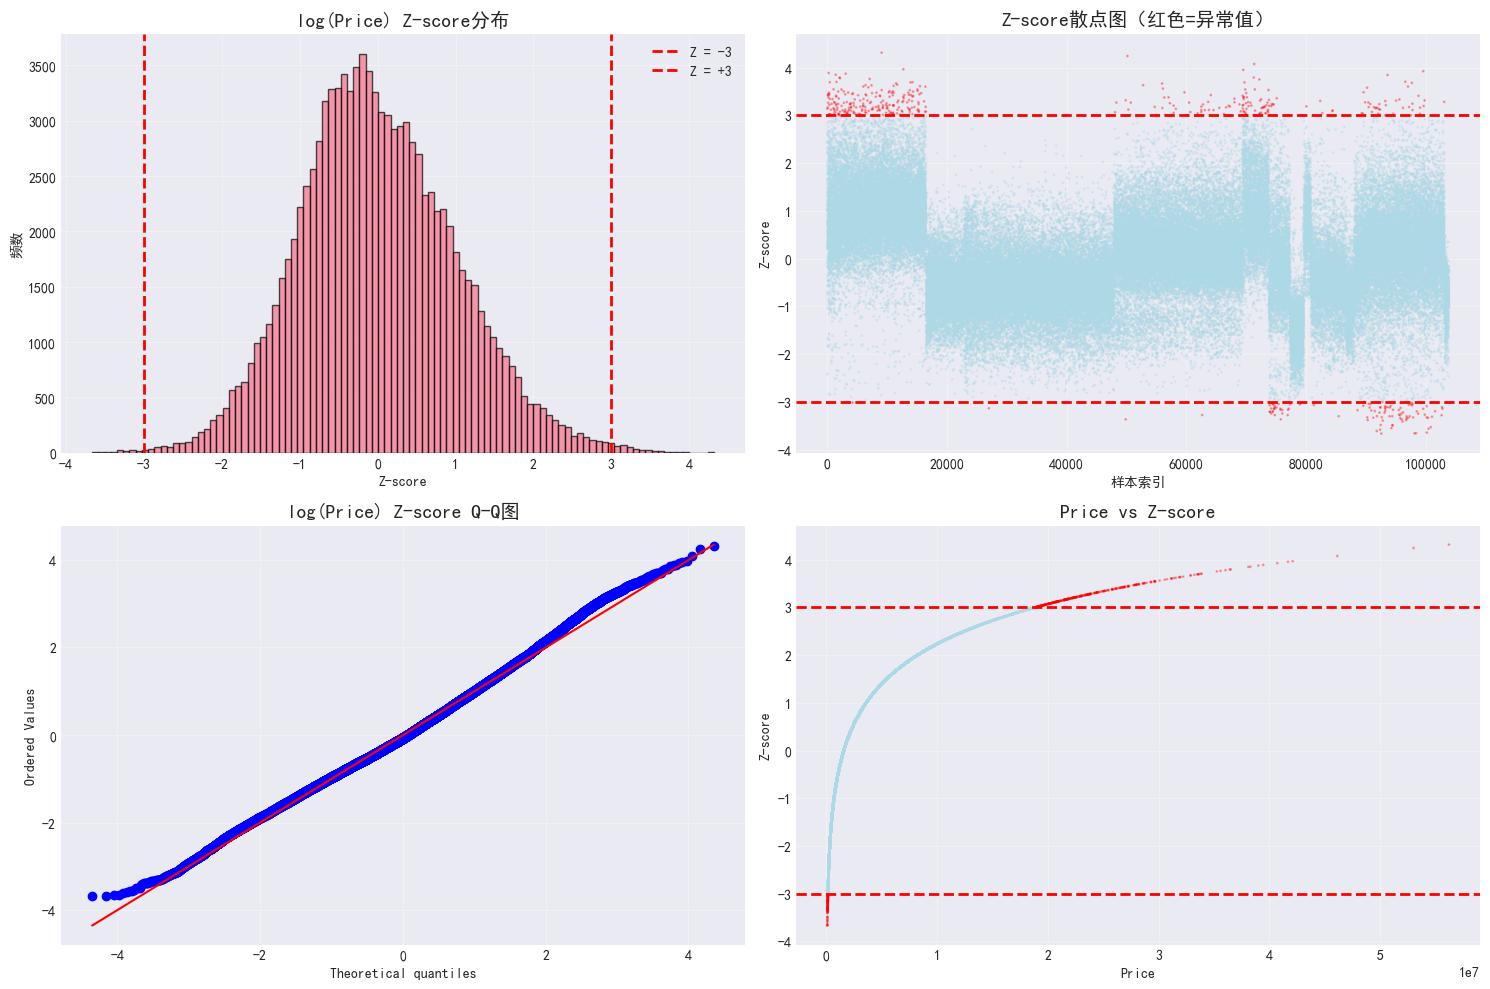


6. ÂâîÈô§ÂºÇÂ∏∏ÂÄº

ÂâîÈô§Ââç:
  - Ê†∑Êú¨Êï∞: 103,871
  - ÁâπÂæÅÊï∞: 295

ÂâîÈô§Âêé:
  - Ê†∑Êú¨Êï∞: 103,405
  - ÁâπÂæÅÊï∞: 292
  - Âà†Èô§Ê†∑Êú¨Êï∞: 466
  - Ê†∑Êú¨‰øùÁïôÁéá: 99.55%

7. ÂØπÊØîÂâîÈô§ÂâçÂêéÁöÑPriceÁªüËÆ°

ÂâîÈô§ÂâçPriceÁªüËÆ°:
count    1.038710e+05
mean     2.262366e+06
std      2.532925e+06
min      7.455330e+04
25%      8.910913e+05
50%      1.479407e+06
75%      2.680757e+06
max      5.622643e+07
Name: Price, dtype: float64

ÂâîÈô§ÂêéPriceÁªüËÆ°:
count    1.034050e+05
mean     2.190385e+06
std      2.174593e+06
min      1.302277e+05
25%      8.910206e+05
50%      1.475504e+06
75%      2.665228e+06
max      1.884778e+07
Name: Price, dtype: float64

ÁªüËÆ°ÈáèÂèòÂåñ:
ÁªüËÆ°Èáè          ÂâîÈô§Ââç          ÂâîÈô§Âêé     ÂèòÂåñÁéá(%)
 ÂùáÂÄº 2.262366e+06 2.190385e+06  -3.181658
‰∏≠‰ΩçÊï∞ 1.479407e+06 1.475504e+06  -0.263838
Ê†áÂáÜÂ∑Æ 2.532925e+06 2.174593e+06 -14.146972
ÊúÄÂ∞èÂÄº 7.455330e+04 1.302277e+05  74.677289
ÊúÄÂ§ßÂÄº 5.622643e+07 1.884778e+07 -66.478794
 ÂÅèÂ∫¶ 4.35

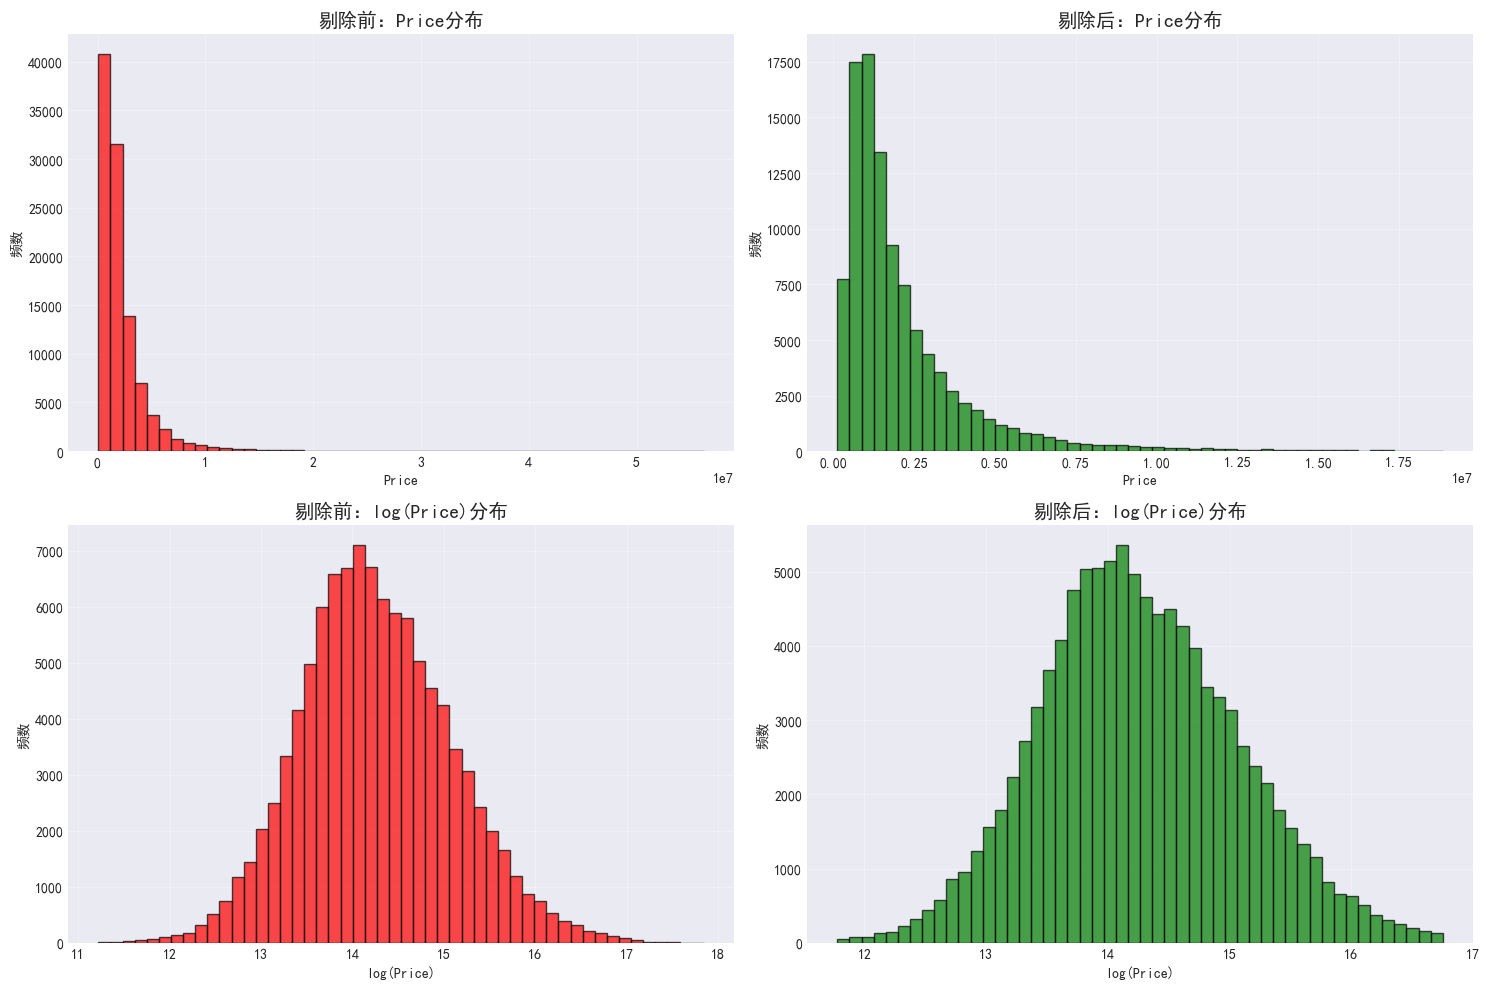


9. Ê£ÄÊü•df_selected_enhancedÊï∞ÊçÆË¥®Èáè

Áº∫Â§±ÂÄºÁªüËÆ°:
  - ÊÄªÁº∫Â§±ÂÄº: 0
  ‚úì Ê≤°ÊúâÁº∫Â§±ÂÄº

Êó†Á©∑ÂÄºÁªüËÆ°:
  - ÊÄªÊó†Á©∑ÂÄº: 0
  ‚úì Ê≤°ÊúâÊó†Á©∑ÂÄº

Êï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É:
float64    188
int32       48
bool        37
object      13
int64        6
Name: count, dtype: int64


In [141]:
# ==================== Âü∫‰∫élog(Price)ÁöÑZ-scoreÂºÇÂ∏∏ÂÄºÊ£ÄÈ™å ====================
print("\n" + "=" * 80)
print("Âü∫‰∫élog(Price)ÁöÑZ-scoreÂºÇÂ∏∏ÂÄºÊ£ÄÈ™å")
print("=" * 80)

# ‰ΩøÁî®ÁâπÂæÅÂ∑•Á®ãÂêéÁöÑÊï∞ÊçÆ
df_outlier_check = df_engineered.copy()

print(f"\nÂéüÂßãÊï∞ÊçÆÈõÜ‰ø°ÊÅØ:")
print(f"  - Ê†∑Êú¨Êï∞: {len(df_outlier_check):,}")
print(f"  - ÁâπÂæÅÊï∞: {len(df_outlier_check.columns):,}")

# ==================== 1. Ê£ÄÊü•PriceÂàóÊòØÂê¶Â≠òÂú® ====================
print("\n" + "=" * 60)
print("1. Ê£ÄÊü•PriceÂàó")
print("=" * 60)

if 'Price' not in df_outlier_check.columns:
    print("‚ùå ÈîôËØØÔºöÊï∞ÊçÆ‰∏≠‰∏çÂ≠òÂú®'Price'Âàó")
    print(f"ÂèØÁî®Âàó: {df_outlier_check.columns.tolist()}")
else:
    print(f"‚úì PriceÂàóÂ≠òÂú®")
    print(f"\nPriceÂü∫Êú¨ÁªüËÆ°:")
    print(df_outlier_check['Price'].describe())
    
    # Ê£ÄÊü•PriceÁöÑÁº∫Â§±ÂÄºÂíåË¥üÂÄº
    price_missing = df_outlier_check['Price'].isnull().sum()
    price_negative = (df_outlier_check['Price'] <= 0).sum()
    
    print(f"\nPriceÊï∞ÊçÆË¥®Èáè:")
    print(f"  - Áº∫Â§±ÂÄº: {price_missing} ({price_missing/len(df_outlier_check)*100:.2f}%)")
    print(f"  - ÈùûÊ≠£ÂÄº: {price_negative} ({price_negative/len(df_outlier_check)*100:.2f}%)")
    
    if price_missing > 0 or price_negative > 0:
        print(f"\n‚ö† ÈúÄË¶ÅÂÖàÂ§ÑÁêÜPriceÁöÑÁº∫Â§±ÂÄºÊàñÈùûÊ≠£ÂÄº")
        # Âà†Èô§PriceÁº∫Â§±ÊàñÈùûÊ≠£ÁöÑÊ†∑Êú¨
        df_outlier_check = df_outlier_check[(df_outlier_check['Price'].notnull()) & 
                                            (df_outlier_check['Price'] > 0)].copy()
        print(f"‚úì Â∑≤Âà†Èô§PriceÁº∫Â§±ÊàñÈùûÊ≠£ÁöÑÊ†∑Êú¨")
        print(f"  Ââ©‰ΩôÊ†∑Êú¨Êï∞: {len(df_outlier_check):,}")

# ==================== 2. ËÆ°ÁÆólog(Price) ====================
print("\n" + "=" * 60)
print("2. ËÆ°ÁÆólog(Price)")
print("=" * 60)

# ‰ΩøÁî®Ëá™ÁÑ∂ÂØπÊï∞
df_outlier_check['log_Price'] = np.log(df_outlier_check['Price'])

print(f"‚úì Â∑≤ÂàõÂª∫log_PriceÂàó")
print(f"\nlog(Price)Âü∫Êú¨ÁªüËÆ°:")
print(df_outlier_check['log_Price'].describe())

# ÁªòÂà∂PriceÂíålog(Price)ÁöÑÂàÜÂ∏ÉÂØπÊØî
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# PriceÂàÜÂ∏É
axes[0, 0].hist(df_outlier_check['Price'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('PriceÂàÜÂ∏É', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('È¢ëÊï∞')
axes[0, 0].grid(True, alpha=0.3)

# log(Price)ÂàÜÂ∏É
axes[0, 1].hist(df_outlier_check['log_Price'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('log(Price)ÂàÜÂ∏É', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('log(Price)')
axes[0, 1].set_ylabel('È¢ëÊï∞')
axes[0, 1].grid(True, alpha=0.3)

# PriceÁÆ±Á∫øÂõæ
axes[1, 0].boxplot(df_outlier_check['Price'], vert=True)
axes[1, 0].set_title('PriceÁÆ±Á∫øÂõæ', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Price')
axes[1, 0].grid(True, alpha=0.3)

# log(Price)ÁÆ±Á∫øÂõæ
axes[1, 1].boxplot(df_outlier_check['log_Price'], vert=True)
axes[1, 1].set_title('log(Price)ÁÆ±Á∫øÂõæ', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('log(Price)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('price_distribution_before_outlier_removal.png', dpi=300, bbox_inches='tight')
print(f"\n‚úì ÂàÜÂ∏ÉÂõæÂ∑≤‰øùÂ≠òÂà∞ 'price_distribution_before_outlier_removal.png'")
plt.close()

# ==================== 3. ËÆ°ÁÆóZ-score ====================
print("\n" + "=" * 60)
print("3. ËÆ°ÁÆólog(Price)ÁöÑZ-score")
print("=" * 60)

# ËÆ°ÁÆóÂùáÂÄºÂíåÊ†áÂáÜÂ∑Æ
log_price_mean = df_outlier_check['log_Price'].mean()
log_price_std = df_outlier_check['log_Price'].std()

print(f"log(Price)ÁªüËÆ°Èáè:")
print(f"  - ÂùáÂÄº (Œº): {log_price_mean:.4f}")
print(f"  - Ê†áÂáÜÂ∑Æ (œÉ): {log_price_std:.4f}")

# ËÆ°ÁÆóZ-score
df_outlier_check['log_Price_zscore'] = (df_outlier_check['log_Price'] - log_price_mean) / log_price_std

print(f"\n‚úì Â∑≤ÂàõÂª∫log_Price_zscoreÂàó")
print(f"\nZ-scoreÂü∫Êú¨ÁªüËÆ°:")
print(df_outlier_check['log_Price_zscore'].describe())

# ==================== 4. ËØÜÂà´ÂºÇÂ∏∏ÂÄº ====================
print("\n" + "=" * 60)
print("4. ËØÜÂà´ÂºÇÂ∏∏ÂÄºÔºà|Z-score| > 3Ôºâ")
print("=" * 60)

# Ê†áËÆ∞ÂºÇÂ∏∏ÂÄº
df_outlier_check['is_outlier'] = df_outlier_check['log_Price_zscore'].abs() > 3

# ÁªüËÆ°ÂºÇÂ∏∏ÂÄº
outlier_count = df_outlier_check['is_outlier'].sum()
outlier_pct = outlier_count / len(df_outlier_check) * 100

print(f"\nÂºÇÂ∏∏ÂÄºÁªüËÆ°:")
print(f"  - ÂºÇÂ∏∏ÂÄºÊï∞Èáè: {outlier_count:,}")
print(f"  - ÂºÇÂ∏∏ÂÄºÊØî‰æã: {outlier_pct:.2f}%")
print(f"  - Ê≠£Â∏∏ÂÄºÊï∞Èáè: {(~df_outlier_check['is_outlier']).sum():,}")

# ËØ¶ÁªÜÁöÑZ-scoreÂàÜÂ∏É
print(f"\nZ-scoreÂàÜÂ∏ÉÁªüËÆ°:")
z_ranges = [
    ('|Z| <= 1', (df_outlier_check['log_Price_zscore'].abs() <= 1).sum()),
    ('1 < |Z| <= 2', ((df_outlier_check['log_Price_zscore'].abs() > 1) & 
                      (df_outlier_check['log_Price_zscore'].abs() <= 2)).sum()),
    ('2 < |Z| <= 3', ((df_outlier_check['log_Price_zscore'].abs() > 2) & 
                      (df_outlier_check['log_Price_zscore'].abs() <= 3)).sum()),
    ('|Z| > 3', (df_outlier_check['log_Price_zscore'].abs() > 3).sum())
]

for range_name, count in z_ranges:
    pct = count / len(df_outlier_check) * 100
    print(f"  {range_name:15s}: {count:6,} ({pct:5.2f}%)")

# ÂºÇÂ∏∏ÂÄºÁöÑPriceÁªüËÆ°
if outlier_count > 0:
    print(f"\nÂºÇÂ∏∏ÂÄºÁöÑPriceÁªüËÆ°:")
    outliers = df_outlier_check[df_outlier_check['is_outlier']]
    print(f"  - ÊúÄÂ∞èÂÄº: {outliers['Price'].min():,.2f}")
    print(f"  - ÊúÄÂ§ßÂÄº: {outliers['Price'].max():,.2f}")
    print(f"  - ÂùáÂÄº: {outliers['Price'].mean():,.2f}")
    print(f"  - ‰∏≠‰ΩçÊï∞: {outliers['Price'].median():,.2f}")
    
    # ÊòæÁ§∫ÊûÅÁ´ØÂºÇÂ∏∏ÂÄº
    print(f"\nZ-scoreÊúÄÊûÅÁ´ØÁöÑ10‰∏™Ê†∑Êú¨:")
    extreme_outliers = df_outlier_check.nlargest(10, 'log_Price_zscore')[
        ['Price', 'log_Price', 'log_Price_zscore']
    ]
    print(extreme_outliers.to_string())
    
    # Ê£ÄÊü•ÊòØÂê¶ÊúâË¥üZ-scoreÂºÇÂ∏∏ÂÄº
    negative_outliers = outliers[outliers['log_Price_zscore'] < -3]
    positive_outliers = outliers[outliers['log_Price_zscore'] > 3]
    
    print(f"\nÂºÇÂ∏∏ÂÄºÊñπÂêëÂàÜÂ∏É:")
    print(f"  - Z < -3 (‰ª∑Ê†ºËøá‰Ωé): {len(negative_outliers):,}")
    print(f"  - Z > +3 (‰ª∑Ê†ºËøáÈ´ò): {len(positive_outliers):,}")

# ==================== 5. ÂèØËßÜÂåñZ-scoreÂàÜÂ∏É ====================
print("\n" + "=" * 60)
print("5. ÂèØËßÜÂåñZ-scoreÂàÜÂ∏É")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Z-scoreÁõ¥ÊñπÂõæ
axes[0, 0].hist(df_outlier_check['log_Price_zscore'], bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(-3, color='red', linestyle='--', linewidth=2, label='Z = -3')
axes[0, 0].axvline(3, color='red', linestyle='--', linewidth=2, label='Z = +3')
axes[0, 0].set_title('log(Price) Z-scoreÂàÜÂ∏É', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Z-score')
axes[0, 0].set_ylabel('È¢ëÊï∞')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Z-scoreÁÆ±Á∫øÂõæ
colors = ['red' if x else 'lightblue' for x in df_outlier_check['is_outlier']]
axes[0, 1].scatter(range(len(df_outlier_check)), df_outlier_check['log_Price_zscore'], 
                   c=colors, alpha=0.3, s=1)
axes[0, 1].axhline(-3, color='red', linestyle='--', linewidth=2)
axes[0, 1].axhline(3, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_title('Z-scoreÊï£ÁÇπÂõæÔºàÁ∫¢Ëâ≤=ÂºÇÂ∏∏ÂÄºÔºâ', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Ê†∑Êú¨Á¥¢Âºï')
axes[0, 1].set_ylabel('Z-score')
axes[0, 1].grid(True, alpha=0.3)

# Q-QÂõæ
from scipy import stats
stats.probplot(df_outlier_check['log_Price_zscore'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('log(Price) Z-score Q-QÂõæ', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Price vs Z-score
axes[1, 1].scatter(df_outlier_check['Price'], df_outlier_check['log_Price_zscore'], 
                   c=colors, alpha=0.3, s=1)
axes[1, 1].axhline(-3, color='red', linestyle='--', linewidth=2)
axes[1, 1].axhline(3, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_title('Price vs Z-score', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Price')
axes[1, 1].set_ylabel('Z-score')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==================== 6. ÂâîÈô§ÂºÇÂ∏∏ÂÄº ====================
print("\n" + "=" * 60)
print("6. ÂâîÈô§ÂºÇÂ∏∏ÂÄº")
print("=" * 60)

print(f"\nÂâîÈô§Ââç:")
print(f"  - Ê†∑Êú¨Êï∞: {len(df_outlier_check):,}")
print(f"  - ÁâπÂæÅÊï∞: {len(df_outlier_check.columns):,}")

# ÂàõÂª∫ÂâîÈô§ÂºÇÂ∏∏ÂÄºÂêéÁöÑÊï∞ÊçÆÈõÜ
df_selected_enhanced = df_outlier_check[~df_outlier_check['is_outlier']].copy()

# Âà†Èô§ËæÖÂä©Âàó
df_selected_enhanced = df_selected_enhanced.drop(columns=['log_Price', 'log_Price_zscore', 'is_outlier'])

print(f"\nÂâîÈô§Âêé:")
print(f"  - Ê†∑Êú¨Êï∞: {len(df_selected_enhanced):,}")
print(f"  - ÁâπÂæÅÊï∞: {len(df_selected_enhanced.columns):,}")
print(f"  - Âà†Èô§Ê†∑Êú¨Êï∞: {outlier_count:,}")
print(f"  - Ê†∑Êú¨‰øùÁïôÁéá: {len(df_selected_enhanced)/len(df_outlier_check)*100:.2f}%")

# ==================== 7. ÂØπÊØîÂâîÈô§ÂâçÂêéÁöÑÁªüËÆ° ====================
print("\n" + "=" * 60)
print("7. ÂØπÊØîÂâîÈô§ÂâçÂêéÁöÑPriceÁªüËÆ°")
print("=" * 60)

print(f"\nÂâîÈô§ÂâçPriceÁªüËÆ°:")
print(df_outlier_check['Price'].describe())

print(f"\nÂâîÈô§ÂêéPriceÁªüËÆ°:")
print(df_selected_enhanced['Price'].describe())

# ËÆ°ÁÆóÂèòÂåñ
print(f"\nÁªüËÆ°ÈáèÂèòÂåñ:")
stats_comparison = pd.DataFrame({
    'ÁªüËÆ°Èáè': ['ÂùáÂÄº', '‰∏≠‰ΩçÊï∞', 'Ê†áÂáÜÂ∑Æ', 'ÊúÄÂ∞èÂÄº', 'ÊúÄÂ§ßÂÄº', 'ÂÅèÂ∫¶', 'Â≥∞Â∫¶'],
    'ÂâîÈô§Ââç': [
        df_outlier_check['Price'].mean(),
        df_outlier_check['Price'].median(),
        df_outlier_check['Price'].std(),
        df_outlier_check['Price'].min(),
        df_outlier_check['Price'].max(),
        df_outlier_check['Price'].skew(),
        df_outlier_check['Price'].kurtosis()
    ],
    'ÂâîÈô§Âêé': [
        df_selected_enhanced['Price'].mean(),
        df_selected_enhanced['Price'].median(),
        df_selected_enhanced['Price'].std(),
        df_selected_enhanced['Price'].min(),
        df_selected_enhanced['Price'].max(),
        df_selected_enhanced['Price'].skew(),
        df_selected_enhanced['Price'].kurtosis()
    ]
})

stats_comparison['ÂèòÂåñÁéá(%)'] = ((stats_comparison['ÂâîÈô§Âêé'] - stats_comparison['ÂâîÈô§Ââç']) / 
                                stats_comparison['ÂâîÈô§Ââç'] * 100)

print(stats_comparison.to_string(index=False))

# ==================== 8. ÂèØËßÜÂåñÂâîÈô§ÂâçÂêéÂØπÊØî ====================
print("\n" + "=" * 60)
print("8. ÂèØËßÜÂåñÂâîÈô§ÂâçÂêéÂØπÊØî")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# ÂâîÈô§ÂâçPriceÂàÜÂ∏É
axes[0, 0].hist(df_outlier_check['Price'], bins=50, edgecolor='black', alpha=0.7, color='red')
axes[0, 0].set_title('ÂâîÈô§ÂâçÔºöPriceÂàÜÂ∏É', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('È¢ëÊï∞')
axes[0, 0].grid(True, alpha=0.3)

# ÂâîÈô§ÂêéPriceÂàÜÂ∏É
axes[0, 1].hist(df_selected_enhanced['Price'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('ÂâîÈô§ÂêéÔºöPriceÂàÜÂ∏É', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_ylabel('È¢ëÊï∞')
axes[0, 1].grid(True, alpha=0.3)

# ÂâîÈô§Ââçlog(Price)ÂàÜÂ∏É
log_price_before = np.log(df_outlier_check['Price'])
axes[1, 0].hist(log_price_before, bins=50, edgecolor='black', alpha=0.7, color='red')
axes[1, 0].set_title('ÂâîÈô§ÂâçÔºölog(Price)ÂàÜÂ∏É', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('log(Price)')
axes[1, 0].set_ylabel('È¢ëÊï∞')
axes[1, 0].grid(True, alpha=0.3)

# ÂâîÈô§Âêélog(Price)ÂàÜÂ∏É
log_price_after = np.log(df_selected_enhanced['Price'])
axes[1, 1].hist(log_price_after, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 1].set_title('ÂâîÈô§ÂêéÔºölog(Price)ÂàÜÂ∏É', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('log(Price)')
axes[1, 1].set_ylabel('È¢ëÊï∞')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==================== 9. Ê£ÄÊü•Êï∞ÊçÆË¥®Èáè ====================
print("\n" + "=" * 60)
print("9. Ê£ÄÊü•df_selected_enhancedÊï∞ÊçÆË¥®Èáè")
print("=" * 60)

# Ê£ÄÊü•Áº∫Â§±ÂÄº
missing_count = df_selected_enhanced.isnull().sum().sum()
print(f"\nÁº∫Â§±ÂÄºÁªüËÆ°:")
print(f"  - ÊÄªÁº∫Â§±ÂÄº: {missing_count:,}")

if missing_count > 0:
    missing_cols = df_selected_enhanced.isnull().sum()
    missing_cols = missing_cols[missing_cols > 0].sort_values(ascending=False)
    print(f"  - ÊúâÁº∫Â§±ÂÄºÁöÑÂàóÊï∞: {len(missing_cols)}")
    print(f"\nÁº∫Â§±ÂÄºÊúÄÂ§öÁöÑÂâç10‰∏™ÁâπÂæÅ:")
    for col, count in missing_cols.head(10).items():
        pct = count / len(df_selected_enhanced) * 100
        print(f"    {col:40s}: {count:6,} ({pct:5.2f}%)")
else:
    print(f"  ‚úì Ê≤°ÊúâÁº∫Â§±ÂÄº")

# Ê£ÄÊü•infÂÄº
numeric_cols = df_selected_enhanced.select_dtypes(include=[np.number]).columns
inf_count = np.isinf(df_selected_enhanced[numeric_cols]).sum().sum()
print(f"\nÊó†Á©∑ÂÄºÁªüËÆ°:")
print(f"  - ÊÄªÊó†Á©∑ÂÄº: {inf_count:,}")

if inf_count == 0:
    print(f"  ‚úì Ê≤°ÊúâÊó†Á©∑ÂÄº")

# Êï∞ÊçÆÁ±ªÂûãÁªüËÆ°
print(f"\nÊï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É:")
dtype_counts = df_selected_enhanced.dtypes.value_counts()
print(dtype_counts)

In [142]:
# ==================== ÂºÇÂ∏∏ÂÄºÂ§ÑÁêÜÂêéÔºöÊï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢ ====================
print("\n" + "=" * 100)
print("Êï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢ÔºöÂà†Èô§ÁâπÂÆöÂàóÂπ∂ËΩ¨Êç¢Â∏ÉÂ∞îÂèòÈáè")
print("=" * 100)

df_no_outliers=df_selected_enhanced.copy()


# Âà†Èô§ÊåáÂÆöÂàó
columns_to_drop = ['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ', 'Ê•ºÂ±Ç‰ΩçÁΩÆ']
existing_columns_to_drop = [col for col in columns_to_drop if col in df_no_outliers.columns]

if existing_columns_to_drop:
    print(f"\nÂà†Èô§Âàó: {existing_columns_to_drop}")
    df_no_outliers = df_no_outliers.drop(columns=existing_columns_to_drop)
    print(f"‚úÖ Â∑≤Âà†Èô§ {len(existing_columns_to_drop)} ‰∏™Âàó")
else:
    print(f"‚ö†Ô∏è  Êú™ÊâæÂà∞ÈúÄË¶ÅÂà†Èô§ÁöÑÂàó: {columns_to_drop}")

# ËØÜÂà´Âπ∂ËΩ¨Êç¢Â∏ÉÂ∞îÁ±ªÂûãÂèòÈáè
print("\nËΩ¨Êç¢Â∏ÉÂ∞îÂèòÈáè‰∏∫Êï∞ÂÄºÂûã:")
bool_columns = df_no_outliers.select_dtypes(include=['bool']).columns.tolist()

if bool_columns:
    print(f"ÂèëÁé∞ {len(bool_columns)} ‰∏™Â∏ÉÂ∞îÁ±ªÂûãÂàó:")
    for col in bool_columns[:10]:  # ÊòæÁ§∫Ââç10‰∏™
        print(f"  - {col}")
    if len(bool_columns) > 10:
        print(f"  ... ÂèäÂÖ∂‰ªñ {len(bool_columns) - 10} ‰∏™")
    
    # ËΩ¨Êç¢‰∏∫Êï¥Êï∞Á±ªÂûã (True -> 1, False -> 0)
    df_no_outliers[bool_columns] = df_no_outliers[bool_columns].astype(int)
    print(f"\n‚úÖ Â∑≤Â∞Ü {len(bool_columns)} ‰∏™Â∏ÉÂ∞îÂèòÈáèËΩ¨Êç¢‰∏∫Êï¥Êï∞Âûã (0/1)")
else:
    print("‚úÖ Êú™ÂèëÁé∞Â∏ÉÂ∞îÁ±ªÂûãÂèòÈáè")

# È™åËØÅÊï∞ÊçÆÁ±ªÂûã
print("\nÊï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É:")
print(df_no_outliers.dtypes.value_counts())

print(f"\nÂ§ÑÁêÜÂêéÊï∞ÊçÆÂΩ¢Áä∂: {df_no_outliers.shape}")


Êï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢ÔºöÂà†Èô§ÁâπÂÆöÂàóÂπ∂ËΩ¨Êç¢Â∏ÉÂ∞îÂèòÈáè

Âà†Èô§Âàó: ['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ', 'Ê•ºÂ±Ç‰ΩçÁΩÆ']
‚úÖ Â∑≤Âà†Èô§ 2 ‰∏™Âàó

ËΩ¨Êç¢Â∏ÉÂ∞îÂèòÈáè‰∏∫Êï∞ÂÄºÂûã:
ÂèëÁé∞ 37 ‰∏™Â∏ÉÂ∞îÁ±ªÂûãÂàó:
  - Âà´Â¢ÖÁ±ªÂûã_ÂèåÊãº
  - Âà´Â¢ÖÁ±ªÂûã_Âè†Êãº
  - Âà´Â¢ÖÁ±ªÂûã_ËÅîÊéí
  - Âà´Â¢ÖÁ±ªÂûã_ÈùûÂà´Â¢Ö
  - ‰∫§ÊòìÊùÉÂ±û_‰∫åÁ±ªÁªèÊµéÈÄÇÁî®Êàø
  - ‰∫§ÊòìÊùÉÂ±û_Âä®ËøÅÂÆâÁΩÆÊàø
  - ‰∫§ÊòìÊùÉÂ±û_ÂîÆÂêéÂÖ¨Êàø
  - ‰∫§ÊòìÊùÉÂ±û_ÂïÜÂìÅÊàø
  - ‰∫§ÊòìÊùÉÂ±û_ÂõûËøÅÊàø
  - ‰∫§ÊòìÊùÉÂ±û_Â§Æ‰∫ßÊàø
  ... ÂèäÂÖ∂‰ªñ 27 ‰∏™

‚úÖ Â∑≤Â∞Ü 37 ‰∏™Â∏ÉÂ∞îÂèòÈáèËΩ¨Êç¢‰∏∫Êï¥Êï∞Âûã (0/1)

Êï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É:
float64    188
int32       85
object      11
int64        6
Name: count, dtype: int64

Â§ÑÁêÜÂêéÊï∞ÊçÆÂΩ¢Áä∂: (103405, 290)


In [143]:
# ==================== Â§ÑÁêÜobjectÁ±ªÂûãÂàó ====================
print("\n" + "=" * 100)
print("Â§ÑÁêÜobjectÁ±ªÂûãÂàóÔºöËΩ¨Êç¢True/FalseÂ≠óÁ¨¶‰∏≤ÂíåÊï∞ÂÄºÂ≠óÁ¨¶‰∏≤")
print("=" * 100)

# ËØÜÂà´ÊâÄÊúâobjectÁ±ªÂûãÁöÑÂàó
object_columns = df_no_outliers.select_dtypes(include=['object']).columns.tolist()
print(f"\nÂèëÁé∞ {len(object_columns)} ‰∏™objectÁ±ªÂûãÂàó")

# ÂàÜÁ±ªÂ§ÑÁêÜ
true_false_columns = []
numeric_string_columns = []

for col in object_columns:
    # Ëé∑ÂèñËØ•ÂàóÁöÑÂîØ‰∏ÄÂÄºÔºàÂéªÈô§NaNÔºâ
    unique_values = df_no_outliers[col].dropna().unique()
    
    # Ê£ÄÊü•ÊòØÂê¶ÊòØTrue/FalseÂ≠óÁ¨¶‰∏≤
    if len(unique_values) > 0:
        # ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤Âπ∂Ê£ÄÊü•
        unique_str = set([str(v).strip() for v in unique_values])
        if unique_str.issubset({'True', 'False'}):
            true_false_columns.append(col)
        else:
            numeric_string_columns.append(col)

# ËΩ¨Êç¢True/FalseÂ≠óÁ¨¶‰∏≤Âàó
if true_false_columns:
    print(f"\nËΩ¨Êç¢True/FalseÂ≠óÁ¨¶‰∏≤Âàó ({len(true_false_columns)}‰∏™):")
    for col in true_false_columns:
        print(f"  - {col}")
        # ËΩ¨Êç¢‰∏∫Â∏ÉÂ∞îÂÄºÔºåÁÑ∂ÂêéËΩ¨‰∏∫Êï¥Êï∞
        df_no_outliers[col] = df_no_outliers[col].map({
            'True': 1, 'true': 1, True: 1,
            'False': 0, 'false': 0, False: 0
        })
        # Á°Æ‰øùÊòØÊï¥Êï∞Á±ªÂûã
        df_no_outliers[col] = df_no_outliers[col].fillna(0).astype(int)
    print(f"‚úÖ Â∑≤Â∞Ü {len(true_false_columns)} ‰∏™True/FalseÂàóËΩ¨Êç¢‰∏∫0/1")

# ËΩ¨Êç¢Êï∞ÂÄºÂ≠óÁ¨¶‰∏≤Âàó
if numeric_string_columns:
    print(f"\nËΩ¨Êç¢Êï∞ÂÄºÂ≠óÁ¨¶‰∏≤Âàó ({len(numeric_string_columns)}‰∏™):")
    for col in numeric_string_columns:
        print(f"  - {col}")
        # Â∞ùËØïËΩ¨Êç¢‰∏∫Êï∞ÂÄºÁ±ªÂûã
        df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')
    print(f"‚úÖ Â∑≤Â∞Ü {len(numeric_string_columns)} ‰∏™Êï∞ÂÄºÂ≠óÁ¨¶‰∏≤ÂàóËΩ¨Êç¢‰∏∫Êï∞ÂÄºÂûã")

# È™åËØÅËΩ¨Êç¢ÁªìÊûú
print("\nËΩ¨Êç¢ÂêéÊï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É:")
print(df_no_outliers.dtypes.value_counts())

# Ê£ÄÊü•ÊòØÂê¶ËøòÊúâobjectÁ±ªÂûãÁöÑÂàó
remaining_object_cols = df_no_outliers.select_dtypes(include=['object']).columns.tolist()
if remaining_object_cols:
    print(f"\n‚ö†Ô∏è  ‰ªçÊúâ {len(remaining_object_cols)} ‰∏™objectÁ±ªÂûãÂàó:")
    for col in remaining_object_cols[:10]:
        print(f"  - {col}: {df_no_outliers[col].unique()[:5]}")
else:
    print("\n‚úÖ ÊâÄÊúâobjectÂàóÂ∑≤ÊàêÂäüËΩ¨Êç¢")

print(f"\nÂ§ÑÁêÜÂêéÊï∞ÊçÆÂΩ¢Áä∂: {df_no_outliers.shape}")


Â§ÑÁêÜobjectÁ±ªÂûãÂàóÔºöËΩ¨Êç¢True/FalseÂ≠óÁ¨¶‰∏≤ÂíåÊï∞ÂÄºÂ≠óÁ¨¶‰∏≤

ÂèëÁé∞ 11 ‰∏™objectÁ±ªÂûãÂàó

ËΩ¨Êç¢True/FalseÂ≠óÁ¨¶‰∏≤Âàó (11‰∏™):
  - Âª∫Á≠ëÁªìÊûÑ_Êú™Áü•ÁªìÊûÑ
  - Âª∫Á≠ëÁªìÊûÑ_Ê°ÜÊû∂ÁªìÊûÑ
  - Âª∫Á≠ëÁªìÊûÑ_Ê∑∑ÂêàÁªìÊûÑ
  - Âª∫Á≠ëÁªìÊûÑ_Á†ñÊú®ÁªìÊûÑ
  - Âª∫Á≠ëÁªìÊûÑ_Á†ñÊ∑∑ÁªìÊûÑ
  - Âª∫Á≠ëÁªìÊûÑ_Èí¢Ê∑∑ÁªìÊûÑ
  - Âª∫Á≠ëÁªìÊûÑ_Èí¢ÁªìÊûÑ
  - Ë£Ö‰øÆÊÉÖÂÜµ_ÂÖ∂‰ªñ
  - Ë£Ö‰øÆÊÉÖÂÜµ_ÊØõÂùØ
  - Ë£Ö‰øÆÊÉÖÂÜµ_ÁÆÄË£Ö
  - Ë£Ö‰øÆÊÉÖÂÜµ_Á≤æË£Ö
‚úÖ Â∑≤Â∞Ü 11 ‰∏™True/FalseÂàóËΩ¨Êç¢‰∏∫0/1

ËΩ¨Êç¢ÂêéÊï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É:
float64    188
int32       96
int64        6
Name: count, dtype: int64

‚úÖ ÊâÄÊúâobjectÂàóÂ∑≤ÊàêÂäüËΩ¨Êç¢

Â§ÑÁêÜÂêéÊï∞ÊçÆÂΩ¢Áä∂: (103405, 290)


In [144]:
# ==================== 4. ÂáÜÂ§áÂª∫Ê®°Êï∞ÊçÆ ====================
print("\n" + "=" * 100)
print("Ê≠•È™§ 4: ÂáÜÂ§áÂª∫Ê®°Êï∞ÊçÆ")
print("=" * 100)

# ÂàÜÁ¶ªÁâπÂæÅÂíåÁõÆÊ†áÂèòÈáè
X = df_no_outliers.drop(columns=['Price'])
y = df_no_outliers['Price'].copy()

print(f"ÁâπÂæÅÁü©ÈòµÂΩ¢Áä∂: {X.shape}")
print(f"ÁõÆÊ†áÂèòÈáèÂΩ¢Áä∂: {y.shape}")

# Ê£ÄÊü•Áº∫Â§±ÂÄº
missing_summary = X.isnull().sum()
missing_features = missing_summary[missing_summary > 0]

if len(missing_features) > 0:
    print(f"\n‚ö†Ô∏è  ÂèëÁé∞ {len(missing_features)} ‰∏™ÁâπÂæÅÊúâÁº∫Â§±ÂÄº")
    print("Áº∫Â§±ÂÄºÊØî‰æãÊúÄÈ´òÁöÑ10‰∏™ÁâπÂæÅ:")
    missing_pct = (missing_features / len(X) * 100).sort_values(ascending=False)
    print(missing_pct.head(10))
    
    # Âà†Èô§Áº∫Â§±ÁéáË∂ÖËøá50%ÁöÑÁâπÂæÅ
    high_missing_features = missing_pct[missing_pct > 50].index.tolist()
    if high_missing_features:
        print(f"\nÂà†Èô§Áº∫Â§±Áéá>50%ÁöÑÁâπÂæÅ ({len(high_missing_features)}‰∏™)")
        X = X.drop(columns=high_missing_features)
    
    # Â°´ÂÖÖÂâ©‰ΩôÁº∫Â§±ÂÄº
    print("\nÂ°´ÂÖÖÂâ©‰ΩôÁº∫Â§±ÂÄºÔºàÊï∞ÂÄºÁâπÂæÅÁî®‰∏≠‰ΩçÊï∞ÔºåÂàÜÁ±ªÁâπÂæÅÁî®‰ºóÊï∞Ôºâ")
    for col in X.columns:
        if X[col].isnull().sum() > 0:
            if X[col].dtype in ['int64', 'float64']:
                X[col].fillna(X[col].median(), inplace=True)
            else:
                X[col].fillna(X[col].mode()[0] if len(X[col].mode()) > 0 else 0, inplace=True)
else:
    print("‚úÖ Êó†Áº∫Â§±ÂÄº")

# Á°Æ‰øùÊâÄÊúâÁâπÂæÅÈÉΩÊòØÊï∞ÂÄºÁ±ªÂûã
print("\n4.1 Á°Æ‰øùÊâÄÊúâÁâπÂæÅÈÉΩÊòØÊï∞ÂÄºÁ±ªÂûã")
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

if non_numeric_cols:
    print(f"‚ö†Ô∏è  ÂèëÁé∞ {len(non_numeric_cols)} ‰∏™ÈùûÊï∞ÂÄºÁâπÂæÅ: {non_numeric_cols[:5]}")
    # ÁÆÄÂçïÂà†Èô§ÈùûÊï∞ÂÄºÁâπÂæÅÔºàÊàñËÄÖÂèØ‰ª•ËøõË°åÁºñÁ†ÅÔºâ
    X = X.select_dtypes(include=[np.number])
    print(f"Âà†Èô§ÈùûÊï∞ÂÄºÁâπÂæÅÂêéÔºåÁâπÂæÅÊï∞Èáè: {X.shape[1]}")
else:
    print("‚úÖ ÊâÄÊúâÁâπÂæÅÂùá‰∏∫Êï∞ÂÄºÁ±ªÂûã")

# Ê£ÄÊü•Êó†Á©∑ÂÄº
inf_cols = X.columns[np.isinf(X).any()].tolist()
if inf_cols:
    print(f"\n‚ö†Ô∏è  ÂèëÁé∞ {len(inf_cols)} ‰∏™ÁâπÂæÅÂåÖÂê´Êó†Á©∑ÂÄº")
    for col in inf_cols:
        X[col].replace([np.inf, -np.inf], np.nan, inplace=True)
        X[col].fillna(X[col].median(), inplace=True)
    print("‚úÖ Â∑≤Â§ÑÁêÜÊó†Á©∑ÂÄº")

print(f"\nÊúÄÁªàÁâπÂæÅÁü©ÈòµÂΩ¢Áä∂: {X.shape}")


Ê≠•È™§ 4: ÂáÜÂ§áÂª∫Ê®°Êï∞ÊçÆ
ÁâπÂæÅÁü©ÈòµÂΩ¢Áä∂: (103405, 289)
ÁõÆÊ†áÂèòÈáèÂΩ¢Áä∂: (103405,)
‚úÖ Êó†Áº∫Â§±ÂÄº

4.1 Á°Æ‰øùÊâÄÊúâÁâπÂæÅÈÉΩÊòØÊï∞ÂÄºÁ±ªÂûã
‚úÖ ÊâÄÊúâÁâπÂæÅÂùá‰∏∫Êï∞ÂÄºÁ±ªÂûã

ÊúÄÁªàÁâπÂæÅÁü©ÈòµÂΩ¢Áä∂: (103405, 289)


In [145]:
# ==================== 5. Êï∞ÊçÆÈõÜÂàíÂàÜ ====================
print("\n" + "=" * 100)
print("Ê≠•È™§ 5: Êï∞ÊçÆÈõÜÂàíÂàÜÔºà80% ËÆ≠ÁªÉÈõÜÔºå20% ÊµãËØïÈõÜÔºâ")
print("=" * 100)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=111
)

print(f"ËÆ≠ÁªÉÈõÜÂ§ßÂ∞è: {X_train.shape[0]} Ê†∑Êú¨, {X_train.shape[1]} ÁâπÂæÅ")
print(f"ÊµãËØïÈõÜÂ§ßÂ∞è: {X_test.shape[0]} Ê†∑Êú¨, {X_test.shape[1]} ÁâπÂæÅ")
print(f"\nËÆ≠ÁªÉÈõÜ‰ª∑Ê†ºÁªüËÆ°:")
print(y_train.describe())
print(f"\nÊµãËØïÈõÜ‰ª∑Ê†ºÁªüËÆ°:")
print(y_test.describe())



Ê≠•È™§ 5: Êï∞ÊçÆÈõÜÂàíÂàÜÔºà80% ËÆ≠ÁªÉÈõÜÔºå20% ÊµãËØïÈõÜÔºâ
ËÆ≠ÁªÉÈõÜÂ§ßÂ∞è: 82724 Ê†∑Êú¨, 289 ÁâπÂæÅ
ÊµãËØïÈõÜÂ§ßÂ∞è: 20681 Ê†∑Êú¨, 289 ÁâπÂæÅ

ËÆ≠ÁªÉÈõÜ‰ª∑Ê†ºÁªüËÆ°:
count    8.272400e+04
mean     2.191098e+06
std      2.172265e+06
min      1.302277e+05
25%      8.909555e+05
50%      1.479909e+06
75%      2.667431e+06
max      1.884778e+07
Name: Price, dtype: float64

ÊµãËØïÈõÜ‰ª∑Ê†ºÁªüËÆ°:
count    2.068100e+04
mean     2.187533e+06
std      2.183933e+06
min      1.322813e+05
25%      8.911223e+05
50%      1.456493e+06
75%      2.654447e+06
max      1.879351e+07
Name: Price, dtype: float64


## ÁâπÂæÅÈÄâÊã©

In [147]:
# ==================== 6. ÁâπÂæÅÈÄâÊã© ====================
print("\n" + "=" * 100)
print("Ê≠•È™§ 6: ÁâπÂæÅÈÄâÊã©")
print("=" * 100)

# 6.1 Áõ∏ÂÖ≥ÊÄßÂàÜÊûê
print("\n[6.1] Áõ∏ÂÖ≥ÊÄßÂàÜÊûê...")
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)

print(f"\n  Top 30 Áõ∏ÂÖ≥ÁâπÂæÅ:")
top_30_corr = correlations.head(30)
for i, (feat, corr) in enumerate(top_30_corr.items(), 1):
    print(f"    {i:2d}. {feat:50s}  Áõ∏ÂÖ≥Á≥ªÊï∞: {corr:.6f}")

# Âà†Èô§‰ΩéÁõ∏ÂÖ≥ÊÄßÁâπÂæÅÔºàÁªùÂØπÁõ∏ÂÖ≥Á≥ªÊï∞<0.001Ôºâ
low_corr_threshold = 0.001
low_corr_features = correlations[correlations < low_corr_threshold].index.tolist()
print(f"\n  ‰ΩéÁõ∏ÂÖ≥ÊÄßÁâπÂæÅ(<{low_corr_threshold}): {len(low_corr_features)} ‰∏™")

# 6.2 ÊñπÂ∑ÆÂàÜÊûêÔºàÂà†Èô§Èõ∂ÊñπÂ∑ÆÂíå‰ΩéÊñπÂ∑ÆÁâπÂæÅÔºâ
print("\n[6.2] ÊñπÂ∑ÆÂàÜÊûê...")
feature_variance = X_train.var()
zero_var_features = feature_variance[feature_variance == 0].index.tolist()
low_var_features = feature_variance[(feature_variance > 0) & (feature_variance < 0.01)].index.tolist()

print(f"  Èõ∂ÊñπÂ∑ÆÁâπÂæÅ: {len(zero_var_features)} ‰∏™")
print(f"  ‰ΩéÊñπÂ∑ÆÁâπÂæÅ(0<var<0.01): {len(low_var_features)} ‰∏™")

# 6.3 VIFÂàÜÊûêÔºàÂ§öÈáçÂÖ±Á∫øÊÄßÔºâ- ÈááÊ†∑ËøõË°å
print("\n[6.3] VIFÂàÜÊûêÔºàÈááÊ†∑30000Êù°Ôºâ...")
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Âè™Âú®È´òÁõ∏ÂÖ≥ÁâπÂæÅ‰∏äÂÅöVIFÔºàÂáèÂ∞ëËÆ°ÁÆóÈáèÔºâ
high_corr_features = correlations[correlations >= 0.05].index.tolist()[:150]  # ÈÄâtop 150
print(f"  Âú® {len(high_corr_features)} ‰∏™È´òÁõ∏ÂÖ≥ÁâπÂæÅ‰∏äËøõË°åVIFÂàÜÊûê...")

# ÈááÊ†∑ÂáèÂ∞ëËÆ°ÁÆóÈáè
sample_size = min(30000, len(X_train))
X_train_sample = X_train[high_corr_features].sample(n=sample_size, random_state=111)
print(f"  ‰ΩøÁî® {sample_size:,} ‰∏™Ê†∑Êú¨ËøõË°åVIFËÆ°ÁÆó...")

high_vif_features = []
vif_threshold = 10

try:
    # ÊõøÊç¢infÂíånan
    X_train_sample_clean = X_train_sample.replace([np.inf, -np.inf], np.nan).fillna(0)
    
    vif_data = pd.DataFrame()
    vif_data["ÁâπÂæÅ"] = X_train_sample_clean.columns
    
    print(f"  Ê≠£Âú®ËÆ°ÁÆóVIF...")
    vif_values = []
    for i in range(X_train_sample_clean.shape[1]):
        if (i + 1) % 20 == 0:
            print(f"    ËøõÂ∫¶: {i+1}/{X_train_sample_clean.shape[1]}")
        vif = variance_inflation_factor(X_train_sample_clean.values, i)
        vif_values.append(vif if not np.isinf(vif) else 999)
    
    vif_data["VIF"] = vif_values
    vif_data = vif_data.sort_values('VIF', ascending=False)
    
    print(f"\n  VIFÁªüËÆ°ÂàÜÂ∏É:")
    print(f"    VIF > 100: {(vif_data['VIF'] > 100).sum()} ‰∏™")
    print(f"    50 < VIF <= 100: {((vif_data['VIF'] > 50) & (vif_data['VIF'] <= 100)).sum()} ‰∏™")
    print(f"    20 < VIF <= 50: {((vif_data['VIF'] > 20) & (vif_data['VIF'] <= 50)).sum()} ‰∏™")
    print(f"    10 < VIF <= 20: {((vif_data['VIF'] > 10) & (vif_data['VIF'] <= 20)).sum()} ‰∏™")
    print(f"    VIF <= 10: {(vif_data['VIF'] <= 10).sum()} ‰∏™")
    
    high_vif_features = vif_data[vif_data['VIF'] > vif_threshold]['ÁâπÂæÅ'].tolist()
    print(f"\n  È´òVIFÁâπÂæÅ(>{vif_threshold}): {len(high_vif_features)} ‰∏™")
    
    if len(high_vif_features) > 0:
        print(f"\n  VIFÊúÄÈ´òÁöÑÂâç20‰∏™ÁâπÂæÅ:")
        for i, row in vif_data.head(20).iterrows():
            print(f"    {row['ÁâπÂæÅ']:50s}  VIF: {row['VIF']:.2f}")
        
except Exception as e:
    print(f"  ‚ö†Ô∏è  VIFËÆ°ÁÆóÂá∫Èîô: {e}")
    print(f"  Ë∑≥ËøáVIFÁ≠õÈÄâ")
    high_vif_features = []

# 6.4 LassoÁâπÂæÅÈÄâÊã©
print("\n[6.4] LassoÁâπÂæÅÈÄâÊã©...")

# Ê†áÂáÜÂåñÁâπÂæÅ
print("  Ê†áÂáÜÂåñÁâπÂæÅ...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ‰ΩøÁî®LassoËøõË°åÁâπÂæÅÈÄâÊã©
print("  ËÆ≠ÁªÉLassoÊ®°ÂûãÔºàalpha=100Ôºâ...")
lasso_selector = Lasso(alpha=100, random_state=111, max_iter=10000)
lasso_selector.fit(X_train_scaled, y_train)

# ÈÄâÊã©Á≥ªÊï∞ÈùûÈõ∂ÁöÑÁâπÂæÅ
lasso_selected_features = X_train.columns[lasso_selector.coef_ != 0].tolist()
lasso_zero_features = X_train.columns[lasso_selector.coef_ == 0].tolist()

print(f"  LassoÈÄâÊã©ÁâπÂæÅ: {len(lasso_selected_features)} ‰∏™")
print(f"  LassoÈõ∂Á≥ªÊï∞ÁâπÂæÅ: {len(lasso_zero_features)} ‰∏™")

# ÊòæÁ§∫LassoÊúÄÈáçË¶ÅÁöÑÁâπÂæÅ
lasso_importance = pd.DataFrame({
    'ÁâπÂæÅ': X_train.columns,
    'Á≥ªÊï∞': lasso_selector.coef_,
    'ÁªùÂØπÁ≥ªÊï∞': np.abs(lasso_selector.coef_)
})
lasso_importance = lasso_importance[lasso_importance['Á≥ªÊï∞'] != 0].sort_values(
    'ÁªùÂØπÁ≥ªÊï∞', ascending=False
)

print(f"\n  LassoÈÄâÊã©ÁöÑTop 30ÁâπÂæÅ:")
for i, row in lasso_importance.head(30).iterrows():
    print(f"    {row['ÁâπÂæÅ']:50s}  Á≥ªÊï∞: {row['Á≥ªÊï∞']:8.4f}")

# 6.5 ÁªºÂêàÁâπÂæÅÁ≠õÈÄâ
print("\n" + "=" * 100)
print("[6.5] ÁªºÂêàÁâπÂæÅÁ≠õÈÄâ")
print("=" * 100)

# ÁªüËÆ°ÂêÑÁ±ªÈúÄË¶ÅÂà†Èô§ÁöÑÁâπÂæÅ
features_to_drop = list(set(
    low_corr_features + 
    zero_var_features + 
    low_var_features + 
    high_vif_features
))

print(f"\nÁâπÂæÅÁ≠õÈÄâÁªüËÆ°:")
print(f"  ÂéüÂßãÁâπÂæÅÊï∞: {len(X_train.columns):,}")
print(f"  - ‰ΩéÁõ∏ÂÖ≥ÊÄß(<{low_corr_threshold}): {len(low_corr_features):,}")
print(f"  - Èõ∂ÊñπÂ∑Æ: {len(zero_var_features):,}")
print(f"  - ‰ΩéÊñπÂ∑Æ(0<var<0.01): {len(low_var_features):,}")
print(f"  - È´òVIF(>{vif_threshold}): {len(high_vif_features):,}")
print(f"  - LassoÈõ∂Á≥ªÊï∞: {len(lasso_zero_features):,}")
print(f"  ÂêàÂπ∂ÂêéÂæÖÂà†Èô§: {len(features_to_drop):,}")

# Á≠ñÁï•1Ôºö‰øùÂÆàÁ≠ñÁï• - Âè™Âà†Èô§ÊòéÁ°ÆÊúâÈóÆÈ¢òÁöÑÁâπÂæÅ
print(f"\nÁ≠ñÁï•1Ôºö‰øùÂÆàÁ≠õÈÄâ")
print(f"  ËßÑÂàôÔºöÂà†Èô§ ‰ΩéÁõ∏ÂÖ≥ÊÄß OR Èõ∂ÊñπÂ∑Æ OR È´òVIF ÁöÑÁâπÂæÅ")
features_conservative = [f for f in X_train.columns if f not in features_to_drop]
print(f"  ‰øùÁïôÁâπÂæÅÊï∞: {len(features_conservative):,} ({len(features_conservative)/len(X_train.columns)*100:.1f}%)")

# Á≠ñÁï•2ÔºöÊøÄËøõÁ≠ñÁï• - Âè™‰øùÁïôLassoÈÄâÊã©ÁöÑÁâπÂæÅ
print(f"\nÁ≠ñÁï•2ÔºöÊøÄËøõÁ≠õÈÄâÔºàÁ∫ØLassoÔºâ")
print(f"  ËßÑÂàôÔºöÂè™‰øùÁïôLassoÁ≥ªÊï∞ÈùûÈõ∂ÁöÑÁâπÂæÅ")
features_aggressive = lasso_selected_features
print(f"  ‰øùÁïôÁâπÂæÅÊï∞: {len(features_aggressive):,} ({len(features_aggressive)/len(X_train.columns)*100:.1f}%)")

# Á≠ñÁï•3ÔºöÊäò‰∏≠Á≠ñÁï• - LassoÈÄâÊã© + È´òÁõ∏ÂÖ≥‰ΩéVIF
print(f"\nÁ≠ñÁï•3ÔºöÊäò‰∏≠Á≠õÈÄâÔºàÊé®ËçêÔºâ")
print(f"  ËßÑÂàôÔºö‰øùÁïô LassoÈÄâÊã© OR (È´òÁõ∏ÂÖ≥ÊÄß AND ÈùûÈ´òVIF) ÁöÑÁâπÂæÅ")
high_corr_low_vif = [
    f for f in high_corr_features 
    if f not in high_vif_features 
    and f not in low_corr_features
    and f not in zero_var_features
    and f not in low_var_features
]
features_moderate = list(set(lasso_selected_features + high_corr_low_vif))
print(f"  ‰øùÁïôÁâπÂæÅÊï∞: {len(features_moderate):,} ({len(features_moderate)/len(X_train.columns)*100:.1f}%)")



Ê≠•È™§ 6: ÁâπÂæÅÈÄâÊã©

[6.1] Áõ∏ÂÖ≥ÊÄßÂàÜÊûê...

  Top 30 Áõ∏ÂÖ≥ÁâπÂæÅ:
     1. Èù¢ÁßØ√óÊàøÈæÑ                                               Áõ∏ÂÖ≥Á≥ªÊï∞: 0.506889
     2. Â•óÂÜÖÈù¢ÁßØ√óÊàøÈæÑ                                             Áõ∏ÂÖ≥Á≥ªÊï∞: 0.498437
     3. ÊúàÂ∫¶‰æõÁÉ≠ÊÄªË¥π                                              Áõ∏ÂÖ≥Á≥ªÊï∞: 0.470934
     4. ‰æõÁÉ≠Ë¥π√óÈù¢ÁßØ                                              Áõ∏ÂÖ≥Á≥ªÊï∞: 0.470934
     5. ÁáÉÊ∞îË¥π√óÈù¢ÁßØ                                              Áõ∏ÂÖ≥Á≥ªÊï∞: 0.470889
     6. ‰æõÁÉ≠Ë¥π√óÂ•óÂÜÖÈù¢ÁßØ                                            Áõ∏ÂÖ≥Á≥ªÊï∞: 0.469440
     7. ÁáÉÊ∞îË¥π√óÂ•óÂÜÖÈù¢ÁßØ                                            Áõ∏ÂÖ≥Á≥ªÊï∞: 0.466340
     8. Èù¢ÁßØ√óÂçßÂÆ§√óÊàøÈæÑ                                            Áõ∏ÂÖ≥Á≥ªÊï∞: 0.441207
     9. Âª∫Á≠ëÈù¢ÁßØ_clean                                          Áõ∏ÂÖ≥Á≥ªÊï∞: 0.430578
    10. Â•óÂÜÖÈù¢ÁßØ_clean                                          Áõ∏

In [149]:

# ÈÄâÊã©‰ΩøÁî®Êäò‰∏≠Á≠ñÁï•
print(f"\n‚úÖ ÈááÁî®Á≠ñÁï•1")
final_features = features_conservative

print(f"\nÊúÄÁªàÁâπÂæÅÁªÑÊàê:")
lasso_only = set(lasso_selected_features) - set(high_corr_low_vif)
corr_only = set(high_corr_low_vif) - set(lasso_selected_features)
both = set(lasso_selected_features) & set(high_corr_low_vif)
print(f"  - ‰ªÖLassoÈÄâÊã©: {len(lasso_only):,}")
print(f"  - ‰ªÖÁõ∏ÂÖ≥ÊÄßÈÄâÊã©: {len(corr_only):,}")
print(f"  - ‰∏§ËÄÖÈÉΩÈÄâÊã©: {len(both):,}")
print(f"  - ÊÄªËÆ°: {len(final_features):,}")

# 6.6 Êõ¥Êñ∞Êï∞ÊçÆÈõÜ
print("\n" + "=" * 100)
print("[6.6] Êõ¥Êñ∞Êï∞ÊçÆÈõÜ")
print("=" * 100)

X_train_selected = X_train[final_features].copy()
X_test_selected = X_test[final_features].copy()

print(f"\nÊï∞ÊçÆÈõÜÂΩ¢Áä∂ÂèòÂåñ:")
print(f"  ËÆ≠ÁªÉÈõÜ: {X_train.shape} ‚Üí {X_train_selected.shape}")
print(f"  ÊµãËØïÈõÜ: {X_test.shape} ‚Üí {X_test_selected.shape}")
print(f"  ÁâπÂæÅ‰øùÁïôÁéá: {len(final_features)/len(X_train.columns)*100:.1f}%")

# ÈáçÊñ∞Ê†áÂáÜÂåñ
print(f"\nÈáçÊñ∞Ê†áÂáÜÂåñÁâπÂæÅ...")
scaler_final = StandardScaler()
X_train_selected_scaled = scaler_final.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_final.transform(X_test_selected)
print(f"‚úì Ê†áÂáÜÂåñÂÆåÊàê")

# 6.7 Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•
print("\n" + "=" * 100)
print("[6.7] Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•")
print("=" * 100)

print(f"\nËÆ≠ÁªÉÈõÜ:")
print(f"  - ÂΩ¢Áä∂: {X_train_selected.shape}")
print(f"  - Áº∫Â§±ÂÄº: {X_train_selected.isnull().sum().sum()}")
print(f"  - Êó†Á©∑ÂÄº: {np.isinf(X_train_selected.values).sum()}")

print(f"\nÊµãËØïÈõÜ:")
print(f"  - ÂΩ¢Áä∂: {X_test_selected.shape}")
print(f"  - Áº∫Â§±ÂÄº: {X_test_selected.isnull().sum().sum()}")
print(f"  - Êó†Á©∑ÂÄº: {np.isinf(X_test_selected.values).sum()}")

# Â¶ÇÊûúÊúâÁº∫Â§±ÂÄºÊàñÊó†Á©∑ÂÄºÔºåËøõË°åÂ§ÑÁêÜ
if X_train_selected.isnull().sum().sum() > 0 or np.isinf(X_train_selected.values).sum() > 0:
    print(f"\n‚ö†Ô∏è  Ê£ÄÊµãÂà∞Áº∫Â§±ÂÄºÊàñÊó†Á©∑ÂÄºÔºåËøõË°åÂ§ÑÁêÜ...")
    X_train_selected = X_train_selected.replace([np.inf, -np.inf], np.nan)
    X_test_selected = X_test_selected.replace([np.inf, -np.inf], np.nan)
    X_train_selected = X_train_selected.fillna(X_train_selected.median())
    X_test_selected = X_test_selected.fillna(X_train_selected.median())
    
    # ÈáçÊñ∞Ê†áÂáÜÂåñ
    X_train_selected_scaled = scaler_final.fit_transform(X_train_selected)
    X_test_selected_scaled = scaler_final.transform(X_test_selected)
    print(f"‚úì Â§ÑÁêÜÂÆåÊàêÂπ∂ÈáçÊñ∞Ê†áÂáÜÂåñ")


‚úÖ ÈááÁî®Á≠ñÁï•1

ÊúÄÁªàÁâπÂæÅÁªÑÊàê:
  - ‰ªÖLassoÈÄâÊã©: 221
  - ‰ªÖÁõ∏ÂÖ≥ÊÄßÈÄâÊã©: 2
  - ‰∏§ËÄÖÈÉΩÈÄâÊã©: 31
  - ÊÄªËÆ°: 128

[6.6] Êõ¥Êñ∞Êï∞ÊçÆÈõÜ

Êï∞ÊçÆÈõÜÂΩ¢Áä∂ÂèòÂåñ:
  ËÆ≠ÁªÉÈõÜ: (82724, 289) ‚Üí (82724, 128)
  ÊµãËØïÈõÜ: (20681, 289) ‚Üí (20681, 128)
  ÁâπÂæÅ‰øùÁïôÁéá: 44.3%

ÈáçÊñ∞Ê†áÂáÜÂåñÁâπÂæÅ...
‚úì Ê†áÂáÜÂåñÂÆåÊàê

[6.7] Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•

ËÆ≠ÁªÉÈõÜ:
  - ÂΩ¢Áä∂: (82724, 128)
  - Áº∫Â§±ÂÄº: 0
  - Êó†Á©∑ÂÄº: 0

ÊµãËØïÈõÜ:
  - ÂΩ¢Áä∂: (20681, 128)
  - Áº∫Â§±ÂÄº: 0
  - Êó†Á©∑ÂÄº: 0


## ËÆ≠ÁªÉÂíåËØÑ‰º∞Ê®°Âûã

In [152]:
# ==================== 7. Ê®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞ ====================
print("\n" + "=" * 100)
print("Ê≠•È™§ 7: Ê®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞")
print("=" * 100)

import joblib
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ÂÆö‰πâËØÑ‰º∞ÂáΩÊï∞
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, cv_folds=6):
    """ËØÑ‰º∞Ê®°ÂûãÊÄßËÉΩ"""
    # ËÆ≠ÁªÉÊ®°Âûã
    print(f"  ËÆ≠ÁªÉ {model_name}...")
    model.fit(X_train, y_train)
    
    # È¢ÑÊµã
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Ê†∑Êú¨ÂÜÖÊåáÊ†á
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Ê†∑Êú¨Â§ñÊåáÊ†á
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    
    # ‰∫§ÂèâÈ™åËØÅMAE
    print(f"  ËøõË°å{cv_folds}Êäò‰∫§ÂèâÈ™åËØÅ...")
    cv_scores = -cross_val_score(
        model, X_train, y_train, 
        cv=cv_folds, 
        scoring='neg_mean_absolute_error',
        n_jobs=-1
    )
    cv_mae = cv_scores.mean()
    cv_mae_std = cv_scores.std()
    
    # ÊâìÂç∞ÁªìÊûú
    print(f"\n  {'='*80}")
    print(f"  {model_name} - ËØÑ‰º∞ÁªìÊûú")
    print(f"  {'='*80}")
    print(f"  Ê†∑Êú¨ÂÜÖ (In-Sample):")
    print(f"    MAE:  {train_mae:,.2f}")
    print(f"    RMSE: {train_rmse:,.2f}")
    print(f"    R¬≤:   {train_r2:.4f}")
    print(f"  Ê†∑Êú¨Â§ñ (Out-of-Sample):")
    print(f"    MAE:  {test_mae:,.2f}")
    print(f"    RMSE: {test_rmse:,.2f}")
    print(f"    R¬≤:   {test_r2:.4f}")
    print(f"  ‰∫§ÂèâÈ™åËØÅ ({cv_folds}-Fold CV):")
    print(f"    MAE:  {cv_mae:,.2f} (¬±{cv_mae_std:,.2f})")
    print(f"  {'='*80}\n")
    
    return {
        'model': model,
        'model_name': model_name,
        'train_mae': train_mae,
        'train_rmse': train_rmse,
        'train_r2': train_r2,
        'test_mae': test_mae,
        'test_rmse': test_rmse,
        'test_r2': test_r2,
        'cv_mae': cv_mae,
        'cv_mae_std': cv_mae_std,
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred
    }

# Â≠òÂÇ®ÊâÄÊúâÊ®°ÂûãÁªìÊûú
all_results = []

# 7.1 OLS (ÊôÆÈÄöÊúÄÂ∞è‰∫å‰πòÁ∫øÊÄßÂõûÂΩí)
print("\n[7.1] ËÆ≠ÁªÉ OLS Ê®°Âûã")
print("-" * 100)

ols_model = LinearRegression()
ols_results = evaluate_model(
    ols_model, 
    X_train_selected_scaled, 
    X_test_selected_scaled,
    y_train, 
    y_test, 
    "OLS",
    cv_folds=6
)
all_results.append(ols_results)

# 7.2 LassoÂõûÂΩí
print("\n[7.2] ËÆ≠ÁªÉ Lasso Ê®°Âûã")
print("-" * 100)

lasso_model = Lasso(alpha=100, random_state=111, max_iter=10000)
lasso_results = evaluate_model(
    lasso_model,
    X_train_selected_scaled,
    X_test_selected_scaled,
    y_train,
    y_test,
    "Lasso (alpha=100)",
    cv_folds=6
)
all_results.append(lasso_results)

# 7.3 RidgeÂõûÂΩí
print("\n[7.3] ËÆ≠ÁªÉ Ridge Ê®°Âûã")
print("-" * 100)

ridge_model = Ridge(alpha=100, random_state=111, max_iter=10000)
ridge_results = evaluate_model(
    ridge_model,
    X_train_selected_scaled,
    X_test_selected_scaled,
    y_train,
    y_test,
    "Ridge (alpha=100)",
    cv_folds=6
)
all_results.append(ridge_results)

# 7.4 Elastic NetÂõûÂΩí
print("\n[7.4] ËÆ≠ÁªÉ Elastic Net Ê®°Âûã")
print("-" * 100)

elastic_model = ElasticNet(alpha=100, l1_ratio=0.5, random_state=111, max_iter=10000)
elastic_results = evaluate_model(
    elastic_model,
    X_train_selected_scaled,
    X_test_selected_scaled,
    y_train,
    y_test,
    "Elastic Net (alpha=100, l1_ratio=0.5)",
    cv_folds=6
)
all_results.append(elastic_results)

# ==================== 8. ËÆ≠ÁªÉÈ¢ÑÊµãlog(Price)ÁöÑÊ®°Âûã ====================
print("\n" + "=" * 100)
print("Ê≠•È™§ 8: ËÆ≠ÁªÉÈ¢ÑÊµã log(Price) ÁöÑÊ®°Âûã")
print("=" * 100)

# ÂàõÂª∫logËΩ¨Êç¢ÁöÑÁõÆÊ†áÂèòÈáè
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

print(f"\nlog(Price) ËÆ≠ÁªÉÈõÜÁªüËÆ°:")
print(f"  ÂùáÂÄº: {y_train_log.mean():.4f}")
print(f"  Ê†áÂáÜÂ∑Æ: {y_train_log.std():.4f}")
print(f"  ÊúÄÂ∞èÂÄº: {y_train_log.min():.4f}")
print(f"  ÊúÄÂ§ßÂÄº: {y_train_log.max():.4f}")

# 8.1 Log-OLS
print("\n[8.1] Log-OLSÊ®°Âûã")
print("-" * 100)

log_ols_model = LinearRegression()
print("  ËÆ≠ÁªÉLog-OLSÊ®°Âûã...")
log_ols_model.fit(X_train_selected_scaled, y_train_log)

# È¢ÑÊµãÂπ∂ËΩ¨Êç¢ÂõûÂéüÂßãÂ∞∫Â∫¶
y_train_pred_log = log_ols_model.predict(X_train_selected_scaled)
y_test_pred_log = log_ols_model.predict(X_test_selected_scaled)

y_train_pred_log_exp = np.expm1(y_train_pred_log)
y_test_pred_log_exp = np.expm1(y_test_pred_log)

# ËØÑ‰º∞ÔºàÂú®ÂéüÂßãÂ∞∫Â∫¶‰∏äÔºâ
log_ols_train_mae = mean_absolute_error(y_train, y_train_pred_log_exp)
log_ols_train_r2 = r2_score(y_train, y_train_pred_log_exp)
log_ols_test_mae = mean_absolute_error(y_test, y_test_pred_log_exp)
log_ols_test_r2 = r2_score(y_test, y_test_pred_log_exp)

# ‰∫§ÂèâÈ™åËØÅÔºàÂú®logÂ∞∫Â∫¶‰∏äÔºâ
print("  ËøõË°å6Êäò‰∫§ÂèâÈ™åËØÅ...")
cv_scores_log = -cross_val_score(
    log_ols_model, X_train_selected_scaled, y_train_log,
    cv=6, scoring='neg_mean_absolute_error', n_jobs=-1
)
log_ols_cv_mae_log = cv_scores_log.mean()

print(f"\n  {'='*80}")
print(f"  Log-OLS - ËØÑ‰º∞ÁªìÊûú")
print(f"  {'='*80}")
print(f"  Ê†∑Êú¨ÂÜÖ (ÂéüÂßã‰ª∑Ê†ºÂ∞∫Â∫¶):")
print(f"    MAE:  {log_ols_train_mae:,.2f}")
print(f"    R¬≤:   {log_ols_train_r2:.4f}")
print(f"  Ê†∑Êú¨Â§ñ (ÂéüÂßã‰ª∑Ê†ºÂ∞∫Â∫¶):")
print(f"    MAE:  {log_ols_test_mae:,.2f}")
print(f"    R¬≤:   {log_ols_test_r2:.4f}")
print(f"  ‰∫§ÂèâÈ™åËØÅ (logÂ∞∫Â∫¶):")
print(f"    MAE:  {log_ols_cv_mae_log:.4f}")
print(f"  {'='*80}\n")

log_ols_results = {
    'model': log_ols_model,
    'model_name': 'Log-OLS',
    'train_mae': log_ols_train_mae,
    'test_mae': log_ols_test_mae,
    'train_r2': log_ols_train_r2,
    'test_r2': log_ols_test_r2,
    'cv_mae': log_ols_cv_mae_log,
    'y_train_pred': y_train_pred_log_exp,
    'y_test_pred': y_test_pred_log_exp,
    'is_log_model': True
}
all_results.append(log_ols_results)

# 8.2 Log-Lasso
print("\n[8.2] Log-LassoÊ®°Âûã")
print("-" * 100)

log_lasso = Lasso(alpha=100, random_state=111, max_iter=10000)
print("  ËÆ≠ÁªÉLog-LassoÊ®°Âûã...")
log_lasso.fit(X_train_selected_scaled, y_train_log)

y_train_pred_log_lasso = log_lasso.predict(X_train_selected_scaled)
y_test_pred_log_lasso = log_lasso.predict(X_test_selected_scaled)

y_train_pred_log_lasso_exp = np.expm1(y_train_pred_log_lasso)
y_test_pred_log_lasso_exp = np.expm1(y_test_pred_log_lasso)

log_lasso_train_mae = mean_absolute_error(y_train, y_train_pred_log_lasso_exp)
log_lasso_train_r2 = r2_score(y_train, y_train_pred_log_lasso_exp)
log_lasso_test_mae = mean_absolute_error(y_test, y_test_pred_log_lasso_exp)
log_lasso_test_r2 = r2_score(y_test, y_test_pred_log_lasso_exp)

print(f"\n  {'='*80}")
print(f"  Log-Lasso - ËØÑ‰º∞ÁªìÊûú")
print(f"  {'='*80}")
print(f"  Ê†∑Êú¨ÂÜÖ (ÂéüÂßã‰ª∑Ê†ºÂ∞∫Â∫¶):")
print(f"    MAE:  {log_lasso_train_mae:,.2f}")
print(f"    R¬≤:   {log_lasso_train_r2:.4f}")
print(f"  Ê†∑Êú¨Â§ñ (ÂéüÂßã‰ª∑Ê†ºÂ∞∫Â∫¶):")
print(f"    MAE:  {log_lasso_test_mae:,.2f}")
print(f"    R¬≤:   {log_lasso_test_r2:.4f}")
print(f"  {'='*80}\n")

log_lasso_results = {
    'model': log_lasso,
    'model_name': 'Log-Lasso',
    'train_mae': log_lasso_train_mae,
    'test_mae': log_lasso_test_mae,
    'train_r2': log_lasso_train_r2,
    'test_r2': log_lasso_test_r2,
    'cv_mae': log_ols_cv_mae_log,
    'y_train_pred': y_train_pred_log_lasso_exp,
    'y_test_pred': y_test_pred_log_lasso_exp,
    'is_log_model': True
}
all_results.append(log_lasso_results)




Ê≠•È™§ 7: Ê®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞

[7.1] ËÆ≠ÁªÉ OLS Ê®°Âûã
----------------------------------------------------------------------------------------------------
  ËÆ≠ÁªÉ OLS...
  ËøõË°å6Êäò‰∫§ÂèâÈ™åËØÅ...

  OLS - ËØÑ‰º∞ÁªìÊûú
  Ê†∑Êú¨ÂÜÖ (In-Sample):
    MAE:  959,001.37
    RMSE: 1,449,095.67
    R¬≤:   0.5550
  Ê†∑Êú¨Â§ñ (Out-of-Sample):
    MAE:  969,535.37
    RMSE: 1,470,112.68
    R¬≤:   0.5468
  ‰∫§ÂèâÈ™åËØÅ (6-Fold CV):
    MAE:  960,904.38 (¬±5,007.68)


[7.2] ËÆ≠ÁªÉ Lasso Ê®°Âûã
----------------------------------------------------------------------------------------------------
  ËÆ≠ÁªÉ Lasso (alpha=100)...
  ËøõË°å6Êäò‰∫§ÂèâÈ™åËØÅ...

  Lasso (alpha=100) - ËØÑ‰º∞ÁªìÊûú
  Ê†∑Êú¨ÂÜÖ (In-Sample):
    MAE:  960,927.58
    RMSE: 1,451,510.46
    R¬≤:   0.5535
  Ê†∑Êú¨Â§ñ (Out-of-Sample):
    MAE:  971,398.49
    RMSE: 1,472,980.48
    R¬≤:   0.5451
  ‰∫§ÂèâÈ™åËØÅ (6-Fold CV):
    MAE:  962,945.91 (¬±4,647.87)


[7.3] ËÆ≠ÁªÉ Ridge Ê®°Âûã
--------------------------------------------

In [157]:
# 15.1 ÈöèÊú∫Ê£ÆÊûóÂõûÂΩí
print("\n[15.1] ËÆ≠ÁªÉ ÈöèÊú∫Ê£ÆÊûó Ê®°Âûã")
print("-" * 100)

# ÂÆö‰πâÈöèÊú∫Ê£ÆÊûóÊ®°Âûã
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=40,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=111,
    n_jobs=-1,
    verbose=0
)

rf_results_dict = evaluate_model(
    rf_model,
    X_train_selected_scaled,
    X_test_selected_scaled,
    y_train,
    y_test,
    "Random Forest",
    cv_folds=6
)
all_results.append(rf_results_dict)


[15.1] ËÆ≠ÁªÉ ÈöèÊú∫Ê£ÆÊûó Ê®°Âûã
----------------------------------------------------------------------------------------------------
  ËÆ≠ÁªÉ Random Forest...
  ËøõË°å6Êäò‰∫§ÂèâÈ™åËØÅ...

  Random Forest - ËØÑ‰º∞ÁªìÊûú
  Ê†∑Êú¨ÂÜÖ (In-Sample):
    MAE:  217,223.72
    RMSE: 460,830.14
    R¬≤:   0.9550
  Ê†∑Êú¨Â§ñ (Out-of-Sample):
    MAE:  284,757.10
    RMSE: 610,903.70
    R¬≤:   0.9217
  ‰∫§ÂèâÈ™åËØÅ (6-Fold CV):
    MAE:  306,092.05 (¬±3,973.69)



In [160]:
# ==================== 9. Ê®°ÂûãÂØπÊØî‰∏éÊúÄ‰Ω≥Ê®°ÂûãÈÄâÊã© ====================
print("\n" + "=" * 100)
print("Ê≠•È™§ 9: Ê®°ÂûãÂØπÊØî‰∏éÊúÄ‰Ω≥Ê®°ÂûãÈÄâÊã©")
print("=" * 100)

# ÂàõÂª∫ÂØπÊØîË°®
comparison_data = []
for r in all_results:
    comparison_data.append({
        'Model': r['model_name'],
        'In-Sample MAE': r['train_mae'],
        'Out-of-Sample MAE': r['test_mae'],
        'CV MAE': r['cv_mae'],
        'Test R¬≤': r.get('test_r2', 0)
    })

comparison_df = pd.DataFrame(comparison_data)

# ÊåâOut-of-Sample MAEÊéíÂ∫è
comparison_df = comparison_df.sort_values('Out-of-Sample MAE')

print("\nüìä Ê®°ÂûãÊÄßËÉΩÂØπÊØîÔºàÊåâOut-of-Sample MAEÊéíÂ∫èÔºâ:")
print("=" * 100)
print(comparison_df.to_string(index=False))
print("=" * 100)

# ÈÄâÊã©ÊúÄ‰Ω≥Ê®°ÂûãÔºàÂü∫‰∫éOut-of-Sample MAEÔºâ
best_idx = comparison_df['Out-of-Sample MAE'].idxmin()
best_model_name = comparison_df.loc[best_idx, 'Model']
best_model_result = all_results[best_idx]

print(f"\nüèÜ ÊúÄ‰Ω≥Ê®°Âûã: {best_model_name}")
print(f"   Ê†∑Êú¨ÂÜÖ MAE:   {best_model_result['train_mae']:,.2f}")
print(f"   Ê†∑Êú¨Â§ñ MAE:   {best_model_result['test_mae']:,.2f}")
print(f"   ‰∫§ÂèâÈ™åËØÅ MAE: {best_model_result['cv_mae']:,.2f}")
print(f"   ÊµãËØïÈõÜ R¬≤:    {best_model_result.get('test_r2', 0):.4f}")




Ê≠•È™§ 9: Ê®°ÂûãÂØπÊØî‰∏éÊúÄ‰Ω≥Ê®°ÂûãÈÄâÊã©

üìä Ê®°ÂûãÊÄßËÉΩÂØπÊØîÔºàÊåâOut-of-Sample MAEÊéíÂ∫èÔºâ:
                                Model  In-Sample MAE  Out-of-Sample MAE       CV MAE   Test R¬≤
                        Random Forest   2.172237e+05       2.847571e+05 3.060920e+05  0.921749
                              Log-OLS   8.106398e+05       8.156308e+05 3.620210e-01  0.406887
                                  OLS   9.590014e+05       9.695354e+05 9.609044e+05  0.546848
                    Lasso (alpha=100)   9.609276e+05       9.713985e+05 9.629459e+05  0.545079
                    Ridge (alpha=100)   9.686668e+05       9.796176e+05 9.709762e+05  0.534890
                            Log-Lasso   1.307049e+06       1.306260e+06 3.620210e-01 -0.083975
Elastic Net (alpha=100, l1_ratio=0.5)   1.396416e+06       1.403306e+06 1.396462e+06  0.043579

üèÜ ÊúÄ‰Ω≥Ê®°Âûã: Random Forest
   Ê†∑Êú¨ÂÜÖ MAE:   217,223.72
   Ê†∑Êú¨Â§ñ MAE:   284,757.10
   ‰∫§ÂèâÈ™åËØÅ MAE: 306,092.05
   ÊµãËØ

## Â§ÑÁêÜÊµãËØïÈõÜÂπ∂È¢ÑÊµã

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestRegressor

In [161]:
import pandas as pd  
import numpy as np  
import pickle  
from sklearn.preprocessing import StandardScaler  

print("=" * 80)  
print("ÊµãËØïÈõÜÊï∞ÊçÆÂ§ÑÁêÜ‰∏éÈ¢ÑÊµã")  
print("=" * 80)  

# ==================== Ê≠•È™§ 1: ‰øùÂ≠òËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÂíåÂ§ÑÁêÜÂô® ====================  
print("\nÊ≠•È™§ 1: ‰øùÂ≠òËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÂíåÂøÖË¶ÅÂØπË±°")  
print("-" * 80)  

# ‰øùÂ≠òÊâÄÊúâÂøÖË¶ÅÁöÑÂØπË±°  
models_and_objects = {  
    # Ê®°Âûã  
    'ols_model': ols_model,  
    'lasso_model': lasso_model,  
    'log_ols_model': log_ols_model,  
    'rf_model': rf_model,  
    
    # Êï∞ÊçÆÂ§ÑÁêÜÂØπË±°  
    'scaler_final': scaler_final,  # ÊúÄÁªàÁöÑÊ†áÂáÜÂåñÂô®  
    'final_features': final_features,  # ÊúÄÁªàÈÄâÊã©ÁöÑÁâπÂæÅÂàóË°®  
    
    # ÂÖÉÊï∞ÊçÆ  
    'feature_count': len(final_features),  
    'training_samples': len(X_train_selected),  
    
    # ËÆ≠ÁªÉÈõÜÁªüËÆ°‰ø°ÊÅØÔºàÁî®‰∫éÈ™åËØÅÔºâ  
    'train_feature_names': X_train_selected.columns.tolist(),  
    'train_mean': X_train_selected.mean().to_dict(),  
    'train_std': X_train_selected.std().to_dict()  
}  

# ‰øùÂ≠òÂà∞Êñá‰ª∂  
with open('trained_models_and_objects.pkl', 'wb') as f:  
    pickle.dump(models_and_objects, f)  

print("‚úì Â∑≤‰øùÂ≠ò‰ª•‰∏ãÂØπË±°:")  
print(f"  - OLSÊ®°Âûã")  
print(f"  - LassoÊ®°Âûã")  
print(f"  - Log-OLSÊ®°Âûã")  
print(f"  - ÈöèÊú∫Ê£ÆÊûóÊ®°Âûã")  
print(f"  - StandardScaler (scaler_final)")  
print(f"  - ÊúÄÁªàÁâπÂæÅÂàóË°® ({len(final_features)} ‰∏™ÁâπÂæÅ)")  
print(f"  - ËÆ≠ÁªÉÈõÜÁªüËÆ°‰ø°ÊÅØ")  


ÊµãËØïÈõÜÊï∞ÊçÆÂ§ÑÁêÜ‰∏éÈ¢ÑÊµã

Ê≠•È™§ 1: ‰øùÂ≠òËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÂíåÂøÖË¶ÅÂØπË±°
--------------------------------------------------------------------------------
‚úì Â∑≤‰øùÂ≠ò‰ª•‰∏ãÂØπË±°:
  - OLSÊ®°Âûã
  - LassoÊ®°Âûã
  - Log-OLSÊ®°Âûã
  - ÈöèÊú∫Ê£ÆÊûóÊ®°Âûã
  - StandardScaler (scaler_final)
  - ÊúÄÁªàÁâπÂæÅÂàóË°® (128 ‰∏™ÁâπÂæÅ)
  - ËÆ≠ÁªÉÈõÜÁªüËÆ°‰ø°ÊÅØ


## ÊµãËØïÈõÜ-È¢ÑÂ§ÑÁêÜ„ÄÅÁº∫Â§±ÂÄºÂ°´ÂÖÖÂíåÁâπÂæÅÂ∑•Á®ã

In [163]:
# ==================== Âä†ËΩΩÊµãËØïÈõÜÂπ∂Â§çÂà∂ ====================

# ==================== ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì ====================  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import re  
import warnings  
warnings.filterwarnings('ignore')  

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  
from sklearn.preprocessing import StandardScaler, LabelEncoder  
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
from sklearn.preprocessing import PolynomialFeatures  
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from scipy import stats  
import pandas as pd

# Âä†ËΩΩÊµãËØïÈõÜ
file_path_test = r"F:\Â§ßÂ≠¶‰πãÈÅì\‰∫∫Â∑•Êô∫ËÉΩ‰∏épythonÁ®ãÂ∫èËÆæËÆ°\Midterm_pj\ruc_Class25Q2_test_price.csv"
price_test = pd.read_csv(file_path_test)

# Â§çÂà∂‰∏Ä‰ªΩÁî®‰∫éÂêéÁª≠Â§ÑÁêÜ
price_test_clean = price_test.copy()

print(f"ÊµãËØïÈõÜÊï∞ÊçÆÂΩ¢Áä∂: {price_test.shape}")
print(f"\nÊµãËØïÈõÜÂàóÂêç:\n{price_test.columns.tolist()}")
print(f"\nÊµãËØïÈõÜÂâç5Ë°åÊï∞ÊçÆ:\n{price_test.head()}")



##################################################################

# ================================================================================
# Ê≠•È™§ 3.0: Âú®ÊµãËØïÈõÜ‰∏≠ÂàõÂª∫Áº∫Â§±ÂÄºÊåáÁ§∫ÂèòÈáèÔºà‰∏éËÆ≠ÁªÉÈõÜ‰øùÊåÅ‰∏ÄËá¥Ôºâ
# ================================================================================

print("="*80)
print("Ê≠•È™§ 3.0: Âú®ÊµãËØïÈõÜ‰∏≠ÂàõÂª∫Áº∫Â§±ÂÄºÊåáÁ§∫ÂèòÈáè")
print("="*80)

# ÂÆö‰πâËÆ≠ÁªÉÈõÜ‰∏≠ÂàõÂª∫ËøáÁº∫Â§±ÊåáÁ§∫ÂèòÈáèÁöÑÁâπÂæÅÂàóË°®Ôºà‰∏éËÆ≠ÁªÉÈõÜ‰øùÊåÅÂÆåÂÖ®‰∏ÄËá¥Ôºâ
features_with_missing_indicators = [
    'ÊäµÊäº‰ø°ÊÅØ', 'Âà´Â¢ÖÁ±ªÂûã', 'ÁéØÁ∫ø‰ΩçÁΩÆ', 'Êà∑Âûã‰ªãÁªç', '‰æõÊöñ', '‰æõÁÉ≠Ë¥π',
    'Áâ©‰∏öÂäûÂÖ¨ÁîµËØù', 'Â•óÂÜÖÈù¢ÁßØ', 'ÁéØÁ∫ø', 'ÊàøÂ±ãÂπ¥Èôê', '‰∫§ÈÄöÂá∫Ë°å', 'Âë®ËæπÈÖçÂ•ó',
    'Áâ©‰∏öÂÖ¨Âè∏', 'ÂºÄÂèëÂïÜ', 'ÂÅúËΩ¶Ë¥πÁî®', 'Âª∫Á≠ëÂπ¥‰ª£', 'ÂÅúËΩ¶‰Ωç', 'ÂÆπ ÁßØ Áéá',
    'Áªø Âåñ Áéá', 'ÁáÉÊ∞îË¥π', 'Áâ© ‰∏ö Ë¥π', '‰æõÊ∞¥', '‰æõÁîµ', 'Âª∫Á≠ëÁªìÊûÑ_comm',
    '‰∫ßÊùÉÊèèËø∞', 'Áâ©‰∏öÁ±ªÂà´', '‰∏äÊ¨°‰∫§Êòì', 'ÊàøÂ±ã‰ºòÂäø', 'Ê†∏ÂøÉÂçñÁÇπ', 'ÈÖçÂ§áÁîµÊ¢Ø',
    'ÊùøÂùó_comm', 'Âå∫Âéø', 'Ê•ºÊ†ãÊÄªÊï∞', 'ÊàøÂ±ãÊÄªÊï∞', 'coord_x', 'coord_y',
    'Ê¢ØÊà∑ÊØî‰æã', 'ÊàøÂ±ãÊà∑Âûã', 'Ë£Ö‰øÆÊÉÖÂÜµ', 'Âª∫Á≠ëÁªìÊûÑ', 'ÊàøÂ±ãÁî®ÈÄî', 'ÊàøÂ±ãÊúùÂêë'
]

print(f"\n--- 3.0.1 ‰∏∫ÊµãËØïÈõÜÂàõÂª∫Áº∫Â§±ÊåáÁ§∫ÂèòÈáè ---\n")

# ‰∏∫ÊØè‰∏™ÁâπÂæÅÂàõÂª∫Áº∫Â§±ÊåáÁ§∫ÂèòÈáè
created_count = 0
for feature in features_with_missing_indicators:
    if feature in price_test_clean.columns:
        indicator_col_name = f'{feature}_Áº∫Â§±'
        # ÂàõÂª∫Áº∫Â§±ÊåáÁ§∫ÂèòÈáèÔºöÁº∫Â§±‰∏∫1Ôºå‰∏çÁº∫Â§±‰∏∫0
        price_test_clean[indicator_col_name] = price_test_clean[feature].isnull().astype(int)
        
        # ÁªüËÆ°Áº∫Â§±ÊÉÖÂÜµ
        missing_count = price_test_clean[indicator_col_name].sum()
        missing_ratio = missing_count / len(price_test_clean) * 100
        
        print(f"‚úì Â∑≤ÂàõÂª∫ '{indicator_col_name}': Áº∫Â§±Ê†∑Êú¨Êï∞ = {missing_count} ({missing_ratio:.2f}%)")
        created_count += 1
    else:
        print(f"‚ö† Ë≠¶Âëä: ÁâπÂæÅ '{feature}' Âú®ÊµãËØïÈõÜ‰∏≠‰∏çÂ≠òÂú®ÔºåË∑≥Ëøá")

print(f"\n--- 3.0.2 ÂàõÂª∫ÂÆåÊàê ---")
print(f"ÂÖ±‰∏∫ {created_count} ‰∏™ÁâπÂæÅÂàõÂª∫‰∫ÜÁº∫Â§±ÊåáÁ§∫ÂèòÈáè")
print(f"ÊµãËØïÈõÜÂΩìÂâçÂΩ¢Áä∂: {price_test_clean.shape}")



#################################################



# ==================== Â§ÑÁêÜÊµãËØïÈõÜÁéØÁ∫ø‰ø°ÊÅØ ====================
print("\n" + "="*80)
print("Ê≠•È™§: Â§ÑÁêÜÊµãËØïÈõÜÁéØÁ∫ø‰ø°ÊÅØ")
print("="*80)

# ÂÆö‰πâÊØè‰∏™ÂüéÂ∏ÇÁöÑÁéØÁ∫øÈ°∫Â∫èÔºà‰ªéÂÜÖÂà∞Â§ñÔºâ- ‰∏éËÆ≠ÁªÉÈõÜÂÆåÂÖ®‰∏ÄËá¥
ring_order = {
    0: ['‰∫åÁéØÂÜÖ', '‰∫åËá≥‰∏âÁéØ', '‰∏âËá≥ÂõõÁéØ', 'ÂõõËá≥‰∫îÁéØ', '‰∫îËá≥ÂÖ≠ÁéØ', 'ÂÖ≠ÁéØÂ§ñ'],
    2: ['ÂÜÖÁéØÂÜÖ', 'ÂÜÖÁéØËá≥Â§ñÁéØ', 'Â§ñÁéØÂ§ñ'],
    3: ['ÂÜÖÁéØÂÜÖ', 'ÂÜÖÁéØËá≥‰∏≠ÁéØ', '‰∏≠ÁéØËá≥Â§ñÁéØ', 'Â§ñÁéØÂ§ñ'],
    4: ['ÂÜÖÁéØÂÜÖ', 'ÂÜÖÁéØËá≥‰∏≠ÁéØ', '‰∏≠ÁéØËá≥Â§ñÁéØ', 'Â§ñÁéØÂ§ñ'],
    7: ['ÂÜÖÁéØÂÜÖ', '‰∏≠ÁéØËá≥Â§ñÁéØ']
}

# ÂàõÂª∫ÂΩí‰∏ÄÂåñÊò†Â∞Ñ
ring_normalized = {}
for city, rings in ring_order.items():
    n = len(rings)
    if n > 1:
        ring_normalized.update({(city, ring): i / (n - 1) for i, ring in enumerate(rings)})
    else:
        ring_normalized[(city, rings[0])] = 0.5  # Âè™Êúâ‰∏Ä‰∏™ÁéØÁ∫øÊó∂ËÆæ‰∏∫0.5

# Â∫îÁî®ÂΩí‰∏ÄÂåñ
price_test_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] = price_test_clean.apply(
    lambda row: ring_normalized.get((row['ÂüéÂ∏Ç'], row['ÁéØÁ∫ø']), np.nan), axis=1
)

# Áî®ÊâÄÂú®Âå∫ÂüüÁöÑ‰∏≠‰ΩçÊï∞Â°´ÂÖÖÁº∫Â§±ÂÄº
price_test_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] = price_test_clean.groupby('Âå∫Âüü')['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].transform(
    lambda x: x.fillna(x.median())
)

# Â¶ÇÊûúÂå∫Âüü‰∏≠‰ΩçÊï∞‰πüÊòØNaNÔºåÁî®ÂüéÂ∏ÇÁöÑ‰∏≠‰ΩçÊï∞Â°´ÂÖÖ
price_test_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'] = price_test_clean.groupby('ÂüéÂ∏Ç')['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].transform(
    lambda x: x.fillna(x.median())
)

# Â¶ÇÊûúËøòÊúâÁº∫Â§±ÔºåÁî®ÂÖ®Â±Ä‰∏≠‰ΩçÊï∞Â°´ÂÖÖ
price_test_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].fillna(price_test_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].median(), inplace=True)

print(f"‚úì ÊµãËØïÈõÜÁéØÁ∫øÂΩí‰∏ÄÂåñÂÆåÊàê")
print(f"\nÂΩí‰∏ÄÂåñÂêéÁªüËÆ°:\n{price_test_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].describe()}")
print(f"\nÂêÑÂüéÂ∏ÇÁéØÁ∫øÂàÜÂ∏É:")
print(price_test_clean.groupby('ÂüéÂ∏Ç')['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].agg(['mean', 'median', 'min', 'max', 'count']))

# Ê£ÄÊü•ÊòØÂê¶ËøòÊúâÁº∫Â§±ÂÄº
missing_count = price_test_clean['ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ'].isnull().sum()
print(f"\n‚úì Â§ÑÁêÜÂêéÁº∫Â§±ÂÄºÊï∞Èáè: {missing_count}")




###################################################################################################3

# ==================== ÊµãËØïÈõÜÊàøÂ±ãÊà∑ÂûãÁâπÂæÅÊèêÂèñ ====================

import re

def extract_room_info_optimized(room_str):
    """
    ÊèêÂèñÊàøÂ±ãÊà∑Âûã‰∏≠ÁöÑÊàøÈó¥Êï∞Èáè
    Â§ÑÁêÜÊ†ºÂºèÔºö
    1. "XÂÆ§XÂéÖXÂé®XÂç´" - Ê†áÂáÜÊ†ºÂºè
    2. "XÊàøÈó¥XÂç´" - ÁÆÄÂåñÊ†ºÂºè
    3. Á©∫ÂÄº/Áº∫Â§±ÂÄº
    """
    if pd.isna(room_str) or room_str == '':
        return {
            'ÂçßÂÆ§Êï∞Èáè': np.nan,
            'ÂÆ¢ÂéÖÊï∞Èáè': np.nan,
            'Âé®ÊàøÊï∞Èáè': np.nan,
            'Âç´ÁîüÈó¥Êï∞Èáè': np.nan
        }
    
    room_str = str(room_str).strip()
    
    # ÂàùÂßãÂåñÁªìÊûú
    result = {
        'ÂçßÂÆ§Êï∞Èáè': np.nan,
        'ÂÆ¢ÂéÖÊï∞Èáè': np.nan,
        'Âé®ÊàøÊï∞Èáè': np.nan,
        'Âç´ÁîüÈó¥Êï∞Èáè': np.nan
    }
    
    # ÊèêÂèñÂçßÂÆ§Êï∞Èáè (ÂÆ§)
    bedroom_match = re.search(r'(\d+)ÂÆ§', room_str)
    if bedroom_match:
        result['ÂçßÂÆ§Êï∞Èáè'] = int(bedroom_match.group(1))
    
    # Â¶ÇÊûúÊ≤°Êúâ"ÂÆ§"ÔºåÂ∞ùËØï"ÊàøÈó¥"
    if pd.isna(result['ÂçßÂÆ§Êï∞Èáè']):
        room_match = re.search(r'(\d+)ÊàøÈó¥', room_str)
        if room_match:
            result['ÂçßÂÆ§Êï∞Èáè'] = int(room_match.group(1))
    
    # ÊèêÂèñÂÆ¢ÂéÖÊï∞Èáè (ÂéÖ)
    living_match = re.search(r'(\d+)ÂéÖ', room_str)
    if living_match:
        result['ÂÆ¢ÂéÖÊï∞Èáè'] = int(living_match.group(1))
    else:
        # Â¶ÇÊûúÊ≤°ÊúâÊòéÁ°ÆÊ†áÊ≥®ÂÆ¢ÂéÖÔºåÈªòËÆ§‰∏∫0ÔºàÂ¶Ç"XÊàøÈó¥XÂç´"Ê†ºÂºèÔºâ
        if 'ÊàøÈó¥' in room_str:
            result['ÂÆ¢ÂéÖÊï∞Èáè'] = 0
    
    # ÊèêÂèñÂé®ÊàøÊï∞Èáè (Âé®)
    kitchen_match = re.search(r'(\d+)Âé®', room_str)
    if kitchen_match:
        result['Âé®ÊàøÊï∞Èáè'] = int(kitchen_match.group(1))
    else:
        # Â¶ÇÊûúÊ≤°ÊúâÊòéÁ°ÆÊ†áÊ≥®Âé®ÊàøÔºåÈªòËÆ§‰∏∫0ÔºàÂ¶Ç"XÊàøÈó¥XÂç´"Ê†ºÂºèÔºâ
        if 'ÊàøÈó¥' in room_str:
            result['Âé®ÊàøÊï∞Èáè'] = 0
    
    # ÊèêÂèñÂç´ÁîüÈó¥Êï∞Èáè (Âç´)
    bathroom_match = re.search(r'(\d+)Âç´', room_str)
    if bathroom_match:
        result['Âç´ÁîüÈó¥Êï∞Èáè'] = int(bathroom_match.group(1))
    
    return result

# ==================== Â∫îÁî®Âà∞ÊµãËØïÈõÜ ====================

print("=" * 80)
print("ÊèêÂèñÊµãËØïÈõÜÊàøÂ±ãÊà∑ÂûãÁâπÂæÅ")
print("=" * 80)

# Â∫îÁî®ÊèêÂèñÂáΩÊï∞
room_features = price_test_clean['ÊàøÂ±ãÊà∑Âûã'].apply(extract_room_info_optimized)

# Â∞ÜÂ≠óÂÖ∏ËΩ¨Êç¢‰∏∫DataFrame
room_features_df = pd.DataFrame(room_features.tolist())

# Ê∑ªÂä†Âà∞ÊµãËØïÈõÜ
price_test_clean['ÂçßÂÆ§Êï∞Èáè'] = room_features_df['ÂçßÂÆ§Êï∞Èáè']
price_test_clean['ÂÆ¢ÂéÖÊï∞Èáè'] = room_features_df['ÂÆ¢ÂéÖÊï∞Èáè']
price_test_clean['Âé®ÊàøÊï∞Èáè'] = room_features_df['Âé®ÊàøÊï∞Èáè']
price_test_clean['Âç´ÁîüÈó¥Êï∞Èáè'] = room_features_df['Âç´ÁîüÈó¥Êï∞Èáè']

# ==================== È™åËØÅÊèêÂèñÁªìÊûú ====================

print("\n--- ÊèêÂèñÁªìÊûúÈ™åËØÅ ---")
print("\nÂéüÂßãÊï∞ÊçÆ vs ÊèêÂèñÁªìÊûúÔºàÂâç20Ë°åÔºâÔºö")
validation_df = pd.DataFrame({
    'ÊàøÂ±ãÊà∑Âûã': price_test_clean['ÊàøÂ±ãÊà∑Âûã'].head(20),
    'ÂçßÂÆ§': price_test_clean['ÂçßÂÆ§Êï∞Èáè'].head(20),
    'ÂÆ¢ÂéÖ': price_test_clean['ÂÆ¢ÂéÖÊï∞Èáè'].head(20),
    'Âé®Êàø': price_test_clean['Âé®ÊàøÊï∞Èáè'].head(20),
    'Âç´ÁîüÈó¥': price_test_clean['Âç´ÁîüÈó¥Êï∞Èáè'].head(20)
})
print(validation_df.to_string(index=False))

# ==================== ÂàõÂª∫Ë°çÁîüÁâπÂæÅ ====================

# 1. ÂçßÂÆ§Âç´ÁîüÈó¥ÊØî‰æã
price_test_clean['ÂçßÂç´ÊØî'] = price_test_clean['ÂçßÂÆ§Êï∞Èáè'] / (price_test_clean['Âç´ÁîüÈó¥Êï∞Èáè'] + 1)

# 2. ÊàøÂûãÂÆåÊï¥ÊÄßÔºàÊòØÂê¶ÊâÄÊúâ‰ø°ÊÅØÈÉΩÈΩêÂÖ®Ôºâ
price_test_clean['ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥'] = (
    price_test_clean['ÂçßÂÆ§Êï∞Èáè'].notna() & 
    price_test_clean['ÂÆ¢ÂéÖÊï∞Èáè'].notna() & 
    price_test_clean['Âé®ÊàøÊï∞Èáè'].notna() & 
    price_test_clean['Âç´ÁîüÈó¥Êï∞Èáè'].notna()
).astype(int)

print(f"\nÊàøÂûã‰ø°ÊÅØÂÆåÊï¥ÊØî‰æã: {price_test_clean['ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥'].mean():.2%}")

new_room_features = [
    'ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè',
    'ÂçßÂç´ÊØî', 'ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥'
]

print(f"\nÊñ∞Â¢ûÊàøÈó¥Áõ∏ÂÖ≥ÁâπÂæÅ: {new_room_features}")

print("\n" + "=" * 80)
print("ÊµãËØïÈõÜÊàøÂ±ãÊà∑ÂûãÁâπÂæÅÊèêÂèñÂÆåÊàêÔºÅ")
print("=" * 80)



##############################################



# ==================== Â§ÑÁêÜÊµãËØïÈõÜÊ•ºÂ±ÇÁâπÂæÅ ====================
print("\n" + "="*80)
print("Â§ÑÁêÜÊµãËØïÈõÜÊ•ºÂ±ÇÁâπÂæÅ")
print("="*80)

def extract_floor_info_improved(floor_str):
    """
    ÊèêÂèñÊ•ºÂ±Ç‰ø°ÊÅØ
    ËøîÂõû: (ÂΩìÂâçÊ•ºÂ±Ç0-1Êï∞ÂÄº, ÊÄªÊ•ºÂ±ÇÊï∞, Ê•ºÂ±Ç‰ΩçÁΩÆÊñáÊú¨)
    
    ÂΩìÂâçÊ•ºÂ±ÇÊò†Â∞ÑËßÑÂàô:
    - Âú∞‰∏ãÂÆ§: 0
    - Â∫ïÂ±Ç: 0.1
    - ‰ΩéÊ•ºÂ±Ç: 0.3
    - ‰∏≠Ê•ºÂ±Ç: 0.5
    - È´òÊ•ºÂ±Ç: 0.8
    - È°∂Â±Ç: 1
    - ÂÖ∂‰ªñ/Á©∫ÁôΩ: nan
    """
    if pd.isna(floor_str) or str(floor_str).strip() == '':
        return np.nan, np.nan, np.nan
    
    floor_str = str(floor_str).strip()
    
    # ÊèêÂèñÊÄªÊ•ºÂ±ÇÊï∞Ôºà‰ªéÊã¨Âè∑‰∏≠ÊèêÂèñÔºâ
    total_match = re.search(r'ÂÖ±(\d+)Â±Ç', floor_str)
    total_floor = int(total_match.group(1)) if total_match else np.nan
    
    # ÂÆö‰πâÊ•ºÂ±Ç‰ΩçÁΩÆÂà∞Êï∞ÂÄºÁöÑÊò†Â∞Ñ
    floor_mapping = {
        'Âú∞‰∏ãÂÆ§': 0.0,
        'Â∫ïÂ±Ç': 0.1,
        '‰ΩéÊ•ºÂ±Ç': 0.3,
        '‰∏≠Ê•ºÂ±Ç': 0.5,
        'È´òÊ•ºÂ±Ç': 0.8,
        'È°∂Â±Ç': 1.0
    }
    
    # ËØÜÂà´ÂΩìÂâçÊ•ºÂ±ÇÁ±ªÂûã
    current_floor_value = np.nan
    floor_position = 'Êú™Áü•'
    
    for position, value in floor_mapping.items():
        if position in floor_str:
            current_floor_value = value
            floor_position = position
            break
    
    return current_floor_value, total_floor, floor_position

# Â∫îÁî®ÂáΩÊï∞
print("Â§ÑÁêÜÊ•ºÂ±Ç‰ø°ÊÅØ...")
floor_info = price_test_clean['ÊâÄÂú®Ê•ºÂ±Ç'].apply(lambda x: extract_floor_info_improved(x))

price_test_clean['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1'] = floor_info.apply(lambda x: x[0])
price_test_clean['ÊÄªÊ•ºÂ±ÇÊï∞'] = floor_info.apply(lambda x: x[1])
price_test_clean['Ê•ºÂ±Ç‰ΩçÁΩÆ'] = floor_info.apply(lambda x: x[2])

# Êü•ÁúãÂ§ÑÁêÜÁªìÊûú
print("\nÊ•ºÂ±Ç‰ΩçÁΩÆÂàÜÂ∏É:")
print(price_test_clean['Ê•ºÂ±Ç‰ΩçÁΩÆ'].value_counts())

print("\nÂΩìÂâçÊ•ºÂ±Ç(0-1Êï∞ÂÄº)ÁöÑÁªüËÆ°:")
print(price_test_clean['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1'].describe())

print("\nÂΩìÂâçÊ•ºÂ±Ç(0-1Êï∞ÂÄº)ÁöÑÂèñÂÄºÂàÜÂ∏É:")
print(price_test_clean['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1'].value_counts().sort_index())

print("\nÊÄªÊ•ºÂ±ÇÊï∞ÁªüËÆ°:")
print(price_test_clean['ÊÄªÊ•ºÂ±ÇÊï∞'].describe())

# Â±ïÁ§∫‰∏Ä‰∫õÁ§∫‰æã
print("\nÂ§ÑÁêÜÁ§∫‰æãÔºàÂâç20Ë°åÔºâ:")
sample_df = pd.DataFrame({
    'ÂéüÂßãÊâÄÂú®Ê•ºÂ±Ç': price_test_clean['ÊâÄÂú®Ê•ºÂ±Ç'].head(20),
    'ÂΩìÂâçÊ•ºÂ±Ç(0-1)': price_test_clean['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1'].head(20),
    'ÊÄªÊ•ºÂ±ÇÊï∞': price_test_clean['ÊÄªÊ•ºÂ±ÇÊï∞'].head(20),
    'Ê•ºÂ±Ç‰ΩçÁΩÆ': price_test_clean['Ê•ºÂ±Ç‰ΩçÁΩÆ'].head(20)
})
print(sample_df.to_string(index=True))

print("\n" + "="*80)
print("ÊµãËØïÈõÜÊ•ºÂ±ÇÁâπÂæÅÂ§ÑÁêÜÂÆåÊàêÔºÅ")
print("="*80)


##################################################################


# ==================== Â§ÑÁêÜÊµãËØïÈõÜÂª∫Á≠ëÈù¢ÁßØÂíåÂ•óÂÜÖÈù¢ÁßØ ====================

print("\n" + "="*80)
print("Â§ÑÁêÜÊµãËØïÈõÜÂª∫Á≠ëÈù¢ÁßØÂíåÂ•óÂÜÖÈù¢ÁßØ")
print("="*80)

def extract_area_value(area_str):
    """
    ÊèêÂèñÈù¢ÁßØÊï∞ÂÄº
    ÂèÇÊï∞Ôºö
        area_str: Èù¢ÁßØÂ≠óÁ¨¶‰∏≤ÔºåÂ¶Ç "52.3„é°", "127.44„é°", "" Á≠â
    ËøîÂõûÔºö
        float: ÊèêÂèñÁöÑÊï∞ÂÄºÔºåÂ¶ÇÊûúÊó†Êï∞ÊçÆÂàôËøîÂõû np.nan
    """
    # Â§ÑÁêÜÁ©∫ÂÄº„ÄÅÁ©∫Â≠óÁ¨¶‰∏≤„ÄÅÁ∫ØÁ©∫Ê†ºÁöÑÊÉÖÂÜµ
    if pd.isna(area_str) or str(area_str).strip() == '':
        return np.nan
    
    # ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤Âπ∂ÂéªÈô§È¶ñÂ∞æÁ©∫Ê†º
    area_str = str(area_str).strip()
    
    # Â¶ÇÊûúÂ≠óÁ¨¶‰∏≤‰∏∫Á©∫ÔºåËøîÂõûnan
    if not area_str:
        return np.nan
    
    # ‰ΩøÁî®Ê≠£ÂàôË°®ËææÂºèÊèêÂèñÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞ÁÇπÔºâ
    # ÂåπÈÖçÊ®°ÂºèÔºöÂèØËÉΩÁöÑË¥üÂè∑ + Êï∞Â≠ó + ÂèØËÉΩÁöÑÂ∞èÊï∞ÁÇπÂíåÂ∞èÊï∞ÈÉ®ÂàÜ
    match = re.search(r'(\d+\.?\d*)', area_str)
    
    if match:
        try:
            return float(match.group(1))
        except ValueError:
            return np.nan
    else:
        return np.nan

# Â∫îÁî®Âà∞Âª∫Á≠ëÈù¢ÁßØÂàó
print("Â§ÑÁêÜÂª∫Á≠ëÈù¢ÁßØ...")
price_test_clean['Âª∫Á≠ëÈù¢ÁßØ_clean'] = price_test_clean['Âª∫Á≠ëÈù¢ÁßØ'].apply(extract_area_value)

# Â∫îÁî®Âà∞Â•óÂÜÖÈù¢ÁßØÂàó
print("Â§ÑÁêÜÂ•óÂÜÖÈù¢ÁßØ...")
price_test_clean['Â•óÂÜÖÈù¢ÁßØ_clean'] = price_test_clean['Â•óÂÜÖÈù¢ÁßØ'].apply(extract_area_value)

# Êü•ÁúãÂ§ÑÁêÜÁªìÊûú
print("\nÂ§ÑÁêÜÂêéÁöÑÂâç20Ë°åÊï∞ÊçÆÂØπÊØîÔºö")
comparison_df = pd.DataFrame({
    'ÂéüÂßãÂª∫Á≠ëÈù¢ÁßØ': price_test_clean['Âª∫Á≠ëÈù¢ÁßØ'].head(20),
    'Â§ÑÁêÜÂêéÂª∫Á≠ëÈù¢ÁßØ': price_test_clean['Âª∫Á≠ëÈù¢ÁßØ_clean'].head(20),
    'ÂéüÂßãÂ•óÂÜÖÈù¢ÁßØ': price_test_clean['Â•óÂÜÖÈù¢ÁßØ'].head(20),
    'Â§ÑÁêÜÂêéÂ•óÂÜÖÈù¢ÁßØ': price_test_clean['Â•óÂÜÖÈù¢ÁßØ_clean'].head(20)
})
print(comparison_df.to_string())

# ÁªüËÆ°‰ø°ÊÅØ
print("\n" + "="*60)
print("Âª∫Á≠ëÈù¢ÁßØÁªüËÆ°‰ø°ÊÅØÔºö")
print(f"  - ÊÄªÊ†∑Êú¨Êï∞: {len(price_test_clean)}")
print(f"  - ÊúâÊïàÂÄºÊï∞Èáè: {price_test_clean['Âª∫Á≠ëÈù¢ÁßØ_clean'].notna().sum()}")
print(f"  - Áº∫Â§±ÂÄºÊï∞Èáè: {price_test_clean['Âª∫Á≠ëÈù¢ÁßØ_clean'].isna().sum()}")
print(f"  - Áº∫Â§±Áéá: {price_test_clean['Âª∫Á≠ëÈù¢ÁßØ_clean'].isna().sum() / len(price_test_clean) * 100:.2f}%")
print(f"\nÊï∞ÂÄºÁªüËÆ°Ôºö")
print(price_test_clean['Âª∫Á≠ëÈù¢ÁßØ_clean'].describe())

print("\n" + "="*60)
print("Â•óÂÜÖÈù¢ÁßØÁªüËÆ°‰ø°ÊÅØÔºö")
print(f"  - ÊÄªÊ†∑Êú¨Êï∞: {len(price_test_clean)}")
print(f"  - ÊúâÊïàÂÄºÊï∞Èáè: {price_test_clean['Â•óÂÜÖÈù¢ÁßØ_clean'].notna().sum()}")
print(f"  - Áº∫Â§±ÂÄºÊï∞Èáè: {price_test_clean['Â•óÂÜÖÈù¢ÁßØ_clean'].isna().sum()}")
print(f"  - Áº∫Â§±Áéá: {price_test_clean['Â•óÂÜÖÈù¢ÁßØ_clean'].isna().sum() / len(price_test_clean) * 100:.2f}%")
print(f"\nÊï∞ÂÄºÁªüËÆ°Ôºö")
print(price_test_clean['Â•óÂÜÖÈù¢ÁßØ_clean'].describe())

# ËÆ°ÁÆóÂæóÊàøÁéáÔºàÂ•óÂÜÖÈù¢ÁßØ/Âª∫Á≠ëÈù¢ÁßØÔºâ
print("\n" + "="*60)
print("ËÆ°ÁÆóÂæóÊàøÁéá...")
price_test_clean['ÂæóÊàøÁéá'] = price_test_clean['Â•óÂÜÖÈù¢ÁßØ_clean'] / price_test_clean['Âª∫Á≠ëÈù¢ÁßØ_clean']

# ÂæóÊàøÁéáÁªüËÆ°
print(f"\nÂæóÊàøÁéáÁªüËÆ°‰ø°ÊÅØÔºö")
print(f"  - ÊúâÊïàÂÄºÊï∞Èáè: {price_test_clean['ÂæóÊàøÁéá'].notna().sum()}")
print(f"  - Áº∫Â§±ÂÄºÊï∞Èáè: {price_test_clean['ÂæóÊàøÁéá'].isna().sum()}")
print(f"  - Áº∫Â§±Áéá: {price_test_clean['ÂæóÊàøÁéá'].isna().sum() / len(price_test_clean) * 100:.2f}%")
print(f"\nÊï∞ÂÄºÁªüËÆ°Ôºö")
print(price_test_clean['ÂæóÊàøÁéá'].describe())

print("\n" + "="*80)
print("ÊµãËØïÈõÜÂª∫Á≠ëÈù¢ÁßØÂíåÂ•óÂÜÖÈù¢ÁßØÂ§ÑÁêÜÂÆåÊàêÔºÅ")
print("="*80)


#########################################
# ==================== Â§ÑÁêÜÊµãËØïÈõÜÊàøÂ±ãÊúùÂêëÔºàÂÖ´‰∏™ÊñπÂêëÔºâ====================

print("\n" + "="*80)
print("Ê≠•È™§ 3.4: Â§ÑÁêÜÊµãËØïÈõÜÊúùÂêëÁâπÂæÅÔºàÂÖ´‰∏™ÊñπÂêëÔºâ")
print("="*80)

def extract_orientation_features(orientation_str):
    """
    ÊèêÂèñÊàøÂ±ãÊúùÂêëÁöÑÂÖ´‰∏™ÊñπÂêëÁâπÂæÅ
    ËøîÂõûÔºö‰∏ú„ÄÅÂçó„ÄÅË•ø„ÄÅÂåó„ÄÅ‰∏úÂçó„ÄÅ‰∏úÂåó„ÄÅË•øÂçó„ÄÅË•øÂåóÁöÑ0/1Ê†áËÆ∞
    Â¶ÇÊûúÂéüÂßãÊï∞ÊçÆ‰∏∫Á©∫ÔºåÂàôËøîÂõûnan
    """
    # Â¶ÇÊûúÊòØÁ©∫ÂÄºÔºåËøîÂõûÂÖ®nan
    if pd.isna(orientation_str):
        return {
            'Êúù‰∏ú': np.nan,
            'ÊúùÂçó': np.nan,
            'ÊúùË•ø': np.nan,
            'ÊúùÂåó': np.nan,
            'Êúù‰∏úÂçó': np.nan,
            'Êúù‰∏úÂåó': np.nan,
            'ÊúùË•øÂçó': np.nan,
            'ÊúùË•øÂåó': np.nan
        }
    
    orientation_str = str(orientation_str).strip()
    
    # Â¶ÇÊûúÂ≠óÁ¨¶‰∏≤‰∏∫Á©∫ÔºåËøîÂõûÂÖ®nan
    if orientation_str == '' or orientation_str == 'nan':
        return {
            'Êúù‰∏ú': np.nan,
            'ÊúùÂçó': np.nan,
            'ÊúùË•ø': np.nan,
            'ÊúùÂåó': np.nan,
            'Êúù‰∏úÂçó': np.nan,
            'Êúù‰∏úÂåó': np.nan,
            'ÊúùË•øÂçó': np.nan,
            'ÊúùË•øÂåó': np.nan
        }
    
    # ÂàùÂßãÂåñÂÖ´‰∏™ÊñπÂêë‰∏∫0
    result = {
        'Êúù‰∏ú': 0,
        'ÊúùÂçó': 0,
        'ÊúùË•ø': 0,
        'ÊúùÂåó': 0,
        'Êúù‰∏úÂçó': 0,
        'Êúù‰∏úÂåó': 0,
        'ÊúùË•øÂçó': 0,
        'ÊúùË•øÂåó': 0
    }
    
    # ÂÖàÊ£ÄÊü•Â§çÂêàÊñπÂêëÔºà‰∏§‰∏™Â≠óÁöÑÊñπÂêëÔºåÂ¶Ç"‰∏úÂçó"„ÄÅ"‰∏úÂåó"Á≠âÔºâ
    # Ê≥®ÊÑèÔºöË¶ÅÂÖàÊ£ÄÊü•Â§çÂêàÊñπÂêëÔºåÈÅøÂÖçË¢´Âçï‰∏™ÊñπÂêëÂåπÈÖçÂà∞
    if '‰∏úÂçó' in orientation_str:
        result['Êúù‰∏úÂçó'] = 1
    if '‰∏úÂåó' in orientation_str:
        result['Êúù‰∏úÂåó'] = 1
    if 'Ë•øÂçó' in orientation_str:
        result['ÊúùË•øÂçó'] = 1
    if 'Ë•øÂåó' in orientation_str:
        result['ÊúùË•øÂåó'] = 1
    
    # ÂÜçÊ£ÄÊü•Âçï‰∏™ÊñπÂêë
    # ‰ΩøÁî®ËæπÁïåÂåπÈÖçÔºåÈÅøÂÖç"‰∏úÂçó"‰∏≠ÁöÑ"‰∏ú"Ë¢´ÈáçÂ§çÂåπÈÖç
    # Ê£ÄÊü•ÊòØÂê¶ÊúâÁã¨Á´ãÁöÑ"‰∏ú"Ôºà‰∏çÊòØ"‰∏úÂçó"Êàñ"‰∏úÂåó"ÁöÑ‰∏ÄÈÉ®ÂàÜÔºâ
    if re.search(r'(?<!‰∏ú)‰∏ú(?![ÂçóÂåó])', orientation_str) or \
       (orientation_str.startswith('‰∏ú') and len(orientation_str) == 1):
        result['Êúù‰∏ú'] = 1
    
    if 'Âçó' in orientation_str and '‰∏úÂçó' not in orientation_str and 'Ë•øÂçó' not in orientation_str:
        # Ê£ÄÊü•ÊòØÂê¶ÊòØÁã¨Á´ãÁöÑ"Âçó"
        if re.search(r'(?<![‰∏úË•ø])Âçó', orientation_str):
            result['ÊúùÂçó'] = 1
    
    if re.search(r'(?<!Ë•ø)Ë•ø(?![ÂçóÂåó])', orientation_str) or \
       (orientation_str.startswith('Ë•ø') and len(orientation_str) == 1):
        result['ÊúùË•ø'] = 1
    
    if 'Âåó' in orientation_str and '‰∏úÂåó' not in orientation_str and 'Ë•øÂåó' not in orientation_str:
        if re.search(r'(?<![‰∏úË•ø])Âåó', orientation_str):
            result['ÊúùÂåó'] = 1
    
    return result

# Â∫îÁî®ÊèêÂèñÂáΩÊï∞
print("\nÂ§ÑÁêÜÊúùÂêëÁâπÂæÅ...")
orientation_features = price_test_clean['ÊàøÂ±ãÊúùÂêë'].apply(extract_orientation_features)

# Â∞ÜÂ≠óÂÖ∏ÂàóË°®ËΩ¨Êç¢‰∏∫DataFrame
orientation_df = pd.DataFrame(orientation_features.tolist())

# Ê∑ªÂä†Âà∞ÂéüÊï∞ÊçÆÊ°Ü
for col in orientation_df.columns:
    price_test_clean[col] = orientation_df[col]

# ÁªüËÆ°ÂêÑÊñπÂêëÁöÑÂàÜÂ∏É
print("\nÂêÑÊúùÂêëÁöÑÂàÜÂ∏ÉÁªüËÆ°Ôºö")
for col in ['Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó']:
    valid_count = price_test_clean[col].notna().sum()
    has_orientation = (price_test_clean[col] == 1).sum()
    no_orientation = (price_test_clean[col] == 0).sum()
    nan_count = price_test_clean[col].isna().sum()
    
    print(f"\n{col}:")
    print(f"  ÊúâËØ•ÊúùÂêë: {has_orientation} ({has_orientation/valid_count*100:.2f}% of valid)")
    print(f"  Êó†ËØ•ÊúùÂêë: {no_orientation} ({no_orientation/valid_count*100:.2f}% of valid)")
    print(f"  Áº∫Â§±ÂÄº: {nan_count} ({nan_count/len(price_test_clean)*100:.2f}% of total)")

# ÂàõÂª∫ÊúùÂêëÊÄªÊï∞ÁâπÂæÅÔºàÂè™ÁªüËÆ°ÊúâÊïàÂÄºÔºâ
def count_orientations(row):
    """ÁªüËÆ°ÊàøÂ±ãÁöÑÊúùÂêëÊï∞Èáè"""
    orientations = ['Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó']
    
    # Â¶ÇÊûúÊâÄÊúâÊúùÂêëÈÉΩÊòØnanÔºåËøîÂõûnan
    if all(pd.isna(row[o]) for o in orientations):
        return np.nan
    
    # Âê¶ÂàôÁªüËÆ°1ÁöÑÊï∞Èáè
    return sum(row[o] == 1 for o in orientations)

price_test_clean['ÊúùÂêëÊÄªÊï∞'] = price_test_clean.apply(count_orientations, axis=1)

print(f"\nÊúùÂêëÊÄªÊï∞ÂàÜÂ∏É:")
print(price_test_clean['ÊúùÂêëÊÄªÊï∞'].value_counts(dropna=False).sort_index())

# ÂàõÂª∫‰∏Ä‰∫õË°çÁîüÁâπÂæÅ
# ÊòØÂê¶‰∏∫Âçï‰∏ÄÊúùÂêë
price_test_clean['ÊòØÂê¶Âçï‰∏ÄÊúùÂêë'] = (price_test_clean['ÊúùÂêëÊÄªÊï∞'] == 1).astype(float)
price_test_clean.loc[price_test_clean['ÊúùÂêëÊÄªÊï∞'].isna(), 'ÊòØÂê¶Âçï‰∏ÄÊúùÂêë'] = np.nan

# ÊòØÂê¶‰∏∫ÂçóÂåóÈÄöÈÄè
price_test_clean['ÊòØÂê¶ÂçóÂåóÈÄöÈÄè'] = ((price_test_clean['ÊúùÂçó'] == 1) & (price_test_clean['ÊúùÂåó'] == 1)).astype(float)
price_test_clean.loc[(price_test_clean['ÊúùÂçó'].isna()) | (price_test_clean['ÊúùÂåó'].isna()), 'ÊòØÂê¶ÂçóÂåóÈÄöÈÄè'] = np.nan

# ÊòØÂê¶‰∏∫‰∏úË•øÈÄöÈÄè
price_test_clean['ÊòØÂê¶‰∏úË•øÈÄöÈÄè'] = ((price_test_clean['Êúù‰∏ú'] == 1) & (price_test_clean['ÊúùË•ø'] == 1)).astype(float)
price_test_clean.loc[(price_test_clean['Êúù‰∏ú'].isna()) | (price_test_clean['ÊúùË•ø'].isna()), 'ÊòØÂê¶‰∏úË•øÈÄöÈÄè'] = np.nan

# ÊòØÂê¶ÊúâÂçóÂêëÔºàÂçóÂêëÊàøÂ±ãÈÄöÂ∏∏Êõ¥ÂèóÊ¨¢ËøéÔºâ
price_test_clean['ÊòØÂê¶ÊúâÂçóÂêë'] = ((price_test_clean['ÊúùÂçó'] == 1) | (price_test_clean['Êúù‰∏úÂçó'] == 1) | (price_test_clean['ÊúùË•øÂçó'] == 1)).astype(float)
price_test_clean.loc[(price_test_clean['ÊúùÂçó'].isna()) & (price_test_clean['Êúù‰∏úÂçó'].isna()) & (price_test_clean['ÊúùË•øÂçó'].isna()), 'ÊòØÂê¶ÊúâÂçóÂêë'] = np.nan

print(f"\nÂçóÂåóÈÄöÈÄèÊàøÂ±ãÊï∞Èáè: {(price_test_clean['ÊòØÂê¶ÂçóÂåóÈÄöÈÄè'] == 1).sum()}")
print(f"‰∏úË•øÈÄöÈÄèÊàøÂ±ãÊï∞Èáè: {(price_test_clean['ÊòØÂê¶‰∏úË•øÈÄöÈÄè'] == 1).sum()}")
print(f"ÊúâÂçóÂêëÊàøÂ±ãÊï∞Èáè: {(price_test_clean['ÊòØÂê¶ÊúâÂçóÂêë'] == 1).sum()}")

# ÊòæÁ§∫‰∏Ä‰∫õÊ†∑‰æã
print("\nÂâç20Ë°åÊúùÂêëÁâπÂæÅÁ§∫‰æãÔºö")
orientation_cols = ['ÊàøÂ±ãÊúùÂêë', 'Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó', 'ÊúùÂêëÊÄªÊï∞']
print(price_test_clean[orientation_cols].head(20).to_string())

print("\n" + "="*80)
print("ÊµãËØïÈõÜÊúùÂêëÁâπÂæÅÂ§ÑÁêÜÂÆåÊàêÔºÅ")
print("="*80)


######################################################






# ==================== ÊµãËØïÈõÜOne-HotÁºñÁ†ÅÂ§ÑÁêÜÔºà‰øùÁïôNaNÔºâ====================
print("\n" + "=" * 80)
print("ÊµãËØïÈõÜOne-HotÁºñÁ†ÅÂ§ÑÁêÜÔºöË£Ö‰øÆÊÉÖÂÜµÂíåÂª∫Á≠ëÁªìÊûÑ")
print("=" * 80)

def create_onehot_with_nan(df, column_name, prefix=None):
    """
    ÂàõÂª∫one-hotÁºñÁ†ÅÔºå‰øùÁïôNaNÂÄº
    
    Parameters:
    -----------
    df : DataFrame
        ËæìÂÖ•Êï∞ÊçÆÊ°Ü
    column_name : str
        Ë¶ÅÁºñÁ†ÅÁöÑÂàóÂêç
    prefix : str, optional
        one-hotÂàóÁöÑÂâçÁºÄÔºåÈªòËÆ§‰ΩøÁî®ÂàóÂêç
    
    Returns:
    --------
    DataFrame : ÂåÖÂê´one-hotÁºñÁ†ÅÂàóÁöÑÊï∞ÊçÆÊ°Ü
    """
    if prefix is None:
        prefix = column_name
    
    # ËÆ∞ÂΩïÂéüÂßãNaN‰ΩçÁΩÆ
    nan_mask = df[column_name].isna()
    
    # ÂØπÈùûNaNÂÄºËøõË°åone-hotÁºñÁ†Å
    onehot_df = pd.get_dummies(df[column_name], prefix=prefix, dummy_na=False)
    
    # Â∞ÜÂéüÊú¨ÊòØNaNÁöÑË°åÔºåÂÖ∂ÊâÄÊúâone-hotÂàóÈÉΩËÆæ‰∏∫NaN
    if nan_mask.sum() > 0:
        onehot_df.loc[nan_mask, :] = np.nan
    
    return onehot_df

# 1. Â§ÑÁêÜ"Âª∫Á≠ëÁªìÊûÑ"Âàó
print("\n--- 1. Â§ÑÁêÜÊµãËØïÈõÜÂª∫Á≠ëÁªìÊûÑ ---")
print(f"Âª∫Á≠ëÁªìÊûÑÂîØ‰∏ÄÂÄº:\n{price_test_clean['Âª∫Á≠ëÁªìÊûÑ'].value_counts()}")
print(f"Âª∫Á≠ëÁªìÊûÑÁº∫Â§±Êï∞Èáè: {price_test_clean['Âª∫Á≠ëÁªìÊûÑ'].isna().sum()}")

# ÂàõÂª∫one-hotÁºñÁ†Å
structure_onehot = create_onehot_with_nan(price_test_clean, 'Âª∫Á≠ëÁªìÊûÑ', prefix='Âª∫Á≠ëÁªìÊûÑ')

print(f"\nÁîüÊàêÁöÑÂª∫Á≠ëÁªìÊûÑone-hotÂàó:")
print(structure_onehot.columns.tolist())
print(f"\nÂª∫Á≠ëÁªìÊûÑone-hotÁºñÁ†ÅÁ§∫‰æãÔºàÂâç10Ë°åÔºâ:")
print(structure_onehot.head(10))

# Â∞Üone-hotÂàóÊ∑ªÂä†Âà∞Êï∞ÊçÆÊ°Ü
for col in structure_onehot.columns:
    price_test_clean[col] = structure_onehot[col]

# 2. Â§ÑÁêÜ"Ë£Ö‰øÆÊÉÖÂÜµ"Âàó
print("\n--- 2. Â§ÑÁêÜÊµãËØïÈõÜË£Ö‰øÆÊÉÖÂÜµ ---")
print(f"Ë£Ö‰øÆÊÉÖÂÜµÂîØ‰∏ÄÂÄº:\n{price_test_clean['Ë£Ö‰øÆÊÉÖÂÜµ'].value_counts()}")
print(f"Ë£Ö‰øÆÊÉÖÂÜµÁº∫Â§±Êï∞Èáè: {price_test_clean['Ë£Ö‰øÆÊÉÖÂÜµ'].isna().sum()}")

# ÂàõÂª∫one-hotÁºñÁ†Å
decoration_onehot = create_onehot_with_nan(price_test_clean, 'Ë£Ö‰øÆÊÉÖÂÜµ', prefix='Ë£Ö‰øÆÊÉÖÂÜµ')

print(f"\nÁîüÊàêÁöÑË£Ö‰øÆÊÉÖÂÜµone-hotÂàó:")
print(decoration_onehot.columns.tolist())
print(f"\nË£Ö‰øÆÊÉÖÂÜµone-hotÁºñÁ†ÅÁ§∫‰æãÔºàÂâç10Ë°åÔºâ:")
print(decoration_onehot.head(10))

# Â∞Üone-hotÂàóÊ∑ªÂä†Âà∞Êï∞ÊçÆÊ°Ü
for col in decoration_onehot.columns:
    price_test_clean[col] = decoration_onehot[col]

# 3. È™åËØÅÁºñÁ†ÅÁªìÊûú
print("\n--- 3. È™åËØÅÁºñÁ†ÅÁªìÊûú ---")

# Ê£ÄÊü•ÂâçÂá†Ë°å
print("\nÂéüÂßãÂàóÂíåÂØπÂ∫îÁöÑone-hotÁºñÁ†ÅÔºàÂâç10Ë°åÔºâ:")
check_cols = ['Âª∫Á≠ëÁªìÊûÑ', 'Ë£Ö‰øÆÊÉÖÂÜµ'] + structure_onehot.columns.tolist() + decoration_onehot.columns.tolist()
print(price_test_clean[check_cols].head(10))

# È™åËØÅNaNÊòØÂê¶Ê≠£Á°Æ‰øùÁïô
print("\nÈ™åËØÅNaN‰øùÁïôÊÉÖÂÜµ:")

# ÊâæÂà∞Âª∫Á≠ëÁªìÊûÑ‰∏∫NaNÁöÑË°å
structure_nan_indices = price_test_clean[price_test_clean['Âª∫Á≠ëÁªìÊûÑ'].isna()].index
if len(structure_nan_indices) > 0:
    print(f"\nÂª∫Á≠ëÁªìÊûÑ‰∏∫NaNÁöÑË°åÊï∞: {len(structure_nan_indices)}")
    print(f"Á§∫‰æãË°åÁ¥¢Âºï: {structure_nan_indices[:5].tolist()}")
    print(f"\nËøô‰∫õË°åÁöÑÂª∫Á≠ëÁªìÊûÑone-hotÁºñÁ†Å:")
    print(price_test_clean.loc[structure_nan_indices[:5], structure_onehot.columns])
else:
    print("Âª∫Á≠ëÁªìÊûÑÊó†NaNÂÄº")

# ÊâæÂà∞Ë£Ö‰øÆÊÉÖÂÜµ‰∏∫NaNÁöÑË°å
decoration_nan_indices = price_test_clean[price_test_clean['Ë£Ö‰øÆÊÉÖÂÜµ'].isna()].index
if len(decoration_nan_indices) > 0:
    print(f"\nË£Ö‰øÆÊÉÖÂÜµ‰∏∫NaNÁöÑË°åÊï∞: {len(decoration_nan_indices)}")
    print(f"Á§∫‰æãË°åÁ¥¢Âºï: {decoration_nan_indices[:5].tolist()}")
    print(f"\nËøô‰∫õË°åÁöÑË£Ö‰øÆÊÉÖÂÜµone-hotÁºñÁ†Å:")
    print(price_test_clean.loc[decoration_nan_indices[:5], decoration_onehot.columns])
else:
    print("Ë£Ö‰øÆÊÉÖÂÜµÊó†NaNÂÄº")

# È™åËØÅone-hotÁºñÁ†ÅÁöÑÊ≠£Á°ÆÊÄßÔºàÊØèË°åÂ∫îËØ•Âè™Êúâ‰∏Ä‰∏™1ÔºåÊàñÂÖ®ÊòØNaNÔºâ
print("\n--- 4. È™åËØÅone-hotÁºñÁ†ÅÊ≠£Á°ÆÊÄß ---")

# È™åËØÅÂª∫Á≠ëÁªìÊûÑ
structure_sum = price_test_clean[structure_onehot.columns].sum(axis=1)
print(f"\nÂª∫Á≠ëÁªìÊûÑone-hotÊØèË°åÊ±ÇÂíåÁªüËÆ°:")
print(structure_sum.value_counts().sort_index())
print("(Â∫îËØ•Âè™Êúâ1.0ÂíåNaN)")

# È™åËØÅË£Ö‰øÆÊÉÖÂÜµ
decoration_sum = price_test_clean[decoration_onehot.columns].sum(axis=1)
print(f"\nË£Ö‰øÆÊÉÖÂÜµone-hotÊØèË°åÊ±ÇÂíåÁªüËÆ°:")
print(decoration_sum.value_counts().sort_index())
print("(Â∫îËØ•Âè™Êúâ1.0ÂíåNaN)")

# 5. Êõ¥Êñ∞ÁâπÂæÅÂàóË°®
print("\n--- 5. Êõ¥Êñ∞ÊµãËØïÈõÜÁâπÂæÅÂàóË°® ---")

# ÁßªÈô§ÂéüÂßãÂàÜÁ±ªÂàóÁöÑÁºñÁ†ÅÁâàÊú¨ÔºàÂ¶ÇÊûú‰πãÂâçÂàõÂª∫ËøáÔºâ
if 'Âª∫Á≠ëÁªìÊûÑ_ÁºñÁ†Å' in price_test_clean.columns:
    price_test_clean = price_test_clean.drop(columns=['Âª∫Á≠ëÁªìÊûÑ_ÁºñÁ†Å'])
if 'Ë£Ö‰øÆÊÉÖÂÜµ_ÁºñÁ†Å' in price_test_clean.columns:
    price_test_clean = price_test_clean.drop(columns=['Ë£Ö‰øÆÊÉÖÂÜµ_ÁºñÁ†Å'])

# Â∞ÜÊñ∞ÁöÑone-hotÁâπÂæÅÊ∑ªÂä†Âà∞ÁâπÂæÅÂàóË°®
onehot_features = structure_onehot.columns.tolist() + decoration_onehot.columns.tolist()
print(f"\nÊñ∞Â¢ûone-hotÁâπÂæÅÊï∞Èáè: {len(onehot_features)}")
print(f"one-hotÁâπÂæÅÂàóË°®: {onehot_features}")

print("\n" + "=" * 80)
print("ÊµãËØïÈõÜOne-HotÁºñÁ†ÅÂÆåÊàêÔºÅ")
print("=" * 80)







######################################################



# ==================== ÊµãËØïÈõÜÊ¢ØÊà∑ÊØî‰æãÊèêÂèñ ====================

print("\n" + "="*80)
print("Â§ÑÁêÜÊµãËØïÈõÜÊ¢ØÊà∑ÊØî‰æã")
print("="*80)

def extract_elevator_ratio(ratio_str):
    """
    ÊèêÂèñÊ¢ØÊà∑ÊØî‰æã‰ø°ÊÅØ
    ËøîÂõûÔºö(Ê¢ØÊï∞, Êà∑Êï∞, Ê¢ØÊà∑ÊØî)
    """
    # Â§ÑÁêÜÁ©∫ÂÄº
    if pd.isna(ratio_str) or str(ratio_str).strip() == '':
        return np.nan, np.nan, np.nan
    
    ratio_str = str(ratio_str).strip()
    
    # ‰∏≠ÊñáÊï∞Â≠óÊò†Â∞Ñ
    chinese_numbers = {
        '‰∏Ä': 1, '‰∫å': 2, '‰∏â': 3, 'Âõõ': 4, '‰∫î': 5,
        'ÂÖ≠': 6, '‰∏É': 7, 'ÂÖ´': 8, '‰πù': 9, 'ÂçÅ': 10,
        '‰∏§': 2
    }
    
    # ÊèêÂèñÊ¢ØÊï∞
    elevator_match = re.search(r'([‰∏Ä‰∫å‰∏âÂõõ‰∫îÂÖ≠‰∏ÉÂÖ´‰πùÂçÅ‰∏§])Ê¢Ø', ratio_str)
    if elevator_match:
        elevator_chinese = elevator_match.group(1)
        elevator = chinese_numbers.get(elevator_chinese, np.nan)
    else:
        # Â∞ùËØïÊèêÂèñÈòøÊãâ‰ºØÊï∞Â≠ó
        elevator_match_num = re.search(r'(\d+)Ê¢Ø', ratio_str)
        elevator = int(elevator_match_num.group(1)) if elevator_match_num else np.nan
    
    # ÊèêÂèñÊà∑Êï∞ - ÈúÄË¶ÅÂ§ÑÁêÜÂ§çÊùÇÁöÑ‰∏≠ÊñáÊï∞Â≠óÔºàÂ¶Ç"ÂçÅ‰∏Ä"„ÄÅ"‰∫åÂçÅ‰∫î"Ôºâ
    household = np.nan
    
    # ÂÖàÂ∞ùËØïÂåπÈÖçÈòøÊãâ‰ºØÊï∞Â≠ó
    household_match_num = re.search(r'(\d+)Êà∑', ratio_str)
    if household_match_num:
        household = int(household_match_num.group(1))
    else:
        # ÂåπÈÖç‰∏≠ÊñáÊï∞Â≠óÊà∑Êï∞
        # Â§ÑÁêÜ "‰∫åÂçÅ‰∫îÊà∑" ËøôÁßçÂ§çÊùÇÊÉÖÂÜµ
        household_match = re.search(r'([‰∏Ä‰∫å‰∏âÂõõ‰∫îÂÖ≠‰∏ÉÂÖ´‰πùÂçÅ‰∏§]+)Êà∑', ratio_str)
        if household_match:
            household_chinese = household_match.group(1)
            household = parse_chinese_number(household_chinese)
    
    # ËÆ°ÁÆóÊ¢ØÊà∑ÊØî
    if pd.notna(elevator) and pd.notna(household) and household != 0:
        ratio = elevator / household
    else:
        ratio = np.nan
    
    return elevator, household, ratio


def parse_chinese_number(chinese_str):
    """
    Ëß£Êûê‰∏≠ÊñáÊï∞Â≠ó
    ÊîØÊåÅÔºö‰∏Ä„ÄÅ‰∫å„ÄÅ...„ÄÅÂçÅ„ÄÅÂçÅ‰∏Ä„ÄÅ...„ÄÅ‰∫åÂçÅ„ÄÅ‰∫åÂçÅ‰∏Ä„ÄÅ...„ÄÅ‰πùÂçÅ‰πù
    """
    chinese_numbers = {
        '‰∏Ä': 1, '‰∫å': 2, '‰∏â': 3, 'Âõõ': 4, '‰∫î': 5,
        'ÂÖ≠': 6, '‰∏É': 7, 'ÂÖ´': 8, '‰πù': 9, 'ÂçÅ': 10,
        '‰∏§': 2, 'Èõ∂': 0
    }
    
    # Â§ÑÁêÜÁÆÄÂçïÊÉÖÂÜµÔºà‰∏Ä‰ΩçÊï∞Ôºâ
    if len(chinese_str) == 1:
        return chinese_numbers.get(chinese_str, np.nan)
    
    # Â§ÑÁêÜ"ÂçÅ"
    if chinese_str == 'ÂçÅ':
        return 10
    
    # Â§ÑÁêÜ"ÂçÅX"ÔºàÂ¶Ç"ÂçÅ‰∏Ä"„ÄÅ"ÂçÅ‰∫î"Ôºâ
    if chinese_str.startswith('ÂçÅ') and len(chinese_str) == 2:
        unit = chinese_numbers.get(chinese_str[1], 0)
        return 10 + unit
    
    # Â§ÑÁêÜ"XÂçÅ"ÔºàÂ¶Ç"‰∫åÂçÅ"„ÄÅ"‰∏âÂçÅ"Ôºâ
    if 'ÂçÅ' in chinese_str and len(chinese_str) == 2:
        tens = chinese_numbers.get(chinese_str[0], 0)
        return tens * 10
    
    # Â§ÑÁêÜ"XÂçÅY"ÔºàÂ¶Ç"‰∫åÂçÅ‰∫î"„ÄÅ"‰∏âÂçÅÂÖ´"Ôºâ
    if 'ÂçÅ' in chinese_str and len(chinese_str) == 3:
        tens = chinese_numbers.get(chinese_str[0], 0)
        unit = chinese_numbers.get(chinese_str[2], 0)
        return tens * 10 + unit
    
    return np.nan


# ==================== Â∫îÁî®Âà∞ÊµãËØïÈõÜ ====================

print("\n--- Â§ÑÁêÜÊµãËØïÈõÜÊ¢ØÊà∑ÊØî‰æã ---")

# Â∫îÁî®ÊèêÂèñÂáΩÊï∞
elevator_info = price_test_clean['Ê¢ØÊà∑ÊØî‰æã'].apply(lambda x: extract_elevator_ratio(x))

price_test_clean['Ê¢ØÊï∞'] = elevator_info.apply(lambda x: x[0])
price_test_clean['Êà∑Êï∞'] = elevator_info.apply(lambda x: x[1])
price_test_clean['Ê¢ØÊà∑ÊØî'] = elevator_info.apply(lambda x: x[2])

# ÊòæÁ§∫Â§ÑÁêÜÁªìÊûú
print("\nÊ¢ØÊà∑ÊØî‰æãÂ§ÑÁêÜÁªìÊûúÁ§∫‰æãÔºö")
sample_df = price_test_clean[['Ê¢ØÊà∑ÊØî‰æã', 'Ê¢ØÊï∞', 'Êà∑Êï∞', 'Ê¢ØÊà∑ÊØî']].head(25)
print(sample_df.to_string())

# ÁªüËÆ°‰ø°ÊÅØ
print("\n\nÊ¢ØÊï∞ÁªüËÆ°Ôºö")
print(price_test_clean['Ê¢ØÊï∞'].value_counts().sort_index())

print("\nÊà∑Êï∞ÁªüËÆ°ÔºàÂâç20ÔºâÔºö")
print(price_test_clean['Êà∑Êï∞'].value_counts().sort_index().head(20))

print("\nÊ¢ØÊà∑ÊØîÁªüËÆ°Ôºö")
print(price_test_clean['Ê¢ØÊà∑ÊØî'].describe())

# Ê£ÄÊü•Áº∫Â§±ÂÄº
print(f"\nÊ¢ØÊï∞Áº∫Â§±ÂÄºÊï∞Èáè: {price_test_clean['Ê¢ØÊï∞'].isna().sum()} ({price_test_clean['Ê¢ØÊï∞'].isna().sum()/len(price_test_clean)*100:.2f}%)")
print(f"Êà∑Êï∞Áº∫Â§±ÂÄºÊï∞Èáè: {price_test_clean['Êà∑Êï∞'].isna().sum()} ({price_test_clean['Êà∑Êï∞'].isna().sum()/len(price_test_clean)*100:.2f}%)")
print(f"Ê¢ØÊà∑ÊØîÁº∫Â§±ÂÄºÊï∞Èáè: {price_test_clean['Ê¢ØÊà∑ÊØî'].isna().sum()} ({price_test_clean['Ê¢ØÊà∑ÊØî'].isna().sum()/len(price_test_clean)*100:.2f}%)")

print("\n" + "="*80)
print("ÊµãËØïÈõÜÊ¢ØÊà∑ÊØî‰æãÂ§ÑÁêÜÂÆåÊàêÔºÅ")
print("="*80)



#############################################################3



# ==================== ÊµãËØïÈõÜÔºöÂ§ÑÁêÜÈÖçÂ§áÁîµÊ¢ØÔºàÊîπËøõÁâàÔºâ====================
print("\n" + "="*80)
print("Ê≠•È™§ 3.6: Â§ÑÁêÜÊµãËØïÈõÜÈÖçÂ§áÁîµÊ¢Ø")
print("="*80)

def extract_elevator(elevator_str):
    """
    ÊèêÂèñÁîµÊ¢Ø‰ø°ÊÅØÂπ∂ÁºñÁ†Å‰∏∫0/1
    - 'Êúâ' -> 1
    - 'Êó†' -> 0
    - NaN/Á©∫ÂÄº -> 0
    """
    if pd.isna(elevator_str):
        return 0
    
    elevator_str = str(elevator_str).strip()
    
    if elevator_str == 'Êúâ':
        return 1
    else:
        return 0

# Â∫îÁî®ÁîµÊ¢ØÁâπÂæÅÊèêÂèñ
price_test_clean['ÊúâÁîµÊ¢Ø'] = price_test_clean['ÈÖçÂ§áÁîµÊ¢Ø'].apply(extract_elevator)

# È™åËØÅÂ§ÑÁêÜÁªìÊûú
print(f"ÈÖçÂ§áÁîµÊ¢ØÂéüÂßãÂÄºÂàÜÂ∏É:\n{price_test_clean['ÈÖçÂ§áÁîµÊ¢Ø'].value_counts(dropna=False)}")
print(f"\nÊúâÁîµÊ¢ØÁºñÁ†ÅÂàÜÂ∏É:\n{price_test_clean['ÊúâÁîµÊ¢Ø'].value_counts()}")
print(f"\nÊúâÁîµÊ¢ØÊØî‰æã: {price_test_clean['ÊúâÁîµÊ¢Ø'].mean()*100:.2f}%")

# ==================== ÊµãËØïÈõÜÔºöÂ§ÑÁêÜÂà´Â¢ÖÁ±ªÂûãÁâπÂæÅÔºàOne-HotÁºñÁ†ÅÔºâ====================
print("\n" + "="*80)
print("Â§ÑÁêÜÊµãËØïÈõÜÂà´Â¢ÖÁ±ªÂûãÁâπÂæÅÔºàOne-HotÁºñÁ†ÅÔºâ")
print("="*80)

# Êü•ÁúãÂà´Â¢ÖÁ±ªÂûãÁöÑÂéüÂßãÂàÜÂ∏É
print("Âà´Â¢ÖÁ±ªÂûãÂéüÂßãÂàÜÂ∏É:")
print(price_test_clean['Âà´Â¢ÖÁ±ªÂûã'].value_counts(dropna=False))
print(f"\nÁ©∫ÂÄºÊï∞Èáè: {price_test_clean['Âà´Â¢ÖÁ±ªÂûã'].isnull().sum()}")

# 1. Â∞ÜÁ©∫ÁôΩ/NaNÊ†áËÆ∞‰∏∫"ÈùûÂà´Â¢Ö"
price_test_clean['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ'] = price_test_clean['Âà´Â¢ÖÁ±ªÂûã'].fillna('ÈùûÂà´Â¢Ö')

# Â¶ÇÊûúÊúâÁ©∫Â≠óÁ¨¶‰∏≤Ôºå‰πüÊ†áËÆ∞‰∏∫ÈùûÂà´Â¢Ö
price_test_clean['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ'] = price_test_clean['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ'].replace('', 'ÈùûÂà´Â¢Ö')
price_test_clean['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ'] = price_test_clean['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ'].replace(' ', 'ÈùûÂà´Â¢Ö')

print("\nÂ°´ÂÖÖÂêéÁöÑÂà´Â¢ÖÁ±ªÂûãÂàÜÂ∏É:")
print(price_test_clean['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ'].value_counts())

# 2. ÂàõÂª∫One-HotÁºñÁ†ÅÔºådrop="Áã¨Ê†ã"‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄß
villa_dummies = pd.get_dummies(price_test_clean['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ'], 
                               prefix='Âà´Â¢ÖÁ±ªÂûã',
                               drop_first=False)  # ÂÖà‰∏çdrop

# 3. ÊâãÂä®Âà†Èô§"Áã¨Ê†ã"ÂàóÔºàÂ¶ÇÊûúÂ≠òÂú®Ôºâ
if 'Âà´Â¢ÖÁ±ªÂûã_Áã¨Ê†ã' in villa_dummies.columns:
    print("\nÂà†Èô§'Áã¨Ê†ã'Âàó‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄß")
    villa_dummies = villa_dummies.drop(columns=['Âà´Â¢ÖÁ±ªÂûã_Áã¨Ê†ã'])
    print(f"Âà†Èô§ÂêéÂâ©‰ΩôÁöÑÂà´Â¢ÖÁ±ªÂûãÂàó: {villa_dummies.columns.tolist()}")
else:
    print("\n'Áã¨Ê†ã'Âàó‰∏çÂ≠òÂú®ÔºåÊó†ÈúÄÂà†Èô§")

# 4. Â∞ÜOne-HotÁºñÁ†ÅÂêéÁöÑÂàóÊ∑ªÂä†Âà∞Êï∞ÊçÆÈõÜ
price_test_clean = pd.concat([price_test_clean, villa_dummies], axis=1)

print(f"\nÂàõÂª∫ÁöÑËôöÊãüÂèòÈáèÂàó:")
for col in villa_dummies.columns:
    print(f"  - {col}: {price_test_clean[col].sum()} ‰∏™Ê†∑Êú¨")

# ==================== ÊµãËØïÈõÜÔºö‰∫§ÊòìÊùÉÂ±ûÁöÑOne-HotÁºñÁ†ÅÂ§ÑÁêÜ ====================
print("\n" + "="*80)
print("Â§ÑÁêÜÊµãËØïÈõÜ‰∫§ÊòìÊùÉÂ±ûÁâπÂæÅÔºàOne-HotÁºñÁ†ÅÔºâ")
print("="*80)

# Êü•Áúã‰∫§ÊòìÊùÉÂ±ûÁöÑÂîØ‰∏ÄÂÄºÂíåÂàÜÂ∏É
print("‰∫§ÊòìÊùÉÂ±ûÁöÑÂîØ‰∏ÄÂÄºÂíåÂàÜÂ∏ÉÔºö")
print(price_test_clean['‰∫§ÊòìÊùÉÂ±û'].value_counts(dropna=False))
print(f"\nÁº∫Â§±ÂÄºÊï∞Èáè: {price_test_clean['‰∫§ÊòìÊùÉÂ±û'].isnull().sum()}")

# ‰ΩøÁî®pandasÁöÑget_dummiesËøõË°åone-hotÁºñÁ†Å
# drop_first=TrueÔºöÂà†Èô§Á¨¨‰∏Ä‰∏™Á±ªÂà´ÔºåÈÅøÂÖçÂÖ±Á∫øÊÄßÔºàËôöÊãüÂèòÈáèÈô∑Èò±Ôºâ
# dummy_na=FalseÔºö‰∏ç‰∏∫NaNÂàõÂª∫ÂçïÁã¨ÁöÑÂàóÔºåNaN‰ºöÂú®ÊâÄÊúâÁºñÁ†ÅÂàó‰∏≠ÈÉΩÊòØ0
‰∫§ÊòìÊùÉÂ±û_encoded = pd.get_dummies(
    price_test_clean['‰∫§ÊòìÊùÉÂ±û'], 
    prefix='‰∫§ÊòìÊùÉÂ±û',
    drop_first=True,  # Âà†Èô§Á¨¨‰∏Ä‰∏™Á±ªÂà´‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄß
    dummy_na=False    # NaN‰∏çÂàõÂª∫ÂçïÁã¨ÁöÑÂàó
)

print(f"\nOne-HotÁºñÁ†ÅÂêéÁöÑÂàóÂêç:")
print(‰∫§ÊòìÊùÉÂ±û_encoded.columns.tolist())
print(f"\nÁºñÁ†ÅÂêéÁöÑÁâπÂæÅÊï∞Èáè: {‰∫§ÊòìÊùÉÂ±û_encoded.shape[1]}")

# Êü•ÁúãÁºñÁ†ÅÁªìÊûúÁöÑÂâçÂá†Ë°å
print("\nÁºñÁ†ÅÁªìÊûúÁ§∫‰æãÔºàÂâç10Ë°åÔºâ:")
print(‰∫§ÊòìÊùÉÂ±û_encoded.head(10))

# Â∞ÜÁºñÁ†ÅÂêéÁöÑÁâπÂæÅÊ∑ªÂä†Âà∞price_test_clean‰∏≠
price_test_clean = pd.concat([price_test_clean, ‰∫§ÊòìÊùÉÂ±û_encoded], axis=1)

# ÊòæÁ§∫Âì™‰∏™Á±ªÂà´Ë¢´‰Ωú‰∏∫Âü∫ÂáÜÔºàË¢´Âà†Èô§ÁöÑÁ±ªÂà´Ôºâ
all_categories = price_test_clean['‰∫§ÊòìÊùÉÂ±û'].dropna().unique()
encoded_categories = [col.replace('‰∫§ÊòìÊùÉÂ±û_', '') for col in ‰∫§ÊòìÊùÉÂ±û_encoded.columns]
baseline_category = [cat for cat in all_categories if cat not in encoded_categories]

print(f"\nÂü∫ÂáÜÁ±ªÂà´ÔºàË¢´Âà†Èô§‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄßÔºâ: {baseline_category}")
print(f"‰øùÁïôÁöÑÁ±ªÂà´: {encoded_categories}")

# ÁªüËÆ°‰ø°ÊÅØ
print(f"\n{'='*60}")
print("One-HotÁºñÁ†ÅÁªüËÆ°‰ø°ÊÅØ")
print(f"{'='*60}")
print(f"ÂéüÂßãÁâπÂæÅ: ‰∫§ÊòìÊùÉÂ±û (1Âàó)")
print(f"ÁºñÁ†ÅÂêéÁâπÂæÅ: {‰∫§ÊòìÊùÉÂ±û_encoded.shape[1]}Âàó")
print(f"Âü∫ÂáÜÁ±ªÂà´: {baseline_category[0] if baseline_category else 'Êó†'}")
print(f"Êï∞ÊçÆÂΩ¢Áä∂: {price_test_clean.shape}")

print("\n" + "="*80)
print("ÊµãËØïÈõÜÁîµÊ¢Ø„ÄÅÂà´Â¢ÖÁ±ªÂûã„ÄÅ‰∫§ÊòìÊùÉÂ±ûÁâπÂæÅÂ§ÑÁêÜÂÆåÊàêÔºÅ")
print("="*80)


#####################################################################


# ==================== ÊµãËØïÈõÜÔºöÂØπÊàøÂ±ãÁî®ÈÄîËøõË°åOne-HotÁºñÁ†Å ====================
print("\n" + "="*80)
print("Â§ÑÁêÜÊµãËØïÈõÜÊàøÂ±ãÁî®ÈÄîÔºàOne-HotÁºñÁ†ÅÔºâ")
print("="*80)

# Êü•ÁúãÊàøÂ±ãÁî®ÈÄîÁöÑÂîØ‰∏ÄÂÄºÂíåÂàÜÂ∏É
print(f"ÊàøÂ±ãÁî®ÈÄîÁöÑÂîØ‰∏ÄÂÄº:\n{price_test_clean['ÊàøÂ±ãÁî®ÈÄî'].value_counts()}")
print(f"\nÁº∫Â§±ÂÄºÊï∞Èáè: {price_test_clean['ÊàøÂ±ãÁî®ÈÄî'].isnull().sum()}")

# ‰ΩøÁî®pandasÁöÑget_dummiesËøõË°åone-hotÁºñÁ†Å
# drop_first=True ‰ºöËá™Âä®Âà†Èô§Á¨¨‰∏Ä‰∏™Á±ªÂà´‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄß
# dummy_na=False ‰ºöÂ∞ÜNaNÂÄºÂú®ÁºñÁ†ÅÂêé‰øùÊåÅ‰∏∫NaNÔºàÊâÄÊúâone-hotÂàóÈÉΩÊòØNaNÔºâ
ÊàøÂ±ãÁî®ÈÄî_dummies = pd.get_dummies(
    price_test_clean['ÊàøÂ±ãÁî®ÈÄî'], 
    prefix='ÊàøÂ±ãÁî®ÈÄî',
    drop_first=True,  # Âà†Èô§Á¨¨‰∏Ä‰∏™Á±ªÂà´‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄß
    dummy_na=False     # ‰∏ç‰∏∫NaNÂàõÂª∫ÂçïÁã¨ÁöÑÂàó
)

# Â∞Üone-hotÁºñÁ†ÅÁöÑÂàóÊ∑ªÂä†Âà∞Êï∞ÊçÆÊ°Ü‰∏≠
price_test_clean = pd.concat([price_test_clean, ÊàøÂ±ãÁî®ÈÄî_dummies], axis=1)

print(f"\nÁîüÊàêÁöÑOne-HotÁºñÁ†ÅÂàó:")
print(ÊàøÂ±ãÁî®ÈÄî_dummies.columns.tolist())

print(f"\nÁºñÁ†ÅÂêéÁöÑÊï∞ÊçÆÁ§∫‰æãÔºàÂâç10Ë°åÔºâ:")
print(price_test_clean[['ÊàøÂ±ãÁî®ÈÄî'] + ÊàøÂ±ãÁî®ÈÄî_dummies.columns.tolist()].head(10))

# ÁªüËÆ°‰ø°ÊÅØ
print(f"\nÁºñÁ†ÅÂêéÁöÑÁªüËÆ°‰ø°ÊÅØ:")
print(ÊàøÂ±ãÁî®ÈÄî_dummies.describe())

# ==================== ÊµãËØïÈõÜÔºöÂ§ÑÁêÜÊàøÂ±ãÂπ¥ÈôêÔºà‰ΩøÁî®One-HotÁºñÁ†ÅÔºâ====================
print("\n" + "="*80)
print("Â§ÑÁêÜÊµãËØïÈõÜÊàøÂ±ãÂπ¥ÈôêÔºàOne-HotÁºñÁ†ÅÔºâ")
print("="*80)

# Êü•ÁúãÊàøÂ±ãÂπ¥ÈôêÁöÑÂîØ‰∏ÄÂÄº
print(f"ÊàøÂ±ãÂπ¥ÈôêÁöÑÂîØ‰∏ÄÂÄº:\n{price_test_clean['ÊàøÂ±ãÂπ¥Èôê'].value_counts()}")

# ÂØπÊàøÂ±ãÂπ¥ÈôêËøõË°åOne-HotÁºñÁ†ÅÔºåÁï•Âéª‰∏ÄÁ±ª‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄß
if 'ÊàøÂ±ãÂπ¥Èôê' in price_test_clean.columns:
    # ÂàõÂª∫One-HotÁºñÁ†ÅÔºådrop_first=TrueÈÅøÂÖçÂÖ±Á∫øÊÄßÔºådummy_na=False‰∏ç‰∏∫Áº∫Â§±ÂÄºÂàõÂª∫Âàó
    house_age_dummies = pd.get_dummies(price_test_clean['ÊàøÂ±ãÂπ¥Èôê'], 
                                       prefix='ÊàøÂ±ãÂπ¥Èôê', 
                                       drop_first=True,
                                       dtype=float)
    
    # Â∞ÜÁº∫Â§±ÂÄºËÆæÁΩÆ‰∏∫NaN
    house_age_dummies[price_test_clean['ÊàøÂ±ãÂπ¥Èôê'].isna()] = np.nan
    
    # Â∞ÜÁºñÁ†ÅÂêéÁöÑÂàóÊ∑ªÂä†Âà∞Êï∞ÊçÆÊ°Ü
    price_test_clean = pd.concat([price_test_clean, house_age_dummies], axis=1)
    
    print(f"\nÊàøÂ±ãÂπ¥ÈôêOne-HotÁºñÁ†ÅÂêéÁöÑÂàó:")
    print(house_age_dummies.columns.tolist())
    print(f"\nÁºñÁ†ÅÂêéÁöÑÂàóÊï∞: {len(house_age_dummies.columns)}")
    print(f"\nÂâçÂá†Ë°åÁ§∫‰æã:")
    print(house_age_dummies.head(15))

# ==================== ÊµãËØïÈõÜÔºöÂ§ÑÁêÜ‰∫ßÊùÉÊâÄÂ±ûÔºà‰ΩøÁî®One-HotÁºñÁ†ÅÔºâ====================
print("\n" + "="*80)
print("Â§ÑÁêÜÊµãËØïÈõÜ‰∫ßÊùÉÊâÄÂ±ûÔºàOne-HotÁºñÁ†ÅÔºâ")
print("="*80)

# Êü•Áúã‰∫ßÊùÉÊâÄÂ±ûÁöÑÂîØ‰∏ÄÂÄº
print(f"‰∫ßÊùÉÊâÄÂ±ûÁöÑÂîØ‰∏ÄÂÄº:\n{price_test_clean['‰∫ßÊùÉÊâÄÂ±û'].value_counts()}")

# ÂØπ‰∫ßÊùÉÊâÄÂ±ûËøõË°åOne-HotÁºñÁ†ÅÔºåÁï•Âéª‰∏ÄÁ±ª‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄß
if '‰∫ßÊùÉÊâÄÂ±û' in price_test_clean.columns:
    # ÂàõÂª∫One-HotÁºñÁ†ÅÔºådrop_first=TrueÈÅøÂÖçÂÖ±Á∫øÊÄß
    ownership_dummies = pd.get_dummies(price_test_clean['‰∫ßÊùÉÊâÄÂ±û'], 
                                       prefix='‰∫ßÊùÉÊâÄÂ±û', 
                                       drop_first=True,
                                       dtype=float)
    
    # Â∞ÜÁº∫Â§±ÂÄºËÆæÁΩÆ‰∏∫NaN
    ownership_dummies[price_test_clean['‰∫ßÊùÉÊâÄÂ±û'].isna()] = np.nan
    
    # Â∞ÜÁºñÁ†ÅÂêéÁöÑÂàóÊ∑ªÂä†Âà∞Êï∞ÊçÆÊ°Ü
    price_test_clean = pd.concat([price_test_clean, ownership_dummies], axis=1)
    
    print(f"\n‰∫ßÊùÉÊâÄÂ±ûOne-HotÁºñÁ†ÅÂêéÁöÑÂàó:")
    print(ownership_dummies.columns.tolist())
    print(f"\nÁºñÁ†ÅÂêéÁöÑÂàóÊï∞: {len(ownership_dummies.columns)}")
    print(f"\nÂâçÂá†Ë°åÁ§∫‰æã:")
    print(ownership_dummies.head(15))

# Êü•ÁúãÁºñÁ†ÅÂêéÁöÑÊï∞ÊçÆÁªüËÆ°
print("\n" + "="*80)
print("One-HotÁºñÁ†ÅÁªüËÆ°‰ø°ÊÅØ")
print("="*80)

onehot_cols = [col for col in price_test_clean.columns if col.startswith('ÊàøÂ±ãÂπ¥Èôê_') or col.startswith('‰∫ßÊùÉÊâÄÂ±û_')]
print(f"\nÊÄªÂÖ±ÂàõÂª∫‰∫Ü {len(onehot_cols)} ‰∏™One-HotÁºñÁ†ÅÂàó")
print(f"\nOne-HotÁºñÁ†ÅÂàóÁöÑÁº∫Â§±ÂÄºÊÉÖÂÜµ:")
for col in onehot_cols:
    missing_pct = price_test_clean[col].isna().sum() / len(price_test_clean) * 100
    print(f"  {col}: {missing_pct:.2f}%")

print("\n" + "="*80)
print("ÊµãËØïÈõÜÊàøÂ±ãÁî®ÈÄî„ÄÅÊàøÂ±ãÂπ¥Èôê„ÄÅ‰∫ßÊùÉÊâÄÂ±ûÁâπÂæÅÂ§ÑÁêÜÂÆåÊàêÔºÅ")
print("="*80)


#######################################################################3


# ==================== ÊµãËØïÈõÜÔºöÂ§ÑÁêÜÊàøÂ±ã‰ºòÂäøÁâπÂæÅ ====================
print("\n" + "="*80)
print("Â§ÑÁêÜÊµãËØïÈõÜÊàøÂ±ã‰ºòÂäøÁâπÂæÅ")
print("="*80)

def parse_house_advantage(advantage_str):
    """
    Ëß£ÊûêÊàøÂ±ã‰ºòÂäøÂ≠óÊÆµÔºåËøîÂõûÂ∏ÉÂ∞îÂÄºÂ≠óÂÖ∏
    
    Parameters:
    -----------
    advantage_str : str
        ÊàøÂ±ã‰ºòÂäøÂ≠óÁ¨¶‰∏≤
    
    Returns:
    --------
    dict : ÂåÖÂê´4‰∏™Â∏ÉÂ∞îÂÄºÁöÑÂ≠óÂÖ∏
    """
    # ÂàùÂßãÂåñÊâÄÊúâÁâπÂæÅ‰∏∫False
    result = {
        'ÊúâÂú∞ÈìÅ': False,
        'ÊúâË£Ö‰øÆ': False,
        'ÊàøÊú¨Êª°‰∏§Âπ¥': False,
        'ÊàøÊú¨Êª°‰∫îÂπ¥': False
    }
    
    # Â¶ÇÊûúÊòØÁ©∫ÂÄºÔºåÁõ¥Êé•ËøîÂõûÂÖ®False
    if pd.isna(advantage_str) or advantage_str == '' or advantage_str.strip() == '':
        return result
    
    # ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤Âπ∂ÂéªÈô§È¶ñÂ∞æÁ©∫ÁôΩ
    advantage_str = str(advantage_str).strip()
    
    # Ê£ÄÊü•ÊòØÂê¶ÂåÖÂê´ÂêÑ‰∏™ÂÖ≥ÈîÆËØç
    if 'Âú∞ÈìÅ' in advantage_str:
        result['ÊúâÂú∞ÈìÅ'] = True
    
    if 'Ë£Ö‰øÆ' in advantage_str:
        result['ÊúâË£Ö‰øÆ'] = True
    
    if 'ÊàøÊú¨Êª°‰∏§Âπ¥' in advantage_str:
        result['ÊàøÊú¨Êª°‰∏§Âπ¥'] = True
    
    if 'ÊàøÊú¨Êª°‰∫îÂπ¥' in advantage_str:
        result['ÊàøÊú¨Êª°‰∫îÂπ¥'] = True
    
    return result

# Â∫îÁî®Ëß£ÊûêÂáΩÊï∞
print("ÂºÄÂßãËß£ÊûêÊàøÂ±ã‰ºòÂäøÂàó...")
parsed_advantages = price_test_clean['ÊàøÂ±ã‰ºòÂäø'].apply(parse_house_advantage)

# Â∞ÜËß£ÊûêÁªìÊûúËΩ¨Êç¢‰∏∫DataFrame
advantage_df = pd.DataFrame(parsed_advantages.tolist())

# Â∞ÜÊñ∞ÂàóÊ∑ªÂä†Âà∞ÂéüÊï∞ÊçÆÊ°Ü
price_test_clean['ÊúâÂú∞ÈìÅ'] = advantage_df['ÊúâÂú∞ÈìÅ'].astype(int)
price_test_clean['ÊúâË£Ö‰øÆ'] = advantage_df['ÊúâË£Ö‰øÆ'].astype(int)
price_test_clean['ÊàøÊú¨Êª°‰∏§Âπ¥'] = advantage_df['ÊàøÊú¨Êª°‰∏§Âπ¥'].astype(int)
price_test_clean['ÊàøÊú¨Êª°‰∫îÂπ¥'] = advantage_df['ÊàøÊú¨Êª°‰∫îÂπ¥'].astype(int)

print("ÊàøÂ±ã‰ºòÂäøËß£ÊûêÂÆåÊàêÔºÅ")

# ÁªüËÆ°ÂêÑÁâπÂæÅÁöÑÂàÜÂ∏É
print("\nÊàøÂ±ã‰ºòÂäøÁâπÂæÅÁªüËÆ°:")
print(f"ÊúâÂú∞ÈìÅ: {price_test_clean['ÊúâÂú∞ÈìÅ'].sum()} ({price_test_clean['ÊúâÂú∞ÈìÅ'].sum()/len(price_test_clean)*100:.2f}%)")
print(f"ÊúâË£Ö‰øÆ: {price_test_clean['ÊúâË£Ö‰øÆ'].sum()} ({price_test_clean['ÊúâË£Ö‰øÆ'].sum()/len(price_test_clean)*100:.2f}%)")
print(f"ÊàøÊú¨Êª°‰∏§Âπ¥: {price_test_clean['ÊàøÊú¨Êª°‰∏§Âπ¥'].sum()} ({price_test_clean['ÊàøÊú¨Êª°‰∏§Âπ¥'].sum()/len(price_test_clean)*100:.2f}%)")
print(f"ÊàøÊú¨Êª°‰∫îÂπ¥: {price_test_clean['ÊàøÊú¨Êª°‰∫îÂπ¥'].sum()} ({price_test_clean['ÊàøÊú¨Êª°‰∫îÂπ¥'].sum()/len(price_test_clean)*100:.2f}%)")

# Êü•ÁúãÂéüÂßãÊï∞ÊçÆÂíåËß£ÊûêÁªìÊûúÁöÑÂØπÊØîÔºàÊäΩÊ†∑Êü•ÁúãÔºâ
print("\nÂéüÂßãÊï∞ÊçÆ‰∏éËß£ÊûêÁªìÊûúÂØπÊØîÔºàÂâç20Ë°åÔºâ:")
comparison_df = pd.DataFrame({
    'ÂéüÂßã_ÊàøÂ±ã‰ºòÂäø': price_test_clean['ÊàøÂ±ã‰ºòÂäø'].head(20),
    'ÊúâÂú∞ÈìÅ': price_test_clean['ÊúâÂú∞ÈìÅ'].head(20),
    'ÊúâË£Ö‰øÆ': price_test_clean['ÊúâË£Ö‰øÆ'].head(20),
    'ÊàøÊú¨Êª°‰∏§Âπ¥': price_test_clean['ÊàøÊú¨Êª°‰∏§Âπ¥'].head(20),
    'ÊàøÊú¨Êª°‰∫îÂπ¥': price_test_clean['ÊàøÊú¨Êª°‰∫îÂπ¥'].head(20)
})
print(comparison_df.to_string(index=True))

# ÂàõÂª∫ÊàøÂ±ã‰ºòÂäøÁªÑÂêàÁâπÂæÅ
price_test_clean['ÊàøÂ±ã‰ºòÂäøÊï∞Èáè'] = (price_test_clean['ÊúâÂú∞ÈìÅ'] + price_test_clean['ÊúâË£Ö‰øÆ'] + 
                                   price_test_clean['ÊàøÊú¨Êª°‰∏§Âπ¥'] + price_test_clean['ÊàøÊú¨Êª°‰∫îÂπ¥'])

print(f"\nÊàøÂ±ã‰ºòÂäøÊï∞ÈáèÂàÜÂ∏É:")
print(price_test_clean['ÊàøÂ±ã‰ºòÂäøÊï∞Èáè'].value_counts().sort_index())

# ==================== ÊµãËØïÈõÜÔºöÊîπËøõÁöÑÂª∫Á≠ëÂπ¥‰ª£Â§ÑÁêÜ ====================

print("\n" + "="*80)
print("Â§ÑÁêÜÊµãËØïÈõÜÂª∫Á≠ëÂπ¥‰ª£ÁâπÂæÅ")
print("="*80)

def extract_build_year(year_str):
    """
    ÊèêÂèñÂª∫Á≠ëÂπ¥‰ª£ÔºåËøîÂõûÊï∞ÂÄº
    - Âçï‰∏™Âπ¥‰ªΩÔºöÁõ¥Êé•ËøîÂõûÔºåÂ¶Ç "2005Âπ¥" -> 2005
    - Âπ¥‰ªΩËåÉÂõ¥ÔºöËøîÂõû‰∏≠Èó¥ÂÄºÔºåÂ¶Ç "2011-2012Âπ¥" -> 2011.5
    - Êó†ÊïàÊï∞ÊçÆÔºöËøîÂõû NaN
    """
    # Â§ÑÁêÜÁ©∫ÂÄº
    if pd.isna(year_str):
        return np.nan
    
    # ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤Âπ∂ÂéªÈô§Á©∫Ê†º
    year_str = str(year_str).strip()
    
    # Ê£ÄÊü•ÊòØÂê¶‰∏∫Á©∫Â≠óÁ¨¶‰∏≤ÊàñÊó†ÊÑè‰πâÂÄº
    if year_str == '' or year_str.lower() in ['nan', 'none', 'Êó†', 'Êú™Áü•', 'ÊöÇÊó†']:
        return np.nan
    
    # ÊèêÂèñÊâÄÊúâÂõõ‰ΩçÊï∞Âπ¥‰ªΩ
    years = re.findall(r'(\d{4})', year_str)
    
    # Â¶ÇÊûúÊ≤°ÊúâÊâæÂà∞Âπ¥‰ªΩÔºåËøîÂõûNaN
    if not years:
        return np.nan
    
    # Â∞ÜÂ≠óÁ¨¶‰∏≤ËΩ¨Êç¢‰∏∫Êï¥Êï∞
    years = [int(y) for y in years]
    
    # Â¶ÇÊûúÂè™Êúâ‰∏Ä‰∏™Âπ¥‰ªΩÔºåÁõ¥Êé•ËøîÂõû
    if len(years) == 1:
        return float(years[0])
    
    # Â¶ÇÊûúÊúâÂ§ö‰∏™Âπ¥‰ªΩÔºàÂπ¥‰ªΩËåÉÂõ¥ÔºâÔºåËøîÂõûÂπ≥ÂùáÂÄºÔºà‰∏≠Èó¥ÂÄºÔºâ
    return np.mean(years)

# Â∫îÁî®Âà∞Êï∞ÊçÆ‰∏ä
price_test_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº'] = price_test_clean['Âª∫Á≠ëÂπ¥‰ª£'].apply(extract_build_year)

# ËÆ°ÁÆóÊàøÈæÑÔºà‰ª•2025Âπ¥‰∏∫Âü∫ÂáÜÔºâ
current_year = 2025
price_test_clean['ÊàøÈæÑ'] = current_year - price_test_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº']

# Êü•ÁúãÁªìÊûú
print("\n" + "=" * 80)
print("Âª∫Á≠ëÂπ¥‰ª£Â§ÑÁêÜÁªìÊûúÁªüËÆ°")
print("=" * 80)

print(f"\nÂª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄºÁªüËÆ°:")
print(price_test_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº'].describe())

print(f"\nÊàøÈæÑÁªüËÆ°:")
print(price_test_clean['ÊàøÈæÑ'].describe())

print(f"\nÁº∫Â§±ÂÄºÁªüËÆ°:")
print(f"Âª∫Á≠ëÂπ¥‰ª£ÂéüÂßãÁº∫Â§±: {price_test_clean['Âª∫Á≠ëÂπ¥‰ª£'].isna().sum()} ({price_test_clean['Âª∫Á≠ëÂπ¥‰ª£'].isna().sum()/len(price_test_clean)*100:.2f}%)")
print(f"Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄºÁº∫Â§±: {price_test_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº'].isna().sum()} ({price_test_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº'].isna().sum()/len(price_test_clean)*100:.2f}%)")

# Êü•ÁúãÂª∫Á≠ëÂπ¥‰ª£Â§ÑÁêÜÁ§∫‰æãÔºàÂâç20Ë°åÔºâ
print("\nÂª∫Á≠ëÂπ¥‰ª£Â§ÑÁêÜÁ§∫‰æãÔºàÂâç20Ë°åÔºâ:")
build_year_sample = pd.DataFrame({
    'ÂéüÂßãÂª∫Á≠ëÂπ¥‰ª£': price_test_clean['Âª∫Á≠ëÂπ¥‰ª£'].head(20),
    'Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº': price_test_clean['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº'].head(20),
    'ÊàøÈæÑ': price_test_clean['ÊàøÈæÑ'].head(20)
})
print(build_year_sample.to_string(index=True))

print("\n" + "="*80)
print("ÊµãËØïÈõÜÊàøÂ±ã‰ºòÂäøÂíåÂª∫Á≠ëÂπ¥‰ª£ÁâπÂæÅÂ§ÑÁêÜÂÆåÊàêÔºÅ")
print("="*80)




#############################################################


# ==================== ÊµãËØïÈõÜÔºö‰∏ìÈó®ÈíàÂØπËøôÂá†ÂàóÁöÑËß£ÊûêÂáΩÊï∞ ====================

print("\n" + "="*80)
print("Â§ÑÁêÜÊµãËØïÈõÜÊï∞ÂÄºÁâπÂæÅÔºöÊàøÂ±ãÊÄªÊï∞„ÄÅÊ•ºÊ†ãÊÄªÊï∞„ÄÅÁªøÂåñÁéá„ÄÅÂÆπÁßØÁéá„ÄÅÁâ©‰∏öË¥π")
print("="*80)

def parse_house_count(value):
    """
    Ëß£ÊûêÊàøÂ±ãÊÄªÊï∞
    Á§∫‰æã: '1317Êà∑' -> 1317
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)Êà∑', str(value))
    if match:
        return int(match.group(1))
    
    # Â¶ÇÊûúÊ≤°Êúâ'Êà∑'Â≠óÔºåÂ∞ùËØïÁõ¥Êé•ÊèêÂèñÊï∞Â≠ó
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_building_count(value):
    """
    Ëß£ÊûêÊ•ºÊ†ãÊÄªÊï∞
    Á§∫‰æã: '19Ê†ã' -> 19
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)Ê†ã', str(value))
    if match:
        return int(match.group(1))
    
    # Â¶ÇÊûúÊ≤°Êúâ'Ê†ã'Â≠óÔºåÂ∞ùËØïÁõ¥Êé•ÊèêÂèñÊï∞Â≠ó
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_green_rate(value):
    """
    Ëß£ÊûêÁªøÂåñÁéá
    Á§∫‰æã: '30%' -> 30.0, '40.10%' -> 40.10
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # ÁßªÈô§ÁôæÂàÜÂè∑Âπ∂ÊèêÂèñÊï∞Â≠ó
    value_str = value_str.replace('%', '')
    
    # ÊèêÂèñÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞Ôºâ
    match = re.search(r'([\d\.]+)', value_str)
    if match:
        return float(match.group(1))
    
    return np.nan


def parse_volume_rate(value):
    """
    Ëß£ÊûêÂÆπÁßØÁéá
    Á§∫‰æã: '3' -> 3.0, '1.73' -> 1.73
    """
    if pd.isna(value):
        return np.nan
    
    try:
        return float(value)
    except (ValueError, TypeError):
        # Â¶ÇÊûúËΩ¨Êç¢Â§±Ë¥•ÔºåÂ∞ùËØïÊèêÂèñÊï∞Â≠ó
        match = re.search(r'([\d\.]+)', str(value))
        if match:
            return float(match.group(1))
        return np.nan


def parse_property_fee(value):
    """
    Ëß£ÊûêÁâ©‰∏öË¥πÔºåÂ§ÑÁêÜËåÉÂõ¥ÂÄºÔºàÂèñÂπ≥ÂùáÔºâ
    Á§∫‰æã: 
    '1.3-1.65ÂÖÉ/Êúà/„é°' -> 1.475
    '0.65ÂÖÉ/Êúà/„é°' -> 0.65
    '7ÂÖÉ/Êúà/„é°' -> 7.0
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # ÊèêÂèñÊâÄÊúâÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞Ôºâ
    numbers = re.findall(r'([\d\.]+)', value_str)
    
    if not numbers:
        return np.nan
    
    # ËΩ¨Êç¢‰∏∫ÊµÆÁÇπÊï∞
    numbers = [float(n) for n in numbers]
    
    # Â¶ÇÊûúÊúâÂ§ö‰∏™Êï∞Â≠óÔºàËåÉÂõ¥ÔºâÔºåÂèñÂπ≥ÂùáÂÄº
    if len(numbers) > 1:
        return np.mean(numbers)
    else:
        return numbers[0]


# ==================== Â∫îÁî®Ëß£ÊûêÂáΩÊï∞Âà∞ÊµãËØïÈõÜ ====================

# Ëß£ÊûêÊàøÂ±ãÊÄªÊï∞
print("\n--- Ëß£ÊûêÊµãËØïÈõÜÊàøÂ±ãÊÄªÊï∞ ---")
price_test_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'] = price_test_clean['ÊàøÂ±ãÊÄªÊï∞'].apply(parse_house_count)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': price_test_clean['ÊàøÂ±ãÊÄªÊï∞'].head(20),
    'Ëß£ÊûêÂêé': price_test_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{price_test_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {price_test_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()} ({price_test_clean['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()/len(price_test_clean)*100:.2f}%)")

# Ëß£ÊûêÊ•ºÊ†ãÊÄªÊï∞
print("\n" + "=" * 80)
print("--- Ëß£ÊûêÊµãËØïÈõÜÊ•ºÊ†ãÊÄªÊï∞ ---")
price_test_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'] = price_test_clean['Ê•ºÊ†ãÊÄªÊï∞'].apply(parse_building_count)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': price_test_clean['Ê•ºÊ†ãÊÄªÊï∞'].head(20),
    'Ëß£ÊûêÂêé': price_test_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{price_test_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {price_test_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()} ({price_test_clean['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'].isna().sum()/len(price_test_clean)*100:.2f}%)")

# Ëß£ÊûêÁªøÂåñÁéá
print("\n" + "=" * 80)
print("--- Ëß£ÊûêÊµãËØïÈõÜÁªøÂåñÁéá ---")
price_test_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'] = price_test_clean['Áªø Âåñ Áéá'].apply(parse_green_rate)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': price_test_clean['Áªø Âåñ Áéá'].head(20),
    'Ëß£ÊûêÂêé': price_test_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{price_test_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {price_test_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].isna().sum()} ({price_test_clean['ÁªøÂåñÁéá_Êï∞ÂÄº'].isna().sum()/len(price_test_clean)*100:.2f}%)")

# Ëß£ÊûêÂÆπÁßØÁéá
print("\n" + "=" * 80)
print("--- Ëß£ÊûêÊµãËØïÈõÜÂÆπÁßØÁéá ---")
price_test_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'] = price_test_clean['ÂÆπ ÁßØ Áéá'].apply(parse_volume_rate)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': price_test_clean['ÂÆπ ÁßØ Áéá'].head(20),
    'Ëß£ÊûêÂêé': price_test_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{price_test_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {price_test_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].isna().sum()} ({price_test_clean['ÂÆπÁßØÁéá_Êï∞ÂÄº'].isna().sum()/len(price_test_clean)*100:.2f}%)")

# Ëß£ÊûêÁâ©‰∏öË¥π
print("\n" + "=" * 80)
print("--- Ëß£ÊûêÊµãËØïÈõÜÁâ©‰∏öË¥π ---")
price_test_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'] = price_test_clean['Áâ© ‰∏ö Ë¥π'].apply(parse_property_fee)
print("Ââç20‰∏™Ê†∑Êú¨:")
print(pd.DataFrame({
    'ÂéüÂßãÂÄº': price_test_clean['Áâ© ‰∏ö Ë¥π'].head(20),
    'Ëß£ÊûêÂêé': price_test_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'].head(20)
}))
print(f"\nÁªüËÆ°‰ø°ÊÅØ:\n{price_test_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'].describe()}")
print(f"Áº∫Â§±ÂÄºÊï∞Èáè: {price_test_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'].isna().sum()} ({price_test_clean['Áâ©‰∏öË¥π_Êï∞ÂÄº'].isna().sum()/len(price_test_clean)*100:.2f}%)")

print("\n" + "="*80)
print("ÊµãËØïÈõÜÊï∞ÂÄºÁâπÂæÅÂ§ÑÁêÜÂÆåÊàêÔºÅ")
print("="*80)





####################################################################



# ==================== ÊµãËØïÈõÜÔºöOne-HotÁºñÁ†ÅÂ§ÑÁêÜÔºö‰æõÊ∞¥„ÄÅ‰æõÊöñ„ÄÅ‰æõÁîµ ====================
print("\n" + "=" * 80)
print("ÊµãËØïÈõÜOne-HotÁºñÁ†ÅÂ§ÑÁêÜÔºö‰æõÊ∞¥„ÄÅ‰æõÊöñ„ÄÅ‰æõÁîµ")
print("=" * 80)

def create_onehot_from_multivalue(df, column_name, drop_first=True):
    """
    ÂØπÂåÖÂê´Â§öÂÄºÁöÑÂàóËøõË°åone-hotÁºñÁ†ÅÔºàÂÄºÁî®'/'ÂàÜÈöîÔºâ
    
    ÂèÇÊï∞:
        df: Êï∞ÊçÆÊ°Ü
        column_name: Ë¶ÅÂ§ÑÁêÜÁöÑÂàóÂêç
        drop_first: ÊòØÂê¶Âà†Èô§Á¨¨‰∏Ä‰∏™Á±ªÂà´‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄß
    
    ËøîÂõû:
        Êñ∞ÁöÑone-hotÁºñÁ†ÅÊï∞ÊçÆÊ°Ü
    """
    print(f"\nÂ§ÑÁêÜÂàó: {column_name}")
    print(f"ÂéüÂßãÊï∞ÊçÆÁ§∫‰æã:\n{df[column_name].head(10)}")
    
    # 1. Êî∂ÈõÜÊâÄÊúâÂîØ‰∏ÄÂÄº
    all_values = set()
    for value in df[column_name].dropna():
        if pd.notna(value) and str(value).strip():
            # ÂàÜÂâ≤Â§öÂÄºÔºàÁî®'/'ÂàÜÈöîÔºâ
            values = [v.strip() for v in str(value).split('/')]
            all_values.update(values)
    
    # ÊéíÂ∫è‰ª•‰øùËØÅ‰∏ÄËá¥ÊÄß
    all_values = sorted(list(all_values))
    print(f"\nÂèëÁé∞ÁöÑÂîØ‰∏ÄÂÄº: {all_values}")
    
    # 2. ÂàõÂª∫one-hotÁºñÁ†ÅÂàó
    onehot_df = pd.DataFrame(index=df.index)
    
    for unique_value in all_values:
        col_name = f"{column_name}_{unique_value}"
        
        # ÂàùÂßãÂåñ‰∏∫NaN
        onehot_df[col_name] = np.nan
        
        # Âè™ÂØπÈùûÁ©∫ÂÄºËøõË°åÂ§ÑÁêÜ
        valid_mask = df[column_name].notna() & (df[column_name] != '')
        
        if valid_mask.sum() > 0:
            # Ê£ÄÊü•ÊòØÂê¶ÂåÖÂê´ËØ•ÂÄº
            onehot_df.loc[valid_mask, col_name] = df.loc[valid_mask, column_name].apply(
                lambda x: 1 if unique_value in str(x) else 0
            )
    
    # 3. ÂâîÈô§‰∏ÄÂàó‰ª•ÈÅøÂÖçÂÖ±Á∫øÊÄßÔºàÂ¶ÇÊûúÈúÄË¶ÅÔºâ
    if drop_first and len(onehot_df.columns) > 1:
        dropped_col = onehot_df.columns[0]
        onehot_df = onehot_df.drop(columns=[dropped_col])
        print(f"‰∏∫ÈÅøÂÖçÂÖ±Á∫øÊÄßÔºåÂà†Èô§Âàó: {dropped_col}")
    
    print(f"ÁîüÊàêÁöÑone-hotÂàó: {list(onehot_df.columns)}")
    print(f"\nOne-hotÁºñÁ†ÅÁªìÊûúÁ§∫‰æã:")
    print(onehot_df.head(10))
    print(f"\nÂêÑÂàóÁöÑÁªüËÆ°:")
    print(onehot_df.describe())
    
    return onehot_df


# Â∫îÁî®Âà∞‰∏â‰∏™Âàó
supply_columns = ['‰æõÊ∞¥', '‰æõÊöñ', '‰æõÁîµ']

# Â≠òÂÇ®ÊâÄÊúâone-hotÁºñÁ†ÅÁªìÊûú
onehot_dfs = []

for col in supply_columns:
    if col in price_test_clean.columns:
        onehot_df = create_onehot_from_multivalue(price_test_clean, col, drop_first=True)
        onehot_dfs.append(onehot_df)
    else:
        print(f"\nË≠¶Âëä: Âàó '{col}' ‰∏çÂ≠òÂú®‰∫éÊï∞ÊçÆ‰∏≠")

# ÂêàÂπ∂one-hotÁºñÁ†ÅÁªìÊûúÂà∞ÂéüÊï∞ÊçÆÊ°Ü
if onehot_dfs:
    price_test_clean = pd.concat([price_test_clean] + onehot_dfs, axis=1)
    print(f"\n\nOne-hotÁºñÁ†ÅÂÆåÊàêÔºÅÊñ∞Â¢ûÂàóÊï∞: {sum(len(df.columns) for df in onehot_dfs)}")
    print(f"Êï∞ÊçÆÊ°ÜÊñ∞ÂΩ¢Áä∂: {price_test_clean.shape}")

# ÊòæÁ§∫Â§ÑÁêÜÂêéÁöÑÁ§∫‰æã
print("\n" + "=" * 80)
print("Â§ÑÁêÜÂêéÁöÑÊï∞ÊçÆÁ§∫‰æãÔºàÂéüÂßãÂàó + One-HotÁºñÁ†ÅÂàóÔºâ")
print("=" * 80)

# ÈÄâÊã©Áõ∏ÂÖ≥ÂàóÊòæÁ§∫
display_cols = supply_columns.copy()
for df_oh in onehot_dfs:
    display_cols.extend(df_oh.columns.tolist())

if all(col in price_test_clean.columns for col in display_cols):
    print(price_test_clean[display_cols].head(15).to_string())

# ÁªüËÆ°ÊØè‰∏™one-hotÂàóÁöÑÂàÜÂ∏É
print("\n" + "=" * 80)
print("One-HotÁºñÁ†ÅÂàóÁöÑÂÄºÂàÜÂ∏ÉÁªüËÆ°")
print("=" * 80)

for df_oh in onehot_dfs:
    for col in df_oh.columns:
        if col in price_test_clean.columns:
            value_counts = price_test_clean[col].value_counts(dropna=False)
            print(f"\n{col}:")
            print(f"  1ÁöÑÊï∞Èáè: {value_counts.get(1, 0)} ({value_counts.get(1, 0)/len(price_test_clean)*100:.2f}%)")
            print(f"  0ÁöÑÊï∞Èáè: {value_counts.get(0, 0)} ({value_counts.get(0, 0)/len(price_test_clean)*100:.2f}%)")
            nan_count = price_test_clean[col].isna().sum()
            print(f"  NaNÁöÑÊï∞Èáè: {nan_count} ({nan_count/len(price_test_clean)*100:.2f}%)")

# ==================== ÊµãËØïÈõÜÔºöËß£ÊûêÁáÉÊ∞îË¥πÂíå‰æõÁÉ≠Ë¥πÁâπÂæÅ ====================

def extract_utility_fee(fee_str):
    """
    ÊèêÂèñË¥πÁî®Êï∞ÂÄºÔºàÂèñËåÉÂõ¥ÁöÑÂπ≥ÂùáÂÄºÔºâ
    ‰æãÂ¶ÇÔºö'2.61ÂÖÉ/m¬≥' -> 2.61
         '2.61-2.63ÂÖÉ/m¬≥' -> 2.62
         '' Êàñ NaN -> NaN
    """
    if pd.isna(fee_str) or str(fee_str).strip() == '':
        return np.nan
    
    fee_str = str(fee_str)
    
    # ÊèêÂèñÊâÄÊúâÊï∞Â≠óÔºàÂåÖÊã¨Â∞èÊï∞Ôºâ
    numbers = re.findall(r'(\d+\.?\d*)', fee_str)
    
    if numbers:
        # Â¶ÇÊûúÊúâÂ§ö‰∏™Êï∞Â≠óÔºàËåÉÂõ¥ÔºâÔºåÂèñÂπ≥ÂùáÂÄº
        numbers = [float(n) for n in numbers]
        return np.mean(numbers)
    else:
        return np.nan

# Â∫îÁî®Âà∞ÁáÉÊ∞îË¥πÂàó
print("\n" + "=" * 80)
print("Â§ÑÁêÜÊµãËØïÈõÜÁáÉÊ∞îË¥πÁâπÂæÅ")
print("=" * 80)

price_test_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'] = price_test_clean['ÁáÉÊ∞îË¥π'].apply(extract_utility_fee)

print(f"\nÂéüÂßãÁáÉÊ∞îË¥πÊï∞ÊçÆÁ§∫‰æã:")
print(price_test_clean['ÁáÉÊ∞îË¥π'].head(20))

print(f"\nÂ§ÑÁêÜÂêéÁöÑÁáÉÊ∞îË¥πÊï∞ÂÄº:")
print(price_test_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].head(20))

print(f"\nÁáÉÊ∞îË¥πÁªüËÆ°‰ø°ÊÅØ:")
print(price_test_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].describe())

print(f"\nÁáÉÊ∞îË¥πÂîØ‰∏ÄÂÄº:")
print(price_test_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].value_counts().sort_index())

# Â∫îÁî®Âà∞‰æõÁÉ≠Ë¥πÂàó
print("\n" + "=" * 80)
print("Â§ÑÁêÜÊµãËØïÈõÜ‰æõÁÉ≠Ë¥πÁâπÂæÅ")
print("=" * 80)

price_test_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'] = price_test_clean['‰æõÁÉ≠Ë¥π'].apply(extract_utility_fee)

print(f"\nÂéüÂßã‰æõÁÉ≠Ë¥πÊï∞ÊçÆÁ§∫‰æã:")
print(price_test_clean['‰æõÁÉ≠Ë¥π'].head(20))

print(f"\nÂ§ÑÁêÜÂêéÁöÑ‰æõÁÉ≠Ë¥πÊï∞ÂÄº:")
print(price_test_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].head(20))

print(f"\n‰æõÁÉ≠Ë¥πÁªüËÆ°‰ø°ÊÅØ:")
print(price_test_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].describe())

print(f"\n‰æõÁÉ≠Ë¥πÂîØ‰∏ÄÂÄº:")
print(price_test_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].value_counts().sort_index())

# Ê£ÄÊü•Áº∫Â§±ÊÉÖÂÜµ
print("\n" + "=" * 80)
print("Áº∫Â§±ÂÄºÁªüËÆ°")
print("=" * 80)

print(f"\nÁáÉÊ∞îË¥πÁº∫Â§±Êï∞Èáè: {price_test_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].isna().sum()} "
      f"({price_test_clean['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'].isna().sum() / len(price_test_clean) * 100:.2f}%)")

print(f"‰æõÁÉ≠Ë¥πÁº∫Â§±Êï∞Èáè: {price_test_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].isna().sum()} "
      f"({price_test_clean['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].isna().sum() / len(price_test_clean) * 100:.2f}%)")

print("\n" + "="*80)
print("ÊµãËØïÈõÜ‰æõÊ∞¥„ÄÅ‰æõÊöñ„ÄÅ‰æõÁîµ„ÄÅÁáÉÊ∞îË¥π„ÄÅ‰æõÁÉ≠Ë¥πÁâπÂæÅÂ§ÑÁêÜÂÆåÊàêÔºÅ")
print("="*80)

ÊµãËØïÈõÜÊï∞ÊçÆÂΩ¢Áä∂: (34017, 55)

ÊµãËØïÈõÜÂàóÂêç:
['ID', 'ÂüéÂ∏Ç', 'Âå∫Âüü', 'ÊùøÂùó', 'ÁéØÁ∫ø', 'ÊàøÂ±ãÊà∑Âûã', 'ÊâÄÂú®Ê•ºÂ±Ç', 'Âª∫Á≠ëÈù¢ÁßØ', 'Â•óÂÜÖÈù¢ÁßØ', 'ÊàøÂ±ãÊúùÂêë', 'Âª∫Á≠ëÁªìÊûÑ', 'Ë£Ö‰øÆÊÉÖÂÜµ', 'Ê¢ØÊà∑ÊØî‰æã', 'ÈÖçÂ§áÁîµÊ¢Ø', 'Âà´Â¢ÖÁ±ªÂûã', '‰∫§ÊòìÊó∂Èó¥', '‰∫§ÊòìÊùÉÂ±û', '‰∏äÊ¨°‰∫§Êòì', 'ÊàøÂ±ãÁî®ÈÄî', 'ÊàøÂ±ãÂπ¥Èôê', '‰∫ßÊùÉÊâÄÂ±û', 'ÊäµÊäº‰ø°ÊÅØ', 'ÊàøÂ±ã‰ºòÂäø', 'Ê†∏ÂøÉÂçñÁÇπ', 'Êà∑Âûã‰ªãÁªç', 'Âë®ËæπÈÖçÂ•ó', '‰∫§ÈÄöÂá∫Ë°å', 'lon', 'lat', 'Âπ¥‰ªΩ', 'Âå∫Âéø', 'ÊùøÂùó_comm', 'ÁéØÁ∫ø‰ΩçÁΩÆ', 'Áâ©‰∏öÁ±ªÂà´', 'Âª∫Á≠ëÂπ¥‰ª£', 'ÂºÄÂèëÂïÜ', 'ÊàøÂ±ãÊÄªÊï∞', 'Ê•ºÊ†ãÊÄªÊï∞', 'Áâ©‰∏öÂÖ¨Âè∏', 'Áªø Âåñ Áéá', 'ÂÆπ ÁßØ Áéá', 'Áâ© ‰∏ö Ë¥π', 'Âª∫Á≠ëÁªìÊûÑ_comm', 'Áâ©‰∏öÂäûÂÖ¨ÁîµËØù', '‰∫ßÊùÉÊèèËø∞', '‰æõÊ∞¥', '‰æõÊöñ', '‰æõÁîµ', 'ÁáÉÊ∞îË¥π', '‰æõÁÉ≠Ë¥π', 'ÂÅúËΩ¶‰Ωç', 'ÂÅúËΩ¶Ë¥πÁî®', 'coord_x', 'coord_y', 'ÂÆ¢Êà∑ÂèçÈ¶à']

ÊµãËØïÈõÜÂâç5Ë°åÊï∞ÊçÆ:
        ID  ÂüéÂ∏Ç   Âå∫Âüü    ÊùøÂùó    ÁéØÁ∫ø      ÊàøÂ±ãÊà∑Âûã        ÊâÄÂú®Ê•ºÂ±Ç     Âª∫Á≠ëÈù¢ÁßØ     Â•óÂÜÖÈù¢ÁßØ ÊàøÂ±ãÊúùÂêë  Âª∫Á

In [169]:
# ==================== Â§á‰ªΩÊµãËØïÈõÜÊï∞ÊçÆ ====================
print("\n" + "=" * 80)
print("Â§á‰ªΩÊµãËØïÈõÜÊï∞ÊçÆ")
print("=" * 80)

# ÂàõÂª∫ÊµãËØïÈõÜÂ§á‰ªΩ
price_test_backup = price_test_clean.copy()

print(f"‚úì ÊµãËØïÈõÜÂ§á‰ªΩÂàõÂª∫ÊàêÂäüÔºÅ")
print(f"  - ÂéüÂßãÂΩ¢Áä∂: {price_test_clean.shape}")
print(f"  - Â§á‰ªΩÂΩ¢Áä∂: {price_test_backup.shape}")

# ==================== ÈÄâÊã©ÊåáÂÆöÂàóÁîüÊàê test_selected ====================
print("\n" + "=" * 80)
print("ÁîüÊàê test_selectedÔºö‰øùÁïôÊåáÂÆöÁâπÂæÅ")
print("=" * 80)

# ÂÆö‰πâË¶Å‰øùÁïôÁöÑÂàóÔºà‰∏éËÆ≠ÁªÉÈõÜÁõ∏ÂêåÔºå‰ΩÜÊéíÈô§ 'Price'Ôºâ
selected_columns = [
    # Âü∫Êú¨‰ø°ÊÅØÔºàÊµãËØïÈõÜÊ≤°Êúâ PriceÔºâ
    'ID','ÂüéÂ∏Ç', 'Âå∫Âüü', 'ÊùøÂùó',
    
    # Áº∫Â§±ÊåáÁ§∫ÂèòÈáè
    'ÊäµÊäº‰ø°ÊÅØ_Áº∫Â§±', 'Âà´Â¢ÖÁ±ªÂûã_Áº∫Â§±', 'ÁéØÁ∫ø‰ΩçÁΩÆ_Áº∫Â§±', 'Êà∑Âûã‰ªãÁªç_Áº∫Â§±', 
    '‰æõÊöñ_Áº∫Â§±', '‰æõÁÉ≠Ë¥π_Áº∫Â§±', 'Áâ©‰∏öÂäûÂÖ¨ÁîµËØù_Áº∫Â§±', 'Â•óÂÜÖÈù¢ÁßØ_Áº∫Â§±', 
    'ÁéØÁ∫ø_Áº∫Â§±', 'ÊàøÂ±ãÂπ¥Èôê_Áº∫Â§±', '‰∫§ÈÄöÂá∫Ë°å_Áº∫Â§±', 'Âë®ËæπÈÖçÂ•ó_Áº∫Â§±', 
    'Áâ©‰∏öÂÖ¨Âè∏_Áº∫Â§±', 'ÂºÄÂèëÂïÜ_Áº∫Â§±', 'ÂÅúËΩ¶Ë¥πÁî®_Áº∫Â§±', 'Âª∫Á≠ëÂπ¥‰ª£_Áº∫Â§±', 
    'ÂÅúËΩ¶‰Ωç_Áº∫Â§±', 'ÂÆπ ÁßØ Áéá_Áº∫Â§±', 'Áªø Âåñ Áéá_Áº∫Â§±', 'ÁáÉÊ∞îË¥π_Áº∫Â§±', 
    'Áâ© ‰∏ö Ë¥π_Áº∫Â§±', '‰æõÊ∞¥_Áº∫Â§±', '‰æõÁîµ_Áº∫Â§±', 'Âª∫Á≠ëÁªìÊûÑ_comm_Áº∫Â§±', 
    '‰∫ßÊùÉÊèèËø∞_Áº∫Â§±', 'Áâ©‰∏öÁ±ªÂà´_Áº∫Â§±', '‰∏äÊ¨°‰∫§Êòì_Áº∫Â§±', 'ÊàøÂ±ã‰ºòÂäø_Áº∫Â§±', 
    'Ê†∏ÂøÉÂçñÁÇπ_Áº∫Â§±', 'ÈÖçÂ§áÁîµÊ¢Ø_Áº∫Â§±', 'ÊùøÂùó_comm_Áº∫Â§±', 'Âå∫Âéø_Áº∫Â§±', 
    'Ê•ºÊ†ãÊÄªÊï∞_Áº∫Â§±', 'ÊàøÂ±ãÊÄªÊï∞_Áº∫Â§±', 'coord_x_Áº∫Â§±', 'coord_y_Áº∫Â§±', 
    'Ê¢ØÊà∑ÊØî‰æã_Áº∫Â§±', 'ÊàøÂ±ãÊà∑Âûã_Áº∫Â§±', 'Ë£Ö‰øÆÊÉÖÂÜµ_Áº∫Â§±', 'Âª∫Á≠ëÁªìÊûÑ_Áº∫Â§±', 
    'ÊàøÂ±ãÁî®ÈÄî_Áº∫Â§±', 'ÊàøÂ±ãÊúùÂêë_Áº∫Â§±',
    
    # Êï∞ÂÄºÁâπÂæÅ
    'ÁéØÁ∫ø_ÂΩí‰∏ÄÂåñ', 'ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè', 
    'ÂçßÂç´ÊØî', 'ÊàøÂûã‰ø°ÊÅØÂÆåÊï¥', 'ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'Ê•ºÂ±Ç‰ΩçÁΩÆ', 
    'Âª∫Á≠ëÈù¢ÁßØ_clean', 'Â•óÂÜÖÈù¢ÁßØ_clean', 'ÂæóÊàøÁéá',
    
    # ÊúùÂêëÁâπÂæÅ
    'Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂçó', 'ÊúùË•øÂåó', 
    'ÊúùÂêëÊÄªÊï∞', 'ÊòØÂê¶Âçï‰∏ÄÊúùÂêë', 'ÊòØÂê¶ÂçóÂåóÈÄöÈÄè', 'ÊòØÂê¶‰∏úË•øÈÄöÈÄè', 'ÊòØÂê¶ÊúâÂçóÂêë',
    
    # Âª∫Á≠ëÁªìÊûÑÁã¨ÁÉ≠ÁºñÁ†Å
    'Âª∫Á≠ëÁªìÊûÑ_Êú™Áü•ÁªìÊûÑ', 'Âª∫Á≠ëÁªìÊûÑ_Ê°ÜÊû∂ÁªìÊûÑ', 'Âª∫Á≠ëÁªìÊûÑ_Ê∑∑ÂêàÁªìÊûÑ', 
    'Âª∫Á≠ëÁªìÊûÑ_Á†ñÊú®ÁªìÊûÑ', 'Âª∫Á≠ëÁªìÊûÑ_Á†ñÊ∑∑ÁªìÊûÑ', 'Âª∫Á≠ëÁªìÊûÑ_Èí¢Ê∑∑ÁªìÊûÑ', 
    'Âª∫Á≠ëÁªìÊûÑ_Èí¢ÁªìÊûÑ',
    
    # Ë£Ö‰øÆÊÉÖÂÜµÁã¨ÁÉ≠ÁºñÁ†Å
    'Ë£Ö‰øÆÊÉÖÂÜµ_ÂÖ∂‰ªñ', 'Ë£Ö‰øÆÊÉÖÂÜµ_ÊØõÂùØ', 'Ë£Ö‰øÆÊÉÖÂÜµ_ÁÆÄË£Ö', 'Ë£Ö‰øÆÊÉÖÂÜµ_Á≤æË£Ö',
    
    # Ê¢ØÊà∑ÁâπÂæÅ
    'Ê¢ØÊï∞', 'Êà∑Êï∞', 'Ê¢ØÊà∑ÊØî', 'ÊúâÁîµÊ¢Ø',
    
    # Âà´Â¢ÖÁ±ªÂûãÁã¨ÁÉ≠ÁºñÁ†Å
    'Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ', 'Âà´Â¢ÖÁ±ªÂûã_ÂèåÊãº', 'Âà´Â¢ÖÁ±ªÂûã_Âè†Êãº', 'Âà´Â¢ÖÁ±ªÂûã_ËÅîÊéí', 
    'Âà´Â¢ÖÁ±ªÂûã_ÈùûÂà´Â¢Ö',
    
    # ‰∫§ÊòìÊùÉÂ±ûÁã¨ÁÉ≠ÁºñÁ†Å
    '‰∫§ÊòìÊùÉÂ±û_‰∫åÁ±ªÁªèÊµéÈÄÇÁî®Êàø', '‰∫§ÊòìÊùÉÂ±û_Âä®ËøÅÂÆâÁΩÆÊàø', '‰∫§ÊòìÊùÉÂ±û_ÂîÆÂêéÂÖ¨Êàø', 
    '‰∫§ÊòìÊùÉÂ±û_ÂïÜÂìÅÊàø', '‰∫§ÊòìÊùÉÂ±û_ÂõûËøÅÊàø', '‰∫§ÊòìÊùÉÂ±û_Â§Æ‰∫ßÊàø', 
    '‰∫§ÊòìÊùÉÂ±û_ÂÆöÂêëÂÆâÁΩÆÊàø', '‰∫§ÊòìÊùÉÂ±û_Â∑≤Ë¥≠ÂÖ¨Êàø', '‰∫§ÊòìÊùÉÂ±û_ÊàøÊîπÊàø', 
    '‰∫§ÊòìÊùÉÂ±û_ÊãÜËøÅËøòÂª∫Êàø', '‰∫§ÊòìÊùÉÂ±û_ÁßÅ‰∫ß', '‰∫§ÊòìÊùÉÂ±û_ÁªèÊµéÈÄÇÁî®Êàø', 
    '‰∫§ÊòìÊùÉÂ±û_Èôê‰ª∑ÂïÜÂìÅÊàø', '‰∫§ÊòìÊùÉÂ±û_ÈõÜËµÑÊàø',
    
    # ÊàøÂ±ãÁî®ÈÄîÁã¨ÁÉ≠ÁºñÁ†Å
    'ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØì', 'ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØì/‰ΩèÂÆÖ', 'ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØì/ÂÖ¨ÂØì', 
    'ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØìÔºà‰ΩèÂÆÖÔºâ', 'ÊàøÂ±ãÁî®ÈÄî_ÂÜôÂ≠óÊ•º', 'ÊàøÂ±ãÁî®ÈÄî_Âà´Â¢Ö', 
    'ÊàøÂ±ãÁî®ÈÄî_ÂïÜ‰∏ö', 'ÊàøÂ±ãÁî®ÈÄî_ÂïÜ‰∏öÂäûÂÖ¨Á±ª', 'ÊàøÂ±ãÁî®ÈÄî_ÂïÜ‰Ωè‰∏§Áî®', 
    'ÊàøÂ±ãÁî®ÈÄî_ÂïÜÂä°ÂÖ¨ÂØì', 'ÊàøÂ±ãÁî®ÈÄî_ÂïÜÂä°ÂûãÂÖ¨ÂØì', 'ÊàøÂ±ãÁî®ÈÄî_ÂõõÂêàÈô¢', 
    'ÊàøÂ±ãÁî®ÈÄî_Â∫ïÂïÜ', 'ÊàøÂ±ãÁî®ÈÄî_Êñ∞ÂºèÈáåÂºÑ', 'ÊàøÂ±ãÁî®ÈÄî_ÊôÆÈÄö‰ΩèÂÆÖ', 
    'ÊàøÂ±ãÁî®ÈÄî_ËÄÅÂÖ¨ÂØì', 'ÊàøÂ±ãÁî®ÈÄî_Ëä±Âõ≠Ê¥ãÊàø', 'ÊàøÂ±ãÁî®ÈÄî_ËΩ¶Â∫ì', 
    'ÊàøÂ±ãÁî®ÈÄî_ÈÖíÂ∫óÂºèÂÖ¨ÂØì',
    
    # ÊàøÂ±ãÂπ¥ÈôêÁâπÂæÅ
    'ÊàøÂ±ãÂπ¥Èôê_Êª°‰∏§Âπ¥', 'ÊàøÂ±ãÂπ¥Èôê_Êª°‰∫îÂπ¥', '‰∫ßÊùÉÊâÄÂ±û_ÈùûÂÖ±Êúâ',
    
    # ÊñáÊú¨ÊèêÂèñÁâπÂæÅ
    'ÊúâÂú∞ÈìÅ', 'ÊúâË£Ö‰øÆ', 'ÊàøÊú¨Êª°‰∏§Âπ¥', 'ÊàøÊú¨Êª°‰∫îÂπ¥', 'ÊàøÂ±ã‰ºòÂäøÊï∞Èáè',
    
    # Â∞èÂå∫Â±ûÊÄßÁâπÂæÅ
    'Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº', 'ÊàøÈæÑ', 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº', 'Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº', 
    'ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÂÆπÁßØÁéá_Êï∞ÂÄº', 'Áâ©‰∏öË¥π_Êï∞ÂÄº',
    
    # ‰æõÊ∞¥‰æõÊöñ‰æõÁîµÁâπÂæÅ
    '‰æõÊ∞¥_Ê∞ëÊ∞¥', '‰æõÊöñ_Ëá™ÈááÊöñ', '‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ', '‰æõÁîµ_Ê∞ëÁîµ', 
    'ÁáÉÊ∞îË¥π_Êï∞ÂÄº', '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'
]

print(f"ÊåáÂÆöË¶Å‰øùÁïôÁöÑÂàóÊï∞Èáè: {len(selected_columns)}")

# Ê£ÄÊü•Âì™‰∫õÂàóÂ≠òÂú®‰∫é price_test_clean ‰∏≠
print("\n--- Ê£ÄÊü•ÂàóÁöÑÂ≠òÂú®ÊÄß ---")

existing_columns = []
missing_columns = []

for col in selected_columns:
    if col in price_test_clean.columns:
        existing_columns.append(col)
    else:
        missing_columns.append(col)

print(f"\n‚úì Â≠òÂú®ÁöÑÂàóÊï∞Èáè: {len(existing_columns)}")
print(f"‚úó ‰∏çÂ≠òÂú®ÁöÑÂàóÊï∞Èáè: {len(missing_columns)}")

# Â¶ÇÊûúÊúâÁº∫Â§±ÁöÑÂàóÔºåÊòæÁ§∫ËØ¶ÁªÜ‰ø°ÊÅØ
if missing_columns:
    print(f"\n‚ö† ‰ª•‰∏ã {len(missing_columns)} ‰∏™ÂàóÂú®ÊµãËØïÈõÜ‰∏≠‰∏çÂ≠òÂú®:")
    for i, col in enumerate(missing_columns, 1):
        print(f"  {i:3d}. {col}")
    
    # Â∞ùËØïÊâæÂà∞Áõ∏‰ººÁöÑÂàóÂêç
    print("\n--- Â∞ùËØïÊü•ÊâæÁõ∏‰ººÁöÑÂàóÂêç ---")
    for missing_col in missing_columns[:10]:  # Âè™ÊòæÁ§∫Ââç10‰∏™
        similar_cols = [col for col in price_test_clean.columns if missing_col.replace('_Áº∫Â§±', '') in col]
        if similar_cols:
            print(f"\n'{missing_col}' ÂèØËÉΩÁöÑÊõø‰ª£Âàó:")
            for sim_col in similar_cols[:3]:
                print(f"  - {sim_col}")

# ÁîüÊàê test_selected
print("\n--- ÁîüÊàê test_selected ---")
test_selected = price_test_clean[existing_columns].copy()

print(f"\n‚úì test_selected ÂàõÂª∫ÊàêÂäüÔºÅ")
print(f"  - ÂΩ¢Áä∂: {test_selected.shape}")
print(f"  - Ê†∑Êú¨Êï∞: {test_selected.shape[0]:,}")
print(f"  - ÁâπÂæÅÊï∞: {test_selected.shape[1]:,}")

# Ê£ÄÊü•Êï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É
print("\n--- test_selected Êï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É ---")
dtype_counts = test_selected.dtypes.value_counts()
print(dtype_counts)

# Ê£ÄÊü•Áº∫Â§±ÂÄºÊÉÖÂÜµ
print("\n--- test_selected Áº∫Â§±ÂÄºÊÉÖÂÜµ ---")
total_missing = test_selected.isnull().sum().sum()
if total_missing > 0:
    missing_by_col = test_selected.isnull().sum()
    missing_by_col = missing_by_col[missing_by_col > 0].sort_values(ascending=False)
    print(f"\nÊÄªÁº∫Â§±ÂÄºÊï∞Èáè: {total_missing:,}")
    print(f"ÊúâÁº∫Â§±ÂÄºÁöÑÂàóÊï∞: {len(missing_by_col)}")
    
    if len(missing_by_col) > 0:
        print(f"\nÁº∫Â§±ÂÄºÊúÄÂ§öÁöÑÂâç50‰∏™ÁâπÂæÅ:")
        for col, count in missing_by_col.head(50).items():
            pct = count / len(test_selected) * 100
            print(f"  {col:40s}: {count:6,} ({pct:5.2f}%)")
else:
    print("‚úì Ê≤°ÊúâÁº∫Â§±ÂÄºÔºÅ")

# ÁâπÂæÅÂàÜÁ±ªÁªüËÆ°
print("\n--- test_selected ÁâπÂæÅÂàÜÁ±ªÁªüËÆ° ---")

feature_categories = {
    'Âü∫Êú¨‰ø°ÊÅØ': ['ÂüéÂ∏Ç', 'Âå∫Âüü', 'ÊùøÂùó'],
    'Áº∫Â§±ÊåáÁ§∫ÂèòÈáè': [col for col in existing_columns if col.endswith('_Áº∫Â§±')],
    'Áã¨ÁÉ≠ÁºñÁ†ÅÁâπÂæÅ': [col for col in existing_columns if any(prefix in col for prefix in 
                    ['Âª∫Á≠ëÁªìÊûÑ_', 'Ë£Ö‰øÆÊÉÖÂÜµ_', 'Âà´Â¢ÖÁ±ªÂûã_', '‰∫§ÊòìÊùÉÂ±û_', 'ÊàøÂ±ãÁî®ÈÄî_', 
                     'ÊàøÂ±ãÂπ¥Èôê_', '‰∫ßÊùÉÊâÄÂ±û_', '‰æõÊ∞¥_', '‰æõÊöñ_', '‰æõÁîµ_'])],
    'ÊúùÂêëÁâπÂæÅ': [col for col in existing_columns if 'Êúù' in col or 'ÊúùÂêë' in col],
    'Êï∞ÂÄºÁâπÂæÅ': [col for col in existing_columns if col not in 
                 [col for col in existing_columns if col.endswith('_Áº∫Â§±')] and 
                 col not in ['ÂüéÂ∏Ç', 'Âå∫Âüü', 'ÊùøÂùó', 'Ê•ºÂ±Ç‰ΩçÁΩÆ'] and
                 not any(prefix in col for prefix in ['Âª∫Á≠ëÁªìÊûÑ_', 'Ë£Ö‰øÆÊÉÖÂÜµ_', 'Âà´Â¢ÖÁ±ªÂûã_', 
                                                       '‰∫§ÊòìÊùÉÂ±û_', 'ÊàøÂ±ãÁî®ÈÄî_', 'ÊàøÂ±ãÂπ¥Èôê_', 
                                                       '‰∫ßÊùÉÊâÄÂ±û_', '‰æõÊ∞¥_', '‰æõÊöñ_', '‰æõÁîµ_']) and
                 'Êúù' not in col]
}

for category, cols in feature_categories.items():
    actual_cols = [c for c in cols if c in existing_columns]
    print(f"\n{category}: {len(actual_cols)} ‰∏™ÁâπÂæÅ")
    if len(actual_cols) <= 10:
        for col in actual_cols:
            print(f"  - {col}")
    else:
        print(f"  Ââç5‰∏™: {', '.join(actual_cols[:5])}")
        print(f"  Âêé5‰∏™: {', '.join(actual_cols[-5:])}")

# ÊòæÁ§∫ test_selected ÁöÑÂâçÂá†Ë°å
print("\n--- test_selected Êï∞ÊçÆÈ¢ÑËßà ---")
print("\nÂâç5Ë°åÊï∞ÊçÆÔºàÈÉ®ÂàÜÂàóÔºâ:")
preview_cols = ['ÂüéÂ∏Ç', 'Âå∫Âüü', 'ÂçßÂÆ§Êï∞Èáè', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊàøÈæÑ']
preview_cols = [col for col in preview_cols if col in test_selected.columns]
print(test_selected[preview_cols].head())

# Âü∫Êú¨ÁªüËÆ°‰ø°ÊÅØ
print("\n--- test_selected Êï∞ÂÄºÁâπÂæÅÁªüËÆ° ---")
numeric_cols = test_selected.select_dtypes(include=[np.number]).columns
print(f"\nÊï∞ÂÄºÁâπÂæÅÊï∞Èáè: {len(numeric_cols)}")

# ‰øùÂ≠ò test_selected
output_file = 'test_selected.csv'
test_selected.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n‚úì test_selected Â∑≤‰øùÂ≠òÂà∞ '{output_file}'")

# ÁîüÊàêÁâπÂæÅÂàóË°®Êñá‰ª∂
feature_list_df = pd.DataFrame({
    'Â∫èÂè∑': range(1, len(existing_columns) + 1),
    'ÁâπÂæÅÂêç': existing_columns,
    'Êï∞ÊçÆÁ±ªÂûã': [str(test_selected[col].dtype) for col in existing_columns],
    'Áº∫Â§±Êï∞Èáè': [test_selected[col].isnull().sum() for col in existing_columns],
    'ÂîØ‰∏ÄÂÄºÊï∞Èáè': [test_selected[col].nunique() for col in existing_columns]
})

feature_list_file = 'test_selected_features.csv'
feature_list_df.to_csv(feature_list_file, index=False, encoding='utf-8-sig')
print(f"‚úì ÁâπÂæÅÂàóË°®Â∑≤‰øùÂ≠òÂà∞ '{feature_list_file}'")

print("\n" + "=" * 80)
print("test_selected ÁîüÊàêÂÆåÊàêÔºÅ")
print("=" * 80)

# ÊúÄÁªàÊÄªÁªì
print("\n„ÄêÊúÄÁªàÊÄªÁªì„Äë")
print(f"ÂéüÂßãÊµãËØïÈõÜÂΩ¢Áä∂: {price_test_clean.shape}")
print(f"ÈÄâÊã©ÂêéÂΩ¢Áä∂: {test_selected.shape}")
print(f"‰øùÁïôÁöÑÁâπÂæÅÊØî‰æã: {test_selected.shape[1] / price_test_clean.shape[1] * 100:.1f}%")
print(f"Ê†∑Êú¨Êï∞‰øùÊåÅ‰∏çÂèò: {test_selected.shape[0] == price_test_clean.shape[0]}")

# ÂØπÊØîËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁöÑÁâπÂæÅ
print("\n„ÄêËÆ≠ÁªÉÈõÜ‰∏éÊµãËØïÈõÜÁâπÂæÅÂØπÊØî„Äë")
if 'df_selected' in locals():
    train_features = set(df_selected.columns) - {'Price'}  # ÊéíÈô§PriceÂàó
    test_features = set(test_selected.columns)
    
    common_features = train_features & test_features
    train_only = train_features - test_features
    test_only = test_features - train_features
    
    print(f"\nÂÖ±ÂêåÁâπÂæÅÊï∞Èáè: {len(common_features)}")
    print(f"‰ªÖÂú®ËÆ≠ÁªÉÈõÜÁöÑÁâπÂæÅÊï∞Èáè: {len(train_only)}")
    print(f"‰ªÖÂú®ÊµãËØïÈõÜÁöÑÁâπÂæÅÊï∞Èáè: {len(test_only)}")
    
    if train_only:
        print(f"\n‰ªÖÂú®ËÆ≠ÁªÉÈõÜÁöÑÁâπÂæÅÔºàÂâç10‰∏™Ôºâ:")
        for feat in list(train_only)[:10]:
            print(f"  - {feat}")
    
    if test_only:
        print(f"\n‰ªÖÂú®ÊµãËØïÈõÜÁöÑÁâπÂæÅÔºàÂâç10‰∏™Ôºâ:")
        for feat in list(test_only)[:10]:
            print(f"  - {feat}")
else:
    print("ËÆ≠ÁªÉÈõÜ df_selected Êú™ÊâæÂà∞ÔºåÊó†Ê≥ïÂØπÊØî")


Â§á‰ªΩÊµãËØïÈõÜÊï∞ÊçÆ
‚úì ÊµãËØïÈõÜÂ§á‰ªΩÂàõÂª∫ÊàêÂäüÔºÅ
  - ÂéüÂßãÂΩ¢Áä∂: (34017, 193)
  - Â§á‰ªΩÂΩ¢Áä∂: (34017, 193)

ÁîüÊàê test_selectedÔºö‰øùÁïôÊåáÂÆöÁâπÂæÅ
ÊåáÂÆöË¶Å‰øùÁïôÁöÑÂàóÊï∞Èáè: 146

--- Ê£ÄÊü•ÂàóÁöÑÂ≠òÂú®ÊÄß ---

‚úì Â≠òÂú®ÁöÑÂàóÊï∞Èáè: 141
‚úó ‰∏çÂ≠òÂú®ÁöÑÂàóÊï∞Èáè: 5

‚ö† ‰ª•‰∏ã 5 ‰∏™ÂàóÂú®ÊµãËØïÈõÜ‰∏≠‰∏çÂ≠òÂú®:
    1. ‰∫§ÊòìÊùÉÂ±û_ÂõûËøÅÊàø
    2. ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØì
    3. ÊàøÂ±ãÁî®ÈÄî_ÂÜôÂ≠óÊ•º
    4. ÊàøÂ±ãÁî®ÈÄî_ÂõõÂêàÈô¢
    5. ÊàøÂ±ãÁî®ÈÄî_Â∫ïÂïÜ

--- Â∞ùËØïÊü•ÊâæÁõ∏‰ººÁöÑÂàóÂêç ---

'ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØì' ÂèØËÉΩÁöÑÊõø‰ª£Âàó:
  - ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØì/‰ΩèÂÆÖ
  - ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØì/ÂÖ¨ÂØì
  - ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØìÔºà‰ΩèÂÆÖÔºâ

--- ÁîüÊàê test_selected ---

‚úì test_selected ÂàõÂª∫ÊàêÂäüÔºÅ
  - ÂΩ¢Áä∂: (34017, 141)
  - Ê†∑Êú¨Êï∞: 34,017
  - ÁâπÂæÅÊï∞: 141

--- test_selected Êï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É ---
int32      48
float64    33
bool       32
int64      15
object     13
Name: count, dtype: int64

--- test_selected Áº∫Â§±ÂÄºÊÉÖÂÜµ ---

ÊÄªÁº∫Â§±ÂÄºÊï∞Èáè: 211,900
ÊúâÁº∫Â§±Â

In [170]:
# ==================== ÂØπÈΩêËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁâπÂæÅÔºà‰øùÁïôIDÂàóÔºâ====================
print("\n" + "=" * 80)
print("ÂØπÈΩêËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁâπÂæÅÔºà‰øùÁïôIDÂàóÔºâ")
print("=" * 80)

# Ê£ÄÊü•IDÂàóÊòØÂê¶Â≠òÂú®
has_id = 'ID' in test_selected.columns
if has_id:
    print(f"‚úì Ê£ÄÊµãÂà∞ÊµãËØïÈõÜ‰∏≠Â≠òÂú®IDÂàóÔºåÂ∞ÜÂú®Â§ÑÁêÜËøáÁ®ã‰∏≠‰øùÁïô")
    # Â§á‰ªΩIDÂàó
    test_id = test_selected['ID'].copy()
else:
    print(f"‚ö† Êú™Ê£ÄÊµãÂà∞IDÂàó")

# Ëé∑ÂèñËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁöÑÁâπÂæÅÔºàÊéíÈô§PriceÂíåIDÔºâ
train_features = set(df_selected.columns) - {'Price'}  # ÊéíÈô§PriceÂàó
test_features = set(test_selected.columns) - {'ID'}  # ÊéíÈô§IDÂàó

# ÊâæÂá∫‰ªÖÂú®ËÆ≠ÁªÉÈõÜÁöÑÁâπÂæÅ
train_only_features = sorted(list(train_features - test_features))

print(f"\n‰ªÖÂú®ËÆ≠ÁªÉÈõÜÁöÑÁâπÂæÅÊï∞Èáè: {len(train_only_features)}")
print(f"Ëøô‰∫õÁâπÂæÅÂàóË°®:")
for i, feat in enumerate(train_only_features, 1):
    print(f"  {i}. {feat}")

# Âú®ÊµãËØïÈõÜ‰∏≠Ê∑ªÂä†Ëøô‰∫õÁâπÂæÅÔºåÂÖ®ÈÉ®ËµãÂÄº‰∏∫0
print(f"\nÂºÄÂßãÂú®ÊµãËØïÈõÜ‰∏≠Ê∑ªÂä†Ëøô‰∫õÁâπÂæÅ...")

for feat in train_only_features:
    test_selected[feat] = 0
    print(f"  ‚úì Ê∑ªÂä†ÁâπÂæÅ '{feat}' Âπ∂ËµãÂÄº‰∏∫ 0")

print(f"\n‚úì ÁâπÂæÅÊ∑ªÂä†ÂÆåÊàêÔºÅ")

# È™åËØÅÁªìÊûú
print("\n--- È™åËØÅÁªìÊûú ---")
print(f"ÊµãËØïÈõÜÊõ¥Êñ∞ÂêéÁöÑÂΩ¢Áä∂: {test_selected.shape}")
print(f"Êñ∞Â¢ûÁâπÂæÅÊï∞Èáè: {len(train_only_features)}")

# Ê£ÄÊü•Êñ∞Â¢ûÁâπÂæÅÁöÑÂÄº
print(f"\nÊñ∞Â¢ûÁâπÂæÅÁöÑÁªüËÆ°‰ø°ÊÅØ:")
for feat in train_only_features:
    unique_values = test_selected[feat].unique()
    print(f"  {feat}: ÂîØ‰∏ÄÂÄº = {unique_values}, Êï∞Èáè = {len(test_selected[feat])}")

# ÂÜçÊ¨°ÂØπÊØîËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁâπÂæÅ
print("\n--- ÂÜçÊ¨°ÂØπÊØîËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁâπÂæÅ ---")
train_features_updated = set(df_selected.columns) - {'Price'}
test_features_updated = set(test_selected.columns) - {'ID'}

common_features = train_features_updated & test_features_updated
train_only_new = train_features_updated - test_features_updated
test_only_new = test_features_updated - train_features_updated

print(f"\nÂÖ±ÂêåÁâπÂæÅÊï∞Èáè: {len(common_features)}")
print(f"‰ªÖÂú®ËÆ≠ÁªÉÈõÜÁöÑÁâπÂæÅÊï∞Èáè: {len(train_only_new)}")
print(f"‰ªÖÂú®ÊµãËØïÈõÜÁöÑÁâπÂæÅÊï∞Èáè: {len(test_only_new)}")

if train_only_new:
    print(f"\n‚ö† Ë≠¶ÂëäÔºö‰ªçÊúâÁâπÂæÅ‰ªÖÂú®ËÆ≠ÁªÉÈõÜ:")
    for feat in list(train_only_new)[:10]:
        print(f"  - {feat}")

if test_only_new:
    print(f"\n‚ö† Ë≠¶ÂëäÔºö‰ªçÊúâÁâπÂæÅ‰ªÖÂú®ÊµãËØïÈõÜ:")
    for feat in list(test_only_new)[:10]:
        print(f"  - {feat}")

if len(train_only_new) == 0 and len(test_only_new) == 0:
    print(f"\n‚úì ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁâπÂæÅÂ∑≤ÂÆåÂÖ®ÂØπÈΩêÔºÅ")

# Ë∞ÉÊï¥ÊµãËØïÈõÜÂàóÈ°∫Â∫èÔºå‰ΩøÂÖ∂‰∏éËÆ≠ÁªÉÈõÜ‰∏ÄËá¥ÔºàÈô§‰∫ÜPriceÔºâÔºå‰ΩÜ‰øùÁïôIDÂàóÂú®ÊúÄÂâçÈù¢
print("\n--- Ë∞ÉÊï¥ÊµãËØïÈõÜÂàóÈ°∫Â∫è ---")
train_columns_without_price = [col for col in df_selected.columns if col != 'Price']

if has_id:
    # IDÂàóÊîæÂú®ÊúÄÂâçÈù¢ÔºåÁÑ∂ÂêéÊòØÂÖ∂‰ªñÁâπÂæÅ
    test_selected = test_selected[['ID'] + train_columns_without_price]
    print(f"‚úì ÊµãËØïÈõÜÂàóÈ°∫Â∫èÂ∑≤Ë∞ÉÊï¥ÔºöIDÂàóÂú®ÊúÄÂâçÈù¢ÔºåÂÖ∂‰ΩôÁâπÂæÅ‰∏éËÆ≠ÁªÉÈõÜ‰∏ÄËá¥")
else:
    test_selected = test_selected[train_columns_without_price]
    print(f"‚úì ÊµãËØïÈõÜÂàóÈ°∫Â∫èÂ∑≤Ë∞ÉÊï¥‰∏∫‰∏éËÆ≠ÁªÉÈõÜ‰∏ÄËá¥")

print(f"ÊµãËØïÈõÜÊúÄÁªàÂΩ¢Áä∂: {test_selected.shape}")

# È™åËØÅIDÂàóÊòØÂê¶‰øùÁïô
if has_id:
    print(f"\nIDÂàóÈ™åËØÅ:")
    print(f"  - IDÂàó‰ΩçÁΩÆ: Á¨¨1Âàó")
    print(f"  - IDÂîØ‰∏ÄÂÄºÊï∞Èáè: {test_selected['ID'].nunique()}")
    print(f"  - IDÊòØÂê¶ÊúâÁº∫Â§±: {'ÊòØ' if test_selected['ID'].isnull().any() else 'Âê¶'}")
    print(f"  - IDÂâç5‰∏™ÂÄº: {test_selected['ID'].head().tolist()}")

# ÊòæÁ§∫ÂâçÂá†Ë°åÔºåÂåÖÂê´Êñ∞Â¢ûÁöÑÁâπÂæÅ
print("\n--- ÊµãËØïÈõÜÊï∞ÊçÆÈ¢ÑËßàÔºàÂåÖÂê´IDÂíåÊñ∞Â¢ûÁâπÂæÅÔºâ---")
if has_id:
    display_cols = ['ID', 'ÂüéÂ∏Ç', 'Âå∫Âüü', 'ÂçßÂÆ§Êï∞Èáè', 'Âª∫Á≠ëÈù¢ÁßØ_clean'] + train_only_features[:3]
else:
    display_cols = ['ÂüéÂ∏Ç', 'Âå∫Âüü', 'ÂçßÂÆ§Êï∞Èáè', 'Âª∫Á≠ëÈù¢ÁßØ_clean'] + train_only_features[:5]
display_cols = [col for col in display_cols if col in test_selected.columns]
print(test_selected[display_cols].head(10))

# ÈáçÊñ∞‰øùÂ≠ò test_selected
output_file = 'test_selected.csv'
test_selected.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n‚úì Êõ¥Êñ∞ÂêéÁöÑ test_selected Â∑≤‰øùÂ≠òÂà∞ '{output_file}'")

# ÈáçÊñ∞ÁîüÊàêÁâπÂæÅÂàóË°®Êñá‰ª∂
feature_list_df = pd.DataFrame({
    'Â∫èÂè∑': range(1, len(test_selected.columns) + 1),
    'ÁâπÂæÅÂêç': test_selected.columns.tolist(),
    'Êï∞ÊçÆÁ±ªÂûã': [str(test_selected[col].dtype) for col in test_selected.columns],
    'Áº∫Â§±Êï∞Èáè': [test_selected[col].isnull().sum() for col in test_selected.columns],
    'ÂîØ‰∏ÄÂÄºÊï∞Èáè': [test_selected[col].nunique() for col in test_selected.columns],
    'ÊòØÂê¶IDÂàó': ['ÊòØ' if col == 'ID' else 'Âê¶' for col in test_selected.columns]
})

feature_list_file = 'test_selected_features_aligned.csv'
feature_list_df.to_csv(feature_list_file, index=False, encoding='utf-8-sig')
print(f"‚úì Êõ¥Êñ∞ÂêéÁöÑÁâπÂæÅÂàóË°®Â∑≤‰øùÂ≠òÂà∞ '{feature_list_file}'")

print("\n" + "=" * 80)
print("ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁâπÂæÅÂØπÈΩêÂÆåÊàêÔºÅ")
print("=" * 80)

# ÊúÄÁªàÊÄªÁªì
print("\n„ÄêÊúÄÁªàÊÄªÁªì„Äë")
print(f"ËÆ≠ÁªÉÈõÜÁâπÂæÅÊï∞Ôºà‰∏çÂê´PriceÔºâ: {len(df_selected.columns) - 1}")
if has_id:
    print(f"ÊµãËØïÈõÜÁâπÂæÅÊï∞ÔºàÂê´IDÔºâ: {len(test_selected.columns)}")
    print(f"ÊµãËØïÈõÜÁâπÂæÅÊï∞Ôºà‰∏çÂê´IDÔºâ: {len(test_selected.columns) - 1}")
    print(f"ÁâπÂæÅÊï∞ÊòØÂê¶‰∏ÄËá¥Ôºà‰∏çÂê´PriceÂíåIDÔºâ: {len(test_selected.columns) - 1 == len(df_selected.columns) - 1}")
else:
    print(f"ÊµãËØïÈõÜÁâπÂæÅÊï∞: {len(test_selected.columns)}")
    print(f"ÁâπÂæÅÊï∞ÊòØÂê¶‰∏ÄËá¥: {len(test_selected.columns) == len(df_selected.columns) - 1}")
print(f"ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: {test_selected.shape[0]:,}")

# ÊòæÁ§∫ÂàóÂêçÂØπÊØî
print("\n„ÄêÂàóÂêçÂØπÊØî„Äë")
print(f"ËÆ≠ÁªÉÈõÜÂâç5Âàó: {df_selected.columns[:5].tolist()}")
print(f"ÊµãËØïÈõÜÂâç5Âàó: {test_selected.columns[:5].tolist()}")


ÂØπÈΩêËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁâπÂæÅÔºà‰øùÁïôIDÂàóÔºâ
‚úì Ê£ÄÊµãÂà∞ÊµãËØïÈõÜ‰∏≠Â≠òÂú®IDÂàóÔºåÂ∞ÜÂú®Â§ÑÁêÜËøáÁ®ã‰∏≠‰øùÁïô

‰ªÖÂú®ËÆ≠ÁªÉÈõÜÁöÑÁâπÂæÅÊï∞Èáè: 5
Ëøô‰∫õÁâπÂæÅÂàóË°®:
  1. ‰∫§ÊòìÊùÉÂ±û_ÂõûËøÅÊàø
  2. ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØì
  3. ÊàøÂ±ãÁî®ÈÄî_ÂÜôÂ≠óÊ•º
  4. ÊàøÂ±ãÁî®ÈÄî_ÂõõÂêàÈô¢
  5. ÊàøÂ±ãÁî®ÈÄî_Â∫ïÂïÜ

ÂºÄÂßãÂú®ÊµãËØïÈõÜ‰∏≠Ê∑ªÂä†Ëøô‰∫õÁâπÂæÅ...
  ‚úì Ê∑ªÂä†ÁâπÂæÅ '‰∫§ÊòìÊùÉÂ±û_ÂõûËøÅÊàø' Âπ∂ËµãÂÄº‰∏∫ 0
  ‚úì Ê∑ªÂä†ÁâπÂæÅ 'ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØì' Âπ∂ËµãÂÄº‰∏∫ 0
  ‚úì Ê∑ªÂä†ÁâπÂæÅ 'ÊàøÂ±ãÁî®ÈÄî_ÂÜôÂ≠óÊ•º' Âπ∂ËµãÂÄº‰∏∫ 0
  ‚úì Ê∑ªÂä†ÁâπÂæÅ 'ÊàøÂ±ãÁî®ÈÄî_ÂõõÂêàÈô¢' Âπ∂ËµãÂÄº‰∏∫ 0
  ‚úì Ê∑ªÂä†ÁâπÂæÅ 'ÊàøÂ±ãÁî®ÈÄî_Â∫ïÂïÜ' Âπ∂ËµãÂÄº‰∏∫ 0

‚úì ÁâπÂæÅÊ∑ªÂä†ÂÆåÊàêÔºÅ

--- È™åËØÅÁªìÊûú ---
ÊµãËØïÈõÜÊõ¥Êñ∞ÂêéÁöÑÂΩ¢Áä∂: (34017, 146)
Êñ∞Â¢ûÁâπÂæÅÊï∞Èáè: 5

Êñ∞Â¢ûÁâπÂæÅÁöÑÁªüËÆ°‰ø°ÊÅØ:
  ‰∫§ÊòìÊùÉÂ±û_ÂõûËøÅÊàø: ÂîØ‰∏ÄÂÄº = [0], Êï∞Èáè = 34017
  ÊàøÂ±ãÁî®ÈÄî_ÂÖ¨ÂØì: ÂîØ‰∏ÄÂÄº = [0], Êï∞Èáè = 34017
  ÊàøÂ±ãÁî®ÈÄî_ÂÜôÂ≠óÊ•º: ÂîØ‰∏ÄÂÄº = [0], Êï∞Èáè = 34017
  ÊàøÂ±ãÁî®ÈÄî_ÂõõÂêàÈô¢: ÂîØ‰∏ÄÂÄº = [0], Êï

In [171]:
# ==================== ÊµãËØïÈõÜÔºöÊåâÁÖßÊåáÂÆöËßÑÂàôÂ°´ÂÖÖÁº∫Â§±ÂÄº ====================
print("\n" + "=" * 80)
print("ÊµãËØïÈõÜÔºöÊåâÁÖßÊåáÂÆöËßÑÂàôÂ°´ÂÖÖÁº∫Â§±ÂÄº")
print("=" * 80)

# ÂàõÂª∫ÂâØÊú¨‰ª•‰øùÁïôÂéüÂßãÊï∞ÊçÆ
test_filled = test_selected.copy()

# ÁªüËÆ°Â°´ÂÖÖÂâçÁöÑÁº∫Â§±ÊÉÖÂÜµ
print("\nÂ°´ÂÖÖÂâçÁº∫Â§±ÂÄºÁªüËÆ°:")
missing_before = test_filled.isnull().sum().sum()
print(f"ÊÄªÁº∫Â§±ÂÄºÊï∞Èáè: {missing_before:,}")

# ==================== 1. ‰æõÊöñÁõ∏ÂÖ≥ÁâπÂæÅÂ°´ÂÖÖ ====================
print("\n" + "=" * 60)
print("1. Â°´ÂÖÖ‰æõÊöñÁõ∏ÂÖ≥ÁâπÂæÅ")
print("=" * 60)

# 1.1 ‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ Âíå ‰æõÊöñ_Ëá™ÈááÊöñ Â°´ÂÖÖ‰∏∫ 0
if '‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ' in test_filled.columns:
    missing_count = test_filled['‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ'].isnull().sum()
    test_filled['‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ'].fillna(0, inplace=True)
    print(f"‚úì ‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

if '‰æõÊöñ_Ëá™ÈááÊöñ' in test_filled.columns:
    missing_count = test_filled['‰æõÊöñ_Ëá™ÈááÊöñ'].isnull().sum()
    test_filled['‰æõÊöñ_Ëá™ÈááÊöñ'].fillna(0, inplace=True)
    print(f"‚úì ‰æõÊöñ_Ëá™ÈááÊöñ: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

# 1.2 ‰æõÁÉ≠Ë¥π_Êï∞ÂÄº ÈááÁî®ÂüéÂ∏ÇÂùáÂÄº
if '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº' in test_filled.columns and 'ÂüéÂ∏Ç' in test_filled.columns:
    missing_count = test_filled['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].isnull().sum()
    
    # ËÆ°ÁÆóÊØè‰∏™ÂüéÂ∏ÇÁöÑÂùáÂÄº
    city_mean = test_filled.groupby('ÂüéÂ∏Ç')['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].mean()
    
    # ËÆ°ÁÆóÂÖ®Â±ÄÂùáÂÄºÔºà‰Ωú‰∏∫ÂêéÂ§áÔºâ
    global_mean = test_filled['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].mean()
    
    # Â°´ÂÖÖ
    for city in test_filled['ÂüéÂ∏Ç'].unique():
        mask = (test_filled['ÂüéÂ∏Ç'] == city) & (test_filled['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'].isnull())
        if mask.sum() > 0:
            # Â¶ÇÊûúËØ•ÂüéÂ∏ÇÊúâÂùáÂÄºÔºå‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÔºõÂê¶Âàô‰ΩøÁî®ÂÖ®Â±ÄÂùáÂÄº
            fill_value = city_mean.get(city, global_mean)
            if pd.isna(fill_value):
                fill_value = global_mean
            test_filled.loc[mask, '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'] = fill_value
    
    print(f"‚úì ‰æõÁÉ≠Ë¥π_Êï∞ÂÄº: ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº")
    print(f"  ÂÖ®Â±ÄÂùáÂÄº: {global_mean:.2f}")

# ==================== 2. Èù¢ÁßØÁõ∏ÂÖ≥ÁâπÂæÅÂ°´ÂÖÖ ====================
print("\n" + "=" * 60)
print("2. Â°´ÂÖÖÈù¢ÁßØÁõ∏ÂÖ≥ÁâπÂæÅ")
print("=" * 60)

# 2.1 ÂÖàËÆ°ÁÆóÂüéÂ∏ÇÁöÑÂπ≥ÂùáÂæóÊàøÁéá
if 'ÂæóÊàøÁéá' in test_filled.columns and 'ÂüéÂ∏Ç' in test_filled.columns:
    # ËÆ°ÁÆóÊØè‰∏™ÂüéÂ∏ÇÁöÑÂπ≥ÂùáÂæóÊàøÁéá
    city_rate_mean = test_filled.groupby('ÂüéÂ∏Ç')['ÂæóÊàøÁéá'].mean()
    global_rate_mean = test_filled['ÂæóÊàøÁéá'].mean()
    
    print(f"ÂÖ®Â±ÄÂπ≥ÂùáÂæóÊàøÁéá: {global_rate_mean:.4f}")
    
    # 2.2 ÂÖàÂ°´ÂÖÖÂæóÊàøÁéáÔºà‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÔºâ
    missing_count = test_filled['ÂæóÊàøÁéá'].isnull().sum()
    for city in test_filled['ÂüéÂ∏Ç'].unique():
        mask = (test_filled['ÂüéÂ∏Ç'] == city) & (test_filled['ÂæóÊàøÁéá'].isnull())
        if mask.sum() > 0:
            fill_value = city_rate_mean.get(city, global_rate_mean)
            if pd.isna(fill_value):
                fill_value = global_rate_mean
            test_filled.loc[mask, 'ÂæóÊàøÁéá'] = fill_value
    
    print(f"‚úì ÂæóÊàøÁéá: ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº")

# 2.3 ‰ΩøÁî®Âª∫Á≠ëÈù¢ÁßØ * ÂæóÊàøÁéá Â°´ÂÖÖÂ•óÂÜÖÈù¢ÁßØ
if 'Â•óÂÜÖÈù¢ÁßØ_clean' in test_filled.columns and 'Âª∫Á≠ëÈù¢ÁßØ_clean' in test_filled.columns and 'ÂæóÊàøÁéá' in test_filled.columns:
    missing_count = test_filled['Â•óÂÜÖÈù¢ÁßØ_clean'].isnull().sum()
    
    # ËÆ°ÁÆóÂ•óÂÜÖÈù¢ÁßØ
    mask = test_filled['Â•óÂÜÖÈù¢ÁßØ_clean'].isnull()
    test_filled.loc[mask, 'Â•óÂÜÖÈù¢ÁßØ_clean'] = test_filled.loc[mask, 'Âª∫Á≠ëÈù¢ÁßØ_clean'] * test_filled.loc[mask, 'ÂæóÊàøÁéá']
    
    print(f"‚úì Â•óÂÜÖÈù¢ÁßØ_clean: ‰ΩøÁî® Âª∫Á≠ëÈù¢ÁßØ*ÂæóÊàøÁéá Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº")
    
    # ÈáçÊñ∞ËÆ°ÁÆóÂæóÊàøÁéáÔºàÁ°Æ‰øù‰∏ÄËá¥ÊÄßÔºâ
    mask = test_filled['ÂæóÊàøÁéá'].isnull() | (test_filled['ÂæóÊàøÁéá'] == 0)
    df_valid = (test_filled['Âª∫Á≠ëÈù¢ÁßØ_clean'] > 0) & mask
    test_filled.loc[df_valid, 'ÂæóÊàøÁéá'] = test_filled.loc[df_valid, 'Â•óÂÜÖÈù¢ÁßØ_clean'] / test_filled.loc[df_valid, 'Âª∫Á≠ëÈù¢ÁßØ_clean']
    print(f"‚úì ÈáçÊñ∞ËÆ°ÁÆóÂæóÊàøÁéá‰ª•‰øùÊåÅ‰∏ÄËá¥ÊÄß")

# ==================== 3. ÊàøÂ±ãÂπ¥ÈôêÂ°´ÂÖÖ ====================
print("\n" + "=" * 60)
print("3. Â°´ÂÖÖÊàøÂ±ãÂπ¥ÈôêÁâπÂæÅ")
print("=" * 60)

if 'ÊàøÂ±ãÂπ¥Èôê_Êª°‰∏§Âπ¥' in test_filled.columns:
    missing_count = test_filled['ÊàøÂ±ãÂπ¥Èôê_Êª°‰∏§Âπ¥'].isnull().sum()
    test_filled['ÊàøÂ±ãÂπ¥Èôê_Êª°‰∏§Âπ¥'].fillna(0, inplace=True)
    print(f"‚úì ÊàøÂ±ãÂπ¥Èôê_Êª°‰∏§Âπ¥: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

if 'ÊàøÂ±ãÂπ¥Èôê_Êª°‰∫îÂπ¥' in test_filled.columns:
    missing_count = test_filled['ÊàøÂ±ãÂπ¥Èôê_Êª°‰∫îÂπ¥'].isnull().sum()
    test_filled['ÊàøÂ±ãÂπ¥Èôê_Êª°‰∫îÂπ¥'].fillna(0, inplace=True)
    print(f"‚úì ÊàøÂ±ãÂπ¥Èôê_Êª°‰∫îÂπ¥: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

# ==================== 4. Âª∫Á≠ëÂπ¥‰ª£ÂíåÊàøÈæÑÂ°´ÂÖÖÔºàÂüéÂ∏ÇÂùáÂÄºÔºâ====================
print("\n" + "=" * 60)
print("4. Â°´ÂÖÖÂª∫Á≠ëÂπ¥‰ª£ÂíåÊàøÈæÑÔºàÂüéÂ∏ÇÂùáÂÄºÔºâ")
print("=" * 60)

city_fill_features = ['Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº', 'ÊàøÈæÑ', 'ÂÆπÁßØÁéá_Êï∞ÂÄº', 'ÁªøÂåñÁéá_Êï∞ÂÄº', 
                      'ÁáÉÊ∞îË¥π_Êï∞ÂÄº', 'Áâ©‰∏öË¥π_Êï∞ÂÄº']

for feature in city_fill_features:
    if feature in test_filled.columns and 'ÂüéÂ∏Ç' in test_filled.columns:
        missing_count = test_filled[feature].isnull().sum()
        
        if missing_count > 0:
            # ËÆ°ÁÆóÊØè‰∏™ÂüéÂ∏ÇÁöÑÂùáÂÄº
            city_mean = test_filled.groupby('ÂüéÂ∏Ç')[feature].mean()
            global_mean = test_filled[feature].mean()
            
            # Â°´ÂÖÖ
            for city in test_filled['ÂüéÂ∏Ç'].unique():
                mask = (test_filled['ÂüéÂ∏Ç'] == city) & (test_filled[feature].isnull())
                if mask.sum() > 0:
                    fill_value = city_mean.get(city, global_mean)
                    if pd.isna(fill_value):
                        fill_value = global_mean
                    test_filled.loc[mask, feature] = fill_value
            
            print(f"‚úì {feature:20s}: ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº (ÂÖ®Â±ÄÂùáÂÄº: {global_mean:.2f})")

# ==================== 5. ‰æõÊ∞¥‰æõÁîµÂ°´ÂÖÖ‰∏∫0 ====================
print("\n" + "=" * 60)
print("5. Â°´ÂÖÖ‰æõÊ∞¥‰æõÁîµÁâπÂæÅ")
print("=" * 60)

if '‰æõÊ∞¥_Ê∞ëÊ∞¥' in test_filled.columns:
    missing_count = test_filled['‰æõÊ∞¥_Ê∞ëÊ∞¥'].isnull().sum()
    test_filled['‰æõÊ∞¥_Ê∞ëÊ∞¥'].fillna(0, inplace=True)
    print(f"‚úì ‰æõÊ∞¥_Ê∞ëÊ∞¥: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

if '‰æõÁîµ_Ê∞ëÁîµ' in test_filled.columns:
    missing_count = test_filled['‰æõÁîµ_Ê∞ëÁîµ'].isnull().sum()
    test_filled['‰æõÁîµ_Ê∞ëÁîµ'].fillna(0, inplace=True)
    print(f"‚úì ‰æõÁîµ_Ê∞ëÁîµ: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

# ==================== 6. Ê•ºÊ†ãÂíåÊàøÂ±ãÊÄªÊï∞Â°´ÂÖÖÔºàÂüéÂ∏ÇÂùáÂÄºÔºâ====================
print("\n" + "=" * 60)
print("6. Â°´ÂÖÖÊ•ºÊ†ãÂíåÊàøÂ±ãÊÄªÊï∞ÔºàÂüéÂ∏ÇÂùáÂÄºÔºâ")
print("=" * 60)

building_features = ['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº', 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº']

for feature in building_features:
    if feature in test_filled.columns and 'ÂüéÂ∏Ç' in test_filled.columns:
        missing_count = test_filled[feature].isnull().sum()
        
        if missing_count > 0:
            # ËÆ°ÁÆóÊØè‰∏™ÂüéÂ∏ÇÁöÑÂùáÂÄº
            city_mean = test_filled.groupby('ÂüéÂ∏Ç')[feature].mean()
            global_mean = test_filled[feature].mean()
            
            # Â°´ÂÖÖ
            for city in test_filled['ÂüéÂ∏Ç'].unique():
                mask = (test_filled['ÂüéÂ∏Ç'] == city) & (test_filled[feature].isnull())
                if mask.sum() > 0:
                    fill_value = city_mean.get(city, global_mean)
                    if pd.isna(fill_value):
                        fill_value = global_mean
                    test_filled.loc[mask, feature] = fill_value
            
            print(f"‚úì {feature:20s}: ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº (ÂÖ®Â±ÄÂùáÂÄº: {global_mean:.2f})")

# ==================== 7. Ê¢ØÊï∞„ÄÅÊà∑Êï∞„ÄÅÊ¢ØÊà∑ÊØîÂ°´ÂÖÖÔºàÂüéÂ∏ÇÂùáÂÄºÔºâ====================
print("\n" + "=" * 60)
print("7. Â°´ÂÖÖÊ¢ØÊï∞„ÄÅÊà∑Êï∞„ÄÅÊ¢ØÊà∑ÊØîÔºàÂüéÂ∏ÇÂùáÂÄºÔºâ")
print("=" * 60)

elevator_features = ['Ê¢ØÊï∞', 'Êà∑Êï∞', 'Ê¢ØÊà∑ÊØî']

for feature in elevator_features:
    if feature in test_filled.columns and 'ÂüéÂ∏Ç' in test_filled.columns:
        missing_count = test_filled[feature].isnull().sum()
        
        if missing_count > 0:
            # ËÆ°ÁÆóÊØè‰∏™ÂüéÂ∏ÇÁöÑÂùáÂÄº
            city_mean = test_filled.groupby('ÂüéÂ∏Ç')[feature].mean()
            global_mean = test_filled[feature].mean()
            
            # Â°´ÂÖÖ
            for city in test_filled['ÂüéÂ∏Ç'].unique():
                mask = (test_filled['ÂüéÂ∏Ç'] == city) & (test_filled[feature].isnull())
                if mask.sum() > 0:
                    fill_value = city_mean.get(city, global_mean)
                    if pd.isna(fill_value):
                        fill_value = global_mean
                    test_filled.loc[mask, feature] = fill_value
            
            print(f"‚úì {feature:20s}: ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº (ÂÖ®Â±ÄÂùáÂÄº: {global_mean:.4f})")

# ==================== 8. Âª∫Á≠ëÁªìÊûÑÂíåË£Ö‰øÆÊÉÖÂÜµÂ°´ÂÖÖ‰∏∫0 ====================
print("\n" + "=" * 60)
print("8. Â°´ÂÖÖÂª∫Á≠ëÁªìÊûÑÂíåË£Ö‰øÆÊÉÖÂÜµ")
print("=" * 60)

# Âª∫Á≠ëÁªìÊûÑÁã¨ÁÉ≠ÁºñÁ†ÅÁâπÂæÅ
structure_features = [col for col in test_filled.columns if col.startswith('Âª∫Á≠ëÁªìÊûÑ_')]
for feature in structure_features:
    missing_count = test_filled[feature].isnull().sum()
    if missing_count > 0:
        test_filled[feature].fillna(0, inplace=True)
        print(f"‚úì {feature:30s}: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

# Ë£Ö‰øÆÊÉÖÂÜµÁã¨ÁÉ≠ÁºñÁ†ÅÁâπÂæÅ
decoration_features = [col for col in test_filled.columns if col.startswith('Ë£Ö‰øÆÊÉÖÂÜµ_')]
for feature in decoration_features:
    missing_count = test_filled[feature].isnull().sum()
    if missing_count > 0:
        test_filled[feature].fillna(0, inplace=True)
        print(f"‚úì {feature:30s}: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

# ==================== 9. ÊàøÈó¥Êï∞ÈáèÂ°´ÂÖÖ‰∏∫0Âπ∂ÈáçÊñ∞ËÆ°ÁÆóÂçßÂç´ÊØî ====================
print("\n" + "=" * 60)
print("9. Â°´ÂÖÖÊàøÈó¥Êï∞ÈáèÂπ∂ÈáçÊñ∞ËÆ°ÁÆóÂçßÂç´ÊØî")
print("=" * 60)

room_features = ['ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè']

for feature in room_features:
    if feature in test_filled.columns:
        missing_count = test_filled[feature].isnull().sum()
        if missing_count > 0:
            test_filled[feature].fillna(0, inplace=True)
            print(f"‚úì {feature:20s}: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

# ÈáçÊñ∞ËÆ°ÁÆóÂçßÂç´ÊØî
if 'ÂçßÂç´ÊØî' in test_filled.columns and 'ÂçßÂÆ§Êï∞Èáè' in test_filled.columns and 'Âç´ÁîüÈó¥Êï∞Èáè' in test_filled.columns:
    # ÂÖàÂ°´ÂÖÖÂéüÊúâÁöÑÁº∫Â§±ÂÄº
    missing_count = test_filled['ÂçßÂç´ÊØî'].isnull().sum()
    
    # ÈáçÊñ∞ËÆ°ÁÆóÊâÄÊúâÂçßÂç´ÊØîÔºàÁ°Æ‰øù‰∏ÄËá¥ÊÄßÔºâ
    test_filled['ÂçßÂç´ÊØî'] = test_filled['ÂçßÂÆ§Êï∞Èáè'] / (test_filled['Âç´ÁîüÈó¥Êï∞Èáè'] + 1)
    
    # Â§ÑÁêÜÂèØËÉΩÁöÑinfÂÄº
    test_filled['ÂçßÂç´ÊØî'].replace([np.inf, -np.inf], 0, inplace=True)
    
    print(f"‚úì ÂçßÂç´ÊØî: ÈáçÊñ∞ËÆ°ÁÆóÔºàÂÖ¨ÂºèÔºöÂçßÂÆ§Êï∞Èáè/(Âç´ÁîüÈó¥Êï∞Èáè+1)Ôºâ")
    print(f"  ÂéüÁº∫Â§±ÂÄºÊï∞Èáè: {missing_count:,}")
    print(f"  ÂΩìÂâçÁº∫Â§±ÂÄºÊï∞Èáè: {test_filled['ÂçßÂç´ÊØî'].isnull().sum():,}")
    print(f"  ÂçßÂç´ÊØîÁªüËÆ°: mean={test_filled['ÂçßÂç´ÊØî'].mean():.2f}, median={test_filled['ÂçßÂç´ÊØî'].median():.2f}")

# ==================== 10. ÊúùÂêë‰ø°ÊÅØÂ°´ÂÖÖ‰∏∫0 ====================
print("\n" + "=" * 60)
print("10. Â°´ÂÖÖÊúùÂêë‰ø°ÊÅØ")
print("=" * 60)

orientation_features = ['Êúù‰∏ú', 'ÊúùÂçó', 'ÊúùË•ø', 'ÊúùÂåó', 'Êúù‰∏úÂçó', 'Êúù‰∏úÂåó', 
                        'ÊúùË•øÂçó', 'ÊúùË•øÂåó', 'ÊúùÂêëÊÄªÊï∞', 'ÊòØÂê¶Âçï‰∏ÄÊúùÂêë', 
                        'ÊòØÂê¶ÂçóÂåóÈÄöÈÄè', 'ÊòØÂê¶‰∏úË•øÈÄöÈÄè', 'ÊòØÂê¶ÊúâÂçóÂêë']

for feature in orientation_features:
    if feature in test_filled.columns:
        missing_count = test_filled[feature].isnull().sum()
        if missing_count > 0:
            test_filled[feature].fillna(0, inplace=True)
            print(f"‚úì {feature:20s}: Â°´ÂÖÖ {missing_count:,} ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0")

# ==================== 11. È™åËØÅÂ°´ÂÖÖÁªìÊûú ====================
print("\n" + "=" * 60)
print("11. È™åËØÅÂ°´ÂÖÖÁªìÊûú")
print("=" * 60)

# ÁªüËÆ°Â°´ÂÖÖÂêéÁöÑÁº∫Â§±ÊÉÖÂÜµ
missing_after = test_filled.isnull().sum().sum()
print(f"\nÂ°´ÂÖÖÂêéÁº∫Â§±ÂÄºÁªüËÆ°:")
print(f"ÊÄªÁº∫Â§±ÂÄºÊï∞Èáè: {missing_after:,}")
print(f"Â°´ÂÖÖÁöÑÁº∫Â§±ÂÄºÊï∞Èáè: {missing_before - missing_after:,}")
print(f"Áº∫Â§±ÂÄºÂáèÂ∞ëÊØî‰æã: {(missing_before - missing_after) / missing_before * 100:.2f}%")

# Ê£ÄÊü•ÊòØÂê¶ËøòÊúâÁº∫Â§±ÂÄº
if missing_after > 0:
    print(f"\n‚ö† ‰ªçÊúâ {missing_after:,} ‰∏™Áº∫Â§±ÂÄº")
    remaining_missing = test_filled.isnull().sum()
    remaining_missing = remaining_missing[remaining_missing > 0].sort_values(ascending=False)
    print(f"\nÂâ©‰ΩôÁº∫Â§±ÂÄºÁöÑÁâπÂæÅÔºàÂâç20‰∏™Ôºâ:")
    for col, count in remaining_missing.head(20).items():
        pct = count / len(test_filled) * 100
        print(f"  {col:40s}: {count:6,} ({pct:5.2f}%)")
else:
    print(f"\n‚úì ÊâÄÊúâÁº∫Â§±ÂÄºÂ∑≤Â°´ÂÖÖÂÆåÊàêÔºÅ")

# ==================== 12. Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü• ====================
print("\n" + "=" * 60)
print("12. Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•")
print("=" * 60)

# Ê£ÄÊü•ÊòØÂê¶ÊúâinfÂÄº
inf_counts = np.isinf(test_filled.select_dtypes(include=[np.number])).sum()
total_inf = inf_counts.sum()
if total_inf > 0:
    print(f"\n‚ö† ÂèëÁé∞ {total_inf} ‰∏™Êó†Á©∑ÂÄº")
    inf_cols = inf_counts[inf_counts > 0]
    for col, count in inf_cols.items():
        print(f"  {col}: {count} ‰∏™Êó†Á©∑ÂÄº")
        # ÊõøÊç¢Êó†Á©∑ÂÄº‰∏∫0ÊàñÂùáÂÄº
        test_filled[col].replace([np.inf, -np.inf], test_filled[col].median(), inplace=True)
    print(f"‚úì Â∑≤Â∞ÜÊó†Á©∑ÂÄºÊõøÊç¢‰∏∫‰∏≠‰ΩçÊï∞")
else:
    print(f"‚úì Ê≤°ÊúâÊó†Á©∑ÂÄº")

# Ê£ÄÊü•Ë¥üÂÄºÔºàÊüê‰∫õÁâπÂæÅ‰∏çÂ∫îËØ•ÊúâË¥üÂÄºÔºâ
print(f"\nÊ£ÄÊü•Ë¥üÂÄº:")
negative_check_features = ['Âª∫Á≠ëÈù¢ÁßØ_clean', 'Â•óÂÜÖÈù¢ÁßØ_clean', 'ÂæóÊàøÁéá', 
                          'ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè',
                          'ÊàøÈæÑ', 'Áâ©‰∏öË¥π_Êï∞ÂÄº', 'ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÂÆπÁßØÁéá_Êï∞ÂÄº']

for feature in negative_check_features:
    if feature in test_filled.columns:
        negative_count = (test_filled[feature] < 0).sum()
        if negative_count > 0:
            print(f"  ‚ö† {feature}: Êúâ {negative_count} ‰∏™Ë¥üÂÄº")
            # Â∞ÜË¥üÂÄºÊõøÊç¢‰∏∫0ÊàñÁªùÂØπÂÄº
            test_filled.loc[test_filled[feature] < 0, feature] = 0
        else:
            print(f"  ‚úì {feature}: Êó†Ë¥üÂÄº")

# ==================== 13. ‰øùÂ≠òÂ°´ÂÖÖÂêéÁöÑÊï∞ÊçÆ ====================
print("\n" + "=" * 60)
print("13. ‰øùÂ≠òÂ°´ÂÖÖÂêéÁöÑÊï∞ÊçÆ")
print("=" * 60)

# ‰øùÂ≠òÂ°´ÂÖÖÂêéÁöÑÊï∞ÊçÆ
output_file = 'test_selected_filled.csv'
test_filled.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"‚úì Â°´ÂÖÖÂêéÁöÑÊµãËØïÈõÜÊï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞ '{output_file}'")

# ÁîüÊàêÂ°´ÂÖÖÊä•Âëä
print("\n" + "=" * 80)
print("ÊµãËØïÈõÜÁº∫Â§±ÂÄºÂ°´ÂÖÖÂÆåÊàêÊä•Âëä")
print("=" * 80)

print(f"\nÊï∞ÊçÆÈõÜ‰ø°ÊÅØ:")
print(f"  - Ê†∑Êú¨Êï∞: {len(test_filled):,}")
print(f"  - ÁâπÂæÅÊï∞: {len(test_filled.columns):,}")
print(f"  - Â°´ÂÖÖÂâçÊÄªÁº∫Â§±ÂÄº: {missing_before:,}")
print(f"  - Â°´ÂÖÖÂêéÊÄªÁº∫Â§±ÂÄº: {missing_after:,}")
print(f"  - Â°´ÂÖÖÊàêÂäüÁéá: {(missing_before - missing_after) / missing_before * 100:.2f}%")

print("\n" + "=" * 80)
print("ÊµãËØïÈõÜÁº∫Â§±ÂÄºÂ°´ÂÖÖÂÆåÊàêÔºÅ")
print("=" * 80)


ÊµãËØïÈõÜÔºöÊåâÁÖßÊåáÂÆöËßÑÂàôÂ°´ÂÖÖÁº∫Â§±ÂÄº

Â°´ÂÖÖÂâçÁº∫Â§±ÂÄºÁªüËÆ°:
ÊÄªÁº∫Â§±ÂÄºÊï∞Èáè: 211,900

1. Â°´ÂÖÖ‰æõÊöñÁõ∏ÂÖ≥ÁâπÂæÅ
‚úì ‰æõÊöñ_ÈõÜ‰∏≠‰æõÊöñ: Â°´ÂÖÖ 18,602 ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0
‚úì ‰æõÊöñ_Ëá™ÈááÊöñ: Â°´ÂÖÖ 18,602 ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0
‚úì ‰æõÁÉ≠Ë¥π_Êï∞ÂÄº: ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ 23,028 ‰∏™Áº∫Â§±ÂÄº
  ÂÖ®Â±ÄÂùáÂÄº: 20.60

2. Â°´ÂÖÖÈù¢ÁßØÁõ∏ÂÖ≥ÁâπÂæÅ
ÂÖ®Â±ÄÂπ≥ÂùáÂæóÊàøÁéá: 0.8184
‚úì ÂæóÊàøÁéá: ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ 24,102 ‰∏™Áº∫Â§±ÂÄº
‚úì Â•óÂÜÖÈù¢ÁßØ_clean: ‰ΩøÁî® Âª∫Á≠ëÈù¢ÁßØ*ÂæóÊàøÁéá Â°´ÂÖÖ 24,102 ‰∏™Áº∫Â§±ÂÄº
‚úì ÈáçÊñ∞ËÆ°ÁÆóÂæóÊàøÁéá‰ª•‰øùÊåÅ‰∏ÄËá¥ÊÄß

3. Â°´ÂÖÖÊàøÂ±ãÂπ¥ÈôêÁâπÂæÅ
‚úì ÊàøÂ±ãÂπ¥Èôê_Êª°‰∏§Âπ¥: Â°´ÂÖÖ 11,296 ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0
‚úì ÊàøÂ±ãÂπ¥Èôê_Êª°‰∫îÂπ¥: Â°´ÂÖÖ 11,296 ‰∏™Áº∫Â§±ÂÄº‰∏∫ 0

4. Â°´ÂÖÖÂª∫Á≠ëÂπ¥‰ª£ÂíåÊàøÈæÑÔºàÂüéÂ∏ÇÂùáÂÄºÔºâ
‚úì Âª∫Á≠ëÂπ¥‰ª£_Êï∞ÂÄº             : ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ 9,406 ‰∏™Áº∫Â§±ÂÄº (ÂÖ®Â±ÄÂùáÂÄº: 2005.03)
‚úì ÊàøÈæÑ                  : ‰ΩøÁî®ÂüéÂ∏ÇÂùáÂÄºÂ°´ÂÖÖ 9,406 ‰∏™Áº∫Â§±ÂÄº (ÂÖ®Â±ÄÂùáÂÄº: 19.97)
‚úì ÂÆπÁßØÁéá_Êï∞ÂÄº    

In [172]:
# ==================== ÊµãËØïÈõÜÁâπÂæÅÂ∑•Á®ãÔºöÈùûÁ∫øÊÄßÈ°πÂíå‰∫§‰∫íÈ°πÔºà‰øÆÊ≠£ÁâàÔºâ====================
print("\n" + "=" * 80)
print("ÊµãËØïÈõÜÁâπÂæÅÂ∑•Á®ãÔºöÁîüÊàêÈùûÁ∫øÊÄßÈ°πÂíå‰∫§‰∫íÈ°πÔºà‰øÆÊ≠£ÁâàÔºâ")
print("=" * 80)

# ÂàõÂª∫ÂâØÊú¨
test_engineered = test_filled.copy()

print(f"\nÂéüÂßãÁâπÂæÅÊï∞: {len(test_engineered.columns)}")

# ==================== 1. ÂÆö‰πâÊ†∏ÂøÉÊï∞ÂÄºÁâπÂæÅ ====================
print("\n" + "=" * 60)
print("1. ËØÜÂà´Ê†∏ÂøÉÊï∞ÂÄºÁâπÂæÅ")
print("=" * 60)

# ÂÆö‰πâÊ†∏ÂøÉËøûÁª≠Êï∞ÂÄºÁâπÂæÅÔºàÁî®‰∫éÂàõÂª∫ÈùûÁ∫øÊÄßÈ°πÔºâ
core_continuous_features = [
    'Âª∫Á≠ëÈù¢ÁßØ_clean',
    'Â•óÂÜÖÈù¢ÁßØ_clean', 
    'ÂæóÊàøÁéá',
    'ÂçßÂÆ§Êï∞Èáè',
    'ÂÆ¢ÂéÖÊï∞Èáè',
    'Âç´ÁîüÈó¥Êï∞Èáè',
    'ÂçßÂç´ÊØî',
    'ÊÄªÊ•ºÂ±ÇÊï∞',
    'ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1',
    'ÊàøÈæÑ',
    'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº',
    'Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº',
    'ÁªøÂåñÁéá_Êï∞ÂÄº',
    'ÂÆπÁßØÁéá_Êï∞ÂÄº',
    'Áâ©‰∏öË¥π_Êï∞ÂÄº',
    'Ê¢ØÊà∑ÊØî',
    'Ê¢ØÊï∞',
    'Êà∑Êï∞',
    'ÁáÉÊ∞îË¥π_Êï∞ÂÄº',
    '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº',
    'ÊúùÂêëÊÄªÊï∞'
]

# ËøáÊª§Âá∫ÂÆûÈôÖÂ≠òÂú®ÁöÑÁâπÂæÅ
core_continuous_features = [f for f in core_continuous_features if f in test_engineered.columns]
print(f"Ê†∏ÂøÉËøûÁª≠ÁâπÂæÅÊï∞Èáè: {len(core_continuous_features)}")

# ==================== 2. ÂàõÂª∫ÈùûÁ∫øÊÄßÈ°π ====================
print("\n" + "=" * 60)
print("2. ÂàõÂª∫ÈùûÁ∫øÊÄßÈ°π")
print("=" * 60)

# 2.1 Âπ≥ÊñπÈ°πÔºàÈíàÂØπÈáçË¶ÅÁâπÂæÅÔºâ
print("\n--- 2.1 ÂàõÂª∫Âπ≥ÊñπÈ°π ---")
square_features = [
    'Âª∫Á≠ëÈù¢ÁßØ_clean',
    'Â•óÂÜÖÈù¢ÁßØ_clean',
    'ÊàøÈæÑ',
    'ÂçßÂÆ§Êï∞Èáè',
    'Âç´ÁîüÈó¥Êï∞Èáè',
    'ÊÄªÊ•ºÂ±ÇÊï∞',
    'ÂÆπÁßØÁéá_Êï∞ÂÄº',
    'ÁªøÂåñÁéá_Êï∞ÂÄº',
    'Áâ©‰∏öË¥π_Êï∞ÂÄº',
    'Ê¢ØÊà∑ÊØî',
    'ÂæóÊàøÁéá'
]

square_count = 0
for feature in square_features:
    if feature in test_engineered.columns:
        new_feature = f'{feature}_Âπ≥Êñπ'
        test_engineered[new_feature] = test_engineered[feature] ** 2
        square_count += 1
        print(f"‚úì ÂàõÂª∫ {new_feature}")

print(f"ÂÖ±ÂàõÂª∫ {square_count} ‰∏™Âπ≥ÊñπÈ°πÁâπÂæÅ")

# 2.2 Á´ãÊñπÈ°πÔºàÈíàÂØπÂÖ≥ÈîÆÁâπÂæÅÔºâ
print("\n--- 2.2 ÂàõÂª∫Á´ãÊñπÈ°π ---")
cubic_features = [
    'Âª∫Á≠ëÈù¢ÁßØ_clean',
    'Â•óÂÜÖÈù¢ÁßØ_clean',
    'ÊàøÈæÑ',
    'ÊÄªÊ•ºÂ±ÇÊï∞'
]

cubic_count = 0
for feature in cubic_features:
    if feature in test_engineered.columns:
        new_feature = f'{feature}_Á´ãÊñπ'
        test_engineered[new_feature] = test_engineered[feature] ** 3
        cubic_count += 1
        print(f"‚úì ÂàõÂª∫ {new_feature}")

print(f"ÂÖ±ÂàõÂª∫ {cubic_count} ‰∏™Á´ãÊñπÈ°πÁâπÂæÅ")

# 2.3 Âπ≥ÊñπÊ†πÈ°π
print("\n--- 2.3 ÂàõÂª∫Âπ≥ÊñπÊ†πÈ°π ---")
sqrt_features = [
    'Âª∫Á≠ëÈù¢ÁßØ_clean',
    'Â•óÂÜÖÈù¢ÁßØ_clean',
    'ÊàøÈæÑ',
    'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº',
    'Áâ©‰∏öË¥π_Êï∞ÂÄº',
    'ÊÄªÊ•ºÂ±ÇÊï∞'
]

sqrt_count = 0
for feature in sqrt_features:
    if feature in test_engineered.columns:
        new_feature = f'{feature}_Âπ≥ÊñπÊ†π'
        test_engineered[new_feature] = np.sqrt(np.maximum(test_engineered[feature], 0))
        sqrt_count += 1
        print(f"‚úì ÂàõÂª∫ {new_feature}")

print(f"ÂÖ±ÂàõÂª∫ {sqrt_count} ‰∏™Âπ≥ÊñπÊ†πÈ°πÁâπÂæÅ")

# 2.4 ÂØπÊï∞È°πÔºàlog1pÈÅøÂÖçlog(0)Ôºâ
print("\n--- 2.4 ÂàõÂª∫ÂØπÊï∞È°π ---")
log_features = [
    'Âª∫Á≠ëÈù¢ÁßØ_clean',
    'Â•óÂÜÖÈù¢ÁßØ_clean',
    'ÊàøÈæÑ',
    'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº',
    'Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº',
    'Áâ©‰∏öË¥π_Êï∞ÂÄº',
    '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº',
    'ÁáÉÊ∞îË¥π_Êï∞ÂÄº',
    'ÊÄªÊ•ºÂ±ÇÊï∞',
    'Ê¢ØÊà∑ÊØî'
]

log_count = 0
for feature in log_features:
    if feature in test_engineered.columns:
        new_feature = f'{feature}_ÂØπÊï∞'
        test_engineered[new_feature] = np.log1p(np.maximum(test_engineered[feature], 0))
        log_count += 1
        print(f"‚úì ÂàõÂª∫ {new_feature}")

print(f"ÂÖ±ÂàõÂª∫ {log_count} ‰∏™ÂØπÊï∞È°πÁâπÂæÅ")

# 2.5 ÂÄíÊï∞È°π
print("\n--- 2.5 ÂàõÂª∫ÂÄíÊï∞È°π ---")
reciprocal_features = [
    'ÊàøÈæÑ',
    'ÊÄªÊ•ºÂ±ÇÊï∞',
    'Ê¢ØÊà∑ÊØî',
    'ÂæóÊàøÁéá'
]

reciprocal_count = 0
for feature in reciprocal_features:
    if feature in test_engineered.columns:
        new_feature = f'{feature}_ÂÄíÊï∞'
        test_engineered[new_feature] = 1 / (test_engineered[feature] + 1)
        reciprocal_count += 1
        print(f"‚úì ÂàõÂª∫ {new_feature}")

print(f"ÂÖ±ÂàõÂª∫ {reciprocal_count} ‰∏™ÂÄíÊï∞È°πÁâπÂæÅ")

# ==================== 3. ÂàõÂª∫‰∫§‰∫íÈ°πÔºàÁõ∏‰πòÔºâ====================
print("\n" + "=" * 60)
print("3. ÂàõÂª∫‰∫§‰∫íÈ°πÔºàÁâπÂæÅÁõ∏‰πòÔºâ")
print("=" * 60)

interaction_count = 0

# 3.1 Èù¢ÁßØÁõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.1 Èù¢ÁßØÁõ∏ÂÖ≥‰∫§‰∫í ---")
area_interactions = [
    ('Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂçßÂÆ§Êï∞Èáè', 'Èù¢ÁßØ√óÂçßÂÆ§Êï∞'),
    ('Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Èù¢ÁßØ√óÂÆ¢ÂéÖÊï∞'),
    ('Âª∫Á≠ëÈù¢ÁßØ_clean', 'Âç´ÁîüÈó¥Êï∞Èáè', 'Èù¢ÁßØ√óÂç´ÁîüÈó¥Êï∞'),
    ('Â•óÂÜÖÈù¢ÁßØ_clean', 'ÂçßÂÆ§Êï∞Èáè', 'Â•óÂÜÖÈù¢ÁßØ√óÂçßÂÆ§Êï∞'),
    ('Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'Èù¢ÁßØ√óÊ•ºÂ±ÇÊï∞'),
    ('Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊàøÈæÑ', 'Èù¢ÁßØ√óÊàøÈæÑ'),
    ('Â•óÂÜÖÈù¢ÁßØ_clean', 'ÊàøÈæÑ', 'Â•óÂÜÖÈù¢ÁßØ√óÊàøÈæÑ'),
    ('Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂæóÊàøÁéá', 'Èù¢ÁßØ√óÂæóÊàøÁéá'),
    ('Â•óÂÜÖÈù¢ÁßØ_clean', 'ÂæóÊàøÁéá', 'Â•óÂÜÖÈù¢ÁßØ√óÂæóÊàøÁéá'),
    ('Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂçßÂç´ÊØî', 'Èù¢ÁßØ√óÂçßÂç´ÊØî')
]

for feat1, feat2, new_name in area_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.2 Ë¥πÁî®‰∏éÈù¢ÁßØÁöÑ‰∫§‰∫íÔºàÂæóÂà∞ÊÄªË¥πÁî®Ôºâ
print("\n--- 3.2 Ë¥πÁî®√óÈù¢ÁßØ‰∫§‰∫íÔºàËÆ°ÁÆóÊÄªË¥πÁî®Ôºâ---")
fee_area_interactions = [
    ('Áâ©‰∏öË¥π_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'Áâ©‰∏öË¥π√óÈù¢ÁßØ'),
    ('Áâ©‰∏öË¥π_Êï∞ÂÄº', 'Â•óÂÜÖÈù¢ÁßØ_clean', 'Áâ©‰∏öË¥π√óÂ•óÂÜÖÈù¢ÁßØ'),
    ('‰æõÁÉ≠Ë¥π_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean', '‰æõÁÉ≠Ë¥π√óÈù¢ÁßØ'),
    ('‰æõÁÉ≠Ë¥π_Êï∞ÂÄº', 'Â•óÂÜÖÈù¢ÁßØ_clean', '‰æõÁÉ≠Ë¥π√óÂ•óÂÜÖÈù¢ÁßØ'),
    ('ÁáÉÊ∞îË¥π_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÁáÉÊ∞îË¥π√óÈù¢ÁßØ'),
    ('ÁáÉÊ∞îË¥π_Êï∞ÂÄº', 'Â•óÂÜÖÈù¢ÁßØ_clean', 'ÁáÉÊ∞îË¥π√óÂ•óÂÜÖÈù¢ÁßØ')
]

for feat1, feat2, new_name in fee_area_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.3 Ë¥πÁî®Áõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.3 Ë¥πÁî®Áõ∏ÂÖ≥‰∫§‰∫í ---")
fee_interactions = [
    ('Áâ©‰∏öË¥π_Êï∞ÂÄº', 'ÊàøÈæÑ', 'Áâ©‰∏öË¥π√óÊàøÈæÑ'),
    ('Áâ©‰∏öË¥π_Êï∞ÂÄº', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'Áâ©‰∏öË¥π√óÊ•ºÂ±ÇÊï∞'),
    ('Áâ©‰∏öË¥π_Êï∞ÂÄº', 'ÁªøÂåñÁéá_Êï∞ÂÄº', 'Áâ©‰∏öË¥π√óÁªøÂåñÁéá'),
    ('Áâ©‰∏öË¥π_Êï∞ÂÄº', 'ÂÆπÁßØÁéá_Êï∞ÂÄº', 'Áâ©‰∏öË¥π√óÂÆπÁßØÁéá'),
    ('‰æõÁÉ≠Ë¥π_Êï∞ÂÄº', 'ÊàøÈæÑ', '‰æõÁÉ≠Ë¥π√óÊàøÈæÑ'),
    ('ÁáÉÊ∞îË¥π_Êï∞ÂÄº', 'ÊàøÈæÑ', 'ÁáÉÊ∞îË¥π√óÊàøÈæÑ'),
    ('Áâ©‰∏öË¥π_Êï∞ÂÄº', 'Ê¢ØÊà∑ÊØî', 'Áâ©‰∏öË¥π√óÊ¢ØÊà∑ÊØî')
]

for feat1, feat2, new_name in fee_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.4 ÊàøÈæÑÁõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.4 ÊàøÈæÑÁõ∏ÂÖ≥‰∫§‰∫í ---")
age_interactions = [
    ('ÊàøÈæÑ', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'ÊàøÈæÑ√óÊ•ºÂ±ÇÊï∞'),
    ('ÊàøÈæÑ', 'ÂÆπÁßØÁéá_Êï∞ÂÄº', 'ÊàøÈæÑ√óÂÆπÁßØÁéá'),
    ('ÊàøÈæÑ', 'ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÊàøÈæÑ√óÁªøÂåñÁéá'),
    ('ÊàøÈæÑ', 'ÂçßÂÆ§Êï∞Èáè', 'ÊàøÈæÑ√óÂçßÂÆ§Êï∞'),
    ('ÊàøÈæÑ', 'Âç´ÁîüÈó¥Êï∞Èáè', 'ÊàøÈæÑ√óÂç´ÁîüÈó¥Êï∞'),
    ('ÊàøÈæÑ', 'Ê¢ØÊà∑ÊØî', 'ÊàøÈæÑ√óÊ¢ØÊà∑ÊØî'),
    ('ÊàøÈæÑ', 'ÂæóÊàøÁéá', 'ÊàøÈæÑ√óÂæóÊàøÁéá')
]

for feat1, feat2, new_name in age_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.5 Ê•ºÂ±ÇÁõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.5 Ê•ºÂ±ÇÁõ∏ÂÖ≥‰∫§‰∫í ---")
floor_interactions = [
    ('ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'Ê•ºÂ±Ç‰ΩçÁΩÆ√óÊÄªÊ•ºÂ±Ç'),
    ('ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'Ê•ºÂ±Ç‰ΩçÁΩÆ√óÈù¢ÁßØ'),
    ('ÊÄªÊ•ºÂ±ÇÊï∞', 'Ê¢ØÊà∑ÊØî', 'ÊÄªÊ•ºÂ±Ç√óÊ¢ØÊà∑ÊØî'),
    ('ÊÄªÊ•ºÂ±ÇÊï∞', 'ÊúâÁîµÊ¢Ø', 'ÊÄªÊ•ºÂ±Ç√óÁîµÊ¢Ø'),
    ('ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1', 'ÊúâÁîµÊ¢Ø', 'Ê•ºÂ±Ç‰ΩçÁΩÆ√óÁîµÊ¢Ø'),
    ('ÊÄªÊ•ºÂ±ÇÊï∞', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊÄªÊ•ºÂ±Ç√óÈù¢ÁßØ'),
    ('ÊÄªÊ•ºÂ±ÇÊï∞', 'ÂçßÂÆ§Êï∞Èáè', 'ÊÄªÊ•ºÂ±Ç√óÂçßÂÆ§Êï∞'),
    ('ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1', 'Ê¢ØÊà∑ÊØî', 'Ê•ºÂ±Ç‰ΩçÁΩÆ√óÊ¢ØÊà∑ÊØî')
]

for feat1, feat2, new_name in floor_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.6 Â∞èÂå∫ÂìÅË¥®Áõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.6 Â∞èÂå∫ÂìÅË¥®Áõ∏ÂÖ≥‰∫§‰∫í ---")
quality_interactions = [
    ('ÂÆπÁßØÁéá_Êï∞ÂÄº', 'ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÂÆπÁßØÁéá√óÁªøÂåñÁéá'),
    ('ÂÆπÁßØÁéá_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂÆπÁßØÁéá√óÈù¢ÁßØ'),
    ('ÁªøÂåñÁéá_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÁªøÂåñÁéá√óÈù¢ÁßØ'),
    ('ÂÆπÁßØÁéá_Êï∞ÂÄº', 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº', 'ÂÆπÁßØÁéá√óÊàøÂ±ãÊÄªÊï∞'),
    ('ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº', 'ÁªøÂåñÁéá√óÊàøÂ±ãÊÄªÊï∞'),
    ('ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº', 'Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº', 'ÊàøÂ±ãÊÄªÊï∞√óÊ•ºÊ†ãÊï∞'),
    ('ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊàøÂ±ãÊÄªÊï∞√óÈù¢ÁßØ'),
    ('Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'Ê•ºÊ†ãÊï∞√óÈù¢ÁßØ'),
    ('ÂÆπÁßØÁéá_Êï∞ÂÄº', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'ÂÆπÁßØÁéá√óÊ•ºÂ±ÇÊï∞'),
    ('ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'ÁªøÂåñÁéá√óÊ•ºÂ±ÇÊï∞')
]

for feat1, feat2, new_name in quality_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.7 Êà∑ÂûãÁõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.7 Êà∑ÂûãÁõ∏ÂÖ≥‰∫§‰∫í ---")
layout_interactions = [
    ('ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'ÂçßÂÆ§√óÂÆ¢ÂéÖ'),
    ('ÂçßÂÆ§Êï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè', 'ÂçßÂÆ§√óÂç´ÁîüÈó¥'),
    ('ÂçßÂÆ§Êï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'ÂçßÂÆ§√óÂé®Êàø'),
    ('ÂÆ¢ÂéÖÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè', 'ÂÆ¢ÂéÖ√óÂç´ÁîüÈó¥'),
    ('ÂçßÂç´ÊØî', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂçßÂç´ÊØî√óÈù¢ÁßØ'),
    ('ÂçßÂç´ÊØî', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'ÂçßÂç´ÊØî√óÊ•ºÂ±ÇÊï∞'),
    ('ÂçßÂÆ§Êï∞Èáè', 'ÊúùÂêëÊÄªÊï∞', 'ÂçßÂÆ§√óÊúùÂêëÊï∞'),
    ('ÂçßÂÆ§Êï∞Èáè', 'Ê¢ØÊà∑ÊØî', 'ÂçßÂÆ§√óÊ¢ØÊà∑ÊØî')
]

for feat1, feat2, new_name in layout_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.8 ÊúùÂêëÁõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.8 ÊúùÂêëÁõ∏ÂÖ≥‰∫§‰∫í ---")
orientation_interactions = [
    ('ÊúùÂçó', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊúùÂçó√óÈù¢ÁßØ'),
    ('ÊúùÂêëÊÄªÊï∞', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊúùÂêëÊï∞√óÈù¢ÁßØ'),
    ('ÊòØÂê¶ÂçóÂåóÈÄöÈÄè', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂçóÂåóÈÄöÈÄè√óÈù¢ÁßØ'),
    ('ÊòØÂê¶‰∏úË•øÈÄöÈÄè', 'Âª∫Á≠ëÈù¢ÁßØ_clean', '‰∏úË•øÈÄöÈÄè√óÈù¢ÁßØ'),
    ('ÊúùÂçó', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'ÊúùÂçó√óÊ•ºÂ±ÇÊï∞'),
    ('ÊòØÂê¶ÊúâÂçóÂêë', 'ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1', 'ÊúâÂçóÂêë√óÊ•ºÂ±Ç‰ΩçÁΩÆ'),
    ('ÊúùÂêëÊÄªÊï∞', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'ÊúùÂêëÊï∞√óÊ•ºÂ±ÇÊï∞'),
    ('ÊúùÂçó', 'ÂçßÂÆ§Êï∞Èáè', 'ÊúùÂçó√óÂçßÂÆ§Êï∞'),
    ('ÊúùÂêëÊÄªÊï∞', 'ÂçßÂÆ§Êï∞Èáè', 'ÊúùÂêëÊï∞√óÂçßÂÆ§Êï∞'),
    ('ÊòØÂê¶ÂçóÂåóÈÄöÈÄè', 'ÂçßÂÆ§Êï∞Èáè', 'ÂçóÂåóÈÄöÈÄè√óÂçßÂÆ§Êï∞')
]

for feat1, feat2, new_name in orientation_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.9 Ê¢ØÊà∑Áõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.9 Ê¢ØÊà∑Áõ∏ÂÖ≥‰∫§‰∫í ---")
elevator_interactions = [
    ('Ê¢ØÊï∞', 'Êà∑Êï∞', 'Ê¢ØÊï∞√óÊà∑Êï∞'),
    ('Ê¢ØÊà∑ÊØî', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'Ê¢ØÊà∑ÊØî√óÈù¢ÁßØ'),
    ('Ê¢ØÊà∑ÊØî', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'Ê¢ØÊà∑ÊØî√óÊ•ºÂ±ÇÊï∞'),
    ('Ê¢ØÊï∞', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'Ê¢ØÊï∞√óÊ•ºÂ±ÇÊï∞'),
    ('Êà∑Êï∞', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'Êà∑Êï∞√óÊ•ºÂ±ÇÊï∞'),
    ('ÊúâÁîµÊ¢Ø', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊúâÁîµÊ¢Ø√óÈù¢ÁßØ'),
    ('ÊúâÁîµÊ¢Ø', 'ÂçßÂÆ§Êï∞Èáè', 'ÊúâÁîµÊ¢Ø√óÂçßÂÆ§Êï∞')
]

for feat1, feat2, new_name in elevator_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

# 3.10 ÂæóÊàøÁéáÁõ∏ÂÖ≥‰∫§‰∫í
print("\n--- 3.10 ÂæóÊàøÁéáÁõ∏ÂÖ≥‰∫§‰∫í ---")
efficiency_interactions = [
    ('ÂæóÊàøÁéá', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂæóÊàøÁéá√óÈù¢ÁßØ'),
    ('ÂæóÊàøÁéá', 'ÂçßÂÆ§Êï∞Èáè', 'ÂæóÊàøÁéá√óÂçßÂÆ§Êï∞'),
    ('ÂæóÊàøÁéá', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'ÂæóÊàøÁéá√óÊ•ºÂ±ÇÊï∞'),
    ('ÂæóÊàøÁéá', 'ÊàøÈæÑ', 'ÂæóÊàøÁéá√óÊàøÈæÑ'),
    ('ÂæóÊàøÁéá', 'Áâ©‰∏öË¥π_Êï∞ÂÄº', 'ÂæóÊàøÁéá√óÁâ©‰∏öË¥π'),
    ('ÂæóÊàøÁéá', 'ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÂæóÊàøÁéá√óÁªøÂåñÁéá')
]

for feat1, feat2, new_name in efficiency_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"‚úì ÂàõÂª∫ {new_name}")

print(f"\nÊÄª‰∫§‰∫íÈ°πÊï∞Èáè: {interaction_count}")

# ==================== 4. ÂàõÂª∫ÊØîÁéáÁâπÂæÅ ====================
print("\n" + "=" * 60)
print("4. ÂàõÂª∫ÊØîÁéáÁâπÂæÅ")
print("=" * 60)

ratio_count = 0

# 4.1 Èù¢ÁßØÁõ∏ÂÖ≥ÊØîÁéá
if 'Âª∫Á≠ëÈù¢ÁßØ_clean' in test_engineered.columns and 'ÂçßÂÆ§Êï∞Èáè' in test_engineered.columns:
    test_engineered['‰∫∫ÂùáÂçßÂÆ§Èù¢ÁßØ'] = test_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean'] / (test_engineered['ÂçßÂÆ§Êï∞Èáè'] + 1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ ‰∫∫ÂùáÂçßÂÆ§Èù¢ÁßØ = Âª∫Á≠ëÈù¢ÁßØ/(ÂçßÂÆ§Êï∞+1)")

if 'Â•óÂÜÖÈù¢ÁßØ_clean' in test_engineered.columns and 'ÂçßÂÆ§Êï∞Èáè' in test_engineered.columns:
    test_engineered['Â•óÂÜÖ‰∫∫ÂùáÂçßÂÆ§Èù¢ÁßØ'] = test_engineered['Â•óÂÜÖÈù¢ÁßØ_clean'] / (test_engineered['ÂçßÂÆ§Êï∞Èáè'] + 1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ Â•óÂÜÖ‰∫∫ÂùáÂçßÂÆ§Èù¢ÁßØ")

if 'Âª∫Á≠ëÈù¢ÁßØ_clean' in test_engineered.columns and 'Âç´ÁîüÈó¥Êï∞Èáè' in test_engineered.columns:
    test_engineered['‰∫∫ÂùáÂç´ÁîüÈó¥Èù¢ÁßØ'] = test_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean'] / (test_engineered['Âç´ÁîüÈó¥Êï∞Èáè'] + 1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ ‰∫∫ÂùáÂç´ÁîüÈó¥Èù¢ÁßØ")

# 4.2 Â∞èÂå∫Áõ∏ÂÖ≥ÊØîÁéá
if 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº' in test_engineered.columns and 'Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº' in test_engineered.columns:
    test_engineered['Âπ≥ÂùáÊØèÊ†ãÊà∑Êï∞'] = test_engineered['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'] / (test_engineered['Ê•ºÊ†ãÊÄªÊï∞_Êï∞ÂÄº'] + 1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ Âπ≥ÂùáÊØèÊ†ãÊà∑Êï∞")

if 'ÊÄªÊ•ºÂ±ÇÊï∞' in test_engineered.columns and 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº' in test_engineered.columns:
    test_engineered['Ê•ºÂ±ÇÂØÜÂ∫¶'] = test_engineered['ÊÄªÊ•ºÂ±ÇÊï∞'] / (test_engineered['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'] + 1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ Ê•ºÂ±ÇÂØÜÂ∫¶")

if 'Âª∫Á≠ëÈù¢ÁßØ_clean' in test_engineered.columns and 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº' in test_engineered.columns:
    test_engineered['Êà∑ÂùáÈù¢ÁßØ'] = test_engineered['ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº'] / (test_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean'] + 1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ Êà∑ÂùáÈù¢ÁßØ")

# 4.3 ÂÆπÁßØÁéáÂíåÁªøÂåñÁéáÊØîÁéá
if 'ÂÆπÁßØÁéá_Êï∞ÂÄº' in test_engineered.columns and 'ÁªøÂåñÁéá_Êï∞ÂÄº' in test_engineered.columns:
    test_engineered['ÂÆπÁßØÁéáÁªøÂåñÁéáÊØî'] = test_engineered['ÂÆπÁßØÁéá_Êï∞ÂÄº'] / (test_engineered['ÁªøÂåñÁéá_Êï∞ÂÄº'] + 0.1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ ÂÆπÁßØÁéáÁªøÂåñÁéáÊØî")

if 'ÁªøÂåñÁéá_Êï∞ÂÄº' in test_engineered.columns and 'ÂÆπÁßØÁéá_Êï∞ÂÄº' in test_engineered.columns:
    test_engineered['ÁªøÂåñÁéáÂÆπÁßØÁéáÊØî'] = test_engineered['ÁªøÂåñÁéá_Êï∞ÂÄº'] / (test_engineered['ÂÆπÁßØÁéá_Êï∞ÂÄº'] + 0.1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ ÁªøÂåñÁéáÂÆπÁßØÁéáÊØî")

# 4.4 Êà∑ÂûãÊØîÁéá
if 'ÂÆ¢ÂéÖÊï∞Èáè' in test_engineered.columns and 'ÂçßÂÆ§Êï∞Èáè' in test_engineered.columns:
    test_engineered['ÂÆ¢ÂçßÊØî'] = test_engineered['ÂÆ¢ÂéÖÊï∞Èáè'] / (test_engineered['ÂçßÂÆ§Êï∞Èáè'] + 1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ ÂÆ¢ÂçßÊØî")

if 'Âé®ÊàøÊï∞Èáè' in test_engineered.columns and 'ÂçßÂÆ§Êï∞Èáè' in test_engineered.columns:
    test_engineered['Âé®ÂçßÊØî'] = test_engineered['Âé®ÊàøÊï∞Èáè'] / (test_engineered['ÂçßÂÆ§Êï∞Èáè'] + 1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ Âé®ÂçßÊØî")

# 4.5 Ë¥πÁî®ÊØîÁéá
if '‰æõÁÉ≠Ë¥π_Êï∞ÂÄº' in test_engineered.columns and 'Áâ©‰∏öË¥π_Êï∞ÂÄº' in test_engineered.columns:
    test_engineered['‰æõÁÉ≠Áâ©‰∏öÊØî'] = test_engineered['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'] / (test_engineered['Áâ©‰∏öË¥π_Êï∞ÂÄº'] + 0.1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ ‰æõÁÉ≠Áâ©‰∏öÊØî")

if 'ÁáÉÊ∞îË¥π_Êï∞ÂÄº' in test_engineered.columns and 'Áâ©‰∏öË¥π_Êï∞ÂÄº' in test_engineered.columns:
    test_engineered['ÁáÉÊ∞îÁâ©‰∏öÊØî'] = test_engineered['ÁáÉÊ∞îË¥π_Êï∞ÂÄº'] / (test_engineered['Áâ©‰∏öË¥π_Êï∞ÂÄº'] + 0.1)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ ÁáÉÊ∞îÁâ©‰∏öÊØî")

# 4.6 Ê•ºÂ±ÇÊØîÁéá
if 'ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1' in test_engineered.columns:
    test_engineered['Ê•ºÂ±ÇÈ´òÂ∫¶ÊåáÊï∞'] = test_engineered['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1'] / (1 - test_engineered['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1'] + 0.01)
    ratio_count += 1
    print(f"‚úì ÂàõÂª∫ Ê•ºÂ±ÇÈ´òÂ∫¶ÊåáÊï∞")

print(f"\nÊÄªÊØîÁéáÁâπÂæÅÊï∞Èáè: {ratio_count}")

# ==================== 5. ÂàõÂª∫ÁªÑÂêàÁâπÂæÅ ====================
print("\n" + "=" * 60)
print("5. ÂàõÂª∫ÁªÑÂêàÁâπÂæÅ")
print("=" * 60)

combo_count = 0

# 5.1 ÊàøÂ±ãÁªºÂêàÈù¢ÁßØÊåáÊ†á
if all(col in test_engineered.columns for col in ['ÂçßÂÆ§Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè', 'Âé®ÊàøÊï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè']):
    test_engineered['ÊàøÈó¥ÊÄªÊï∞'] = (test_engineered['ÂçßÂÆ§Êï∞Èáè'] + test_engineered['ÂÆ¢ÂéÖÊï∞Èáè'] + 
                              test_engineered['Âé®ÊàøÊï∞Èáè'] + test_engineered['Âç´ÁîüÈó¥Êï∞Èáè'])
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ ÊàøÈó¥ÊÄªÊï∞")
    
    if 'Âª∫Á≠ëÈù¢ÁßØ_clean' in test_engineered.columns:
        test_engineered['Âπ≥ÂùáÊàøÈó¥Èù¢ÁßØ'] = test_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean'] / (test_engineered['ÊàøÈó¥ÊÄªÊï∞'] + 1)
        combo_count += 1
        print(f"‚úì ÂàõÂª∫ Âπ≥ÂùáÊàøÈó¥Èù¢ÁßØ")

# 5.2 Ê•ºÂ±ÇËàíÈÄÇÂ∫¶ÊåáÊ†á
if all(col in test_engineered.columns for col in ['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1', 'ÊÄªÊ•ºÂ±ÇÊï∞', 'ÊúâÁîµÊ¢Ø']):
    # ‰∏≠Èó¥Ê•ºÂ±ÇÊúÄËàíÈÄÇÔºåÈ´òÊ•ºÂ±ÇÊúâÁîµÊ¢ØÂä†ÂàÜÔºå‰ΩéÊ•ºÂ±ÇÊó†ÁîµÊ¢Ø‰∏çÊâ£ÂàÜ
    test_engineered['Ê•ºÂ±ÇËàíÈÄÇÂ∫¶'] = (1 - abs(test_engineered['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1'] - 0.5) * 2) * (1 + test_engineered['ÊúâÁîµÊ¢Ø'] * test_engineered['ÂΩìÂâçÊ•ºÂ±Ç_0Âà∞1'])
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ Ê•ºÂ±ÇËàíÈÄÇÂ∫¶")

# 5.3 Â∞èÂå∫ÂìÅË¥®ÁªºÂêàÊåáÊ†á
if all(col in test_engineered.columns for col in ['ÁªøÂåñÁéá_Êï∞ÂÄº', 'ÂÆπÁßØÁéá_Êï∞ÂÄº', 'Áâ©‰∏öË¥π_Êï∞ÂÄº']):
    # Ê†áÂáÜÂåñÂêéÁªÑÂêà
    green_norm = test_engineered['ÁªøÂåñÁéá_Êï∞ÂÄº'] / (test_engineered['ÁªøÂåñÁéá_Êï∞ÂÄº'].max() + 1)
    density_norm = 1 - test_engineered['ÂÆπÁßØÁéá_Êï∞ÂÄº'] / (test_engineered['ÂÆπÁßØÁéá_Êï∞ÂÄº'].max() + 1)
    property_norm = test_engineered['Áâ©‰∏öË¥π_Êï∞ÂÄº'] / (test_engineered['Áâ©‰∏öË¥π_Êï∞ÂÄº'].max() + 1)
    
    test_engineered['Â∞èÂå∫ÂìÅË¥®ÊåáÊï∞'] = (green_norm * 0.3 + density_norm * 0.3 + property_norm * 0.4)
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ Â∞èÂå∫ÂìÅË¥®ÊåáÊï∞")

# 5.4 Êà∑ÂûãÂêàÁêÜÊÄßÊåáÊ†á
if all(col in test_engineered.columns for col in ['ÂçßÂÆ§Êï∞Èáè', 'Âç´ÁîüÈó¥Êï∞Èáè', 'ÂÆ¢ÂéÖÊï∞Èáè']):
    # ÁêÜÊÉ≥ÊØî‰æãËØÑÂàÜ
    test_engineered['Êà∑ÂûãÂêàÁêÜÂ∫¶'] = 1 / (1 + 
        abs(test_engineered['ÂÆ¢ÂéÖÊï∞Èáè'] - test_engineered['ÂçßÂÆ§Êï∞Èáè'] * 0.5) + 
        abs(test_engineered['Âç´ÁîüÈó¥Êï∞Èáè'] - test_engineered['ÂçßÂÆ§Êï∞Èáè'] * 0.5))
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ Êà∑ÂûãÂêàÁêÜÂ∫¶")

# 5.5 ÊàøÈæÑÊäòÊóßÁ≥ªÊï∞ÔºàÊåáÊï∞Ë°∞ÂáèÔºâ
if 'ÊàøÈæÑ' in test_engineered.columns:
    test_engineered['ÊàøÈæÑÊäòÊóßÁ≥ªÊï∞'] = np.exp(-0.03 * test_engineered['ÊàøÈæÑ'])
    test_engineered['ÊàøÈæÑ‰ª∑ÂÄº‰øùÊåÅÁéá'] = 1 / (1 + 0.02 * test_engineered['ÊàøÈæÑ'])
    combo_count += 2
    print(f"‚úì ÂàõÂª∫ ÊàøÈæÑÊäòÊóßÁ≥ªÊï∞ Âíå ÊàøÈæÑ‰ª∑ÂÄº‰øùÊåÅÁéá")

# 5.6 ÊúùÂêëÁªºÂêàÂæóÂàÜÔºàÂä†ÊùÉÔºâ
if all(col in test_engineered.columns for col in ['ÊúùÂçó', 'Êúù‰∏ú', 'ÊúùË•ø', 'ÊúùÂåó']):
    test_engineered['ÊúùÂêëÂä†ÊùÉÂæóÂàÜ'] = (
        test_engineered['ÊúùÂçó'] * 3.0 + 
        test_engineered['Êúù‰∏ú'] * 1.5 + 
        test_engineered['ÊúùË•ø'] * 1.0 + 
        test_engineered['ÊúùÂåó'] * 0.5
    )
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ ÊúùÂêëÂä†ÊùÉÂæóÂàÜ")
    
    if all(col in test_engineered.columns for col in ['Êúù‰∏úÂçó', 'ÊúùË•øÂçó', 'Êúù‰∏úÂåó', 'ÊúùË•øÂåó']):
        test_engineered['ÊúùÂêëÂä†ÊùÉÂæóÂàÜ'] += (
            test_engineered['Êúù‰∏úÂçó'] * 2.5 +
            test_engineered['ÊúùË•øÂçó'] * 2.0 +
            test_engineered['Êúù‰∏úÂåó'] * 1.5 +
            test_engineered['ÊúùË•øÂåó'] * 1.0
        )

# 5.7 ÈááÂÖâÈÄöÈ£éÁªºÂêàÊåáÊ†á
if all(col in test_engineered.columns for col in ['ÊúùÂêëÊÄªÊï∞', 'ÊòØÂê¶ÂçóÂåóÈÄöÈÄè', 'ÊòØÂê¶ÊúâÂçóÂêë']):
    test_engineered['ÈááÂÖâÈÄöÈ£éÊåáÊï∞'] = (
        test_engineered['ÊúùÂêëÊÄªÊï∞'] * 0.5 + 
        test_engineered['ÊòØÂê¶ÂçóÂåóÈÄöÈÄè'] * 2.0 + 
        test_engineered['ÊòØÂê¶ÊúâÂçóÂêë'] * 1.5
    )
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ ÈááÂÖâÈÄöÈ£éÊåáÊï∞")

# 5.8 ÊÄªË¥πÁî®ÊåáÊ†áÔºà‰º∞ÁÆóÊúàÂ∫¶ÂíåÂπ¥Â∫¶Ôºâ
if all(col in test_engineered.columns for col in ['Áâ©‰∏öË¥π_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean']):
    test_engineered['ÊúàÂ∫¶Áâ©‰∏öÊÄªË¥π'] = test_engineered['Áâ©‰∏öË¥π_Êï∞ÂÄº'] * test_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean']
    test_engineered['Âπ¥Â∫¶Áâ©‰∏öÊÄªË¥π'] = test_engineered['ÊúàÂ∫¶Áâ©‰∏öÊÄªË¥π'] * 12
    combo_count += 2
    print(f"‚úì ÂàõÂª∫ ÊúàÂ∫¶Áâ©‰∏öÊÄªË¥π Âíå Âπ¥Â∫¶Áâ©‰∏öÊÄªË¥π")

if all(col in test_engineered.columns for col in ['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean']):
    test_engineered['ÊúàÂ∫¶‰æõÁÉ≠ÊÄªË¥π'] = test_engineered['‰æõÁÉ≠Ë¥π_Êï∞ÂÄº'] * test_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean']
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ ÊúàÂ∫¶‰æõÁÉ≠ÊÄªË¥π")

# 5.9 ÊÄß‰ª∑ÊØîÊåáÊ†á
if all(col in test_engineered.columns for col in ['Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂçßÂÆ§Êï∞Èáè', 'ÊúâÁîµÊ¢Ø']):
    test_engineered['ÊàøÂ±ãÈÖçÁΩÆÂæóÂàÜ'] = (
        test_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean'] / 100 + 
        test_engineered['ÂçßÂÆ§Êï∞Èáè'] * 10 + 
        test_engineered['ÊúâÁîµÊ¢Ø'] * 5
    )
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ ÊàøÂ±ãÈÖçÁΩÆÂæóÂàÜ")

# 5.10 ÂØÜÂ∫¶ËàíÈÄÇÂ∫¶
if all(col in test_engineered.columns for col in ['Ê¢ØÊà∑ÊØî', 'ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº', 'ÂÆπÁßØÁéá_Êï∞ÂÄº']):
    test_engineered['Â±Ö‰ΩèÂØÜÂ∫¶ÊåáÊï∞'] = (
        (1 / (test_engineered['Ê¢ØÊà∑ÊØî'] + 1)) * 0.4 +
        (1 / (test_engineered['ÂÆπÁßØÁéá_Êï∞ÂÄº'] + 1)) * 0.6
    )
    combo_count += 1
    print(f"‚úì ÂàõÂª∫ Â±Ö‰ΩèÂØÜÂ∫¶ÊåáÊï∞")

print(f"\nÊÄªÁªÑÂêàÁâπÂæÅÊï∞Èáè: {combo_count}")

# ==================== 6. ‰∏âÈò∂‰∫§‰∫íÈ°πÔºàÈ´òÈò∂ÁâπÂæÅÔºâ====================
print("\n" + "=" * 60)
print("6. ÂàõÂª∫‰∏âÈò∂‰∫§‰∫íÈ°π")
print("=" * 60)

triple_count = 0

# 6.1 Èù¢ÁßØ√óÊàøÈæÑ√óÊ•ºÂ±Ç
if all(col in test_engineered.columns for col in ['Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊàøÈæÑ', 'ÊÄªÊ•ºÂ±ÇÊï∞']):
    test_engineered['Èù¢ÁßØ√óÊàøÈæÑ√óÊ•ºÂ±Ç'] = test_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean'] * test_engineered['ÊàøÈæÑ'] * test_engineered['ÊÄªÊ•ºÂ±ÇÊï∞']
    triple_count += 1
    print(f"‚úì ÂàõÂª∫ Èù¢ÁßØ√óÊàøÈæÑ√óÊ•ºÂ±Ç")

# 6.2 Èù¢ÁßØ√óÂçßÂÆ§√óÊàøÈæÑ
if all(col in test_engineered.columns for col in ['Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÂçßÂÆ§Êï∞Èáè', 'ÊàøÈæÑ']):
    test_engineered['Èù¢ÁßØ√óÂçßÂÆ§√óÊàøÈæÑ'] = test_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean'] * test_engineered['ÂçßÂÆ§Êï∞Èáè'] * test_engineered['ÊàøÈæÑ']
    triple_count += 1
    print(f"‚úì ÂàõÂª∫ Èù¢ÁßØ√óÂçßÂÆ§√óÊàøÈæÑ")

# 6.3 Áâ©‰∏öË¥π√óÈù¢ÁßØ√óÊàøÈæÑ
if all(col in test_engineered.columns for col in ['Áâ©‰∏öË¥π_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean', 'ÊàøÈæÑ']):
    test_engineered['Áâ©‰∏öË¥π√óÈù¢ÁßØ√óÊàøÈæÑ'] = test_engineered['Áâ©‰∏öË¥π_Êï∞ÂÄº'] * test_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean'] * test_engineered['ÊàøÈæÑ']
    triple_count += 1
    print(f"‚úì ÂàõÂª∫ Áâ©‰∏öË¥π√óÈù¢ÁßØ√óÊàøÈæÑ")

# 6.4 ÂÆπÁßØÁéá√óÁªøÂåñÁéá√óÈù¢ÁßØ
if all(col in test_engineered.columns for col in ['ÂÆπÁßØÁéá_Êï∞ÂÄº', 'ÁªøÂåñÁéá_Êï∞ÂÄº', 'Âª∫Á≠ëÈù¢ÁßØ_clean']):
    test_engineered['ÂÆπÁßØÁéá√óÁªøÂåñÁéá√óÈù¢ÁßØ'] = test_engineered['ÂÆπÁßØÁéá_Êï∞ÂÄº'] * test_engineered['ÁªøÂåñÁéá_Êï∞ÂÄº'] * test_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean']
    triple_count += 1
    print(f"‚úì ÂàõÂª∫ ÂÆπÁßØÁéá√óÁªøÂåñÁéá√óÈù¢ÁßØ")

# 6.5 Ê•ºÂ±Ç√óÊ¢ØÊà∑ÊØî√óÈù¢ÁßØ
if all(col in test_engineered.columns for col in ['ÊÄªÊ•ºÂ±ÇÊï∞', 'Ê¢ØÊà∑ÊØî', 'Âª∫Á≠ëÈù¢ÁßØ_clean']):
    test_engineered['Ê•ºÂ±Ç√óÊ¢ØÊà∑ÊØî√óÈù¢ÁßØ'] = test_engineered['ÊÄªÊ•ºÂ±ÇÊï∞'] * test_engineered['Ê¢ØÊà∑ÊØî'] * test_engineered['Âª∫Á≠ëÈù¢ÁßØ_clean']
    triple_count += 1
    print(f"‚úì ÂàõÂª∫ Ê•ºÂ±Ç√óÊ¢ØÊà∑ÊØî√óÈù¢ÁßØ")

print(f"\nÊÄª‰∏âÈò∂‰∫§‰∫íÈ°πÊï∞Èáè: {triple_count}")

# ==================== 7. Â§ÑÁêÜÊñ∞ÁâπÂæÅÁöÑÂºÇÂ∏∏ÂÄº ====================
print("\n" + "=" * 60)
print("7. Â§ÑÁêÜÊñ∞ÁâπÂæÅÁöÑÂºÇÂ∏∏ÂÄº")
print("=" * 60)

# Ëé∑ÂèñÊâÄÊúâÊñ∞ÂàõÂª∫ÁöÑÊï∞ÂÄºÁâπÂæÅ
new_numeric_cols = test_engineered.select_dtypes(include=[np.number]).columns
original_numeric_cols = test_filled.select_dtypes(include=[np.number]).columns
new_features = [col for col in new_numeric_cols if col not in original_numeric_cols]

print(f"Êñ∞ÂàõÂª∫ÁöÑÊï∞ÂÄºÁâπÂæÅÊï∞Èáè: {len(new_features)}")

# Â§ÑÁêÜinfÂíå-inf
inf_replaced = 0
for col in new_features:
    if col in test_engineered.columns:
        inf_count = np.isinf(test_engineered[col]).sum()
        if inf_count > 0:
            median_val = test_engineered[col].replace([np.inf, -np.inf], np.nan).median()
            if pd.isna(median_val):
                median_val = 0
            test_engineered[col].replace([np.inf, -np.inf], median_val, inplace=True)
            inf_replaced += inf_count

if inf_replaced > 0:
    print(f"‚úì ÂÖ±ÊõøÊç¢ {inf_replaced} ‰∏™Êó†Á©∑ÂÄº")
else:
    print(f"‚úì Ê≤°ÊúâÊó†Á©∑ÂÄº")

# Â§ÑÁêÜNaN
nan_filled = 0
for col in new_features:
    if col in test_engineered.columns:
        nan_count = test_engineered[col].isnull().sum()
        if nan_count > 0:
            median_val = test_engineered[col].median()
            if pd.isna(median_val):
                median_val = 0
            test_engineered[col].fillna(median_val, inplace=True)
            nan_filled += nan_count

if nan_filled > 0:
    print(f"‚úì ÂÖ±Â°´ÂÖÖ {nan_filled} ‰∏™NaNÂÄº")
else:
    print(f"‚úì Ê≤°ÊúâNaNÂÄº")

# ==================== 8. ÁâπÂæÅÂ∑•Á®ãÊÄªÁªì ====================
print("\n" + "=" * 60)
print("8. ÊµãËØïÈõÜÁâπÂæÅÂ∑•Á®ãÊÄªÁªì")
print("=" * 60)

total_nonlinear = square_count + cubic_count + sqrt_count + log_count + reciprocal_count
total_new_features = total_nonlinear + interaction_count + ratio_count + combo_count + triple_count

print(f"\nÂéüÂßãÁâπÂæÅÊï∞: {len(test_filled.columns)}")
print(f"Â∑•Á®ãÂêéÁâπÂæÅÊï∞: {len(test_engineered.columns)}")
print(f"Êñ∞Â¢ûÁâπÂæÅÊï∞: {len(test_engineered.columns) - len(test_filled.columns)}")

print(f"\nÁâπÂæÅÂàÜÁ±ªÁªüËÆ°:")
print(f"  1. ÈùûÁ∫øÊÄßÈ°π: {total_nonlinear}")
print(f"     - Âπ≥ÊñπÈ°π: {square_count}")
print(f"     - Á´ãÊñπÈ°π: {cubic_count}")
print(f"     - Âπ≥ÊñπÊ†πÈ°π: {sqrt_count}")
print(f"     - ÂØπÊï∞È°π: {log_count}")
print(f"     - ÂÄíÊï∞È°π: {reciprocal_count}")
print(f"  2. ‰∫åÈò∂‰∫§‰∫íÈ°π: {interaction_count}")
print(f"  3. ÊØîÁéáÁâπÂæÅ: {ratio_count}")
print(f"  4. ÁªÑÂêàÁâπÂæÅ: {combo_count}")
print(f"  5. ‰∏âÈò∂‰∫§‰∫íÈ°π: {triple_count}")
print(f"\nÊÄªÊñ∞Â¢ûÁâπÂæÅ: {total_new_features}")

# ==================== 9. ‰øùÂ≠òÂ∑•Á®ãÂêéÁöÑÊµãËØïÈõÜÊï∞ÊçÆ ====================
print("\n" + "=" * 60)
print("9. ‰øùÂ≠òÁâπÂæÅÂ∑•Á®ãÂêéÁöÑÊµãËØïÈõÜÊï∞ÊçÆ")
print("=" * 60)

# ‰øùÂ≠òÂÆåÊï¥Êï∞ÊçÆ
output_file = 'test_engineered.csv'
test_engineered.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"‚úì ÊµãËØïÈõÜÁâπÂæÅÂ∑•Á®ãÂêéÁöÑÊï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞ '{output_file}'")

# ‰øùÂ≠òÊñ∞ÁâπÂæÅÂàóË°®
new_features_df = pd.DataFrame({
    'Â∫èÂè∑': range(1, len(new_features) + 1),
    'ÁâπÂæÅÂêç': new_features,
    'ÂùáÂÄº': [test_engineered[col].mean() for col in new_features],
    'Ê†áÂáÜÂ∑Æ': [test_engineered[col].std() for col in new_features],
    'ÊúÄÂ∞èÂÄº': [test_engineered[col].min() for col in new_features],
    'ÊúÄÂ§ßÂÄº': [test_engineered[col].max() for col in new_features]
})

new_features_file = 'test_new_features_list.csv'
new_features_df.to_csv(new_features_file, index=False, encoding='utf-8-sig')
print(f"‚úì ÊµãËØïÈõÜÊñ∞ÁâπÂæÅÂàóË°®Â∑≤‰øùÂ≠òÂà∞ '{new_features_file}'")

# ÁîüÊàêÁâπÂæÅÂ∑•Á®ãÊä•Âëä
with open('test_feature_engineering_report.txt', 'w', encoding='utf-8') as f:
    f.write("=" * 80 + "\n")
    f.write("ÊµãËØïÈõÜÁâπÂæÅÂ∑•Á®ãÊä•ÂëäÔºà‰øÆÊ≠£ÁâàÔºâ\n")
    f.write("=" * 80 + "\n\n")
    
    f.write(f"ÂéüÂßãÁâπÂæÅÊï∞: {len(test_filled.columns)}\n")
    f.write(f"Â∑•Á®ãÂêéÁâπÂæÅÊï∞: {len(test_engineered.columns)}\n")
    f.write(f"Êñ∞Â¢ûÁâπÂæÅÊï∞: {len(test_engineered.columns) - len(test_filled.columns)}\n\n")
    
    f.write("ÁâπÂæÅÁ±ªÂûãÁªüËÆ°:\n")
    f.write(f"  1. ÈùûÁ∫øÊÄßÈ°π: {total_nonlinear}\n")
    f.write(f"     - Âπ≥ÊñπÈ°π: {square_count}\n")
    f.write(f"     - Á´ãÊñπÈ°π: {cubic_count}\n")
    f.write(f"     - Âπ≥ÊñπÊ†πÈ°π: {sqrt_count}\n")
    f.write(f"     - ÂØπÊï∞È°π: {log_count}\n")
    f.write(f"     - ÂÄíÊï∞È°π: {reciprocal_count}\n")
    f.write(f"  2. ‰∫åÈò∂‰∫§‰∫íÈ°π: {interaction_count}\n")
    f.write(f"  3. ÊØîÁéáÁâπÂæÅ: {ratio_count}\n")
    f.write(f"  4. ÁªÑÂêàÁâπÂæÅ: {combo_count}\n")
    f.write(f"  5. ‰∏âÈò∂‰∫§‰∫íÈ°π: {triple_count}\n\n")
    
    f.write(f"Êï∞ÊçÆË¥®Èáè:\n")
    f.write(f"  - Â§ÑÁêÜÁöÑÊó†Á©∑ÂÄº: {inf_replaced}\n")
    f.write(f"  - Â°´ÂÖÖÁöÑNaNÂÄº: {nan_filled}\n")

print(f"‚úì ÊµãËØïÈõÜÁâπÂæÅÂ∑•Á®ãÊä•ÂëäÂ∑≤‰øùÂ≠òÂà∞ 'test_feature_engineering_report.txt'")

print("\n" + "=" * 80)
print("ÊµãËØïÈõÜÁâπÂæÅÂ∑•Á®ãÂÆåÊàêÔºÅ")
print("=" * 80)

print(f"\nÊµãËØïÈõÜÊï∞ÊçÆ‰ø°ÊÅØ:")
print(f"  - Ê†∑Êú¨Êï∞: {len(test_engineered):,}")
print(f"  - ÂéüÂßãÁâπÂæÅÊï∞: {len(test_filled.columns):,}")
print(f"  - Â∑•Á®ãÂêéÁâπÂæÅÊï∞: {len(test_engineered.columns):,}")
print(f"  - Êñ∞Â¢ûÁâπÂæÅÊï∞: {len(test_engineered.columns) - len(test_filled.columns):,}")
print(f"  - Áº∫Â§±ÂÄº: {test_engineered.isnull().sum().sum()}")

# ==================== 10. ÂØπÊØîËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁöÑÁâπÂæÅ ====================
print("\n" + "=" * 60)
print("10. ÂØπÊØîËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁöÑÁâπÂæÅ")
print("=" * 60)

if 'df_engineered' in locals():
    # ÊéíÈô§PriceÂàó
    train_features = set(df_engineered.columns) - {'Price'}
    test_features = set(test_engineered.columns)
    
    common_features = train_features & test_features
    train_only = train_features - test_features
    test_only = test_features - train_features
    
    print(f"\nÂÖ±ÂêåÁâπÂæÅÊï∞Èáè: {len(common_features)}")
    print(f"‰ªÖÂú®ËÆ≠ÁªÉÈõÜÁöÑÁâπÂæÅÊï∞Èáè: {len(train_only)}")
    print(f"‰ªÖÂú®ÊµãËØïÈõÜÁöÑÁâπÂæÅÊï∞Èáè: {len(test_only)}")
    
    if train_only:
        print(f"\n‚ö† ‰ªÖÂú®ËÆ≠ÁªÉÈõÜÁöÑÁâπÂæÅÔºàÂâç10‰∏™Ôºâ:")
        for feat in list(train_only)[:10]:
            print(f"  - {feat}")
    
    if test_only:
        print(f"\n‚ö† ‰ªÖÂú®ÊµãËØïÈõÜÁöÑÁâπÂæÅÔºàÂâç10‰∏™Ôºâ:")
        for feat in list(test_only)[:10]:
            print(f"  - {feat}")
    
    if len(train_only) == 0 and len(test_only) == 0:
        print(f"\n‚úì ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁâπÂæÅÂÆåÂÖ®ÂØπÈΩêÔºà‰∏çÂê´PriceÔºâÔºÅ")
else:
    print("ËÆ≠ÁªÉÈõÜ df_engineered Êú™ÊâæÂà∞ÔºåÊó†Ê≥ïÂØπÊØî")


ÊµãËØïÈõÜÁâπÂæÅÂ∑•Á®ãÔºöÁîüÊàêÈùûÁ∫øÊÄßÈ°πÂíå‰∫§‰∫íÈ°πÔºà‰øÆÊ≠£ÁâàÔºâ

ÂéüÂßãÁâπÂæÅÊï∞: 146

1. ËØÜÂà´Ê†∏ÂøÉÊï∞ÂÄºÁâπÂæÅ
Ê†∏ÂøÉËøûÁª≠ÁâπÂæÅÊï∞Èáè: 21

2. ÂàõÂª∫ÈùûÁ∫øÊÄßÈ°π

--- 2.1 ÂàõÂª∫Âπ≥ÊñπÈ°π ---
‚úì ÂàõÂª∫ Âª∫Á≠ëÈù¢ÁßØ_clean_Âπ≥Êñπ
‚úì ÂàõÂª∫ Â•óÂÜÖÈù¢ÁßØ_clean_Âπ≥Êñπ
‚úì ÂàõÂª∫ ÊàøÈæÑ_Âπ≥Êñπ
‚úì ÂàõÂª∫ ÂçßÂÆ§Êï∞Èáè_Âπ≥Êñπ
‚úì ÂàõÂª∫ Âç´ÁîüÈó¥Êï∞Èáè_Âπ≥Êñπ
‚úì ÂàõÂª∫ ÊÄªÊ•ºÂ±ÇÊï∞_Âπ≥Êñπ
‚úì ÂàõÂª∫ ÂÆπÁßØÁéá_Êï∞ÂÄº_Âπ≥Êñπ
‚úì ÂàõÂª∫ ÁªøÂåñÁéá_Êï∞ÂÄº_Âπ≥Êñπ
‚úì ÂàõÂª∫ Áâ©‰∏öË¥π_Êï∞ÂÄº_Âπ≥Êñπ
‚úì ÂàõÂª∫ Ê¢ØÊà∑ÊØî_Âπ≥Êñπ
‚úì ÂàõÂª∫ ÂæóÊàøÁéá_Âπ≥Êñπ
ÂÖ±ÂàõÂª∫ 11 ‰∏™Âπ≥ÊñπÈ°πÁâπÂæÅ

--- 2.2 ÂàõÂª∫Á´ãÊñπÈ°π ---
‚úì ÂàõÂª∫ Âª∫Á≠ëÈù¢ÁßØ_clean_Á´ãÊñπ
‚úì ÂàõÂª∫ Â•óÂÜÖÈù¢ÁßØ_clean_Á´ãÊñπ
‚úì ÂàõÂª∫ ÊàøÈæÑ_Á´ãÊñπ
‚úì ÂàõÂª∫ ÊÄªÊ•ºÂ±ÇÊï∞_Á´ãÊñπ
ÂÖ±ÂàõÂª∫ 4 ‰∏™Á´ãÊñπÈ°πÁâπÂæÅ

--- 2.3 ÂàõÂª∫Âπ≥ÊñπÊ†πÈ°π ---
‚úì ÂàõÂª∫ Âª∫Á≠ëÈù¢ÁßØ_clean_Âπ≥ÊñπÊ†π
‚úì ÂàõÂª∫ Â•óÂÜÖÈù¢ÁßØ_clean_Âπ≥ÊñπÊ†π
‚úì ÂàõÂª∫ ÊàøÈæÑ_Âπ≥ÊñπÊ†π
‚úì ÂàõÂª∫ ÊàøÂ±ãÊÄªÊï∞_Êï∞ÂÄº_Âπ≥ÊñπÊ†π
‚úì ÂàõÂª∫ Áâ©‰∏öË¥π_Êï∞ÂÄº_Âπ≥ÊñπÊ†π


In [176]:
# ==================== ÊµãËØïÈõÜÔºöÊï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢ ====================
print("\n" + "=" * 100)
print("ÊµãËØïÈõÜÊï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢ÔºöÂà†Èô§ÁâπÂÆöÂàóÂπ∂ËΩ¨Êç¢Â∏ÉÂ∞îÂèòÈáè")
print("=" * 100)

test_no_outliers = test_engineered.copy()

# Âà†Èô§ÊåáÂÆöÂàóÔºà‰ΩÜ‰øùÁïôIDÂàóÔºâ
columns_to_drop = ['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ', 'Ê•ºÂ±Ç‰ΩçÁΩÆ']
existing_columns_to_drop = [col for col in columns_to_drop if col in test_no_outliers.columns]

if existing_columns_to_drop:
    print(f"\nÂà†Èô§Âàó: {existing_columns_to_drop}")
    test_no_outliers = test_no_outliers.drop(columns=existing_columns_to_drop)
    print(f"‚úÖ Â∑≤Âà†Èô§ {len(existing_columns_to_drop)} ‰∏™Âàó")
else:
    print(f"‚ö†Ô∏è  Êú™ÊâæÂà∞ÈúÄË¶ÅÂà†Èô§ÁöÑÂàó: {columns_to_drop}")

# Á°ÆËÆ§IDÂàóÂ≠òÂú®
if 'ID' in test_no_outliers.columns:
    print(f"‚úÖ IDÂàóÂ∑≤‰øùÁïôÔºåÂÖ± {test_no_outliers['ID'].nunique()} ‰∏™ÂîØ‰∏ÄID")
else:
    print(f"‚ö†Ô∏è  Ë≠¶ÂëäÔºöÊú™ÂèëÁé∞IDÂàó")

# ËØÜÂà´Âπ∂ËΩ¨Êç¢Â∏ÉÂ∞îÁ±ªÂûãÂèòÈáè
print("\nËΩ¨Êç¢Â∏ÉÂ∞îÂèòÈáè‰∏∫Êï∞ÂÄºÂûã:")
bool_columns = test_no_outliers.select_dtypes(include=['bool']).columns.tolist()

if bool_columns:
    print(f"ÂèëÁé∞ {len(bool_columns)} ‰∏™Â∏ÉÂ∞îÁ±ªÂûãÂàó:")
    for col in bool_columns[:10]:  # ÊòæÁ§∫Ââç10‰∏™
        print(f"  - {col}")
    if len(bool_columns) > 10:
        print(f"  ... ÂèäÂÖ∂‰ªñ {len(bool_columns) - 10} ‰∏™")
    
    # ËΩ¨Êç¢‰∏∫Êï¥Êï∞Á±ªÂûã (True -> 1, False -> 0)
    test_no_outliers[bool_columns] = test_no_outliers[bool_columns].astype(int)
    print(f"\n‚úÖ Â∑≤Â∞Ü {len(bool_columns)} ‰∏™Â∏ÉÂ∞îÂèòÈáèËΩ¨Êç¢‰∏∫Êï¥Êï∞Âûã (0/1)")
else:
    print("‚úÖ Êú™ÂèëÁé∞Â∏ÉÂ∞îÁ±ªÂûãÂèòÈáè")

# È™åËØÅÊï∞ÊçÆÁ±ªÂûã
print("\nÊï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É:")
print(test_no_outliers.dtypes.value_counts())

print(f"\nÂ§ÑÁêÜÂêéÊï∞ÊçÆÂΩ¢Áä∂: {test_no_outliers.shape}")

# ==================== ÊµãËØïÈõÜÔºöÂ§ÑÁêÜobjectÁ±ªÂûãÂàó ====================
print("\n" + "=" * 100)
print("ÊµãËØïÈõÜÔºöÂ§ÑÁêÜobjectÁ±ªÂûãÂàóÔºöËΩ¨Êç¢True/FalseÂ≠óÁ¨¶‰∏≤ÂíåÊï∞ÂÄºÂ≠óÁ¨¶‰∏≤")
print("=" * 100)

# ËØÜÂà´ÊâÄÊúâobjectÁ±ªÂûãÁöÑÂàóÔºàÊéíÈô§IDÂàóÔºâ
object_columns = test_no_outliers.select_dtypes(include=['object']).columns.tolist()

# ‰ªéobjectÂàóË°®‰∏≠ÁßªÈô§IDÂàóÔºàÂ¶ÇÊûúÂ≠òÂú®Ôºâ
if 'ID' in object_columns:
    object_columns.remove('ID')
    print(f"‚úÖ IDÂàóÂ∞ÜË¢´‰øùÁïô‰∏∫ÂéüÂßãÁ±ªÂûã")

print(f"\nÂèëÁé∞ {len(object_columns)} ‰∏™ÈúÄË¶ÅÂ§ÑÁêÜÁöÑobjectÁ±ªÂûãÂàó")

# ÂàÜÁ±ªÂ§ÑÁêÜ
true_false_columns = []
numeric_string_columns = []

for col in object_columns:
    # Ëé∑ÂèñËØ•ÂàóÁöÑÂîØ‰∏ÄÂÄºÔºàÂéªÈô§NaNÔºâ
    unique_values = test_no_outliers[col].dropna().unique()
    
    # Ê£ÄÊü•ÊòØÂê¶ÊòØTrue/FalseÂ≠óÁ¨¶‰∏≤
    if len(unique_values) > 0:
        # ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤Âπ∂Ê£ÄÊü•
        unique_str = set([str(v).strip() for v in unique_values])
        if unique_str.issubset({'True', 'False'}):
            true_false_columns.append(col)
        else:
            numeric_string_columns.append(col)

# ËΩ¨Êç¢True/FalseÂ≠óÁ¨¶‰∏≤Âàó
if true_false_columns:
    print(f"\nËΩ¨Êç¢True/FalseÂ≠óÁ¨¶‰∏≤Âàó ({len(true_false_columns)}‰∏™):")
    for col in true_false_columns:
        print(f"  - {col}")
        # ËΩ¨Êç¢‰∏∫Â∏ÉÂ∞îÂÄºÔºåÁÑ∂ÂêéËΩ¨‰∏∫Êï¥Êï∞
        test_no_outliers[col] = test_no_outliers[col].map({
            'True': 1, 'true': 1, True: 1,
            'False': 0, 'false': 0, False: 0
        })
        # Á°Æ‰øùÊòØÊï¥Êï∞Á±ªÂûã
        test_no_outliers[col] = test_no_outliers[col].fillna(0).astype(int)
    print(f"‚úÖ Â∑≤Â∞Ü {len(true_false_columns)} ‰∏™True/FalseÂàóËΩ¨Êç¢‰∏∫0/1")

# ËΩ¨Êç¢Êï∞ÂÄºÂ≠óÁ¨¶‰∏≤Âàó
if numeric_string_columns:
    print(f"\nËΩ¨Êç¢Êï∞ÂÄºÂ≠óÁ¨¶‰∏≤Âàó ({len(numeric_string_columns)}‰∏™):")
    for col in numeric_string_columns:
        print(f"  - {col}")
        # Â∞ùËØïËΩ¨Êç¢‰∏∫Êï∞ÂÄºÁ±ªÂûã
        test_no_outliers[col] = pd.to_numeric(test_no_outliers[col], errors='coerce')
    print(f"‚úÖ Â∑≤Â∞Ü {len(numeric_string_columns)} ‰∏™Êï∞ÂÄºÂ≠óÁ¨¶‰∏≤ÂàóËΩ¨Êç¢‰∏∫Êï∞ÂÄºÂûã")

# È™åËØÅËΩ¨Êç¢ÁªìÊûú
print("\nËΩ¨Êç¢ÂêéÊï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É:")
print(test_no_outliers.dtypes.value_counts())

# Ê£ÄÊü•ÊòØÂê¶ËøòÊúâobjectÁ±ªÂûãÁöÑÂàóÔºàIDÈô§Â§ñÔºâ
remaining_object_cols = test_no_outliers.select_dtypes(include=['object']).columns.tolist()
if 'ID' in remaining_object_cols:
    remaining_object_cols.remove('ID')

if remaining_object_cols:
    print(f"\n‚ö†Ô∏è  ‰ªçÊúâ {len(remaining_object_cols)} ‰∏™objectÁ±ªÂûãÂàóÔºà‰∏çÂê´IDÔºâ:")
    for col in remaining_object_cols[:10]:
        print(f"  - {col}: {test_no_outliers[col].unique()[:5]}")
else:
    print("\n‚úÖ ÊâÄÊúâobjectÂàóÂ∑≤ÊàêÂäüËΩ¨Êç¢ÔºàIDÂàóÈô§Â§ñÔºâ")

# ÊúÄÁªàÁ°ÆËÆ§IDÂàóÁä∂ÊÄÅ
if 'ID' in test_no_outliers.columns:
    print(f"\n‚úÖ IDÂàóÁä∂ÊÄÅ:")
    print(f"   - Êï∞ÊçÆÁ±ªÂûã: {test_no_outliers['ID'].dtype}")
    print(f"   - ÂîØ‰∏ÄÂÄºÊï∞Èáè: {test_no_outliers['ID'].nunique()}")
    print(f"   - ÊÄªÊ†∑Êú¨Êï∞: {len(test_no_outliers)}")
    print(f"   - Áº∫Â§±ÂÄº: {test_no_outliers['ID'].isnull().sum()}")
    
    # ÊòæÁ§∫ÂâçÂá†‰∏™IDÁ§∫‰æã
    print(f"   - IDÁ§∫‰æã: {test_no_outliers['ID'].head().tolist()}")

print(f"\nÊµãËØïÈõÜÂ§ÑÁêÜÂêéÊï∞ÊçÆÂΩ¢Áä∂: {test_no_outliers.shape}")

# ==================== ‰øùÂ≠òÂ§ÑÁêÜÂêéÁöÑÊµãËØïÈõÜ ====================
print("\n" + "=" * 100)
print("‰øùÂ≠òÂ§ÑÁêÜÂêéÁöÑÊµãËØïÈõÜ")
print("=" * 100)

# ‰øùÂ≠òÂ§ÑÁêÜÂêéÁöÑÊµãËØïÈõÜ
output_file = 'test_no_outliers.csv'
test_no_outliers.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"‚úÖ Â§ÑÁêÜÂêéÁöÑÊµãËØïÈõÜÂ∑≤‰øùÂ≠òÂà∞ '{output_file}'")

# ÁîüÊàêÊï∞ÊçÆÊëòË¶Å
print("\n" + "=" * 100)
print("ÊµãËØïÈõÜÊï∞ÊçÆÂ§ÑÁêÜÂÆåÊàêÊëòË¶Å")
print("=" * 100)

print(f"\nÊï∞ÊçÆÈõÜ‰ø°ÊÅØ:")
print(f"  - Ê†∑Êú¨Êï∞: {len(test_no_outliers):,}")
print(f"  - ÁâπÂæÅÊï∞: {len(test_no_outliers.columns):,}")
print(f"  - ÂåÖÂê´IDÂàó: {'ÊòØ' if 'ID' in test_no_outliers.columns else 'Âê¶'}")
print(f"  - Áº∫Â§±ÂÄºÊÄªÊï∞: {test_no_outliers.isnull().sum().sum()}")

print(f"\nÊï∞ÊçÆÁ±ªÂûãÁªüËÆ°:")
for dtype, count in test_no_outliers.dtypes.value_counts().items():
    print(f"  - {dtype}: {count} ‰∏™ÁâπÂæÅ")

# ÂØπÊØîËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁöÑÂàó
if 'df_no_outliers' in locals():
    train_cols = set(df_no_outliers.columns) - {'Price'}
    test_cols = set(test_no_outliers.columns) - {'ID'}
    
    common_cols = train_cols & test_cols
    train_only = train_cols - test_cols
    test_only = test_cols - train_cols
    
    print(f"\nËÆ≠ÁªÉÈõÜ‰∏éÊµãËØïÈõÜÁâπÂæÅÂØπÊØî:")
    print(f"  - ÂÖ±ÂêåÁâπÂæÅÊï∞: {len(common_cols)}")
    print(f"  - ‰ªÖÂú®ËÆ≠ÁªÉÈõÜ: {len(train_only)} ‰∏™")
    print(f"  - ‰ªÖÂú®ÊµãËØïÈõÜ: {len(test_only)} ‰∏™")
    
    if train_only:
        print(f"\n  ‰ªÖÂú®ËÆ≠ÁªÉÈõÜÁöÑÁâπÂæÅÔºàÂâç10‰∏™Ôºâ:")
        for col in list(train_only)[:10]:
            print(f"    - {col}")
    
    if test_only:
        print(f"\n  ‰ªÖÂú®ÊµãËØïÈõÜÁöÑÁâπÂæÅÔºàÂâç10‰∏™Ôºâ:")
        for col in list(test_only)[:10]:
            print(f"    - {col}")
    
    if len(train_only) == 1 and 'Price' in df_no_outliers.columns:
        if len(test_only) == 1 and 'ID' in test_no_outliers.columns:
            print(f"\n‚úÖ ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁâπÂæÅÂÆåÂÖ®ÂØπÈΩêÔºÅ")
            print(f"   ËÆ≠ÁªÉÈõÜÁâπÊúâ: PriceÔºàÁõÆÊ†áÂèòÈáèÔºâ")
            print(f"   ÊµãËØïÈõÜÁâπÊúâ: IDÔºà‰∏ªÈîÆÔºâ")
else:
    print("\nËÆ≠ÁªÉÈõÜ df_no_outliers Êú™ÊâæÂà∞ÔºåÊó†Ê≥ïÂØπÊØî")

print("\n" + "=" * 100)
print("ÊµãËØïÈõÜÊï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢ÂÆåÊàêÔºÅ")
print("=" * 100)


ÊµãËØïÈõÜÊï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢ÔºöÂà†Èô§ÁâπÂÆöÂàóÂπ∂ËΩ¨Êç¢Â∏ÉÂ∞îÂèòÈáè

Âà†Èô§Âàó: ['Âà´Â¢ÖÁ±ªÂûã_Â°´ÂÖÖ', 'Ê•ºÂ±Ç‰ΩçÁΩÆ']
‚úÖ Â∑≤Âà†Èô§ 2 ‰∏™Âàó
‚úÖ IDÂàóÂ∑≤‰øùÁïôÔºåÂÖ± 34017 ‰∏™ÂîØ‰∏ÄID

ËΩ¨Êç¢Â∏ÉÂ∞îÂèòÈáè‰∏∫Êï∞ÂÄºÂûã:
ÂèëÁé∞ 32 ‰∏™Â∏ÉÂ∞îÁ±ªÂûãÂàó:
  - Âà´Â¢ÖÁ±ªÂûã_ÂèåÊãº
  - Âà´Â¢ÖÁ±ªÂûã_Âè†Êãº
  - Âà´Â¢ÖÁ±ªÂûã_ËÅîÊéí
  - Âà´Â¢ÖÁ±ªÂûã_ÈùûÂà´Â¢Ö
  - ‰∫§ÊòìÊùÉÂ±û_‰∫åÁ±ªÁªèÊµéÈÄÇÁî®Êàø
  - ‰∫§ÊòìÊùÉÂ±û_Âä®ËøÅÂÆâÁΩÆÊàø
  - ‰∫§ÊòìÊùÉÂ±û_ÂîÆÂêéÂÖ¨Êàø
  - ‰∫§ÊòìÊùÉÂ±û_ÂïÜÂìÅÊàø
  - ‰∫§ÊòìÊùÉÂ±û_Â§Æ‰∫ßÊàø
  - ‰∫§ÊòìÊùÉÂ±û_ÂÆöÂêëÂÆâÁΩÆÊàø
  ... ÂèäÂÖ∂‰ªñ 22 ‰∏™

‚úÖ Â∑≤Â∞Ü 32 ‰∏™Â∏ÉÂ∞îÂèòÈáèËΩ¨Êç¢‰∏∫Êï¥Êï∞Âûã (0/1)

Êï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É:
float64    174
int32       80
int64       25
object      11
Name: count, dtype: int64

Â§ÑÁêÜÂêéÊï∞ÊçÆÂΩ¢Áä∂: (34017, 290)

ÊµãËØïÈõÜÔºöÂ§ÑÁêÜobjectÁ±ªÂûãÂàóÔºöËΩ¨Êç¢True/FalseÂ≠óÁ¨¶‰∏≤ÂíåÊï∞ÂÄºÂ≠óÁ¨¶‰∏≤

ÂèëÁé∞ 11 ‰∏™ÈúÄË¶ÅÂ§ÑÁêÜÁöÑobjectÁ±ªÂûãÂàó

ËΩ¨Êç¢True/FalseÂ≠óÁ¨¶‰∏≤Âàó (11‰∏™):
  - Âª∫Á≠ëÁªìÊûÑ_Êú™Áü•ÁªìÊûÑ
  - Âª∫Á≠ëÁªìÊûÑ_Ê°ÜÊû∂ÁªìÊûÑ
  - Âª∫Á≠ëÁªìÊûÑ

## ÊµãËØïÈõÜ-ÁâπÂæÅÁ≠õÈÄâ

In [178]:
# ==================== ÊµãËØïÈõÜÔºöÁâπÂæÅÁ≠õÈÄâÔºà‰øùÁïôÊúÄÁªà‰ΩøÁî®ÁöÑÁâπÂæÅÔºâ====================
print("\n" + "=" * 100)
print("ÊµãËØïÈõÜÔºöÁâπÂæÅÁ≠õÈÄâ - ‰øùÁïôIDÂíåÊúÄÁªà‰ΩøÁî®ÁöÑÁâπÂæÅ")
print("=" * 100)

# 1. Â§á‰ªΩÊµãËØïÈõÜ
test_backup = test_no_outliers.copy()
print(f"‚úÖ Â∑≤Â§á‰ªΩÊµãËØïÈõÜÔºåÂΩ¢Áä∂: {test_backup.shape}")

# 2. ÂÆö‰πâË¶Å‰øùÁïôÁöÑÁâπÂæÅÔºà‰∏çÂåÖÊã¨IDÔºåÂêéÈù¢‰ºöÂçïÁã¨Ê∑ªÂä†Ôºâ
selected_features = final_features

print(f"\nÊåáÂÆöÁöÑÁâπÂæÅÊï∞Èáè: {len(selected_features)}")

# 3. Ê£ÄÊü•Âì™‰∫õÁâπÂæÅÂú®ÊµãËØïÈõÜ‰∏≠Â≠òÂú®
existing_features = []
missing_features = []

for feat in selected_features:
    if feat in test_no_outliers.columns:
        existing_features.append(feat)
    else:
        missing_features.append(feat)

print(f"\nÁâπÂæÅÊ£ÄÊü•ÁªìÊûú:")
print(f"  ‚úÖ Â≠òÂú®ÁöÑÁâπÂæÅ: {len(existing_features)}")
print(f"  ‚ö†Ô∏è  Áº∫Â§±ÁöÑÁâπÂæÅ: {len(missing_features)}")

if missing_features:
    print(f"\nÁº∫Â§±ÁöÑÁâπÂæÅÂàóË°®:")
    for i, feat in enumerate(missing_features, 1):
        print(f"  {i:3d}. {feat}")

# 4. Ê∑ªÂä†IDÂàóÂà∞‰øùÁïôÂàóË°®
if 'ID' in test_no_outliers.columns:
    final_columns = ['ID'] + existing_features
    print(f"\n‚úÖ IDÂàóÂ∑≤Ê∑ªÂä†Âà∞‰øùÁïôÂàóË°®")
else:
    final_columns = existing_features
    print(f"\n‚ö†Ô∏è  Ë≠¶ÂëäÔºöÊú™ÊâæÂà∞IDÂàó")

# 5. Á≠õÈÄâÁâπÂæÅ
test_selected_final = test_no_outliers[final_columns].copy()

print(f"\nÁâπÂæÅÁ≠õÈÄâÂÆåÊàê:")
print(f"  ÂéüÂßãÁâπÂæÅÊï∞: {len(test_no_outliers.columns)}")
print(f"  ‰øùÁïôÁâπÂæÅÊï∞: {len(test_selected_final.columns)}")
print(f"  Âà†Èô§ÁâπÂæÅÊï∞: {len(test_no_outliers.columns) - len(test_selected_final.columns)}")

# 6. Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•
print(f"\nÊï∞ÊçÆË¥®ÈáèÊ£ÄÊü•:")
print(f"  Ê†∑Êú¨Êï∞: {len(test_selected_final):,}")
print(f"  ÁâπÂæÅÊï∞: {len(test_selected_final.columns):,}")
print(f"  ÊÄªÁº∫Â§±ÂÄº: {test_selected_final.isnull().sum().sum():,}")

# Ê£ÄÊü•IDÂàó
if 'ID' in test_selected_final.columns:
    print(f"\nIDÂàóÁä∂ÊÄÅ:")
    print(f"  Êï∞ÊçÆÁ±ªÂûã: {test_selected_final['ID'].dtype}")
    print(f"  ÂîØ‰∏ÄÂÄºÊï∞Èáè: {test_selected_final['ID'].nunique()}")
    print(f"  Áº∫Â§±ÂÄº: {test_selected_final['ID'].isnull().sum()}")
    print(f"  IDÁ§∫‰æã: {test_selected_final['ID'].head(3).tolist()}")

# 7. Êü•ÁúãÂà†Èô§‰∫ÜÂì™‰∫õÁâπÂæÅ
dropped_columns = [col for col in test_no_outliers.columns if col not in final_columns]
print(f"\nÂà†Èô§ÁöÑÁâπÂæÅÊï∞Èáè: {len(dropped_columns)}")
if len(dropped_columns) > 0:
    print(f"\nÂà†Èô§ÁöÑÁâπÂæÅÔºàÂâç30‰∏™Ôºâ:")
    for i, col in enumerate(dropped_columns[:30], 1):
        print(f"  {i:3d}. {col}")
    if len(dropped_columns) > 30:
        print(f"  ... ÂèäÂÖ∂‰ªñ {len(dropped_columns) - 30} ‰∏™ÁâπÂæÅ")

# 8. Êï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É
print(f"\nÁ≠õÈÄâÂêéÊï∞ÊçÆÁ±ªÂûãÂàÜÂ∏É:")
dtype_counts = test_selected_final.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} ‰∏™ÁâπÂæÅ")

# 9. Ê£ÄÊü•ÊòØÂê¶ÊúâÁº∫Â§±ÂÄºÁöÑÁâπÂæÅ
missing_features_stats = test_selected_final.isnull().sum()
features_with_missing = missing_features_stats[missing_features_stats > 0].sort_values(ascending=False)

if len(features_with_missing) > 0:
    print(f"\n‚ö†Ô∏è  ÊúâÁº∫Â§±ÂÄºÁöÑÁâπÂæÅ ({len(features_with_missing)} ‰∏™):")
    for feat, count in features_with_missing.head(20).items():
        pct = count / len(test_selected_final) * 100
        print(f"  - {feat:40s}: {count:6,} ({pct:5.2f}%)")
else:
    print(f"\n‚úÖ ÊâÄÊúâÁâπÂæÅÂùáÊó†Áº∫Â§±ÂÄº")

# 10. ‰øùÂ≠òÁ≠õÈÄâÂêéÁöÑÊµãËØïÈõÜ
output_file = 'test_selected_final.csv'
test_selected_final.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n‚úÖ Á≠õÈÄâÂêéÁöÑÊµãËØïÈõÜÂ∑≤‰øùÂ≠òÂà∞ '{output_file}'")

# 11. ‰øùÂ≠òÂ§á‰ªΩ
backup_file = 'test_before_selection_backup.csv'
test_backup.to_csv(backup_file, index=False, encoding='utf-8-sig')
print(f"‚úÖ ÊµãËØïÈõÜÂ§á‰ªΩÂ∑≤‰øùÂ≠òÂà∞ '{backup_file}'")

# 12. ‰øùÂ≠òÁâπÂæÅÂàóË°®
features_df = pd.DataFrame({
    'Â∫èÂè∑': range(1, len(final_columns) + 1),
    'ÁâπÂæÅÂêç': final_columns,
    'Êï∞ÊçÆÁ±ªÂûã': [test_selected_final[col].dtype for col in final_columns],
    'Áº∫Â§±ÂÄºÊï∞Èáè': [test_selected_final[col].isnull().sum() for col in final_columns],
    'ÂîØ‰∏ÄÂÄºÊï∞Èáè': [test_selected_final[col].nunique() for col in final_columns]
})

features_list_file = 'test_selected_features_list.csv'
features_df.to_csv(features_list_file, index=False, encoding='utf-8-sig')
print(f"‚úÖ ÁâπÂæÅÂàóË°®Â∑≤‰øùÂ≠òÂà∞ '{features_list_file}'")

# 13. ÂØπÊØîËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
if 'X_selected' in locals():
    train_features = set(X_selected.columns)
    test_features = set(test_selected_final.columns) - {'ID'}
    
    common_features = train_features & test_features
    train_only = train_features - test_features
    test_only = test_features - train_features
    
    print(f"\n" + "=" * 100)
    print("ËÆ≠ÁªÉÈõÜ‰∏éÊµãËØïÈõÜÁâπÂæÅÂØπÊØî")
    print("=" * 100)
    
    print(f"\nÁâπÂæÅÂØπÊØîÁªüËÆ°:")
    print(f"  ËÆ≠ÁªÉÈõÜÁâπÂæÅÊï∞: {len(train_features)}")
    print(f"  ÊµãËØïÈõÜÁâπÂæÅÊï∞ (‰∏çÂê´ID): {len(test_features)}")
    print(f"  ÂÖ±ÂêåÁâπÂæÅÊï∞: {len(common_features)}")
    print(f"  ‰ªÖÂú®ËÆ≠ÁªÉÈõÜ: {len(train_only)}")
    print(f"  ‰ªÖÂú®ÊµãËØïÈõÜ: {len(test_only)}")
    
    if train_only:
        print(f"\n‰ªÖÂú®ËÆ≠ÁªÉÈõÜÁöÑÁâπÂæÅ:")
        for i, feat in enumerate(sorted(train_only), 1):
            print(f"  {i:3d}. {feat}")
    
    if test_only:
        print(f"\n‰ªÖÂú®ÊµãËØïÈõÜÁöÑÁâπÂæÅ:")
        for i, feat in enumerate(sorted(test_only), 1):
            print(f"  {i:3d}. {feat}")
    
    if len(train_only) == 0 and len(test_only) == 0:
        print(f"\n‚úÖ ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁâπÂæÅÂÆåÂÖ®ÂØπÈΩêÔºÅ")
    else:
        print(f"\n‚ö†Ô∏è  ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁâπÂæÅÂ≠òÂú®Â∑ÆÂºÇÔºåËØ∑Ê£ÄÊü•")
else:
    print(f"\n‚ö†Ô∏è  ËÆ≠ÁªÉÈõÜ X_selected Êú™ÊâæÂà∞ÔºåÊó†Ê≥ïÂØπÊØî")

# 14. ÁîüÊàêÊúÄÁªàÊä•Âëä
print("\n" + "=" * 100)
print("ÊµãËØïÈõÜÁâπÂæÅÁ≠õÈÄâÂÆåÊàêÊä•Âëä")
print("=" * 100)

report_lines = [
    "=" * 100,
    "ÊµãËØïÈõÜÁâπÂæÅÁ≠õÈÄâÊä•Âëä",
    "=" * 100,
    "",
    f"1. Êï∞ÊçÆÈõÜ‰ø°ÊÅØ:",
    f"   - Ê†∑Êú¨Êï∞: {len(test_selected_final):,}",
    f"   - ÂéüÂßãÁâπÂæÅÊï∞: {len(test_no_outliers.columns):,}",
    f"   - Á≠õÈÄâÂêéÁâπÂæÅÊï∞: {len(test_selected_final.columns):,}",
    f"   - Âà†Èô§ÁâπÂæÅÊï∞: {len(dropped_columns):,}",
    "",
    f"2. ÁâπÂæÅÁä∂ÊÄÅ:",
    f"   - ÊåáÂÆöÁâπÂæÅÊï∞: {len(selected_features)}",
    f"   - Â≠òÂú®ÁöÑÁâπÂæÅ: {len(existing_features)}",
    f"   - Áº∫Â§±ÁöÑÁâπÂæÅ: {len(missing_features)}",
    f"   - ÂåÖÂê´IDÂàó: {'ÊòØ' if 'ID' in test_selected_final.columns else 'Âê¶'}",
    "",
    f"3. Êï∞ÊçÆË¥®Èáè:",
    f"   - ÊÄªÁº∫Â§±ÂÄº: {test_selected_final.isnull().sum().sum():,}",
    f"   - ÊúâÁº∫Â§±ÂÄºÁöÑÁâπÂæÅÊï∞: {len(features_with_missing)}",
    "",
    f"4. Êñá‰ª∂ËæìÂá∫:",
    f"   - Á≠õÈÄâÂêéÊï∞ÊçÆ: {output_file}",
    f"   - Â§á‰ªΩÊñá‰ª∂: {backup_file}",
    f"   - ÁâπÂæÅÂàóË°®: {features_list_file}",
    "",
    "=" * 100
]

report_text = '\n'.join(report_lines)
print(report_text)

# ‰øùÂ≠òÊä•Âëä
report_file = 'test_feature_selection_report.txt'
with open(report_file, 'w', encoding='utf-8') as f:
    f.write(report_text)
    
    if missing_features:
        f.write("\n\nÁº∫Â§±ÁöÑÁâπÂæÅÂàóË°®:\n")
        for i, feat in enumerate(missing_features, 1):
            f.write(f"  {i:3d}. {feat}\n")
    
    if dropped_columns:
        f.write(f"\n\nÂà†Èô§ÁöÑÁâπÂæÅÂàóË°® (ÂÖ±{len(dropped_columns)}‰∏™):\n")
        for i, col in enumerate(dropped_columns, 1):
            f.write(f"  {i:3d}. {col}\n")

print(f"\n‚úÖ ÂÆåÊï¥Êä•ÂëäÂ∑≤‰øùÂ≠òÂà∞ '{report_file}'")

print("\n" + "=" * 100)
print("ÊµãËØïÈõÜÁâπÂæÅÁ≠õÈÄâÂÆåÊàêÔºÅ")
print("=" * 100)


ÊµãËØïÈõÜÔºöÁâπÂæÅÁ≠õÈÄâ - ‰øùÁïôIDÂíåÊúÄÁªà‰ΩøÁî®ÁöÑÁâπÂæÅ
‚úÖ Â∑≤Â§á‰ªΩÊµãËØïÈõÜÔºåÂΩ¢Áä∂: (34017, 290)

ÊåáÂÆöÁöÑÁâπÂæÅÊï∞Èáè: 128

ÁâπÂæÅÊ£ÄÊü•ÁªìÊûú:
  ‚úÖ Â≠òÂú®ÁöÑÁâπÂæÅ: 128
  ‚ö†Ô∏è  Áº∫Â§±ÁöÑÁâπÂæÅ: 0

‚úÖ IDÂàóÂ∑≤Ê∑ªÂä†Âà∞‰øùÁïôÂàóË°®

ÁâπÂæÅÁ≠õÈÄâÂÆåÊàê:
  ÂéüÂßãÁâπÂæÅÊï∞: 290
  ‰øùÁïôÁâπÂæÅÊï∞: 129
  Âà†Èô§ÁâπÂæÅÊï∞: 161

Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•:
  Ê†∑Êú¨Êï∞: 34,017
  ÁâπÂæÅÊï∞: 129
  ÊÄªÁº∫Â§±ÂÄº: 0

IDÂàóÁä∂ÊÄÅ:
  Êï∞ÊçÆÁ±ªÂûã: int64
  ÂîØ‰∏ÄÂÄºÊï∞Èáè: 34017
  Áº∫Â§±ÂÄº: 0
  IDÁ§∫‰æã: [1000000, 1000001, 1000002]

Âà†Èô§ÁöÑÁâπÂæÅÊï∞Èáè: 161

Âà†Èô§ÁöÑÁâπÂæÅÔºàÂâç30‰∏™Ôºâ:
    1. ÊäµÊäº‰ø°ÊÅØ_Áº∫Â§±
    2. Âà´Â¢ÖÁ±ªÂûã_Áº∫Â§±
    3. ‰æõÊöñ_Áº∫Â§±
    4. ÂÆπ ÁßØ Áéá_Áº∫Â§±
    5. Áªø Âåñ Áéá_Áº∫Â§±
    6. ÊùøÂùó_comm_Áº∫Â§±
    7. Âå∫Âéø_Áº∫Â§±
    8. Ê•ºÊ†ãÊÄªÊï∞_Áº∫Â§±
    9. ÊàøÂ±ãÊÄªÊï∞_Áº∫Â§±
   10. coord_x_Áº∫Â§±
   11. coord_y_Áº∫Â§±
   12. ÊàøÂ±ãÊà∑Âûã_Áº∫Â§±
   13. Ë£Ö‰øÆÊÉÖÂÜµ_Áº∫Â§±
   14. Âª∫Á≠ëÁªìÊûÑ_Áº∫Â§±
   15. ÊàøÂ±ãÁî®ÈÄî_Áº∫Â§±
   16. ÊàøÂ±ãÊúùÂêë_Áº∫Â§±
   1

## ÊµãËØïÈõÜÈ¢ÑÊµã

In [181]:
# ==================== ËØªÂèñËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÂπ∂È¢ÑÊµãÊµãËØïÈõÜ ====================
print("\n" + "=" * 100)
print("ËØªÂèñËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÂπ∂ÂØπÊµãËØïÈõÜËøõË°åÈ¢ÑÊµã")
print("=" * 100)

import pickle
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ==================== Ê≠•È™§ 1: ËØªÂèñÊ®°ÂûãÂíåÂØπË±° ====================
print("\nÊ≠•È™§ 1: ËØªÂèñËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÂíåÂØπË±°")
print("-" * 80)

pkl_file_path = r"F:\Â§ßÂ≠¶‰πãÈÅì\‰∫∫Â∑•Êô∫ËÉΩ‰∏épythonÁ®ãÂ∫èËÆæËÆ°\trained_models_and_objects.pkl"

try:
    with open(pkl_file_path, 'rb') as f:
        models_and_objects = pickle.load(f)
    print("‚úÖ ÊàêÂäüËØªÂèñÊ®°ÂûãÊñá‰ª∂")
except Exception as e:
    print(f"‚ùå ËØªÂèñÊ®°ÂûãÊñá‰ª∂Â§±Ë¥•: {e}")
    raise

# ÊèêÂèñÂØπË±°
ols_model = models_and_objects['ols_model']
lasso_model = models_and_objects['lasso_model']
log_ols_model = models_and_objects['log_ols_model']
rf_model = models_and_objects['rf_model']
scaler_final = models_and_objects['scaler_final']
final_features = models_and_objects['final_features']

print(f"\nÂ∑≤Âä†ËΩΩÁöÑÂØπË±°:")
print(f"  ‚úì OLSÊ®°Âûã")
print(f"  ‚úì LassoÊ®°Âûã")
print(f"  ‚úì Log-OLSÊ®°Âûã")
print(f"  ‚úì ÈöèÊú∫Ê£ÆÊûóÊ®°Âûã")
print(f"  ‚úì StandardScaler")
print(f"  ‚úì ÊúÄÁªàÁâπÂæÅÂàóË°®: {len(final_features)} ‰∏™ÁâπÂæÅ")
print(f"  ‚úì ËÆ≠ÁªÉÊ†∑Êú¨Êï∞: {models_and_objects['training_samples']}")

# ==================== Ê≠•È™§ 2: Ê£ÄÊü•ÊµãËØïÈõÜ ====================
print("\nÊ≠•È™§ 2: Ê£ÄÊü•ÊµãËØïÈõÜÊï∞ÊçÆ")
print("-" * 80)

# Á°Æ‰øùtest_selected_finalÂ∑≤Âä†ËΩΩ
if 'test_selected_final' not in locals():
    print("‚ö†Ô∏è  test_selected_final Êú™ÊâæÂà∞ÔºåÂ∞ùËØïËØªÂèñÊñá‰ª∂...")
    try:
        test_selected_final = pd.read_csv('test_selected_final.csv')
        print(f"‚úÖ ÊàêÂäüËØªÂèñÊµãËØïÈõÜÊñá‰ª∂")
    except:
        print("‚ùå Êó†Ê≥ïËØªÂèñÊµãËØïÈõÜÊñá‰ª∂ÔºåËØ∑ÂÖàËøêË°åÁâπÂæÅÁ≠õÈÄâ‰ª£Á†Å")
        raise

print(f"\nÊµãËØïÈõÜ‰ø°ÊÅØ:")
print(f"  - Ê†∑Êú¨Êï∞: {len(test_selected_final):,}")
print(f"  - ÁâπÂæÅÊï∞: {len(test_selected_final.columns):,}")

# Ê£ÄÊü•IDÂàó
if 'ID' not in test_selected_final.columns:
    print("‚ùå ÊµãËØïÈõÜ‰∏≠Êú™ÊâæÂà∞IDÂàó")
    raise ValueError("ÊµãËØïÈõÜÂøÖÈ°ªÂåÖÂê´IDÂàó")
else:
    print(f"  ‚úì IDÂàóÂ≠òÂú®ÔºåÂÖ± {test_selected_final['ID'].nunique()} ‰∏™ÂîØ‰∏ÄID")

# ==================== Ê≠•È™§ 3: ÁâπÂæÅÂØπÈΩê ====================
print("\nÊ≠•È™§ 3: ÁâπÂæÅÂØπÈΩê")
print("-" * 80)

# ‰øùÂ≠òIDÂàó
test_ids = test_selected_final['ID'].copy()

# Ëé∑ÂèñÊµãËØïÈõÜÁöÑÁâπÂæÅÂàóÔºàÊéíÈô§IDÔºâ
test_feature_cols = [col for col in test_selected_final.columns if col != 'ID']

print(f"\nËÆ≠ÁªÉÈõÜÁâπÂæÅÊï∞: {len(final_features)}")
print(f"ÊµãËØïÈõÜÁâπÂæÅÊï∞: {len(test_feature_cols)}")

# Ê£ÄÊü•ÁâπÂæÅÊòØÂê¶ÂØπÈΩê
train_features_set = set(final_features)
test_features_set = set(test_feature_cols)

missing_in_test = train_features_set - test_features_set
extra_in_test = test_features_set - train_features_set

if missing_in_test:
    print(f"\n‚ö†Ô∏è  ÊµãËØïÈõÜÁº∫Â∞ëÁöÑÁâπÂæÅ ({len(missing_in_test)} ‰∏™):")
    for i, feat in enumerate(sorted(missing_in_test)[:20], 1):
        print(f"  {i:2d}. {feat}")
    if len(missing_in_test) > 20:
        print(f"  ... ÂèäÂÖ∂‰ªñ {len(missing_in_test) - 20} ‰∏™")

if extra_in_test:
    print(f"\n‚ö†Ô∏è  ÊµãËØïÈõÜÂ§ö‰ΩôÁöÑÁâπÂæÅ ({len(extra_in_test)} ‰∏™):")
    for i, feat in enumerate(sorted(extra_in_test)[:20], 1):
        print(f"  {i:2d}. {feat}")
    if len(extra_in_test) > 20:
        print(f"  ... ÂèäÂÖ∂‰ªñ {len(extra_in_test) - 20} ‰∏™")

# ÊåâÁÖßËÆ≠ÁªÉÈõÜÁöÑÁâπÂæÅÈ°∫Â∫èÊèêÂèñÊµãËØïÈõÜÁâπÂæÅ
print(f"\nÊåâÁÖßËÆ≠ÁªÉÈõÜÁâπÂæÅÈ°∫Â∫èÈáçÊéíÊµãËØïÈõÜ...")

# ÂØπ‰∫éÁº∫Â§±ÁöÑÁâπÂæÅÔºåÁî®0Â°´ÂÖÖ
X_test = pd.DataFrame(index=test_selected_final.index)
for feat in final_features:
    if feat in test_selected_final.columns:
        X_test[feat] = test_selected_final[feat]
    else:
        X_test[feat] = 0  # Áº∫Â§±ÁâπÂæÅÂ°´ÂÖÖ‰∏∫0
        print(f"  ‚ö†Ô∏è  ÁâπÂæÅ '{feat}' Áº∫Â§±ÔºåÂ∑≤Â°´ÂÖÖ‰∏∫0")

print(f"\n‚úÖ ÁâπÂæÅÂØπÈΩêÂÆåÊàê")
print(f"  - ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: {len(X_test)}")
print(f"  - ÊµãËØïÈõÜÁâπÂæÅÊï∞: {len(X_test.columns)}")
print(f"  - ÁâπÂæÅÈ°∫Â∫èÂ∑≤‰∏éËÆ≠ÁªÉÈõÜ‰∏ÄËá¥")

# ==================== Ê≠•È™§ 4: Êï∞ÊçÆÊ†áÂáÜÂåñ ====================
print("\nÊ≠•È™§ 4: Êï∞ÊçÆÊ†áÂáÜÂåñ")
print("-" * 80)

# Ê£ÄÊü•Áº∫Â§±ÂÄº
missing_count = X_test.isnull().sum().sum()
if missing_count > 0:
    print(f"‚ö†Ô∏è  ÂèëÁé∞ {missing_count} ‰∏™Áº∫Â§±ÂÄºÔºå‰ΩøÁî®‰∏≠‰ΩçÊï∞Â°´ÂÖÖ")
    X_test = X_test.fillna(X_test.median())

# ‰ΩøÁî®ËÆ≠ÁªÉÂ•ΩÁöÑscalerËøõË°åÊ†áÂáÜÂåñ
print(f"‰ΩøÁî®ËÆ≠ÁªÉÈõÜÁöÑStandardScalerËøõË°åÊ†áÂáÜÂåñ...")
X_test_scaled = scaler_final.transform(X_test)

print(f"‚úÖ Ê†áÂáÜÂåñÂÆåÊàê")
print(f"  - Ê†áÂáÜÂåñÂêéÂΩ¢Áä∂: {X_test_scaled.shape}")

# ==================== Ê≠•È™§ 5: Ê®°ÂûãÈ¢ÑÊµã ====================
print("\nÊ≠•È™§ 5: ‰ΩøÁî®ÂêÑÊ®°ÂûãËøõË°åÈ¢ÑÊµã")
print("-" * 80)

predictions = {}

# 5.1 OLSÊ®°ÂûãÈ¢ÑÊµã
print("\n5.1 OLSÊ®°ÂûãÈ¢ÑÊµã...")
try:
    y_pred_ols = ols_model.predict(X_test_scaled)
    predictions['OLS'] = y_pred_ols
    print(f"‚úÖ OLSÈ¢ÑÊµãÂÆåÊàê")
    print(f"   È¢ÑÊµãËåÉÂõ¥: [{y_pred_ols.min():.2f}, {y_pred_ols.max():.2f}]")
    print(f"   È¢ÑÊµãÂùáÂÄº: {y_pred_ols.mean():.2f}")
except Exception as e:
    print(f"‚ùå OLSÈ¢ÑÊµãÂ§±Ë¥•: {e}")

# 5.2 LassoÊ®°ÂûãÈ¢ÑÊµã
print("\n5.2 LassoÊ®°ÂûãÈ¢ÑÊµã...")
try:
    y_pred_lasso = lasso_model.predict(X_test_scaled)
    predictions['Lasso'] = y_pred_lasso
    print(f"‚úÖ LassoÈ¢ÑÊµãÂÆåÊàê")
    print(f"   È¢ÑÊµãËåÉÂõ¥: [{y_pred_lasso.min():.2f}, {y_pred_lasso.max():.2f}]")
    print(f"   È¢ÑÊµãÂùáÂÄº: {y_pred_lasso.mean():.2f}")
except Exception as e:
    print(f"‚ùå LassoÈ¢ÑÊµãÂ§±Ë¥•: {e}")

# 5.3 Log-OLSÊ®°ÂûãÈ¢ÑÊµãÔºàÈúÄË¶ÅÂèçÂØπÊï∞ÂèòÊç¢Ôºâ
print("\n5.3 Log-OLSÊ®°ÂûãÈ¢ÑÊµã...")
try:
    y_pred_log = log_ols_model.predict(X_test_scaled)
    # ÂèçÂØπÊï∞ÂèòÊç¢ (log1pÁöÑÈÄÜËøêÁÆóÊòØexpm1)
    y_pred_log_original = np.expm1(y_pred_log)
    predictions['Log-OLS'] = y_pred_log_original
    print(f"‚úÖ Log-OLSÈ¢ÑÊµãÂÆåÊàêÔºàÂ∑≤ÂèçÂØπÊï∞ÂèòÊç¢Ôºâ")
    print(f"   È¢ÑÊµãËåÉÂõ¥: [{y_pred_log_original.min():.2f}, {y_pred_log_original.max():.2f}]")
    print(f"   È¢ÑÊµãÂùáÂÄº: {y_pred_log_original.mean():.2f}")
except Exception as e:
    print(f"‚ùå Log-OLSÈ¢ÑÊµãÂ§±Ë¥•: {e}")

# 5.4 ÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãÈ¢ÑÊµã
print("\n5.4 ÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãÈ¢ÑÊµã...")
try:
    y_pred_rf = rf_model.predict(X_test_scaled)
    predictions['RandomForest'] = y_pred_rf
    print(f"‚úÖ ÈöèÊú∫Ê£ÆÊûóÈ¢ÑÊµãÂÆåÊàê")
    print(f"   È¢ÑÊµãËåÉÂõ¥: [{y_pred_rf.min():.2f}, {y_pred_rf.max():.2f}]")
    print(f"   È¢ÑÊµãÂùáÂÄº: {y_pred_rf.mean():.2f}")
except Exception as e:
    print(f"‚ùå ÈöèÊú∫Ê£ÆÊûóÈ¢ÑÊµãÂ§±Ë¥•: {e}")

# ==================== Ê≠•È™§ 6: ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûú ====================
print("\nÊ≠•È™§ 6: ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûú")
print("-" * 80)



# ‰øùÂ≠òÊØè‰∏™Ê®°ÂûãÁöÑÈ¢ÑÊµãÁªìÊûú
saved_files = []

for model_name, pred_values in predictions.items():
    # ÂàõÂª∫DataFrame
    result_df = pd.DataFrame({
        'ID': test_ids,
        'Price': pred_values
    })
    
    # Á°Æ‰øùPrice‰∏∫Ê≠£ÂÄº
    result_df['Price'] = result_df['Price'].clip(lower=0)
    
    # ÁîüÊàêÊñá‰ª∂Âêç
    filename = f"{model_name}_predictions_price.csv"
    filepath = os.path.join(filename)
    
    # ‰øùÂ≠òÊñá‰ª∂
    result_df.to_csv(filepath, index=False, encoding='utf-8-sig')
    saved_files.append(filename)
    
    print(f"\n‚úÖ Â∑≤‰øùÂ≠ò {model_name} È¢ÑÊµãÁªìÊûú:")
    print(f"   Êñá‰ª∂Ë∑ØÂæÑ: {filepath}")
    print(f"   Ê†∑Êú¨Êï∞: {len(result_df)}")
    print(f"   È¢ÑÊµãÁªüËÆ°:")
    print(f"     ÊúÄÂ∞èÂÄº: {result_df['Price'].min():.2f}")
    print(f"     ÊúÄÂ§ßÂÄº: {result_df['Price'].max():.2f}")
    print(f"     ÂùáÂÄº:   {result_df['Price'].mean():.2f}")
    print(f"     ‰∏≠‰ΩçÊï∞: {result_df['Price'].median():.2f}")
    print(f"   Ââç5‰∏™È¢ÑÊµã:")
    print(result_df.head().to_string(index=False))



ËØªÂèñËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÂπ∂ÂØπÊµãËØïÈõÜËøõË°åÈ¢ÑÊµã

Ê≠•È™§ 1: ËØªÂèñËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÂíåÂØπË±°
--------------------------------------------------------------------------------
‚úÖ ÊàêÂäüËØªÂèñÊ®°ÂûãÊñá‰ª∂

Â∑≤Âä†ËΩΩÁöÑÂØπË±°:
  ‚úì OLSÊ®°Âûã
  ‚úì LassoÊ®°Âûã
  ‚úì Log-OLSÊ®°Âûã
  ‚úì ÈöèÊú∫Ê£ÆÊûóÊ®°Âûã
  ‚úì StandardScaler
  ‚úì ÊúÄÁªàÁâπÂæÅÂàóË°®: 128 ‰∏™ÁâπÂæÅ
  ‚úì ËÆ≠ÁªÉÊ†∑Êú¨Êï∞: 82724

Ê≠•È™§ 2: Ê£ÄÊü•ÊµãËØïÈõÜÊï∞ÊçÆ
--------------------------------------------------------------------------------

ÊµãËØïÈõÜ‰ø°ÊÅØ:
  - Ê†∑Êú¨Êï∞: 34,017
  - ÁâπÂæÅÊï∞: 129
  ‚úì IDÂàóÂ≠òÂú®ÔºåÂÖ± 34017 ‰∏™ÂîØ‰∏ÄID

Ê≠•È™§ 3: ÁâπÂæÅÂØπÈΩê
--------------------------------------------------------------------------------

ËÆ≠ÁªÉÈõÜÁâπÂæÅÊï∞: 128
ÊµãËØïÈõÜÁâπÂæÅÊï∞: 128

ÊåâÁÖßËÆ≠ÁªÉÈõÜÁâπÂæÅÈ°∫Â∫èÈáçÊéíÊµãËØïÈõÜ...

‚úÖ ÁâπÂæÅÂØπÈΩêÂÆåÊàê
  - ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: 34017
  - ÊµãËØïÈõÜÁâπÂæÅÊï∞: 128
  - ÁâπÂæÅÈ°∫Â∫èÂ∑≤‰∏éËÆ≠ÁªÉÈõÜ‰∏ÄËá¥

Ê≠•È™§ 4: Êï∞ÊçÆÊ†áÂáÜÂåñ
---------------------------------------

# 3
# 3ÂêàÂπ∂ÂêåÊ®°ÂûãÁöÑÁßüÊàø„ÄÅÂîÆÊàøÊï∞ÊçÆ
# 3

In [182]:
import pandas as pd

# Êñá‰ª∂Ë∑ØÂæÑ
base_path = r"F:\Â§ßÂ≠¶‰πãÈÅì\‰∫∫Â∑•Êô∫ËÉΩ‰∏épythonÁ®ãÂ∫èËÆæËÆ°"

# ÂÆö‰πâÊ®°ÂûãÂØπÂ∫îÂÖ≥Á≥ª
models = {
    'OLS': ('OLS_predictions_price.csv', 'rent_predictions_ols.csv'),
    'Lasso': ('Lasso_predictions_price.csv', 'rent_predictions_lasso.csv'),
    'Log-OLS': ('Log-OLS_predictions_price.csv', 'rent_predictions_log_ols.csv'),
    'RandomForest': ('RandomForest_predictions_price.csv', 'rent_predictions_rf.csv')
}

# ÂêàÂπ∂Âπ∂‰øùÂ≠ò
for model_name, (price_file, rent_file) in models.items():
    # ËØªÂèñÊñá‰ª∂
    df_price = pd.read_csv(f"{base_path}\\{price_file}")
    df_rent = pd.read_csv(f"{base_path}\\{rent_file}")
    
    # ÂêàÂπ∂
    df_combined = pd.concat([df_price, df_rent], ignore_index=True)
    
    # ‰øùÂ≠ò
    output_file = f"{base_path}\\{model_name}_predictions_combined.csv"
    df_combined.to_csv(output_file, index=False, encoding='utf-8-sig')
    
    print(f"‚úì {model_name}: {len(df_price)} + {len(df_rent)} = {len(df_combined)} Êù°ËÆ∞ÂΩï")

print("\nÂÆåÊàêÔºÅÁîüÊàêÊñá‰ª∂:")
for model_name in models.keys():
    print(f"  - {model_name}_predictions_combined.csv")

‚úì OLS: 34017 + 9773 = 43790 Êù°ËÆ∞ÂΩï
‚úì Lasso: 34017 + 9773 = 43790 Êù°ËÆ∞ÂΩï
‚úì Log-OLS: 34017 + 9773 = 43790 Êù°ËÆ∞ÂΩï
‚úì RandomForest: 34017 + 9773 = 43790 Êù°ËÆ∞ÂΩï

ÂÆåÊàêÔºÅÁîüÊàêÊñá‰ª∂:
  - OLS_predictions_combined.csv
  - Lasso_predictions_combined.csv
  - Log-OLS_predictions_combined.csv
  - RandomForest_predictions_combined.csv
